In [3]:
!pip3 install pmdarima
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
import pmdarima as pm
import matplotlib.pyplot as plt





     |████████████████████████████████| 921kB 2.9MB/s 


In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_path = "/content/drive/My Drive/Colab Notebooks/"

df = pd.read_csv(data_path + "cooked_v3.csv")
print(df.head())
print(df.CalcDateTime.min())
print(df.CalcDateTime.max())

# tickers and their traded volumes
volume_series = df.groupby('Mnemonic')['TradedVolume'].sum()
volume_series.sort_values(ascending=False, inplace=True)
print(volume_series)

df.head()
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)


          CalcDateTime Mnemonic  MinPrice  MaxPrice  StartPrice  EndPrice  \
0  2017-07-03 08:00:00      SNH     4.450     4.456       4.456     4.450   
1  2017-07-03 08:01:00      SNH     4.450     4.456       4.456     4.450   
2  2017-07-03 08:02:00      SNH     4.450     4.456       4.456     4.450   
3  2017-07-03 08:03:00      SNH     4.457     4.457       4.457     4.457   
4  2017-07-03 08:04:00      SNH     4.457     4.457       4.457     4.457   

   HasTrade  TradedVolume  NumberOfTrades  
0       1.0        5505.0             9.0  
1       0.0           0.0             0.0  
2       0.0           0.0             0.0  
3       1.0         899.0             2.0  
4       0.0           0.0             0.0  
2017-07-03 08:00:00
2018-05-15 20:00:00
Mnemonic
SNH     4.182139e+09
DBK     2.346360e+09
EOAN    1.883320e+09
DTE     1.695683e+09
CBK     1.575910e+09
RWE     8.374443e+08
IFX     7.630757e+08
SVAB    6.026515e+08
LHA     5.934044e+08
DAI     4.894308e+08
O2D     4.2069

Ticker DBK has 156457 records.
CalcDateTime
2017-07-03 08:00:00    15.830
2017-07-03 08:01:00    15.835
2017-07-03 08:02:00    15.800
2017-07-03 08:03:00    15.785
2017-07-03 08:04:00    15.805
Name: StartPrice, dtype: float64
CalcDateTime
2018-02-22 14:16:00    13.354
2018-02-22 14:17:00    13.356
2018-02-22 14:18:00    13.360
2018-02-22 14:19:00    13.348
2018-02-22 14:20:00    13.352
Name: StartPrice, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


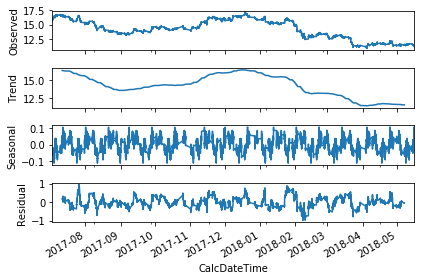

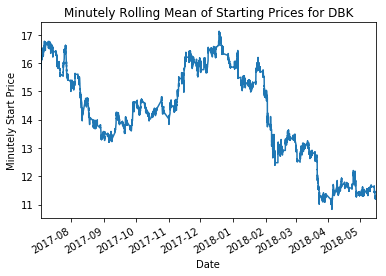

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


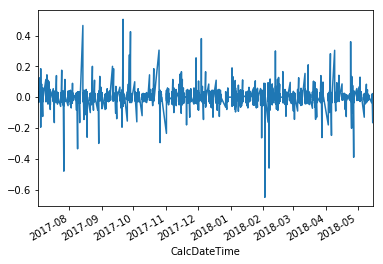

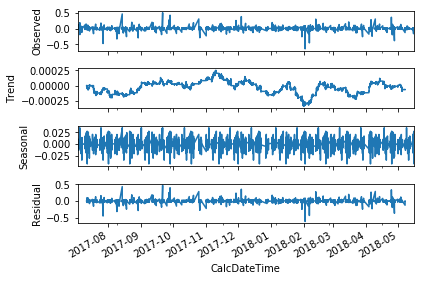

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


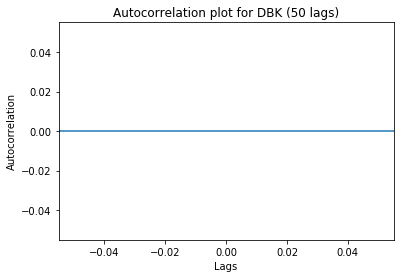

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


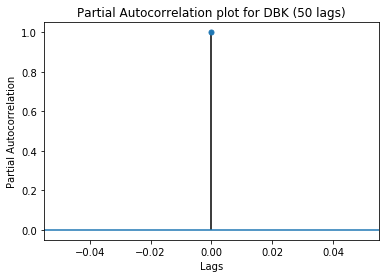

(-105.75747119633782, 0.0, 13, 156442, {'1%': -3.430391800841857, '5%': -2.8615584753906624, '10%': -2.566779833791153}, -1012734.6496906774)
predicted=13.365979, expected=13.354000
predicted=13.353979, expected=13.356000
predicted=13.355979, expected=13.360000
predicted=13.359979, expected=13.348000
predicted=13.347979, expected=13.352000
predicted=13.351979, expected=13.350000
predicted=13.349979, expected=13.344000
predicted=13.343979, expected=13.344000
predicted=13.343979, expected=13.346000
predicted=13.345979, expected=13.350000
predicted=13.349979, expected=13.348000
predicted=13.347979, expected=13.352000
predicted=13.351979, expected=13.350000
predicted=13.349979, expected=13.346000
predicted=13.345979, expected=13.348000
predicted=13.347979, expected=13.340000
predicted=13.339979, expected=13.358000
predicted=13.357979, expected=13.358000
predicted=13.357979, expected=13.368000
predicted=13.367979, expected=13.374000
predicted=13.373979, expected=13.386000
predicted=13.38597

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.393979, expected=13.400000
predicted=13.399979, expected=13.408000
predicted=13.407979, expected=13.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.397979, expected=13.398000
predicted=13.397979, expected=13.398000
predicted=13.397979, expected=13.398000
predicted=13.397979, expected=13.394000
predicted=13.393979, expected=13.380000
predicted=13.379979, expected=13.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.371979, expected=13.386000
predicted=13.385979, expected=13.376000
predicted=13.375979, expected=13.358000
predicted=13.357979, expected=13.338000
predicted=13.337979, expected=13.344000
predicted=13.343979, expected=13.344000
predicted=13.343979, expected=13.346000
predicted=13.345979, expected=13.348000
predicted=13.347979, expected=13.362000
predicted=13.361979, expected=13.348000
predicted=13.347979, expected=13.340000
predicted=13.339979, expected=13.346000
predicted=13.345979, expected=13.334000
predicted=13.333979, expected=13.336000
predicted=13.335979, expected=13.322000
predicted=13.321978, expected=13.330000
predicted=13.329979, expected=13.334000
predicted=13.333979, expected=13.328000
predicted=13.327979, expected=13.346000
predicted=13.345979, expected=13.350000
predicted=13.349979, expected=13.354000
predicted=13.353979, expected=13.360000
predicted=13.359979, expected=13.368000
predicted=13.367979, expected=13.358000
predicted=13.357979, expected=13.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.309978, expected=13.300000
predicted=13.299978, expected=13.308000
predicted=13.307978, expected=13.310000
predicted=13.309978, expected=13.314000
predicted=13.313978, expected=13.310000
predicted=13.309978, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315978, expected=13.306000
predicted=13.305978, expected=13.296000
predicted=13.295978, expected=13.298000
predicted=13.297978, expected=13.302000
predicted=13.301978, expected=13.308000
predicted=13.307978, expected=13.300000
predicted=13.299978, expected=13.302000
predicted=13.301978, expected=13.328000
predicted=13.327979, expected=13.328000
predicted=13.327979, expected=13.334000
predicted=13.333979, expected=13.330000
predicted=13.329979, expected=13.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.331979, expected=13.330000
predicted=13.329979, expected=13.326000
predicted=13.325979, expected=13.336000
predicted=13.335979, expected=13.348000
predicted=13.347979, expected=13.356000
predicted=13.355979, expected=13.364000
predicted=13.363979, expected=13.374000
predicted=13.373979, expected=13.378000
predicted=13.377979, expected=13.398000
predicted=13.397979, expected=13.386000
predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.386000
predicted=13.385979, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.377979, expected=13.380000
predicted=13.379979, expected=13.372000
predicted=13.371979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.360000
predicted=13.359979, expected=13.366000
predicted=13.365979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.384000
predicted=13.383979, expected=13.388000
predicted=13.387979, expected=13.408000
predicted=13.407979, expected=13.412000
predicted=13.411979, expected=13.422000
predicted=13.421979, expected=13.440000
predicted=13.439979, expected=13.450000
predicted=13.449980, expected=13.444000
predicted=13.443980, expected=13.450000
predicted=13.449980, expected=13.452000
predicted=13.451980, expected=13.452000
predicted=13.451980, expected=13.458000
predicted=13.457980, expected=13.460000
predicted=13.459980, expected=13.454000
predicted=13.453980, expected=13.460000
predicted=13.459980, expected=13.452000
predicted=13.451980, expected=13.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.465980, expected=13.468000
predicted=13.467980, expected=13.470000
predicted=13.469980, expected=13.446000
predicted=13.445980, expected=13.456000
predicted=13.455980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.461980, expected=13.462000
predicted=13.461980, expected=13.494000
predicted=13.493980, expected=13.500000
predicted=13.499980, expected=13.452000
predicted=13.451980, expected=13.450000
predicted=13.449980, expected=13.440000
predicted=13.439980, expected=13.450000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.449980, expected=13.420000
predicted=13.419979, expected=13.418000
predicted=13.417979, expected=13.414000
predicted=13.413979, expected=13.420000
predicted=13.419979, expected=13.442000
predicted=13.441980, expected=13.436000
predicted=13.435980, expected=13.438000
predicted=13.437980, expected=13.430000
predicted=13.429979, expected=13.408000
predicted=13.407979, expected=13.420000
predicted=13.419979, expected=13.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.411979, expected=13.406000
predicted=13.405979, expected=13.380000
predicted=13.379979, expected=13.372000
predicted=13.371979, expected=13.372000
predicted=13.371979, expected=13.370000
predicted=13.369979, expected=13.368000
predicted=13.367979, expected=13.344000
predicted=13.343979, expected=13.360000
predicted=13.359979, expected=13.370000
predicted=13.369979, expected=13.360000
predicted=13.359979, expected=13.364000
predicted=13.363979, expected=13.382000
predicted=13.381979, expected=13.378000
predicted=13.377979, expected=13.382000
predicted=13.381979, expected=13.372000
predicted=13.371979, expected=13.368000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.367979, expected=13.368000
predicted=13.367979, expected=13.350000
predicted=13.349979, expected=13.358000
predicted=13.357979, expected=13.350000
predicted=13.349979, expected=13.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.349979, expected=13.340000
predicted=13.339979, expected=13.338000
predicted=13.337979, expected=13.320000
predicted=13.319979, expected=13.314000
predicted=13.313978, expected=13.306000
predicted=13.305978, expected=13.310000
predicted=13.309978, expected=13.304000
predicted=13.303978, expected=13.312000
predicted=13.311978, expected=13.314000
predicted=13.313978, expected=13.322000
predicted=13.321979, expected=13.332000
predicted=13.331979, expected=13.342000
predicted=13.341979, expected=13.342000
predicted=13.341979, expected=13.328000
predicted=13.327979, expected=13.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.321979, expected=13.338000
predicted=13.337979, expected=13.326000
predicted=13.325979, expected=13.308000
predicted=13.307978, expected=13.306000
predicted=13.305978, expected=13.304000
predicted=13.303978, expected=13.326000
predicted=13.325979, expected=13.318000
predicted=13.317979, expected=13.328000
predicted=13.327979, expected=13.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.321979, expected=13.318000
predicted=13.317979, expected=13.326000
predicted=13.325979, expected=13.336000
predicted=13.335979, expected=13.330000
predicted=13.329979, expected=13.324000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.323979, expected=13.330000
predicted=13.329979, expected=13.332000
predicted=13.331979, expected=13.334000
predicted=13.333979, expected=13.336000
predicted=13.335979, expected=13.336000
predicted=13.335979, expected=13.340000
predicted=13.339979, expected=13.342000
predicted=13.341979, expected=13.342000
predicted=13.341979, expected=13.336000
predicted=13.335979, expected=13.344000
predicted=13.343979, expected=13.350000
predicted=13.349979, expected=13.348000
predicted=13.347979, expected=13.360000
predicted=13.359979, expected=13.356000
predicted=13.355979, expected=13.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.345979, expected=13.354000
predicted=13.353979, expected=13.354000
predicted=13.353979, expected=13.350000
predicted=13.349979, expected=13.338000
predicted=13.337979, expected=13.326000
predicted=13.325979, expected=13.338000
predicted=13.337979, expected=13.354000
predicted=13.353979, expected=13.348000
predicted=13.347979, expected=13.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.349979, expected=13.354000
predicted=13.353979, expected=13.368000
predicted=13.367979, expected=13.380000
predicted=13.379979, expected=13.394000
predicted=13.393979, expected=13.392000
predicted=13.391979, expected=13.390000
predicted=13.389979, expected=13.382000
predicted=13.381979, expected=13.384000
predicted=13.383979, expected=13.378000
predicted=13.377979, expected=13.380000
predicted=13.379979, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.377979, expected=13.380000
predicted=13.379979, expected=13.368000
predicted=13.367979, expected=13.358000
predicted=13.357979, expected=13.356000
predicted=13.355979, expected=13.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.355979, expected=13.358000
predicted=13.357979, expected=13.374000
predicted=13.373979, expected=13.374000
predicted=13.373979, expected=13.370000
predicted=13.369979, expected=13.372000
predicted=13.371979, expected=13.380000
predicted=13.379979, expected=13.378000
predicted=13.377979, expected=13.380000
predicted=13.379979, expected=13.382000
predicted=13.381979, expected=13.378000
predicted=13.377979, expected=13.378000
predicted=13.377979, expected=13.374000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.373979, expected=13.376000
predicted=13.375979, expected=13.368000
predicted=13.367979, expected=13.364000
predicted=13.363979, expected=13.334000
predicted=13.333979, expected=13.328000
predicted=13.327979, expected=13.330000
predicted=13.329979, expected=13.322000
predicted=13.321979, expected=13.322000
predicted=13.321979, expected=13.320000
predicted=13.319979, expected=13.318000
predicted=13.317979, expected=13.308000
predicted=13.307978, expected=13.310000
predicted=13.309978, expected=13.324000
predicted=13.323979, expected=13.324000
predicted=13.323979, expected=13.322000
predicted=13.321979, expected=13.318000
predicted=13.317979, expected=13.318000
predicted=13.317979, expected=13.326000
predicted=13.325979, expected=13.336000
predicted=13.335979, expected=13.320000
predicted=13.319979, expected=13.316000
predicted=13.315979, expected=13.310000
predicted=13.309978, expected=13.312000
predicted=13.311978, expected=13.322000
predicted=13.321979, expected=13.314000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.307978, expected=13.302000
predicted=13.301978, expected=13.304000
predicted=13.303978, expected=13.300000
predicted=13.299978, expected=13.296000
predicted=13.295978, expected=13.282000
predicted=13.281978, expected=13.288000
predicted=13.287978, expected=13.300000
predicted=13.299978, expected=13.304000
predicted=13.303978, expected=13.304000
predicted=13.303978, expected=13.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.301978, expected=13.306000
predicted=13.305978, expected=13.300000
predicted=13.299978, expected=13.300000
predicted=13.299978, expected=13.300000
predicted=13.299978, expected=13.296000
predicted=13.295978, expected=13.302000
predicted=13.301978, expected=13.290000
predicted=13.289978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.294000
predicted=13.293978, expected=13.286000
predicted=13.285978, expected=13.288000
predicted=13.287978, expected=13.298000
predicted=13.297978, expected=13.304000
predicted=13.303978, expected=13.304000
predicted=13.303978, expected=13.306000
predicted=13.305978, expected=13.300000
predicted=13.299978, expected=13.298000
predicted=13.297978, expected=13.294000
predicted=13.293978, expected=13.294000
predicted=13.293978, expected=13.300000
predicted=13.299978, expected=13.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.301978, expected=13.302000
predicted=13.301978, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.324000
predicted=13.323979, expected=13.336000
predicted=13.335979, expected=13.338000
predicted=13.337979, expected=13.328000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.327979, expected=13.330000
predicted=13.329979, expected=13.326000
predicted=13.325979, expected=13.338000
predicted=13.337979, expected=13.330000
predicted=13.329979, expected=13.326000
predicted=13.325979, expected=13.326000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.325979, expected=13.324000
predicted=13.323979, expected=13.316000
predicted=13.315979, expected=13.312000
predicted=13.311978, expected=13.306000
predicted=13.305978, expected=13.314000
predicted=13.313978, expected=13.318000
predicted=13.317979, expected=13.312000
predicted=13.311978, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.324000
predicted=13.323979, expected=13.326000
predicted=13.325979, expected=13.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.339979, expected=13.340000
predicted=13.339979, expected=13.340000
predicted=13.339979, expected=13.350000
predicted=13.349979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.332000
predicted=13.331979, expected=13.332000
predicted=13.331979, expected=13.330000
predicted=13.329979, expected=13.334000
predicted=13.333979, expected=13.330000
predicted=13.329979, expected=13.328000
predicted=13.327979, expected=13.336000
predicted=13.335979, expected=13.344000
predicted=13.343979, expected=13.348000
predicted=13.347979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.345979, expected=13.348000
predicted=13.347979, expected=13.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.351979, expected=13.356000
predicted=13.355979, expected=13.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.353979, expected=13.352000
predicted=13.351979, expected=13.350000
predicted=13.349979, expected=13.348000
predicted=13.347979, expected=13.348000
predicted=13.347979, expected=13.344000
predicted=13.343979, expected=13.346000
predicted=13.345979, expected=13.342000
predicted=13.341979, expected=13.338000
predicted=13.337979, expected=13.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.347979, expected=13.346000
predicted=13.345979, expected=13.352000
predicted=13.351979, expected=13.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.351979, expected=13.352000
predicted=13.351979, expected=13.352000
predicted=13.351979, expected=13.350000
predicted=13.349979, expected=13.342000
predicted=13.341979, expected=13.344000
predicted=13.343979, expected=13.342000
predicted=13.341979, expected=13.340000
predicted=13.339979, expected=13.352000
predicted=13.351979, expected=13.358000
predicted=13.357979, expected=13.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.353979, expected=13.360000
predicted=13.359979, expected=13.366000
predicted=13.365979, expected=13.362000
predicted=13.361979, expected=13.374000
predicted=13.373979, expected=13.358000
predicted=13.357979, expected=13.362000
predicted=13.361979, expected=13.364000
predicted=13.363979, expected=13.364000
predicted=13.363979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.370000
predicted=13.369979, expected=13.378000
predicted=13.377979, expected=13.388000
predicted=13.387979, expected=13.390000
predicted=13.389979, expected=13.392000
predicted=13.391979, expected=13.390000
predicted=13.389979, expected=13.384000
predicted=13.383979, expected=13.376000
predicted=13.375979, expected=13.388000
predicted=13.387979, expected=13.388000
predicted=13.387979, expected=13.384000
predicted=13.383979, expected=13.378000
predicted=13.377979, expected=13.378000
predicted=13.377979, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.377979, expected=13.378000
predicted=13.377979, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.377979, expected=13.382000
predicted=13.381979, expected=13.390000
predicted=13.389979, expected=13.388000
predicted=13.387979, expected=13.380000
predicted=13.379979, expected=13.374000
predicted=13.373979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.362000
predicted=13.361979, expected=13.366000
predicted=13.365979, expected=13.370000
predicted=13.369979, expected=13.370000
predicted=13.369979, expected=13.370000
predicted=13.369979, expected=13.372000
predicted=13.371979, expected=13.386000
predicted=13.385979, expected=13.386000
predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.370000
predicted=13.369979, expected=13.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.363979, expected=13.366000
predicted=13.365979, expected=13.366000
predicted=13.365979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.358000
predicted=13.357979, expected=13.368000
predicted=13.367979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.358000
predicted=13.357979, expected=13.356000
predicted=13.355979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.362000
predicted=13.361979, expected=13.368000
predicted=13.367979, expected=13.366000
predicted=13.365979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.366000
predicted=13.365979, expected=13.376000
predicted=13.375979, expected=13.384000
predicted=13.383979, expected=13.388000
predicted=13.387979, expected=13.390000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.371979, expected=13.382000
predicted=13.381979, expected=13.380000
predicted=13.379979, expected=13.392000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.391979, expected=13.386000
predicted=13.385979, expected=13.392000
predicted=13.391979, expected=13.382000
predicted=13.381979, expected=13.388000
predicted=13.387979, expected=13.382000
predicted=13.381979, expected=13.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.399979, expected=13.400000
predicted=13.399979, expected=13.390000
predicted=13.389979, expected=13.386000
predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.376000
predicted=13.375979, expected=13.376000
predicted=13.375979, expected=13.372000
predicted=13.371979, expected=13.370000
predicted=13.369979, expected=13.372000
predicted=13.371979, expected=13.374000
predicted=13.373979, expected=13.380000
predicted=13.379979, expected=13.384000
predicted=13.383979, expected=13.390000
predicted=13.389979, expected=13.376000
predicted=13.375979, expected=13.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.395979, expected=13.386000
predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.382000
predicted=13.381979, expected=13.390000
predicted=13.389979, expected=13.392000
predicted=13.391979, expected=13.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.387979, expected=13.386000
predicted=13.385979, expected=13.382000
predicted=13.381979, expected=13.386000
predicted=13.385979, expected=13.382000
predicted=13.381979, expected=13.382000
predicted=13.381979, expected=13.380000
predicted=13.379979, expected=13.362000
predicted=13.361979, expected=13.358000
predicted=13.357979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.378000
predicted=13.377979, expected=13.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.375979, expected=13.378000
predicted=13.377979, expected=13.372000
predicted=13.371979, expected=13.368000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.367979, expected=13.376000
predicted=13.375979, expected=13.384000
predicted=13.383979, expected=13.382000
predicted=13.381979, expected=13.380000
predicted=13.379979, expected=13.376000
predicted=13.375979, expected=13.370000
predicted=13.369979, expected=13.368000
predicted=13.367979, expected=13.366000
predicted=13.365979, expected=13.366000
predicted=13.365979, expected=13.376000
predicted=13.375979, expected=13.374000
predicted=13.373979, expected=13.362000
predicted=13.361979, expected=13.360000
predicted=13.359979, expected=13.370000
predicted=13.369979, expected=13.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.363979, expected=13.366000
predicted=13.365979, expected=13.362000
predicted=13.361979, expected=13.368000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.367979, expected=13.368000
predicted=13.367979, expected=13.354000
predicted=13.353979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.372000
predicted=13.371979, expected=13.370000
predicted=13.369979, expected=13.354000
predicted=13.353979, expected=13.330000
predicted=13.329979, expected=13.324000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.323979, expected=13.322000
predicted=13.321979, expected=13.340000
predicted=13.339979, expected=13.320000
predicted=13.319979, expected=13.336000
predicted=13.335979, expected=13.322000
predicted=13.321979, expected=13.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.309978, expected=13.328000
predicted=13.327979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.306000
predicted=13.305978, expected=13.288000
predicted=13.287978, expected=13.288000
predicted=13.287978, expected=13.308000
predicted=13.307978, expected=13.306000
predicted=13.305978, expected=13.304000
predicted=13.303978, expected=13.306000
predicted=13.305978, expected=13.300000
predicted=13.299978, expected=13.298000
predicted=13.297978, expected=13.288000
predicted=13.287978, expected=13.292000
predicted=13.291978, expected=13.300000
predicted=13.299978, expected=13.310000
predicted=13.309979, expected=13.304000
predicted=13.303978, expected=13.294000
predicted=13.293978, expected=13.318000
predicted=13.317979, expected=13.316000
predicted=13.315979, expected=13.314000
predicted=13.313979, expected=13.304000
predicted=13.303978, expected=13.308000
predicted=13.307978, expected=13.318000
predicted=13.317979, expected=13.314000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.313979, expected=13.316000
predicted=13.315979, expected=13.308000
predicted=13.307978, expected=13.308000
predicted=13.307978, expected=13.312000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.311979, expected=13.314000
predicted=13.313979, expected=13.320000
predicted=13.319979, expected=13.332000
predicted=13.331979, expected=13.334000
predicted=13.333979, expected=13.328000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.327979, expected=13.332000
predicted=13.331979, expected=13.334000
predicted=13.333979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.344000
predicted=13.343979, expected=13.340000
predicted=13.339979, expected=13.330000
predicted=13.329979, expected=13.330000
predicted=13.329979, expected=13.336000
predicted=13.335979, expected=13.338000
predicted=13.337979, expected=13.324000
predicted=13.323979, expected=13.312000
predicted=13.311979, expected=13.306000
predicted=13.305978, expected=13.308000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.307978, expected=13.302000
predicted=13.301978, expected=13.294000
predicted=13.293978, expected=13.296000
predicted=13.295978, expected=13.314000
predicted=13.313979, expected=13.318000
predicted=13.317979, expected=13.332000
predicted=13.331979, expected=13.334000
predicted=13.333979, expected=13.334000
predicted=13.333979, expected=13.336000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.335979, expected=13.340000
predicted=13.339979, expected=13.338000
predicted=13.337979, expected=13.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.321979, expected=13.320000
predicted=13.319979, expected=13.314000
predicted=13.313979, expected=13.328000
predicted=13.327979, expected=13.308000
predicted=13.307978, expected=13.328000
predicted=13.327979, expected=13.324000
predicted=13.323979, expected=13.328000
predicted=13.327979, expected=13.334000
predicted=13.333979, expected=13.322000
predicted=13.321979, expected=13.318000
predicted=13.317979, expected=13.314000
predicted=13.313979, expected=13.312000
predicted=13.311979, expected=13.302000
predicted=13.301978, expected=13.310000
predicted=13.309979, expected=13.300000
predicted=13.299978, expected=13.294000
predicted=13.293978, expected=13.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.301978, expected=13.306000
predicted=13.305978, expected=13.298000
predicted=13.297978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.286000
predicted=13.285978, expected=13.382000
predicted=13.381979, expected=13.384000
predicted=13.383979, expected=13.380000
predicted=13.379979, expected=13.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.394000
predicted=13.393979, expected=13.400000
predicted=13.399979, expected=13.380000
predicted=13.379979, expected=13.370000
predicted=13.369979, expected=13.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.357979, expected=13.366000
predicted=13.365979, expected=13.364000
predicted=13.363979, expected=13.354000
predicted=13.353979, expected=13.350000
predicted=13.349979, expected=13.376000
predicted=13.375979, expected=13.384000
predicted=13.383979, expected=13.388000
predicted=13.387979, expected=13.388000
predicted=13.387979, expected=13.384000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.383979, expected=13.382000
predicted=13.381979, expected=13.392000
predicted=13.391979, expected=13.390000
predicted=13.389979, expected=13.392000
predicted=13.391979, expected=13.412000
predicted=13.411979, expected=13.418000
predicted=13.417979, expected=13.416000
predicted=13.415979, expected=13.422000
predicted=13.421980, expected=13.418000
predicted=13.417979, expected=13.422000
predicted=13.421980, expected=13.408000
predicted=13.407979, expected=13.402000
predicted=13.401979, expected=13.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.399979, expected=13.396000
predicted=13.395979, expected=13.400000
predicted=13.399979, expected=13.392000
predicted=13.391979, expected=13.384000
predicted=13.383979, expected=13.400000
predicted=13.399979, expected=13.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.395979, expected=13.398000
predicted=13.397979, expected=13.396000
predicted=13.395979, expected=13.394000
predicted=13.393979, expected=13.390000
predicted=13.389979, expected=13.390000
predicted=13.389979, expected=13.380000
predicted=13.379979, expected=13.392000
predicted=13.391979, expected=13.382000
predicted=13.381979, expected=13.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.381979, expected=13.388000
predicted=13.387979, expected=13.406000
predicted=13.405979, expected=13.414000
predicted=13.413979, expected=13.416000
predicted=13.415979, expected=13.418000
predicted=13.417979, expected=13.420000
predicted=13.419980, expected=13.414000
predicted=13.413979, expected=13.410000
predicted=13.409979, expected=13.410000
predicted=13.409979, expected=13.404000
predicted=13.403979, expected=13.402000
predicted=13.401979, expected=13.398000
predicted=13.397979, expected=13.402000
predicted=13.401979, expected=13.402000
predicted=13.401979, expected=13.406000
predicted=13.405979, expected=13.380000
predicted=13.379979, expected=13.360000
predicted=13.359979, expected=13.368000
predicted=13.367979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.364000
predicted=13.363979, expected=13.364000
predicted=13.363979, expected=13.368000
predicted=13.367979, expected=13.358000
predicted=13.357979, expected=13.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.349979, expected=13.354000
predicted=13.353979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.354000
predicted=13.353979, expected=13.340000
predicted=13.339979, expected=13.342000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.341979, expected=13.344000
predicted=13.343979, expected=13.348000
predicted=13.347979, expected=13.352000
predicted=13.351979, expected=13.350000
predicted=13.349979, expected=13.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.351979, expected=13.342000
predicted=13.341979, expected=13.346000
predicted=13.345979, expected=13.344000
predicted=13.343979, expected=13.330000
predicted=13.329979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.350000
predicted=13.349979, expected=13.362000
predicted=13.361979, expected=13.352000
predicted=13.351979, expected=13.354000
predicted=13.353979, expected=13.354000
predicted=13.353979, expected=13.346000
predicted=13.345979, expected=13.342000
predicted=13.341979, expected=13.348000
predicted=13.347979, expected=13.354000
predicted=13.353979, expected=13.352000
predicted=13.351979, expected=13.356000
predicted=13.355979, expected=13.350000
predicted=13.349979, expected=13.356000
predicted=13.355979, expected=13.362000
predicted=13.361979, expected=13.362000
predicted=13.361979, expected=13.368000
predicted=13.367979, expected=13.368000
predicted=13.367979, expected=13.376000
predicted=13.375979, expected=13.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.367979, expected=13.374000
predicted=13.373979, expected=13.376000
predicted=13.375979, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.377979, expected=13.374000
predicted=13.373979, expected=13.374000
predicted=13.373979, expected=13.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.393979, expected=13.386000
predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.378000
predicted=13.377979, expected=13.398000
predicted=13.397979, expected=13.402000
predicted=13.401979, expected=13.388000
predicted=13.387979, expected=13.378000
predicted=13.377979, expected=13.390000
predicted=13.389979, expected=13.398000
predicted=13.397979, expected=13.394000
predicted=13.393979, expected=13.394000
predicted=13.393979, expected=13.396000
predicted=13.395979, expected=13.406000
predicted=13.405979, expected=13.418000
predicted=13.417980, expected=13.404000
predicted=13.403979, expected=13.408000
predicted=13.407979, expected=13.408000
predicted=13.407979, expected=13.414000
predicted=13.413979, expected=13.416000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.415979, expected=13.420000
predicted=13.419980, expected=13.428000
predicted=13.427980, expected=13.408000
predicted=13.407979, expected=13.412000
predicted=13.411979, expected=13.412000
predicted=13.411979, expected=13.404000
predicted=13.403979, expected=13.394000
predicted=13.393979, expected=13.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.393979, expected=13.392000
predicted=13.391979, expected=13.414000
predicted=13.413979, expected=13.424000
predicted=13.423980, expected=13.420000
predicted=13.419980, expected=13.424000
predicted=13.423980, expected=13.416000
predicted=13.415979, expected=13.418000
predicted=13.417980, expected=13.424000
predicted=13.423980, expected=13.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.429980, expected=13.424000
predicted=13.423980, expected=13.434000
predicted=13.433980, expected=13.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.423980, expected=13.422000
predicted=13.421980, expected=13.418000
predicted=13.417980, expected=13.410000
predicted=13.409979, expected=13.410000
predicted=13.409979, expected=13.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.419980, expected=13.422000
predicted=13.421980, expected=13.426000
predicted=13.425980, expected=13.428000
predicted=13.427980, expected=13.420000
predicted=13.419980, expected=13.432000
predicted=13.431980, expected=13.436000
predicted=13.435980, expected=13.438000
predicted=13.437980, expected=13.434000
predicted=13.433980, expected=13.438000
predicted=13.437980, expected=13.430000
predicted=13.429980, expected=13.426000
predicted=13.425980, expected=13.410000
predicted=13.409979, expected=13.406000
predicted=13.405979, expected=13.414000
predicted=13.413979, expected=13.416000
predicted=13.415979, expected=13.424000
predicted=13.423980, expected=13.436000
predicted=13.435980, expected=13.428000
predicted=13.427980, expected=13.436000
predicted=13.435980, expected=13.440000
predicted=13.439980, expected=13.436000
predicted=13.435980, expected=13.432000
predicted=13.431980, expected=13.440000
predicted=13.439980, expected=13.440000
predicted=13.439980, expected=13.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.437980, expected=13.442000
predicted=13.441980, expected=13.436000
predicted=13.435980, expected=13.422000
predicted=13.421980, expected=13.432000
predicted=13.431980, expected=13.434000
predicted=13.433980, expected=13.430000
predicted=13.429980, expected=13.432000
predicted=13.431980, expected=13.432000
predicted=13.431980, expected=13.432000
predicted=13.431980, expected=13.438000
predicted=13.437980, expected=13.440000
predicted=13.439980, expected=13.442000
predicted=13.441980, expected=13.440000
predicted=13.439980, expected=13.444000
predicted=13.443980, expected=13.442000
predicted=13.441980, expected=13.440000
predicted=13.439980, expected=13.434000
predicted=13.433980, expected=13.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.423980, expected=13.418000
predicted=13.417980, expected=13.404000
predicted=13.403979, expected=13.408000
predicted=13.407979, expected=13.398000
predicted=13.397979, expected=13.408000
predicted=13.407979, expected=13.408000
predicted=13.407979, expected=13.408000
predicted=13.407979, expected=13.406000
predicted=13.405979, expected=13.406000
predicted=13.405979, expected=13.406000
predicted=13.405979, expected=13.408000
predicted=13.407979, expected=13.402000
predicted=13.401979, expected=13.406000
predicted=13.405979, expected=13.402000
predicted=13.401979, expected=13.400000
predicted=13.399979, expected=13.400000
predicted=13.399979, expected=13.400000
predicted=13.399979, expected=13.398000
predicted=13.397979, expected=13.404000
predicted=13.403979, expected=13.404000
predicted=13.403979, expected=13.404000
predicted=13.403979, expected=13.402000
predicted=13.401979, expected=13.400000
predicted=13.399979, expected=13.400000
predicted=13.399979, expected=13.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=13.401979, expected=13.404000
predicted=13.403979, expected=13.402000
predicted=13.401979, expected=13.398000
predicted=13.397979, expected=13.398000
predicted=13.397979, expected=13.390000
predicted=13.389979, expected=13.390000
predicted=13.389979, expected=13.384000
predicted=13.383979, expected=13.374000
predicted=13.373979, expected=13.376000
predicted=13.375979, expected=13.370000
predicted=13.369979, expected=13.368000
predicted=13.367979, expected=13.382000
predicted=13.381979, expected=13.382000
predicted=13.381979, expected=13.378000
predicted=13.377979, expected=13.374000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.373979, expected=13.378000
predicted=13.377979, expected=13.376000
predicted=13.375979, expected=13.376000
predicted=13.375979, expected=13.382000
predicted=13.381979, expected=13.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.387979, expected=13.390000
predicted=13.389979, expected=13.392000
predicted=13.391979, expected=13.388000
predicted=13.387979, expected=13.392000
predicted=13.391979, expected=13.398000
predicted=13.397979, expected=13.404000
predicted=13.403979, expected=13.396000
predicted=13.395979, expected=13.394000
predicted=13.393979, expected=13.392000
predicted=13.391979, expected=13.402000
predicted=13.401979, expected=13.398000
predicted=13.397979, expected=13.406000
predicted=13.405979, expected=13.392000
predicted=13.391979, expected=13.392000
predicted=13.391979, expected=13.392000
predicted=13.391979, expected=13.396000
predicted=13.395979, expected=13.394000
predicted=13.393979, expected=13.392000
predicted=13.391979, expected=13.392000
predicted=13.391979, expected=13.386000
predicted=13.385979, expected=13.384000
predicted=13.383979, expected=13.384000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.383979, expected=13.386000
predicted=13.385979, expected=13.398000
predicted=13.397979, expected=13.396000
predicted=13.395979, expected=13.396000
predicted=13.395979, expected=13.398000
predicted=13.397979, expected=13.394000
predicted=13.393979, expected=13.396000
predicted=13.395979, expected=13.398000
predicted=13.397979, expected=13.404000
predicted=13.403979, expected=13.400000
predicted=13.399979, expected=13.388000
predicted=13.387979, expected=13.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.381979, expected=13.382000
predicted=13.381979, expected=13.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.381979, expected=13.380000
predicted=13.379979, expected=13.390000
predicted=13.389979, expected=13.370000
predicted=13.369979, expected=13.368000
predicted=13.367979, expected=13.372000
predicted=13.371979, expected=13.376000
predicted=13.375979, expected=13.364000
predicted=13.363979, expected=13.358000
predicted=13.357979, expected=13.358000
predicted=13.357979, expected=13.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.351979, expected=13.354000
predicted=13.353979, expected=13.358000
predicted=13.357979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.361979, expected=13.358000
predicted=13.357979, expected=13.362000
predicted=13.361979, expected=13.366000
predicted=13.365979, expected=13.370000
predicted=13.369979, expected=13.372000
predicted=13.371979, expected=13.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.375979, expected=13.370000
predicted=13.369979, expected=13.360000
predicted=13.359979, expected=13.358000
predicted=13.357979, expected=13.356000
predicted=13.355979, expected=13.358000
predicted=13.357979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.350000
predicted=13.349979, expected=13.358000
predicted=13.357979, expected=13.360000
predicted=13.359979, expected=13.364000
predicted=13.363979, expected=13.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.371979, expected=13.374000
predicted=13.373979, expected=13.368000
predicted=13.367979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.364000
predicted=13.363979, expected=13.370000
predicted=13.369979, expected=13.368000
predicted=13.367979, expected=13.370000
predicted=13.369979, expected=13.378000
predicted=13.377979, expected=13.388000
predicted=13.387979, expected=13.396000
predicted=13.395979, expected=13.404000
predicted=13.403979, expected=13.406000
predicted=13.405979, expected=13.408000
predicted=13.407979, expected=13.402000
predicted=13.401979, expected=13.396000
predicted=13.395979, expected=13.392000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.391979, expected=13.394000
predicted=13.393979, expected=13.376000
predicted=13.375979, expected=13.380000
predicted=13.379979, expected=13.380000
predicted=13.379979, expected=13.374000
predicted=13.373979, expected=13.384000
predicted=13.383979, expected=13.384000
predicted=13.383979, expected=13.382000
predicted=13.381979, expected=13.382000
predicted=13.381979, expected=13.386000
predicted=13.385979, expected=13.388000
predicted=13.387979, expected=13.390000
predicted=13.389979, expected=13.394000
predicted=13.393979, expected=13.396000
predicted=13.395979, expected=13.398000
predicted=13.397979, expected=13.394000
predicted=13.393979, expected=13.390000
predicted=13.389979, expected=13.384000
predicted=13.383979, expected=13.382000
predicted=13.381979, expected=13.376000
predicted=13.375979, expected=13.372000
predicted=13.371979, expected=13.362000
predicted=13.361979, expected=13.356000
predicted=13.355979, expected=13.356000
predicted=13.355979, expected=13.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.373979, expected=13.366000
predicted=13.365979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.366000
predicted=13.365979, expected=13.358000
predicted=13.357979, expected=13.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.345979, expected=13.336000
predicted=13.335979, expected=13.344000
predicted=13.343979, expected=13.344000
predicted=13.343979, expected=13.342000
predicted=13.341979, expected=13.346000
predicted=13.345979, expected=13.330000
predicted=13.329979, expected=13.336000
predicted=13.335979, expected=13.322000
predicted=13.321979, expected=13.316000
predicted=13.315979, expected=13.312000
predicted=13.311979, expected=13.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.309979, expected=13.308000
predicted=13.307979, expected=13.310000
predicted=13.309979, expected=13.312000
predicted=13.311979, expected=13.316000
predicted=13.315979, expected=13.314000
predicted=13.313979, expected=13.316000
predicted=13.315979, expected=13.310000
predicted=13.309979, expected=13.302000
predicted=13.301979, expected=13.294000
predicted=13.293978, expected=13.310000
predicted=13.309979, expected=13.318000
predicted=13.317979, expected=13.318000
predicted=13.317979, expected=13.322000
predicted=13.321979, expected=13.300000
predicted=13.299979, expected=13.302000
predicted=13.301979, expected=13.290000
predicted=13.289978, expected=13.292000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.291978, expected=13.290000
predicted=13.289978, expected=13.292000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.291978, expected=13.310000
predicted=13.309979, expected=13.318000
predicted=13.317979, expected=13.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.317979, expected=13.314000
predicted=13.313979, expected=13.310000
predicted=13.309979, expected=13.302000
predicted=13.301979, expected=13.304000
predicted=13.303979, expected=13.310000
predicted=13.309979, expected=13.306000
predicted=13.305979, expected=13.304000
predicted=13.303979, expected=13.294000
predicted=13.293979, expected=13.296000
predicted=13.295979, expected=13.300000
predicted=13.299979, expected=13.306000
predicted=13.305979, expected=13.300000
predicted=13.299979, expected=13.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.297979, expected=13.298000
predicted=13.297979, expected=13.308000
predicted=13.307979, expected=13.306000
predicted=13.305979, expected=13.302000
predicted=13.301979, expected=13.306000
predicted=13.305979, expected=13.312000
predicted=13.311979, expected=13.316000
predicted=13.315979, expected=13.328000
predicted=13.327979, expected=13.332000
predicted=13.331979, expected=13.326000
predicted=13.325979, expected=13.330000
predicted=13.329979, expected=13.326000
predicted=13.325979, expected=13.324000
predicted=13.323979, expected=13.324000
predicted=13.323979, expected=13.320000
predicted=13.319979, expected=13.334000
predicted=13.333979, expected=13.336000
predicted=13.335979, expected=13.332000
predicted=13.331979, expected=13.330000
predicted=13.329979, expected=13.326000
predicted=13.325979, expected=13.334000
predicted=13.333979, expected=13.330000
predicted=13.329979, expected=13.318000
predicted=13.317979, expected=13.322000
predicted=13.321979, expected=13.328000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.335979, expected=13.338000
predicted=13.337979, expected=13.332000
predicted=13.331979, expected=13.328000
predicted=13.327979, expected=13.338000
predicted=13.337979, expected=13.332000
predicted=13.331979, expected=13.328000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.327979, expected=13.324000
predicted=13.323979, expected=13.314000
predicted=13.313979, expected=13.324000
predicted=13.323979, expected=13.318000
predicted=13.317979, expected=13.322000
predicted=13.321979, expected=13.334000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.333979, expected=13.328000
predicted=13.327979, expected=13.312000
predicted=13.311979, expected=13.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.309979, expected=13.312000
predicted=13.311979, expected=13.312000
predicted=13.311979, expected=13.310000
predicted=13.309979, expected=13.318000
predicted=13.317979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.315979, expected=13.304000
predicted=13.303979, expected=13.300000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.299979, expected=13.306000
predicted=13.305979, expected=13.300000
predicted=13.299979, expected=13.310000
predicted=13.309979, expected=13.330000
predicted=13.329979, expected=13.332000
predicted=13.331979, expected=13.326000
predicted=13.325979, expected=13.334000
predicted=13.333979, expected=13.330000
predicted=13.329979, expected=13.336000
predicted=13.335979, expected=13.348000
predicted=13.347979, expected=13.356000
predicted=13.355979, expected=13.364000
predicted=13.363979, expected=13.358000
predicted=13.357979, expected=13.370000
predicted=13.369979, expected=13.362000
predicted=13.361979, expected=13.364000
predicted=13.363979, expected=13.370000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.369979, expected=13.370000
predicted=13.369979, expected=13.388000
predicted=13.387979, expected=13.390000
predicted=13.389979, expected=13.396000
predicted=13.395979, expected=13.388000
predicted=13.387979, expected=13.388000
predicted=13.387979, expected=13.390000
predicted=13.389979, expected=13.394000
predicted=13.393979, expected=13.384000
predicted=13.383979, expected=13.378000
predicted=13.377979, expected=13.384000
predicted=13.383979, expected=13.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.387979, expected=13.392000
predicted=13.391979, expected=13.392000
predicted=13.391979, expected=13.384000
predicted=13.383979, expected=13.388000
predicted=13.387979, expected=13.388000
predicted=13.387979, expected=13.374000
predicted=13.373979, expected=13.368000
predicted=13.367979, expected=13.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.357979, expected=13.356000
predicted=13.355979, expected=13.360000
predicted=13.359979, expected=13.346000
predicted=13.345979, expected=13.342000
predicted=13.341979, expected=13.342000
predicted=13.341979, expected=13.358000
predicted=13.357979, expected=13.372000
predicted=13.371979, expected=13.376000
predicted=13.375979, expected=13.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.371979, expected=13.350000
predicted=13.349979, expected=13.354000
predicted=13.353979, expected=13.374000
predicted=13.373979, expected=13.376000
predicted=13.375979, expected=13.378000
predicted=13.377979, expected=13.364000
predicted=13.363979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.360000
predicted=13.359979, expected=13.362000
predicted=13.361979, expected=13.358000
predicted=13.357979, expected=13.366000
predicted=13.365979, expected=13.370000
predicted=13.369979, expected=13.360000
predicted=13.359979, expected=13.370000
predicted=13.369979, expected=13.378000
predicted=13.377979, expected=13.372000
predicted=13.371979, expected=13.364000
predicted=13.363979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.360000
predicted=13.359979, expected=13.362000
predicted=13.361979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.361979, expected=13.356000
predicted=13.355979, expected=13.362000
predicted=13.361979, expected=13.368000
predicted=13.367979, expected=13.370000
predicted=13.369979, expected=13.378000
predicted=13.377979, expected=13.382000
predicted=13.381979, expected=13.384000
predicted=13.383979, expected=13.378000
predicted=13.377979, expected=13.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.359979, expected=13.350000
predicted=13.349979, expected=13.336000
predicted=13.335979, expected=13.338000
predicted=13.337979, expected=13.352000
predicted=13.351979, expected=13.354000
predicted=13.353979, expected=13.356000
predicted=13.355979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.370000
predicted=13.369979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.370000
predicted=13.369979, expected=13.370000
predicted=13.369979, expected=13.366000
predicted=13.365979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.366000
predicted=13.365979, expected=13.358000
predicted=13.357979, expected=13.360000
predicted=13.359979, expected=13.366000
predicted=13.365979, expected=13.366000
predicted=13.365979, expected=13.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.385979, expected=13.388000
predicted=13.387979, expected=13.388000
predicted=13.387979, expected=13.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.393979, expected=13.386000
predicted=13.385979, expected=13.386000
predicted=13.385979, expected=13.394000
predicted=13.393979, expected=13.388000
predicted=13.387979, expected=13.392000
predicted=13.391979, expected=13.398000
predicted=13.397979, expected=13.394000
predicted=13.393979, expected=13.384000
predicted=13.383979, expected=13.384000
predicted=13.383979, expected=13.368000
predicted=13.367979, expected=13.380000
predicted=13.379979, expected=13.382000
predicted=13.381979, expected=13.386000
predicted=13.385979, expected=13.386000
predicted=13.385979, expected=13.388000
predicted=13.387979, expected=13.378000
predicted=13.377979, expected=13.394000
predicted=13.393979, expected=13.390000
predicted=13.389979, expected=13.386000
predicted=13.385979, expected=13.388000
predicted=13.387979, expected=13.392000
predicted=13.391979, expected=13.394000
predicted=13.393979, expected=13.392000
predicted=13.391979, expected=13.394000
predicted=13.393979, expected=13.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.389979, expected=13.398000
predicted=13.397979, expected=13.408000
predicted=13.407980, expected=13.396000
predicted=13.395979, expected=13.396000
predicted=13.395979, expected=13.406000
predicted=13.405980, expected=13.406000
predicted=13.405980, expected=13.406000
predicted=13.405980, expected=13.404000
predicted=13.403980, expected=13.408000
predicted=13.407980, expected=13.394000
predicted=13.393979, expected=13.386000
predicted=13.385979, expected=13.382000
predicted=13.381979, expected=13.384000
predicted=13.383979, expected=13.390000
predicted=13.389979, expected=13.390000
predicted=13.389979, expected=13.392000
predicted=13.391979, expected=13.394000
predicted=13.393979, expected=13.396000
predicted=13.395979, expected=13.394000
predicted=13.393979, expected=13.376000
predicted=13.375979, expected=13.376000
predicted=13.375979, expected=13.376000
predicted=13.375979, expected=13.376000
predicted=13.375979, expected=13.356000
predicted=13.355979, expected=13.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.359979, expected=13.350000
predicted=13.349979, expected=13.344000
predicted=13.343979, expected=13.324000
predicted=13.323979, expected=13.322000
predicted=13.321979, expected=13.308000
predicted=13.307979, expected=13.288000
predicted=13.287979, expected=13.276000
predicted=13.275978, expected=13.296000
predicted=13.295979, expected=13.296000
predicted=13.295979, expected=13.314000
predicted=13.313979, expected=13.308000
predicted=13.307979, expected=13.296000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.295979, expected=13.282000
predicted=13.281978, expected=13.292000
predicted=13.291979, expected=13.298000
predicted=13.297979, expected=13.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.297979, expected=13.304000
predicted=13.303979, expected=13.302000
predicted=13.301979, expected=13.310000
predicted=13.309979, expected=13.300000
predicted=13.299979, expected=13.302000
predicted=13.301979, expected=13.312000
predicted=13.311979, expected=13.310000
predicted=13.309979, expected=13.296000
predicted=13.295979, expected=13.290000
predicted=13.289979, expected=13.294000
predicted=13.293979, expected=13.300000
predicted=13.299979, expected=13.306000
predicted=13.305979, expected=13.302000
predicted=13.301979, expected=13.304000
predicted=13.303979, expected=13.316000
predicted=13.315979, expected=13.302000
predicted=13.301979, expected=13.286000
predicted=13.285979, expected=13.280000
predicted=13.279978, expected=13.286000
predicted=13.285979, expected=13.290000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.289979, expected=13.294000
predicted=13.293979, expected=13.294000
predicted=13.293979, expected=13.314000
predicted=13.313979, expected=13.316000
predicted=13.315979, expected=13.326000
predicted=13.325979, expected=13.328000
predicted=13.327979, expected=13.328000
predicted=13.327979, expected=13.316000
predicted=13.315979, expected=13.298000
predicted=13.297979, expected=13.278000
predicted=13.277978, expected=13.274000
predicted=13.273978, expected=13.272000
predicted=13.271978, expected=13.284000
predicted=13.283979, expected=13.286000
predicted=13.285979, expected=13.288000
predicted=13.287979, expected=13.288000
predicted=13.287979, expected=13.290000
predicted=13.289979, expected=13.288000
predicted=13.287979, expected=13.296000
predicted=13.295979, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285979, expected=13.288000
predicted=13.287979, expected=13.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.285979, expected=13.286000
predicted=13.285979, expected=13.286000
predicted=13.285979, expected=13.296000
predicted=13.295979, expected=13.302000
predicted=13.301979, expected=13.300000
predicted=13.299979, expected=13.294000
predicted=13.293979, expected=13.302000
predicted=13.301979, expected=13.302000
predicted=13.301979, expected=13.300000
predicted=13.299979, expected=13.298000
predicted=13.297979, expected=13.304000
predicted=13.303979, expected=13.318000
predicted=13.317979, expected=13.322000
predicted=13.321979, expected=13.316000
predicted=13.315979, expected=13.300000
predicted=13.299979, expected=13.298000
predicted=13.297979, expected=13.304000
predicted=13.303979, expected=13.304000
predicted=13.303979, expected=13.310000
predicted=13.309979, expected=13.298000
predicted=13.297979, expected=13.300000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.299979, expected=13.298000
predicted=13.297979, expected=13.296000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.295979, expected=13.288000
predicted=13.287979, expected=13.284000
predicted=13.283979, expected=13.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.283979, expected=13.288000
predicted=13.287979, expected=13.290000
predicted=13.289979, expected=13.296000
predicted=13.295979, expected=13.306000
predicted=13.305979, expected=13.306000
predicted=13.305979, expected=13.310000
predicted=13.309979, expected=13.318000
predicted=13.317979, expected=13.308000
predicted=13.307979, expected=13.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.309979, expected=13.308000
predicted=13.307979, expected=13.302000
predicted=13.301979, expected=13.308000
predicted=13.307979, expected=13.312000
predicted=13.311979, expected=13.312000
predicted=13.311979, expected=13.320000
predicted=13.319979, expected=13.312000
predicted=13.311979, expected=13.314000
predicted=13.313979, expected=13.312000
predicted=13.311979, expected=13.308000
predicted=13.307979, expected=13.320000
predicted=13.319979, expected=13.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.309979, expected=13.308000
predicted=13.307979, expected=13.320000
predicted=13.319979, expected=13.322000
predicted=13.321979, expected=13.322000
predicted=13.321979, expected=13.322000
predicted=13.321979, expected=13.328000
predicted=13.327979, expected=13.332000
predicted=13.331979, expected=13.334000
predicted=13.333979, expected=13.324000
predicted=13.323979, expected=13.324000
predicted=13.323979, expected=13.312000
predicted=13.311979, expected=13.318000
predicted=13.317979, expected=13.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.317979, expected=13.306000
predicted=13.305979, expected=13.308000
predicted=13.307979, expected=13.320000
predicted=13.319979, expected=13.314000
predicted=13.313979, expected=13.310000
predicted=13.309979, expected=13.306000
predicted=13.305979, expected=13.308000
predicted=13.307979, expected=13.304000
predicted=13.303979, expected=13.298000
predicted=13.297979, expected=13.300000
predicted=13.299979, expected=13.294000
predicted=13.293979, expected=13.308000
predicted=13.307979, expected=13.302000
predicted=13.301979, expected=13.312000
predicted=13.311979, expected=13.312000
predicted=13.311979, expected=13.306000
predicted=13.305979, expected=13.304000
predicted=13.303979, expected=13.312000
predicted=13.311979, expected=13.306000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.305979, expected=13.306000
predicted=13.305979, expected=13.308000
predicted=13.307979, expected=13.304000
predicted=13.303979, expected=13.300000
predicted=13.299979, expected=13.302000
predicted=13.301979, expected=13.304000
predicted=13.303979, expected=13.304000
predicted=13.303979, expected=13.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.297979, expected=13.302000
predicted=13.301979, expected=13.290000
predicted=13.289979, expected=13.290000
predicted=13.289979, expected=13.284000
predicted=13.283979, expected=13.284000
predicted=13.283979, expected=13.274000
predicted=13.273978, expected=13.282000
predicted=13.281979, expected=13.280000
predicted=13.279978, expected=13.286000
predicted=13.285979, expected=13.298000
predicted=13.297979, expected=13.296000
predicted=13.295979, expected=13.314000
predicted=13.313979, expected=13.310000
predicted=13.309979, expected=13.306000
predicted=13.305979, expected=13.316000
predicted=13.315979, expected=13.312000
predicted=13.311979, expected=13.314000
predicted=13.313979, expected=13.304000
predicted=13.303979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.317979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.316000
predicted=13.315979, expected=13.324000
predicted=13.323979, expected=13.324000
predicted=13.323979, expected=13.338000
predicted=13.337979, expected=13.338000
predicted=13.337979, expected=13.348000
predicted=13.347979, expected=13.342000
predicted=13.341979, expected=13.348000
predicted=13.347979, expected=13.350000
predicted=13.349979, expected=13.352000
predicted=13.351979, expected=13.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.359979, expected=13.362000
predicted=13.361979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.356000
predicted=13.355979, expected=13.368000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.367979, expected=13.370000
predicted=13.369979, expected=13.386000
predicted=13.385979, expected=13.362000
predicted=13.361979, expected=13.352000
predicted=13.351979, expected=13.342000
predicted=13.341979, expected=13.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.337979, expected=13.340000
predicted=13.339979, expected=13.338000
predicted=13.337979, expected=13.342000
predicted=13.341979, expected=13.346000
predicted=13.345979, expected=13.348000
predicted=13.347979, expected=13.332000
predicted=13.331979, expected=13.334000
predicted=13.333979, expected=13.324000
predicted=13.323979, expected=13.324000
predicted=13.323979, expected=13.326000
predicted=13.325979, expected=13.338000
predicted=13.337979, expected=13.348000
predicted=13.347979, expected=13.348000
predicted=13.347979, expected=13.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.343979, expected=13.344000
predicted=13.343979, expected=13.350000
predicted=13.349979, expected=13.354000
predicted=13.353979, expected=13.340000
predicted=13.339979, expected=13.354000
predicted=13.353979, expected=13.362000
predicted=13.361979, expected=13.354000
predicted=13.353979, expected=13.362000
predicted=13.361979, expected=13.362000
predicted=13.361979, expected=13.384000
predicted=13.383979, expected=13.386000
predicted=13.385979, expected=13.386000
predicted=13.385979, expected=13.388000
predicted=13.387979, expected=13.368000
predicted=13.367979, expected=13.364000
predicted=13.363979, expected=13.372000
predicted=13.371979, expected=13.374000
predicted=13.373979, expected=13.372000
predicted=13.371979, expected=13.378000
predicted=13.377979, expected=13.380000
predicted=13.379979, expected=13.390000
predicted=13.389979, expected=13.390000
predicted=13.389979, expected=13.392000
predicted=13.391979, expected=13.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.395979, expected=13.394000
predicted=13.393979, expected=13.390000
predicted=13.389979, expected=13.380000
predicted=13.379979, expected=13.388000
predicted=13.387979, expected=13.390000
predicted=13.389979, expected=13.396000
predicted=13.395979, expected=13.388000
predicted=13.387979, expected=13.382000
predicted=13.381979, expected=13.382000
predicted=13.381979, expected=13.394000
predicted=13.393979, expected=13.412000
predicted=13.411980, expected=13.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.393979, expected=13.416000
predicted=13.415980, expected=13.412000
predicted=13.411980, expected=13.420000
predicted=13.419980, expected=13.434000
predicted=13.433980, expected=13.442000
predicted=13.441980, expected=13.444000
predicted=13.443980, expected=13.450000
predicted=13.449980, expected=13.456000
predicted=13.455980, expected=13.438000
predicted=13.437980, expected=13.432000
predicted=13.431980, expected=13.434000
predicted=13.433980, expected=13.434000
predicted=13.433980, expected=13.432000
predicted=13.431980, expected=13.420000
predicted=13.419980, expected=13.430000
predicted=13.429980, expected=13.432000
predicted=13.431980, expected=13.442000
predicted=13.441980, expected=13.452000
predicted=13.451980, expected=13.458000
predicted=13.457980, expected=13.444000
predicted=13.443980, expected=13.454000
predicted=13.453980, expected=13.458000
predicted=13.457980, expected=13.458000
predicted=13.457980, expected=13.464000
predicted=13.463980, expected=13.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.391979, expected=13.402000
predicted=13.401980, expected=13.414000
predicted=13.413980, expected=13.418000
predicted=13.417980, expected=13.408000
predicted=13.407980, expected=13.416000
predicted=13.415980, expected=13.418000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.417980, expected=13.420000
predicted=13.419980, expected=13.430000
predicted=13.429980, expected=13.424000
predicted=13.423980, expected=13.424000
predicted=13.423980, expected=13.420000
predicted=13.419980, expected=13.436000
predicted=13.435980, expected=13.430000
predicted=13.429980, expected=13.428000
predicted=13.427980, expected=13.442000
predicted=13.441980, expected=13.428000
predicted=13.427980, expected=13.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.423980, expected=13.424000
predicted=13.423980, expected=13.430000
predicted=13.429980, expected=13.444000
predicted=13.443980, expected=13.446000
predicted=13.445980, expected=13.440000
predicted=13.439980, expected=13.446000
predicted=13.445980, expected=13.440000
predicted=13.439980, expected=13.436000
predicted=13.435980, expected=13.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.443980, expected=13.442000
predicted=13.441980, expected=13.454000
predicted=13.453980, expected=13.452000
predicted=13.451980, expected=13.450000
predicted=13.449980, expected=13.446000
predicted=13.445980, expected=13.434000
predicted=13.433980, expected=13.422000
predicted=13.421980, expected=13.412000
predicted=13.411980, expected=13.410000
predicted=13.409980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.416000
predicted=13.415980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.414000
predicted=13.413980, expected=13.370000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.369979, expected=13.364000
predicted=13.363979, expected=13.354000
predicted=13.353979, expected=13.332000
predicted=13.331979, expected=13.356000
predicted=13.355979, expected=13.350000
predicted=13.349979, expected=13.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.337979, expected=13.346000
predicted=13.345979, expected=13.352000
predicted=13.351979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.360000
predicted=13.359979, expected=13.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.355979, expected=13.354000
predicted=13.353979, expected=13.366000
predicted=13.365979, expected=13.378000
predicted=13.377979, expected=13.392000
predicted=13.391980, expected=13.384000
predicted=13.383979, expected=13.380000
predicted=13.379979, expected=13.386000
predicted=13.385979, expected=13.380000
predicted=13.379979, expected=13.380000
predicted=13.379979, expected=13.392000
predicted=13.391980, expected=13.394000
predicted=13.393980, expected=13.398000
predicted=13.397980, expected=13.410000
predicted=13.409980, expected=13.420000
predicted=13.419980, expected=13.420000
predicted=13.419980, expected=13.426000
predicted=13.425980, expected=13.420000
predicted=13.419980, expected=13.432000
predicted=13.431980, expected=13.424000
predicted=13.423980, expected=13.410000
predicted=13.409980, expected=13.424000
predicted=13.423980, expected=13.436000
predicted=13.435980, expected=13.430000
predicted=13.429980, expected=13.424000
predicted=13.423980, expected=13.438000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.467980, expected=13.472000
predicted=13.471980, expected=13.482000
predicted=13.481980, expected=13.484000
predicted=13.483980, expected=13.494000
predicted=13.493980, expected=13.490000
predicted=13.489980, expected=13.484000
predicted=13.483980, expected=13.492000
predicted=13.491980, expected=13.466000
predicted=13.465980, expected=13.444000
predicted=13.443980, expected=13.454000
predicted=13.453980, expected=13.462000
predicted=13.461980, expected=13.454000
predicted=13.453980, expected=13.446000
predicted=13.445980, expected=13.444000
predicted=13.443980, expected=13.458000
predicted=13.457980, expected=13.458000
predicted=13.457980, expected=13.454000
predicted=13.453980, expected=13.460000
predicted=13.459980, expected=13.450000
predicted=13.449980, expected=13.438000
predicted=13.437980, expected=13.440000
predicted=13.439980, expected=13.444000
predicted=13.443980, expected=13.440000
predicted=13.439980, expected=13.440000
predicted=13.439980, expected=13.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.455980, expected=13.454000
predicted=13.453980, expected=13.446000
predicted=13.445980, expected=13.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.453980, expected=13.452000
predicted=13.451980, expected=13.462000
predicted=13.461980, expected=13.464000
predicted=13.463980, expected=13.470000
predicted=13.469980, expected=13.476000
predicted=13.475980, expected=13.472000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.471980, expected=13.470000
predicted=13.469980, expected=13.466000
predicted=13.465980, expected=13.460000
predicted=13.459980, expected=13.466000
predicted=13.465980, expected=13.474000
predicted=13.473980, expected=13.476000
predicted=13.475980, expected=13.476000
predicted=13.475980, expected=13.474000
predicted=13.473980, expected=13.470000
predicted=13.469980, expected=13.460000
predicted=13.459980, expected=13.452000
predicted=13.451980, expected=13.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.447980, expected=13.450000
predicted=13.449980, expected=13.446000
predicted=13.445980, expected=13.434000
predicted=13.433980, expected=13.432000
predicted=13.431980, expected=13.430000
predicted=13.429980, expected=13.434000
predicted=13.433980, expected=13.434000
predicted=13.433980, expected=13.432000
predicted=13.431980, expected=13.436000
predicted=13.435980, expected=13.436000
predicted=13.435980, expected=13.438000
predicted=13.437980, expected=13.436000
predicted=13.435980, expected=13.444000
predicted=13.443980, expected=13.442000
predicted=13.441980, expected=13.440000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.439980, expected=13.436000
predicted=13.435980, expected=13.434000
predicted=13.433980, expected=13.440000
predicted=13.439980, expected=13.448000
predicted=13.447980, expected=13.448000
predicted=13.447980, expected=13.446000
predicted=13.445980, expected=13.438000
predicted=13.437980, expected=13.436000
predicted=13.435980, expected=13.428000
predicted=13.427980, expected=13.420000
predicted=13.419980, expected=13.408000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.407980, expected=13.414000
predicted=13.413980, expected=13.406000
predicted=13.405980, expected=13.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.399980, expected=13.404000
predicted=13.403980, expected=13.404000
predicted=13.403980, expected=13.408000
predicted=13.407980, expected=13.410000
predicted=13.409980, expected=13.412000
predicted=13.411980, expected=13.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.411980, expected=13.412000
predicted=13.411980, expected=13.410000
predicted=13.409980, expected=13.410000
predicted=13.409980, expected=13.410000
predicted=13.409980, expected=13.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.401980, expected=13.408000
predicted=13.407980, expected=13.410000
predicted=13.409980, expected=13.406000
predicted=13.405980, expected=13.406000
predicted=13.405980, expected=13.404000
predicted=13.403980, expected=13.404000
predicted=13.403980, expected=13.400000
predicted=13.399980, expected=13.396000
predicted=13.395980, expected=13.390000
predicted=13.389980, expected=13.392000
predicted=13.391980, expected=13.380000
predicted=13.379979, expected=13.388000
predicted=13.387980, expected=13.402000
predicted=13.401980, expected=13.398000
predicted=13.397980, expected=13.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.401980, expected=13.400000
predicted=13.399980, expected=13.400000
predicted=13.399980, expected=13.406000
predicted=13.405980, expected=13.412000
predicted=13.411980, expected=13.412000
predicted=13.411980, expected=13.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.411980, expected=13.414000
predicted=13.413980, expected=13.416000
predicted=13.415980, expected=13.420000
predicted=13.419980, expected=13.414000
predicted=13.413980, expected=13.424000
predicted=13.423980, expected=13.422000
predicted=13.421980, expected=13.422000
predicted=13.421980, expected=13.420000
predicted=13.419980, expected=13.418000
predicted=13.417980, expected=13.418000
predicted=13.417980, expected=13.422000
predicted=13.421980, expected=13.412000
predicted=13.411980, expected=13.412000
predicted=13.411980, expected=13.412000
predicted=13.411980, expected=13.414000
predicted=13.413980, expected=13.426000
predicted=13.425980, expected=13.424000
predicted=13.423980, expected=13.422000
predicted=13.421980, expected=13.416000
predicted=13.415980, expected=13.422000
predicted=13.421980, expected=13.422000
predicted=13.421980, expected=13.426000
predicted=13.425980, expected=13.422000
predicted=13.421980, expected=13.418000
predicted=13.417980, expected=13.418000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.403980, expected=13.404000
predicted=13.403980, expected=13.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.393980, expected=13.394000
predicted=13.393980, expected=13.390000
predicted=13.389980, expected=13.392000
predicted=13.391980, expected=13.380000
predicted=13.379979, expected=13.374000
predicted=13.373979, expected=13.382000
predicted=13.381979, expected=13.378000
predicted=13.377979, expected=13.374000
predicted=13.373979, expected=13.378000
predicted=13.377979, expected=13.382000
predicted=13.381979, expected=13.380000
predicted=13.379979, expected=13.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.379979, expected=13.378000
predicted=13.377979, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.377979, expected=13.378000
predicted=13.377979, expected=13.378000
predicted=13.377979, expected=13.380000
predicted=13.379979, expected=13.376000
predicted=13.375979, expected=13.374000
predicted=13.373979, expected=13.364000
predicted=13.363979, expected=13.356000
predicted=13.355979, expected=13.356000
predicted=13.355979, expected=13.356000
predicted=13.355979, expected=13.370000
predicted=13.369979, expected=13.370000
predicted=13.369979, expected=13.368000
predicted=13.367979, expected=13.364000
predicted=13.363979, expected=13.366000
predicted=13.365979, expected=13.354000
predicted=13.353979, expected=13.364000
predicted=13.363979, expected=13.366000
predicted=13.365979, expected=13.366000
predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.368000
predicted=13.367979, expected=13.362000
predicted=13.361979, expected=13.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.361979, expected=13.364000
predicted=13.363979, expected=13.370000
predicted=13.369979, expected=13.366000
predicted=13.365979, expected=13.364000
predicted=13.363979, expected=13.360000
predicted=13.359979, expected=13.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.359979, expected=13.362000
predicted=13.361979, expected=13.364000
predicted=13.363979, expected=13.360000
predicted=13.359979, expected=13.366000
predicted=13.365979, expected=13.364000
predicted=13.363979, expected=13.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.357979, expected=13.354000
predicted=13.353979, expected=13.350000
predicted=13.349979, expected=13.350000
predicted=13.349979, expected=13.358000
predicted=13.357979, expected=13.362000
predicted=13.361979, expected=13.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.365979, expected=13.358000
predicted=13.357979, expected=13.364000
predicted=13.363979, expected=13.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.355979, expected=13.356000
predicted=13.355979, expected=13.356000
predicted=13.355979, expected=13.354000
predicted=13.353979, expected=13.354000
predicted=13.353979, expected=13.358000
predicted=13.357979, expected=13.352000
predicted=13.351979, expected=13.350000
predicted=13.349979, expected=13.348000
predicted=13.347979, expected=13.348000
predicted=13.347979, expected=13.352000
predicted=13.351979, expected=13.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.349979, expected=13.354000
predicted=13.353979, expected=13.354000
predicted=13.353979, expected=13.350000
predicted=13.349979, expected=13.360000
predicted=13.359979, expected=13.364000
predicted=13.363979, expected=13.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.366000
predicted=13.365979, expected=13.364000
predicted=13.363979, expected=13.362000
predicted=13.361979, expected=13.354000
predicted=13.353979, expected=13.354000
predicted=13.353979, expected=13.350000
predicted=13.349979, expected=13.344000
predicted=13.343979, expected=13.352000
predicted=13.351979, expected=13.356000
predicted=13.355979, expected=13.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.359979, expected=13.356000
predicted=13.355979, expected=13.358000
predicted=13.357979, expected=13.360000
predicted=13.359979, expected=13.364000
predicted=13.363979, expected=13.368000
predicted=13.367979, expected=13.372000
predicted=13.371979, expected=13.370000
predicted=13.369979, expected=13.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.365979, expected=13.368000
predicted=13.367979, expected=13.370000
predicted=13.369979, expected=13.376000
predicted=13.375979, expected=13.380000
predicted=13.379979, expected=13.380000
predicted=13.379979, expected=13.382000
predicted=13.381979, expected=13.390000
predicted=13.389980, expected=13.390000
predicted=13.389980, expected=13.398000
predicted=13.397980, expected=13.406000
predicted=13.405980, expected=13.410000
predicted=13.409980, expected=13.406000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.405980, expected=13.404000
predicted=13.403980, expected=13.402000
predicted=13.401980, expected=13.404000
predicted=13.403980, expected=13.404000
predicted=13.403980, expected=13.406000
predicted=13.405980, expected=13.402000
predicted=13.401980, expected=13.416000
predicted=13.415980, expected=13.416000
predicted=13.415980, expected=13.414000
predicted=13.413980, expected=13.410000
predicted=13.409980, expected=13.416000
predicted=13.415980, expected=13.420000
predicted=13.419980, expected=13.418000
predicted=13.417980, expected=13.424000
predicted=13.423980, expected=13.418000
predicted=13.417980, expected=13.428000
predicted=13.427980, expected=13.416000
predicted=13.415980, expected=13.416000
predicted=13.415980, expected=13.412000
predicted=13.411980, expected=13.416000
predicted=13.415980, expected=13.414000
predicted=13.413980, expected=13.406000
predicted=13.405980, expected=13.404000
predicted=13.403980, expected=13.412000
predicted=13.411980, expected=13.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.385980, expected=13.398000
predicted=13.397980, expected=13.396000
predicted=13.395980, expected=13.404000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.403980, expected=13.394000
predicted=13.393980, expected=13.396000
predicted=13.395980, expected=13.396000
predicted=13.395980, expected=13.400000
predicted=13.399980, expected=13.404000
predicted=13.403980, expected=13.406000
predicted=13.405980, expected=13.396000
predicted=13.395980, expected=13.392000
predicted=13.391980, expected=13.400000
predicted=13.399980, expected=13.404000
predicted=13.403980, expected=13.402000
predicted=13.401980, expected=13.402000
predicted=13.401980, expected=13.396000
predicted=13.395980, expected=13.398000
predicted=13.397980, expected=13.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.395980, expected=13.390000
predicted=13.389980, expected=13.396000
predicted=13.395980, expected=13.398000
predicted=13.397980, expected=13.400000
predicted=13.399980, expected=13.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.395980, expected=13.394000
predicted=13.393980, expected=13.382000
predicted=13.381979, expected=13.390000
predicted=13.389980, expected=13.392000
predicted=13.391980, expected=13.396000
predicted=13.395980, expected=13.388000
predicted=13.387980, expected=13.382000
predicted=13.381979, expected=13.384000
predicted=13.383980, expected=13.380000
predicted=13.379979, expected=13.388000
predicted=13.387980, expected=13.380000
predicted=13.379979, expected=13.384000
predicted=13.383980, expected=13.378000
predicted=13.377979, expected=13.392000
predicted=13.391980, expected=13.386000
predicted=13.385980, expected=13.390000
predicted=13.389980, expected=13.386000
predicted=13.385980, expected=13.382000
predicted=13.381979, expected=13.376000
predicted=13.375979, expected=13.378000
predicted=13.377979, expected=13.384000
predicted=13.383980, expected=13.386000
predicted=13.385980, expected=13.386000
predicted=13.385980, expected=13.386000
predicted=13.385980, expected=13.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.385980, expected=13.394000
predicted=13.393980, expected=13.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.387980, expected=13.396000
predicted=13.395980, expected=13.394000
predicted=13.393980, expected=13.396000
predicted=13.395980, expected=13.390000
predicted=13.389980, expected=13.400000
predicted=13.399980, expected=13.398000
predicted=13.397980, expected=13.392000
predicted=13.391980, expected=13.392000
predicted=13.391980, expected=13.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.379979, expected=13.380000
predicted=13.379979, expected=13.384000
predicted=13.383980, expected=13.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.385980, expected=13.380000
predicted=13.379979, expected=13.370000
predicted=13.369979, expected=13.376000
predicted=13.375979, expected=13.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.375979, expected=13.382000
predicted=13.381980, expected=13.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.385980, expected=13.386000
predicted=13.385980, expected=13.374000
predicted=13.373979, expected=13.380000
predicted=13.379979, expected=13.372000
predicted=13.371979, expected=13.370000
predicted=13.369979, expected=13.366000
predicted=13.365979, expected=13.362000
predicted=13.361979, expected=13.348000
predicted=13.347979, expected=13.346000
predicted=13.345979, expected=13.346000
predicted=13.345979, expected=13.338000
predicted=13.337979, expected=13.326000
predicted=13.325979, expected=13.334000
predicted=13.333979, expected=13.336000
predicted=13.335979, expected=13.332000
predicted=13.331979, expected=13.332000
predicted=13.331979, expected=13.326000
predicted=13.325979, expected=13.320000
predicted=13.319979, expected=13.316000
predicted=13.315979, expected=13.306000
predicted=13.305979, expected=13.300000
predicted=13.299979, expected=13.312000
predicted=13.311979, expected=13.304000
predicted=13.303979, expected=13.304000
predicted=13.303979, expected=13.304000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.303979, expected=13.292000
predicted=13.291979, expected=13.298000
predicted=13.297979, expected=13.282000
predicted=13.281979, expected=13.276000
predicted=13.275979, expected=13.278000
predicted=13.277979, expected=13.290000
predicted=13.289979, expected=13.284000
predicted=13.283979, expected=13.274000
predicted=13.273979, expected=13.252000
predicted=13.251978, expected=13.240000
predicted=13.239978, expected=13.220000
predicted=13.219978, expected=13.218000
predicted=13.217978, expected=13.206000
predicted=13.205978, expected=13.200000
predicted=13.199978, expected=13.206000
predicted=13.205978, expected=13.210000
predicted=13.209978, expected=13.222000
predicted=13.221978, expected=13.224000
predicted=13.223978, expected=13.240000
predicted=13.239978, expected=13.240000
predicted=13.239978, expected=13.244000
predicted=13.243978, expected=13.244000
predicted=13.243978, expected=13.238000
predicted=13.237978, expected=13.230000
predicted=13.229978, expected=13.222000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.226000
predicted=13.225978, expected=13.136000
predicted=13.135977, expected=13.072000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.071977, expected=13.110000
predicted=13.109977, expected=13.094000
predicted=13.093977, expected=13.120000
predicted=13.119977, expected=13.084000
predicted=13.083977, expected=13.056000
predicted=13.055977, expected=13.070000
predicted=13.069977, expected=13.054000
predicted=13.053977, expected=13.054000
predicted=13.053977, expected=13.032000
predicted=13.031977, expected=13.024000
predicted=13.023977, expected=13.020000
predicted=13.019977, expected=13.008000
predicted=13.007976, expected=13.008000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.007976, expected=13.016000
predicted=13.015976, expected=13.038000
predicted=13.037977, expected=13.034000
predicted=13.033977, expected=13.016000
predicted=13.015976, expected=13.022000
predicted=13.021977, expected=13.018000
predicted=13.017977, expected=13.006000
predicted=13.005976, expected=13.032000
predicted=13.031977, expected=13.046000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.045977, expected=13.060000
predicted=13.059977, expected=13.048000
predicted=13.047977, expected=13.046000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.045977, expected=13.060000
predicted=13.059977, expected=13.032000
predicted=13.031977, expected=13.034000
predicted=13.033977, expected=13.020000
predicted=13.019977, expected=13.006000
predicted=13.005976, expected=13.012000
predicted=13.011976, expected=13.016000
predicted=13.015976, expected=13.020000
predicted=13.019977, expected=13.010000
predicted=13.009976, expected=13.008000
predicted=13.007976, expected=13.010000
predicted=13.009976, expected=13.002000
predicted=13.001976, expected=13.000000
predicted=12.999976, expected=13.012000
predicted=13.011976, expected=13.014000
predicted=13.013976, expected=13.010000
predicted=13.009976, expected=13.016000
predicted=13.015976, expected=13.016000
predicted=13.015976, expected=13.006000
predicted=13.005976, expected=13.012000
predicted=13.011976, expected=13.002000
predicted=13.001976, expected=13.008000
predicted=13.007976, expected=13.000000
predicted=12.999976, expected=12.976000
predicted=12.975976, expected=12.980000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.989976, expected=13.002000
predicted=13.001976, expected=12.998000
predicted=12.997976, expected=12.984000
predicted=12.983976, expected=12.976000
predicted=12.975976, expected=12.976000
predicted=12.975976, expected=12.986000
predicted=12.985976, expected=12.964000
predicted=12.963976, expected=12.988000
predicted=12.987976, expected=12.956000
predicted=12.955976, expected=12.954000
predicted=12.953976, expected=12.958000
predicted=12.957976, expected=12.954000
predicted=12.953976, expected=12.944000
predicted=12.943976, expected=12.962000
predicted=12.961976, expected=12.968000
predicted=12.967976, expected=12.974000
predicted=12.973976, expected=12.954000
predicted=12.953976, expected=12.946000
predicted=12.945976, expected=12.940000
predicted=12.939976, expected=12.946000
predicted=12.945976, expected=12.940000
predicted=12.939976, expected=12.960000
predicted=12.959976, expected=12.958000
predicted=12.957976, expected=12.958000
predicted=12.957976, expected=12.950000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.967976, expected=12.970000
predicted=12.969976, expected=12.974000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.973976, expected=12.972000
predicted=12.971976, expected=12.954000
predicted=12.953976, expected=12.954000
predicted=12.953976, expected=12.962000
predicted=12.961976, expected=12.974000
predicted=12.973976, expected=12.964000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.963976, expected=12.958000
predicted=12.957976, expected=12.946000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.945976, expected=12.912000
predicted=12.911976, expected=12.924000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.923976, expected=12.900000
predicted=12.899976, expected=12.920000
predicted=12.919976, expected=12.914000
predicted=12.913976, expected=12.912000
predicted=12.911976, expected=12.908000
predicted=12.907976, expected=12.898000
predicted=12.897976, expected=12.900000
predicted=12.899976, expected=12.906000
predicted=12.905976, expected=12.902000
predicted=12.901976, expected=12.912000
predicted=12.911976, expected=12.912000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.911976, expected=12.900000
predicted=12.899976, expected=12.898000
predicted=12.897976, expected=12.890000
predicted=12.889975, expected=12.886000
predicted=12.885975, expected=12.886000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.885975, expected=12.868000
predicted=12.867975, expected=12.874000
predicted=12.873975, expected=12.876000
predicted=12.875975, expected=12.868000
predicted=12.867975, expected=12.878000
predicted=12.877975, expected=12.876000
predicted=12.875975, expected=12.902000
predicted=12.901976, expected=12.910000
predicted=12.909976, expected=12.904000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.903976, expected=12.902000
predicted=12.901976, expected=12.888000
predicted=12.887975, expected=12.880000
predicted=12.879975, expected=12.884000
predicted=12.883975, expected=12.898000
predicted=12.897976, expected=12.896000
predicted=12.895976, expected=12.870000
predicted=12.869975, expected=12.874000
predicted=12.873975, expected=12.870000
predicted=12.869975, expected=12.870000
predicted=12.869975, expected=12.872000
predicted=12.871975, expected=12.872000
predicted=12.871975, expected=12.868000
predicted=12.867975, expected=12.884000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.883975, expected=12.878000
predicted=12.877975, expected=12.878000
predicted=12.877975, expected=12.868000
predicted=12.867975, expected=12.866000
predicted=12.865975, expected=12.870000
predicted=12.869975, expected=12.870000
predicted=12.869975, expected=12.872000
predicted=12.871975, expected=12.880000
predicted=12.879975, expected=12.886000
predicted=12.885975, expected=12.888000
predicted=12.887975, expected=12.878000
predicted=12.877975, expected=12.886000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.885975, expected=12.870000
predicted=12.869975, expected=12.870000
predicted=12.869975, expected=12.888000
predicted=12.887975, expected=12.900000
predicted=12.899976, expected=12.916000
predicted=12.915976, expected=12.908000
predicted=12.907976, expected=12.914000
predicted=12.913976, expected=12.904000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.903976, expected=12.896000
predicted=12.895976, expected=12.890000
predicted=12.889975, expected=12.892000
predicted=12.891975, expected=12.890000
predicted=12.889975, expected=12.896000
predicted=12.895976, expected=12.896000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.895976, expected=12.892000
predicted=12.891975, expected=12.896000
predicted=12.895976, expected=12.910000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.909976, expected=12.914000
predicted=12.913976, expected=12.904000
predicted=12.903976, expected=12.904000
predicted=12.903976, expected=12.898000
predicted=12.897976, expected=12.902000
predicted=12.901976, expected=12.912000
predicted=12.911976, expected=12.902000
predicted=12.901976, expected=12.904000
predicted=12.903976, expected=12.918000
predicted=12.917976, expected=12.916000
predicted=12.915976, expected=12.920000
predicted=12.919976, expected=12.910000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.909976, expected=12.910000
predicted=12.909976, expected=12.908000
predicted=12.907976, expected=12.914000
predicted=12.913976, expected=12.928000
predicted=12.927976, expected=12.916000
predicted=12.915976, expected=12.924000
predicted=12.923976, expected=12.932000
predicted=12.931976, expected=12.930000
predicted=12.929976, expected=12.924000
predicted=12.923976, expected=12.920000
predicted=12.919976, expected=12.938000
predicted=12.937976, expected=12.944000
predicted=12.943976, expected=12.934000
predicted=12.933976, expected=12.930000
predicted=12.929976, expected=12.918000
predicted=12.917976, expected=12.918000
predicted=12.917976, expected=12.916000
predicted=12.915976, expected=12.920000
predicted=12.919976, expected=12.918000
predicted=12.917976, expected=12.922000
predicted=12.921976, expected=12.922000
predicted=12.921976, expected=12.934000
predicted=12.933976, expected=12.936000
predicted=12.935976, expected=12.924000
predicted=12.923976, expected=12.920000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.921976, expected=12.926000
predicted=12.925976, expected=12.922000
predicted=12.921976, expected=12.916000
predicted=12.915976, expected=12.912000
predicted=12.911976, expected=12.920000
predicted=12.919976, expected=12.922000
predicted=12.921976, expected=12.928000
predicted=12.927976, expected=12.922000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.921976, expected=12.924000
predicted=12.923976, expected=12.924000
predicted=12.923976, expected=12.920000
predicted=12.919976, expected=12.916000
predicted=12.915976, expected=12.918000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.917976, expected=12.918000
predicted=12.917976, expected=12.920000
predicted=12.919976, expected=12.914000
predicted=12.913976, expected=12.908000
predicted=12.907976, expected=12.904000
predicted=12.903976, expected=12.910000
predicted=12.909976, expected=12.918000
predicted=12.917976, expected=12.910000
predicted=12.909976, expected=12.920000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.919976, expected=12.916000
predicted=12.915976, expected=12.908000
predicted=12.907976, expected=12.912000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.911976, expected=12.924000
predicted=12.923976, expected=12.924000
predicted=12.923976, expected=12.924000
predicted=12.923976, expected=12.926000
predicted=12.925976, expected=12.922000
predicted=12.921976, expected=12.936000
predicted=12.935976, expected=12.944000
predicted=12.943976, expected=12.942000
predicted=12.941976, expected=12.938000
predicted=12.937976, expected=12.944000
predicted=12.943976, expected=12.940000
predicted=12.939976, expected=12.948000
predicted=12.947976, expected=12.956000
predicted=12.955976, expected=12.948000
predicted=12.947976, expected=12.946000
predicted=12.945976, expected=12.948000
predicted=12.947976, expected=12.946000
predicted=12.945976, expected=12.952000
predicted=12.951976, expected=12.960000
predicted=12.959976, expected=12.958000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.957976, expected=12.960000
predicted=12.959976, expected=12.972000
predicted=12.971976, expected=12.964000
predicted=12.963976, expected=12.968000
predicted=12.967976, expected=12.972000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.971976, expected=12.958000
predicted=12.957976, expected=12.964000
predicted=12.963976, expected=12.956000
predicted=12.955976, expected=12.968000
predicted=12.967976, expected=12.978000
predicted=12.977976, expected=12.980000
predicted=12.979976, expected=12.976000
predicted=12.975976, expected=12.990000
predicted=12.989976, expected=12.986000
predicted=12.985976, expected=12.996000
predicted=12.995976, expected=13.000000
predicted=12.999976, expected=12.998000
predicted=12.997976, expected=12.994000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.993976, expected=12.994000
predicted=12.993976, expected=12.990000
predicted=12.989976, expected=12.990000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.989976, expected=13.000000
predicted=12.999976, expected=12.988000
predicted=12.987976, expected=12.968000
predicted=12.967976, expected=12.976000
predicted=12.975976, expected=12.982000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.981976, expected=12.984000
predicted=12.983976, expected=12.992000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.991976, expected=13.000000
predicted=12.999976, expected=13.012000
predicted=13.011977, expected=12.998000
predicted=12.997976, expected=12.996000
predicted=12.995976, expected=12.994000
predicted=12.993976, expected=12.982000
predicted=12.981976, expected=12.970000
predicted=12.969976, expected=12.974000
predicted=12.973976, expected=12.974000
predicted=12.973976, expected=12.974000
predicted=12.973976, expected=12.970000
predicted=12.969976, expected=12.970000
predicted=12.969976, expected=12.968000
predicted=12.967976, expected=12.968000
predicted=12.967976, expected=12.982000
predicted=12.981976, expected=12.972000
predicted=12.971976, expected=12.966000
predicted=12.965976, expected=12.966000
predicted=12.965976, expected=12.964000
predicted=12.963976, expected=12.964000
predicted=12.963976, expected=12.964000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.963976, expected=12.964000
predicted=12.963976, expected=12.968000
predicted=12.967976, expected=12.976000
predicted=12.975976, expected=12.974000
predicted=12.973976, expected=12.972000
predicted=12.971976, expected=12.974000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.973976, expected=12.976000
predicted=12.975976, expected=12.980000
predicted=12.979976, expected=12.976000
predicted=12.975976, expected=12.968000
predicted=12.967976, expected=12.960000
predicted=12.959976, expected=12.960000
predicted=12.959976, expected=12.956000
predicted=12.955976, expected=12.952000
predicted=12.951976, expected=12.960000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.959976, expected=12.970000
predicted=12.969976, expected=12.972000
predicted=12.971976, expected=12.968000
predicted=12.967976, expected=12.962000
predicted=12.961976, expected=12.946000
predicted=12.945976, expected=12.944000
predicted=12.943976, expected=12.950000
predicted=12.949976, expected=12.958000
predicted=12.957976, expected=12.972000
predicted=12.971976, expected=12.984000
predicted=12.983976, expected=13.004000
predicted=13.003976, expected=12.988000
predicted=12.987976, expected=12.990000
predicted=12.989976, expected=12.982000
predicted=12.981976, expected=12.984000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.983976, expected=12.998000
predicted=12.997976, expected=13.008000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.007976, expected=13.020000
predicted=13.019977, expected=13.020000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.019977, expected=13.020000
predicted=13.019977, expected=13.012000
predicted=13.011977, expected=13.020000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.019977, expected=13.032000
predicted=13.031977, expected=13.020000
predicted=13.019977, expected=13.020000
predicted=13.019977, expected=13.030000
predicted=13.029977, expected=13.038000
predicted=13.037977, expected=13.036000
predicted=13.035977, expected=13.044000
predicted=13.043977, expected=13.046000
predicted=13.045977, expected=13.036000
predicted=13.035977, expected=13.036000
predicted=13.035977, expected=13.038000
predicted=13.037977, expected=13.038000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.037977, expected=13.044000
predicted=13.043977, expected=13.052000
predicted=13.051977, expected=13.076000
predicted=13.075977, expected=13.084000
predicted=13.083977, expected=13.088000
predicted=13.087977, expected=13.090000
predicted=13.089977, expected=13.084000
predicted=13.083977, expected=13.070000
predicted=13.069977, expected=13.054000
predicted=13.053977, expected=13.046000
predicted=13.045977, expected=13.060000
predicted=13.059977, expected=13.078000
predicted=13.077977, expected=13.076000
predicted=13.075977, expected=13.072000
predicted=13.071977, expected=13.062000
predicted=13.061977, expected=13.058000
predicted=13.057977, expected=13.058000
predicted=13.057977, expected=13.048000
predicted=13.047977, expected=13.042000
predicted=13.041977, expected=13.052000
predicted=13.051977, expected=13.052000
predicted=13.051977, expected=13.058000
predicted=13.057977, expected=13.058000
predicted=13.057977, expected=13.062000
predicted=13.061977, expected=13.056000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.031977, expected=13.020000
predicted=13.019977, expected=13.034000
predicted=13.033977, expected=13.056000
predicted=13.055977, expected=13.050000
predicted=13.049977, expected=13.036000
predicted=13.035977, expected=13.042000
predicted=13.041977, expected=13.010000
predicted=13.009977, expected=13.008000
predicted=13.007976, expected=13.004000
predicted=13.003976, expected=12.994000
predicted=12.993976, expected=12.998000
predicted=12.997976, expected=12.980000
predicted=12.979976, expected=12.986000
predicted=12.985976, expected=12.982000
predicted=12.981976, expected=12.982000
predicted=12.981976, expected=12.972000
predicted=12.971976, expected=12.982000
predicted=12.981976, expected=12.984000
predicted=12.983976, expected=12.968000
predicted=12.967976, expected=12.984000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.983976, expected=12.972000
predicted=12.971976, expected=12.976000
predicted=12.975976, expected=12.972000
predicted=12.971976, expected=12.960000
predicted=12.959976, expected=12.956000
predicted=12.955976, expected=12.924000
predicted=12.923976, expected=12.912000
predicted=12.911976, expected=12.918000
predicted=12.917976, expected=12.934000
predicted=12.933976, expected=12.946000
predicted=12.945976, expected=12.948000
predicted=12.947976, expected=12.964000
predicted=12.963976, expected=12.954000
predicted=12.953976, expected=12.958000
predicted=12.957976, expected=12.974000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.973976, expected=12.986000
predicted=12.985976, expected=12.970000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.969976, expected=12.986000
predicted=12.985976, expected=12.968000
predicted=12.967976, expected=12.990000
predicted=12.989976, expected=12.980000
predicted=12.979976, expected=12.966000
predicted=12.965976, expected=12.960000
predicted=12.959976, expected=12.966000
predicted=12.965976, expected=12.982000
predicted=12.981976, expected=12.986000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.985976, expected=12.984000
predicted=12.983976, expected=12.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.965976, expected=12.978000
predicted=12.977976, expected=12.982000
predicted=12.981976, expected=12.984000
predicted=12.983976, expected=12.968000
predicted=12.967976, expected=12.948000
predicted=12.947976, expected=12.958000
predicted=12.957976, expected=12.958000
predicted=12.957976, expected=12.958000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.957976, expected=12.964000
predicted=12.963976, expected=12.978000
predicted=12.977976, expected=12.986000
predicted=12.985976, expected=12.992000
predicted=12.991976, expected=12.992000
predicted=12.991976, expected=13.004000
predicted=13.003976, expected=13.004000
predicted=13.003976, expected=13.016000
predicted=13.015977, expected=13.028000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.027977, expected=13.044000
predicted=13.043977, expected=13.054000
predicted=13.053977, expected=13.040000
predicted=13.039977, expected=13.028000
predicted=13.027977, expected=13.030000
predicted=13.029977, expected=13.030000
predicted=13.029977, expected=13.036000
predicted=13.035977, expected=13.044000
predicted=13.043977, expected=13.040000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.039977, expected=13.028000
predicted=13.027977, expected=13.028000
predicted=13.027977, expected=13.030000
predicted=13.029977, expected=13.042000
predicted=13.041977, expected=13.012000
predicted=13.011977, expected=13.022000
predicted=13.021977, expected=13.020000
predicted=13.019977, expected=12.992000
predicted=12.991976, expected=12.998000
predicted=12.997976, expected=12.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.995976, expected=13.002000
predicted=13.001976, expected=13.006000
predicted=13.005976, expected=12.988000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.987976, expected=12.994000
predicted=12.993976, expected=12.984000
predicted=12.983976, expected=12.984000
predicted=12.983976, expected=12.988000
predicted=12.987976, expected=12.988000
predicted=12.987976, expected=13.002000
predicted=13.001976, expected=12.974000
predicted=12.973976, expected=12.980000
predicted=12.979976, expected=12.992000
predicted=12.991976, expected=12.994000
predicted=12.993976, expected=13.000000
predicted=12.999976, expected=13.004000
predicted=13.003976, expected=12.996000
predicted=12.995976, expected=12.992000
predicted=12.991976, expected=12.964000
predicted=12.963976, expected=12.970000
predicted=12.969976, expected=12.956000
predicted=12.955976, expected=12.960000
predicted=12.959976, expected=12.968000
predicted=12.967976, expected=12.966000
predicted=12.965976, expected=12.964000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.963976, expected=12.958000
predicted=12.957976, expected=12.958000
predicted=12.957976, expected=12.988000
predicted=12.987976, expected=12.980000
predicted=12.979976, expected=12.966000
predicted=12.965976, expected=12.970000
predicted=12.969976, expected=12.968000
predicted=12.967976, expected=12.954000
predicted=12.953976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.960000
predicted=12.959976, expected=12.954000
predicted=12.953976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.800000
predicted=12.799975, expected=12.766000
predicted=12.765975, expected=12.764000
predicted=12.763975, expected=12.778000
predicted=12.777975, expected=12.798000
predicted=12.797975, expected=12.810000
predicted=12.809975, expected=12.800000
predicted=12.799975, expected=12.780000
predicted=12.779975, expected=12.768000
predicted=12.767975, expected=12.760000
predicted=12.759975, expected=12.766000
predicted=12.765975, expected=12.778000
predicted=12.777975, expected=12.766000
predicted=12.765975, expected=12.776000
predicted=12.775975, expected=12.786000
predicted=12.785975, expected=12.778000
predicted=12.777975, expected=12.780000
predicted=12.779975, expected=12.778000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.777975, expected=12.796000
predicted=12.795975, expected=12.806000
predicted=12.805975, expected=12.798000
predicted=12.797975, expected=12.796000
predicted=12.795975, expected=12.788000
predicted=12.787975, expected=12.774000
predicted=12.773975, expected=12.758000
predicted=12.757974, expected=12.742000
predicted=12.741974, expected=12.738000
predicted=12.737974, expected=12.720000
predicted=12.719974, expected=12.718000
predicted=12.717974, expected=12.730000
predicted=12.729974, expected=12.746000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.745974, expected=12.744000
predicted=12.743974, expected=12.732000
predicted=12.731974, expected=12.742000
predicted=12.741974, expected=12.728000
predicted=12.727974, expected=12.738000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.737974, expected=12.738000
predicted=12.737974, expected=12.728000
predicted=12.727974, expected=12.722000
predicted=12.721974, expected=12.726000
predicted=12.725974, expected=12.720000
predicted=12.719974, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.715974, expected=12.722000
predicted=12.721974, expected=12.716000
predicted=12.715974, expected=12.704000
predicted=12.703974, expected=12.702000
predicted=12.701974, expected=12.700000
predicted=12.699974, expected=12.696000
predicted=12.695974, expected=12.672000
predicted=12.671974, expected=12.658000
predicted=12.657974, expected=12.652000
predicted=12.651974, expected=12.620000
predicted=12.619973, expected=12.606000
predicted=12.605973, expected=12.622000
predicted=12.621973, expected=12.612000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.611973, expected=12.604000
predicted=12.603973, expected=12.594000
predicted=12.593973, expected=12.604000
predicted=12.603973, expected=12.586000
predicted=12.585973, expected=12.608000
predicted=12.607973, expected=12.598000
predicted=12.597973, expected=12.604000
predicted=12.603973, expected=12.608000
predicted=12.607973, expected=12.606000
predicted=12.605973, expected=12.610000
predicted=12.609973, expected=12.620000
predicted=12.619973, expected=12.630000
predicted=12.629973, expected=12.634000
predicted=12.633973, expected=12.620000
predicted=12.619973, expected=12.596000
predicted=12.595973, expected=12.598000
predicted=12.597973, expected=12.590000
predicted=12.589973, expected=12.588000
predicted=12.587973, expected=12.598000
predicted=12.597973, expected=12.612000
predicted=12.611973, expected=12.604000
predicted=12.603973, expected=12.610000
predicted=12.609973, expected=12.608000
predicted=12.607973, expected=12.606000
predicted=12.605973, expected=12.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.621973, expected=12.618000
predicted=12.617973, expected=12.618000
predicted=12.617973, expected=12.624000
predicted=12.623973, expected=12.618000
predicted=12.617973, expected=12.620000
predicted=12.619973, expected=12.620000
predicted=12.619973, expected=12.614000
predicted=12.613973, expected=12.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.617973, expected=12.614000
predicted=12.613973, expected=12.618000
predicted=12.617973, expected=12.616000
predicted=12.615973, expected=12.620000
predicted=12.619973, expected=12.608000
predicted=12.607973, expected=12.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.585973, expected=12.580000
predicted=12.579973, expected=12.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.581973, expected=12.596000
predicted=12.595973, expected=12.596000
predicted=12.595973, expected=12.586000
predicted=12.585973, expected=12.568000
predicted=12.567973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.586000
predicted=12.585973, expected=12.584000
predicted=12.583973, expected=12.592000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.591973, expected=12.600000
predicted=12.599973, expected=12.592000
predicted=12.591973, expected=12.596000
predicted=12.595973, expected=12.600000
predicted=12.599973, expected=12.610000
predicted=12.609973, expected=12.610000
predicted=12.609973, expected=12.614000
predicted=12.613973, expected=12.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.603973, expected=12.606000
predicted=12.605973, expected=12.600000
predicted=12.599973, expected=12.596000
predicted=12.595973, expected=12.598000
predicted=12.597973, expected=12.592000
predicted=12.591973, expected=12.596000
predicted=12.595973, expected=12.592000
predicted=12.591973, expected=12.582000
predicted=12.581973, expected=12.578000
predicted=12.577973, expected=12.578000
predicted=12.577973, expected=12.596000
predicted=12.595973, expected=12.580000
predicted=12.579973, expected=12.578000
predicted=12.577973, expected=12.554000
predicted=12.553973, expected=12.566000
predicted=12.565973, expected=12.570000
predicted=12.569973, expected=12.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.579973, expected=12.578000
predicted=12.577973, expected=12.574000
predicted=12.573973, expected=12.576000
predicted=12.575973, expected=12.570000
predicted=12.569973, expected=12.564000
predicted=12.563973, expected=12.574000
predicted=12.573973, expected=12.562000
predicted=12.561973, expected=12.560000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.559973, expected=12.568000
predicted=12.567973, expected=12.574000
predicted=12.573973, expected=12.576000
predicted=12.575973, expected=12.596000
predicted=12.595973, expected=12.604000
predicted=12.603973, expected=12.614000
predicted=12.613973, expected=12.612000
predicted=12.611973, expected=12.612000
predicted=12.611973, expected=12.618000
predicted=12.617973, expected=12.620000
predicted=12.619973, expected=12.616000
predicted=12.615973, expected=12.602000
predicted=12.601973, expected=12.602000
predicted=12.601973, expected=12.602000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.601973, expected=12.602000
predicted=12.601973, expected=12.594000
predicted=12.593973, expected=12.600000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.599973, expected=12.604000
predicted=12.603973, expected=12.590000
predicted=12.589973, expected=12.584000
predicted=12.583973, expected=12.584000
predicted=12.583973, expected=12.576000
predicted=12.575973, expected=12.574000
predicted=12.573973, expected=12.574000
predicted=12.573973, expected=12.580000
predicted=12.579973, expected=12.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.579973, expected=12.586000
predicted=12.585973, expected=12.596000
predicted=12.595973, expected=12.590000
predicted=12.589973, expected=12.588000
predicted=12.587973, expected=12.578000
predicted=12.577973, expected=12.568000
predicted=12.567973, expected=12.574000
predicted=12.573973, expected=12.576000
predicted=12.575973, expected=12.582000
predicted=12.581973, expected=12.564000
predicted=12.563973, expected=12.566000
predicted=12.565973, expected=12.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.557973, expected=12.558000
predicted=12.557973, expected=12.552000
predicted=12.551973, expected=12.546000
predicted=12.545973, expected=12.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.547973, expected=12.550000
predicted=12.549973, expected=12.548000
predicted=12.547973, expected=12.538000
predicted=12.537973, expected=12.532000
predicted=12.531973, expected=12.540000
predicted=12.539973, expected=12.562000
predicted=12.561973, expected=12.558000
predicted=12.557973, expected=12.552000
predicted=12.551973, expected=12.552000
predicted=12.551973, expected=12.550000
predicted=12.549973, expected=12.554000
predicted=12.553973, expected=12.560000
predicted=12.559973, expected=12.572000
predicted=12.571973, expected=12.570000
predicted=12.569973, expected=12.564000
predicted=12.563973, expected=12.564000
predicted=12.563973, expected=12.566000
predicted=12.565973, expected=12.562000
predicted=12.561973, expected=12.570000
predicted=12.569973, expected=12.562000
predicted=12.561973, expected=12.556000
predicted=12.555973, expected=12.552000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.551973, expected=12.552000
predicted=12.551973, expected=12.556000
predicted=12.555973, expected=12.550000
predicted=12.549973, expected=12.558000
predicted=12.557973, expected=12.562000
predicted=12.561973, expected=12.580000
predicted=12.579973, expected=12.564000
predicted=12.563973, expected=12.570000
predicted=12.569973, expected=12.574000
predicted=12.573973, expected=12.574000
predicted=12.573973, expected=12.574000
predicted=12.573973, expected=12.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.567973, expected=12.574000
predicted=12.573973, expected=12.572000
predicted=12.571973, expected=12.578000
predicted=12.577973, expected=12.590000
predicted=12.589973, expected=12.594000
predicted=12.593973, expected=12.586000
predicted=12.585973, expected=12.592000
predicted=12.591973, expected=12.598000
predicted=12.597973, expected=12.586000
predicted=12.585973, expected=12.596000
predicted=12.595973, expected=12.598000
predicted=12.597973, expected=12.600000
predicted=12.599973, expected=12.604000
predicted=12.603973, expected=12.608000
predicted=12.607973, expected=12.612000
predicted=12.611973, expected=12.610000
predicted=12.609973, expected=12.608000
predicted=12.607973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.584000
predicted=12.583973, expected=12.578000
predicted=12.577973, expected=12.578000
predicted=12.577973, expected=12.558000
predicted=12.557973, expected=12.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.591973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.584000
predicted=12.583973, expected=12.596000
predicted=12.595973, expected=12.584000
predicted=12.583973, expected=12.588000
predicted=12.587973, expected=12.586000
predicted=12.585973, expected=12.588000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.587973, expected=12.580000
predicted=12.579973, expected=12.576000
predicted=12.575973, expected=12.570000
predicted=12.569973, expected=12.570000
predicted=12.569973, expected=12.574000
predicted=12.573973, expected=12.580000
predicted=12.579973, expected=12.584000
predicted=12.583973, expected=12.588000
predicted=12.587973, expected=12.578000
predicted=12.577973, expected=12.584000
predicted=12.583973, expected=12.598000
predicted=12.597973, expected=12.592000
predicted=12.591973, expected=12.580000
predicted=12.579973, expected=12.566000
predicted=12.565973, expected=12.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.561973, expected=12.558000
predicted=12.557973, expected=12.554000
predicted=12.553973, expected=12.554000
predicted=12.553973, expected=12.558000
predicted=12.557973, expected=12.568000
predicted=12.567973, expected=12.566000
predicted=12.565973, expected=12.574000
predicted=12.573973, expected=12.564000
predicted=12.563973, expected=12.570000
predicted=12.569973, expected=12.574000
predicted=12.573973, expected=12.572000
predicted=12.571973, expected=12.574000
predicted=12.573973, expected=12.574000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.573973, expected=12.566000
predicted=12.565973, expected=12.564000
predicted=12.563973, expected=12.564000
predicted=12.563973, expected=12.560000
predicted=12.559973, expected=12.558000
predicted=12.557973, expected=12.560000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.559973, expected=12.554000
predicted=12.553973, expected=12.560000
predicted=12.559973, expected=12.544000
predicted=12.543973, expected=12.542000
predicted=12.541973, expected=12.552000
predicted=12.551973, expected=12.550000
predicted=12.549973, expected=12.562000
predicted=12.561973, expected=12.554000
predicted=12.553973, expected=12.554000
predicted=12.553973, expected=12.558000
predicted=12.557973, expected=12.560000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.559973, expected=12.560000
predicted=12.559973, expected=12.562000
predicted=12.561973, expected=12.560000
predicted=12.559973, expected=12.558000
predicted=12.557973, expected=12.558000
predicted=12.557973, expected=12.562000
predicted=12.561973, expected=12.560000
predicted=12.559973, expected=12.568000
predicted=12.567973, expected=12.570000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.569973, expected=12.574000
predicted=12.573973, expected=12.572000
predicted=12.571973, expected=12.574000
predicted=12.573973, expected=12.580000
predicted=12.579973, expected=12.574000
predicted=12.573973, expected=12.574000
predicted=12.573973, expected=12.572000
predicted=12.571973, expected=12.564000
predicted=12.563973, expected=12.560000
predicted=12.559973, expected=12.566000
predicted=12.565973, expected=12.580000
predicted=12.579973, expected=12.572000
predicted=12.571973, expected=12.558000
predicted=12.557973, expected=12.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.561973, expected=12.566000
predicted=12.565973, expected=12.568000
predicted=12.567973, expected=12.564000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.563973, expected=12.562000
predicted=12.561973, expected=12.568000
predicted=12.567973, expected=12.562000
predicted=12.561973, expected=12.562000
predicted=12.561973, expected=12.560000
predicted=12.559973, expected=12.554000
predicted=12.553973, expected=12.554000
predicted=12.553973, expected=12.560000
predicted=12.559973, expected=12.560000
predicted=12.559973, expected=12.554000
predicted=12.553973, expected=12.546000
predicted=12.545973, expected=12.552000
predicted=12.551973, expected=12.550000
predicted=12.549973, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553973, expected=12.570000
predicted=12.569973, expected=12.574000
predicted=12.573973, expected=12.584000
predicted=12.583973, expected=12.586000
predicted=12.585973, expected=12.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.581973, expected=12.582000
predicted=12.581973, expected=12.576000
predicted=12.575973, expected=12.576000
predicted=12.575973, expected=12.564000
predicted=12.563973, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553973, expected=12.560000
predicted=12.559973, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553973, expected=12.550000
predicted=12.549973, expected=12.574000
predicted=12.573973, expected=12.574000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.573973, expected=12.580000
predicted=12.579973, expected=12.574000
predicted=12.573973, expected=12.572000
predicted=12.571973, expected=12.568000
predicted=12.567973, expected=12.570000
predicted=12.569973, expected=12.570000
predicted=12.569973, expected=12.582000
predicted=12.581973, expected=12.574000
predicted=12.573973, expected=12.578000
predicted=12.577973, expected=12.574000
predicted=12.573973, expected=12.570000
predicted=12.569973, expected=12.568000
predicted=12.567973, expected=12.564000
predicted=12.563973, expected=12.560000
predicted=12.559973, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553973, expected=12.558000
predicted=12.557973, expected=12.560000
predicted=12.559973, expected=12.558000
predicted=12.557973, expected=12.556000
predicted=12.555973, expected=12.552000
predicted=12.551973, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553973, expected=12.552000
predicted=12.551973, expected=12.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.549973, expected=12.550000
predicted=12.549973, expected=12.562000
predicted=12.561973, expected=12.548000
predicted=12.547973, expected=12.560000
predicted=12.559973, expected=12.548000
predicted=12.547973, expected=12.568000
predicted=12.567973, expected=12.560000
predicted=12.559973, expected=12.560000
predicted=12.559973, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553973, expected=12.540000
predicted=12.539973, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537973, expected=12.530000
predicted=12.529973, expected=12.532000
predicted=12.531973, expected=12.550000
predicted=12.549973, expected=12.534000
predicted=12.533973, expected=12.532000
predicted=12.531973, expected=12.526000
predicted=12.525973, expected=12.528000
predicted=12.527973, expected=12.540000
predicted=12.539973, expected=12.538000
predicted=12.537973, expected=12.542000
predicted=12.541973, expected=12.542000
predicted=12.541973, expected=12.542000
predicted=12.541973, expected=12.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.527973, expected=12.530000
predicted=12.529973, expected=12.520000
predicted=12.519973, expected=12.518000
predicted=12.517973, expected=12.510000
predicted=12.509973, expected=12.520000
predicted=12.519973, expected=12.512000
predicted=12.511973, expected=12.514000
predicted=12.513973, expected=12.534000
predicted=12.533973, expected=12.544000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.543973, expected=12.556000
predicted=12.555973, expected=12.548000
predicted=12.547973, expected=12.546000
predicted=12.545973, expected=12.548000
predicted=12.547973, expected=12.542000
predicted=12.541973, expected=12.556000
predicted=12.555973, expected=12.554000
predicted=12.553973, expected=12.546000
predicted=12.545973, expected=12.554000
predicted=12.553973, expected=12.542000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.541973, expected=12.540000
predicted=12.539973, expected=12.532000
predicted=12.531973, expected=12.554000
predicted=12.553973, expected=12.566000
predicted=12.565973, expected=12.558000
predicted=12.557973, expected=12.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.535973, expected=12.542000
predicted=12.541973, expected=12.548000
predicted=12.547973, expected=12.540000
predicted=12.539973, expected=12.536000
predicted=12.535973, expected=12.544000
predicted=12.543973, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537973, expected=12.532000
predicted=12.531973, expected=12.526000
predicted=12.525973, expected=12.534000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.533973, expected=12.534000
predicted=12.533973, expected=12.532000
predicted=12.531973, expected=12.528000
predicted=12.527973, expected=12.526000
predicted=12.525973, expected=12.518000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.517973, expected=12.518000
predicted=12.517973, expected=12.518000
predicted=12.517973, expected=12.530000
predicted=12.529973, expected=12.534000
predicted=12.533973, expected=12.528000
predicted=12.527973, expected=12.526000
predicted=12.525973, expected=12.534000
predicted=12.533973, expected=12.532000
predicted=12.531973, expected=12.540000
predicted=12.539973, expected=12.544000
predicted=12.543973, expected=12.546000
predicted=12.545973, expected=12.556000
predicted=12.555973, expected=12.552000
predicted=12.551973, expected=12.556000
predicted=12.555973, expected=12.554000
predicted=12.553973, expected=12.548000
predicted=12.547973, expected=12.542000
predicted=12.541973, expected=12.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.547973, expected=12.550000
predicted=12.549973, expected=12.542000
predicted=12.541973, expected=12.530000
predicted=12.529973, expected=12.534000
predicted=12.533973, expected=12.530000
predicted=12.529973, expected=12.536000
predicted=12.535973, expected=12.548000
predicted=12.547973, expected=12.548000
predicted=12.547973, expected=12.540000
predicted=12.539973, expected=12.550000
predicted=12.549973, expected=12.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.531973, expected=12.532000
predicted=12.531973, expected=12.544000
predicted=12.543973, expected=12.538000
predicted=12.537973, expected=12.540000
predicted=12.539973, expected=12.538000
predicted=12.537973, expected=12.530000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.529973, expected=12.536000
predicted=12.535973, expected=12.530000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.529973, expected=12.534000
predicted=12.533973, expected=12.536000
predicted=12.535973, expected=12.532000
predicted=12.531973, expected=12.550000
predicted=12.549973, expected=12.542000
predicted=12.541973, expected=12.542000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.541973, expected=12.546000
predicted=12.545973, expected=12.540000
predicted=12.539973, expected=12.540000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.539973, expected=12.534000
predicted=12.533973, expected=12.530000
predicted=12.529973, expected=12.534000
predicted=12.533973, expected=12.532000
predicted=12.531973, expected=12.540000
predicted=12.539973, expected=12.548000
predicted=12.547973, expected=12.556000
predicted=12.555973, expected=12.552000
predicted=12.551973, expected=12.562000
predicted=12.561973, expected=12.566000
predicted=12.565973, expected=12.564000
predicted=12.563973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.590000
predicted=12.589973, expected=12.500000
predicted=12.499973, expected=12.528000
predicted=12.527973, expected=12.522000
predicted=12.521973, expected=12.572000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.571973, expected=12.564000
predicted=12.563973, expected=12.568000
predicted=12.567973, expected=12.586000
predicted=12.585973, expected=12.590000
predicted=12.589973, expected=12.594000
predicted=12.593973, expected=12.620000
predicted=12.619974, expected=12.630000
predicted=12.629974, expected=12.658000
predicted=12.657974, expected=12.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.679974, expected=12.682000
predicted=12.681974, expected=12.672000
predicted=12.671974, expected=12.678000
predicted=12.677974, expected=12.686000
predicted=12.685974, expected=12.700000
predicted=12.699974, expected=12.730000
predicted=12.729974, expected=12.760000
predicted=12.759975, expected=12.758000
predicted=12.757975, expected=12.802000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.801975, expected=12.816000
predicted=12.815975, expected=12.814000
predicted=12.813975, expected=12.822000
predicted=12.821975, expected=12.796000
predicted=12.795975, expected=12.790000
predicted=12.789975, expected=12.758000
predicted=12.757975, expected=12.744000
predicted=12.743975, expected=12.732000
predicted=12.731974, expected=12.732000
predicted=12.731974, expected=12.734000
predicted=12.733974, expected=12.718000
predicted=12.717974, expected=12.706000
predicted=12.705974, expected=12.696000
predicted=12.695974, expected=12.704000
predicted=12.703974, expected=12.682000
predicted=12.681974, expected=12.682000
predicted=12.681974, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683974, expected=12.672000
predicted=12.671974, expected=12.670000
predicted=12.669974, expected=12.704000
predicted=12.703974, expected=12.708000
predicted=12.707974, expected=12.700000
predicted=12.699974, expected=12.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.691974, expected=12.696000
predicted=12.695974, expected=12.710000
predicted=12.709974, expected=12.702000
predicted=12.701974, expected=12.720000
predicted=12.719974, expected=12.734000
predicted=12.733974, expected=12.734000
predicted=12.733974, expected=12.720000
predicted=12.719974, expected=12.720000
predicted=12.719974, expected=12.716000
predicted=12.715974, expected=12.720000
predicted=12.719974, expected=12.728000
predicted=12.727974, expected=12.734000
predicted=12.733974, expected=12.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.735974, expected=12.728000
predicted=12.727974, expected=12.710000
predicted=12.709974, expected=12.716000
predicted=12.715974, expected=12.722000
predicted=12.721974, expected=12.714000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.713974, expected=12.710000
predicted=12.709974, expected=12.702000
predicted=12.701974, expected=12.688000
predicted=12.687974, expected=12.674000
predicted=12.673974, expected=12.680000
predicted=12.679974, expected=12.672000
predicted=12.671974, expected=12.672000
predicted=12.671974, expected=12.656000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.655974, expected=12.660000
predicted=12.659974, expected=12.654000
predicted=12.653974, expected=12.672000
predicted=12.671974, expected=12.684000
predicted=12.683974, expected=12.716000
predicted=12.715974, expected=12.718000
predicted=12.717974, expected=12.710000
predicted=12.709974, expected=12.704000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.703974, expected=12.708000
predicted=12.707974, expected=12.702000
predicted=12.701974, expected=12.708000
predicted=12.707974, expected=12.688000
predicted=12.687974, expected=12.694000
predicted=12.693974, expected=12.678000
predicted=12.677974, expected=12.662000
predicted=12.661974, expected=12.654000
predicted=12.653974, expected=12.670000
predicted=12.669974, expected=12.682000
predicted=12.681974, expected=12.682000
predicted=12.681974, expected=12.686000
predicted=12.685974, expected=12.686000
predicted=12.685974, expected=12.688000
predicted=12.687974, expected=12.686000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.685974, expected=12.684000
predicted=12.683974, expected=12.690000
predicted=12.689974, expected=12.698000
predicted=12.697974, expected=12.714000
predicted=12.713974, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707974, expected=12.706000
predicted=12.705974, expected=12.708000
predicted=12.707974, expected=12.714000
predicted=12.713974, expected=12.716000
predicted=12.715974, expected=12.738000
predicted=12.737974, expected=12.714000
predicted=12.713974, expected=12.710000
predicted=12.709974, expected=12.698000
predicted=12.697974, expected=12.704000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.703974, expected=12.696000
predicted=12.695974, expected=12.706000
predicted=12.705974, expected=12.714000
predicted=12.713974, expected=12.756000
predicted=12.755975, expected=12.764000
predicted=12.763975, expected=12.774000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.773975, expected=12.762000
predicted=12.761975, expected=12.774000
predicted=12.773975, expected=12.760000
predicted=12.759975, expected=12.752000
predicted=12.751975, expected=12.752000
predicted=12.751975, expected=12.764000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.763975, expected=12.768000
predicted=12.767975, expected=12.766000
predicted=12.765975, expected=12.750000
predicted=12.749975, expected=12.750000
predicted=12.749975, expected=12.744000
predicted=12.743975, expected=12.738000
predicted=12.737974, expected=12.760000
predicted=12.759975, expected=12.772000
predicted=12.771975, expected=12.772000
predicted=12.771975, expected=12.770000
predicted=12.769975, expected=12.754000
predicted=12.753975, expected=12.750000
predicted=12.749975, expected=12.750000
predicted=12.749975, expected=12.740000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.739975, expected=12.738000
predicted=12.737975, expected=12.744000
predicted=12.743975, expected=12.746000
predicted=12.745975, expected=12.732000
predicted=12.731974, expected=12.728000
predicted=12.727974, expected=12.710000
predicted=12.709974, expected=12.710000
predicted=12.709974, expected=12.698000
predicted=12.697974, expected=12.692000
predicted=12.691974, expected=12.686000
predicted=12.685974, expected=12.688000
predicted=12.687974, expected=12.698000
predicted=12.697974, expected=12.702000
predicted=12.701974, expected=12.698000
predicted=12.697974, expected=12.704000
predicted=12.703974, expected=12.710000
predicted=12.709974, expected=12.718000
predicted=12.717974, expected=12.704000
predicted=12.703974, expected=12.704000
predicted=12.703974, expected=12.700000
predicted=12.699974, expected=12.710000
predicted=12.709974, expected=12.708000
predicted=12.707974, expected=12.712000
predicted=12.711974, expected=12.714000
predicted=12.713974, expected=12.718000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.745975, expected=12.738000
predicted=12.737975, expected=12.736000
predicted=12.735974, expected=12.746000
predicted=12.745975, expected=12.754000
predicted=12.753975, expected=12.730000
predicted=12.729974, expected=12.750000
predicted=12.749975, expected=12.742000
predicted=12.741975, expected=12.744000
predicted=12.743975, expected=12.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.749975, expected=12.750000
predicted=12.749975, expected=12.752000
predicted=12.751975, expected=12.744000
predicted=12.743975, expected=12.744000
predicted=12.743975, expected=12.742000
predicted=12.741975, expected=12.746000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.745975, expected=12.762000
predicted=12.761975, expected=12.764000
predicted=12.763975, expected=12.776000
predicted=12.775975, expected=12.776000
predicted=12.775975, expected=12.768000
predicted=12.767975, expected=12.768000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.767975, expected=12.774000
predicted=12.773975, expected=12.764000
predicted=12.763975, expected=12.764000
predicted=12.763975, expected=12.760000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.759975, expected=12.756000
predicted=12.755975, expected=12.748000
predicted=12.747975, expected=12.752000
predicted=12.751975, expected=12.752000
predicted=12.751975, expected=12.754000
predicted=12.753975, expected=12.760000
predicted=12.759975, expected=12.754000
predicted=12.753975, expected=12.740000
predicted=12.739975, expected=12.758000
predicted=12.757975, expected=12.758000
predicted=12.757975, expected=12.762000
predicted=12.761975, expected=12.768000
predicted=12.767975, expected=12.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.775975, expected=12.768000
predicted=12.767975, expected=12.766000
predicted=12.765975, expected=12.758000
predicted=12.757975, expected=12.754000
predicted=12.753975, expected=12.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.749975, expected=12.768000
predicted=12.767975, expected=12.762000
predicted=12.761975, expected=12.768000
predicted=12.767975, expected=12.766000
predicted=12.765975, expected=12.772000
predicted=12.771975, expected=12.766000
predicted=12.765975, expected=12.744000
predicted=12.743975, expected=12.732000
predicted=12.731974, expected=12.738000
predicted=12.737975, expected=12.738000
predicted=12.737975, expected=12.724000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.723974, expected=12.712000
predicted=12.711974, expected=12.714000
predicted=12.713974, expected=12.720000
predicted=12.719974, expected=12.722000
predicted=12.721974, expected=12.720000
predicted=12.719974, expected=12.722000
predicted=12.721974, expected=12.730000
predicted=12.729974, expected=12.744000
predicted=12.743975, expected=12.738000
predicted=12.737975, expected=12.756000
predicted=12.755975, expected=12.752000
predicted=12.751975, expected=12.750000
predicted=12.749975, expected=12.752000
predicted=12.751975, expected=12.748000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.747975, expected=12.762000
predicted=12.761975, expected=12.752000
predicted=12.751975, expected=12.752000
predicted=12.751975, expected=12.746000
predicted=12.745975, expected=12.746000
predicted=12.745975, expected=12.752000
predicted=12.751975, expected=12.752000
predicted=12.751975, expected=12.756000
predicted=12.755975, expected=12.752000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.751975, expected=12.752000
predicted=12.751975, expected=12.752000
predicted=12.751975, expected=12.748000
predicted=12.747975, expected=12.748000
predicted=12.747975, expected=12.758000
predicted=12.757975, expected=12.744000
predicted=12.743975, expected=12.756000
predicted=12.755975, expected=12.758000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.757975, expected=12.754000
predicted=12.753975, expected=12.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.749975, expected=12.748000
predicted=12.747975, expected=12.750000
predicted=12.749975, expected=12.744000
predicted=12.743975, expected=12.734000
predicted=12.733974, expected=12.716000
predicted=12.715974, expected=12.722000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.721974, expected=12.720000
predicted=12.719974, expected=12.726000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.725974, expected=12.714000
predicted=12.713974, expected=12.718000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.717974, expected=12.722000
predicted=12.721974, expected=12.724000
predicted=12.723974, expected=12.728000
predicted=12.727974, expected=12.726000
predicted=12.725974, expected=12.724000
predicted=12.723974, expected=12.722000
predicted=12.721974, expected=12.724000
predicted=12.723974, expected=12.720000
predicted=12.719974, expected=12.740000
predicted=12.739975, expected=12.744000
predicted=12.743975, expected=12.742000
predicted=12.741975, expected=12.746000
predicted=12.745975, expected=12.742000
predicted=12.741975, expected=12.734000
predicted=12.733974, expected=12.728000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.727974, expected=12.730000
predicted=12.729974, expected=12.730000
predicted=12.729974, expected=12.734000
predicted=12.733974, expected=12.736000
predicted=12.735975, expected=12.740000
predicted=12.739975, expected=12.740000
predicted=12.739975, expected=12.732000
predicted=12.731974, expected=12.732000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.731974, expected=12.724000
predicted=12.723974, expected=12.716000
predicted=12.715974, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.715974, expected=12.720000
predicted=12.719974, expected=12.724000
predicted=12.723974, expected=12.716000
predicted=12.715974, expected=12.716000
predicted=12.715974, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.705974, expected=12.696000
predicted=12.695974, expected=12.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.693974, expected=12.698000
predicted=12.697974, expected=12.712000
predicted=12.711974, expected=12.710000
predicted=12.709974, expected=12.722000
predicted=12.721974, expected=12.716000
predicted=12.715974, expected=12.700000
predicted=12.699974, expected=12.706000
predicted=12.705974, expected=12.706000
predicted=12.705974, expected=12.718000
predicted=12.717974, expected=12.704000
predicted=12.703974, expected=12.710000
predicted=12.709974, expected=12.712000
predicted=12.711974, expected=12.692000
predicted=12.691974, expected=12.700000
predicted=12.699974, expected=12.714000
predicted=12.713974, expected=12.720000
predicted=12.719974, expected=12.722000
predicted=12.721974, expected=12.722000
predicted=12.721974, expected=12.738000
predicted=12.737975, expected=12.728000
predicted=12.727974, expected=12.722000
predicted=12.721974, expected=12.722000
predicted=12.721974, expected=12.720000
predicted=12.719974, expected=12.718000
predicted=12.717974, expected=12.734000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.721974, expected=12.720000
predicted=12.719974, expected=12.720000
predicted=12.719974, expected=12.716000
predicted=12.715974, expected=12.706000
predicted=12.705974, expected=12.702000
predicted=12.701974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707974, expected=12.708000
predicted=12.707974, expected=12.684000
predicted=12.683974, expected=12.684000
predicted=12.683974, expected=12.668000
predicted=12.667974, expected=12.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.663974, expected=12.662000
predicted=12.661974, expected=12.654000
predicted=12.653974, expected=12.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.647974, expected=12.646000
predicted=12.645974, expected=12.644000
predicted=12.643974, expected=12.642000
predicted=12.641974, expected=12.646000
predicted=12.645974, expected=12.658000
predicted=12.657974, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667974, expected=12.670000
predicted=12.669974, expected=12.680000
predicted=12.679974, expected=12.676000
predicted=12.675974, expected=12.676000
predicted=12.675974, expected=12.662000
predicted=12.661974, expected=12.658000
predicted=12.657974, expected=12.650000
predicted=12.649974, expected=12.642000
predicted=12.641974, expected=12.634000
predicted=12.633974, expected=12.642000
predicted=12.641974, expected=12.636000
predicted=12.635974, expected=12.636000
predicted=12.635974, expected=12.634000
predicted=12.633974, expected=12.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.637974, expected=12.630000
predicted=12.629974, expected=12.626000
predicted=12.625974, expected=12.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.621974, expected=12.614000
predicted=12.613974, expected=12.634000
predicted=12.633974, expected=12.634000
predicted=12.633974, expected=12.630000
predicted=12.629974, expected=12.638000
predicted=12.637974, expected=12.630000
predicted=12.629974, expected=12.632000
predicted=12.631974, expected=12.652000
predicted=12.651974, expected=12.660000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.659974, expected=12.662000
predicted=12.661974, expected=12.662000
predicted=12.661974, expected=12.660000
predicted=12.659974, expected=12.668000
predicted=12.667974, expected=12.672000
predicted=12.671974, expected=12.684000
predicted=12.683974, expected=12.672000
predicted=12.671974, expected=12.680000
predicted=12.679974, expected=12.676000
predicted=12.675974, expected=12.668000
predicted=12.667974, expected=12.654000
predicted=12.653974, expected=12.668000
predicted=12.667974, expected=12.656000
predicted=12.655974, expected=12.644000
predicted=12.643974, expected=12.638000
predicted=12.637974, expected=12.628000
predicted=12.627974, expected=12.642000
predicted=12.641974, expected=12.654000
predicted=12.653974, expected=12.666000
predicted=12.665974, expected=12.666000
predicted=12.665974, expected=12.686000
predicted=12.685974, expected=12.684000
predicted=12.683974, expected=12.678000
predicted=12.677974, expected=12.678000
predicted=12.677974, expected=12.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.651974, expected=12.640000
predicted=12.639974, expected=12.644000
predicted=12.643974, expected=12.640000
predicted=12.639974, expected=12.634000
predicted=12.633974, expected=12.644000
predicted=12.643974, expected=12.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.649974, expected=12.650000
predicted=12.649974, expected=12.632000
predicted=12.631974, expected=12.636000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.635974, expected=12.634000
predicted=12.633974, expected=12.630000
predicted=12.629974, expected=12.640000
predicted=12.639974, expected=12.650000
predicted=12.649974, expected=12.654000
predicted=12.653974, expected=12.656000
predicted=12.655974, expected=12.654000
predicted=12.653974, expected=12.662000
predicted=12.661974, expected=12.662000
predicted=12.661974, expected=12.660000
predicted=12.659974, expected=12.654000
predicted=12.653974, expected=12.660000
predicted=12.659974, expected=12.662000
predicted=12.661974, expected=12.656000
predicted=12.655974, expected=12.664000
predicted=12.663974, expected=12.660000
predicted=12.659974, expected=12.668000
predicted=12.667974, expected=12.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.673974, expected=12.678000
predicted=12.677974, expected=12.688000
predicted=12.687974, expected=12.684000
predicted=12.683974, expected=12.680000
predicted=12.679974, expected=12.686000
predicted=12.685974, expected=12.714000
predicted=12.713974, expected=12.726000
predicted=12.725974, expected=12.724000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.723974, expected=12.726000
predicted=12.725974, expected=12.734000
predicted=12.733975, expected=12.722000
predicted=12.721974, expected=12.736000
predicted=12.735975, expected=12.744000
predicted=12.743975, expected=12.750000
predicted=12.749975, expected=12.756000
predicted=12.755975, expected=12.750000
predicted=12.749975, expected=12.758000
predicted=12.757975, expected=12.766000
predicted=12.765975, expected=12.766000
predicted=12.765975, expected=12.774000
predicted=12.773975, expected=12.776000
predicted=12.775975, expected=12.780000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.779975, expected=12.790000
predicted=12.789975, expected=12.788000
predicted=12.787975, expected=12.788000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.787975, expected=12.786000
predicted=12.785975, expected=12.796000
predicted=12.795975, expected=12.798000
predicted=12.797975, expected=12.800000
predicted=12.799975, expected=12.812000
predicted=12.811975, expected=12.814000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.813975, expected=12.804000
predicted=12.803975, expected=12.826000
predicted=12.825975, expected=12.802000
predicted=12.801975, expected=12.816000
predicted=12.815975, expected=12.824000
predicted=12.823975, expected=12.818000
predicted=12.817975, expected=12.810000
predicted=12.809975, expected=12.808000
predicted=12.807975, expected=12.820000
predicted=12.819975, expected=12.832000
predicted=12.831975, expected=12.840000
predicted=12.839975, expected=12.842000
predicted=12.841975, expected=12.836000
predicted=12.835975, expected=12.848000
predicted=12.847975, expected=12.862000
predicted=12.861976, expected=12.868000
predicted=12.867976, expected=12.876000
predicted=12.875976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.862000
predicted=12.861976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.980000
predicted=12.979977, expected=12.950000
predicted=12.949976, expected=12.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.961976, expected=13.008000
predicted=13.007977, expected=13.010000
predicted=13.009977, expected=12.990000
predicted=12.989977, expected=12.988000
predicted=12.987977, expected=13.000000
predicted=12.999977, expected=13.032000
predicted=13.031977, expected=13.014000
predicted=13.013977, expected=13.046000
predicted=13.045977, expected=13.036000
predicted=13.035977, expected=13.036000
predicted=13.035977, expected=13.026000
predicted=13.025977, expected=13.030000
predicted=13.029977, expected=13.018000
predicted=13.017977, expected=12.992000
predicted=12.991977, expected=12.984000
predicted=12.983977, expected=12.992000
predicted=12.991977, expected=12.980000
predicted=12.979977, expected=12.966000
predicted=12.965976, expected=12.980000
predicted=12.979977, expected=12.962000
predicted=12.961976, expected=12.968000
predicted=12.967977, expected=12.978000
predicted=12.977977, expected=12.994000
predicted=12.993977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=12.996000
predicted=12.995977, expected=13.006000
predicted=13.005977, expected=13.008000
predicted=13.007977, expected=13.018000
predicted=13.017977, expected=13.040000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.039977, expected=13.046000
predicted=13.045977, expected=13.074000
predicted=13.073977, expected=13.072000
predicted=13.071977, expected=13.054000
predicted=13.053977, expected=13.046000
predicted=13.045977, expected=13.016000
predicted=13.015977, expected=12.994000
predicted=12.993977, expected=12.996000
predicted=12.995977, expected=13.000000
predicted=12.999977, expected=12.998000
predicted=12.997977, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.003977, expected=13.002000
predicted=13.001977, expected=13.004000
predicted=13.003977, expected=12.996000
predicted=12.995977, expected=12.998000
predicted=12.997977, expected=13.002000
predicted=13.001977, expected=12.980000
predicted=12.979977, expected=12.962000
predicted=12.961976, expected=12.952000
predicted=12.951976, expected=12.948000
predicted=12.947976, expected=12.962000
predicted=12.961976, expected=12.978000
predicted=12.977977, expected=12.972000
predicted=12.971977, expected=12.970000
predicted=12.969977, expected=12.962000
predicted=12.961976, expected=12.966000
predicted=12.965977, expected=12.966000
predicted=12.965977, expected=12.968000
predicted=12.967977, expected=12.978000
predicted=12.977977, expected=13.002000
predicted=13.001977, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.003977, expected=13.016000
predicted=13.015977, expected=13.010000
predicted=13.009977, expected=13.010000
predicted=13.009977, expected=13.000000
predicted=12.999977, expected=12.990000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.989977, expected=12.992000
predicted=12.991977, expected=12.980000
predicted=12.979977, expected=12.992000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.991977, expected=13.000000
predicted=12.999977, expected=12.992000
predicted=12.991977, expected=13.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.999977, expected=12.996000
predicted=12.995977, expected=12.984000
predicted=12.983977, expected=12.986000
predicted=12.985977, expected=12.994000
predicted=12.993977, expected=12.996000
predicted=12.995977, expected=13.014000
predicted=13.013977, expected=13.012000
predicted=13.011977, expected=13.004000
predicted=13.003977, expected=12.998000
predicted=12.997977, expected=12.994000
predicted=12.993977, expected=12.992000
predicted=12.991977, expected=12.978000
predicted=12.977977, expected=12.966000
predicted=12.965977, expected=12.966000
predicted=12.965977, expected=12.980000
predicted=12.979977, expected=12.974000
predicted=12.973977, expected=12.970000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.969977, expected=12.976000
predicted=12.975977, expected=12.978000
predicted=12.977977, expected=12.978000
predicted=12.977977, expected=12.976000
predicted=12.975977, expected=12.956000
predicted=12.955976, expected=12.952000
predicted=12.951976, expected=12.946000
predicted=12.945976, expected=12.942000
predicted=12.941976, expected=12.968000
predicted=12.967977, expected=12.960000
predicted=12.959976, expected=12.966000
predicted=12.965977, expected=12.960000
predicted=12.959976, expected=12.954000
predicted=12.953976, expected=12.954000
predicted=12.953976, expected=12.936000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.935976, expected=12.940000
predicted=12.939976, expected=12.930000
predicted=12.929976, expected=12.932000
predicted=12.931976, expected=12.940000
predicted=12.939976, expected=12.946000
predicted=12.945976, expected=12.952000
predicted=12.951976, expected=12.960000
predicted=12.959976, expected=12.958000
predicted=12.957976, expected=12.954000
predicted=12.953976, expected=12.958000
predicted=12.957976, expected=12.956000
predicted=12.955976, expected=12.956000
predicted=12.955976, expected=12.938000
predicted=12.937976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.932000
predicted=12.931976, expected=12.926000
predicted=12.925976, expected=12.932000
predicted=12.931976, expected=12.934000
predicted=12.933976, expected=12.932000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.931976, expected=12.940000
predicted=12.939976, expected=12.944000
predicted=12.943976, expected=12.944000
predicted=12.943976, expected=12.940000
predicted=12.939976, expected=12.936000
predicted=12.935976, expected=12.932000
predicted=12.931976, expected=12.930000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.929976, expected=12.932000
predicted=12.931976, expected=12.920000
predicted=12.919976, expected=12.922000
predicted=12.921976, expected=12.920000
predicted=12.919976, expected=12.928000
predicted=12.927976, expected=12.930000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.929976, expected=12.926000
predicted=12.925976, expected=12.920000
predicted=12.919976, expected=12.928000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.927976, expected=12.926000
predicted=12.925976, expected=12.916000
predicted=12.915976, expected=12.906000
predicted=12.905976, expected=12.906000
predicted=12.905976, expected=12.896000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.895976, expected=12.904000
predicted=12.903976, expected=12.898000
predicted=12.897976, expected=12.902000
predicted=12.901976, expected=12.896000
predicted=12.895976, expected=12.904000
predicted=12.903976, expected=12.910000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.909976, expected=12.908000
predicted=12.907976, expected=12.910000
predicted=12.909976, expected=12.914000
predicted=12.913976, expected=12.922000
predicted=12.921976, expected=12.924000
predicted=12.923976, expected=12.922000
predicted=12.921976, expected=12.924000
predicted=12.923976, expected=12.926000
predicted=12.925976, expected=12.924000
predicted=12.923976, expected=12.934000
predicted=12.933976, expected=12.936000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.935976, expected=12.932000
predicted=12.931976, expected=12.930000
predicted=12.929976, expected=12.932000
predicted=12.931976, expected=12.928000
predicted=12.927976, expected=12.918000
predicted=12.917976, expected=12.912000
predicted=12.911976, expected=12.920000
predicted=12.919976, expected=12.924000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.923976, expected=12.924000
predicted=12.923976, expected=12.926000
predicted=12.925976, expected=12.922000
predicted=12.921976, expected=12.922000
predicted=12.921976, expected=12.916000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.915976, expected=12.918000
predicted=12.917976, expected=12.924000
predicted=12.923976, expected=12.922000
predicted=12.921976, expected=12.920000
predicted=12.919976, expected=12.922000
predicted=12.921976, expected=12.922000
predicted=12.921976, expected=12.916000
predicted=12.915976, expected=12.910000
predicted=12.909976, expected=12.922000
predicted=12.921976, expected=12.954000
predicted=12.953976, expected=12.974000
predicted=12.973977, expected=12.982000
predicted=12.981977, expected=12.980000
predicted=12.979977, expected=12.972000
predicted=12.971977, expected=12.962000
predicted=12.961976, expected=12.964000
predicted=12.963977, expected=12.962000
predicted=12.961976, expected=12.974000
predicted=12.973977, expected=12.978000
predicted=12.977977, expected=12.982000
predicted=12.981977, expected=12.966000
predicted=12.965977, expected=12.964000
predicted=12.963977, expected=12.970000
predicted=12.969977, expected=12.972000
predicted=12.971977, expected=12.970000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.981977, expected=12.988000
predicted=12.987977, expected=12.994000
predicted=12.993977, expected=12.998000
predicted=12.997977, expected=12.990000
predicted=12.989977, expected=13.000000
predicted=12.999977, expected=12.994000
predicted=12.993977, expected=13.000000
predicted=12.999977, expected=13.002000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.001977, expected=13.010000
predicted=13.009977, expected=12.986000
predicted=12.985977, expected=12.988000
predicted=12.987977, expected=12.994000
predicted=12.993977, expected=12.998000
predicted=12.997977, expected=12.994000
predicted=12.993977, expected=13.008000
predicted=13.007977, expected=13.016000
predicted=13.015977, expected=13.016000
predicted=13.015977, expected=13.008000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.007977, expected=13.008000
predicted=13.007977, expected=13.010000
predicted=13.009977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.014000
predicted=13.013977, expected=13.020000
predicted=13.019977, expected=13.032000
predicted=13.031977, expected=13.036000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.035977, expected=13.032000
predicted=13.031977, expected=13.036000
predicted=13.035977, expected=13.036000
predicted=13.035977, expected=13.036000
predicted=13.035977, expected=13.030000
predicted=13.029977, expected=13.030000
predicted=13.029977, expected=13.024000
predicted=13.023977, expected=13.014000
predicted=13.013977, expected=13.014000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.013977, expected=13.016000
predicted=13.015977, expected=13.014000
predicted=13.013977, expected=13.004000
predicted=13.003977, expected=13.008000
predicted=13.007977, expected=13.014000
predicted=13.013977, expected=13.014000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.013977, expected=13.014000
predicted=13.013977, expected=13.022000
predicted=13.021977, expected=13.016000
predicted=13.015977, expected=13.018000
predicted=13.017977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.024000
predicted=13.023977, expected=13.036000
predicted=13.035977, expected=13.030000
predicted=13.029977, expected=13.026000
predicted=13.025977, expected=13.028000
predicted=13.027977, expected=13.032000
predicted=13.031977, expected=13.032000
predicted=13.031977, expected=13.030000
predicted=13.029977, expected=13.022000
predicted=13.021977, expected=13.012000
predicted=13.011977, expected=12.996000
predicted=12.995977, expected=12.992000
predicted=12.991977, expected=12.968000
predicted=12.967977, expected=12.972000
predicted=12.971977, expected=12.966000
predicted=12.965977, expected=12.970000
predicted=12.969977, expected=12.970000
predicted=12.969977, expected=12.970000
predicted=12.969977, expected=12.974000
predicted=12.973977, expected=12.974000
predicted=12.973977, expected=12.966000
predicted=12.965977, expected=12.960000
predicted=12.959977, expected=12.958000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.957976, expected=12.964000
predicted=12.963977, expected=12.966000
predicted=12.965977, expected=12.984000
predicted=12.983977, expected=12.988000
predicted=12.987977, expected=12.986000
predicted=12.985977, expected=12.982000
predicted=12.981977, expected=12.984000
predicted=12.983977, expected=12.988000
predicted=12.987977, expected=12.986000
predicted=12.985977, expected=12.982000
predicted=12.981977, expected=12.990000
predicted=12.989977, expected=12.988000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.987977, expected=12.990000
predicted=12.989977, expected=12.982000
predicted=12.981977, expected=12.998000
predicted=12.997977, expected=12.994000
predicted=12.993977, expected=12.988000
predicted=12.987977, expected=12.984000
predicted=12.983977, expected=12.988000
predicted=12.987977, expected=12.990000
predicted=12.989977, expected=12.972000
predicted=12.971977, expected=12.978000
predicted=12.977977, expected=12.982000
predicted=12.981977, expected=12.976000
predicted=12.975977, expected=12.976000
predicted=12.975977, expected=12.968000
predicted=12.967977, expected=12.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.965977, expected=12.964000
predicted=12.963977, expected=12.968000
predicted=12.967977, expected=12.972000
predicted=12.971977, expected=12.974000
predicted=12.973977, expected=12.992000
predicted=12.991977, expected=12.998000
predicted=12.997977, expected=12.994000
predicted=12.993977, expected=13.010000
predicted=13.009977, expected=13.000000
predicted=12.999977, expected=13.004000
predicted=13.003977, expected=13.008000
predicted=13.007977, expected=13.012000
predicted=13.011977, expected=13.004000
predicted=13.003977, expected=13.000000
predicted=12.999977, expected=12.996000
predicted=12.995977, expected=13.000000
predicted=12.999977, expected=12.994000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.993977, expected=12.986000
predicted=12.985977, expected=12.974000
predicted=12.973977, expected=12.974000
predicted=12.973977, expected=12.968000
predicted=12.967977, expected=12.960000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.959977, expected=12.972000
predicted=12.971977, expected=12.970000
predicted=12.969977, expected=12.972000
predicted=12.971977, expected=12.982000
predicted=12.981977, expected=12.988000
predicted=12.987977, expected=12.988000
predicted=12.987977, expected=12.984000
predicted=12.983977, expected=12.984000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.983977, expected=12.986000
predicted=12.985977, expected=12.982000
predicted=12.981977, expected=12.988000
predicted=12.987977, expected=12.988000
predicted=12.987977, expected=12.992000
predicted=12.991977, expected=12.998000
predicted=12.997977, expected=13.000000
predicted=12.999977, expected=13.002000
predicted=13.001977, expected=13.006000
predicted=13.005977, expected=13.010000
predicted=13.009977, expected=13.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.009977, expected=13.010000
predicted=13.009977, expected=13.006000
predicted=13.005977, expected=12.994000
predicted=12.993977, expected=12.986000
predicted=12.985977, expected=12.984000
predicted=12.983977, expected=12.964000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.963977, expected=12.964000
predicted=12.963977, expected=12.962000
predicted=12.961977, expected=12.960000
predicted=12.959977, expected=12.956000
predicted=12.955976, expected=12.962000
predicted=12.961977, expected=12.958000
predicted=12.957976, expected=12.966000
predicted=12.965977, expected=12.948000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.947976, expected=12.944000
predicted=12.943976, expected=12.952000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.951976, expected=12.954000
predicted=12.953976, expected=12.940000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.939976, expected=12.936000
predicted=12.935976, expected=12.936000
predicted=12.935976, expected=12.942000
predicted=12.941976, expected=12.954000
predicted=12.953976, expected=12.946000
predicted=12.945976, expected=12.940000
predicted=12.939976, expected=12.926000
predicted=12.925976, expected=12.922000
predicted=12.921976, expected=12.918000
predicted=12.917976, expected=12.916000
predicted=12.915976, expected=12.908000
predicted=12.907976, expected=12.906000
predicted=12.905976, expected=12.908000
predicted=12.907976, expected=12.906000
predicted=12.905976, expected=12.906000
predicted=12.905976, expected=12.908000
predicted=12.907976, expected=12.908000
predicted=12.907976, expected=12.910000
predicted=12.909976, expected=12.920000
predicted=12.919976, expected=12.930000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.929976, expected=12.934000
predicted=12.933976, expected=12.938000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.937976, expected=12.940000
predicted=12.939976, expected=12.946000
predicted=12.945976, expected=12.948000
predicted=12.947976, expected=12.942000
predicted=12.941976, expected=12.936000
predicted=12.935976, expected=12.926000
predicted=12.925976, expected=12.928000
predicted=12.927976, expected=12.904000
predicted=12.903976, expected=12.912000
predicted=12.911976, expected=12.896000
predicted=12.895976, expected=12.904000
predicted=12.903976, expected=12.892000
predicted=12.891976, expected=12.880000
predicted=12.879976, expected=12.892000
predicted=12.891976, expected=12.882000
predicted=12.881976, expected=12.864000
predicted=12.863976, expected=12.858000
predicted=12.857976, expected=12.852000
predicted=12.851976, expected=12.854000
predicted=12.853976, expected=12.868000
predicted=12.867976, expected=12.860000
predicted=12.859976, expected=12.884000
predicted=12.883976, expected=12.904000
predicted=12.903976, expected=12.898000
predicted=12.897976, expected=12.904000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.917976, expected=12.932000
predicted=12.931976, expected=12.928000
predicted=12.927976, expected=12.914000
predicted=12.913976, expected=12.928000
predicted=12.927976, expected=12.900000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.899976, expected=12.926000
predicted=12.925976, expected=12.890000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.889976, expected=12.884000
predicted=12.883976, expected=12.858000
predicted=12.857976, expected=12.852000
predicted=12.851976, expected=12.864000
predicted=12.863976, expected=12.866000
predicted=12.865976, expected=12.864000
predicted=12.863976, expected=12.854000
predicted=12.853976, expected=12.862000
predicted=12.861976, expected=12.850000
predicted=12.849976, expected=12.850000
predicted=12.849976, expected=12.860000
predicted=12.859976, expected=12.870000
predicted=12.869976, expected=12.882000
predicted=12.881976, expected=12.880000
predicted=12.879976, expected=12.880000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.879976, expected=12.876000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.875976, expected=12.882000
predicted=12.881976, expected=12.888000
predicted=12.887976, expected=12.886000
predicted=12.885976, expected=12.876000
predicted=12.875976, expected=12.880000
predicted=12.879976, expected=12.894000
predicted=12.893976, expected=12.896000
predicted=12.895976, expected=12.900000
predicted=12.899976, expected=12.896000
predicted=12.895976, expected=12.898000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.897976, expected=12.892000
predicted=12.891976, expected=12.900000
predicted=12.899976, expected=12.908000
predicted=12.907976, expected=12.898000
predicted=12.897976, expected=12.892000
predicted=12.891976, expected=12.898000
predicted=12.897976, expected=12.900000
predicted=12.899976, expected=12.898000
predicted=12.897976, expected=12.892000
predicted=12.891976, expected=12.886000
predicted=12.885976, expected=12.896000
predicted=12.895976, expected=12.898000
predicted=12.897976, expected=12.896000
predicted=12.895976, expected=12.894000
predicted=12.893976, expected=12.894000
predicted=12.893976, expected=12.884000
predicted=12.883976, expected=12.894000
predicted=12.893976, expected=12.888000
predicted=12.887976, expected=12.882000
predicted=12.881976, expected=12.866000
predicted=12.865976, expected=12.860000
predicted=12.859976, expected=12.852000
predicted=12.851976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.860000
predicted=12.859976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.846000
predicted=12.845976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.868000
predicted=12.867976, expected=12.872000
predicted=12.871976, expected=12.860000
predicted=12.859976, expected=12.868000
predicted=12.867976, expected=12.872000
predicted=12.871976, expected=12.870000
predicted=12.869976, expected=12.876000
predicted=12.875976, expected=12.878000
predicted=12.877976, expected=12.860000
predicted=12.859976, expected=12.852000
predicted=12.851976, expected=12.866000
predicted=12.865976, expected=12.868000
predicted=12.867976, expected=12.872000
predicted=12.871976, expected=12.866000
predicted=12.865976, expected=12.880000
predicted=12.879976, expected=12.870000
predicted=12.869976, expected=12.870000
predicted=12.869976, expected=12.876000
predicted=12.875976, expected=12.878000
predicted=12.877976, expected=12.882000
predicted=12.881976, expected=12.880000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.879976, expected=12.886000
predicted=12.885976, expected=12.880000
predicted=12.879976, expected=12.894000
predicted=12.893976, expected=12.884000
predicted=12.883976, expected=12.880000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.879976, expected=12.874000
predicted=12.873976, expected=12.878000
predicted=12.877976, expected=12.862000
predicted=12.861976, expected=12.858000
predicted=12.857976, expected=12.860000
predicted=12.859976, expected=12.864000
predicted=12.863976, expected=12.866000
predicted=12.865976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.872000
predicted=12.871976, expected=12.830000
predicted=12.829976, expected=12.800000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.799975, expected=12.806000
predicted=12.805975, expected=12.812000
predicted=12.811975, expected=12.822000
predicted=12.821975, expected=12.830000
predicted=12.829976, expected=12.854000
predicted=12.853976, expected=12.850000
predicted=12.849976, expected=12.828000
predicted=12.827976, expected=12.818000
predicted=12.817975, expected=12.810000
predicted=12.809975, expected=12.782000
predicted=12.781975, expected=12.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.775975, expected=12.758000
predicted=12.757975, expected=12.780000
predicted=12.779975, expected=12.760000
predicted=12.759975, expected=12.784000
predicted=12.783975, expected=12.814000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.813975, expected=12.830000
predicted=12.829976, expected=12.852000
predicted=12.851976, expected=12.878000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.877976, expected=12.878000
predicted=12.877976, expected=12.870000
predicted=12.869976, expected=12.892000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.891976, expected=12.878000
predicted=12.877976, expected=12.866000
predicted=12.865976, expected=12.876000
predicted=12.875976, expected=12.862000
predicted=12.861976, expected=12.862000
predicted=12.861976, expected=12.864000
predicted=12.863976, expected=12.860000
predicted=12.859976, expected=12.856000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.855976, expected=12.858000
predicted=12.857976, expected=12.866000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.865976, expected=12.872000
predicted=12.871976, expected=12.866000
predicted=12.865976, expected=12.856000
predicted=12.855976, expected=12.842000
predicted=12.841976, expected=12.834000
predicted=12.833976, expected=12.834000
predicted=12.833976, expected=12.832000
predicted=12.831976, expected=12.838000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.837976, expected=12.818000
predicted=12.817975, expected=12.830000
predicted=12.829976, expected=12.842000
predicted=12.841976, expected=12.864000
predicted=12.863976, expected=12.878000
predicted=12.877976, expected=12.872000
predicted=12.871976, expected=12.876000
predicted=12.875976, expected=12.880000
predicted=12.879976, expected=12.888000
predicted=12.887976, expected=12.880000
predicted=12.879976, expected=12.856000
predicted=12.855976, expected=12.858000
predicted=12.857976, expected=12.850000
predicted=12.849976, expected=12.858000
predicted=12.857976, expected=12.860000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.859976, expected=12.854000
predicted=12.853976, expected=12.862000
predicted=12.861976, expected=12.862000
predicted=12.861976, expected=12.852000
predicted=12.851976, expected=12.856000
predicted=12.855976, expected=12.862000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.861976, expected=12.868000
predicted=12.867976, expected=12.856000
predicted=12.855976, expected=12.852000
predicted=12.851976, expected=12.852000
predicted=12.851976, expected=12.856000
predicted=12.855976, expected=12.850000
predicted=12.849976, expected=12.848000
predicted=12.847976, expected=12.850000
predicted=12.849976, expected=12.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.841976, expected=12.842000
predicted=12.841976, expected=12.836000
predicted=12.835976, expected=12.830000
predicted=12.829976, expected=12.852000
predicted=12.851976, expected=12.860000
predicted=12.859976, expected=12.854000
predicted=12.853976, expected=12.850000
predicted=12.849976, expected=12.844000
predicted=12.843976, expected=12.844000
predicted=12.843976, expected=12.850000
predicted=12.849976, expected=12.854000
predicted=12.853976, expected=12.860000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.859976, expected=12.854000
predicted=12.853976, expected=12.884000
predicted=12.883976, expected=12.886000
predicted=12.885976, expected=12.890000
predicted=12.889976, expected=12.892000
predicted=12.891976, expected=12.894000
predicted=12.893976, expected=12.896000
predicted=12.895976, expected=12.896000
predicted=12.895976, expected=12.892000
predicted=12.891976, expected=12.874000
predicted=12.873976, expected=12.876000
predicted=12.875976, expected=12.880000
predicted=12.879976, expected=12.880000
predicted=12.879976, expected=12.876000
predicted=12.875976, expected=12.870000
predicted=12.869976, expected=12.856000
predicted=12.855976, expected=12.852000
predicted=12.851976, expected=12.852000
predicted=12.851976, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851976, expected=12.858000
predicted=12.857976, expected=12.870000
predicted=12.869976, expected=12.870000
predicted=12.869976, expected=12.862000
predicted=12.861976, expected=12.842000
predicted=12.841976, expected=12.852000
predicted=12.851976, expected=12.868000
predicted=12.867976, expected=12.870000
predicted=12.869976, expected=12.868000
predicted=12.867976, expected=12.876000
predicted=12.875976, expected=12.868000
predicted=12.867976, expected=12.880000
predicted=12.879976, expected=12.876000
predicted=12.875976, expected=12.886000
predicted=12.885976, expected=12.886000
predicted=12.885976, expected=12.884000
predicted=12.883976, expected=12.880000
predicted=12.879976, expected=12.878000
predicted=12.877976, expected=12.880000
predicted=12.879976, expected=12.878000
predicted=12.877976, expected=12.884000
predicted=12.883976, expected=12.880000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.879976, expected=12.878000
predicted=12.877976, expected=12.872000
predicted=12.871976, expected=12.876000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.875976, expected=12.894000
predicted=12.893976, expected=12.902000
predicted=12.901976, expected=12.914000
predicted=12.913976, expected=12.926000
predicted=12.925976, expected=12.914000
predicted=12.913976, expected=12.908000
predicted=12.907976, expected=12.906000
predicted=12.905976, expected=12.908000
predicted=12.907976, expected=12.896000
predicted=12.895976, expected=12.892000
predicted=12.891976, expected=12.894000
predicted=12.893976, expected=12.898000
predicted=12.897976, expected=12.902000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.901976, expected=12.898000
predicted=12.897976, expected=12.882000
predicted=12.881976, expected=12.884000
predicted=12.883976, expected=12.886000
predicted=12.885976, expected=12.882000
predicted=12.881976, expected=12.880000
predicted=12.879976, expected=12.882000
predicted=12.881976, expected=12.888000
predicted=12.887976, expected=12.894000
predicted=12.893976, expected=12.904000
predicted=12.903976, expected=12.900000
predicted=12.899976, expected=12.900000
predicted=12.899976, expected=12.898000
predicted=12.897976, expected=12.900000
predicted=12.899976, expected=12.892000
predicted=12.891976, expected=12.896000
predicted=12.895976, expected=12.886000
predicted=12.885976, expected=12.886000
predicted=12.885976, expected=12.886000
predicted=12.885976, expected=12.882000
predicted=12.881976, expected=12.876000
predicted=12.875976, expected=12.866000
predicted=12.865976, expected=12.868000
predicted=12.867976, expected=12.884000
predicted=12.883976, expected=12.886000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871976, expected=12.876000
predicted=12.875976, expected=12.880000
predicted=12.879976, expected=12.884000
predicted=12.883976, expected=12.890000
predicted=12.889976, expected=12.884000
predicted=12.883976, expected=12.888000
predicted=12.887976, expected=12.886000
predicted=12.885976, expected=12.888000
predicted=12.887976, expected=12.882000
predicted=12.881976, expected=12.888000
predicted=12.887976, expected=12.902000
predicted=12.901976, expected=12.904000
predicted=12.903976, expected=12.904000
predicted=12.903976, expected=12.892000
predicted=12.891976, expected=12.894000
predicted=12.893976, expected=12.898000
predicted=12.897976, expected=12.898000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.897976, expected=12.906000
predicted=12.905976, expected=12.908000
predicted=12.907976, expected=12.908000
predicted=12.907976, expected=12.904000
predicted=12.903976, expected=12.900000
predicted=12.899976, expected=12.892000
predicted=12.891976, expected=12.886000
predicted=12.885976, expected=12.882000
predicted=12.881976, expected=12.888000
predicted=12.887976, expected=12.900000
predicted=12.899976, expected=12.904000
predicted=12.903976, expected=12.900000
predicted=12.899976, expected=12.884000
predicted=12.883976, expected=12.894000
predicted=12.893976, expected=12.898000
predicted=12.897976, expected=12.906000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.905976, expected=12.912000
predicted=12.911976, expected=12.918000
predicted=12.917976, expected=12.932000
predicted=12.931976, expected=12.932000
predicted=12.931976, expected=12.932000
predicted=12.931976, expected=12.940000
predicted=12.939976, expected=12.954000
predicted=12.953977, expected=12.938000
predicted=12.937976, expected=12.936000
predicted=12.935976, expected=12.932000
predicted=12.931976, expected=12.954000
predicted=12.953977, expected=12.946000
predicted=12.945977, expected=12.950000
predicted=12.949977, expected=12.958000
predicted=12.957977, expected=12.974000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.973977, expected=12.972000
predicted=12.971977, expected=12.974000
predicted=12.973977, expected=12.982000
predicted=12.981977, expected=12.988000
predicted=12.987977, expected=12.980000
predicted=12.979977, expected=12.976000
predicted=12.975977, expected=12.990000
predicted=12.989977, expected=13.002000
predicted=13.001977, expected=12.996000
predicted=12.995977, expected=12.978000
predicted=12.977977, expected=12.966000
predicted=12.965977, expected=12.970000
predicted=12.969977, expected=12.968000
predicted=12.967977, expected=12.958000
predicted=12.957977, expected=12.952000
predicted=12.951977, expected=12.960000
predicted=12.959977, expected=12.968000
predicted=12.967977, expected=12.968000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.967977, expected=12.968000
predicted=12.967977, expected=12.980000
predicted=12.979977, expected=12.982000
predicted=12.981977, expected=12.976000
predicted=12.975977, expected=12.958000
predicted=12.957977, expected=12.950000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.949977, expected=12.954000
predicted=12.953977, expected=12.920000
predicted=12.919976, expected=12.924000
predicted=12.923976, expected=12.926000
predicted=12.925976, expected=12.932000
predicted=12.931976, expected=12.944000
predicted=12.943977, expected=12.924000
predicted=12.923976, expected=12.934000
predicted=12.933976, expected=12.952000
predicted=12.951977, expected=12.934000
predicted=12.933976, expected=12.932000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.931976, expected=12.934000
predicted=12.933976, expected=12.928000
predicted=12.927976, expected=12.924000
predicted=12.923976, expected=12.926000
predicted=12.925976, expected=12.926000
predicted=12.925976, expected=12.942000
predicted=12.941976, expected=12.940000
predicted=12.939976, expected=12.944000
predicted=12.943977, expected=12.948000
predicted=12.947977, expected=12.946000
predicted=12.945977, expected=12.946000
predicted=12.945977, expected=12.930000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.929976, expected=12.928000
predicted=12.927976, expected=12.936000
predicted=12.935976, expected=12.932000
predicted=12.931976, expected=12.932000
predicted=12.931976, expected=12.934000
predicted=12.933976, expected=12.936000
predicted=12.935976, expected=12.932000
predicted=12.931976, expected=12.934000
predicted=12.933976, expected=12.934000
predicted=12.933976, expected=12.932000
predicted=12.931976, expected=12.920000
predicted=12.919976, expected=12.906000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.905976, expected=12.910000
predicted=12.909976, expected=12.928000
predicted=12.927976, expected=12.930000
predicted=12.929976, expected=12.924000
predicted=12.923976, expected=12.936000
predicted=12.935976, expected=12.928000
predicted=12.927976, expected=12.928000
predicted=12.927976, expected=12.938000
predicted=12.937976, expected=12.946000
predicted=12.945977, expected=12.946000
predicted=12.945977, expected=12.954000
predicted=12.953977, expected=12.956000
predicted=12.955977, expected=12.974000
predicted=12.973977, expected=12.970000
predicted=12.969977, expected=12.982000
predicted=12.981977, expected=12.988000
predicted=12.987977, expected=12.988000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.987977, expected=12.976000
predicted=12.975977, expected=12.970000
predicted=12.969977, expected=12.974000
predicted=12.973977, expected=12.984000
predicted=12.983977, expected=12.964000
predicted=12.963977, expected=12.962000
predicted=12.961977, expected=12.952000
predicted=12.951977, expected=12.956000
predicted=12.955977, expected=12.942000
predicted=12.941977, expected=12.940000
predicted=12.939976, expected=12.944000
predicted=12.943977, expected=12.956000
predicted=12.955977, expected=12.948000
predicted=12.947977, expected=12.946000
predicted=12.945977, expected=12.940000
predicted=12.939976, expected=12.942000
predicted=12.941977, expected=12.942000
predicted=12.941977, expected=12.946000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.945977, expected=12.940000
predicted=12.939976, expected=12.948000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.947977, expected=12.954000
predicted=12.953977, expected=12.960000
predicted=12.959977, expected=12.966000
predicted=12.965977, expected=12.964000
predicted=12.963977, expected=12.960000
predicted=12.959977, expected=12.960000
predicted=12.959977, expected=12.958000
predicted=12.957977, expected=12.954000
predicted=12.953977, expected=12.952000
predicted=12.951977, expected=12.958000
predicted=12.957977, expected=12.960000
predicted=12.959977, expected=12.962000
predicted=12.961977, expected=12.964000
predicted=12.963977, expected=12.966000
predicted=12.965977, expected=12.956000
predicted=12.955977, expected=12.946000
predicted=12.945977, expected=12.956000
predicted=12.955977, expected=12.958000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.957977, expected=12.968000
predicted=12.967977, expected=12.974000
predicted=12.973977, expected=12.972000
predicted=12.971977, expected=12.958000
predicted=12.957977, expected=12.966000
predicted=12.965977, expected=12.976000
predicted=12.975977, expected=12.984000
predicted=12.983977, expected=12.984000
predicted=12.983977, expected=12.992000
predicted=12.991977, expected=12.994000
predicted=12.993977, expected=12.990000
predicted=12.989977, expected=12.990000
predicted=12.989977, expected=12.986000
predicted=12.985977, expected=12.986000
predicted=12.985977, expected=12.992000
predicted=12.991977, expected=12.990000
predicted=12.989977, expected=12.982000
predicted=12.981977, expected=12.982000
predicted=12.981977, expected=12.982000
predicted=12.981977, expected=12.980000
predicted=12.979977, expected=12.966000
predicted=12.965977, expected=12.968000
predicted=12.967977, expected=12.962000
predicted=12.961977, expected=12.958000
predicted=12.957977, expected=12.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.027977, expected=13.046000
predicted=13.045977, expected=13.032000
predicted=13.031977, expected=13.030000
predicted=13.029977, expected=13.040000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.039977, expected=13.044000
predicted=13.043977, expected=13.050000
predicted=13.049977, expected=13.028000
predicted=13.027977, expected=13.032000
predicted=13.031977, expected=13.032000
predicted=13.031977, expected=13.022000
predicted=13.021977, expected=13.038000
predicted=13.037977, expected=13.026000
predicted=13.025977, expected=13.016000
predicted=13.015977, expected=13.030000
predicted=13.029977, expected=13.012000
predicted=13.011977, expected=13.010000
predicted=13.009977, expected=13.006000
predicted=13.005977, expected=13.018000
predicted=13.017977, expected=13.016000
predicted=13.015977, expected=13.006000
predicted=13.005977, expected=13.018000
predicted=13.017977, expected=13.016000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.015977, expected=13.024000
predicted=13.023977, expected=13.032000
predicted=13.031977, expected=13.008000
predicted=13.007977, expected=13.012000
predicted=13.011977, expected=13.020000
predicted=13.019977, expected=13.012000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.011977, expected=13.016000
predicted=13.015977, expected=13.014000
predicted=13.013977, expected=13.008000
predicted=13.007977, expected=13.010000
predicted=13.009977, expected=13.014000
predicted=13.013977, expected=13.014000
predicted=13.013977, expected=13.016000
predicted=13.015977, expected=13.036000
predicted=13.035977, expected=13.032000
predicted=13.031977, expected=13.016000
predicted=13.015977, expected=13.008000
predicted=13.007977, expected=13.008000
predicted=13.007977, expected=13.036000
predicted=13.035977, expected=13.032000
predicted=13.031977, expected=13.026000
predicted=13.025977, expected=13.032000
predicted=13.031977, expected=13.034000
predicted=13.033977, expected=13.040000
predicted=13.039977, expected=13.048000
predicted=13.047977, expected=13.052000
predicted=13.051977, expected=13.054000
predicted=13.053977, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.047977, expected=13.056000
predicted=13.055977, expected=13.060000
predicted=13.059977, expected=13.046000
predicted=13.045977, expected=13.044000
predicted=13.043977, expected=13.054000
predicted=13.053977, expected=13.070000
predicted=13.069978, expected=13.066000
predicted=13.065978, expected=13.072000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.071978, expected=13.090000
predicted=13.089978, expected=13.100000
predicted=13.099978, expected=13.098000
predicted=13.097978, expected=13.112000
predicted=13.111978, expected=13.122000
predicted=13.121978, expected=13.118000
predicted=13.117978, expected=13.126000
predicted=13.125978, expected=13.136000
predicted=13.135978, expected=13.106000
predicted=13.105978, expected=13.126000
predicted=13.125978, expected=13.130000
predicted=13.129978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.106000
predicted=13.105978, expected=13.104000
predicted=13.103978, expected=13.120000
predicted=13.119978, expected=13.104000
predicted=13.103978, expected=13.128000
predicted=13.127978, expected=13.128000
predicted=13.127978, expected=13.140000
predicted=13.139978, expected=13.130000
predicted=13.129978, expected=13.120000
predicted=13.119978, expected=13.116000
predicted=13.115978, expected=13.110000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.109978, expected=13.102000
predicted=13.101978, expected=13.114000
predicted=13.113978, expected=13.116000
predicted=13.115978, expected=13.130000
predicted=13.129978, expected=13.122000
predicted=13.121978, expected=13.110000
predicted=13.109978, expected=13.110000
predicted=13.109978, expected=13.094000
predicted=13.093978, expected=13.084000
predicted=13.083978, expected=13.090000
predicted=13.089978, expected=13.092000
predicted=13.091978, expected=13.092000
predicted=13.091978, expected=13.088000
predicted=13.087978, expected=13.098000
predicted=13.097978, expected=13.088000
predicted=13.087978, expected=13.090000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.089978, expected=13.102000
predicted=13.101978, expected=13.108000
predicted=13.107978, expected=13.122000
predicted=13.121978, expected=13.122000
predicted=13.121978, expected=13.132000
predicted=13.131978, expected=13.124000
predicted=13.123978, expected=13.136000
predicted=13.135978, expected=13.120000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.119978, expected=13.126000
predicted=13.125978, expected=13.148000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.147978, expected=13.154000
predicted=13.153978, expected=13.154000
predicted=13.153978, expected=13.164000
predicted=13.163978, expected=13.150000
predicted=13.149978, expected=13.142000
predicted=13.141978, expected=13.144000
predicted=13.143978, expected=13.166000
predicted=13.165978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.172000
predicted=13.171978, expected=13.130000
predicted=13.129978, expected=13.076000
predicted=13.075978, expected=13.068000
predicted=13.067978, expected=13.082000
predicted=13.081978, expected=13.084000
predicted=13.083978, expected=13.066000
predicted=13.065978, expected=13.094000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.093978, expected=13.086000
predicted=13.085978, expected=13.094000
predicted=13.093978, expected=13.112000
predicted=13.111978, expected=13.108000
predicted=13.107978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.124000
predicted=13.123978, expected=13.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.113978, expected=13.126000
predicted=13.125978, expected=13.104000
predicted=13.103978, expected=13.082000
predicted=13.081978, expected=13.092000
predicted=13.091978, expected=13.088000
predicted=13.087978, expected=13.088000
predicted=13.087978, expected=13.084000
predicted=13.083978, expected=13.090000
predicted=13.089978, expected=13.082000
predicted=13.081978, expected=13.086000
predicted=13.085978, expected=13.068000
predicted=13.067978, expected=13.042000
predicted=13.041977, expected=13.038000
predicted=13.037977, expected=13.040000
predicted=13.039977, expected=13.052000
predicted=13.051977, expected=13.040000
predicted=13.039977, expected=13.054000
predicted=13.053977, expected=13.060000
predicted=13.059978, expected=13.036000
predicted=13.035977, expected=13.020000
predicted=13.019977, expected=13.042000
predicted=13.041977, expected=13.024000
predicted=13.023977, expected=13.026000
predicted=13.025977, expected=13.030000
predicted=13.029977, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.029977, expected=13.024000
predicted=13.023977, expected=13.020000
predicted=13.019977, expected=13.036000
predicted=13.035977, expected=13.054000
predicted=13.053977, expected=13.054000
predicted=13.053977, expected=13.052000
predicted=13.051977, expected=13.046000
predicted=13.045977, expected=13.034000
predicted=13.033977, expected=13.028000
predicted=13.027977, expected=13.022000
predicted=13.021977, expected=13.032000
predicted=13.031977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.012000
predicted=13.011977, expected=13.008000
predicted=13.007977, expected=13.016000
predicted=13.015977, expected=13.018000
predicted=13.017977, expected=13.026000
predicted=13.025977, expected=13.020000
predicted=13.019977, expected=13.020000
predicted=13.019977, expected=13.016000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.015977, expected=12.990000
predicted=12.989977, expected=12.988000
predicted=12.987977, expected=12.994000
predicted=12.993977, expected=12.982000
predicted=12.981977, expected=12.994000
predicted=12.993977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=13.010000
predicted=13.009977, expected=13.016000
predicted=13.015977, expected=13.032000
predicted=13.031977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.047977, expected=13.024000
predicted=13.023977, expected=13.040000
predicted=13.039977, expected=13.034000
predicted=13.033977, expected=13.030000
predicted=13.029977, expected=13.044000
predicted=13.043977, expected=13.044000
predicted=13.043977, expected=13.048000
predicted=13.047977, expected=13.040000
predicted=13.039977, expected=13.030000
predicted=13.029977, expected=13.022000
predicted=13.021977, expected=13.012000
predicted=13.011977, expected=13.020000
predicted=13.019977, expected=13.034000
predicted=13.033977, expected=13.032000
predicted=13.031977, expected=13.022000
predicted=13.021977, expected=13.024000
predicted=13.023977, expected=13.020000
predicted=13.019977, expected=13.020000
predicted=13.019977, expected=13.014000
predicted=13.013977, expected=13.016000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.015977, expected=13.016000
predicted=13.015977, expected=13.010000
predicted=13.009977, expected=13.014000
predicted=13.013977, expected=13.016000
predicted=13.015977, expected=13.020000
predicted=13.019977, expected=13.018000
predicted=13.017977, expected=13.016000
predicted=13.015977, expected=13.012000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.011977, expected=13.010000
predicted=13.009977, expected=13.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.009977, expected=13.010000
predicted=13.009977, expected=13.010000
predicted=13.009977, expected=13.006000
predicted=13.005977, expected=13.004000
predicted=13.003977, expected=12.986000
predicted=12.985977, expected=12.990000
predicted=12.989977, expected=12.978000
predicted=12.977977, expected=12.976000
predicted=12.975977, expected=12.978000
predicted=12.977977, expected=12.982000
predicted=12.981977, expected=12.974000
predicted=12.973977, expected=12.972000
predicted=12.971977, expected=12.954000
predicted=12.953977, expected=12.946000
predicted=12.945977, expected=12.946000
predicted=12.945977, expected=12.944000
predicted=12.943977, expected=12.948000
predicted=12.947977, expected=12.942000
predicted=12.941977, expected=12.932000
predicted=12.931977, expected=12.936000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.935977, expected=12.934000
predicted=12.933977, expected=12.946000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.945977, expected=12.950000
predicted=12.949977, expected=12.952000
predicted=12.951977, expected=12.942000
predicted=12.941977, expected=12.946000
predicted=12.945977, expected=12.962000
predicted=12.961977, expected=12.970000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.969977, expected=12.958000
predicted=12.957977, expected=12.962000
predicted=12.961977, expected=12.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.961977, expected=12.952000
predicted=12.951977, expected=12.952000
predicted=12.951977, expected=12.942000
predicted=12.941977, expected=12.944000
predicted=12.943977, expected=12.938000
predicted=12.937977, expected=12.952000
predicted=12.951977, expected=12.948000
predicted=12.947977, expected=12.956000
predicted=12.955977, expected=12.944000
predicted=12.943977, expected=12.948000
predicted=12.947977, expected=12.950000
predicted=12.949977, expected=12.952000
predicted=12.951977, expected=12.962000
predicted=12.961977, expected=12.970000
predicted=12.969977, expected=12.962000
predicted=12.961977, expected=12.956000
predicted=12.955977, expected=12.958000
predicted=12.957977, expected=12.958000
predicted=12.957977, expected=12.950000
predicted=12.949977, expected=12.950000
predicted=12.949977, expected=12.948000
predicted=12.947977, expected=12.946000
predicted=12.945977, expected=12.942000
predicted=12.941977, expected=12.938000
predicted=12.937977, expected=12.940000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.933977, expected=12.934000
predicted=12.933977, expected=12.922000
predicted=12.921976, expected=12.932000
predicted=12.931977, expected=12.934000
predicted=12.933977, expected=12.916000
predicted=12.915976, expected=12.914000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.913976, expected=12.910000
predicted=12.909976, expected=12.910000
predicted=12.909976, expected=12.916000
predicted=12.915976, expected=12.914000
predicted=12.913976, expected=12.904000
predicted=12.903976, expected=12.908000
predicted=12.907976, expected=12.910000
predicted=12.909976, expected=12.908000
predicted=12.907976, expected=12.900000
predicted=12.899976, expected=12.900000
predicted=12.899976, expected=12.906000
predicted=12.905976, expected=12.900000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.899976, expected=12.904000
predicted=12.903976, expected=12.908000
predicted=12.907976, expected=12.904000
predicted=12.903976, expected=12.906000
predicted=12.905976, expected=12.900000
predicted=12.899976, expected=12.884000
predicted=12.883976, expected=12.880000
predicted=12.879976, expected=12.890000
predicted=12.889976, expected=12.898000
predicted=12.897976, expected=12.914000
predicted=12.913976, expected=12.906000
predicted=12.905976, expected=12.916000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.915976, expected=12.918000
predicted=12.917976, expected=12.918000
predicted=12.917976, expected=12.910000
predicted=12.909976, expected=12.902000
predicted=12.901976, expected=12.904000
predicted=12.903976, expected=12.904000
predicted=12.903976, expected=12.910000
predicted=12.909976, expected=12.910000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.909976, expected=12.910000
predicted=12.909976, expected=12.910000
predicted=12.909976, expected=12.906000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.905976, expected=12.900000
predicted=12.899976, expected=12.914000
predicted=12.913976, expected=12.906000
predicted=12.905976, expected=12.908000
predicted=12.907976, expected=12.912000
predicted=12.911976, expected=12.906000
predicted=12.905976, expected=12.906000
predicted=12.905976, expected=12.910000
predicted=12.909976, expected=12.912000
predicted=12.911976, expected=12.916000
predicted=12.915976, expected=12.910000
predicted=12.909976, expected=12.914000
predicted=12.913976, expected=12.912000
predicted=12.911976, expected=12.918000
predicted=12.917976, expected=12.922000
predicted=12.921976, expected=12.914000
predicted=12.913976, expected=12.914000
predicted=12.913976, expected=12.916000
predicted=12.915976, expected=12.908000
predicted=12.907976, expected=12.910000
predicted=12.909976, expected=12.914000
predicted=12.913976, expected=12.916000
predicted=12.915976, expected=12.918000
predicted=12.917976, expected=12.910000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.909976, expected=12.910000
predicted=12.909976, expected=12.918000
predicted=12.917976, expected=12.916000
predicted=12.915976, expected=12.932000
predicted=12.931977, expected=12.940000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.939977, expected=12.948000
predicted=12.947977, expected=12.952000
predicted=12.951977, expected=12.946000
predicted=12.945977, expected=12.944000
predicted=12.943977, expected=12.944000
predicted=12.943977, expected=12.936000
predicted=12.935977, expected=12.930000
predicted=12.929977, expected=12.928000
predicted=12.927977, expected=12.928000
predicted=12.927977, expected=12.928000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.927977, expected=12.946000
predicted=12.945977, expected=12.940000
predicted=12.939977, expected=12.934000
predicted=12.933977, expected=12.936000
predicted=12.935977, expected=12.946000
predicted=12.945977, expected=12.946000
predicted=12.945977, expected=12.944000
predicted=12.943977, expected=12.944000
predicted=12.943977, expected=12.948000
predicted=12.947977, expected=12.950000
predicted=12.949977, expected=12.950000
predicted=12.949977, expected=12.956000
predicted=12.955977, expected=12.962000
predicted=12.961977, expected=12.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.965977, expected=12.966000
predicted=12.965977, expected=12.976000
predicted=12.975977, expected=12.982000
predicted=12.981977, expected=12.990000
predicted=12.989977, expected=12.988000
predicted=12.987977, expected=12.978000
predicted=12.977977, expected=12.988000
predicted=12.987977, expected=12.968000
predicted=12.967977, expected=12.976000
predicted=12.975977, expected=12.968000
predicted=12.967977, expected=12.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.965977, expected=12.968000
predicted=12.967977, expected=12.964000
predicted=12.963977, expected=12.974000
predicted=12.973977, expected=12.974000
predicted=12.973977, expected=12.976000
predicted=12.975977, expected=12.980000
predicted=12.979977, expected=12.976000
predicted=12.975977, expected=12.978000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.977977, expected=12.970000
predicted=12.969977, expected=12.968000
predicted=12.967977, expected=12.980000
predicted=12.979977, expected=12.980000
predicted=12.979977, expected=12.986000
predicted=12.985977, expected=12.988000
predicted=12.987977, expected=12.992000
predicted=12.991977, expected=12.986000
predicted=12.985977, expected=12.984000
predicted=12.983977, expected=12.994000
predicted=12.993977, expected=12.986000
predicted=12.985977, expected=12.980000
predicted=12.979977, expected=12.980000
predicted=12.979977, expected=13.038000
predicted=13.037977, expected=13.038000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.037977, expected=13.052000
predicted=13.051978, expected=13.030000
predicted=13.029977, expected=13.030000
predicted=13.029977, expected=13.018000
predicted=13.017977, expected=13.040000
predicted=13.039977, expected=13.036000
predicted=13.035977, expected=13.046000
predicted=13.045977, expected=13.048000
predicted=13.047977, expected=13.054000
predicted=13.053978, expected=13.050000
predicted=13.049978, expected=13.044000
predicted=13.043977, expected=13.038000
predicted=13.037977, expected=13.038000
predicted=13.037977, expected=13.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.043977, expected=13.044000
predicted=13.043977, expected=13.042000
predicted=13.041977, expected=13.058000
predicted=13.057978, expected=13.056000
predicted=13.055978, expected=13.054000
predicted=13.053978, expected=13.058000
predicted=13.057978, expected=13.064000
predicted=13.063978, expected=13.062000
predicted=13.061978, expected=13.066000
predicted=13.065978, expected=13.056000
predicted=13.055978, expected=13.048000
predicted=13.047977, expected=13.050000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.049978, expected=13.040000
predicted=13.039977, expected=13.050000
predicted=13.049978, expected=13.044000
predicted=13.043977, expected=13.042000
predicted=13.041977, expected=13.042000
predicted=13.041977, expected=13.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.041977, expected=13.036000
predicted=13.035977, expected=13.024000
predicted=13.023977, expected=13.026000
predicted=13.025977, expected=13.024000
predicted=13.023977, expected=13.034000
predicted=13.033977, expected=13.034000
predicted=13.033977, expected=13.040000
predicted=13.039977, expected=13.038000
predicted=13.037977, expected=13.022000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.021977, expected=13.022000
predicted=13.021977, expected=13.012000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.011977, expected=13.008000
predicted=13.007977, expected=13.006000
predicted=13.005977, expected=13.006000
predicted=13.005977, expected=13.010000
predicted=13.009977, expected=13.014000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.013977, expected=13.024000
predicted=13.023977, expected=13.038000
predicted=13.037977, expected=13.030000
predicted=13.029977, expected=13.040000
predicted=13.039977, expected=13.028000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.027977, expected=13.026000
predicted=13.025977, expected=13.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.041977, expected=13.036000
predicted=13.035977, expected=13.040000
predicted=13.039977, expected=13.068000
predicted=13.067978, expected=13.060000
predicted=13.059978, expected=13.044000
predicted=13.043977, expected=13.054000
predicted=13.053978, expected=13.042000
predicted=13.041977, expected=13.044000
predicted=13.043977, expected=13.042000
predicted=13.041977, expected=13.036000
predicted=13.035977, expected=13.042000
predicted=13.041977, expected=13.036000
predicted=13.035977, expected=13.028000
predicted=13.027977, expected=13.036000
predicted=13.035977, expected=13.032000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.031977, expected=13.032000
predicted=13.031977, expected=13.050000
predicted=13.049978, expected=13.054000
predicted=13.053978, expected=13.060000
predicted=13.059978, expected=13.044000
predicted=13.043977, expected=13.062000
predicted=13.061978, expected=13.078000
predicted=13.077978, expected=13.058000
predicted=13.057978, expected=13.064000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.063978, expected=13.056000
predicted=13.055978, expected=13.046000
predicted=13.045977, expected=13.052000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.051978, expected=13.052000
predicted=13.051978, expected=13.046000
predicted=13.045977, expected=13.062000
predicted=13.061978, expected=13.078000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.077978, expected=13.084000
predicted=13.083978, expected=13.110000
predicted=13.109978, expected=13.122000
predicted=13.121978, expected=13.100000
predicted=13.099978, expected=13.124000
predicted=13.123978, expected=13.114000
predicted=13.113978, expected=13.122000
predicted=13.121978, expected=13.120000
predicted=13.119978, expected=13.108000
predicted=13.107978, expected=13.118000
predicted=13.117978, expected=13.122000
predicted=13.121978, expected=13.114000
predicted=13.113978, expected=13.100000
predicted=13.099978, expected=13.088000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.087978, expected=13.100000
predicted=13.099978, expected=13.116000
predicted=13.115978, expected=13.120000
predicted=13.119978, expected=13.124000
predicted=13.123978, expected=13.148000
predicted=13.147978, expected=13.162000
predicted=13.161978, expected=13.168000
predicted=13.167978, expected=13.148000
predicted=13.147978, expected=13.130000
predicted=13.129978, expected=13.110000
predicted=13.109978, expected=13.108000
predicted=13.107978, expected=13.110000
predicted=13.109978, expected=13.118000
predicted=13.117978, expected=13.104000
predicted=13.103978, expected=13.114000
predicted=13.113978, expected=13.122000
predicted=13.121978, expected=13.126000
predicted=13.125978, expected=13.120000
predicted=13.119978, expected=13.110000
predicted=13.109978, expected=13.090000
predicted=13.089978, expected=13.088000
predicted=13.087978, expected=13.092000
predicted=13.091978, expected=13.120000
predicted=13.119978, expected=13.130000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.129978, expected=13.106000
predicted=13.105978, expected=13.100000
predicted=13.099978, expected=13.110000
predicted=13.109978, expected=13.098000
predicted=13.097978, expected=13.102000
predicted=13.101978, expected=13.084000
predicted=13.083978, expected=13.090000
predicted=13.089978, expected=13.084000
predicted=13.083978, expected=13.086000
predicted=13.085978, expected=13.092000
predicted=13.091978, expected=13.074000
predicted=13.073978, expected=13.068000
predicted=13.067978, expected=13.080000
predicted=13.079978, expected=13.066000
predicted=13.065978, expected=13.074000
predicted=13.073978, expected=13.056000
predicted=13.055978, expected=13.064000
predicted=13.063978, expected=13.064000
predicted=13.063978, expected=13.092000
predicted=13.091978, expected=13.090000
predicted=13.089978, expected=13.100000
predicted=13.099978, expected=13.104000
predicted=13.103978, expected=13.104000
predicted=13.103978, expected=13.110000
predicted=13.109978, expected=13.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.103978, expected=13.086000
predicted=13.085978, expected=13.082000
predicted=13.081978, expected=13.072000
predicted=13.071978, expected=13.092000
predicted=13.091978, expected=13.074000
predicted=13.073978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.074000
predicted=13.073978, expected=13.074000
predicted=13.073978, expected=13.080000
predicted=13.079978, expected=13.076000
predicted=13.075978, expected=13.068000
predicted=13.067978, expected=13.066000
predicted=13.065978, expected=13.058000
predicted=13.057978, expected=13.040000
predicted=13.039977, expected=13.042000
predicted=13.041977, expected=13.034000
predicted=13.033977, expected=13.028000
predicted=13.027977, expected=13.022000
predicted=13.021977, expected=12.996000
predicted=12.995977, expected=13.010000
predicted=13.009977, expected=13.030000
predicted=13.029977, expected=13.026000
predicted=13.025977, expected=13.028000
predicted=13.027977, expected=13.034000
predicted=13.033977, expected=13.044000
predicted=13.043977, expected=13.038000
predicted=13.037977, expected=13.032000
predicted=13.031977, expected=13.056000
predicted=13.055978, expected=13.052000
predicted=13.051978, expected=13.046000
predicted=13.045978, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.102000
predicted=13.101978, expected=13.102000
predicted=13.101978, expected=13.096000
predicted=13.095978, expected=13.110000
predicted=13.109978, expected=13.118000
predicted=13.117978, expected=13.114000
predicted=13.113978, expected=13.114000
predicted=13.113978, expected=13.100000
predicted=13.099978, expected=13.122000
predicted=13.121978, expected=13.106000
predicted=13.105978, expected=13.128000
predicted=13.127978, expected=13.136000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.135978, expected=13.132000
predicted=13.131978, expected=13.132000
predicted=13.131978, expected=13.124000
predicted=13.123978, expected=13.124000
predicted=13.123978, expected=13.124000
predicted=13.123978, expected=13.106000
predicted=13.105978, expected=13.116000
predicted=13.115978, expected=13.106000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.105978, expected=13.110000
predicted=13.109978, expected=13.090000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.089978, expected=13.098000
predicted=13.097978, expected=13.102000
predicted=13.101978, expected=13.106000
predicted=13.105978, expected=13.112000
predicted=13.111978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.118000
predicted=13.117978, expected=13.066000
predicted=13.065978, expected=13.110000
predicted=13.109978, expected=13.094000
predicted=13.093978, expected=13.080000
predicted=13.079978, expected=13.050000
predicted=13.049978, expected=13.094000
predicted=13.093978, expected=13.046000
predicted=13.045978, expected=13.054000
predicted=13.053978, expected=13.050000
predicted=13.049978, expected=13.074000
predicted=13.073978, expected=13.084000
predicted=13.083978, expected=13.074000
predicted=13.073978, expected=13.068000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.033977, expected=13.044000
predicted=13.043978, expected=13.050000
predicted=13.049978, expected=13.050000
predicted=13.049978, expected=13.074000
predicted=13.073978, expected=13.066000
predicted=13.065978, expected=13.058000
predicted=13.057978, expected=13.070000
predicted=13.069978, expected=13.064000
predicted=13.063978, expected=13.052000
predicted=13.051978, expected=13.054000
predicted=13.053978, expected=13.062000
predicted=13.061978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.064000
predicted=13.063978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.054000
predicted=13.053978, expected=13.038000
predicted=13.037977, expected=13.026000
predicted=13.025977, expected=13.024000
predicted=13.023977, expected=13.042000
predicted=13.041978, expected=13.034000
predicted=13.033977, expected=13.026000
predicted=13.025977, expected=13.018000
predicted=13.017977, expected=13.006000
predicted=13.005977, expected=13.000000
predicted=12.999977, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.003977, expected=13.010000
predicted=13.009977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.026000
predicted=13.025977, expected=13.022000
predicted=13.021977, expected=13.030000
predicted=13.029977, expected=13.032000
predicted=13.031977, expected=13.028000
predicted=13.027977, expected=13.020000
predicted=13.019977, expected=13.020000
predicted=13.019977, expected=13.010000
predicted=13.009977, expected=13.024000
predicted=13.023977, expected=13.022000
predicted=13.021977, expected=13.030000
predicted=13.029977, expected=13.036000
predicted=13.035977, expected=13.034000
predicted=13.033977, expected=13.036000
predicted=13.035977, expected=13.026000
predicted=13.025977, expected=13.028000
predicted=13.027977, expected=13.026000
predicted=13.025977, expected=13.028000
predicted=13.027977, expected=13.028000
predicted=13.027977, expected=13.024000
predicted=13.023977, expected=13.026000
predicted=13.025977, expected=13.022000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.015977, expected=13.010000
predicted=13.009977, expected=13.014000
predicted=13.013977, expected=13.022000
predicted=13.021977, expected=13.018000
predicted=13.017977, expected=13.010000
predicted=13.009977, expected=13.006000
predicted=13.005977, expected=13.002000
predicted=13.001977, expected=13.008000
predicted=13.007977, expected=13.014000
predicted=13.013977, expected=13.010000
predicted=13.009977, expected=13.008000
predicted=13.007977, expected=13.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.005977, expected=13.000000
predicted=12.999977, expected=12.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.995977, expected=12.986000
predicted=12.985977, expected=12.976000
predicted=12.975977, expected=12.982000
predicted=12.981977, expected=12.992000
predicted=12.991977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=13.000000
predicted=12.999977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=13.006000
predicted=13.005977, expected=13.004000
predicted=13.003977, expected=12.992000
predicted=12.991977, expected=12.994000
predicted=12.993977, expected=12.990000
predicted=12.989977, expected=12.994000
predicted=12.993977, expected=13.002000
predicted=13.001977, expected=13.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.005977, expected=13.010000
predicted=13.009977, expected=13.008000
predicted=13.007977, expected=13.010000
predicted=13.009977, expected=13.006000
predicted=13.005977, expected=13.006000
predicted=13.005977, expected=13.002000
predicted=13.001977, expected=12.996000
predicted=12.995977, expected=12.996000
predicted=12.995977, expected=12.996000
predicted=12.995977, expected=12.988000
predicted=12.987977, expected=12.984000
predicted=12.983977, expected=12.984000
predicted=12.983977, expected=12.986000
predicted=12.985977, expected=12.988000
predicted=12.987977, expected=12.992000
predicted=12.991977, expected=12.980000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.979977, expected=12.984000
predicted=12.983977, expected=12.986000
predicted=12.985977, expected=12.986000
predicted=12.985977, expected=12.986000
predicted=12.985977, expected=12.992000
predicted=12.991977, expected=12.994000
predicted=12.993977, expected=12.998000
predicted=12.997977, expected=13.000000
predicted=12.999977, expected=13.000000
predicted=12.999977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=12.996000
predicted=12.995977, expected=12.984000
predicted=12.983977, expected=12.990000
predicted=12.989977, expected=12.992000
predicted=12.991977, expected=12.996000
predicted=12.995977, expected=12.998000
predicted=12.997977, expected=12.998000
predicted=12.997977, expected=13.016000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.015977, expected=13.002000
predicted=13.001977, expected=13.014000
predicted=13.013977, expected=13.008000
predicted=13.007977, expected=13.012000
predicted=13.011977, expected=13.014000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.013977, expected=13.004000
predicted=13.003977, expected=13.006000
predicted=13.005977, expected=12.998000
predicted=12.997977, expected=13.002000
predicted=13.001977, expected=13.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.999977, expected=13.000000
predicted=12.999977, expected=12.990000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.989977, expected=12.996000
predicted=12.995977, expected=13.004000
predicted=13.003977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.008000
predicted=13.007977, expected=13.002000
predicted=13.001977, expected=13.008000
predicted=13.007977, expected=13.002000
predicted=13.001977, expected=13.004000
predicted=13.003977, expected=13.000000
predicted=12.999977, expected=12.994000
predicted=12.993977, expected=12.998000
predicted=12.997977, expected=12.998000
predicted=12.997977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=13.004000
predicted=13.003977, expected=12.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.997977, expected=12.998000
predicted=12.997977, expected=13.002000
predicted=13.001977, expected=12.996000
predicted=12.995977, expected=13.002000
predicted=13.001977, expected=13.004000
predicted=13.003977, expected=13.004000
predicted=13.003977, expected=13.004000
predicted=13.003977, expected=13.004000
predicted=13.003977, expected=13.002000
predicted=13.001977, expected=13.000000
predicted=12.999977, expected=13.002000
predicted=13.001977, expected=13.008000
predicted=13.007977, expected=13.010000
predicted=13.009977, expected=13.010000
predicted=13.009977, expected=13.006000
predicted=13.005977, expected=12.998000
predicted=12.997977, expected=12.998000
predicted=12.997977, expected=12.996000
predicted=12.995977, expected=13.004000
predicted=13.003977, expected=13.000000
predicted=12.999977, expected=12.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.995977, expected=13.002000
predicted=13.001977, expected=13.002000
predicted=13.001977, expected=13.000000
predicted=12.999977, expected=13.000000
predicted=12.999977, expected=13.000000
predicted=12.999977, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.003977, expected=13.002000
predicted=13.001977, expected=12.996000
predicted=12.995977, expected=12.994000
predicted=12.993977, expected=12.992000
predicted=12.991977, expected=12.992000
predicted=12.991977, expected=13.004000
predicted=13.003977, expected=13.002000
predicted=13.001977, expected=12.994000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.993977, expected=12.994000
predicted=12.993977, expected=12.994000
predicted=12.993977, expected=13.004000
predicted=13.003977, expected=13.012000
predicted=13.011977, expected=13.002000
predicted=13.001977, expected=13.016000
predicted=13.015977, expected=13.020000
predicted=13.019977, expected=13.022000
predicted=13.021977, expected=13.018000
predicted=13.017977, expected=13.020000
predicted=13.019977, expected=13.022000
predicted=13.021977, expected=13.018000
predicted=13.017977, expected=13.024000
predicted=13.023977, expected=13.022000
predicted=13.021977, expected=13.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.009977, expected=13.020000
predicted=13.019977, expected=13.016000
predicted=13.015977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.006000
predicted=13.005977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.020000
predicted=13.019977, expected=13.024000
predicted=13.023977, expected=13.024000
predicted=13.023977, expected=13.018000
predicted=13.017977, expected=13.020000
predicted=13.019977, expected=13.012000
predicted=13.011977, expected=13.018000
predicted=13.017977, expected=13.022000
predicted=13.021977, expected=13.028000
predicted=13.027977, expected=13.026000
predicted=13.025977, expected=13.020000
predicted=13.019977, expected=13.024000
predicted=13.023977, expected=13.012000
predicted=13.011977, expected=13.012000
predicted=13.011977, expected=13.010000
predicted=13.009977, expected=13.016000
predicted=13.015977, expected=13.014000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.019977, expected=13.022000
predicted=13.021977, expected=13.028000
predicted=13.027977, expected=13.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.041978, expected=13.042000
predicted=13.041978, expected=13.036000
predicted=13.035978, expected=13.028000
predicted=13.027977, expected=13.018000
predicted=13.017977, expected=13.016000
predicted=13.015977, expected=13.020000
predicted=13.019977, expected=13.014000
predicted=13.013977, expected=13.014000
predicted=13.013977, expected=13.018000
predicted=13.017977, expected=13.016000
predicted=13.015977, expected=13.016000
predicted=13.015977, expected=13.010000
predicted=13.009977, expected=13.014000
predicted=13.013977, expected=13.014000
predicted=13.013977, expected=13.020000
predicted=13.019977, expected=13.020000
predicted=13.019977, expected=13.018000
predicted=13.017977, expected=13.018000
predicted=13.017977, expected=13.014000
predicted=13.013977, expected=13.010000
predicted=13.009977, expected=13.014000
predicted=13.013977, expected=13.018000
predicted=13.017977, expected=13.016000
predicted=13.015977, expected=12.994000
predicted=12.993977, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.989977, expected=12.996000
predicted=12.995977, expected=12.996000
predicted=12.995977, expected=12.996000
predicted=12.995977, expected=12.990000
predicted=12.989977, expected=13.004000
predicted=13.003977, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.003977, expected=13.004000
predicted=13.003977, expected=13.000000
predicted=12.999977, expected=12.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.995977, expected=12.996000
predicted=12.995977, expected=12.992000
predicted=12.991977, expected=12.992000
predicted=12.991977, expected=12.990000
predicted=12.989977, expected=12.986000
predicted=12.985977, expected=13.006000
predicted=13.005977, expected=13.018000
predicted=13.017977, expected=13.046000
predicted=13.045978, expected=13.052000
predicted=13.051978, expected=13.094000
predicted=13.093978, expected=13.080000
predicted=13.079978, expected=13.088000
predicted=13.087978, expected=13.088000
predicted=13.087978, expected=13.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.091978, expected=13.064000
predicted=13.063978, expected=13.052000
predicted=13.051978, expected=13.076000
predicted=13.075978, expected=13.074000
predicted=13.073978, expected=13.072000
predicted=13.071978, expected=13.100000
predicted=13.099978, expected=13.096000
predicted=13.095978, expected=13.088000
predicted=13.087978, expected=13.094000
predicted=13.093978, expected=13.106000
predicted=13.105978, expected=13.126000
predicted=13.125978, expected=13.134000
predicted=13.133978, expected=13.136000
predicted=13.135978, expected=13.140000
predicted=13.139978, expected=13.130000
predicted=13.129978, expected=13.126000
predicted=13.125978, expected=13.130000
predicted=13.129978, expected=13.128000
predicted=13.127978, expected=13.126000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.125978, expected=13.130000
predicted=13.129978, expected=13.134000
predicted=13.133978, expected=13.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.133978, expected=13.116000
predicted=13.115978, expected=13.116000
predicted=13.115978, expected=13.126000
predicted=13.125978, expected=13.138000
predicted=13.137978, expected=13.148000
predicted=13.147978, expected=13.142000
predicted=13.141978, expected=13.136000
predicted=13.135978, expected=13.132000
predicted=13.131978, expected=13.134000
predicted=13.133978, expected=13.122000
predicted=13.121978, expected=13.130000
predicted=13.129978, expected=13.132000
predicted=13.131978, expected=13.130000
predicted=13.129978, expected=13.120000
predicted=13.119978, expected=13.116000
predicted=13.115978, expected=13.120000
predicted=13.119978, expected=13.118000
predicted=13.117978, expected=13.110000
predicted=13.109978, expected=13.110000
predicted=13.109978, expected=13.108000
predicted=13.107978, expected=13.092000
predicted=13.091978, expected=13.088000
predicted=13.087978, expected=13.090000
predicted=13.089978, expected=13.086000
predicted=13.085978, expected=13.078000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.049978, expected=13.056000
predicted=13.055978, expected=13.066000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.065978, expected=13.068000
predicted=13.067978, expected=13.062000
predicted=13.061978, expected=13.060000
predicted=13.059978, expected=13.042000
predicted=13.041978, expected=13.052000
predicted=13.051978, expected=13.048000
predicted=13.047978, expected=13.038000
predicted=13.037978, expected=13.052000
predicted=13.051978, expected=13.058000
predicted=13.057978, expected=13.042000
predicted=13.041978, expected=13.048000
predicted=13.047978, expected=13.056000
predicted=13.055978, expected=13.060000
predicted=13.059978, expected=13.028000
predicted=13.027977, expected=13.028000
predicted=13.027977, expected=13.028000
predicted=13.027977, expected=13.034000
predicted=13.033978, expected=13.042000
predicted=13.041978, expected=13.040000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.039978, expected=13.060000
predicted=13.059978, expected=13.066000
predicted=13.065978, expected=13.070000
predicted=13.069978, expected=13.060000
predicted=13.059978, expected=13.040000
predicted=13.039978, expected=13.044000
predicted=13.043978, expected=13.042000
predicted=13.041978, expected=13.036000
predicted=13.035978, expected=13.046000
predicted=13.045978, expected=13.056000
predicted=13.055978, expected=13.062000
predicted=13.061978, expected=13.056000
predicted=13.055978, expected=13.042000
predicted=13.041978, expected=13.032000
predicted=13.031978, expected=13.036000
predicted=13.035978, expected=13.028000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.027977, expected=13.034000
predicted=13.033978, expected=13.050000
predicted=13.049978, expected=13.058000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.057978, expected=13.044000
predicted=13.043978, expected=13.028000
predicted=13.027977, expected=13.032000
predicted=13.031978, expected=13.040000
predicted=13.039978, expected=13.034000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.033978, expected=13.044000
predicted=13.043978, expected=13.044000
predicted=13.043978, expected=13.038000
predicted=13.037978, expected=13.032000
predicted=13.031978, expected=13.044000
predicted=13.043978, expected=13.036000
predicted=13.035978, expected=13.032000
predicted=13.031978, expected=13.038000
predicted=13.037978, expected=13.032000
predicted=13.031978, expected=13.032000
predicted=13.031978, expected=13.026000
predicted=13.025977, expected=13.018000
predicted=13.017977, expected=13.022000
predicted=13.021977, expected=13.028000
predicted=13.027977, expected=13.024000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.023977, expected=13.028000
predicted=13.027977, expected=13.024000
predicted=13.023977, expected=13.020000
predicted=13.019977, expected=13.030000
predicted=13.029978, expected=13.042000
predicted=13.041978, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.047978, expected=13.058000
predicted=13.057978, expected=13.054000
predicted=13.053978, expected=13.060000
predicted=13.059978, expected=13.058000
predicted=13.057978, expected=13.058000
predicted=13.057978, expected=13.066000
predicted=13.065978, expected=13.060000
predicted=13.059978, expected=13.066000
predicted=13.065978, expected=13.068000
predicted=13.067978, expected=13.082000
predicted=13.081978, expected=13.076000
predicted=13.075978, expected=13.074000
predicted=13.073978, expected=13.082000
predicted=13.081978, expected=13.078000
predicted=13.077978, expected=13.082000
predicted=13.081978, expected=13.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.082000
predicted=13.081978, expected=13.080000
predicted=13.079978, expected=13.078000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.077978, expected=13.076000
predicted=13.075978, expected=13.070000
predicted=13.069978, expected=13.062000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.061978, expected=13.064000
predicted=13.063978, expected=13.062000
predicted=13.061978, expected=13.056000
predicted=13.055978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.064000
predicted=13.063978, expected=13.066000
predicted=13.065978, expected=13.062000
predicted=13.061978, expected=13.050000
predicted=13.049978, expected=13.046000
predicted=13.045978, expected=13.042000
predicted=13.041978, expected=13.038000
predicted=13.037978, expected=13.026000
predicted=13.025977, expected=13.022000
predicted=13.021977, expected=13.028000
predicted=13.027977, expected=13.044000
predicted=13.043978, expected=13.042000
predicted=13.041978, expected=13.048000
predicted=13.047978, expected=13.050000
predicted=13.049978, expected=13.042000
predicted=13.041978, expected=13.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.041978, expected=13.040000
predicted=13.039978, expected=13.030000
predicted=13.029978, expected=13.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.041978, expected=13.048000
predicted=13.047978, expected=13.044000
predicted=13.043978, expected=13.034000
predicted=13.033978, expected=13.040000
predicted=13.039978, expected=13.034000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.033978, expected=13.028000
predicted=13.027977, expected=13.036000
predicted=13.035978, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025977, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.026000
predicted=13.025978, expected=13.180000
predicted=13.179979, expected=13.162000
predicted=13.161979, expected=13.166000
predicted=13.165979, expected=13.200000
predicted=13.199979, expected=13.200000
predicted=13.199979, expected=13.170000
predicted=13.169979, expected=13.170000
predicted=13.169979, expected=13.168000
predicted=13.167979, expected=13.166000
predicted=13.165979, expected=13.168000
predicted=13.167979, expected=13.160000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.159979, expected=13.170000
predicted=13.169979, expected=13.158000
predicted=13.157979, expected=13.164000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.163979, expected=13.166000
predicted=13.165979, expected=13.170000
predicted=13.169979, expected=13.170000
predicted=13.169979, expected=13.142000
predicted=13.141978, expected=13.140000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.139978, expected=13.170000
predicted=13.169979, expected=13.148000
predicted=13.147979, expected=13.146000
predicted=13.145978, expected=13.134000
predicted=13.133978, expected=13.132000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.131978, expected=13.140000
predicted=13.139978, expected=13.138000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.137978, expected=13.140000
predicted=13.139978, expected=13.150000
predicted=13.149979, expected=13.150000
predicted=13.149979, expected=13.156000
predicted=13.155979, expected=13.150000
predicted=13.149979, expected=13.146000
predicted=13.145978, expected=13.114000
predicted=13.113978, expected=13.118000
predicted=13.117978, expected=13.126000
predicted=13.125978, expected=13.130000
predicted=13.129978, expected=13.138000
predicted=13.137978, expected=13.130000
predicted=13.129978, expected=13.132000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.131978, expected=13.134000
predicted=13.133978, expected=13.138000
predicted=13.137978, expected=13.142000
predicted=13.141978, expected=13.144000
predicted=13.143978, expected=13.150000
predicted=13.149979, expected=13.162000
predicted=13.161979, expected=13.166000
predicted=13.165979, expected=13.148000
predicted=13.147979, expected=13.148000
predicted=13.147979, expected=13.160000
predicted=13.159979, expected=13.170000
predicted=13.169979, expected=13.166000
predicted=13.165979, expected=13.158000
predicted=13.157979, expected=13.164000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.163979, expected=13.162000
predicted=13.161979, expected=13.156000
predicted=13.155979, expected=13.170000
predicted=13.169979, expected=13.192000
predicted=13.191979, expected=13.188000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.187979, expected=13.186000
predicted=13.185979, expected=13.190000
predicted=13.189979, expected=13.190000
predicted=13.189979, expected=13.190000
predicted=13.189979, expected=13.212000
predicted=13.211979, expected=13.222000
predicted=13.221979, expected=13.218000
predicted=13.217979, expected=13.226000
predicted=13.225979, expected=13.234000
predicted=13.233979, expected=13.238000
predicted=13.237979, expected=13.254000
predicted=13.253979, expected=13.250000
predicted=13.249979, expected=13.242000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.241979, expected=13.244000
predicted=13.243979, expected=13.230000
predicted=13.229979, expected=13.216000
predicted=13.215979, expected=13.214000
predicted=13.213979, expected=13.210000
predicted=13.209979, expected=13.202000
predicted=13.201979, expected=13.200000
predicted=13.199979, expected=13.204000
predicted=13.203979, expected=13.204000
predicted=13.203979, expected=13.206000
predicted=13.205979, expected=13.206000
predicted=13.205979, expected=13.216000
predicted=13.215979, expected=13.224000
predicted=13.223979, expected=13.216000
predicted=13.215979, expected=13.220000
predicted=13.219979, expected=13.206000
predicted=13.205979, expected=13.212000
predicted=13.211979, expected=13.210000
predicted=13.209979, expected=13.196000
predicted=13.195979, expected=13.202000
predicted=13.201979, expected=13.200000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.199979, expected=13.204000
predicted=13.203979, expected=13.206000
predicted=13.205979, expected=13.202000
predicted=13.201979, expected=13.204000
predicted=13.203979, expected=13.208000
predicted=13.207979, expected=13.208000
predicted=13.207979, expected=13.206000
predicted=13.205979, expected=13.204000
predicted=13.203979, expected=13.200000
predicted=13.199979, expected=13.204000
predicted=13.203979, expected=13.196000
predicted=13.195979, expected=13.196000
predicted=13.195979, expected=13.192000
predicted=13.191979, expected=13.188000
predicted=13.187979, expected=13.184000
predicted=13.183979, expected=13.174000
predicted=13.173979, expected=13.178000
predicted=13.177979, expected=13.174000
predicted=13.173979, expected=13.170000
predicted=13.169979, expected=13.158000
predicted=13.157979, expected=13.154000
predicted=13.153979, expected=13.158000
predicted=13.157979, expected=13.154000
predicted=13.153979, expected=13.154000
predicted=13.153979, expected=13.150000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.153979, expected=13.152000
predicted=13.151979, expected=13.150000
predicted=13.149979, expected=13.154000
predicted=13.153979, expected=13.146000
predicted=13.145979, expected=13.148000
predicted=13.147979, expected=13.160000
predicted=13.159979, expected=13.162000
predicted=13.161979, expected=13.164000
predicted=13.163979, expected=13.168000
predicted=13.167979, expected=13.168000
predicted=13.167979, expected=13.170000
predicted=13.169979, expected=13.174000
predicted=13.173979, expected=13.182000
predicted=13.181979, expected=13.178000
predicted=13.177979, expected=13.178000
predicted=13.177979, expected=13.166000
predicted=13.165979, expected=13.164000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.163979, expected=13.166000
predicted=13.165979, expected=13.168000
predicted=13.167979, expected=13.166000
predicted=13.165979, expected=13.166000
predicted=13.165979, expected=13.172000
predicted=13.171979, expected=13.180000
predicted=13.179979, expected=13.190000
predicted=13.189979, expected=13.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.189979, expected=13.182000
predicted=13.181979, expected=13.182000
predicted=13.181979, expected=13.176000
predicted=13.175979, expected=13.176000
predicted=13.175979, expected=13.172000
predicted=13.171979, expected=13.178000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.177979, expected=13.178000
predicted=13.177979, expected=13.178000
predicted=13.177979, expected=13.174000
predicted=13.173979, expected=13.174000
predicted=13.173979, expected=13.170000
predicted=13.169979, expected=13.170000
predicted=13.169979, expected=13.162000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.161979, expected=13.164000
predicted=13.163979, expected=13.170000
predicted=13.169979, expected=13.170000
predicted=13.169979, expected=13.170000
predicted=13.169979, expected=13.164000
predicted=13.163979, expected=13.170000
predicted=13.169979, expected=13.174000
predicted=13.173979, expected=13.170000
predicted=13.169979, expected=13.174000
predicted=13.173979, expected=13.174000
predicted=13.173979, expected=13.178000
predicted=13.177979, expected=13.186000
predicted=13.185979, expected=13.184000
predicted=13.183979, expected=13.182000
predicted=13.181979, expected=13.180000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.179979, expected=13.184000
predicted=13.183979, expected=13.186000
predicted=13.185979, expected=13.188000
predicted=13.187979, expected=13.184000
predicted=13.183979, expected=13.176000
predicted=13.175979, expected=13.180000
predicted=13.179979, expected=13.174000
predicted=13.173979, expected=13.166000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.165979, expected=13.166000
predicted=13.165979, expected=13.164000
predicted=13.163979, expected=13.158000
predicted=13.157979, expected=13.166000
predicted=13.165979, expected=13.166000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.165979, expected=13.168000
predicted=13.167979, expected=13.172000
predicted=13.171979, expected=13.166000
predicted=13.165979, expected=13.146000
predicted=13.145979, expected=13.138000
predicted=13.137978, expected=13.126000
predicted=13.125978, expected=13.122000
predicted=13.121978, expected=13.126000
predicted=13.125978, expected=13.120000
predicted=13.119978, expected=13.124000
predicted=13.123978, expected=13.124000
predicted=13.123978, expected=13.124000
predicted=13.123978, expected=13.122000
predicted=13.121978, expected=13.120000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.119978, expected=13.100000
predicted=13.099978, expected=13.100000
predicted=13.099978, expected=13.112000
predicted=13.111978, expected=13.110000
predicted=13.109978, expected=13.120000
predicted=13.119978, expected=13.116000
predicted=13.115978, expected=13.126000
predicted=13.125978, expected=13.128000
predicted=13.127978, expected=13.132000
predicted=13.131978, expected=13.136000
predicted=13.135978, expected=13.138000
predicted=13.137978, expected=13.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.133978, expected=13.138000
predicted=13.137978, expected=13.140000
predicted=13.139978, expected=13.140000
predicted=13.139978, expected=13.142000
predicted=13.141978, expected=13.146000
predicted=13.145979, expected=13.148000
predicted=13.147979, expected=13.146000
predicted=13.145979, expected=13.148000
predicted=13.147979, expected=13.144000
predicted=13.143979, expected=13.140000
predicted=13.139978, expected=13.132000
predicted=13.131978, expected=13.146000
predicted=13.145979, expected=13.146000
predicted=13.145979, expected=13.150000
predicted=13.149979, expected=13.152000
predicted=13.151979, expected=13.152000
predicted=13.151979, expected=13.152000
predicted=13.151979, expected=13.156000
predicted=13.155979, expected=13.150000
predicted=13.149979, expected=13.132000
predicted=13.131978, expected=13.128000
predicted=13.127978, expected=13.130000
predicted=13.129978, expected=13.132000
predicted=13.131978, expected=13.134000
predicted=13.133978, expected=13.138000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.129978, expected=13.118000
predicted=13.117978, expected=13.116000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.115978, expected=13.114000
predicted=13.113978, expected=13.116000
predicted=13.115978, expected=13.116000
predicted=13.115978, expected=13.106000
predicted=13.105978, expected=13.092000
predicted=13.091978, expected=13.084000
predicted=13.083978, expected=13.088000
predicted=13.087978, expected=13.096000
predicted=13.095978, expected=13.096000
predicted=13.095978, expected=13.090000
predicted=13.089978, expected=13.094000
predicted=13.093978, expected=13.094000
predicted=13.093978, expected=13.102000
predicted=13.101978, expected=13.108000
predicted=13.107978, expected=13.108000
predicted=13.107978, expected=13.100000
predicted=13.099978, expected=13.090000
predicted=13.089978, expected=13.084000
predicted=13.083978, expected=13.094000
predicted=13.093978, expected=13.100000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.099978, expected=13.102000
predicted=13.101978, expected=13.108000
predicted=13.107978, expected=13.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.091978, expected=13.096000
predicted=13.095978, expected=13.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.091978, expected=13.098000
predicted=13.097978, expected=13.102000
predicted=13.101978, expected=13.106000
predicted=13.105978, expected=13.098000
predicted=13.097978, expected=13.094000
predicted=13.093978, expected=13.094000
predicted=13.093978, expected=13.090000
predicted=13.089978, expected=13.088000
predicted=13.087978, expected=13.088000
predicted=13.087978, expected=13.090000
predicted=13.089978, expected=13.096000
predicted=13.095978, expected=13.102000
predicted=13.101978, expected=13.108000
predicted=13.107978, expected=13.108000
predicted=13.107978, expected=13.112000
predicted=13.111978, expected=13.106000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.105978, expected=13.098000
predicted=13.097978, expected=13.092000
predicted=13.091978, expected=13.086000
predicted=13.085978, expected=13.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.084000
predicted=13.083978, expected=13.086000
predicted=13.085978, expected=13.082000
predicted=13.081978, expected=13.084000
predicted=13.083978, expected=13.088000
predicted=13.087978, expected=13.088000
predicted=13.087978, expected=13.084000
predicted=13.083978, expected=13.066000
predicted=13.065978, expected=13.078000
predicted=13.077978, expected=13.068000
predicted=13.067978, expected=13.074000
predicted=13.073978, expected=13.074000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.073978, expected=13.074000
predicted=13.073978, expected=13.076000
predicted=13.075978, expected=13.076000
predicted=13.075978, expected=13.084000
predicted=13.083978, expected=13.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.090000
predicted=13.089978, expected=13.092000
predicted=13.091978, expected=13.080000
predicted=13.079978, expected=13.078000
predicted=13.077978, expected=13.076000
predicted=13.075978, expected=13.076000
predicted=13.075978, expected=13.072000
predicted=13.071978, expected=13.072000
predicted=13.071978, expected=13.070000
predicted=13.069978, expected=13.082000
predicted=13.081978, expected=13.074000
predicted=13.073978, expected=13.092000
predicted=13.091978, expected=13.090000
predicted=13.089978, expected=13.072000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.071978, expected=13.084000
predicted=13.083978, expected=13.088000
predicted=13.087978, expected=13.088000
predicted=13.087978, expected=13.090000
predicted=13.089978, expected=13.088000
predicted=13.087978, expected=13.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.091978, expected=13.094000
predicted=13.093978, expected=13.094000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.093978, expected=13.080000
predicted=13.079978, expected=13.082000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.081978, expected=13.082000
predicted=13.081978, expected=13.088000
predicted=13.087978, expected=13.086000
predicted=13.085978, expected=13.102000
predicted=13.101978, expected=13.116000
predicted=13.115978, expected=13.124000
predicted=13.123978, expected=13.124000
predicted=13.123978, expected=13.122000
predicted=13.121978, expected=13.120000
predicted=13.119978, expected=13.116000
predicted=13.115978, expected=13.114000
predicted=13.113978, expected=13.110000
predicted=13.109978, expected=13.114000
predicted=13.113978, expected=13.112000
predicted=13.111978, expected=13.114000
predicted=13.113978, expected=13.112000
predicted=13.111978, expected=13.108000
predicted=13.107978, expected=13.102000
predicted=13.101978, expected=13.104000
predicted=13.103978, expected=13.112000
predicted=13.111978, expected=13.110000
predicted=13.109978, expected=13.116000
predicted=13.115978, expected=13.118000
predicted=13.117978, expected=13.094000
predicted=13.093978, expected=13.100000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.065978, expected=13.062000
predicted=13.061978, expected=13.050000
predicted=13.049978, expected=13.050000
predicted=13.049978, expected=13.050000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.049978, expected=13.054000
predicted=13.053978, expected=13.054000
predicted=13.053978, expected=13.052000
predicted=13.051978, expected=13.042000
predicted=13.041978, expected=13.040000
predicted=13.039978, expected=13.038000
predicted=13.037978, expected=13.040000
predicted=13.039978, expected=13.028000
predicted=13.027978, expected=13.028000
predicted=13.027978, expected=13.028000
predicted=13.027978, expected=13.034000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.033978, expected=13.032000
predicted=13.031978, expected=13.034000
predicted=13.033978, expected=13.028000
predicted=13.027978, expected=13.036000
predicted=13.035978, expected=13.048000
predicted=13.047978, expected=13.046000
predicted=13.045978, expected=13.046000
predicted=13.045978, expected=13.046000
predicted=13.045978, expected=13.036000
predicted=13.035978, expected=13.022000
predicted=13.021978, expected=13.012000
predicted=13.011977, expected=13.004000
predicted=13.003977, expected=13.002000
predicted=13.001977, expected=13.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.005977, expected=12.998000
predicted=12.997977, expected=13.010000
predicted=13.009977, expected=13.004000
predicted=13.003977, expected=13.016000
predicted=13.015978, expected=13.016000
predicted=13.015978, expected=13.022000
predicted=13.021978, expected=13.032000
predicted=13.031978, expected=13.036000
predicted=13.035978, expected=13.034000
predicted=13.033978, expected=13.022000
predicted=13.021978, expected=13.026000
predicted=13.025978, expected=13.028000
predicted=13.027978, expected=13.018000
predicted=13.017978, expected=13.026000
predicted=13.025978, expected=13.028000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.027978, expected=13.018000
predicted=13.017978, expected=13.018000
predicted=13.017978, expected=13.022000
predicted=13.021978, expected=13.024000
predicted=13.023978, expected=13.026000
predicted=13.025978, expected=13.022000
predicted=13.021978, expected=13.020000
predicted=13.019978, expected=13.016000
predicted=13.015978, expected=13.014000
predicted=13.013978, expected=13.008000
predicted=13.007977, expected=13.004000
predicted=13.003977, expected=13.022000
predicted=13.021978, expected=13.020000
predicted=13.019978, expected=13.026000
predicted=13.025978, expected=13.022000
predicted=13.021978, expected=13.018000
predicted=13.017978, expected=13.012000
predicted=13.011977, expected=13.014000
predicted=13.013978, expected=13.014000
predicted=13.013978, expected=13.018000
predicted=13.017978, expected=13.030000
predicted=13.029978, expected=13.032000
predicted=13.031978, expected=13.038000
predicted=13.037978, expected=13.036000
predicted=13.035978, expected=13.038000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.037978, expected=13.040000
predicted=13.039978, expected=13.046000
predicted=13.045978, expected=13.046000
predicted=13.045978, expected=13.038000
predicted=13.037978, expected=13.042000
predicted=13.041978, expected=13.040000
predicted=13.039978, expected=13.050000
predicted=13.049978, expected=13.054000
predicted=13.053978, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.047978, expected=13.042000
predicted=13.041978, expected=13.030000
predicted=13.029978, expected=13.030000
predicted=13.029978, expected=13.026000
predicted=13.025978, expected=13.030000
predicted=13.029978, expected=13.034000
predicted=13.033978, expected=13.040000
predicted=13.039978, expected=13.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.047978, expected=13.044000
predicted=13.043978, expected=13.050000
predicted=13.049978, expected=13.054000
predicted=13.053978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.060000
predicted=13.059978, expected=13.080000
predicted=13.079978, expected=13.088000
predicted=13.087978, expected=13.090000
predicted=13.089978, expected=13.090000
predicted=13.089978, expected=13.084000
predicted=13.083978, expected=13.080000
predicted=13.079978, expected=13.080000
predicted=13.079978, expected=13.082000
predicted=13.081978, expected=13.090000
predicted=13.089978, expected=13.084000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.083978, expected=13.096000
predicted=13.095978, expected=13.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.086000
predicted=13.085978, expected=13.098000
predicted=13.097978, expected=13.102000
predicted=13.101978, expected=13.092000
predicted=13.091978, expected=13.082000
predicted=13.081978, expected=13.098000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.097978, expected=13.104000
predicted=13.103978, expected=13.096000
predicted=13.095978, expected=13.102000
predicted=13.101978, expected=13.104000
predicted=13.103978, expected=13.092000
predicted=13.091978, expected=13.096000
predicted=13.095978, expected=13.106000
predicted=13.105978, expected=13.102000
predicted=13.101978, expected=13.094000
predicted=13.093978, expected=13.080000
predicted=13.079978, expected=13.084000
predicted=13.083978, expected=13.086000
predicted=13.085978, expected=13.080000
predicted=13.079978, expected=13.090000
predicted=13.089978, expected=13.090000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.089978, expected=13.092000
predicted=13.091978, expected=13.100000
predicted=13.099978, expected=13.100000
predicted=13.099978, expected=13.108000
predicted=13.107978, expected=13.108000
predicted=13.107978, expected=13.116000
predicted=13.115978, expected=13.116000
predicted=13.115978, expected=13.130000
predicted=13.129978, expected=13.124000
predicted=13.123978, expected=13.132000
predicted=13.131979, expected=13.132000
predicted=13.131979, expected=13.142000
predicted=13.141979, expected=13.146000
predicted=13.145979, expected=13.150000
predicted=13.149979, expected=13.168000
predicted=13.167979, expected=13.186000
predicted=13.185979, expected=13.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.171979, expected=13.184000
predicted=13.183979, expected=13.180000
predicted=13.179979, expected=13.180000
predicted=13.179979, expected=13.184000
predicted=13.183979, expected=13.172000
predicted=13.171979, expected=13.170000
predicted=13.169979, expected=13.176000
predicted=13.175979, expected=13.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.175979, expected=13.160000
predicted=13.159979, expected=13.130000
predicted=13.129978, expected=13.134000
predicted=13.133979, expected=13.130000
predicted=13.129978, expected=13.114000
predicted=13.113978, expected=13.120000
predicted=13.119978, expected=13.128000
predicted=13.127978, expected=13.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.133979, expected=13.144000
predicted=13.143979, expected=13.146000
predicted=13.145979, expected=13.132000
predicted=13.131979, expected=13.132000
predicted=13.131979, expected=13.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.133979, expected=13.136000
predicted=13.135979, expected=13.142000
predicted=13.141979, expected=13.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.117978, expected=13.116000
predicted=13.115978, expected=13.128000
predicted=13.127978, expected=13.132000
predicted=13.131979, expected=13.130000
predicted=13.129978, expected=13.142000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.141979, expected=13.142000
predicted=13.141979, expected=13.134000
predicted=13.133979, expected=13.122000
predicted=13.121978, expected=13.118000
predicted=13.117978, expected=13.112000
predicted=13.111978, expected=13.114000
predicted=13.113978, expected=13.114000
predicted=13.113978, expected=13.116000
predicted=13.115978, expected=13.118000
predicted=13.117978, expected=13.110000
predicted=13.109978, expected=13.102000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.101978, expected=13.100000
predicted=13.099978, expected=13.092000
predicted=13.091978, expected=13.086000
predicted=13.085978, expected=13.088000
predicted=13.087978, expected=13.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.092000
predicted=13.091978, expected=13.102000
predicted=13.101978, expected=13.096000
predicted=13.095978, expected=13.096000
predicted=13.095978, expected=13.098000
predicted=13.097978, expected=13.106000
predicted=13.105978, expected=13.112000
predicted=13.111978, expected=13.114000
predicted=13.113978, expected=13.110000
predicted=13.109978, expected=13.110000
predicted=13.109978, expected=13.106000
predicted=13.105978, expected=13.102000
predicted=13.101978, expected=13.106000
predicted=13.105978, expected=13.112000
predicted=13.111978, expected=13.118000
predicted=13.117978, expected=13.114000
predicted=13.113978, expected=13.108000
predicted=13.107978, expected=13.102000
predicted=13.101978, expected=13.104000
predicted=13.103978, expected=13.100000
predicted=13.099978, expected=13.098000
predicted=13.097978, expected=13.098000
predicted=13.097978, expected=13.098000
predicted=13.097978, expected=13.102000
predicted=13.101978, expected=13.102000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.109978, expected=13.106000
predicted=13.105978, expected=13.106000
predicted=13.105978, expected=13.112000
predicted=13.111978, expected=13.116000
predicted=13.115978, expected=13.118000
predicted=13.117978, expected=13.110000
predicted=13.109978, expected=13.112000
predicted=13.111978, expected=13.108000
predicted=13.107978, expected=13.104000
predicted=13.103978, expected=13.100000
predicted=13.099978, expected=13.096000
predicted=13.095978, expected=13.102000
predicted=13.101978, expected=13.104000
predicted=13.103978, expected=13.102000
predicted=13.101978, expected=13.102000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.101978, expected=13.102000
predicted=13.101978, expected=13.104000
predicted=13.103978, expected=13.114000
predicted=13.113978, expected=13.114000
predicted=13.113978, expected=13.116000
predicted=13.115978, expected=13.110000
predicted=13.109978, expected=13.106000
predicted=13.105978, expected=13.104000
predicted=13.103978, expected=13.104000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.103978, expected=13.102000
predicted=13.101978, expected=13.106000
predicted=13.105978, expected=13.104000
predicted=13.103978, expected=13.102000
predicted=13.101978, expected=13.102000
predicted=13.101978, expected=13.092000
predicted=13.091978, expected=13.090000
predicted=13.089978, expected=13.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.085978, expected=13.090000
predicted=13.089978, expected=13.094000
predicted=13.093978, expected=13.098000
predicted=13.097978, expected=13.104000
predicted=13.103978, expected=13.104000
predicted=13.103978, expected=13.106000
predicted=13.105978, expected=13.106000
predicted=13.105978, expected=13.104000
predicted=13.103978, expected=13.096000
predicted=13.095978, expected=13.096000
predicted=13.095978, expected=13.096000
predicted=13.095978, expected=13.086000
predicted=13.085978, expected=13.084000
predicted=13.083978, expected=13.088000
predicted=13.087978, expected=13.092000
predicted=13.091978, expected=13.096000
predicted=13.095978, expected=13.098000
predicted=13.097978, expected=13.098000
predicted=13.097978, expected=13.088000
predicted=13.087978, expected=13.084000
predicted=13.083978, expected=13.076000
predicted=13.075978, expected=13.076000
predicted=13.075978, expected=13.086000
predicted=13.085978, expected=13.092000
predicted=13.091978, expected=13.096000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.093978, expected=13.090000
predicted=13.089978, expected=13.082000
predicted=13.081978, expected=13.074000
predicted=13.073978, expected=13.074000
predicted=13.073978, expected=13.078000
predicted=13.077978, expected=13.076000
predicted=13.075978, expected=13.082000
predicted=13.081978, expected=13.080000
predicted=13.079978, expected=13.080000
predicted=13.079978, expected=13.080000
predicted=13.079978, expected=13.078000
predicted=13.077978, expected=13.078000
predicted=13.077978, expected=13.072000
predicted=13.071978, expected=13.068000
predicted=13.067978, expected=13.054000
predicted=13.053978, expected=13.054000
predicted=13.053978, expected=13.046000
predicted=13.045978, expected=13.046000
predicted=13.045978, expected=13.048000
predicted=13.047978, expected=13.046000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.045978, expected=13.042000
predicted=13.041978, expected=13.042000
predicted=13.041978, expected=13.044000
predicted=13.043978, expected=13.050000
predicted=13.049978, expected=13.052000
predicted=13.051978, expected=13.050000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.049978, expected=13.046000
predicted=13.045978, expected=13.050000
predicted=13.049978, expected=13.042000
predicted=13.041978, expected=13.038000
predicted=13.037978, expected=13.036000
predicted=13.035978, expected=13.032000
predicted=13.031978, expected=13.024000
predicted=13.023978, expected=13.022000
predicted=13.021978, expected=13.032000
predicted=13.031978, expected=13.030000
predicted=13.029978, expected=13.018000
predicted=13.017978, expected=13.030000
predicted=13.029978, expected=13.030000
predicted=13.029978, expected=13.024000
predicted=13.023978, expected=13.018000
predicted=13.017978, expected=13.010000
predicted=13.009978, expected=13.006000
predicted=13.005978, expected=13.010000
predicted=13.009978, expected=13.010000
predicted=13.009978, expected=13.000000
predicted=12.999977, expected=13.014000
predicted=13.013978, expected=13.018000
predicted=13.017978, expected=13.026000
predicted=13.025978, expected=13.038000
predicted=13.037978, expected=13.034000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.033978, expected=13.040000
predicted=13.039978, expected=13.046000
predicted=13.045978, expected=13.052000
predicted=13.051978, expected=13.050000
predicted=13.049978, expected=13.030000
predicted=13.029978, expected=13.026000
predicted=13.025978, expected=13.032000
predicted=13.031978, expected=13.024000
predicted=13.023978, expected=13.024000
predicted=13.023978, expected=13.024000
predicted=13.023978, expected=13.010000
predicted=13.009978, expected=13.030000
predicted=13.029978, expected=13.030000
predicted=13.029978, expected=13.038000
predicted=13.037978, expected=13.028000
predicted=13.027978, expected=13.028000
predicted=13.027978, expected=13.028000
predicted=13.027978, expected=13.030000
predicted=13.029978, expected=13.040000
predicted=13.039978, expected=13.040000
predicted=13.039978, expected=13.044000
predicted=13.043978, expected=13.044000
predicted=13.043978, expected=13.032000
predicted=13.031978, expected=13.044000
predicted=13.043978, expected=13.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.041978, expected=13.038000
predicted=13.037978, expected=13.044000
predicted=13.043978, expected=13.048000
predicted=13.047978, expected=13.040000
predicted=13.039978, expected=13.036000
predicted=13.035978, expected=13.032000
predicted=13.031978, expected=13.028000
predicted=13.027978, expected=13.022000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.021978, expected=13.024000
predicted=13.023978, expected=13.018000
predicted=13.017978, expected=13.016000
predicted=13.015978, expected=13.020000
predicted=13.019978, expected=13.024000
predicted=13.023978, expected=13.036000
predicted=13.035978, expected=13.068000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.067978, expected=13.068000
predicted=13.067978, expected=13.046000
predicted=13.045978, expected=13.030000
predicted=13.029978, expected=13.038000
predicted=13.037978, expected=13.028000
predicted=13.027978, expected=13.024000
predicted=13.023978, expected=13.026000
predicted=13.025978, expected=13.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.025978, expected=13.028000
predicted=13.027978, expected=13.046000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.045978, expected=13.026000
predicted=13.025978, expected=12.998000
predicted=12.997977, expected=12.956000
predicted=12.955977, expected=12.996000
predicted=12.995977, expected=12.978000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.977977, expected=12.980000
predicted=12.979977, expected=13.008000
predicted=13.007978, expected=13.028000
predicted=13.027978, expected=13.026000
predicted=13.025978, expected=13.018000
predicted=13.017978, expected=13.024000
predicted=13.023978, expected=12.998000
predicted=12.997977, expected=13.004000
predicted=13.003978, expected=12.994000
predicted=12.993977, expected=12.988000
predicted=12.987977, expected=12.982000
predicted=12.981977, expected=12.984000
predicted=12.983977, expected=12.988000
predicted=12.987977, expected=12.994000
predicted=12.993977, expected=12.992000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.991977, expected=12.980000
predicted=12.979977, expected=12.988000
predicted=12.987977, expected=12.978000
predicted=12.977977, expected=12.982000
predicted=12.981977, expected=12.980000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.979977, expected=12.978000
predicted=12.977977, expected=12.988000
predicted=12.987977, expected=12.992000
predicted=12.991977, expected=12.998000
predicted=12.997977, expected=12.988000
predicted=12.987977, expected=12.990000
predicted=12.989977, expected=13.004000
predicted=13.003978, expected=13.000000
predicted=12.999977, expected=13.008000
predicted=13.007978, expected=12.998000
predicted=12.997977, expected=12.990000
predicted=12.989977, expected=13.000000
predicted=12.999977, expected=13.008000
predicted=13.007978, expected=13.014000
predicted=13.013978, expected=13.012000
predicted=13.011978, expected=13.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.009978, expected=13.020000
predicted=13.019978, expected=13.022000
predicted=13.021978, expected=13.014000
predicted=13.013978, expected=13.010000
predicted=13.009978, expected=13.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.003978, expected=12.986000
predicted=12.985977, expected=12.982000
predicted=12.981977, expected=12.986000
predicted=12.985977, expected=12.988000
predicted=12.987977, expected=12.984000
predicted=12.983977, expected=12.984000
predicted=12.983977, expected=12.962000
predicted=12.961977, expected=12.976000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.975977, expected=12.976000
predicted=12.975977, expected=12.978000
predicted=12.977977, expected=12.964000
predicted=12.963977, expected=12.968000
predicted=12.967977, expected=12.972000
predicted=12.971977, expected=12.980000
predicted=12.979977, expected=12.976000
predicted=12.975977, expected=12.976000
predicted=12.975977, expected=12.974000
predicted=12.973977, expected=12.978000
predicted=12.977977, expected=12.978000
predicted=12.977977, expected=12.976000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.975977, expected=12.980000
predicted=12.979977, expected=12.992000
predicted=12.991977, expected=12.982000
predicted=12.981977, expected=12.976000
predicted=12.975977, expected=12.962000
predicted=12.961977, expected=12.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.961977, expected=12.960000
predicted=12.959977, expected=12.966000
predicted=12.965977, expected=12.962000
predicted=12.961977, expected=12.972000
predicted=12.971977, expected=12.972000
predicted=12.971977, expected=12.978000
predicted=12.977977, expected=12.974000
predicted=12.973977, expected=12.960000
predicted=12.959977, expected=12.966000
predicted=12.965977, expected=12.954000
predicted=12.953977, expected=12.972000
predicted=12.971977, expected=12.990000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.989977, expected=12.990000
predicted=12.989977, expected=13.004000
predicted=13.003978, expected=12.990000
predicted=12.989977, expected=12.984000
predicted=12.983977, expected=12.986000
predicted=12.985977, expected=13.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.999978, expected=12.986000
predicted=12.985977, expected=12.986000
predicted=12.985977, expected=12.980000
predicted=12.979977, expected=12.982000
predicted=12.981977, expected=12.996000
predicted=12.995977, expected=13.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.999978, expected=13.004000
predicted=13.003978, expected=13.016000
predicted=13.015978, expected=13.016000
predicted=13.015978, expected=13.018000
predicted=13.017978, expected=13.018000
predicted=13.017978, expected=13.020000
predicted=13.019978, expected=13.014000
predicted=13.013978, expected=13.016000
predicted=13.015978, expected=13.020000
predicted=13.019978, expected=13.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=13.005978, expected=13.006000
predicted=13.005978, expected=13.008000
predicted=13.007978, expected=13.010000
predicted=13.009978, expected=12.998000
predicted=12.997977, expected=13.004000
predicted=13.003978, expected=13.002000
predicted=13.001978, expected=12.994000
predicted=12.993977, expected=12.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.995977, expected=12.986000
predicted=12.985977, expected=12.994000
predicted=12.993977, expected=13.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.999978, expected=12.988000
predicted=12.987977, expected=12.982000
predicted=12.981977, expected=12.982000
predicted=12.981977, expected=12.986000
predicted=12.985977, expected=12.980000
predicted=12.979977, expected=12.994000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.993977, expected=12.996000
predicted=12.995977, expected=12.984000
predicted=12.983977, expected=12.992000
predicted=12.991977, expected=12.982000
predicted=12.981977, expected=12.992000
predicted=12.991977, expected=12.978000
predicted=12.977977, expected=12.980000
predicted=12.979977, expected=12.978000
predicted=12.977977, expected=12.970000
predicted=12.969977, expected=12.980000
predicted=12.979977, expected=12.976000
predicted=12.975977, expected=12.982000
predicted=12.981977, expected=12.996000
predicted=12.995977, expected=12.976000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.975977, expected=12.982000
predicted=12.981977, expected=12.988000
predicted=12.987977, expected=12.980000
predicted=12.979977, expected=12.974000
predicted=12.973977, expected=12.966000
predicted=12.965977, expected=12.964000
predicted=12.963977, expected=12.968000
predicted=12.967977, expected=12.978000
predicted=12.977977, expected=12.970000
predicted=12.969977, expected=12.966000
predicted=12.965977, expected=12.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.965977, expected=12.960000
predicted=12.959977, expected=12.960000
predicted=12.959977, expected=12.966000
predicted=12.965977, expected=12.958000
predicted=12.957977, expected=12.950000
predicted=12.949977, expected=12.956000
predicted=12.955977, expected=12.944000
predicted=12.943977, expected=12.938000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.937977, expected=12.924000
predicted=12.923977, expected=12.934000
predicted=12.933977, expected=12.948000
predicted=12.947977, expected=12.948000
predicted=12.947977, expected=12.950000
predicted=12.949977, expected=12.934000
predicted=12.933977, expected=12.936000
predicted=12.935977, expected=12.934000
predicted=12.933977, expected=12.924000
predicted=12.923977, expected=12.926000
predicted=12.925977, expected=12.914000
predicted=12.913977, expected=12.916000
predicted=12.915977, expected=12.930000
predicted=12.929977, expected=12.942000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.941977, expected=12.928000
predicted=12.927977, expected=12.910000
predicted=12.909977, expected=12.902000
predicted=12.901977, expected=12.890000
predicted=12.889977, expected=12.878000
predicted=12.877977, expected=12.874000
predicted=12.873977, expected=12.864000
predicted=12.863976, expected=12.858000
predicted=12.857976, expected=12.874000
predicted=12.873977, expected=12.876000
predicted=12.875977, expected=12.888000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.887977, expected=12.884000
predicted=12.883977, expected=12.864000
predicted=12.863976, expected=12.860000
predicted=12.859976, expected=12.836000
predicted=12.835976, expected=12.842000
predicted=12.841976, expected=12.850000
predicted=12.849976, expected=12.840000
predicted=12.839976, expected=12.848000
predicted=12.847976, expected=12.830000
predicted=12.829976, expected=12.836000
predicted=12.835976, expected=12.842000
predicted=12.841976, expected=12.856000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.855976, expected=12.846000
predicted=12.845976, expected=12.844000
predicted=12.843976, expected=12.846000
predicted=12.845976, expected=12.846000
predicted=12.845976, expected=12.846000
predicted=12.845976, expected=12.828000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.827976, expected=12.822000
predicted=12.821976, expected=12.800000
predicted=12.799976, expected=12.792000
predicted=12.791976, expected=12.788000
predicted=12.787976, expected=12.780000
predicted=12.779976, expected=12.808000
predicted=12.807976, expected=12.798000
predicted=12.797976, expected=12.788000
predicted=12.787976, expected=12.796000
predicted=12.795976, expected=12.798000
predicted=12.797976, expected=12.800000
predicted=12.799976, expected=12.812000
predicted=12.811976, expected=12.804000
predicted=12.803976, expected=12.818000
predicted=12.817976, expected=12.820000
predicted=12.819976, expected=12.824000
predicted=12.823976, expected=12.826000
predicted=12.825976, expected=12.826000
predicted=12.825976, expected=12.822000
predicted=12.821976, expected=12.824000
predicted=12.823976, expected=12.834000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.833976, expected=12.830000
predicted=12.829976, expected=12.832000
predicted=12.831976, expected=12.824000
predicted=12.823976, expected=12.822000
predicted=12.821976, expected=12.812000
predicted=12.811976, expected=12.810000
predicted=12.809976, expected=12.804000
predicted=12.803976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.810000
predicted=12.809976, expected=12.794000
predicted=12.793976, expected=12.796000
predicted=12.795976, expected=12.808000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.807976, expected=12.818000
predicted=12.817976, expected=12.844000
predicted=12.843976, expected=12.810000
predicted=12.809976, expected=12.814000
predicted=12.813976, expected=12.784000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.783976, expected=12.786000
predicted=12.785976, expected=12.786000
predicted=12.785976, expected=12.790000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.789976, expected=12.800000
predicted=12.799976, expected=12.814000
predicted=12.813976, expected=12.800000
predicted=12.799976, expected=12.782000
predicted=12.781976, expected=12.788000
predicted=12.787976, expected=12.798000
predicted=12.797976, expected=12.784000
predicted=12.783976, expected=12.792000
predicted=12.791976, expected=12.786000
predicted=12.785976, expected=12.786000
predicted=12.785976, expected=12.784000
predicted=12.783976, expected=12.784000
predicted=12.783976, expected=12.780000
predicted=12.779976, expected=12.774000
predicted=12.773976, expected=12.780000
predicted=12.779976, expected=12.774000
predicted=12.773976, expected=12.790000
predicted=12.789976, expected=12.794000
predicted=12.793976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.790000
predicted=12.789976, expected=12.802000
predicted=12.801976, expected=12.806000
predicted=12.805976, expected=12.824000
predicted=12.823976, expected=12.824000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.781976, expected=12.786000
predicted=12.785976, expected=12.788000
predicted=12.787976, expected=12.790000
predicted=12.789976, expected=12.794000
predicted=12.793976, expected=12.802000
predicted=12.801976, expected=12.806000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.805976, expected=12.796000
predicted=12.795976, expected=12.796000
predicted=12.795976, expected=12.796000
predicted=12.795976, expected=12.806000
predicted=12.805976, expected=12.804000
predicted=12.803976, expected=12.796000
predicted=12.795976, expected=12.806000
predicted=12.805976, expected=12.806000
predicted=12.805976, expected=12.806000
predicted=12.805976, expected=12.812000
predicted=12.811976, expected=12.824000
predicted=12.823976, expected=12.834000
predicted=12.833976, expected=12.832000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.831976, expected=12.842000
predicted=12.841976, expected=12.840000
predicted=12.839976, expected=12.834000
predicted=12.833976, expected=12.834000
predicted=12.833976, expected=12.844000
predicted=12.843976, expected=12.848000
predicted=12.847976, expected=12.848000
predicted=12.847976, expected=12.838000
predicted=12.837976, expected=12.846000
predicted=12.845976, expected=12.874000
predicted=12.873977, expected=12.886000
predicted=12.885977, expected=12.882000
predicted=12.881977, expected=12.882000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.881977, expected=12.880000
predicted=12.879977, expected=12.896000
predicted=12.895977, expected=12.896000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.895977, expected=12.884000
predicted=12.883977, expected=12.894000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.893977, expected=12.876000
predicted=12.875977, expected=12.872000
predicted=12.871977, expected=12.870000
predicted=12.869977, expected=12.888000
predicted=12.887977, expected=12.880000
predicted=12.879977, expected=12.878000
predicted=12.877977, expected=12.874000
predicted=12.873977, expected=12.876000
predicted=12.875977, expected=12.864000
predicted=12.863977, expected=12.860000
predicted=12.859976, expected=12.856000
predicted=12.855976, expected=12.856000
predicted=12.855976, expected=12.848000
predicted=12.847976, expected=12.858000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.857976, expected=12.852000
predicted=12.851976, expected=12.858000
predicted=12.857976, expected=12.858000
predicted=12.857976, expected=12.858000
predicted=12.857976, expected=12.842000
predicted=12.841976, expected=12.828000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.827976, expected=12.830000
predicted=12.829976, expected=12.828000
predicted=12.827976, expected=12.832000
predicted=12.831976, expected=12.846000
predicted=12.845976, expected=12.840000
predicted=12.839976, expected=12.838000
predicted=12.837976, expected=12.832000
predicted=12.831976, expected=12.834000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.833976, expected=12.832000
predicted=12.831976, expected=12.838000
predicted=12.837976, expected=12.838000
predicted=12.837976, expected=12.828000
predicted=12.827976, expected=12.828000
predicted=12.827976, expected=12.840000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.839976, expected=12.844000
predicted=12.843976, expected=12.834000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.833976, expected=12.836000
predicted=12.835976, expected=12.838000
predicted=12.837976, expected=12.840000
predicted=12.839976, expected=12.842000
predicted=12.841976, expected=12.854000
predicted=12.853976, expected=12.858000
predicted=12.857976, expected=12.856000
predicted=12.855976, expected=12.858000
predicted=12.857976, expected=12.848000
predicted=12.847976, expected=12.850000
predicted=12.849976, expected=12.856000
predicted=12.855976, expected=12.864000
predicted=12.863977, expected=12.854000
predicted=12.853976, expected=12.852000
predicted=12.851976, expected=12.844000
predicted=12.843976, expected=12.844000
predicted=12.843976, expected=12.854000
predicted=12.853976, expected=12.848000
predicted=12.847976, expected=12.850000
predicted=12.849976, expected=12.848000
predicted=12.847976, expected=12.846000
predicted=12.845976, expected=12.848000
predicted=12.847976, expected=12.836000
predicted=12.835976, expected=12.832000
predicted=12.831976, expected=12.832000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.839976, expected=12.840000
predicted=12.839976, expected=12.840000
predicted=12.839976, expected=12.844000
predicted=12.843976, expected=12.852000
predicted=12.851976, expected=12.856000
predicted=12.855976, expected=12.858000
predicted=12.857976, expected=12.860000
predicted=12.859976, expected=12.860000
predicted=12.859976, expected=12.860000
predicted=12.859976, expected=12.854000
predicted=12.853976, expected=12.856000
predicted=12.855976, expected=12.856000
predicted=12.855976, expected=12.856000
predicted=12.855976, expected=12.852000
predicted=12.851976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.850000
predicted=12.849976, expected=12.844000
predicted=12.843976, expected=12.846000
predicted=12.845976, expected=12.848000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.847976, expected=12.834000
predicted=12.833976, expected=12.834000
predicted=12.833976, expected=12.836000
predicted=12.835976, expected=12.832000
predicted=12.831976, expected=12.828000
predicted=12.827976, expected=12.810000
predicted=12.809976, expected=12.816000
predicted=12.815976, expected=12.818000
predicted=12.817976, expected=12.814000
predicted=12.813976, expected=12.814000
predicted=12.813976, expected=12.820000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.819976, expected=12.816000
predicted=12.815976, expected=12.814000
predicted=12.813976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.820000
predicted=12.819976, expected=12.826000
predicted=12.825976, expected=12.830000
predicted=12.829976, expected=12.826000
predicted=12.825976, expected=12.830000
predicted=12.829976, expected=12.836000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.835976, expected=12.836000
predicted=12.835976, expected=12.832000
predicted=12.831976, expected=12.836000
predicted=12.835976, expected=12.838000
predicted=12.837976, expected=12.844000
predicted=12.843976, expected=12.838000
predicted=12.837976, expected=12.840000
predicted=12.839976, expected=12.842000
predicted=12.841976, expected=12.842000
predicted=12.841976, expected=12.838000
predicted=12.837976, expected=12.838000
predicted=12.837976, expected=12.832000
predicted=12.831976, expected=12.840000
predicted=12.839976, expected=12.844000
predicted=12.843976, expected=12.844000
predicted=12.843976, expected=12.842000
predicted=12.841976, expected=12.836000
predicted=12.835976, expected=12.838000
predicted=12.837976, expected=12.838000
predicted=12.837976, expected=12.840000
predicted=12.839976, expected=12.840000
predicted=12.839976, expected=12.850000
predicted=12.849976, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851976, expected=12.858000
predicted=12.857976, expected=12.860000
predicted=12.859976, expected=12.850000
predicted=12.849976, expected=12.846000
predicted=12.845976, expected=12.844000
predicted=12.843976, expected=12.848000
predicted=12.847976, expected=12.848000
predicted=12.847976, expected=12.858000
predicted=12.857976, expected=12.860000
predicted=12.859977, expected=12.860000
predicted=12.859977, expected=12.868000
predicted=12.867977, expected=12.864000
predicted=12.863977, expected=12.864000
predicted=12.863977, expected=12.866000
predicted=12.865977, expected=12.862000
predicted=12.861977, expected=12.860000
predicted=12.859977, expected=12.866000
predicted=12.865977, expected=12.868000
predicted=12.867977, expected=12.872000
predicted=12.871977, expected=12.876000
predicted=12.875977, expected=12.876000
predicted=12.875977, expected=12.876000
predicted=12.875977, expected=12.874000
predicted=12.873977, expected=12.880000
predicted=12.879977, expected=12.878000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.887977, expected=12.882000
predicted=12.881977, expected=12.870000
predicted=12.869977, expected=12.860000
predicted=12.859977, expected=12.872000
predicted=12.871977, expected=12.870000
predicted=12.869977, expected=12.866000
predicted=12.865977, expected=12.872000
predicted=12.871977, expected=12.868000
predicted=12.867977, expected=12.864000
predicted=12.863977, expected=12.872000
predicted=12.871977, expected=12.870000
predicted=12.869977, expected=12.868000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.867977, expected=12.864000
predicted=12.863977, expected=12.862000
predicted=12.861977, expected=12.866000
predicted=12.865977, expected=12.876000
predicted=12.875977, expected=12.878000
predicted=12.877977, expected=12.868000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.867977, expected=12.860000
predicted=12.859977, expected=12.840000
predicted=12.839976, expected=12.834000
predicted=12.833976, expected=12.830000
predicted=12.829976, expected=12.830000
predicted=12.829976, expected=12.828000
predicted=12.827976, expected=12.830000
predicted=12.829976, expected=12.832000
predicted=12.831976, expected=12.832000
predicted=12.831976, expected=12.832000
predicted=12.831976, expected=12.826000
predicted=12.825976, expected=12.820000
predicted=12.819976, expected=12.824000
predicted=12.823976, expected=12.818000
predicted=12.817976, expected=12.830000
predicted=12.829976, expected=12.830000
predicted=12.829976, expected=12.838000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.837976, expected=12.828000
predicted=12.827976, expected=12.832000
predicted=12.831976, expected=12.844000
predicted=12.843976, expected=12.844000
predicted=12.843976, expected=12.836000
predicted=12.835976, expected=12.836000
predicted=12.835976, expected=12.834000
predicted=12.833976, expected=12.834000
predicted=12.833976, expected=12.840000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.839976, expected=12.840000
predicted=12.839976, expected=12.844000
predicted=12.843976, expected=12.830000
predicted=12.829976, expected=12.850000
predicted=12.849976, expected=12.844000
predicted=12.843976, expected=12.846000
predicted=12.845976, expected=12.848000
predicted=12.847976, expected=12.848000
predicted=12.847976, expected=12.850000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.849976, expected=12.842000
predicted=12.841976, expected=12.844000
predicted=12.843976, expected=12.840000
predicted=12.839976, expected=12.836000
predicted=12.835976, expected=12.834000
predicted=12.833976, expected=12.830000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.829976, expected=12.842000
predicted=12.841976, expected=12.846000
predicted=12.845976, expected=12.846000
predicted=12.845976, expected=12.836000
predicted=12.835976, expected=12.832000
predicted=12.831976, expected=12.836000
predicted=12.835976, expected=12.834000
predicted=12.833976, expected=12.840000
predicted=12.839976, expected=12.838000
predicted=12.837976, expected=12.842000
predicted=12.841976, expected=12.844000
predicted=12.843976, expected=12.854000
predicted=12.853976, expected=12.850000
predicted=12.849976, expected=12.848000
predicted=12.847976, expected=12.850000
predicted=12.849976, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.852000
predicted=12.851976, expected=12.850000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.849976, expected=12.846000
predicted=12.845976, expected=12.840000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.839976, expected=12.850000
predicted=12.849976, expected=12.848000
predicted=12.847976, expected=12.850000
predicted=12.849976, expected=12.850000
predicted=12.849976, expected=12.858000
predicted=12.857977, expected=12.862000
predicted=12.861977, expected=12.866000
predicted=12.865977, expected=12.870000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.869977, expected=12.862000
predicted=12.861977, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853976, expected=12.854000
predicted=12.853976, expected=12.842000
predicted=12.841976, expected=12.850000
predicted=12.849976, expected=12.838000
predicted=12.837976, expected=12.844000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.843976, expected=12.832000
predicted=12.831976, expected=12.828000
predicted=12.827976, expected=12.824000
predicted=12.823976, expected=12.820000
predicted=12.819976, expected=12.824000
predicted=12.823976, expected=12.824000
predicted=12.823976, expected=12.818000
predicted=12.817976, expected=12.818000
predicted=12.817976, expected=12.822000
predicted=12.821976, expected=12.830000
predicted=12.829976, expected=12.828000
predicted=12.827976, expected=12.820000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.819976, expected=12.804000
predicted=12.803976, expected=12.806000
predicted=12.805976, expected=12.816000
predicted=12.815976, expected=12.818000
predicted=12.817976, expected=12.818000
predicted=12.817976, expected=12.816000
predicted=12.815976, expected=12.814000
predicted=12.813976, expected=12.804000
predicted=12.803976, expected=12.796000
predicted=12.795976, expected=12.790000
predicted=12.789976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.808000
predicted=12.807976, expected=12.816000
predicted=12.815976, expected=12.826000
predicted=12.825976, expected=12.830000
predicted=12.829976, expected=12.836000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.835976, expected=12.838000
predicted=12.837976, expected=12.826000
predicted=12.825976, expected=12.822000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.821976, expected=12.832000
predicted=12.831976, expected=12.828000
predicted=12.827976, expected=12.822000
predicted=12.821976, expected=12.818000
predicted=12.817976, expected=12.814000
predicted=12.813976, expected=12.806000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.805976, expected=12.802000
predicted=12.801976, expected=12.800000
predicted=12.799976, expected=12.802000
predicted=12.801976, expected=12.794000
predicted=12.793976, expected=12.780000
predicted=12.779976, expected=12.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.775976, expected=12.792000
predicted=12.791976, expected=12.790000
predicted=12.789976, expected=12.792000
predicted=12.791976, expected=12.784000
predicted=12.783976, expected=12.798000
predicted=12.797976, expected=12.800000
predicted=12.799976, expected=12.806000
predicted=12.805976, expected=12.806000
predicted=12.805976, expected=12.810000
predicted=12.809976, expected=12.812000
predicted=12.811976, expected=12.800000
predicted=12.799976, expected=12.800000
predicted=12.799976, expected=12.788000
predicted=12.787976, expected=12.792000
predicted=12.791976, expected=12.790000
predicted=12.789976, expected=12.792000
predicted=12.791976, expected=12.784000
predicted=12.783976, expected=12.778000
predicted=12.777976, expected=12.780000
predicted=12.779976, expected=12.798000
predicted=12.797976, expected=12.806000
predicted=12.805976, expected=12.796000
predicted=12.795976, expected=12.792000
predicted=12.791976, expected=12.798000
predicted=12.797976, expected=12.800000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.761976, expected=12.756000
predicted=12.755976, expected=12.746000
predicted=12.745976, expected=12.740000
predicted=12.739976, expected=12.740000
predicted=12.739976, expected=12.744000
predicted=12.743976, expected=12.730000
predicted=12.729976, expected=12.720000
predicted=12.719975, expected=12.720000
predicted=12.719975, expected=12.706000
predicted=12.705975, expected=12.700000
predicted=12.699975, expected=12.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.705975, expected=12.704000
predicted=12.703975, expected=12.702000
predicted=12.701975, expected=12.684000
predicted=12.683975, expected=12.694000
predicted=12.693975, expected=12.690000
predicted=12.689975, expected=12.680000
predicted=12.679975, expected=12.666000
predicted=12.665975, expected=12.668000
predicted=12.667975, expected=12.670000
predicted=12.669975, expected=12.678000
predicted=12.677975, expected=12.680000
predicted=12.679975, expected=12.682000
predicted=12.681975, expected=12.692000
predicted=12.691975, expected=12.690000
predicted=12.689975, expected=12.688000
predicted=12.687975, expected=12.712000
predicted=12.711975, expected=12.704000
predicted=12.703975, expected=12.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.705975, expected=12.692000
predicted=12.691975, expected=12.688000
predicted=12.687975, expected=12.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.669975, expected=12.652000
predicted=12.651975, expected=12.650000
predicted=12.649975, expected=12.644000
predicted=12.643975, expected=12.630000
predicted=12.629975, expected=12.630000
predicted=12.629975, expected=12.634000
predicted=12.633975, expected=12.626000
predicted=12.625975, expected=12.638000
predicted=12.637975, expected=12.644000
predicted=12.643975, expected=12.652000
predicted=12.651975, expected=12.658000
predicted=12.657975, expected=12.666000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.665975, expected=12.664000
predicted=12.663975, expected=12.670000
predicted=12.669975, expected=12.686000
predicted=12.685975, expected=12.680000
predicted=12.679975, expected=12.688000
predicted=12.687975, expected=12.684000
predicted=12.683975, expected=12.702000
predicted=12.701975, expected=12.700000
predicted=12.699975, expected=12.702000
predicted=12.701975, expected=12.688000
predicted=12.687975, expected=12.692000
predicted=12.691975, expected=12.694000
predicted=12.693975, expected=12.698000
predicted=12.697975, expected=12.700000
predicted=12.699975, expected=12.702000
predicted=12.701975, expected=12.696000
predicted=12.695975, expected=12.694000
predicted=12.693975, expected=12.684000
predicted=12.683975, expected=12.676000
predicted=12.675975, expected=12.676000
predicted=12.675975, expected=12.676000
predicted=12.675975, expected=12.676000
predicted=12.675975, expected=12.678000
predicted=12.677975, expected=12.674000
predicted=12.673975, expected=12.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.673975, expected=12.676000
predicted=12.675975, expected=12.680000
predicted=12.679975, expected=12.700000
predicted=12.699975, expected=12.690000
predicted=12.689975, expected=12.702000
predicted=12.701975, expected=12.688000
predicted=12.687975, expected=12.688000
predicted=12.687975, expected=12.694000
predicted=12.693975, expected=12.686000
predicted=12.685975, expected=12.670000
predicted=12.669975, expected=12.672000
predicted=12.671975, expected=12.662000
predicted=12.661975, expected=12.654000
predicted=12.653975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000
predicted=12.667975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.823976, expected=12.782000
predicted=12.781976, expected=12.796000
predicted=12.795976, expected=12.822000
predicted=12.821976, expected=12.838000
predicted=12.837976, expected=12.842000
predicted=12.841976, expected=12.812000
predicted=12.811976, expected=12.806000
predicted=12.805976, expected=12.814000
predicted=12.813976, expected=12.828000
predicted=12.827976, expected=12.806000
predicted=12.805976, expected=12.790000
predicted=12.789976, expected=12.790000
predicted=12.789976, expected=12.788000
predicted=12.787976, expected=12.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.775976, expected=12.756000
predicted=12.755976, expected=12.764000
predicted=12.763976, expected=12.760000
predicted=12.759976, expected=12.770000
predicted=12.769976, expected=12.772000
predicted=12.771976, expected=12.766000
predicted=12.765976, expected=12.766000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.765976, expected=12.764000
predicted=12.763976, expected=12.764000
predicted=12.763976, expected=12.762000
predicted=12.761976, expected=12.740000
predicted=12.739976, expected=12.756000
predicted=12.755976, expected=12.752000
predicted=12.751976, expected=12.760000
predicted=12.759976, expected=12.758000
predicted=12.757976, expected=12.744000
predicted=12.743976, expected=12.750000
predicted=12.749976, expected=12.752000
predicted=12.751976, expected=12.748000
predicted=12.747976, expected=12.730000
predicted=12.729976, expected=12.738000
predicted=12.737976, expected=12.738000
predicted=12.737976, expected=12.730000
predicted=12.729976, expected=12.736000
predicted=12.735976, expected=12.740000
predicted=12.739976, expected=12.728000
predicted=12.727976, expected=12.738000
predicted=12.737976, expected=12.742000
predicted=12.741976, expected=12.732000
predicted=12.731976, expected=12.730000
predicted=12.729976, expected=12.726000
predicted=12.725976, expected=12.724000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.779976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.800000
predicted=12.799976, expected=12.798000
predicted=12.797976, expected=12.804000
predicted=12.803976, expected=12.806000
predicted=12.805976, expected=12.832000
predicted=12.831976, expected=12.824000
predicted=12.823976, expected=12.820000
predicted=12.819976, expected=12.828000
predicted=12.827976, expected=12.834000
predicted=12.833976, expected=12.834000
predicted=12.833976, expected=12.832000
predicted=12.831976, expected=12.824000
predicted=12.823976, expected=12.822000
predicted=12.821976, expected=12.816000
predicted=12.815976, expected=12.814000
predicted=12.813976, expected=12.816000
predicted=12.815976, expected=12.818000
predicted=12.817976, expected=12.808000
predicted=12.807976, expected=12.804000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.803976, expected=12.806000
predicted=12.805976, expected=12.808000
predicted=12.807976, expected=12.804000
predicted=12.803976, expected=12.792000
predicted=12.791976, expected=12.794000
predicted=12.793976, expected=12.800000
predicted=12.799976, expected=12.804000
predicted=12.803976, expected=12.814000
predicted=12.813976, expected=12.802000
predicted=12.801976, expected=12.798000
predicted=12.797976, expected=12.794000
predicted=12.793976, expected=12.786000
predicted=12.785976, expected=12.786000
predicted=12.785976, expected=12.778000
predicted=12.777976, expected=12.784000
predicted=12.783976, expected=12.784000
predicted=12.783976, expected=12.776000
predicted=12.775976, expected=12.776000
predicted=12.775976, expected=12.776000
predicted=12.775976, expected=12.768000
predicted=12.767976, expected=12.758000
predicted=12.757976, expected=12.752000
predicted=12.751976, expected=12.760000
predicted=12.759976, expected=12.758000
predicted=12.757976, expected=12.758000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.719976, expected=12.720000
predicted=12.719976, expected=12.718000
predicted=12.717975, expected=12.716000
predicted=12.715975, expected=12.716000
predicted=12.715975, expected=12.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.705975, expected=12.714000
predicted=12.713975, expected=12.712000
predicted=12.711975, expected=12.708000
predicted=12.707975, expected=12.704000
predicted=12.703975, expected=12.702000
predicted=12.701975, expected=12.686000
predicted=12.685975, expected=12.684000
predicted=12.683975, expected=12.680000
predicted=12.679975, expected=12.676000
predicted=12.675975, expected=12.656000
predicted=12.655975, expected=12.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.673975, expected=12.672000
predicted=12.671975, expected=12.686000
predicted=12.685975, expected=12.682000
predicted=12.681975, expected=12.696000
predicted=12.695975, expected=12.696000
predicted=12.695975, expected=12.702000
predicted=12.701975, expected=12.706000
predicted=12.705975, expected=12.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.709975, expected=12.710000
predicted=12.709975, expected=12.710000
predicted=12.709975, expected=12.712000
predicted=12.711975, expected=12.714000
predicted=12.713975, expected=12.706000
predicted=12.705975, expected=12.704000
predicted=12.703975, expected=12.696000
predicted=12.695975, expected=12.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.699975, expected=12.700000
predicted=12.699975, expected=12.700000
predicted=12.699975, expected=12.696000
predicted=12.695975, expected=12.686000
predicted=12.685975, expected=12.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.679975, expected=12.684000
predicted=12.683975, expected=12.686000
predicted=12.685975, expected=12.698000
predicted=12.697975, expected=12.696000
predicted=12.695975, expected=12.686000
predicted=12.685975, expected=12.682000
predicted=12.681975, expected=12.686000
predicted=12.685975, expected=12.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.681975, expected=12.696000
predicted=12.695975, expected=12.704000
predicted=12.703975, expected=12.702000
predicted=12.701975, expected=12.700000
predicted=12.699975, expected=12.704000
predicted=12.703975, expected=12.702000
predicted=12.701975, expected=12.704000
predicted=12.703975, expected=12.702000
predicted=12.701975, expected=12.698000
predicted=12.697975, expected=12.692000
predicted=12.691975, expected=12.680000
predicted=12.679975, expected=12.682000
predicted=12.681975, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683975, expected=12.690000
predicted=12.689975, expected=12.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.699975, expected=12.704000
predicted=12.703975, expected=12.696000
predicted=12.695975, expected=12.700000
predicted=12.699975, expected=12.700000
predicted=12.699975, expected=12.690000
predicted=12.689975, expected=12.688000
predicted=12.687975, expected=12.694000
predicted=12.693975, expected=12.706000
predicted=12.705975, expected=12.706000
predicted=12.705975, expected=12.700000
predicted=12.699975, expected=12.698000
predicted=12.697975, expected=12.694000
predicted=12.693975, expected=12.684000
predicted=12.683975, expected=12.690000
predicted=12.689975, expected=12.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.685975, expected=12.696000
predicted=12.695975, expected=12.704000
predicted=12.703975, expected=12.712000
predicted=12.711975, expected=12.714000
predicted=12.713975, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707975, expected=12.712000
predicted=12.711975, expected=12.716000
predicted=12.715975, expected=12.718000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.717976, expected=12.724000
predicted=12.723976, expected=12.720000
predicted=12.719976, expected=12.720000
predicted=12.719976, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.715976, expected=12.710000
predicted=12.709975, expected=12.714000
predicted=12.713975, expected=12.714000
predicted=12.713975, expected=12.716000
predicted=12.715976, expected=12.716000
predicted=12.715976, expected=12.728000
predicted=12.727976, expected=12.734000
predicted=12.733976, expected=12.726000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.725976, expected=12.738000
predicted=12.737976, expected=12.746000
predicted=12.745976, expected=12.748000
predicted=12.747976, expected=12.740000
predicted=12.739976, expected=12.746000
predicted=12.745976, expected=12.746000
predicted=12.745976, expected=12.768000
predicted=12.767976, expected=12.768000
predicted=12.767976, expected=12.774000
predicted=12.773976, expected=12.766000
predicted=12.765976, expected=12.760000
predicted=12.759976, expected=12.762000
predicted=12.761976, expected=12.762000
predicted=12.761976, expected=12.754000
predicted=12.753976, expected=12.754000
predicted=12.753976, expected=12.754000
predicted=12.753976, expected=12.746000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.745976, expected=12.744000
predicted=12.743976, expected=12.750000
predicted=12.749976, expected=12.750000
predicted=12.749976, expected=12.750000
predicted=12.749976, expected=12.740000
predicted=12.739976, expected=12.740000
predicted=12.739976, expected=12.740000
predicted=12.739976, expected=12.736000
predicted=12.735976, expected=12.750000
predicted=12.749976, expected=12.744000
predicted=12.743976, expected=12.750000
predicted=12.749976, expected=12.742000
predicted=12.741976, expected=12.740000
predicted=12.739976, expected=12.738000
predicted=12.737976, expected=12.738000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.737976, expected=12.724000
predicted=12.723976, expected=12.728000
predicted=12.727976, expected=12.724000
predicted=12.723976, expected=12.716000
predicted=12.715976, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.715976, expected=12.716000
predicted=12.715976, expected=12.700000
predicted=12.699975, expected=12.700000
predicted=12.699975, expected=12.698000
predicted=12.697975, expected=12.696000
predicted=12.695975, expected=12.706000
predicted=12.705975, expected=12.708000
predicted=12.707975, expected=12.714000
predicted=12.713975, expected=12.710000
predicted=12.709975, expected=12.706000
predicted=12.705975, expected=12.702000
predicted=12.701975, expected=12.700000
predicted=12.699975, expected=12.700000
predicted=12.699975, expected=12.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.689975, expected=12.686000
predicted=12.685975, expected=12.696000
predicted=12.695975, expected=12.696000
predicted=12.695975, expected=12.718000
predicted=12.717976, expected=12.720000
predicted=12.719976, expected=12.720000
predicted=12.719976, expected=12.718000
predicted=12.717976, expected=12.716000
predicted=12.715976, expected=12.720000
predicted=12.719976, expected=12.724000
predicted=12.723976, expected=12.712000
predicted=12.711975, expected=12.714000
predicted=12.713975, expected=12.722000
predicted=12.721976, expected=12.726000
predicted=12.725976, expected=12.720000
predicted=12.719976, expected=12.722000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.721976, expected=12.724000
predicted=12.723976, expected=12.716000
predicted=12.715976, expected=12.724000
predicted=12.723976, expected=12.724000
predicted=12.723976, expected=12.722000
predicted=12.721976, expected=12.712000
predicted=12.711975, expected=12.708000
predicted=12.707975, expected=12.706000
predicted=12.705975, expected=12.706000
predicted=12.705975, expected=12.702000
predicted=12.701975, expected=12.700000
predicted=12.699975, expected=12.700000
predicted=12.699975, expected=12.702000
predicted=12.701975, expected=12.704000
predicted=12.703975, expected=12.708000
predicted=12.707975, expected=12.718000
predicted=12.717976, expected=12.730000
predicted=12.729976, expected=12.726000
predicted=12.725976, expected=12.740000
predicted=12.739976, expected=12.738000
predicted=12.737976, expected=12.732000
predicted=12.731976, expected=12.734000
predicted=12.733976, expected=12.740000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.739976, expected=12.746000
predicted=12.745976, expected=12.748000
predicted=12.747976, expected=12.750000
predicted=12.749976, expected=12.748000
predicted=12.747976, expected=12.740000
predicted=12.739976, expected=12.736000
predicted=12.735976, expected=12.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.735976, expected=12.736000
predicted=12.735976, expected=12.732000
predicted=12.731976, expected=12.732000
predicted=12.731976, expected=12.730000
predicted=12.729976, expected=12.730000
predicted=12.729976, expected=12.728000
predicted=12.727976, expected=12.726000
predicted=12.725976, expected=12.726000
predicted=12.725976, expected=12.730000
predicted=12.729976, expected=12.736000
predicted=12.735976, expected=12.730000
predicted=12.729976, expected=12.726000
predicted=12.725976, expected=12.724000
predicted=12.723976, expected=12.730000
predicted=12.729976, expected=12.728000
predicted=12.727976, expected=12.726000
predicted=12.725976, expected=12.726000
predicted=12.725976, expected=12.718000
predicted=12.717976, expected=12.720000
predicted=12.719976, expected=12.714000
predicted=12.713976, expected=12.718000
predicted=12.717976, expected=12.714000
predicted=12.713976, expected=12.716000
predicted=12.715976, expected=12.724000
predicted=12.723976, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.713976, expected=12.718000
predicted=12.717976, expected=12.704000
predicted=12.703975, expected=12.698000
predicted=12.697975, expected=12.700000
predicted=12.699975, expected=12.702000
predicted=12.701975, expected=12.708000
predicted=12.707975, expected=12.716000
predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.724000
predicted=12.723976, expected=12.746000
predicted=12.745976, expected=12.740000
predicted=12.739976, expected=12.738000
predicted=12.737976, expected=12.744000
predicted=12.743976, expected=12.738000
predicted=12.737976, expected=12.742000
predicted=12.741976, expected=12.750000
predicted=12.749976, expected=12.746000
predicted=12.745976, expected=12.748000
predicted=12.747976, expected=12.756000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.755976, expected=12.742000
predicted=12.741976, expected=12.740000
predicted=12.739976, expected=12.744000
predicted=12.743976, expected=12.726000
predicted=12.725976, expected=12.724000
predicted=12.723976, expected=12.710000
predicted=12.709975, expected=12.708000
predicted=12.707975, expected=12.710000
predicted=12.709975, expected=12.706000
predicted=12.705975, expected=12.706000
predicted=12.705975, expected=12.700000
predicted=12.699975, expected=12.698000
predicted=12.697975, expected=12.712000
predicted=12.711976, expected=12.718000
predicted=12.717976, expected=12.724000
predicted=12.723976, expected=12.724000
predicted=12.723976, expected=12.736000
predicted=12.735976, expected=12.732000
predicted=12.731976, expected=12.730000
predicted=12.729976, expected=12.732000
predicted=12.731976, expected=12.730000
predicted=12.729976, expected=12.738000
predicted=12.737976, expected=12.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.735976, expected=12.726000
predicted=12.725976, expected=12.730000
predicted=12.729976, expected=12.722000
predicted=12.721976, expected=12.722000
predicted=12.721976, expected=12.722000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.721976, expected=12.724000
predicted=12.723976, expected=12.718000
predicted=12.717976, expected=12.718000
predicted=12.717976, expected=12.720000
predicted=12.719976, expected=12.726000
predicted=12.725976, expected=12.728000
predicted=12.727976, expected=12.740000
predicted=12.739976, expected=12.738000
predicted=12.737976, expected=12.734000
predicted=12.733976, expected=12.726000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.725976, expected=12.720000
predicted=12.719976, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.715976, expected=12.722000
predicted=12.721976, expected=12.734000
predicted=12.733976, expected=12.746000
predicted=12.745976, expected=12.750000
predicted=12.749976, expected=12.742000
predicted=12.741976, expected=12.740000
predicted=12.739976, expected=12.754000
predicted=12.753976, expected=12.764000
predicted=12.763976, expected=12.754000
predicted=12.753976, expected=12.754000
predicted=12.753976, expected=12.754000
predicted=12.753976, expected=12.760000
predicted=12.759976, expected=12.758000
predicted=12.757976, expected=12.752000
predicted=12.751976, expected=12.752000
predicted=12.751976, expected=12.756000
predicted=12.755976, expected=12.754000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.753976, expected=12.766000
predicted=12.765976, expected=12.758000
predicted=12.757976, expected=12.764000
predicted=12.763976, expected=12.764000
predicted=12.763976, expected=12.770000
predicted=12.769976, expected=12.782000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.781976, expected=12.796000
predicted=12.795976, expected=12.806000
predicted=12.805976, expected=12.810000
predicted=12.809976, expected=12.808000
predicted=12.807976, expected=12.798000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.797976, expected=12.804000
predicted=12.803976, expected=12.794000
predicted=12.793976, expected=12.796000
predicted=12.795976, expected=12.802000
predicted=12.801976, expected=12.798000
predicted=12.797976, expected=12.796000
predicted=12.795976, expected=12.796000
predicted=12.795976, expected=12.790000
predicted=12.789976, expected=12.786000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.785976, expected=12.792000
predicted=12.791976, expected=12.794000
predicted=12.793976, expected=12.804000
predicted=12.803976, expected=12.804000
predicted=12.803976, expected=12.810000
predicted=12.809976, expected=12.800000
predicted=12.799976, expected=12.788000
predicted=12.787976, expected=12.790000
predicted=12.789976, expected=12.794000
predicted=12.793976, expected=12.790000
predicted=12.789976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.798000
predicted=12.797976, expected=12.808000
predicted=12.807976, expected=12.804000
predicted=12.803976, expected=12.800000
predicted=12.799976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.778000
predicted=12.777976, expected=12.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.775976, expected=12.772000
predicted=12.771976, expected=12.776000
predicted=12.775976, expected=12.770000
predicted=12.769976, expected=12.766000
predicted=12.765976, expected=12.764000
predicted=12.763976, expected=12.766000
predicted=12.765976, expected=12.754000
predicted=12.753976, expected=12.748000
predicted=12.747976, expected=12.758000
predicted=12.757976, expected=12.768000
predicted=12.767976, expected=12.766000
predicted=12.765976, expected=12.770000
predicted=12.769976, expected=12.774000
predicted=12.773976, expected=12.776000
predicted=12.775976, expected=12.782000
predicted=12.781976, expected=12.794000
predicted=12.793976, expected=12.786000
predicted=12.785976, expected=12.782000
predicted=12.781976, expected=12.792000
predicted=12.791976, expected=12.778000
predicted=12.777976, expected=12.778000
predicted=12.777976, expected=12.766000
predicted=12.765976, expected=12.772000
predicted=12.771976, expected=12.776000
predicted=12.775976, expected=12.772000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.794000
predicted=12.793976, expected=12.814000
predicted=12.813976, expected=12.822000
predicted=12.821976, expected=12.836000
predicted=12.835977, expected=12.816000
predicted=12.815976, expected=12.808000
predicted=12.807976, expected=12.812000
predicted=12.811976, expected=12.818000
predicted=12.817976, expected=12.806000
predicted=12.805976, expected=12.822000
predicted=12.821976, expected=12.824000
predicted=12.823976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.814000
predicted=12.813976, expected=12.818000
predicted=12.817976, expected=12.830000
predicted=12.829977, expected=12.832000
predicted=12.831977, expected=12.840000
predicted=12.839977, expected=12.840000
predicted=12.839977, expected=12.840000
predicted=12.839977, expected=12.854000
predicted=12.853977, expected=12.842000
predicted=12.841977, expected=12.846000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.845977, expected=12.848000
predicted=12.847977, expected=12.844000
predicted=12.843977, expected=12.840000
predicted=12.839977, expected=12.844000
predicted=12.843977, expected=12.848000
predicted=12.847977, expected=12.858000
predicted=12.857977, expected=12.854000
predicted=12.853977, expected=12.850000
predicted=12.849977, expected=12.866000
predicted=12.865977, expected=12.858000
predicted=12.857977, expected=12.870000
predicted=12.869977, expected=12.870000
predicted=12.869977, expected=12.870000
predicted=12.869977, expected=12.870000
predicted=12.869977, expected=12.872000
predicted=12.871977, expected=12.874000
predicted=12.873977, expected=12.878000
predicted=12.877977, expected=12.878000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.877977, expected=12.886000
predicted=12.885977, expected=12.886000
predicted=12.885977, expected=12.894000
predicted=12.893977, expected=12.900000
predicted=12.899977, expected=12.906000
predicted=12.905977, expected=12.906000
predicted=12.905977, expected=12.896000
predicted=12.895977, expected=12.898000
predicted=12.897977, expected=12.892000
predicted=12.891977, expected=12.896000
predicted=12.895977, expected=12.900000
predicted=12.899977, expected=12.902000
predicted=12.901977, expected=12.906000
predicted=12.905977, expected=12.908000
predicted=12.907977, expected=12.896000
predicted=12.895977, expected=12.894000
predicted=12.893977, expected=12.878000
predicted=12.877977, expected=12.878000
predicted=12.877977, expected=12.876000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.875977, expected=12.880000
predicted=12.879977, expected=12.884000
predicted=12.883977, expected=12.888000
predicted=12.887977, expected=12.888000
predicted=12.887977, expected=12.880000
predicted=12.879977, expected=12.876000
predicted=12.875977, expected=12.872000
predicted=12.871977, expected=12.866000
predicted=12.865977, expected=12.860000
predicted=12.859977, expected=12.860000
predicted=12.859977, expected=12.862000
predicted=12.861977, expected=12.864000
predicted=12.863977, expected=12.860000
predicted=12.859977, expected=12.858000
predicted=12.857977, expected=12.866000
predicted=12.865977, expected=12.866000
predicted=12.865977, expected=12.856000
predicted=12.855977, expected=12.856000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.855977, expected=12.864000
predicted=12.863977, expected=12.864000
predicted=12.863977, expected=12.868000
predicted=12.867977, expected=12.860000
predicted=12.859977, expected=12.854000
predicted=12.853977, expected=12.856000
predicted=12.855977, expected=12.858000
predicted=12.857977, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853977, expected=12.840000
predicted=12.839977, expected=12.832000
predicted=12.831977, expected=12.830000
predicted=12.829977, expected=12.822000
predicted=12.821976, expected=12.818000
predicted=12.817976, expected=12.822000
predicted=12.821976, expected=12.814000
predicted=12.813976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.804000
predicted=12.803976, expected=12.806000
predicted=12.805976, expected=12.810000
predicted=12.809976, expected=12.804000
predicted=12.803976, expected=12.812000
predicted=12.811976, expected=12.814000
predicted=12.813976, expected=12.804000
predicted=12.803976, expected=12.800000
predicted=12.799976, expected=12.800000
predicted=12.799976, expected=12.802000
predicted=12.801976, expected=12.800000
predicted=12.799976, expected=12.808000
predicted=12.807976, expected=12.814000
predicted=12.813976, expected=12.810000
predicted=12.809976, expected=12.810000
predicted=12.809976, expected=12.820000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.827977, expected=12.828000
predicted=12.827977, expected=12.830000
predicted=12.829977, expected=12.824000
predicted=12.823976, expected=12.822000
predicted=12.821976, expected=12.820000
predicted=12.819976, expected=12.814000
predicted=12.813976, expected=12.816000
predicted=12.815976, expected=12.820000
predicted=12.819976, expected=12.822000
predicted=12.821976, expected=12.840000
predicted=12.839977, expected=12.830000
predicted=12.829977, expected=12.836000
predicted=12.835977, expected=12.832000
predicted=12.831977, expected=12.830000
predicted=12.829977, expected=12.820000
predicted=12.819976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.816000
predicted=12.815976, expected=12.796000
predicted=12.795976, expected=12.796000
predicted=12.795976, expected=12.794000
predicted=12.793976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.792000
predicted=12.791976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.805976, expected=12.794000
predicted=12.793976, expected=12.796000
predicted=12.795976, expected=12.800000
predicted=12.799976, expected=12.800000
predicted=12.799976, expected=12.814000
predicted=12.813976, expected=12.812000
predicted=12.811976, expected=12.820000
predicted=12.819976, expected=12.814000
predicted=12.813976, expected=12.816000
predicted=12.815976, expected=12.826000
predicted=12.825976, expected=12.830000
predicted=12.829977, expected=12.820000
predicted=12.819976, expected=12.816000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.815976, expected=12.828000
predicted=12.827977, expected=12.824000
predicted=12.823976, expected=12.824000
predicted=12.823976, expected=12.820000
predicted=12.819976, expected=12.816000
predicted=12.815976, expected=12.810000
predicted=12.809976, expected=12.810000
predicted=12.809976, expected=12.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.811976, expected=12.804000
predicted=12.803976, expected=12.810000
predicted=12.809976, expected=12.816000
predicted=12.815976, expected=12.820000
predicted=12.819976, expected=12.818000
predicted=12.817976, expected=12.820000
predicted=12.819976, expected=12.814000
predicted=12.813976, expected=12.814000
predicted=12.813976, expected=12.812000
predicted=12.811976, expected=12.812000
predicted=12.811976, expected=12.802000
predicted=12.801976, expected=12.810000
predicted=12.809976, expected=12.808000
predicted=12.807976, expected=12.802000
predicted=12.801976, expected=12.806000
predicted=12.805976, expected=12.820000
predicted=12.819976, expected=12.830000
predicted=12.829977, expected=12.826000
predicted=12.825977, expected=12.828000
predicted=12.827977, expected=12.818000
predicted=12.817976, expected=12.816000
predicted=12.815976, expected=12.806000
predicted=12.805976, expected=12.806000
predicted=12.805976, expected=12.800000
predicted=12.799976, expected=12.798000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.769976, expected=12.772000
predicted=12.771976, expected=12.752000
predicted=12.751976, expected=12.756000
predicted=12.755976, expected=12.762000
predicted=12.761976, expected=12.752000
predicted=12.751976, expected=12.756000
predicted=12.755976, expected=12.766000
predicted=12.765976, expected=12.772000
predicted=12.771976, expected=12.772000
predicted=12.771976, expected=12.774000
predicted=12.773976, expected=12.778000
predicted=12.777976, expected=12.778000
predicted=12.777976, expected=12.778000
predicted=12.777976, expected=12.778000
predicted=12.777976, expected=12.778000
predicted=12.777976, expected=12.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.729976, expected=12.740000
predicted=12.739976, expected=12.738000
predicted=12.737976, expected=12.746000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.745976, expected=12.780000
predicted=12.779976, expected=12.790000
predicted=12.789976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.784000
predicted=12.783976, expected=12.784000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.783976, expected=12.788000
predicted=12.787976, expected=12.794000
predicted=12.793976, expected=12.788000
predicted=12.787976, expected=12.800000
predicted=12.799976, expected=12.810000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.809976, expected=12.800000
predicted=12.799976, expected=12.806000
predicted=12.805976, expected=12.806000
predicted=12.805976, expected=12.818000
predicted=12.817976, expected=12.820000
predicted=12.819976, expected=12.820000
predicted=12.819976, expected=12.828000
predicted=12.827977, expected=12.828000
predicted=12.827977, expected=12.828000
predicted=12.827977, expected=12.830000
predicted=12.829977, expected=12.836000
predicted=12.835977, expected=12.836000
predicted=12.835977, expected=12.838000
predicted=12.837977, expected=12.838000
predicted=12.837977, expected=12.844000
predicted=12.843977, expected=12.838000
predicted=12.837977, expected=12.836000
predicted=12.835977, expected=12.838000
predicted=12.837977, expected=12.838000
predicted=12.837977, expected=12.850000
predicted=12.849977, expected=12.850000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.849977, expected=12.848000
predicted=12.847977, expected=12.846000
predicted=12.845977, expected=12.854000
predicted=12.853977, expected=12.858000
predicted=12.857977, expected=12.854000
predicted=12.853977, expected=12.846000
predicted=12.845977, expected=12.842000
predicted=12.841977, expected=12.840000
predicted=12.839977, expected=12.818000
predicted=12.817976, expected=12.818000
predicted=12.817976, expected=12.812000
predicted=12.811976, expected=12.814000
predicted=12.813976, expected=12.796000
predicted=12.795976, expected=12.804000
predicted=12.803976, expected=12.800000
predicted=12.799976, expected=12.800000
predicted=12.799976, expected=12.802000
predicted=12.801976, expected=12.810000
predicted=12.809976, expected=12.814000
predicted=12.813976, expected=12.804000
predicted=12.803976, expected=12.794000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.793976, expected=12.800000
predicted=12.799976, expected=12.798000
predicted=12.797976, expected=12.804000
predicted=12.803976, expected=12.806000
predicted=12.805976, expected=12.808000
predicted=12.807976, expected=12.810000
predicted=12.809976, expected=12.804000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.803976, expected=12.798000
predicted=12.797976, expected=12.798000
predicted=12.797976, expected=12.786000
predicted=12.785976, expected=12.784000
predicted=12.783976, expected=12.784000
predicted=12.783976, expected=12.786000
predicted=12.785976, expected=12.790000
predicted=12.789976, expected=12.796000
predicted=12.795976, expected=12.800000
predicted=12.799976, expected=12.800000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.799976, expected=12.802000
predicted=12.801976, expected=12.808000
predicted=12.807976, expected=12.798000
predicted=12.797976, expected=12.780000
predicted=12.779976, expected=12.784000
predicted=12.783976, expected=12.786000
predicted=12.785976, expected=12.794000
predicted=12.793976, expected=12.786000
predicted=12.785976, expected=12.782000
predicted=12.781976, expected=12.784000
predicted=12.783976, expected=12.784000
predicted=12.783976, expected=12.786000
predicted=12.785976, expected=12.810000
predicted=12.809976, expected=12.808000
predicted=12.807976, expected=12.802000
predicted=12.801976, expected=12.792000
predicted=12.791976, expected=12.796000
predicted=12.795976, expected=12.794000
predicted=12.793976, expected=12.802000
predicted=12.801976, expected=12.812000
predicted=12.811976, expected=12.826000
predicted=12.825977, expected=12.818000
predicted=12.817976, expected=12.816000
predicted=12.815976, expected=12.820000
predicted=12.819976, expected=12.822000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.903977, expected=12.896000
predicted=12.895977, expected=12.902000
predicted=12.901977, expected=12.882000
predicted=12.881977, expected=12.878000
predicted=12.877977, expected=12.878000
predicted=12.877977, expected=12.882000
predicted=12.881977, expected=12.880000
predicted=12.879977, expected=12.880000
predicted=12.879977, expected=12.890000
predicted=12.889977, expected=12.894000
predicted=12.893977, expected=12.892000
predicted=12.891977, expected=12.880000
predicted=12.879977, expected=12.892000
predicted=12.891977, expected=12.894000
predicted=12.893977, expected=12.890000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.889977, expected=12.896000
predicted=12.895977, expected=12.890000
predicted=12.889977, expected=12.896000
predicted=12.895977, expected=12.890000
predicted=12.889977, expected=12.888000
predicted=12.887977, expected=12.872000
predicted=12.871977, expected=12.868000
predicted=12.867977, expected=12.876000
predicted=12.875977, expected=12.882000
predicted=12.881977, expected=12.874000
predicted=12.873977, expected=12.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.871977, expected=12.886000
predicted=12.885977, expected=12.894000
predicted=12.893977, expected=12.894000
predicted=12.893977, expected=12.904000
predicted=12.903977, expected=12.906000
predicted=12.905977, expected=12.902000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.901977, expected=12.894000
predicted=12.893977, expected=12.892000
predicted=12.891977, expected=12.886000
predicted=12.885977, expected=12.880000
predicted=12.879977, expected=12.884000
predicted=12.883977, expected=12.882000
predicted=12.881977, expected=12.862000
predicted=12.861977, expected=12.864000
predicted=12.863977, expected=12.868000
predicted=12.867977, expected=12.872000
predicted=12.871977, expected=12.860000
predicted=12.859977, expected=12.858000
predicted=12.857977, expected=12.854000
predicted=12.853977, expected=12.836000
predicted=12.835977, expected=12.838000
predicted=12.837977, expected=12.830000
predicted=12.829977, expected=12.814000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.813976, expected=12.808000
predicted=12.807976, expected=12.808000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.807976, expected=12.798000
predicted=12.797976, expected=12.806000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.805976, expected=12.798000
predicted=12.797976, expected=12.804000
predicted=12.803976, expected=12.826000
predicted=12.825977, expected=12.826000
predicted=12.825977, expected=12.828000
predicted=12.827977, expected=12.834000
predicted=12.833977, expected=12.826000
predicted=12.825977, expected=12.822000
predicted=12.821977, expected=12.822000
predicted=12.821977, expected=12.818000
predicted=12.817976, expected=12.816000
predicted=12.815976, expected=12.838000
predicted=12.837977, expected=12.848000
predicted=12.847977, expected=12.852000
predicted=12.851977, expected=12.854000
predicted=12.853977, expected=12.856000
predicted=12.855977, expected=12.868000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.867977, expected=12.886000
predicted=12.885977, expected=12.884000
predicted=12.883977, expected=12.876000
predicted=12.875977, expected=12.878000
predicted=12.877977, expected=12.866000
predicted=12.865977, expected=12.864000
predicted=12.863977, expected=12.866000
predicted=12.865977, expected=12.862000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.861977, expected=12.862000
predicted=12.861977, expected=12.850000
predicted=12.849977, expected=12.860000
predicted=12.859977, expected=12.876000
predicted=12.875977, expected=12.884000
predicted=12.883977, expected=12.872000
predicted=12.871977, expected=12.868000
predicted=12.867977, expected=12.872000
predicted=12.871977, expected=12.848000
predicted=12.847977, expected=12.870000
predicted=12.869977, expected=12.862000
predicted=12.861977, expected=12.872000
predicted=12.871977, expected=12.868000
predicted=12.867977, expected=12.860000
predicted=12.859977, expected=12.852000
predicted=12.851977, expected=12.854000
predicted=12.853977, expected=12.860000
predicted=12.859977, expected=12.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.853977, expected=12.862000
predicted=12.861977, expected=12.864000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.863977, expected=12.870000
predicted=12.869977, expected=12.880000
predicted=12.879977, expected=12.888000
predicted=12.887977, expected=12.884000
predicted=12.883977, expected=12.894000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.893977, expected=12.886000
predicted=12.885977, expected=12.874000
predicted=12.873977, expected=12.870000
predicted=12.869977, expected=12.882000
predicted=12.881977, expected=12.876000
predicted=12.875977, expected=12.880000
predicted=12.879977, expected=12.888000
predicted=12.887977, expected=12.888000
predicted=12.887977, expected=12.886000
predicted=12.885977, expected=12.884000
predicted=12.883977, expected=12.880000
predicted=12.879977, expected=12.884000
predicted=12.883977, expected=12.884000
predicted=12.883977, expected=12.876000
predicted=12.875977, expected=12.880000
predicted=12.879977, expected=12.878000
predicted=12.877977, expected=12.872000
predicted=12.871977, expected=12.866000
predicted=12.865977, expected=12.860000
predicted=12.859977, expected=12.860000
predicted=12.859977, expected=12.858000
predicted=12.857977, expected=12.858000
predicted=12.857977, expected=12.856000
predicted=12.855977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000
predicted=12.851977, expected=12.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.851977, expected=12.780000
predicted=12.779976, expected=12.806000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.805976, expected=12.804000
predicted=12.803976, expected=12.822000
predicted=12.821977, expected=12.816000
predicted=12.815977, expected=12.818000
predicted=12.817977, expected=12.816000
predicted=12.815977, expected=12.850000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.849977, expected=12.858000
predicted=12.857977, expected=12.870000
predicted=12.869977, expected=12.860000
predicted=12.859977, expected=12.856000
predicted=12.855977, expected=12.842000
predicted=12.841977, expected=12.840000
predicted=12.839977, expected=12.858000
predicted=12.857977, expected=12.840000
predicted=12.839977, expected=12.856000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.855977, expected=12.860000
predicted=12.859977, expected=12.834000
predicted=12.833977, expected=12.806000
predicted=12.805976, expected=12.788000
predicted=12.787976, expected=12.766000
predicted=12.765976, expected=12.786000
predicted=12.785976, expected=12.768000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.767976, expected=12.778000
predicted=12.777976, expected=12.778000
predicted=12.777976, expected=12.774000
predicted=12.773976, expected=12.776000
predicted=12.775976, expected=12.750000
predicted=12.749976, expected=12.748000
predicted=12.747976, expected=12.760000
predicted=12.759976, expected=12.764000
predicted=12.763976, expected=12.766000
predicted=12.765976, expected=12.754000
predicted=12.753976, expected=12.764000
predicted=12.763976, expected=12.756000
predicted=12.755976, expected=12.750000
predicted=12.749976, expected=12.750000
predicted=12.749976, expected=12.738000
predicted=12.737976, expected=12.748000
predicted=12.747976, expected=12.734000
predicted=12.733976, expected=12.730000
predicted=12.729976, expected=12.726000
predicted=12.725976, expected=12.728000
predicted=12.727976, expected=12.712000
predicted=12.711976, expected=12.712000
predicted=12.711976, expected=12.732000
predicted=12.731976, expected=12.744000
predicted=12.743976, expected=12.748000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.765976, expected=12.764000
predicted=12.763976, expected=12.756000
predicted=12.755976, expected=12.746000
predicted=12.745976, expected=12.744000
predicted=12.743976, expected=12.764000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.763976, expected=12.760000
predicted=12.759976, expected=12.756000
predicted=12.755976, expected=12.764000
predicted=12.763976, expected=12.760000
predicted=12.759976, expected=12.758000
predicted=12.757976, expected=12.776000
predicted=12.775976, expected=12.774000
predicted=12.773976, expected=12.754000
predicted=12.753976, expected=12.760000
predicted=12.759976, expected=12.760000
predicted=12.759976, expected=12.744000
predicted=12.743976, expected=12.746000
predicted=12.745976, expected=12.742000
predicted=12.741976, expected=12.746000
predicted=12.745976, expected=12.750000
predicted=12.749976, expected=12.744000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.743976, expected=12.744000
predicted=12.743976, expected=12.746000
predicted=12.745976, expected=12.752000
predicted=12.751976, expected=12.756000
predicted=12.755976, expected=12.758000
predicted=12.757976, expected=12.752000
predicted=12.751976, expected=12.734000
predicted=12.733976, expected=12.730000
predicted=12.729976, expected=12.734000
predicted=12.733976, expected=12.734000
predicted=12.733976, expected=12.738000
predicted=12.737976, expected=12.732000
predicted=12.731976, expected=12.732000
predicted=12.731976, expected=12.736000
predicted=12.735976, expected=12.732000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.731976, expected=12.728000
predicted=12.727976, expected=12.726000
predicted=12.725976, expected=12.732000
predicted=12.731976, expected=12.728000
predicted=12.727976, expected=12.732000
predicted=12.731976, expected=12.732000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.731976, expected=12.738000
predicted=12.737976, expected=12.734000
predicted=12.733976, expected=12.728000
predicted=12.727976, expected=12.722000
predicted=12.721976, expected=12.714000
predicted=12.713976, expected=12.714000
predicted=12.713976, expected=12.716000
predicted=12.715976, expected=12.712000
predicted=12.711976, expected=12.704000
predicted=12.703976, expected=12.714000
predicted=12.713976, expected=12.716000
predicted=12.715976, expected=12.720000
predicted=12.719976, expected=12.730000
predicted=12.729976, expected=12.732000
predicted=12.731976, expected=12.740000
predicted=12.739976, expected=12.746000
predicted=12.745976, expected=12.754000
predicted=12.753976, expected=12.746000
predicted=12.745976, expected=12.742000
predicted=12.741976, expected=12.740000
predicted=12.739976, expected=12.750000
predicted=12.749976, expected=12.758000
predicted=12.757976, expected=12.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.749976, expected=12.756000
predicted=12.755976, expected=12.760000
predicted=12.759976, expected=12.752000
predicted=12.751976, expected=12.750000
predicted=12.749976, expected=12.738000
predicted=12.737976, expected=12.730000
predicted=12.729976, expected=12.728000
predicted=12.727976, expected=12.740000
predicted=12.739976, expected=12.746000
predicted=12.745976, expected=12.756000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.755976, expected=12.752000
predicted=12.751976, expected=12.752000
predicted=12.751976, expected=12.748000
predicted=12.747976, expected=12.746000
predicted=12.745976, expected=12.738000
predicted=12.737976, expected=12.744000
predicted=12.743976, expected=12.744000
predicted=12.743976, expected=12.748000
predicted=12.747976, expected=12.734000
predicted=12.733976, expected=12.734000
predicted=12.733976, expected=12.726000
predicted=12.725976, expected=12.728000
predicted=12.727976, expected=12.726000
predicted=12.725976, expected=12.734000
predicted=12.733976, expected=12.738000
predicted=12.737976, expected=12.740000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.739976, expected=12.740000
predicted=12.739976, expected=12.744000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.743976, expected=12.742000
predicted=12.741976, expected=12.734000
predicted=12.733976, expected=12.740000
predicted=12.739976, expected=12.746000
predicted=12.745976, expected=12.750000
predicted=12.749976, expected=12.746000
predicted=12.745976, expected=12.744000
predicted=12.743976, expected=12.732000
predicted=12.731976, expected=12.744000
predicted=12.743976, expected=12.744000
predicted=12.743976, expected=12.748000
predicted=12.747976, expected=12.744000
predicted=12.743976, expected=12.746000
predicted=12.745976, expected=12.744000
predicted=12.743976, expected=12.746000
predicted=12.745976, expected=12.746000
predicted=12.745976, expected=12.752000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.751976, expected=12.762000
predicted=12.761976, expected=12.766000
predicted=12.765976, expected=12.762000
predicted=12.761976, expected=12.764000
predicted=12.763976, expected=12.768000
predicted=12.767976, expected=12.764000
predicted=12.763976, expected=12.766000
predicted=12.765976, expected=12.774000
predicted=12.773976, expected=12.770000
predicted=12.769976, expected=12.768000
predicted=12.767976, expected=12.770000
predicted=12.769976, expected=12.762000
predicted=12.761976, expected=12.760000
predicted=12.759976, expected=12.762000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.761976, expected=12.766000
predicted=12.765976, expected=12.766000
predicted=12.765976, expected=12.768000
predicted=12.767976, expected=12.774000
predicted=12.773976, expected=12.774000
predicted=12.773976, expected=12.774000
predicted=12.773976, expected=12.778000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.777976, expected=12.780000
predicted=12.779976, expected=12.784000
predicted=12.783976, expected=12.784000
predicted=12.783976, expected=12.780000
predicted=12.779976, expected=12.778000
predicted=12.777976, expected=12.764000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.763976, expected=12.762000
predicted=12.761976, expected=12.762000
predicted=12.761976, expected=12.760000
predicted=12.759976, expected=12.760000
predicted=12.759976, expected=12.762000
predicted=12.761976, expected=12.762000
predicted=12.761976, expected=12.760000
predicted=12.759976, expected=12.760000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.759976, expected=12.762000
predicted=12.761976, expected=12.762000
predicted=12.761976, expected=12.760000
predicted=12.759976, expected=12.756000
predicted=12.755976, expected=12.750000
predicted=12.749976, expected=12.754000
predicted=12.753976, expected=12.746000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.745976, expected=12.740000
predicted=12.739976, expected=12.738000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.737976, expected=12.736000
predicted=12.735976, expected=12.736000
predicted=12.735976, expected=12.734000
predicted=12.733976, expected=12.730000
predicted=12.729976, expected=12.744000
predicted=12.743976, expected=12.744000
predicted=12.743976, expected=12.748000
predicted=12.747976, expected=12.746000
predicted=12.745976, expected=12.748000
predicted=12.747976, expected=12.748000
predicted=12.747976, expected=12.742000
predicted=12.741976, expected=12.746000
predicted=12.745976, expected=12.744000
predicted=12.743976, expected=12.752000
predicted=12.751976, expected=12.748000
predicted=12.747976, expected=12.748000
predicted=12.747976, expected=12.748000
predicted=12.747976, expected=12.748000
predicted=12.747976, expected=12.744000
predicted=12.743976, expected=12.744000
predicted=12.743976, expected=12.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.749976, expected=12.756000
predicted=12.755976, expected=12.756000
predicted=12.755976, expected=12.754000
predicted=12.753976, expected=12.756000
predicted=12.755976, expected=12.758000
predicted=12.757976, expected=12.760000
predicted=12.759976, expected=12.760000
predicted=12.759976, expected=12.778000
predicted=12.777976, expected=12.770000
predicted=12.769976, expected=12.774000
predicted=12.773976, expected=12.774000
predicted=12.773976, expected=12.774000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.773976, expected=12.758000
predicted=12.757976, expected=12.770000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.769976, expected=12.782000
predicted=12.781976, expected=12.764000
predicted=12.763976, expected=12.764000
predicted=12.763976, expected=12.766000
predicted=12.765976, expected=12.772000
predicted=12.771976, expected=12.766000
predicted=12.765976, expected=12.774000
predicted=12.773976, expected=12.772000
predicted=12.771976, expected=12.770000
predicted=12.769976, expected=12.764000
predicted=12.763976, expected=12.770000
predicted=12.769976, expected=12.784000
predicted=12.783976, expected=12.790000
predicted=12.789976, expected=12.790000
predicted=12.789976, expected=12.792000
predicted=12.791976, expected=12.792000
predicted=12.791976, expected=12.802000
predicted=12.801976, expected=12.804000
predicted=12.803976, expected=12.786000
predicted=12.785976, expected=12.790000
predicted=12.789976, expected=12.784000
predicted=12.783976, expected=12.788000
predicted=12.787976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.786000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.781976, expected=12.780000
predicted=12.779976, expected=12.778000
predicted=12.777976, expected=12.788000
predicted=12.787976, expected=12.792000
predicted=12.791976, expected=12.790000
predicted=12.789976, expected=12.784000
predicted=12.783976, expected=12.782000
predicted=12.781976, expected=12.782000
predicted=12.781976, expected=12.780000
predicted=12.779976, expected=12.778000
predicted=12.777976, expected=12.786000
predicted=12.785976, expected=12.782000
predicted=12.781976, expected=12.782000
predicted=12.781976, expected=12.780000
predicted=12.779976, expected=12.782000
predicted=12.781976, expected=12.782000
predicted=12.781976, expected=12.788000
predicted=12.787976, expected=12.786000
predicted=12.785976, expected=12.784000
predicted=12.783976, expected=12.788000
predicted=12.787976, expected=12.790000
predicted=12.789976, expected=12.788000
predicted=12.787976, expected=12.782000
predicted=12.781976, expected=12.786000
predicted=12.785976, expected=12.786000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.769976, expected=12.770000
predicted=12.769976, expected=12.774000
predicted=12.773976, expected=12.768000
predicted=12.767976, expected=12.772000
predicted=12.771976, expected=12.768000
predicted=12.767976, expected=12.780000
predicted=12.779976, expected=12.782000
predicted=12.781976, expected=12.788000
predicted=12.787976, expected=12.786000
predicted=12.785976, expected=12.790000
predicted=12.789976, expected=12.786000
predicted=12.785976, expected=12.794000
predicted=12.793976, expected=12.780000
predicted=12.779976, expected=12.788000
predicted=12.787976, expected=12.786000
predicted=12.785976, expected=12.774000
predicted=12.773976, expected=12.772000
predicted=12.771976, expected=12.776000
predicted=12.775976, expected=12.784000
predicted=12.783976, expected=12.788000
predicted=12.787976, expected=12.792000
predicted=12.791976, expected=12.802000
predicted=12.801976, expected=12.784000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.783976, expected=12.772000
predicted=12.771976, expected=12.764000
predicted=12.763976, expected=12.766000
predicted=12.765976, expected=12.768000
predicted=12.767976, expected=12.782000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.781976, expected=12.776000
predicted=12.775976, expected=12.772000
predicted=12.771976, expected=12.768000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.767976, expected=12.772000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.771976, expected=12.784000
predicted=12.783976, expected=12.786000
predicted=12.785976, expected=12.798000
predicted=12.797976, expected=12.800000
predicted=12.799976, expected=12.792000
predicted=12.791976, expected=12.790000
predicted=12.789976, expected=12.782000
predicted=12.781976, expected=12.780000
predicted=12.779976, expected=12.782000
predicted=12.781976, expected=12.782000
predicted=12.781976, expected=12.794000
predicted=12.793976, expected=12.774000
predicted=12.773976, expected=12.776000
predicted=12.775976, expected=12.780000
predicted=12.779976, expected=12.778000
predicted=12.777976, expected=12.768000
predicted=12.767976, expected=12.772000
predicted=12.771976, expected=12.766000
predicted=12.765976, expected=12.762000
predicted=12.761976, expected=12.756000
predicted=12.755976, expected=12.752000
predicted=12.751976, expected=12.734000
predicted=12.733976, expected=12.730000
predicted=12.729976, expected=12.728000
predicted=12.727976, expected=12.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.729976, expected=12.730000
predicted=12.729976, expected=12.726000
predicted=12.725976, expected=12.732000
predicted=12.731976, expected=12.728000
predicted=12.727976, expected=12.716000
predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.722000
predicted=12.721976, expected=12.722000
predicted=12.721976, expected=12.730000
predicted=12.729976, expected=12.738000
predicted=12.737976, expected=12.738000
predicted=12.737976, expected=12.734000
predicted=12.733976, expected=12.736000
predicted=12.735976, expected=12.734000
predicted=12.733976, expected=12.728000
predicted=12.727976, expected=12.730000
predicted=12.729976, expected=12.726000
predicted=12.725976, expected=12.720000
predicted=12.719976, expected=12.722000
predicted=12.721976, expected=12.716000
predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.716000
predicted=12.715976, expected=12.708000
predicted=12.707976, expected=12.714000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.713976, expected=12.708000
predicted=12.707976, expected=12.694000
predicted=12.693976, expected=12.694000
predicted=12.693976, expected=12.694000
predicted=12.693976, expected=12.684000
predicted=12.683976, expected=12.682000
predicted=12.681976, expected=12.688000
predicted=12.687976, expected=12.674000
predicted=12.673975, expected=12.664000
predicted=12.663975, expected=12.660000
predicted=12.659975, expected=12.650000
predicted=12.649975, expected=12.648000
predicted=12.647975, expected=12.652000
predicted=12.651975, expected=12.636000
predicted=12.635975, expected=12.646000
predicted=12.645975, expected=12.654000
predicted=12.653975, expected=12.654000
predicted=12.653975, expected=12.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.645975, expected=12.640000
predicted=12.639975, expected=12.638000
predicted=12.637975, expected=12.660000
predicted=12.659975, expected=12.652000
predicted=12.651975, expected=12.656000
predicted=12.655975, expected=12.660000
predicted=12.659975, expected=12.658000
predicted=12.657975, expected=12.662000
predicted=12.661975, expected=12.656000
predicted=12.655975, expected=12.644000
predicted=12.643975, expected=12.638000
predicted=12.637975, expected=12.634000
predicted=12.633975, expected=12.636000
predicted=12.635975, expected=12.632000
predicted=12.631975, expected=12.628000
predicted=12.627975, expected=12.634000
predicted=12.633975, expected=12.624000
predicted=12.623975, expected=12.618000
predicted=12.617975, expected=12.614000
predicted=12.613975, expected=12.618000
predicted=12.617975, expected=12.622000
predicted=12.621975, expected=12.620000
predicted=12.619975, expected=12.622000
predicted=12.621975, expected=12.620000
predicted=12.619975, expected=12.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.625975, expected=12.618000
predicted=12.617975, expected=12.624000
predicted=12.623975, expected=12.626000
predicted=12.625975, expected=12.628000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.627975, expected=12.628000
predicted=12.627975, expected=12.630000
predicted=12.629975, expected=12.622000
predicted=12.621975, expected=12.624000
predicted=12.623975, expected=12.620000
predicted=12.619975, expected=12.618000
predicted=12.617975, expected=12.612000
predicted=12.611975, expected=12.602000
predicted=12.601975, expected=12.610000
predicted=12.609975, expected=12.602000
predicted=12.601975, expected=12.598000
predicted=12.597975, expected=12.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.581975, expected=12.582000
predicted=12.581975, expected=12.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.579975, expected=12.570000
predicted=12.569975, expected=12.556000
predicted=12.555975, expected=12.544000
predicted=12.543974, expected=12.564000
predicted=12.563975, expected=12.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.557975, expected=12.556000
predicted=12.555975, expected=12.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.557975, expected=12.558000
predicted=12.557975, expected=12.558000
predicted=12.557975, expected=12.566000
predicted=12.565975, expected=12.560000
predicted=12.559975, expected=12.544000
predicted=12.543974, expected=12.552000
predicted=12.551975, expected=12.546000
predicted=12.545975, expected=12.546000
predicted=12.545975, expected=12.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.553975, expected=12.552000
predicted=12.551975, expected=12.572000
predicted=12.571975, expected=12.554000
predicted=12.553975, expected=12.580000
predicted=12.579975, expected=12.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.567975, expected=12.572000
predicted=12.571975, expected=12.576000
predicted=12.575975, expected=12.572000
predicted=12.571975, expected=12.582000
predicted=12.581975, expected=12.574000
predicted=12.573975, expected=12.566000
predicted=12.565975, expected=12.552000
predicted=12.551975, expected=12.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.547975, expected=12.550000
predicted=12.549975, expected=12.542000
predicted=12.541974, expected=12.536000
predicted=12.535974, expected=12.534000
predicted=12.533974, expected=12.546000
predicted=12.545975, expected=12.542000
predicted=12.541974, expected=12.532000
predicted=12.531974, expected=12.530000
predicted=12.529974, expected=12.536000
predicted=12.535974, expected=12.544000
predicted=12.543974, expected=12.546000
predicted=12.545975, expected=12.542000
predicted=12.541974, expected=12.542000
predicted=12.541974, expected=12.538000
predicted=12.537974, expected=12.544000
predicted=12.543974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.538000
predicted=12.537974, expected=12.642000
predicted=12.641975, expected=12.664000
predicted=12.663975, expected=12.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.669976, expected=12.678000
predicted=12.677976, expected=12.678000
predicted=12.677976, expected=12.688000
predicted=12.687976, expected=12.700000
predicted=12.699976, expected=12.718000
predicted=12.717976, expected=12.712000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.711976, expected=12.712000
predicted=12.711976, expected=12.714000
predicted=12.713976, expected=12.710000
predicted=12.709976, expected=12.708000
predicted=12.707976, expected=12.700000
predicted=12.699976, expected=12.692000
predicted=12.691976, expected=12.694000
predicted=12.693976, expected=12.690000
predicted=12.689976, expected=12.680000
predicted=12.679976, expected=12.686000
predicted=12.685976, expected=12.702000
predicted=12.701976, expected=12.698000
predicted=12.697976, expected=12.704000
predicted=12.703976, expected=12.706000
predicted=12.705976, expected=12.706000
predicted=12.705976, expected=12.702000
predicted=12.701976, expected=12.692000
predicted=12.691976, expected=12.700000
predicted=12.699976, expected=12.690000
predicted=12.689976, expected=12.704000
predicted=12.703976, expected=12.702000
predicted=12.701976, expected=12.700000
predicted=12.699976, expected=12.702000
predicted=12.701976, expected=12.698000
predicted=12.697976, expected=12.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.693976, expected=12.696000
predicted=12.695976, expected=12.694000
predicted=12.693976, expected=12.696000
predicted=12.695976, expected=12.700000
predicted=12.699976, expected=12.704000
predicted=12.703976, expected=12.700000
predicted=12.699976, expected=12.700000
predicted=12.699976, expected=12.696000
predicted=12.695976, expected=12.694000
predicted=12.693976, expected=12.702000
predicted=12.701976, expected=12.698000
predicted=12.697976, expected=12.692000
predicted=12.691976, expected=12.692000
predicted=12.691976, expected=12.694000
predicted=12.693976, expected=12.696000
predicted=12.695976, expected=12.702000
predicted=12.701976, expected=12.718000
predicted=12.717976, expected=12.728000
predicted=12.727976, expected=12.720000
predicted=12.719976, expected=12.728000
predicted=12.727976, expected=12.724000
predicted=12.723976, expected=12.724000
predicted=12.723976, expected=12.710000
predicted=12.709976, expected=12.714000
predicted=12.713976, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.705976, expected=12.704000
predicted=12.703976, expected=12.708000
predicted=12.707976, expected=12.704000
predicted=12.703976, expected=12.694000
predicted=12.693976, expected=12.690000
predicted=12.689976, expected=12.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.695976, expected=12.690000
predicted=12.689976, expected=12.694000
predicted=12.693976, expected=12.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.691976, expected=12.696000
predicted=12.695976, expected=12.690000
predicted=12.689976, expected=12.690000
predicted=12.689976, expected=12.686000
predicted=12.685976, expected=12.680000
predicted=12.679976, expected=12.682000
predicted=12.681976, expected=12.676000
predicted=12.675976, expected=12.658000
predicted=12.657975, expected=12.660000
predicted=12.659975, expected=12.640000
predicted=12.639975, expected=12.648000
predicted=12.647975, expected=12.648000
predicted=12.647975, expected=12.644000
predicted=12.643975, expected=12.646000
predicted=12.645975, expected=12.634000
predicted=12.633975, expected=12.630000
predicted=12.629975, expected=12.630000
predicted=12.629975, expected=12.636000
predicted=12.635975, expected=12.630000
predicted=12.629975, expected=12.632000
predicted=12.631975, expected=12.624000
predicted=12.623975, expected=12.612000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.611975, expected=12.628000
predicted=12.627975, expected=12.614000
predicted=12.613975, expected=12.612000
predicted=12.611975, expected=12.616000
predicted=12.615975, expected=12.630000
predicted=12.629975, expected=12.628000
predicted=12.627975, expected=12.622000
predicted=12.621975, expected=12.616000
predicted=12.615975, expected=12.622000
predicted=12.621975, expected=12.614000
predicted=12.613975, expected=12.610000
predicted=12.609975, expected=12.628000
predicted=12.627975, expected=12.634000
predicted=12.633975, expected=12.642000
predicted=12.641975, expected=12.644000
predicted=12.643975, expected=12.646000
predicted=12.645975, expected=12.650000
predicted=12.649975, expected=12.644000
predicted=12.643975, expected=12.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.637975, expected=12.654000
predicted=12.653975, expected=12.654000
predicted=12.653975, expected=12.664000
predicted=12.663975, expected=12.660000
predicted=12.659975, expected=12.670000
predicted=12.669976, expected=12.656000
predicted=12.655975, expected=12.652000
predicted=12.651975, expected=12.660000
predicted=12.659975, expected=12.672000
predicted=12.671976, expected=12.672000
predicted=12.671976, expected=12.662000
predicted=12.661975, expected=12.666000
predicted=12.665976, expected=12.664000
predicted=12.663975, expected=12.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.667976, expected=12.660000
predicted=12.659975, expected=12.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.677976, expected=12.678000
predicted=12.677976, expected=12.682000
predicted=12.681976, expected=12.690000
predicted=12.689976, expected=12.690000
predicted=12.689976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.680000
predicted=12.679976, expected=12.684000
predicted=12.683976, expected=12.686000
predicted=12.685976, expected=12.684000
predicted=12.683976, expected=12.688000
predicted=12.687976, expected=12.668000
predicted=12.667976, expected=12.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.663975, expected=12.670000
predicted=12.669976, expected=12.676000
predicted=12.675976, expected=12.674000
predicted=12.673976, expected=12.672000
predicted=12.671976, expected=12.658000
predicted=12.657975, expected=12.658000
predicted=12.657975, expected=12.670000
predicted=12.669976, expected=12.660000
predicted=12.659975, expected=12.660000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.659975, expected=12.664000
predicted=12.663975, expected=12.668000
predicted=12.667976, expected=12.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.677976, expected=12.678000
predicted=12.677976, expected=12.678000
predicted=12.677976, expected=12.694000
predicted=12.693976, expected=12.692000
predicted=12.691976, expected=12.690000
predicted=12.689976, expected=12.690000
predicted=12.689976, expected=12.688000
predicted=12.687976, expected=12.690000
predicted=12.689976, expected=12.696000
predicted=12.695976, expected=12.694000
predicted=12.693976, expected=12.684000
predicted=12.683976, expected=12.692000
predicted=12.691976, expected=12.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.689976, expected=12.688000
predicted=12.687976, expected=12.694000
predicted=12.693976, expected=12.694000
predicted=12.693976, expected=12.696000
predicted=12.695976, expected=12.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.691976, expected=12.682000
predicted=12.681976, expected=12.686000
predicted=12.685976, expected=12.688000
predicted=12.687976, expected=12.692000
predicted=12.691976, expected=12.696000
predicted=12.695976, expected=12.700000
predicted=12.699976, expected=12.700000
predicted=12.699976, expected=12.692000
predicted=12.691976, expected=12.702000
predicted=12.701976, expected=12.702000
predicted=12.701976, expected=12.710000
predicted=12.709976, expected=12.710000
predicted=12.709976, expected=12.702000
predicted=12.701976, expected=12.706000
predicted=12.705976, expected=12.714000
predicted=12.713976, expected=12.720000
predicted=12.719976, expected=12.710000
predicted=12.709976, expected=12.698000
predicted=12.697976, expected=12.700000
predicted=12.699976, expected=12.698000
predicted=12.697976, expected=12.694000
predicted=12.693976, expected=12.700000
predicted=12.699976, expected=12.698000
predicted=12.697976, expected=12.698000
predicted=12.697976, expected=12.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.692000
predicted=12.691976, expected=12.692000
predicted=12.691976, expected=12.686000
predicted=12.685976, expected=12.690000
predicted=12.689976, expected=12.694000
predicted=12.693976, expected=12.694000
predicted=12.693976, expected=12.692000
predicted=12.691976, expected=12.690000
predicted=12.689976, expected=12.706000
predicted=12.705976, expected=12.700000
predicted=12.699976, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707976, expected=12.710000
predicted=12.709976, expected=12.700000
predicted=12.699976, expected=12.710000
predicted=12.709976, expected=12.710000
predicted=12.709976, expected=12.712000
predicted=12.711976, expected=12.714000
predicted=12.713976, expected=12.718000
predicted=12.717976, expected=12.716000
predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.714000
predicted=12.713976, expected=12.720000
predicted=12.719976, expected=12.710000
predicted=12.709976, expected=12.708000
predicted=12.707976, expected=12.716000
predicted=12.715976, expected=12.714000
predicted=12.713976, expected=12.714000
predicted=12.713976, expected=12.716000
predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.714000
predicted=12.713976, expected=12.714000
predicted=12.713976, expected=12.712000
predicted=12.711976, expected=12.716000
predicted=12.715976, expected=12.722000
predicted=12.721976, expected=12.722000
predicted=12.721976, expected=12.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.713976, expected=12.714000
predicted=12.713976, expected=12.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.710000
predicted=12.709976, expected=12.698000
predicted=12.697976, expected=12.690000
predicted=12.689976, expected=12.690000
predicted=12.689976, expected=12.690000
predicted=12.689976, expected=12.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.695976, expected=12.702000
predicted=12.701976, expected=12.704000
predicted=12.703976, expected=12.700000
predicted=12.699976, expected=12.706000
predicted=12.705976, expected=12.708000
predicted=12.707976, expected=12.718000
predicted=12.717976, expected=12.724000
predicted=12.723976, expected=12.724000
predicted=12.723976, expected=12.710000
predicted=12.709976, expected=12.708000
predicted=12.707976, expected=12.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.709976, expected=12.728000
predicted=12.727976, expected=12.734000
predicted=12.733976, expected=12.746000
predicted=12.745976, expected=12.740000
predicted=12.739976, expected=12.734000
predicted=12.733976, expected=12.722000
predicted=12.721976, expected=12.722000
predicted=12.721976, expected=12.722000
predicted=12.721976, expected=12.718000
predicted=12.717976, expected=12.728000
predicted=12.727976, expected=12.722000
predicted=12.721976, expected=12.704000
predicted=12.703976, expected=12.696000
predicted=12.695976, expected=12.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.695976, expected=12.692000
predicted=12.691976, expected=12.698000
predicted=12.697976, expected=12.698000
predicted=12.697976, expected=12.698000
predicted=12.697976, expected=12.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.697976, expected=12.704000
predicted=12.703976, expected=12.704000
predicted=12.703976, expected=12.710000
predicted=12.709976, expected=12.704000
predicted=12.703976, expected=12.700000
predicted=12.699976, expected=12.696000
predicted=12.695976, expected=12.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.695976, expected=12.694000
predicted=12.693976, expected=12.698000
predicted=12.697976, expected=12.698000
predicted=12.697976, expected=12.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.695976, expected=12.696000
predicted=12.695976, expected=12.692000
predicted=12.691976, expected=12.694000
predicted=12.693976, expected=12.688000
predicted=12.687976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.690000
predicted=12.689976, expected=12.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.691976, expected=12.688000
predicted=12.687976, expected=12.694000
predicted=12.693976, expected=12.688000
predicted=12.687976, expected=12.688000
predicted=12.687976, expected=12.694000
predicted=12.693976, expected=12.694000
predicted=12.693976, expected=12.710000
predicted=12.709976, expected=12.712000
predicted=12.711976, expected=12.718000
predicted=12.717976, expected=12.708000
predicted=12.707976, expected=12.702000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.701976, expected=12.704000
predicted=12.703976, expected=12.716000
predicted=12.715976, expected=12.716000
predicted=12.715976, expected=12.710000
predicted=12.709976, expected=12.698000
predicted=12.697976, expected=12.698000
predicted=12.697976, expected=12.696000
predicted=12.695976, expected=12.692000
predicted=12.691976, expected=12.688000
predicted=12.687976, expected=12.672000
predicted=12.671976, expected=12.670000
predicted=12.669976, expected=12.658000
predicted=12.657975, expected=12.658000
predicted=12.657975, expected=12.660000
predicted=12.659975, expected=12.660000
predicted=12.659975, expected=12.660000
predicted=12.659975, expected=12.662000
predicted=12.661976, expected=12.662000
predicted=12.661976, expected=12.670000
predicted=12.669976, expected=12.682000
predicted=12.681976, expected=12.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.695976, expected=12.698000
predicted=12.697976, expected=12.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.693976, expected=12.692000
predicted=12.691976, expected=12.702000
predicted=12.701976, expected=12.700000
predicted=12.699976, expected=12.690000
predicted=12.689976, expected=12.680000
predicted=12.679976, expected=12.672000
predicted=12.671976, expected=12.680000
predicted=12.679976, expected=12.688000
predicted=12.687976, expected=12.700000
predicted=12.699976, expected=12.718000
predicted=12.717976, expected=12.712000
predicted=12.711976, expected=12.708000
predicted=12.707976, expected=12.704000
predicted=12.703976, expected=12.696000
predicted=12.695976, expected=12.692000
predicted=12.691976, expected=12.686000
predicted=12.685976, expected=12.682000
predicted=12.681976, expected=12.680000
predicted=12.679976, expected=12.692000
predicted=12.691976, expected=12.704000
predicted=12.703976, expected=12.706000
predicted=12.705976, expected=12.694000
predicted=12.693976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.676000
predicted=12.675976, expected=12.676000
predicted=12.675976, expected=12.670000
predicted=12.669976, expected=12.682000
predicted=12.681976, expected=12.682000
predicted=12.681976, expected=12.682000
predicted=12.681976, expected=12.672000
predicted=12.671976, expected=12.674000
predicted=12.673976, expected=12.668000
predicted=12.667976, expected=12.680000
predicted=12.679976, expected=12.670000
predicted=12.669976, expected=12.676000
predicted=12.675976, expected=12.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.679976, expected=12.674000
predicted=12.673976, expected=12.664000
predicted=12.663976, expected=12.654000
predicted=12.653975, expected=12.648000
predicted=12.647975, expected=12.644000
predicted=12.643975, expected=12.640000
predicted=12.639975, expected=12.634000
predicted=12.633975, expected=12.632000
predicted=12.631975, expected=12.632000
predicted=12.631975, expected=12.640000
predicted=12.639975, expected=12.636000
predicted=12.635975, expected=12.650000
predicted=12.649975, expected=12.654000
predicted=12.653975, expected=12.656000
predicted=12.655975, expected=12.658000
predicted=12.657975, expected=12.646000
predicted=12.645975, expected=12.646000
predicted=12.645975, expected=12.642000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.641975, expected=12.650000
predicted=12.649975, expected=12.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.671976, expected=12.688000
predicted=12.687976, expected=12.686000
predicted=12.685976, expected=12.684000
predicted=12.683976, expected=12.686000
predicted=12.685976, expected=12.674000
predicted=12.673976, expected=12.682000
predicted=12.681976, expected=12.686000
predicted=12.685976, expected=12.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.677976, expected=12.686000
predicted=12.685976, expected=12.682000
predicted=12.681976, expected=12.692000
predicted=12.691976, expected=12.696000
predicted=12.695976, expected=12.688000
predicted=12.687976, expected=12.678000
predicted=12.677976, expected=12.678000
predicted=12.677976, expected=12.690000
predicted=12.689976, expected=12.686000
predicted=12.685976, expected=12.702000
predicted=12.701976, expected=12.706000
predicted=12.705976, expected=12.692000
predicted=12.691976, expected=12.702000
predicted=12.701976, expected=12.696000
predicted=12.695976, expected=12.698000
predicted=12.697976, expected=12.712000
predicted=12.711976, expected=12.710000
predicted=12.709976, expected=12.710000
predicted=12.709976, expected=12.704000
predicted=12.703976, expected=12.704000
predicted=12.703976, expected=12.704000
predicted=12.703976, expected=12.712000
predicted=12.711976, expected=12.716000
predicted=12.715976, expected=12.704000
predicted=12.703976, expected=12.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.699976, expected=12.690000
predicted=12.689976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.680000
predicted=12.679976, expected=12.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.681976, expected=12.674000
predicted=12.673976, expected=12.684000
predicted=12.683976, expected=12.680000
predicted=12.679976, expected=12.684000
predicted=12.683976, expected=12.680000
predicted=12.679976, expected=12.684000
predicted=12.683976, expected=12.688000
predicted=12.687976, expected=12.694000
predicted=12.693976, expected=12.688000
predicted=12.687976, expected=12.688000
predicted=12.687976, expected=12.688000
predicted=12.687976, expected=12.714000
predicted=12.713976, expected=12.706000
predicted=12.705976, expected=12.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.707976, expected=12.704000
predicted=12.703976, expected=12.728000
predicted=12.727976, expected=12.716000
predicted=12.715976, expected=12.718000
predicted=12.717976, expected=12.712000
predicted=12.711976, expected=12.712000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.711976, expected=12.702000
predicted=12.701976, expected=12.706000
predicted=12.705976, expected=12.712000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.711976, expected=12.718000
predicted=12.717976, expected=12.718000
predicted=12.717976, expected=12.728000
predicted=12.727976, expected=12.722000
predicted=12.721976, expected=12.724000
predicted=12.723976, expected=12.714000
predicted=12.713976, expected=12.706000
predicted=12.705976, expected=12.712000
predicted=12.711976, expected=12.708000
predicted=12.707976, expected=12.704000
predicted=12.703976, expected=12.686000
predicted=12.685976, expected=12.686000
predicted=12.685976, expected=12.686000
predicted=12.685976, expected=12.678000
predicted=12.677976, expected=12.674000
predicted=12.673976, expected=12.656000
predicted=12.655975, expected=12.660000
predicted=12.659976, expected=12.664000
predicted=12.663976, expected=12.658000
predicted=12.657976, expected=12.658000
predicted=12.657976, expected=12.658000
predicted=12.657976, expected=12.666000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.665976, expected=12.678000
predicted=12.677976, expected=12.674000
predicted=12.673976, expected=12.672000
predicted=12.671976, expected=12.678000
predicted=12.677976, expected=12.686000
predicted=12.685976, expected=12.698000
predicted=12.697976, expected=12.702000
predicted=12.701976, expected=12.692000
predicted=12.691976, expected=12.688000
predicted=12.687976, expected=12.686000
predicted=12.685976, expected=12.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.681976, expected=12.682000
predicted=12.681976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.694000
predicted=12.693976, expected=12.702000
predicted=12.701976, expected=12.692000
predicted=12.691976, expected=12.700000
predicted=12.699976, expected=12.690000
predicted=12.689976, expected=12.690000
predicted=12.689976, expected=12.688000
predicted=12.687976, expected=12.688000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.687976, expected=12.692000
predicted=12.691976, expected=12.692000
predicted=12.691976, expected=12.682000
predicted=12.681976, expected=12.682000
predicted=12.681976, expected=12.682000
predicted=12.681976, expected=12.694000
predicted=12.693976, expected=12.692000
predicted=12.691976, expected=12.682000
predicted=12.681976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.683976, expected=12.684000
predicted=12.683976, expected=12.750000
predicted=12.749976, expected=12.720000
predicted=12.719976, expected=12.680000
predicted=12.679976, expected=12.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.705976, expected=12.700000
predicted=12.699976, expected=12.696000
predicted=12.695976, expected=12.690000
predicted=12.689976, expected=12.682000
predicted=12.681976, expected=12.676000
predicted=12.675976, expected=12.674000
predicted=12.673976, expected=12.676000
predicted=12.675976, expected=12.692000
predicted=12.691976, expected=12.686000
predicted=12.685976, expected=12.654000
predicted=12.653976, expected=12.662000
predicted=12.661976, expected=12.662000
predicted=12.661976, expected=12.640000
predicted=12.639975, expected=12.646000
predicted=12.645975, expected=12.644000
predicted=12.643975, expected=12.646000
predicted=12.645975, expected=12.632000
predicted=12.631975, expected=12.636000
predicted=12.635975, expected=12.630000
predicted=12.629975, expected=12.630000
predicted=12.629975, expected=12.634000
predicted=12.633975, expected=12.624000
predicted=12.623975, expected=12.618000
predicted=12.617975, expected=12.606000
predicted=12.605975, expected=12.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.549975, expected=12.548000
predicted=12.547975, expected=12.540000
predicted=12.539975, expected=12.538000
predicted=12.537975, expected=12.530000
predicted=12.529975, expected=12.542000
predicted=12.541975, expected=12.548000
predicted=12.547975, expected=12.544000
predicted=12.543975, expected=12.540000
predicted=12.539975, expected=12.538000
predicted=12.537975, expected=12.540000
predicted=12.539975, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537975, expected=12.532000
predicted=12.531975, expected=12.522000
predicted=12.521975, expected=12.524000
predicted=12.523975, expected=12.532000
predicted=12.531975, expected=12.534000
predicted=12.533975, expected=12.536000
predicted=12.535975, expected=12.524000
predicted=12.523975, expected=12.524000
predicted=12.523975, expected=12.524000
predicted=12.523975, expected=12.534000
predicted=12.533975, expected=12.534000
predicted=12.533975, expected=12.522000
predicted=12.521975, expected=12.510000
predicted=12.509974, expected=12.506000
predicted=12.505974, expected=12.520000
predicted=12.519975, expected=12.520000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.519975, expected=12.538000
predicted=12.537975, expected=12.526000
predicted=12.525975, expected=12.528000
predicted=12.527975, expected=12.534000
predicted=12.533975, expected=12.536000
predicted=12.535975, expected=12.536000
predicted=12.535975, expected=12.538000
predicted=12.537975, expected=12.528000
predicted=12.527975, expected=12.532000
predicted=12.531975, expected=12.526000
predicted=12.525975, expected=12.530000
predicted=12.529975, expected=12.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.531975, expected=12.554000
predicted=12.553975, expected=12.544000
predicted=12.543975, expected=12.540000
predicted=12.539975, expected=12.536000
predicted=12.535975, expected=12.534000
predicted=12.533975, expected=12.526000
predicted=12.525975, expected=12.536000
predicted=12.535975, expected=12.540000
predicted=12.539975, expected=12.542000
predicted=12.541975, expected=12.550000
predicted=12.549975, expected=12.546000
predicted=12.545975, expected=12.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.561975, expected=12.562000
predicted=12.561975, expected=12.540000
predicted=12.539975, expected=12.544000
predicted=12.543975, expected=12.532000
predicted=12.531975, expected=12.526000
predicted=12.525975, expected=12.530000
predicted=12.529975, expected=12.532000
predicted=12.531975, expected=12.540000
predicted=12.539975, expected=12.546000
predicted=12.545975, expected=12.550000
predicted=12.549975, expected=12.558000
predicted=12.557975, expected=12.550000
predicted=12.549975, expected=12.546000
predicted=12.545975, expected=12.546000
predicted=12.545975, expected=12.550000
predicted=12.549975, expected=12.550000
predicted=12.549975, expected=12.542000
predicted=12.541975, expected=12.536000
predicted=12.535975, expected=12.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.547975, expected=12.564000
predicted=12.563975, expected=12.572000
predicted=12.571975, expected=12.568000
predicted=12.567975, expected=12.578000
predicted=12.577975, expected=12.564000
predicted=12.563975, expected=12.568000
predicted=12.567975, expected=12.564000
predicted=12.563975, expected=12.564000
predicted=12.563975, expected=12.558000
predicted=12.557975, expected=12.558000
predicted=12.557975, expected=12.554000
predicted=12.553975, expected=12.548000
predicted=12.547975, expected=12.544000
predicted=12.543975, expected=12.534000
predicted=12.533975, expected=12.530000
predicted=12.529975, expected=12.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.537975, expected=12.532000
predicted=12.531975, expected=12.530000
predicted=12.529975, expected=12.522000
predicted=12.521975, expected=12.528000
predicted=12.527975, expected=12.536000
predicted=12.535975, expected=12.532000
predicted=12.531975, expected=12.526000
predicted=12.525975, expected=12.532000
predicted=12.531975, expected=12.522000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.521975, expected=12.520000
predicted=12.519975, expected=12.518000
predicted=12.517975, expected=12.526000
predicted=12.525975, expected=12.526000
predicted=12.525975, expected=12.520000
predicted=12.519975, expected=12.520000
predicted=12.519975, expected=12.524000
predicted=12.523975, expected=12.526000
predicted=12.525975, expected=12.534000
predicted=12.533975, expected=12.536000
predicted=12.535975, expected=12.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.535975, expected=12.530000
predicted=12.529975, expected=12.530000
predicted=12.529975, expected=12.538000
predicted=12.537975, expected=12.536000
predicted=12.535975, expected=12.536000
predicted=12.535975, expected=12.542000
predicted=12.541975, expected=12.544000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.543975, expected=12.538000
predicted=12.537975, expected=12.542000
predicted=12.541975, expected=12.534000
predicted=12.533975, expected=12.528000
predicted=12.527975, expected=12.530000
predicted=12.529975, expected=12.534000
predicted=12.533975, expected=12.532000
predicted=12.531975, expected=12.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.535975, expected=12.532000
predicted=12.531975, expected=12.538000
predicted=12.537975, expected=12.536000
predicted=12.535975, expected=12.534000
predicted=12.533975, expected=12.528000
predicted=12.527975, expected=12.526000
predicted=12.525975, expected=12.526000
predicted=12.525975, expected=12.526000
predicted=12.525975, expected=12.538000
predicted=12.537975, expected=12.538000
predicted=12.537975, expected=12.530000
predicted=12.529975, expected=12.534000
predicted=12.533975, expected=12.538000
predicted=12.537975, expected=12.532000
predicted=12.531975, expected=12.532000
predicted=12.531975, expected=12.528000
predicted=12.527975, expected=12.528000
predicted=12.527975, expected=12.530000
predicted=12.529975, expected=12.520000
predicted=12.519975, expected=12.514000
predicted=12.513974, expected=12.516000
predicted=12.515975, expected=12.518000
predicted=12.517975, expected=12.520000
predicted=12.519975, expected=12.516000
predicted=12.515975, expected=12.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.507974, expected=12.506000
predicted=12.505974, expected=12.508000
predicted=12.507974, expected=12.512000
predicted=12.511974, expected=12.508000
predicted=12.507974, expected=12.506000
predicted=12.505974, expected=12.506000
predicted=12.505974, expected=12.504000
predicted=12.503974, expected=12.490000
predicted=12.489974, expected=12.484000
predicted=12.483974, expected=12.482000
predicted=12.481974, expected=12.488000
predicted=12.487974, expected=12.472000
predicted=12.471974, expected=12.444000
predicted=12.443974, expected=12.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.467974, expected=12.464000
predicted=12.463974, expected=12.460000
predicted=12.459974, expected=12.458000
predicted=12.457974, expected=12.450000
predicted=12.449974, expected=12.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.453974, expected=12.446000
predicted=12.445974, expected=12.440000
predicted=12.439974, expected=12.442000
predicted=12.441974, expected=12.412000
predicted=12.411974, expected=12.434000
predicted=12.433974, expected=12.438000
predicted=12.437974, expected=12.442000
predicted=12.441974, expected=12.446000
predicted=12.445974, expected=12.444000
predicted=12.443974, expected=12.440000
predicted=12.439974, expected=12.442000
predicted=12.441974, expected=12.442000
predicted=12.441974, expected=12.436000
predicted=12.435974, expected=12.432000
predicted=12.431974, expected=12.436000
predicted=12.435974, expected=12.432000
predicted=12.431974, expected=12.438000
predicted=12.437974, expected=12.436000
predicted=12.435974, expected=12.430000
predicted=12.429974, expected=12.430000
predicted=12.429974, expected=12.430000
predicted=12.429974, expected=12.420000
predicted=12.419974, expected=12.422000
predicted=12.421974, expected=12.412000
predicted=12.411974, expected=12.408000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.385974, expected=12.352000
predicted=12.351973, expected=12.352000
predicted=12.351973, expected=12.338000
predicted=12.337973, expected=12.338000
predicted=12.337973, expected=12.332000
predicted=12.331973, expected=12.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.331973, expected=12.322000
predicted=12.321973, expected=12.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.321973, expected=12.288000
predicted=12.287973, expected=12.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.297973, expected=12.280000
predicted=12.279973, expected=12.294000
predicted=12.293973, expected=12.268000
predicted=12.267973, expected=12.274000
predicted=12.273973, expected=12.288000
predicted=12.287973, expected=12.276000
predicted=12.275973, expected=12.270000
predicted=12.269973, expected=12.248000
predicted=12.247972, expected=12.254000
predicted=12.253973, expected=12.230000
predicted=12.229972, expected=12.258000
predicted=12.257973, expected=12.274000
predicted=12.273973, expected=12.274000
predicted=12.273973, expected=12.272000
predicted=12.271973, expected=12.270000
predicted=12.269973, expected=12.254000
predicted=12.253973, expected=12.240000
predicted=12.239972, expected=12.232000
predicted=12.231972, expected=12.238000
predicted=12.237972, expected=12.236000
predicted=12.235972, expected=12.230000
predicted=12.229972, expected=12.230000
predicted=12.229972, expected=12.232000
predicted=12.231972, expected=12.214000
predicted=12.213972, expected=12.154000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.851969, expected=11.898000
predicted=11.897970, expected=11.884000
predicted=11.883970, expected=11.884000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.883970, expected=11.882000
predicted=11.881970, expected=11.900000
predicted=11.899970, expected=11.998000
predicted=11.997971, expected=11.976000
predicted=11.975970, expected=11.962000
predicted=11.961970, expected=11.968000
predicted=11.967970, expected=11.962000
predicted=11.961970, expected=11.954000
predicted=11.953970, expected=11.944000
predicted=11.943970, expected=11.922000
predicted=11.921970, expected=11.942000
predicted=11.941970, expected=11.952000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.951970, expected=11.966000
predicted=11.965970, expected=11.968000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.967970, expected=11.950000
predicted=11.949970, expected=11.964000
predicted=11.963970, expected=11.958000
predicted=11.957970, expected=11.946000
predicted=11.945970, expected=11.940000
predicted=11.939970, expected=11.942000
predicted=11.941970, expected=11.962000
predicted=11.961970, expected=11.968000
predicted=11.967970, expected=11.974000
predicted=11.973970, expected=11.978000
predicted=11.977970, expected=11.990000
predicted=11.989970, expected=11.994000
predicted=11.993971, expected=11.998000
predicted=11.997971, expected=12.020000
predicted=12.019971, expected=12.012000
predicted=12.011971, expected=12.012000
predicted=12.011971, expected=12.006000
predicted=12.005971, expected=12.002000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.001971, expected=12.010000
predicted=12.009971, expected=11.990000
predicted=11.989970, expected=11.986000
predicted=11.985970, expected=11.986000
predicted=11.985970, expected=11.980000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.979970, expected=11.970000
predicted=11.969970, expected=11.974000
predicted=11.973970, expected=11.966000
predicted=11.965970, expected=11.970000
predicted=11.969970, expected=11.972000
predicted=11.971970, expected=11.972000
predicted=11.971970, expected=11.980000
predicted=11.979970, expected=11.976000
predicted=11.975970, expected=11.972000
predicted=11.971970, expected=11.966000
predicted=11.965970, expected=11.954000
predicted=11.953970, expected=11.940000
predicted=11.939970, expected=11.930000
predicted=11.929970, expected=11.938000
predicted=11.937970, expected=11.964000
predicted=11.963970, expected=11.964000
predicted=11.963970, expected=11.948000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.947970, expected=11.918000
predicted=11.917970, expected=11.918000
predicted=11.917970, expected=11.890000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.889970, expected=11.924000
predicted=11.923970, expected=11.934000
predicted=11.933970, expected=11.944000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.943970, expected=11.918000
predicted=11.917970, expected=11.912000
predicted=11.911970, expected=11.896000
predicted=11.895970, expected=11.894000
predicted=11.893970, expected=11.900000
predicted=11.899970, expected=11.894000
predicted=11.893970, expected=11.878000
predicted=11.877970, expected=11.880000
predicted=11.879970, expected=11.890000
predicted=11.889970, expected=11.902000
predicted=11.901970, expected=11.902000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.901970, expected=11.896000
predicted=11.895970, expected=11.904000
predicted=11.903970, expected=11.898000
predicted=11.897970, expected=11.898000
predicted=11.897970, expected=11.902000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.901970, expected=11.894000
predicted=11.893970, expected=11.924000
predicted=11.923970, expected=11.924000
predicted=11.923970, expected=11.930000
predicted=11.929970, expected=11.926000
predicted=11.925970, expected=11.922000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.921970, expected=11.918000
predicted=11.917970, expected=11.916000
predicted=11.915970, expected=11.936000
predicted=11.935970, expected=11.932000
predicted=11.931970, expected=11.926000
predicted=11.925970, expected=11.928000
predicted=11.927970, expected=11.934000
predicted=11.933970, expected=11.958000
predicted=11.957970, expected=11.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.965970, expected=11.960000
predicted=11.959970, expected=11.970000
predicted=11.969970, expected=11.978000
predicted=11.977970, expected=11.984000
predicted=11.983970, expected=12.004000
predicted=12.003971, expected=11.976000
predicted=11.975970, expected=11.966000
predicted=11.965970, expected=11.950000
predicted=11.949970, expected=11.978000
predicted=11.977970, expected=11.996000
predicted=11.995971, expected=11.990000
predicted=11.989971, expected=12.002000
predicted=12.001971, expected=11.962000
predicted=11.961970, expected=11.944000
predicted=11.943970, expected=11.938000
predicted=11.937970, expected=11.936000
predicted=11.935970, expected=11.964000
predicted=11.963970, expected=11.964000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.963970, expected=11.956000
predicted=11.955970, expected=11.934000
predicted=11.933970, expected=11.942000
predicted=11.941970, expected=11.946000
predicted=11.945970, expected=11.938000
predicted=11.937970, expected=11.940000
predicted=11.939970, expected=11.958000
predicted=11.957970, expected=11.954000
predicted=11.953970, expected=11.964000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.963970, expected=11.964000
predicted=11.963970, expected=11.966000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.965970, expected=11.954000
predicted=11.953970, expected=11.952000
predicted=11.951970, expected=11.986000
predicted=11.985970, expected=11.958000
predicted=11.957970, expected=11.972000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.971970, expected=11.974000
predicted=11.973970, expected=11.988000
predicted=11.987970, expected=11.988000
predicted=11.987970, expected=11.986000
predicted=11.985970, expected=11.976000
predicted=11.975970, expected=11.968000
predicted=11.967970, expected=11.968000
predicted=11.967970, expected=11.966000
predicted=11.965970, expected=11.966000
predicted=11.965970, expected=11.956000
predicted=11.955970, expected=11.934000
predicted=11.933970, expected=11.922000
predicted=11.921970, expected=11.930000
predicted=11.929970, expected=11.930000
predicted=11.929970, expected=11.922000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.921970, expected=11.928000
predicted=11.927970, expected=11.932000
predicted=11.931970, expected=11.932000
predicted=11.931970, expected=11.936000
predicted=11.935970, expected=11.930000
predicted=11.929970, expected=11.930000
predicted=11.929970, expected=11.934000
predicted=11.933970, expected=11.940000
predicted=11.939970, expected=11.934000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.933970, expected=11.932000
predicted=11.931970, expected=11.936000
predicted=11.935970, expected=11.932000
predicted=11.931970, expected=11.930000
predicted=11.929970, expected=11.940000
predicted=11.939970, expected=11.954000
predicted=11.953970, expected=11.962000
predicted=11.961970, expected=11.950000
predicted=11.949970, expected=11.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.961970, expected=11.956000
predicted=11.955970, expected=11.956000
predicted=11.955970, expected=11.958000
predicted=11.957970, expected=11.960000
predicted=11.959970, expected=11.962000
predicted=11.961970, expected=11.980000
predicted=11.979970, expected=11.990000
predicted=11.989971, expected=11.986000
predicted=11.985970, expected=11.994000
predicted=11.993971, expected=11.996000
predicted=11.995971, expected=12.000000
predicted=11.999971, expected=11.988000
predicted=11.987971, expected=11.994000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.993971, expected=11.996000
predicted=11.995971, expected=11.988000
predicted=11.987971, expected=11.996000
predicted=11.995971, expected=11.992000
predicted=11.991971, expected=12.006000
predicted=12.005971, expected=12.016000
predicted=12.015971, expected=12.028000
predicted=12.027971, expected=12.034000
predicted=12.033971, expected=12.046000
predicted=12.045971, expected=12.026000
predicted=12.025971, expected=12.014000
predicted=12.013971, expected=12.012000
predicted=12.011971, expected=12.016000
predicted=12.015971, expected=12.008000
predicted=12.007971, expected=12.000000
predicted=11.999971, expected=12.008000
predicted=12.007971, expected=11.998000
predicted=11.997971, expected=12.000000
predicted=11.999971, expected=12.000000
predicted=11.999971, expected=12.006000
predicted=12.005971, expected=12.004000
predicted=12.003971, expected=12.002000
predicted=12.001971, expected=12.006000
predicted=12.005971, expected=11.998000
predicted=11.997971, expected=11.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.997971, expected=12.002000
predicted=12.001971, expected=12.012000
predicted=12.011971, expected=12.008000
predicted=12.007971, expected=12.022000
predicted=12.021971, expected=12.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.009971, expected=12.004000
predicted=12.003971, expected=12.008000
predicted=12.007971, expected=12.028000
predicted=12.027971, expected=12.022000
predicted=12.021971, expected=12.024000
predicted=12.023971, expected=12.024000
predicted=12.023971, expected=12.020000
predicted=12.019971, expected=12.024000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.023971, expected=12.032000
predicted=12.031971, expected=12.038000
predicted=12.037971, expected=12.042000
predicted=12.041971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000
predicted=12.043971, expected=12.044000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.043971, expected=11.900000
predicted=11.899970, expected=11.890000
predicted=11.889970, expected=11.858000
predicted=11.857970, expected=11.822000
predicted=11.821969, expected=11.822000
predicted=11.821969, expected=11.832000
predicted=11.831969, expected=11.826000
predicted=11.825969, expected=11.854000
predicted=11.853970, expected=11.878000
predicted=11.877970, expected=11.874000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.873970, expected=11.828000
predicted=11.827969, expected=11.842000
predicted=11.841969, expected=11.838000
predicted=11.837969, expected=11.850000
predicted=11.849970, expected=11.846000
predicted=11.845969, expected=11.838000
predicted=11.837969, expected=11.844000
predicted=11.843969, expected=11.856000
predicted=11.855970, expected=11.860000
predicted=11.859970, expected=11.856000
predicted=11.855970, expected=11.868000
predicted=11.867970, expected=11.870000
predicted=11.869970, expected=11.870000
predicted=11.869970, expected=11.890000
predicted=11.889970, expected=11.874000
predicted=11.873970, expected=11.884000
predicted=11.883970, expected=11.890000
predicted=11.889970, expected=11.880000
predicted=11.879970, expected=11.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.871970, expected=11.886000
predicted=11.885970, expected=11.910000
predicted=11.909970, expected=11.902000
predicted=11.901970, expected=11.886000
predicted=11.885970, expected=11.892000
predicted=11.891970, expected=11.896000
predicted=11.895970, expected=11.876000
predicted=11.875970, expected=11.872000
predicted=11.871970, expected=11.882000
predicted=11.881970, expected=11.876000
predicted=11.875970, expected=11.892000
predicted=11.891970, expected=11.890000
predicted=11.889970, expected=11.890000
predicted=11.889970, expected=11.880000
predicted=11.879970, expected=11.864000
predicted=11.863970, expected=11.870000
predicted=11.869970, expected=11.874000
predicted=11.873970, expected=11.866000
predicted=11.865970, expected=11.874000
predicted=11.873970, expected=11.866000
predicted=11.865970, expected=11.870000
predicted=11.869970, expected=11.878000
predicted=11.877970, expected=11.872000
predicted=11.871970, expected=11.870000
predicted=11.869970, expected=11.866000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.805969, expected=11.802000
predicted=11.801969, expected=11.802000
predicted=11.801969, expected=11.800000
predicted=11.799969, expected=11.800000
predicted=11.799969, expected=11.798000
predicted=11.797969, expected=11.790000
predicted=11.789969, expected=11.786000
predicted=11.785969, expected=11.798000
predicted=11.797969, expected=11.794000
predicted=11.793969, expected=11.788000
predicted=11.787969, expected=11.788000
predicted=11.787969, expected=11.786000
predicted=11.785969, expected=11.772000
predicted=11.771969, expected=11.766000
predicted=11.765969, expected=11.766000
predicted=11.765969, expected=11.766000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.765969, expected=11.762000
predicted=11.761969, expected=11.776000
predicted=11.775969, expected=11.780000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.779969, expected=11.760000
predicted=11.759969, expected=11.750000
predicted=11.749969, expected=11.734000
predicted=11.733969, expected=11.736000
predicted=11.735969, expected=11.748000
predicted=11.747969, expected=11.776000
predicted=11.775969, expected=11.774000
predicted=11.773969, expected=11.782000
predicted=11.781969, expected=11.784000
predicted=11.783969, expected=11.774000
predicted=11.773969, expected=11.780000
predicted=11.779969, expected=11.784000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.783969, expected=11.786000
predicted=11.785969, expected=11.792000
predicted=11.791969, expected=11.780000
predicted=11.779969, expected=11.786000
predicted=11.785969, expected=11.774000
predicted=11.773969, expected=11.784000
predicted=11.783969, expected=11.790000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.789969, expected=11.778000
predicted=11.777969, expected=11.766000
predicted=11.765969, expected=11.776000
predicted=11.775969, expected=11.780000
predicted=11.779969, expected=11.778000
predicted=11.777969, expected=11.780000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.779969, expected=11.776000
predicted=11.775969, expected=11.786000
predicted=11.785969, expected=11.800000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.799969, expected=11.806000
predicted=11.805969, expected=11.804000
predicted=11.803969, expected=11.796000
predicted=11.795969, expected=11.800000
predicted=11.799969, expected=11.800000
predicted=11.799969, expected=11.798000
predicted=11.797969, expected=11.798000
predicted=11.797969, expected=11.798000
predicted=11.797969, expected=11.794000
predicted=11.793969, expected=11.796000
predicted=11.795969, expected=11.808000
predicted=11.807969, expected=11.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.811969, expected=11.824000
predicted=11.823969, expected=11.818000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.817969, expected=11.804000
predicted=11.803969, expected=11.808000
predicted=11.807969, expected=11.818000
predicted=11.817969, expected=11.816000
predicted=11.815969, expected=11.788000
predicted=11.787969, expected=11.804000
predicted=11.803969, expected=11.804000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.803969, expected=11.812000
predicted=11.811969, expected=11.806000
predicted=11.805969, expected=11.784000
predicted=11.783969, expected=11.786000
predicted=11.785969, expected=11.786000
predicted=11.785969, expected=11.784000
predicted=11.783969, expected=11.786000
predicted=11.785969, expected=11.790000
predicted=11.789969, expected=11.798000
predicted=11.797969, expected=11.792000
predicted=11.791969, expected=11.754000
predicted=11.753969, expected=11.746000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.745969, expected=11.744000
predicted=11.743969, expected=11.740000
predicted=11.739969, expected=11.748000
predicted=11.747969, expected=11.754000
predicted=11.753969, expected=11.750000
predicted=11.749969, expected=11.744000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.743969, expected=11.726000
predicted=11.725969, expected=11.734000
predicted=11.733969, expected=11.754000
predicted=11.753969, expected=11.750000
predicted=11.749969, expected=11.772000
predicted=11.771969, expected=11.762000
predicted=11.761969, expected=11.740000
predicted=11.739969, expected=11.766000
predicted=11.765969, expected=11.774000
predicted=11.773969, expected=11.786000
predicted=11.785969, expected=11.790000
predicted=11.789969, expected=11.786000
predicted=11.785969, expected=11.784000
predicted=11.783969, expected=11.792000
predicted=11.791969, expected=11.788000
predicted=11.787969, expected=11.778000
predicted=11.777969, expected=11.786000
predicted=11.785969, expected=11.784000
predicted=11.783969, expected=11.782000
predicted=11.781969, expected=11.778000
predicted=11.777969, expected=11.772000
predicted=11.771969, expected=11.772000
predicted=11.771969, expected=11.764000
predicted=11.763969, expected=11.758000
predicted=11.757969, expected=11.752000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.755969, expected=11.772000
predicted=11.771969, expected=11.764000
predicted=11.763969, expected=11.766000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.765969, expected=11.774000
predicted=11.773969, expected=11.764000
predicted=11.763969, expected=11.768000
predicted=11.767969, expected=11.774000
predicted=11.773969, expected=11.772000
predicted=11.771969, expected=11.772000
predicted=11.771969, expected=11.772000
predicted=11.771969, expected=11.784000
predicted=11.783969, expected=11.788000
predicted=11.787969, expected=11.776000
predicted=11.775969, expected=11.778000
predicted=11.777969, expected=11.780000
predicted=11.779969, expected=11.780000
predicted=11.779969, expected=11.780000
predicted=11.779969, expected=11.776000
predicted=11.775969, expected=11.766000
predicted=11.765969, expected=11.764000
predicted=11.763969, expected=11.732000
predicted=11.731969, expected=11.730000
predicted=11.729969, expected=11.734000
predicted=11.733969, expected=11.732000
predicted=11.731969, expected=11.732000
predicted=11.731969, expected=11.738000
predicted=11.737969, expected=11.734000
predicted=11.733969, expected=11.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.727969, expected=11.742000
predicted=11.741969, expected=11.746000
predicted=11.745969, expected=11.740000
predicted=11.739969, expected=11.732000
predicted=11.731969, expected=11.732000
predicted=11.731969, expected=11.676000
predicted=11.675968, expected=11.684000
predicted=11.683968, expected=11.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.691968, expected=11.668000
predicted=11.667968, expected=11.674000
predicted=11.673968, expected=11.670000
predicted=11.669968, expected=11.672000
predicted=11.671968, expected=11.658000
predicted=11.657968, expected=11.640000
predicted=11.639968, expected=11.646000
predicted=11.645968, expected=11.644000
predicted=11.643968, expected=11.644000
predicted=11.643968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.648000
predicted=11.647968, expected=11.602000
predicted=11.601968, expected=11.604000
predicted=11.603968, expected=11.620000
predicted=11.619968, expected=11.638000
predicted=11.637968, expected=11.624000
predicted=11.623968, expected=11.640000
predicted=11.639968, expected=11.644000
predicted=11.643968, expected=11.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.637968, expected=11.646000
predicted=11.645968, expected=11.628000
predicted=11.627968, expected=11.624000
predicted=11.623968, expected=11.624000
predicted=11.623968, expected=11.628000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.627968, expected=11.606000
predicted=11.605968, expected=11.600000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.599968, expected=11.582000
predicted=11.581968, expected=11.580000
predicted=11.579968, expected=11.576000
predicted=11.575967, expected=11.586000
predicted=11.585968, expected=11.596000
predicted=11.595968, expected=11.582000
predicted=11.581968, expected=11.588000
predicted=11.587968, expected=11.596000
predicted=11.595968, expected=11.568000
predicted=11.567967, expected=11.580000
predicted=11.579968, expected=11.578000
predicted=11.577967, expected=11.578000
predicted=11.577967, expected=11.588000
predicted=11.587968, expected=11.578000
predicted=11.577967, expected=11.584000
predicted=11.583968, expected=11.610000
predicted=11.609968, expected=11.608000
predicted=11.607968, expected=11.590000
predicted=11.589968, expected=11.582000
predicted=11.581968, expected=11.576000
predicted=11.575967, expected=11.580000
predicted=11.579968, expected=11.572000
predicted=11.571967, expected=11.586000
predicted=11.585968, expected=11.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.579968, expected=11.584000
predicted=11.583968, expected=11.572000
predicted=11.571967, expected=11.574000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.573967, expected=11.568000
predicted=11.567967, expected=11.578000
predicted=11.577967, expected=11.586000
predicted=11.585968, expected=11.578000
predicted=11.577967, expected=11.584000
predicted=11.583968, expected=11.570000
predicted=11.569967, expected=11.560000
predicted=11.559967, expected=11.560000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.559967, expected=11.552000
predicted=11.551967, expected=11.558000
predicted=11.557967, expected=11.568000
predicted=11.567967, expected=11.574000
predicted=11.573967, expected=11.578000
predicted=11.577967, expected=11.570000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.569967, expected=11.578000
predicted=11.577967, expected=11.584000
predicted=11.583968, expected=11.592000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.591968, expected=11.592000
predicted=11.591968, expected=11.570000
predicted=11.569967, expected=11.560000
predicted=11.559967, expected=11.562000
predicted=11.561967, expected=11.560000
predicted=11.559967, expected=11.558000
predicted=11.557967, expected=11.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.557967, expected=11.546000
predicted=11.545967, expected=11.538000
predicted=11.537967, expected=11.558000
predicted=11.557967, expected=11.558000
predicted=11.557967, expected=11.572000
predicted=11.571967, expected=11.576000
predicted=11.575967, expected=11.586000
predicted=11.585968, expected=11.586000
predicted=11.585968, expected=11.572000
predicted=11.571967, expected=11.568000
predicted=11.567967, expected=11.556000
predicted=11.555967, expected=11.560000
predicted=11.559967, expected=11.560000
predicted=11.559967, expected=11.566000
predicted=11.565967, expected=11.570000
predicted=11.569967, expected=11.582000
predicted=11.581968, expected=11.564000
predicted=11.563967, expected=11.572000
predicted=11.571967, expected=11.576000
predicted=11.575967, expected=11.572000
predicted=11.571967, expected=11.564000
predicted=11.563967, expected=11.566000
predicted=11.565967, expected=11.560000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.559967, expected=11.564000
predicted=11.563967, expected=11.570000
predicted=11.569967, expected=11.564000
predicted=11.563967, expected=11.564000
predicted=11.563967, expected=11.558000
predicted=11.557967, expected=11.564000
predicted=11.563967, expected=11.562000
predicted=11.561967, expected=11.554000
predicted=11.553967, expected=11.554000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=11.553967, expected=11.566000
predicted=11.565967, expected=11.576000
predicted=11.575967, expected=11.566000
predicted=11.565967, expected=11.578000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.577968, expected=11.586000
predicted=11.585968, expected=11.586000
predicted=11.585968, expected=11.604000
predicted=11.603968, expected=11.598000
predicted=11.597968, expected=11.610000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.609968, expected=11.606000
predicted=11.605968, expected=11.614000
predicted=11.613968, expected=11.626000
predicted=11.625968, expected=11.636000
predicted=11.635968, expected=11.622000
predicted=11.621968, expected=11.622000
predicted=11.621968, expected=11.614000
predicted=11.613968, expected=11.610000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.609968, expected=11.590000
predicted=11.589968, expected=11.586000
predicted=11.585968, expected=11.582000
predicted=11.581968, expected=11.586000
predicted=11.585968, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583968, expected=11.586000
predicted=11.585968, expected=11.582000
predicted=11.581968, expected=11.580000
predicted=11.579968, expected=11.578000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.577968, expected=11.576000
predicted=11.575967, expected=11.570000
predicted=11.569967, expected=11.560000
predicted=11.559967, expected=11.562000
predicted=11.561967, expected=11.552000
predicted=11.551967, expected=11.552000
predicted=11.551967, expected=11.554000
predicted=11.553967, expected=11.546000
predicted=11.545967, expected=11.530000
predicted=11.529967, expected=11.540000
predicted=11.539967, expected=11.562000
predicted=11.561967, expected=11.570000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.569967, expected=11.572000
predicted=11.571967, expected=11.580000
predicted=11.579968, expected=11.562000
predicted=11.561967, expected=11.560000
predicted=11.559967, expected=11.552000
predicted=11.551967, expected=11.554000
predicted=11.553967, expected=11.550000
predicted=11.549967, expected=11.554000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.553967, expected=11.550000
predicted=11.549967, expected=11.548000
predicted=11.547967, expected=11.554000
predicted=11.553967, expected=11.564000
predicted=11.563967, expected=11.582000
predicted=11.581968, expected=11.600000
predicted=11.599968, expected=11.628000
predicted=11.627968, expected=11.614000
predicted=11.613968, expected=11.602000
predicted=11.601968, expected=11.614000
predicted=11.613968, expected=11.602000
predicted=11.601968, expected=11.620000
predicted=11.619968, expected=11.636000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.635968, expected=11.648000
predicted=11.647968, expected=11.666000
predicted=11.665968, expected=11.662000
predicted=11.661968, expected=11.646000
predicted=11.645968, expected=11.648000
predicted=11.647968, expected=11.630000
predicted=11.629968, expected=11.634000
predicted=11.633968, expected=11.648000
predicted=11.647968, expected=11.638000
predicted=11.637968, expected=11.622000
predicted=11.621968, expected=11.612000
predicted=11.611968, expected=11.602000
predicted=11.601968, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603968, expected=11.604000
predicted=11.603968, expected=11.620000
predicted=11.619968, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625968, expected=11.622000
predicted=11.621968, expected=11.616000
predicted=11.615968, expected=11.604000
predicted=11.603968, expected=11.592000
predicted=11.591968, expected=11.592000
predicted=11.591968, expected=11.616000
predicted=11.615968, expected=11.602000
predicted=11.601968, expected=11.580000
predicted=11.579968, expected=11.576000
predicted=11.575968, expected=11.578000
predicted=11.577968, expected=11.566000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.565967, expected=11.576000
predicted=11.575968, expected=11.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.589968, expected=11.576000
predicted=11.575968, expected=11.556000
predicted=11.555967, expected=11.560000
predicted=11.559967, expected=11.546000
predicted=11.545967, expected=11.540000
predicted=11.539967, expected=11.536000
predicted=11.535967, expected=11.548000
predicted=11.547967, expected=11.556000
predicted=11.555967, expected=11.546000
predicted=11.545967, expected=11.536000
predicted=11.535967, expected=11.544000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.543967, expected=11.542000
predicted=11.541967, expected=11.548000
predicted=11.547967, expected=11.550000
predicted=11.549967, expected=11.528000
predicted=11.527967, expected=11.544000
predicted=11.543967, expected=11.542000
predicted=11.541967, expected=11.550000
predicted=11.549967, expected=11.540000
predicted=11.539967, expected=11.548000
predicted=11.547967, expected=11.556000
predicted=11.555967, expected=11.568000
predicted=11.567967, expected=11.564000
predicted=11.563967, expected=11.556000
predicted=11.555967, expected=11.560000
predicted=11.559967, expected=11.566000
predicted=11.565967, expected=11.556000
predicted=11.555967, expected=11.552000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.551967, expected=11.554000
predicted=11.553967, expected=11.554000
predicted=11.553967, expected=11.562000
predicted=11.561967, expected=11.560000
predicted=11.559967, expected=11.552000
predicted=11.551967, expected=11.556000
predicted=11.555967, expected=11.556000
predicted=11.555967, expected=11.560000
predicted=11.559967, expected=11.556000
predicted=11.555967, expected=11.556000
predicted=11.555967, expected=11.548000
predicted=11.547967, expected=11.544000
predicted=11.543967, expected=11.536000
predicted=11.535967, expected=11.530000
predicted=11.529967, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527967, expected=11.528000
predicted=11.527967, expected=11.530000
predicted=11.529967, expected=11.568000
predicted=11.567967, expected=11.574000
predicted=11.573968, expected=11.604000
predicted=11.603968, expected=11.614000
predicted=11.613968, expected=11.626000
predicted=11.625968, expected=11.622000
predicted=11.621968, expected=11.620000
predicted=11.619968, expected=11.616000
predicted=11.615968, expected=11.612000
predicted=11.611968, expected=11.616000
predicted=11.615968, expected=11.614000
predicted=11.613968, expected=11.614000
predicted=11.613968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000
predicted=11.629968, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.411966, expected=11.380000
predicted=11.379966, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419966, expected=11.368000
predicted=11.367966, expected=11.422000
predicted=11.421966, expected=11.430000
predicted=11.429966, expected=11.396000
predicted=11.395966, expected=11.362000
predicted=11.361966, expected=11.348000
predicted=11.347966, expected=11.370000
predicted=11.369966, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381966, expected=11.396000
predicted=11.395966, expected=11.390000
predicted=11.389966, expected=11.408000
predicted=11.407966, expected=11.406000
predicted=11.405966, expected=11.374000
predicted=11.373966, expected=11.336000
predicted=11.335966, expected=11.338000
predicted=11.337966, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359966, expected=11.348000
predicted=11.347966, expected=11.338000
predicted=11.337966, expected=11.314000
predicted=11.313966, expected=11.306000
predicted=11.305966, expected=11.318000
predicted=11.317966, expected=11.270000
predicted=11.269965, expected=11.246000
predicted=11.245965, expected=11.258000
predicted=11.257965, expected=11.240000
predicted=11.239965, expected=11.258000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.257965, expected=11.252000
predicted=11.251965, expected=11.246000
predicted=11.245965, expected=11.258000
predicted=11.257965, expected=11.262000
predicted=11.261965, expected=11.254000
predicted=11.253965, expected=11.256000
predicted=11.255965, expected=11.280000
predicted=11.279965, expected=11.314000
predicted=11.313966, expected=11.312000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.311966, expected=11.286000
predicted=11.285965, expected=11.308000
predicted=11.307966, expected=11.294000
predicted=11.293965, expected=11.302000
predicted=11.301966, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297965, expected=11.274000
predicted=11.273965, expected=11.266000
predicted=11.265965, expected=11.272000
predicted=11.271965, expected=11.260000
predicted=11.259965, expected=11.262000
predicted=11.261965, expected=11.268000
predicted=11.267965, expected=11.268000
predicted=11.267965, expected=11.274000
predicted=11.273965, expected=11.256000
predicted=11.255965, expected=11.252000
predicted=11.251965, expected=11.254000
predicted=11.253965, expected=11.244000
predicted=11.243965, expected=11.236000
predicted=11.235965, expected=11.250000
predicted=11.249965, expected=11.266000
predicted=11.265965, expected=11.280000
predicted=11.279965, expected=11.298000
predicted=11.297965, expected=11.300000
predicted=11.299965, expected=11.300000
predicted=11.299965, expected=11.284000
predicted=11.283965, expected=11.282000
predicted=11.281965, expected=11.238000
predicted=11.237965, expected=11.220000
predicted=11.219965, expected=11.206000
predicted=11.205965, expected=11.178000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.219965, expected=11.236000
predicted=11.235965, expected=11.238000
predicted=11.237965, expected=11.216000
predicted=11.215965, expected=11.216000
predicted=11.215965, expected=11.216000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.215965, expected=11.212000
predicted=11.211965, expected=11.194000
predicted=11.193965, expected=11.192000
predicted=11.191965, expected=11.176000
predicted=11.175965, expected=11.182000
predicted=11.181965, expected=11.180000
predicted=11.179965, expected=11.182000
predicted=11.181965, expected=11.158000
predicted=11.157964, expected=11.158000
predicted=11.157964, expected=11.156000
predicted=11.155964, expected=11.174000
predicted=11.173965, expected=11.200000
predicted=11.199965, expected=11.226000
predicted=11.225965, expected=11.210000
predicted=11.209965, expected=11.196000
predicted=11.195965, expected=11.174000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.173965, expected=11.160000
predicted=11.159964, expected=11.166000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.165964, expected=11.182000
predicted=11.181965, expected=11.178000
predicted=11.177965, expected=11.176000
predicted=11.175965, expected=11.130000
predicted=11.129964, expected=11.150000
predicted=11.149964, expected=11.158000
predicted=11.157964, expected=11.158000
predicted=11.157964, expected=11.164000
predicted=11.163964, expected=11.156000
predicted=11.155964, expected=11.150000
predicted=11.149964, expected=11.140000
predicted=11.139964, expected=11.112000
predicted=11.111964, expected=11.090000
predicted=11.089964, expected=11.032000
predicted=11.031963, expected=11.008000
predicted=11.007963, expected=11.044000
predicted=11.043964, expected=11.070000
predicted=11.069964, expected=11.070000
predicted=11.069964, expected=11.076000
predicted=11.075964, expected=11.058000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.057964, expected=11.076000
predicted=11.075964, expected=11.060000
predicted=11.059964, expected=11.076000
predicted=11.075964, expected=11.064000
predicted=11.063964, expected=11.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.059964, expected=11.034000
predicted=11.033963, expected=11.042000
predicted=11.041964, expected=11.026000
predicted=11.025963, expected=11.026000
predicted=11.025963, expected=11.034000
predicted=11.033963, expected=11.040000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.039964, expected=11.032000
predicted=11.031963, expected=11.028000
predicted=11.027963, expected=11.024000
predicted=11.023963, expected=11.052000
predicted=11.051964, expected=11.048000
predicted=11.047964, expected=11.056000
predicted=11.055964, expected=11.052000
predicted=11.051964, expected=11.052000
predicted=11.051964, expected=11.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.041964, expected=11.032000
predicted=11.031963, expected=11.052000
predicted=11.051964, expected=11.070000
predicted=11.069964, expected=11.050000
predicted=11.049964, expected=11.030000
predicted=11.029963, expected=11.034000
predicted=11.033963, expected=11.032000
predicted=11.031963, expected=11.078000
predicted=11.077964, expected=11.088000
predicted=11.087964, expected=11.068000
predicted=11.067964, expected=11.086000
predicted=11.085964, expected=11.088000
predicted=11.087964, expected=11.090000
predicted=11.089964, expected=11.096000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.095964, expected=11.120000
predicted=11.119964, expected=11.142000
predicted=11.141964, expected=11.134000
predicted=11.133964, expected=11.140000
predicted=11.139964, expected=11.164000
predicted=11.163964, expected=11.162000
predicted=11.161964, expected=11.156000
predicted=11.155964, expected=11.148000
predicted=11.147964, expected=11.174000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.173965, expected=11.186000
predicted=11.185965, expected=11.206000
predicted=11.205965, expected=11.202000
predicted=11.201965, expected=11.190000
predicted=11.189965, expected=11.190000
predicted=11.189965, expected=11.186000
predicted=11.185965, expected=11.200000
predicted=11.199965, expected=11.200000
predicted=11.199965, expected=11.204000
predicted=11.203965, expected=11.206000
predicted=11.205965, expected=11.240000
predicted=11.239965, expected=11.268000
predicted=11.267965, expected=11.244000
predicted=11.243965, expected=11.250000
predicted=11.249965, expected=11.280000
predicted=11.279965, expected=11.296000
predicted=11.295965, expected=11.286000
predicted=11.285965, expected=11.274000
predicted=11.273965, expected=11.302000
predicted=11.301966, expected=11.320000
predicted=11.319966, expected=11.322000
predicted=11.321966, expected=11.296000
predicted=11.295965, expected=11.266000
predicted=11.265965, expected=11.282000
predicted=11.281965, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.259965, expected=11.252000
predicted=11.251965, expected=11.264000
predicted=11.263965, expected=11.268000
predicted=11.267965, expected=11.272000
predicted=11.271965, expected=11.266000
predicted=11.265965, expected=11.264000
predicted=11.263965, expected=11.258000
predicted=11.257965, expected=11.256000
predicted=11.255965, expected=11.258000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.257965, expected=11.258000
predicted=11.257965, expected=11.254000
predicted=11.253965, expected=11.270000
predicted=11.269965, expected=11.274000
predicted=11.273965, expected=11.282000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.281965, expected=11.282000
predicted=11.281965, expected=11.290000
predicted=11.289965, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.306000
predicted=11.305966, expected=11.294000
predicted=11.293965, expected=11.264000
predicted=11.263965, expected=11.252000
predicted=11.251965, expected=11.256000
predicted=11.255965, expected=11.246000
predicted=11.245965, expected=11.236000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.235965, expected=11.228000
predicted=11.227965, expected=11.230000
predicted=11.229965, expected=11.242000
predicted=11.241965, expected=11.260000
predicted=11.259965, expected=11.252000
predicted=11.251965, expected=11.256000
predicted=11.255965, expected=11.254000
predicted=11.253965, expected=11.262000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.261965, expected=11.252000
predicted=11.251965, expected=11.232000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.231965, expected=11.234000
predicted=11.233965, expected=11.228000
predicted=11.227965, expected=11.216000
predicted=11.215965, expected=11.242000
predicted=11.241965, expected=11.220000
predicted=11.219965, expected=11.218000
predicted=11.217965, expected=11.218000
predicted=11.217965, expected=11.216000
predicted=11.215965, expected=11.190000
predicted=11.189965, expected=11.188000
predicted=11.187965, expected=11.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.189965, expected=11.192000
predicted=11.191965, expected=11.192000
predicted=11.191965, expected=11.192000
predicted=11.191965, expected=11.228000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.227965, expected=11.230000
predicted=11.229965, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243965, expected=11.248000
predicted=11.247965, expected=11.266000
predicted=11.265965, expected=11.280000
predicted=11.279965, expected=11.288000
predicted=11.287965, expected=11.272000
predicted=11.271965, expected=11.286000
predicted=11.285965, expected=11.280000
predicted=11.279965, expected=11.294000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.293965, expected=11.270000
predicted=11.269965, expected=11.260000
predicted=11.259965, expected=11.274000
predicted=11.273965, expected=11.274000
predicted=11.273965, expected=11.284000
predicted=11.283965, expected=11.300000
predicted=11.299966, expected=11.300000
predicted=11.299966, expected=11.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.301966, expected=11.290000
predicted=11.289965, expected=11.290000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.289965, expected=11.290000
predicted=11.289965, expected=11.274000
predicted=11.273965, expected=11.280000
predicted=11.279965, expected=11.276000
predicted=11.275965, expected=11.276000
predicted=11.275965, expected=11.288000
predicted=11.287965, expected=11.292000
predicted=11.291965, expected=11.284000
predicted=11.283965, expected=11.298000
predicted=11.297966, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297966, expected=11.306000
predicted=11.305966, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297966, expected=11.304000
predicted=11.303966, expected=11.296000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.295966, expected=11.292000
predicted=11.291965, expected=11.306000
predicted=11.305966, expected=11.312000
predicted=11.311966, expected=11.316000
predicted=11.315966, expected=11.316000
predicted=11.315966, expected=11.314000
predicted=11.313966, expected=11.308000
predicted=11.307966, expected=11.298000
predicted=11.297966, expected=11.286000
predicted=11.285965, expected=11.294000
predicted=11.293966, expected=11.282000
predicted=11.281965, expected=11.278000
predicted=11.277965, expected=11.286000
predicted=11.285965, expected=11.282000
predicted=11.281965, expected=11.286000
predicted=11.285965, expected=11.276000
predicted=11.275965, expected=11.276000
predicted=11.275965, expected=11.272000
predicted=11.271965, expected=11.260000
predicted=11.259965, expected=11.248000
predicted=11.247965, expected=11.226000
predicted=11.225965, expected=11.242000
predicted=11.241965, expected=11.242000
predicted=11.241965, expected=11.238000
predicted=11.237965, expected=11.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.251965, expected=11.254000
predicted=11.253965, expected=11.270000
predicted=11.269965, expected=11.264000
predicted=11.263965, expected=11.276000
predicted=11.275965, expected=11.268000
predicted=11.267965, expected=11.266000
predicted=11.265965, expected=11.276000
predicted=11.275965, expected=11.274000
predicted=11.273965, expected=11.298000
predicted=11.297966, expected=11.300000
predicted=11.299966, expected=11.304000
predicted=11.303966, expected=11.300000
predicted=11.299966, expected=11.302000
predicted=11.301966, expected=11.312000
predicted=11.311966, expected=11.318000
predicted=11.317966, expected=11.318000
predicted=11.317966, expected=11.322000
predicted=11.321966, expected=11.326000
predicted=11.325966, expected=11.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.337966, expected=11.342000
predicted=11.341966, expected=11.340000
predicted=11.339966, expected=11.344000
predicted=11.343966, expected=11.338000
predicted=11.337966, expected=11.334000
predicted=11.333966, expected=11.298000
predicted=11.297966, expected=11.280000
predicted=11.279965, expected=11.274000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.273965, expected=11.278000
predicted=11.277965, expected=11.268000
predicted=11.267965, expected=11.250000
predicted=11.249965, expected=11.246000
predicted=11.245965, expected=11.270000
predicted=11.269965, expected=11.260000
predicted=11.259965, expected=11.238000
predicted=11.237965, expected=11.232000
predicted=11.231965, expected=11.216000
predicted=11.215965, expected=11.222000
predicted=11.221965, expected=11.214000
predicted=11.213965, expected=11.230000
predicted=11.229965, expected=11.226000
predicted=11.225965, expected=11.224000
predicted=11.223965, expected=11.236000
predicted=11.235965, expected=11.246000
predicted=11.245965, expected=11.240000
predicted=11.239965, expected=11.248000
predicted=11.247965, expected=11.264000
predicted=11.263965, expected=11.250000
predicted=11.249965, expected=11.254000
predicted=11.253965, expected=11.264000
predicted=11.263965, expected=11.256000
predicted=11.255965, expected=11.272000
predicted=11.271965, expected=11.254000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.225965, expected=11.232000
predicted=11.231965, expected=11.264000
predicted=11.263965, expected=11.282000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.281965, expected=11.296000
predicted=11.295966, expected=11.290000
predicted=11.289965, expected=11.290000
predicted=11.289966, expected=11.280000
predicted=11.279965, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.277965, expected=11.300000
predicted=11.299966, expected=11.302000
predicted=11.301966, expected=11.304000
predicted=11.303966, expected=11.282000
predicted=11.281965, expected=11.274000
predicted=11.273965, expected=11.272000
predicted=11.271965, expected=11.280000
predicted=11.279965, expected=11.308000
predicted=11.307966, expected=11.300000
predicted=11.299966, expected=11.296000
predicted=11.295966, expected=11.310000
predicted=11.309966, expected=11.316000
predicted=11.315966, expected=11.332000
predicted=11.331966, expected=11.314000
predicted=11.313966, expected=11.312000
predicted=11.311966, expected=11.310000
predicted=11.309966, expected=11.308000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.307966, expected=11.320000
predicted=11.319966, expected=11.302000
predicted=11.301966, expected=11.320000
predicted=11.319966, expected=11.308000
predicted=11.307966, expected=11.330000
predicted=11.329966, expected=11.340000
predicted=11.339966, expected=11.330000
predicted=11.329966, expected=11.340000
predicted=11.339966, expected=11.350000
predicted=11.349966, expected=11.348000
predicted=11.347966, expected=11.334000
predicted=11.333966, expected=11.338000
predicted=11.337966, expected=11.356000
predicted=11.355966, expected=11.386000
predicted=11.385966, expected=11.372000
predicted=11.371966, expected=11.366000
predicted=11.365966, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363966, expected=11.372000
predicted=11.371966, expected=11.356000
predicted=11.355966, expected=11.374000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.373966, expected=11.392000
predicted=11.391966, expected=11.394000
predicted=11.393966, expected=11.408000
predicted=11.407966, expected=11.398000
predicted=11.397966, expected=11.388000
predicted=11.387966, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399966, expected=11.410000
predicted=11.409966, expected=11.428000
predicted=11.427967, expected=11.422000
predicted=11.421967, expected=11.408000
predicted=11.407966, expected=11.396000
predicted=11.395966, expected=11.392000
predicted=11.391966, expected=11.392000
predicted=11.391966, expected=11.398000
predicted=11.397966, expected=11.396000
predicted=11.395966, expected=11.394000
predicted=11.393966, expected=11.390000
predicted=11.389966, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381966, expected=11.362000
predicted=11.361966, expected=11.362000
predicted=11.361966, expected=11.356000
predicted=11.355966, expected=11.364000
predicted=11.363966, expected=11.400000
predicted=11.399966, expected=11.408000
predicted=11.407966, expected=11.382000
predicted=11.381966, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381966, expected=11.374000
predicted=11.373966, expected=11.368000
predicted=11.367966, expected=11.380000
predicted=11.379966, expected=11.370000
predicted=11.369966, expected=11.384000
predicted=11.383966, expected=11.372000
predicted=11.371966, expected=11.378000
predicted=11.377966, expected=11.386000
predicted=11.385966, expected=11.380000
predicted=11.379966, expected=11.398000
predicted=11.397966, expected=11.370000
predicted=11.369966, expected=11.370000
predicted=11.369966, expected=11.384000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.383966, expected=11.380000
predicted=11.379966, expected=11.382000
predicted=11.381966, expected=11.396000
predicted=11.395966, expected=11.390000
predicted=11.389966, expected=11.374000
predicted=11.373966, expected=11.372000
predicted=11.371966, expected=11.360000
predicted=11.359966, expected=11.352000
predicted=11.351966, expected=11.346000
predicted=11.345966, expected=11.344000
predicted=11.343966, expected=11.314000
predicted=11.313966, expected=11.304000
predicted=11.303966, expected=11.298000
predicted=11.297966, expected=11.302000
predicted=11.301966, expected=11.286000
predicted=11.285965, expected=11.298000
predicted=11.297966, expected=11.278000
predicted=11.277965, expected=11.270000
predicted=11.269965, expected=11.264000
predicted=11.263965, expected=11.266000
predicted=11.265965, expected=11.260000
predicted=11.259965, expected=11.256000
predicted=11.255965, expected=11.266000
predicted=11.265965, expected=11.264000
predicted=11.263965, expected=11.254000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.263965, expected=11.258000
predicted=11.257965, expected=11.250000
predicted=11.249965, expected=11.248000
predicted=11.247965, expected=11.266000
predicted=11.265965, expected=11.258000
predicted=11.257965, expected=11.256000
predicted=11.255965, expected=11.260000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.259965, expected=11.256000
predicted=11.255965, expected=11.246000
predicted=11.245965, expected=11.262000
predicted=11.261965, expected=11.266000
predicted=11.265965, expected=11.272000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.271965, expected=11.260000
predicted=11.259965, expected=11.266000
predicted=11.265965, expected=11.256000
predicted=11.255965, expected=11.260000
predicted=11.259965, expected=11.268000
predicted=11.267965, expected=11.274000
predicted=11.273965, expected=11.262000
predicted=11.261965, expected=11.258000
predicted=11.257965, expected=11.254000
predicted=11.253965, expected=11.256000
predicted=11.255965, expected=11.260000
predicted=11.259965, expected=11.262000
predicted=11.261965, expected=11.262000
predicted=11.261965, expected=11.274000
predicted=11.273965, expected=11.278000
predicted=11.277965, expected=11.296000
predicted=11.295966, expected=11.314000
predicted=11.313966, expected=11.308000
predicted=11.307966, expected=11.306000
predicted=11.305966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.310000
predicted=11.309966, expected=11.280000
predicted=11.279966, expected=11.282000
predicted=11.281966, expected=11.268000
predicted=11.267965, expected=11.278000
predicted=11.277966, expected=11.276000
predicted=11.275965, expected=11.268000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.267965, expected=11.254000
predicted=11.253965, expected=11.266000
predicted=11.265965, expected=11.266000
predicted=11.265965, expected=11.272000
predicted=11.271965, expected=11.292000
predicted=11.291966, expected=11.294000
predicted=11.293966, expected=11.270000
predicted=11.269965, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.277966, expected=11.276000
predicted=11.275965, expected=11.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.285966, expected=11.302000
predicted=11.301966, expected=11.290000
predicted=11.289966, expected=11.278000
predicted=11.277966, expected=11.264000
predicted=11.263965, expected=11.274000
predicted=11.273965, expected=11.272000
predicted=11.271965, expected=11.268000
predicted=11.267965, expected=11.274000
predicted=11.273965, expected=11.262000
predicted=11.261965, expected=11.250000
predicted=11.249965, expected=11.262000
predicted=11.261965, expected=11.254000
predicted=11.253965, expected=11.250000
predicted=11.249965, expected=11.246000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.245965, expected=11.254000
predicted=11.253965, expected=11.252000
predicted=11.251965, expected=11.250000
predicted=11.249965, expected=11.246000
predicted=11.245965, expected=11.252000
predicted=11.251965, expected=11.236000
predicted=11.235965, expected=11.264000
predicted=11.263965, expected=11.254000
predicted=11.253965, expected=11.242000
predicted=11.241965, expected=11.244000
predicted=11.243965, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243965, expected=11.240000
predicted=11.239965, expected=11.228000
predicted=11.227965, expected=11.230000
predicted=11.229965, expected=11.232000
predicted=11.231965, expected=11.224000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.223965, expected=11.234000
predicted=11.233965, expected=11.218000
predicted=11.217965, expected=11.208000
predicted=11.207965, expected=11.204000
predicted=11.203965, expected=11.202000
predicted=11.201965, expected=11.196000
predicted=11.195965, expected=11.208000
predicted=11.207965, expected=11.196000
predicted=11.195965, expected=11.174000
predicted=11.173965, expected=11.186000
predicted=11.185965, expected=11.166000
predicted=11.165965, expected=11.154000
predicted=11.153965, expected=11.144000
predicted=11.143965, expected=11.150000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.149965, expected=11.148000
predicted=11.147965, expected=11.156000
predicted=11.155965, expected=11.158000
predicted=11.157965, expected=11.160000
predicted=11.159965, expected=11.168000
predicted=11.167965, expected=11.176000
predicted=11.175965, expected=11.184000
predicted=11.183965, expected=11.174000
predicted=11.173965, expected=11.170000
predicted=11.169965, expected=11.182000
predicted=11.181965, expected=11.186000
predicted=11.185965, expected=11.190000
predicted=11.189965, expected=11.198000
predicted=11.197965, expected=11.206000
predicted=11.205965, expected=11.218000
predicted=11.217965, expected=11.208000
predicted=11.207965, expected=11.210000
predicted=11.209965, expected=11.218000
predicted=11.217965, expected=11.228000
predicted=11.227965, expected=11.222000
predicted=11.221965, expected=11.230000
predicted=11.229965, expected=11.232000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.231965, expected=11.242000
predicted=11.241965, expected=11.244000
predicted=11.243965, expected=11.242000
predicted=11.241965, expected=11.240000
predicted=11.239965, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243965, expected=11.242000
predicted=11.241965, expected=11.236000
predicted=11.235965, expected=11.242000
predicted=11.241965, expected=11.236000
predicted=11.235965, expected=11.238000
predicted=11.237965, expected=11.234000
predicted=11.233965, expected=11.218000
predicted=11.217965, expected=11.202000
predicted=11.201965, expected=11.196000
predicted=11.195965, expected=11.194000
predicted=11.193965, expected=11.198000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.197965, expected=11.206000
predicted=11.205965, expected=11.212000
predicted=11.211965, expected=11.208000
predicted=11.207965, expected=11.208000
predicted=11.207965, expected=11.216000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.215965, expected=11.214000
predicted=11.213965, expected=11.220000
predicted=11.219965, expected=11.230000
predicted=11.229965, expected=11.236000
predicted=11.235965, expected=11.248000
predicted=11.247965, expected=11.246000
predicted=11.245965, expected=11.248000
predicted=11.247965, expected=11.250000
predicted=11.249965, expected=11.248000
predicted=11.247965, expected=11.250000
predicted=11.249965, expected=11.254000
predicted=11.253965, expected=11.262000
predicted=11.261965, expected=11.262000
predicted=11.261965, expected=11.260000
predicted=11.259965, expected=11.260000
predicted=11.259965, expected=11.242000
predicted=11.241965, expected=11.248000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.247965, expected=11.242000
predicted=11.241965, expected=11.248000
predicted=11.247965, expected=11.242000
predicted=11.241965, expected=11.254000
predicted=11.253965, expected=11.254000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.253965, expected=11.238000
predicted=11.237965, expected=11.242000
predicted=11.241965, expected=11.234000
predicted=11.233965, expected=11.234000
predicted=11.233965, expected=11.242000
predicted=11.241965, expected=11.242000
predicted=11.241965, expected=11.254000
predicted=11.253965, expected=11.246000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.245965, expected=11.230000
predicted=11.229965, expected=11.232000
predicted=11.231965, expected=11.236000
predicted=11.235965, expected=11.244000
predicted=11.243965, expected=11.242000
predicted=11.241965, expected=11.258000
predicted=11.257965, expected=11.256000
predicted=11.255965, expected=11.250000
predicted=11.249965, expected=11.244000
predicted=11.243965, expected=11.250000
predicted=11.249965, expected=11.246000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.245965, expected=11.236000
predicted=11.235965, expected=11.254000
predicted=11.253965, expected=11.250000
predicted=11.249965, expected=11.250000
predicted=11.249965, expected=11.250000
predicted=11.249965, expected=11.254000
predicted=11.253965, expected=11.250000
predicted=11.249965, expected=11.250000
predicted=11.249965, expected=11.256000
predicted=11.255965, expected=11.254000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.253965, expected=11.248000
predicted=11.247965, expected=11.248000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.247965, expected=11.240000
predicted=11.239965, expected=11.246000
predicted=11.245965, expected=11.252000
predicted=11.251965, expected=11.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.249965, expected=11.252000
predicted=11.251965, expected=11.252000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.251965, expected=11.248000
predicted=11.247965, expected=11.248000
predicted=11.247965, expected=11.250000
predicted=11.249965, expected=11.254000
predicted=11.253965, expected=11.248000
predicted=11.247965, expected=11.252000
predicted=11.251965, expected=11.252000
predicted=11.251965, expected=11.260000
predicted=11.259965, expected=11.264000
predicted=11.263965, expected=11.276000
predicted=11.275966, expected=11.280000
predicted=11.279966, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.277966, expected=11.278000
predicted=11.277966, expected=11.284000
predicted=11.283966, expected=11.288000
predicted=11.287966, expected=11.278000
predicted=11.277966, expected=11.272000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.271966, expected=11.284000
predicted=11.283966, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283966, expected=11.284000
predicted=11.283966, expected=11.276000
predicted=11.275966, expected=11.274000
predicted=11.273966, expected=11.278000
predicted=11.277966, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.275966, expected=11.276000
predicted=11.275966, expected=11.268000
predicted=11.267965, expected=11.282000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.281966, expected=11.286000
predicted=11.285966, expected=11.294000
predicted=11.293966, expected=11.288000
predicted=11.287966, expected=11.290000
predicted=11.289966, expected=11.286000
predicted=11.285966, expected=11.278000
predicted=11.277966, expected=11.268000
predicted=11.267965, expected=11.270000
predicted=11.269965, expected=11.270000
predicted=11.269965, expected=11.266000
predicted=11.265965, expected=11.272000
predicted=11.271966, expected=11.270000
predicted=11.269965, expected=11.268000
predicted=11.267965, expected=11.260000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.259965, expected=11.260000
predicted=11.259965, expected=11.268000
predicted=11.267965, expected=11.260000
predicted=11.259965, expected=11.248000
predicted=11.247965, expected=11.250000
predicted=11.249965, expected=11.248000
predicted=11.247965, expected=11.250000
predicted=11.249965, expected=11.244000
predicted=11.243965, expected=11.252000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.251965, expected=11.250000
predicted=11.249965, expected=11.254000
predicted=11.253965, expected=11.250000
predicted=11.249965, expected=11.244000
predicted=11.243965, expected=11.240000
predicted=11.239965, expected=11.240000
predicted=11.239965, expected=11.234000
predicted=11.233965, expected=11.232000
predicted=11.231965, expected=11.232000
predicted=11.231965, expected=11.228000
predicted=11.227965, expected=11.224000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.223965, expected=11.226000
predicted=11.225965, expected=11.222000
predicted=11.221965, expected=11.218000
predicted=11.217965, expected=11.220000
predicted=11.219965, expected=11.230000
predicted=11.229965, expected=11.228000
predicted=11.227965, expected=11.218000
predicted=11.217965, expected=11.234000
predicted=11.233965, expected=11.246000
predicted=11.245965, expected=11.242000
predicted=11.241965, expected=11.236000
predicted=11.235965, expected=11.240000
predicted=11.239965, expected=11.240000
predicted=11.239965, expected=11.236000
predicted=11.235965, expected=11.224000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.223965, expected=11.230000
predicted=11.229965, expected=11.240000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.239965, expected=11.240000
predicted=11.239965, expected=11.232000
predicted=11.231965, expected=11.230000
predicted=11.229965, expected=11.230000
predicted=11.229965, expected=11.232000
predicted=11.231965, expected=11.238000
predicted=11.237965, expected=11.250000
predicted=11.249965, expected=11.248000
predicted=11.247965, expected=11.256000
predicted=11.255965, expected=11.256000
predicted=11.255965, expected=11.256000
predicted=11.255965, expected=11.262000
predicted=11.261965, expected=11.262000
predicted=11.261965, expected=11.260000
predicted=11.259965, expected=11.262000
predicted=11.261965, expected=11.264000
predicted=11.263965, expected=11.260000
predicted=11.259965, expected=11.262000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=11.261965, expected=11.266000
predicted=11.265965, expected=11.278000
predicted=11.277966, expected=11.276000
predicted=11.275966, expected=11.276000
predicted=11.275966, expected=11.268000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.267965, expected=11.268000
predicted=11.267965, expected=11.270000
predicted=11.269966, expected=11.270000
predicted=11.269966, expected=11.266000
predicted=11.265965, expected=11.262000
predicted=11.261965, expected=11.258000
predicted=11.257965, expected=11.264000
predicted=11.263965, expected=11.258000
predicted=11.257965, expected=11.266000
predicted=11.265965, expected=11.262000
predicted=11.261965, expected=11.260000
predicted=11.259965, expected=11.262000
predicted=11.261965, expected=11.268000
predicted=11.267965, expected=11.286000
predicted=11.285966, expected=11.286000
predicted=11.285966, expected=11.292000
predicted=11.291966, expected=11.298000
predicted=11.297966, expected=11.292000
predicted=11.291966, expected=11.302000
predicted=11.301966, expected=11.296000
predicted=11.295966, expected=11.294000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.293966, expected=11.296000
predicted=11.295966, expected=11.292000
predicted=11.291966, expected=11.290000
predicted=11.289966, expected=11.284000
predicted=11.283966, expected=11.278000
predicted=11.277966, expected=11.270000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.269966, expected=11.284000
predicted=11.283966, expected=11.280000
predicted=11.279966, expected=11.284000
predicted=11.283966, expected=11.290000
predicted=11.289966, expected=11.278000
predicted=11.277966, expected=11.280000
predicted=11.279966, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.275966, expected=11.276000
predicted=11.275966, expected=11.280000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.279966, expected=11.290000
predicted=11.289966, expected=11.284000
predicted=11.283966, expected=11.280000
predicted=11.279966, expected=11.266000
predicted=11.265965, expected=11.274000
predicted=11.273966, expected=11.278000
predicted=11.277966, expected=11.272000
predicted=11.271966, expected=11.276000
predicted=11.275966, expected=11.272000
predicted=11.271966, expected=11.266000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265965, expected=11.260000
predicted=11.259965, expected=11.252000
predicted=11.251965, expected=11.272000
predicted=11.271966, expected=11.270000
predicted=11.269966, expected=11.262000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.261965, expected=11.260000
predicted=11.259965, expected=11.268000
predicted=11.267966, expected=11.284000
predicted=11.283966, expected=11.276000
predicted=11.275966, expected=11.276000
predicted=11.275966, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.275966, expected=11.270000
predicted=11.269966, expected=11.264000
predicted=11.263965, expected=11.256000
predicted=11.255965, expected=11.252000
predicted=11.251965, expected=11.250000
predicted=11.249965, expected=11.256000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.255965, expected=11.260000
predicted=11.259965, expected=11.258000
predicted=11.257965, expected=11.258000
predicted=11.257965, expected=11.266000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265965, expected=11.266000
predicted=11.265965, expected=11.266000
predicted=11.265965, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.277966, expected=11.254000
predicted=11.253965, expected=11.250000
predicted=11.249965, expected=11.260000
predicted=11.259965, expected=11.242000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.241965, expected=11.226000
predicted=11.225965, expected=11.240000
predicted=11.239965, expected=11.252000
predicted=11.251965, expected=11.264000
predicted=11.263965, expected=11.278000
predicted=11.277966, expected=11.262000
predicted=11.261965, expected=11.254000
predicted=11.253965, expected=11.252000
predicted=11.251965, expected=11.230000
predicted=11.229965, expected=11.224000
predicted=11.223965, expected=11.230000
predicted=11.229965, expected=11.228000
predicted=11.227965, expected=11.224000
predicted=11.223965, expected=11.200000
predicted=11.199965, expected=11.190000
predicted=11.189965, expected=11.200000
predicted=11.199965, expected=11.204000
predicted=11.203965, expected=11.194000
predicted=11.193965, expected=11.198000
predicted=11.197965, expected=11.198000
predicted=11.197965, expected=11.204000
predicted=11.203965, expected=11.206000
predicted=11.205965, expected=11.202000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.201965, expected=11.198000
predicted=11.197965, expected=11.208000
predicted=11.207965, expected=11.210000
predicted=11.209965, expected=11.214000
predicted=11.213965, expected=11.214000
predicted=11.213965, expected=11.212000
predicted=11.211965, expected=11.190000
predicted=11.189965, expected=11.198000
predicted=11.197965, expected=11.198000
predicted=11.197965, expected=11.212000
predicted=11.211965, expected=11.196000
predicted=11.195965, expected=11.176000
predicted=11.175965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.178000
predicted=11.177965, expected=11.160000
predicted=11.159965, expected=11.154000
predicted=11.153965, expected=11.156000
predicted=11.155965, expected=11.130000
predicted=11.129964, expected=11.120000
predicted=11.119964, expected=11.116000
predicted=11.115964, expected=11.112000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.111964, expected=11.122000
predicted=11.121964, expected=11.130000
predicted=11.129964, expected=11.136000
predicted=11.135965, expected=11.116000
predicted=11.115964, expected=11.118000
predicted=11.117964, expected=11.118000
predicted=11.117964, expected=11.138000
predicted=11.137965, expected=11.134000
predicted=11.133965, expected=11.108000
predicted=11.107964, expected=11.112000
predicted=11.111964, expected=11.102000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.101964, expected=11.120000
predicted=11.119964, expected=11.122000
predicted=11.121964, expected=11.132000
predicted=11.131964, expected=11.114000
predicted=11.113964, expected=11.132000
predicted=11.131965, expected=11.112000
predicted=11.111964, expected=11.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.113964, expected=11.104000
predicted=11.103964, expected=11.094000
predicted=11.093964, expected=11.110000
predicted=11.109964, expected=11.110000
predicted=11.109964, expected=11.112000
predicted=11.111964, expected=11.096000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.095964, expected=11.110000
predicted=11.109964, expected=11.134000
predicted=11.133965, expected=11.138000
predicted=11.137965, expected=11.126000
predicted=11.125964, expected=11.138000
predicted=11.137965, expected=11.148000
predicted=11.147965, expected=11.156000
predicted=11.155965, expected=11.154000
predicted=11.153965, expected=11.150000
predicted=11.149965, expected=11.150000
predicted=11.149965, expected=11.154000
predicted=11.153965, expected=11.152000
predicted=11.151965, expected=11.150000
predicted=11.149965, expected=11.138000
predicted=11.137965, expected=11.138000
predicted=11.137965, expected=11.152000
predicted=11.151965, expected=11.146000
predicted=11.145965, expected=11.154000
predicted=11.153965, expected=11.174000
predicted=11.173965, expected=11.192000
predicted=11.191965, expected=11.178000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.177965, expected=11.160000
predicted=11.159965, expected=11.156000
predicted=11.155965, expected=11.150000
predicted=11.149965, expected=11.150000
predicted=11.149965, expected=11.148000
predicted=11.147965, expected=11.156000
predicted=11.155965, expected=11.152000
predicted=11.151965, expected=11.148000
predicted=11.147965, expected=11.150000
predicted=11.149965, expected=11.150000
predicted=11.149965, expected=11.148000
predicted=11.147965, expected=11.138000
predicted=11.137965, expected=11.142000
predicted=11.141965, expected=11.144000
predicted=11.143965, expected=11.150000
predicted=11.149965, expected=11.150000
predicted=11.149965, expected=11.154000
predicted=11.153965, expected=11.164000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.163965, expected=11.184000
predicted=11.183965, expected=11.184000
predicted=11.183965, expected=11.196000
predicted=11.195965, expected=11.190000
predicted=11.189965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.322000
predicted=11.321966, expected=11.318000
predicted=11.317966, expected=11.324000
predicted=11.323966, expected=11.312000
predicted=11.311966, expected=11.302000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=11.301966, expected=11.302000
predicted=11.301966, expected=11.294000
predicted=11.293966, expected=11.298000
predicted=11.297966, expected=11.298000
predicted=11.297966, expected=11.274000
predicted=11.273966, expected=11.284000
predicted=11.283966, expected=11.274000
predicted=11.273966, expected=11.274000
predicted=11.273966, expected=11.292000
predicted=11.291966, expected=11.290000
predicted=11.289966, expected=11.286000
predicted=11.285966, expected=11.284000
predicted=11.283966, expected=11.268000
predicted=11.267966, expected=11.280000
predicted=11.279966, expected=11.268000
predicted=11.267966, expected=11.266000
predicted=11.265966, expected=11.272000
predicted=11.271966, expected=11.250000
predicted=11.249965, expected=11.254000
predicted=11.253966, expected=11.266000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265966, expected=11.270000
predicted=11.269966, expected=11.268000
predicted=11.267966, expected=11.266000
predicted=11.265966, expected=11.258000
predicted=11.257966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.282000
predicted=11.281966, expected=11.298000
predicted=11.297966, expected=11.300000
predicted=11.299966, expected=11.310000
predicted=11.309966, expected=11.312000
predicted=11.311966, expected=11.314000
predicted=11.313966, expected=11.334000
predicted=11.333966, expected=11.328000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.327966, expected=11.332000
predicted=11.331966, expected=11.338000
predicted=11.337966, expected=11.344000
predicted=11.343966, expected=11.338000
predicted=11.337966, expected=11.342000
predicted=11.341966, expected=11.358000
predicted=11.357966, expected=11.362000
predicted=11.361966, expected=11.360000
predicted=11.359966, expected=11.384000
predicted=11.383966, expected=11.378000
predicted=11.377966, expected=11.360000
predicted=11.359966, expected=11.362000
predicted=11.361966, expected=11.358000
predicted=11.357966, expected=11.362000
predicted=11.361966, expected=11.356000
predicted=11.355966, expected=11.360000
predicted=11.359966, expected=11.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.357966, expected=11.358000
predicted=11.357966, expected=11.364000
predicted=11.363966, expected=11.360000
predicted=11.359966, expected=11.368000
predicted=11.367966, expected=11.364000
predicted=11.363966, expected=11.366000
predicted=11.365966, expected=11.364000
predicted=11.363966, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.361966, expected=11.376000
predicted=11.375966, expected=11.376000
predicted=11.375966, expected=11.370000
predicted=11.369966, expected=11.368000
predicted=11.367966, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359966, expected=11.358000
predicted=11.357966, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359966, expected=11.350000
predicted=11.349966, expected=11.342000
predicted=11.341966, expected=11.342000
predicted=11.341966, expected=11.350000
predicted=11.349966, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351966, expected=11.354000
predicted=11.353966, expected=11.356000
predicted=11.355966, expected=11.352000
predicted=11.351966, expected=11.352000
predicted=11.351966, expected=11.372000
predicted=11.371966, expected=11.380000
predicted=11.379966, expected=11.380000
predicted=11.379966, expected=11.382000
predicted=11.381966, expected=11.376000
predicted=11.375966, expected=11.370000
predicted=11.369966, expected=11.370000
predicted=11.369966, expected=11.374000
predicted=11.373966, expected=11.386000
predicted=11.385967, expected=11.380000
predicted=11.379966, expected=11.370000
predicted=11.369966, expected=11.372000
predicted=11.371966, expected=11.370000
predicted=11.369966, expected=11.360000
predicted=11.359966, expected=11.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.365966, expected=11.376000
predicted=11.375966, expected=11.376000
predicted=11.375966, expected=11.388000
predicted=11.387967, expected=11.386000
predicted=11.385967, expected=11.386000
predicted=11.385967, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381966, expected=11.386000
predicted=11.385967, expected=11.384000
predicted=11.383967, expected=11.382000
predicted=11.381966, expected=11.394000
predicted=11.393967, expected=11.396000
predicted=11.395967, expected=11.400000
predicted=11.399967, expected=11.408000
predicted=11.407967, expected=11.404000
predicted=11.403967, expected=11.400000
predicted=11.399967, expected=11.398000
predicted=11.397967, expected=11.398000
predicted=11.397967, expected=11.406000
predicted=11.405967, expected=11.388000
predicted=11.387967, expected=11.382000
predicted=11.381966, expected=11.394000
predicted=11.393967, expected=11.398000
predicted=11.397967, expected=11.398000
predicted=11.397967, expected=11.412000
predicted=11.411967, expected=11.416000
predicted=11.415967, expected=11.410000
predicted=11.409967, expected=11.414000
predicted=11.413967, expected=11.408000
predicted=11.407967, expected=11.400000
predicted=11.399967, expected=11.394000
predicted=11.393967, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381967, expected=11.390000
predicted=11.389967, expected=11.390000
predicted=11.389967, expected=11.386000
predicted=11.385967, expected=11.382000
predicted=11.381967, expected=11.382000
predicted=11.381967, expected=11.374000
predicted=11.373966, expected=11.374000
predicted=11.373966, expected=11.374000
predicted=11.373966, expected=11.374000
predicted=11.373966, expected=11.360000
predicted=11.359966, expected=11.364000
predicted=11.363966, expected=11.366000
predicted=11.365966, expected=11.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.365966, expected=11.370000
predicted=11.369966, expected=11.374000
predicted=11.373966, expected=11.376000
predicted=11.375966, expected=11.370000
predicted=11.369966, expected=11.380000
predicted=11.379966, expected=11.368000
predicted=11.367966, expected=11.366000
predicted=11.365966, expected=11.368000
predicted=11.367966, expected=11.362000
predicted=11.361966, expected=11.358000
predicted=11.357966, expected=11.362000
predicted=11.361966, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.361966, expected=11.356000
predicted=11.355966, expected=11.362000
predicted=11.361966, expected=11.370000
predicted=11.369966, expected=11.368000
predicted=11.367966, expected=11.364000
predicted=11.363966, expected=11.360000
predicted=11.359966, expected=11.358000
predicted=11.357966, expected=11.354000
predicted=11.353966, expected=11.358000
predicted=11.357966, expected=11.366000
predicted=11.365966, expected=11.364000
predicted=11.363966, expected=11.366000
predicted=11.365966, expected=11.360000
predicted=11.359966, expected=11.362000
predicted=11.361966, expected=11.362000
predicted=11.361966, expected=11.364000
predicted=11.363966, expected=11.356000
predicted=11.355966, expected=11.356000
predicted=11.355966, expected=11.344000
predicted=11.343966, expected=11.340000
predicted=11.339966, expected=11.330000
predicted=11.329966, expected=11.334000
predicted=11.333966, expected=11.334000
predicted=11.333966, expected=11.338000
predicted=11.337966, expected=11.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347966, expected=11.346000
predicted=11.345966, expected=11.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.337966, expected=11.334000
predicted=11.333966, expected=11.336000
predicted=11.335966, expected=11.332000
predicted=11.331966, expected=11.334000
predicted=11.333966, expected=11.338000
predicted=11.337966, expected=11.330000
predicted=11.329966, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331966, expected=11.332000
predicted=11.331966, expected=11.330000
predicted=11.329966, expected=11.334000
predicted=11.333966, expected=11.340000
predicted=11.339966, expected=11.338000
predicted=11.337966, expected=11.340000
predicted=11.339966, expected=11.342000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.341966, expected=11.342000
predicted=11.341966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.342000
predicted=11.341966, expected=11.344000
predicted=11.343966, expected=11.346000
predicted=11.345966, expected=11.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.345966, expected=11.334000
predicted=11.333966, expected=11.322000
predicted=11.321966, expected=11.314000
predicted=11.313966, expected=11.304000
predicted=11.303966, expected=11.298000
predicted=11.297966, expected=11.304000
predicted=11.303966, expected=11.314000
predicted=11.313966, expected=11.312000
predicted=11.311966, expected=11.314000
predicted=11.313966, expected=11.310000
predicted=11.309966, expected=11.332000
predicted=11.331966, expected=11.330000
predicted=11.329966, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331966, expected=11.330000
predicted=11.329966, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331966, expected=11.334000
predicted=11.333966, expected=11.326000
predicted=11.325966, expected=11.318000
predicted=11.317966, expected=11.306000
predicted=11.305966, expected=11.298000
predicted=11.297966, expected=11.310000
predicted=11.309966, expected=11.306000
predicted=11.305966, expected=11.308000
predicted=11.307966, expected=11.306000
predicted=11.305966, expected=11.310000
predicted=11.309966, expected=11.312000
predicted=11.311966, expected=11.302000
predicted=11.301966, expected=11.304000
predicted=11.303966, expected=11.306000
predicted=11.305966, expected=11.308000
predicted=11.307966, expected=11.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.321966, expected=11.326000
predicted=11.325966, expected=11.324000
predicted=11.323966, expected=11.330000
predicted=11.329966, expected=11.342000
predicted=11.341966, expected=11.346000
predicted=11.345966, expected=11.346000
predicted=11.345966, expected=11.350000
predicted=11.349966, expected=11.352000
predicted=11.351966, expected=11.348000
predicted=11.347966, expected=11.348000
predicted=11.347966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.340000
predicted=11.339966, expected=11.342000
predicted=11.341966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.346000
predicted=11.345966, expected=11.348000
predicted=11.347966, expected=11.346000
predicted=11.345966, expected=11.338000
predicted=11.337966, expected=11.340000
predicted=11.339966, expected=11.342000
predicted=11.341966, expected=11.336000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.335966, expected=11.352000
predicted=11.351966, expected=11.356000
predicted=11.355966, expected=11.358000
predicted=11.357966, expected=11.360000
predicted=11.359966, expected=11.358000
predicted=11.357966, expected=11.352000
predicted=11.351966, expected=11.350000
predicted=11.349966, expected=11.348000
predicted=11.347966, expected=11.342000
predicted=11.341966, expected=11.342000
predicted=11.341966, expected=11.350000
predicted=11.349966, expected=11.352000
predicted=11.351966, expected=11.352000
predicted=11.351966, expected=11.348000
predicted=11.347966, expected=11.338000
predicted=11.337966, expected=11.338000
predicted=11.337966, expected=11.340000
predicted=11.339966, expected=11.354000
predicted=11.353966, expected=11.346000
predicted=11.345966, expected=11.350000
predicted=11.349966, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347966, expected=11.344000
predicted=11.343966, expected=11.340000
predicted=11.339966, expected=11.332000
predicted=11.331966, expected=11.338000
predicted=11.337966, expected=11.338000
predicted=11.337966, expected=11.340000
predicted=11.339966, expected=11.348000
predicted=11.347966, expected=11.360000
predicted=11.359966, expected=11.366000
predicted=11.365966, expected=11.350000
predicted=11.349966, expected=11.348000
predicted=11.347966, expected=11.358000
predicted=11.357966, expected=11.348000
predicted=11.347966, expected=11.346000
predicted=11.345966, expected=11.344000
predicted=11.343966, expected=11.342000
predicted=11.341966, expected=11.338000
predicted=11.337966, expected=11.340000
predicted=11.339966, expected=11.334000
predicted=11.333966, expected=11.330000
predicted=11.329966, expected=11.328000
predicted=11.327966, expected=11.328000
predicted=11.327966, expected=11.320000
predicted=11.319966, expected=11.316000
predicted=11.315966, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319966, expected=11.322000
predicted=11.321966, expected=11.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.321966, expected=11.318000
predicted=11.317966, expected=11.306000
predicted=11.305966, expected=11.310000
predicted=11.309966, expected=11.300000
predicted=11.299966, expected=11.302000
predicted=11.301966, expected=11.292000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.291966, expected=11.268000
predicted=11.267966, expected=11.244000
predicted=11.243966, expected=11.240000
predicted=11.239965, expected=11.202000
predicted=11.201965, expected=11.216000
predicted=11.215965, expected=11.232000
predicted=11.231965, expected=11.226000
predicted=11.225965, expected=11.246000
predicted=11.245966, expected=11.230000
predicted=11.229965, expected=11.224000
predicted=11.223965, expected=11.236000
predicted=11.235965, expected=11.240000
predicted=11.239965, expected=11.260000
predicted=11.259966, expected=11.256000
predicted=11.255966, expected=11.258000
predicted=11.257966, expected=11.254000
predicted=11.253966, expected=11.252000
predicted=11.251966, expected=11.260000
predicted=11.259966, expected=11.260000
predicted=11.259966, expected=11.274000
predicted=11.273966, expected=11.286000
predicted=11.285966, expected=11.274000
predicted=11.273966, expected=11.276000
predicted=11.275966, expected=11.286000
predicted=11.285966, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.237965, expected=11.234000
predicted=11.233965, expected=11.236000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.235965, expected=11.250000
predicted=11.249966, expected=11.250000
predicted=11.249966, expected=11.258000
predicted=11.257966, expected=11.262000
predicted=11.261966, expected=11.260000
predicted=11.259966, expected=11.254000
predicted=11.253966, expected=11.258000
predicted=11.257966, expected=11.236000
predicted=11.235965, expected=11.224000
predicted=11.223965, expected=11.218000
predicted=11.217965, expected=11.216000
predicted=11.215965, expected=11.226000
predicted=11.225965, expected=11.230000
predicted=11.229965, expected=11.246000
predicted=11.245966, expected=11.256000
predicted=11.255966, expected=11.268000
predicted=11.267966, expected=11.280000
predicted=11.279966, expected=11.286000
predicted=11.285966, expected=11.288000
predicted=11.287966, expected=11.294000
predicted=11.293966, expected=11.278000
predicted=11.277966, expected=11.272000
predicted=11.271966, expected=11.260000
predicted=11.259966, expected=11.260000
predicted=11.259966, expected=11.256000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265966, expected=11.288000
predicted=11.287966, expected=11.270000
predicted=11.269966, expected=11.266000
predicted=11.265966, expected=11.254000
predicted=11.253966, expected=11.262000
predicted=11.261966, expected=11.258000
predicted=11.257966, expected=11.252000
predicted=11.251966, expected=11.266000
predicted=11.265966, expected=11.272000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.271966, expected=11.268000
predicted=11.267966, expected=11.278000
predicted=11.277966, expected=11.280000
predicted=11.279966, expected=11.268000
predicted=11.267966, expected=11.274000
predicted=11.273966, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283966, expected=11.308000
predicted=11.307966, expected=11.300000
predicted=11.299966, expected=11.300000
predicted=11.299966, expected=11.310000
predicted=11.309966, expected=11.318000
predicted=11.317966, expected=11.320000
predicted=11.319966, expected=11.340000
predicted=11.339966, expected=11.340000
predicted=11.339966, expected=11.338000
predicted=11.337966, expected=11.330000
predicted=11.329966, expected=11.330000
predicted=11.329966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000
predicted=11.343966, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343966, expected=11.082000
predicted=11.081964, expected=11.110000
predicted=11.109965, expected=11.142000
predicted=11.141965, expected=11.148000
predicted=11.147965, expected=11.144000
predicted=11.143965, expected=11.140000
predicted=11.139965, expected=11.124000
predicted=11.123965, expected=11.120000
predicted=11.119965, expected=11.112000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.111965, expected=11.132000
predicted=11.131965, expected=11.134000
predicted=11.133965, expected=11.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.113965, expected=11.108000
predicted=11.107965, expected=11.112000
predicted=11.111965, expected=11.116000
predicted=11.115965, expected=11.122000
predicted=11.121965, expected=11.144000
predicted=11.143965, expected=11.148000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.147965, expected=11.146000
predicted=11.145965, expected=11.140000
predicted=11.139965, expected=11.142000
predicted=11.141965, expected=11.144000
predicted=11.143965, expected=11.172000
predicted=11.171965, expected=11.156000
predicted=11.155965, expected=11.146000
predicted=11.145965, expected=11.146000
predicted=11.145965, expected=11.168000
predicted=11.167965, expected=11.158000
predicted=11.157965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.180000
predicted=11.179965, expected=11.178000
predicted=11.177965, expected=11.170000
predicted=11.169965, expected=11.168000
predicted=11.167965, expected=11.180000
predicted=11.179965, expected=11.168000
predicted=11.167965, expected=11.156000
predicted=11.155965, expected=11.160000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.159965, expected=11.156000
predicted=11.155965, expected=11.150000
predicted=11.149965, expected=11.148000
predicted=11.147965, expected=11.140000
predicted=11.139965, expected=11.132000
predicted=11.131965, expected=11.130000
predicted=11.129965, expected=11.134000
predicted=11.133965, expected=11.136000
predicted=11.135965, expected=11.138000
predicted=11.137965, expected=11.138000
predicted=11.137965, expected=11.142000
predicted=11.141965, expected=11.122000
predicted=11.121965, expected=11.122000
predicted=11.121965, expected=11.124000
predicted=11.123965, expected=11.124000
predicted=11.123965, expected=11.136000
predicted=11.135965, expected=11.126000
predicted=11.125965, expected=11.120000
predicted=11.119965, expected=11.118000
predicted=11.117965, expected=11.116000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.115965, expected=11.122000
predicted=11.121965, expected=11.120000
predicted=11.119965, expected=11.120000
predicted=11.119965, expected=11.120000
predicted=11.119965, expected=11.112000
predicted=11.111965, expected=11.122000
predicted=11.121965, expected=11.122000
predicted=11.121965, expected=11.116000
predicted=11.115965, expected=11.112000
predicted=11.111965, expected=11.110000
predicted=11.109965, expected=11.116000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.115965, expected=11.126000
predicted=11.125965, expected=11.138000
predicted=11.137965, expected=11.132000
predicted=11.131965, expected=11.140000
predicted=11.139965, expected=11.136000
predicted=11.135965, expected=11.116000
predicted=11.115965, expected=11.120000
predicted=11.119965, expected=11.116000
predicted=11.115965, expected=11.116000
predicted=11.115965, expected=11.116000
predicted=11.115965, expected=11.092000
predicted=11.091964, expected=11.092000
predicted=11.091964, expected=11.094000
predicted=11.093965, expected=11.104000
predicted=11.103965, expected=11.104000
predicted=11.103965, expected=11.108000
predicted=11.107965, expected=11.108000
predicted=11.107965, expected=11.118000
predicted=11.117965, expected=11.106000
predicted=11.105965, expected=11.108000
predicted=11.107965, expected=11.122000
predicted=11.121965, expected=11.112000
predicted=11.111965, expected=11.120000
predicted=11.119965, expected=11.140000
predicted=11.139965, expected=11.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.125965, expected=11.120000
predicted=11.119965, expected=11.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.113965, expected=11.112000
predicted=11.111965, expected=11.112000
predicted=11.111965, expected=11.122000
predicted=11.121965, expected=11.138000
predicted=11.137965, expected=11.148000
predicted=11.147965, expected=11.142000
predicted=11.141965, expected=11.152000
predicted=11.151965, expected=11.158000
predicted=11.157965, expected=11.150000
predicted=11.149965, expected=11.146000
predicted=11.145965, expected=11.152000
predicted=11.151965, expected=11.146000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.145965, expected=11.142000
predicted=11.141965, expected=11.130000
predicted=11.129965, expected=11.132000
predicted=11.131965, expected=11.138000
predicted=11.137965, expected=11.142000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.141965, expected=11.136000
predicted=11.135965, expected=11.140000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.139965, expected=11.138000
predicted=11.137965, expected=11.142000
predicted=11.141965, expected=11.144000
predicted=11.143965, expected=11.146000
predicted=11.145965, expected=11.146000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.145965, expected=11.146000
predicted=11.145965, expected=11.148000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.147965, expected=11.150000
predicted=11.149965, expected=11.152000
predicted=11.151965, expected=11.154000
predicted=11.153965, expected=11.158000
predicted=11.157965, expected=11.154000
predicted=11.153965, expected=11.148000
predicted=11.147965, expected=11.142000
predicted=11.141965, expected=11.146000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.145965, expected=11.156000
predicted=11.155965, expected=11.160000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.159965, expected=11.178000
predicted=11.177965, expected=11.186000
predicted=11.185965, expected=11.178000
predicted=11.177965, expected=11.180000
predicted=11.179965, expected=11.178000
predicted=11.177965, expected=11.192000
predicted=11.191965, expected=11.184000
predicted=11.183965, expected=11.176000
predicted=11.175965, expected=11.180000
predicted=11.179965, expected=11.180000
predicted=11.179965, expected=11.174000
predicted=11.173965, expected=11.166000
predicted=11.165965, expected=11.166000
predicted=11.165965, expected=11.178000
predicted=11.177965, expected=11.186000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.185965, expected=11.184000
predicted=11.183965, expected=11.184000
predicted=11.183965, expected=11.186000
predicted=11.185965, expected=11.194000
predicted=11.193965, expected=11.198000
predicted=11.197965, expected=11.206000
predicted=11.205965, expected=11.206000
predicted=11.205965, expected=11.200000
predicted=11.199965, expected=11.206000
predicted=11.205965, expected=11.204000
predicted=11.203965, expected=11.200000
predicted=11.199965, expected=11.196000
predicted=11.195965, expected=11.196000
predicted=11.195965, expected=11.200000
predicted=11.199965, expected=11.196000
predicted=11.195965, expected=11.204000
predicted=11.203965, expected=11.198000
predicted=11.197965, expected=11.206000
predicted=11.205965, expected=11.206000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.205965, expected=11.214000
predicted=11.213965, expected=11.206000
predicted=11.205965, expected=11.214000
predicted=11.213965, expected=11.216000
predicted=11.215965, expected=11.214000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.213965, expected=11.214000
predicted=11.213965, expected=11.214000
predicted=11.213965, expected=11.218000
predicted=11.217965, expected=11.222000
predicted=11.221965, expected=11.222000
predicted=11.221965, expected=11.234000
predicted=11.233966, expected=11.234000
predicted=11.233966, expected=11.234000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.233966, expected=11.242000
predicted=11.241966, expected=11.238000
predicted=11.237966, expected=11.240000
predicted=11.239966, expected=11.240000
predicted=11.239966, expected=11.228000
predicted=11.227966, expected=11.232000
predicted=11.231966, expected=11.226000
predicted=11.225966, expected=11.232000
predicted=11.231966, expected=11.230000
predicted=11.229966, expected=11.224000
predicted=11.223966, expected=11.228000
predicted=11.227966, expected=11.246000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.245966, expected=11.230000
predicted=11.229966, expected=11.226000
predicted=11.225966, expected=11.230000
predicted=11.229966, expected=11.230000
predicted=11.229966, expected=11.224000
predicted=11.223966, expected=11.220000
predicted=11.219965, expected=11.210000
predicted=11.209965, expected=11.218000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.217965, expected=11.208000
predicted=11.207965, expected=11.208000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.207965, expected=11.210000
predicted=11.209965, expected=11.212000
predicted=11.211965, expected=11.218000
predicted=11.217965, expected=11.236000
predicted=11.235966, expected=11.214000
predicted=11.213965, expected=11.210000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.209965, expected=11.212000
predicted=11.211965, expected=11.208000
predicted=11.207965, expected=11.218000
predicted=11.217965, expected=11.212000
predicted=11.211965, expected=11.212000
predicted=11.211965, expected=11.210000
predicted=11.209965, expected=11.210000
predicted=11.209965, expected=11.212000
predicted=11.211965, expected=11.218000
predicted=11.217965, expected=11.210000
predicted=11.209965, expected=11.208000
predicted=11.207965, expected=11.204000
predicted=11.203965, expected=11.198000
predicted=11.197965, expected=11.200000
predicted=11.199965, expected=11.204000
predicted=11.203965, expected=11.196000
predicted=11.195965, expected=11.188000
predicted=11.187965, expected=11.180000
predicted=11.179965, expected=11.180000
predicted=11.179965, expected=11.178000
predicted=11.177965, expected=11.174000
predicted=11.173965, expected=11.174000
predicted=11.173965, expected=11.182000
predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.186000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.205965, expected=11.216000
predicted=11.215965, expected=11.206000
predicted=11.205965, expected=11.204000
predicted=11.203965, expected=11.210000
predicted=11.209965, expected=11.192000
predicted=11.191965, expected=11.198000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.197965, expected=11.190000
predicted=11.189965, expected=11.182000
predicted=11.181965, expected=11.192000
predicted=11.191965, expected=11.204000
predicted=11.203965, expected=11.206000
predicted=11.205965, expected=11.204000
predicted=11.203965, expected=11.204000
predicted=11.203965, expected=11.208000
predicted=11.207965, expected=11.208000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.207965, expected=11.196000
predicted=11.195965, expected=11.200000
predicted=11.199965, expected=11.208000
predicted=11.207965, expected=11.220000
predicted=11.219966, expected=11.230000
predicted=11.229966, expected=11.228000
predicted=11.227966, expected=11.232000
predicted=11.231966, expected=11.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.225966, expected=11.220000
predicted=11.219966, expected=11.220000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.219966, expected=11.208000
predicted=11.207965, expected=11.208000
predicted=11.207965, expected=11.204000
predicted=11.203965, expected=11.214000
predicted=11.213965, expected=11.210000
predicted=11.209965, expected=11.230000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.229966, expected=11.234000
predicted=11.233966, expected=11.236000
predicted=11.235966, expected=11.246000
predicted=11.245966, expected=11.248000
predicted=11.247966, expected=11.246000
predicted=11.245966, expected=11.242000
predicted=11.241966, expected=11.226000
predicted=11.225966, expected=11.218000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.217965, expected=11.210000
predicted=11.209965, expected=11.216000
predicted=11.215965, expected=11.216000
predicted=11.215965, expected=11.204000
predicted=11.203965, expected=11.200000
predicted=11.199965, expected=11.196000
predicted=11.195965, expected=11.184000
predicted=11.183965, expected=11.190000
predicted=11.189965, expected=11.194000
predicted=11.193965, expected=11.188000
predicted=11.187965, expected=11.184000
predicted=11.183965, expected=11.192000
predicted=11.191965, expected=11.188000
predicted=11.187965, expected=11.188000
predicted=11.187965, expected=11.186000
predicted=11.185965, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181965, expected=11.182000
predicted=11.181965, expected=11.174000
predicted=11.173965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.168000
predicted=11.167965, expected=11.172000
predicted=11.171965, expected=11.176000
predicted=11.175965, expected=11.164000
predicted=11.163965, expected=11.150000
predicted=11.149965, expected=11.164000
predicted=11.163965, expected=11.166000
predicted=11.165965, expected=11.176000
predicted=11.175965, expected=11.174000
predicted=11.173965, expected=11.186000
predicted=11.185965, expected=11.192000
predicted=11.191965, expected=11.188000
predicted=11.187965, expected=11.192000
predicted=11.191965, expected=11.204000
predicted=11.203965, expected=11.196000
predicted=11.195965, expected=11.212000
predicted=11.211965, expected=11.214000
predicted=11.213965, expected=11.230000
predicted=11.229966, expected=11.228000
predicted=11.227966, expected=11.220000
predicted=11.219966, expected=11.242000
predicted=11.241966, expected=11.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.249966, expected=11.232000
predicted=11.231966, expected=11.234000
predicted=11.233966, expected=11.222000
predicted=11.221966, expected=11.218000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.217966, expected=11.210000
predicted=11.209965, expected=11.218000
predicted=11.217966, expected=11.220000
predicted=11.219966, expected=11.222000
predicted=11.221966, expected=11.242000
predicted=11.241966, expected=11.262000
predicted=11.261966, expected=11.268000
predicted=11.267966, expected=11.278000
predicted=11.277966, expected=11.252000
predicted=11.251966, expected=11.246000
predicted=11.245966, expected=11.234000
predicted=11.233966, expected=11.220000
predicted=11.219966, expected=11.204000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.203965, expected=11.192000
predicted=11.191965, expected=11.178000
predicted=11.177965, expected=11.180000
predicted=11.179965, expected=11.194000
predicted=11.193965, expected=11.196000
predicted=11.195965, expected=11.206000
predicted=11.205965, expected=11.178000
predicted=11.177965, expected=11.210000
predicted=11.209965, expected=11.212000
predicted=11.211965, expected=11.228000
predicted=11.227966, expected=11.240000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.239966, expected=11.220000
predicted=11.219966, expected=11.230000
predicted=11.229966, expected=11.242000
predicted=11.241966, expected=11.254000
predicted=11.253966, expected=11.248000
predicted=11.247966, expected=11.258000
predicted=11.257966, expected=11.242000
predicted=11.241966, expected=11.252000
predicted=11.251966, expected=11.244000
predicted=11.243966, expected=11.258000
predicted=11.257966, expected=11.256000
predicted=11.255966, expected=11.248000
predicted=11.247966, expected=11.264000
predicted=11.263966, expected=11.278000
predicted=11.277966, expected=11.268000
predicted=11.267966, expected=11.280000
predicted=11.279966, expected=11.270000
predicted=11.269966, expected=11.262000
predicted=11.261966, expected=11.266000
predicted=11.265966, expected=11.266000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265966, expected=11.264000
predicted=11.263966, expected=11.248000
predicted=11.247966, expected=11.238000
predicted=11.237966, expected=11.238000
predicted=11.237966, expected=11.232000
predicted=11.231966, expected=11.238000
predicted=11.237966, expected=11.230000
predicted=11.229966, expected=11.218000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.217966, expected=11.232000
predicted=11.231966, expected=11.210000
predicted=11.209965, expected=11.208000
predicted=11.207965, expected=11.204000
predicted=11.203965, expected=11.178000
predicted=11.177965, expected=11.160000
predicted=11.159965, expected=11.160000
predicted=11.159965, expected=11.162000
predicted=11.161965, expected=11.174000
predicted=11.173965, expected=11.178000
predicted=11.177965, expected=11.164000
predicted=11.163965, expected=11.174000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.173965, expected=11.182000
predicted=11.181965, expected=11.190000
predicted=11.189965, expected=11.184000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.183965, expected=11.178000
predicted=11.177965, expected=11.170000
predicted=11.169965, expected=11.144000
predicted=11.143965, expected=11.146000
predicted=11.145965, expected=11.160000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.159965, expected=11.150000
predicted=11.149965, expected=11.136000
predicted=11.135965, expected=11.120000
predicted=11.119965, expected=11.100000
predicted=11.099965, expected=11.114000
predicted=11.113965, expected=11.094000
predicted=11.093965, expected=11.112000
predicted=11.111965, expected=11.096000
predicted=11.095965, expected=11.104000
predicted=11.103965, expected=11.104000
predicted=11.103965, expected=11.108000
predicted=11.107965, expected=11.094000
predicted=11.093965, expected=11.082000
predicted=11.081965, expected=11.090000
predicted=11.089965, expected=11.102000
predicted=11.101965, expected=11.094000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.093965, expected=11.110000
predicted=11.109965, expected=11.112000
predicted=11.111965, expected=11.092000
predicted=11.091965, expected=11.086000
predicted=11.085965, expected=11.086000
predicted=11.085965, expected=11.100000
predicted=11.099965, expected=11.126000
predicted=11.125965, expected=11.134000
predicted=11.133965, expected=11.132000
predicted=11.131965, expected=11.118000
predicted=11.117965, expected=11.108000
predicted=11.107965, expected=11.114000
predicted=11.113965, expected=11.128000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.127965, expected=11.158000
predicted=11.157965, expected=11.144000
predicted=11.143965, expected=11.166000
predicted=11.165965, expected=11.162000
predicted=11.161965, expected=11.160000
predicted=11.159965, expected=11.146000
predicted=11.145965, expected=11.150000
predicted=11.149965, expected=11.136000
predicted=11.135965, expected=11.126000
predicted=11.125965, expected=11.138000
predicted=11.137965, expected=11.144000
predicted=11.143965, expected=11.164000
predicted=11.163965, expected=11.168000
predicted=11.167965, expected=11.158000
predicted=11.157965, expected=11.158000
predicted=11.157965, expected=11.146000
predicted=11.145965, expected=11.146000
predicted=11.145965, expected=11.160000
predicted=11.159965, expected=11.162000
predicted=11.161965, expected=11.164000
predicted=11.163965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.170000
predicted=11.169965, expected=11.268000
predicted=11.267966, expected=11.262000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.261966, expected=11.260000
predicted=11.259966, expected=11.260000
predicted=11.259966, expected=11.266000
predicted=11.265966, expected=11.260000
predicted=11.259966, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.275966, expected=11.288000
predicted=11.287966, expected=11.288000
predicted=11.287966, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283966, expected=11.278000
predicted=11.277966, expected=11.282000
predicted=11.281966, expected=11.294000
predicted=11.293966, expected=11.296000
predicted=11.295966, expected=11.292000
predicted=11.291966, expected=11.294000
predicted=11.293966, expected=11.280000
predicted=11.279966, expected=11.276000
predicted=11.275966, expected=11.272000
predicted=11.271966, expected=11.268000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.267966, expected=11.278000
predicted=11.277966, expected=11.274000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.273966, expected=11.270000
predicted=11.269966, expected=11.272000
predicted=11.271966, expected=11.274000
predicted=11.273966, expected=11.272000
predicted=11.271966, expected=11.278000
predicted=11.277966, expected=11.278000
predicted=11.277966, expected=11.280000
predicted=11.279966, expected=11.282000
predicted=11.281966, expected=11.276000
predicted=11.275966, expected=11.274000
predicted=11.273966, expected=11.288000
predicted=11.287966, expected=11.290000
predicted=11.289966, expected=11.298000
predicted=11.297966, expected=11.294000
predicted=11.293966, expected=11.324000
predicted=11.323966, expected=11.332000
predicted=11.331966, expected=11.346000
predicted=11.345967, expected=11.356000
predicted=11.355967, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347967, expected=11.354000
predicted=11.353967, expected=11.356000
predicted=11.355967, expected=11.342000
predicted=11.341967, expected=11.348000
predicted=11.347967, expected=11.338000
predicted=11.337967, expected=11.338000
predicted=11.337967, expected=11.342000
predicted=11.341967, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331966, expected=11.328000
predicted=11.327966, expected=11.328000
predicted=11.327966, expected=11.332000
predicted=11.331966, expected=11.334000
predicted=11.333966, expected=11.332000
predicted=11.331966, expected=11.334000
predicted=11.333966, expected=11.330000
predicted=11.329966, expected=11.324000
predicted=11.323966, expected=11.322000
predicted=11.321966, expected=11.322000
predicted=11.321966, expected=11.330000
predicted=11.329966, expected=11.336000
predicted=11.335967, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347967, expected=11.344000
predicted=11.343967, expected=11.342000
predicted=11.341967, expected=11.338000
predicted=11.337967, expected=11.336000
predicted=11.335967, expected=11.340000
predicted=11.339967, expected=11.342000
predicted=11.341967, expected=11.342000
predicted=11.341967, expected=11.344000
predicted=11.343967, expected=11.340000
predicted=11.339967, expected=11.342000
predicted=11.341967, expected=11.332000
predicted=11.331966, expected=11.320000
predicted=11.319966, expected=11.320000
predicted=11.319966, expected=11.320000
predicted=11.319966, expected=11.316000
predicted=11.315966, expected=11.312000
predicted=11.311966, expected=11.316000
predicted=11.315966, expected=11.314000
predicted=11.313966, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.317966, expected=11.318000
predicted=11.317966, expected=11.320000
predicted=11.319966, expected=11.320000
predicted=11.319966, expected=11.326000
predicted=11.325966, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331966, expected=11.334000
predicted=11.333966, expected=11.328000
predicted=11.327966, expected=11.332000
predicted=11.331966, expected=11.334000
predicted=11.333966, expected=11.324000
predicted=11.323966, expected=11.326000
predicted=11.325966, expected=11.334000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.333966, expected=11.332000
predicted=11.331966, expected=11.332000
predicted=11.331966, expected=11.348000
predicted=11.347967, expected=11.342000
predicted=11.341967, expected=11.344000
predicted=11.343967, expected=11.330000
predicted=11.329966, expected=11.326000
predicted=11.325966, expected=11.328000
predicted=11.327966, expected=11.336000
predicted=11.335967, expected=11.326000
predicted=11.325966, expected=11.324000
predicted=11.323966, expected=11.322000
predicted=11.321966, expected=11.326000
predicted=11.325966, expected=11.324000
predicted=11.323966, expected=11.326000
predicted=11.325966, expected=11.324000
predicted=11.323966, expected=11.320000
predicted=11.319966, expected=11.326000
predicted=11.325966, expected=11.324000
predicted=11.323966, expected=11.318000
predicted=11.317966, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.317966, expected=11.314000
predicted=11.313966, expected=11.316000
predicted=11.315966, expected=11.318000
predicted=11.317966, expected=11.310000
predicted=11.309966, expected=11.314000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.313966, expected=11.314000
predicted=11.313966, expected=11.304000
predicted=11.303966, expected=11.302000
predicted=11.301966, expected=11.300000
predicted=11.299966, expected=11.308000
predicted=11.307966, expected=11.306000
predicted=11.305966, expected=11.312000
predicted=11.311966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.310000
predicted=11.309966, expected=11.300000
predicted=11.299966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.304000
predicted=11.303966, expected=11.302000
predicted=11.301966, expected=11.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.301966, expected=11.302000
predicted=11.301966, expected=11.304000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.303966, expected=11.306000
predicted=11.305966, expected=11.316000
predicted=11.315966, expected=11.316000
predicted=11.315966, expected=11.318000
predicted=11.317966, expected=11.314000
predicted=11.313966, expected=11.316000
predicted=11.315966, expected=11.308000
predicted=11.307966, expected=11.312000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.311966, expected=11.314000
predicted=11.313966, expected=11.312000
predicted=11.311966, expected=11.318000
predicted=11.317966, expected=11.320000
predicted=11.319966, expected=11.314000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.313966, expected=11.310000
predicted=11.309966, expected=11.316000
predicted=11.315966, expected=11.308000
predicted=11.307966, expected=11.302000
predicted=11.301966, expected=11.296000
predicted=11.295966, expected=11.298000
predicted=11.297966, expected=11.298000
predicted=11.297966, expected=11.300000
predicted=11.299966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.300000
predicted=11.299966, expected=11.294000
predicted=11.293966, expected=11.282000
predicted=11.281966, expected=11.278000
predicted=11.277966, expected=11.272000
predicted=11.271966, expected=11.274000
predicted=11.273966, expected=11.272000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.271966, expected=11.272000
predicted=11.271966, expected=11.276000
predicted=11.275966, expected=11.280000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.279966, expected=11.274000
predicted=11.273966, expected=11.272000
predicted=11.271966, expected=11.280000
predicted=11.279966, expected=11.276000
predicted=11.275966, expected=11.276000
predicted=11.275966, expected=11.282000
predicted=11.281966, expected=11.270000
predicted=11.269966, expected=11.264000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.263966, expected=11.264000
predicted=11.263966, expected=11.264000
predicted=11.263966, expected=11.258000
predicted=11.257966, expected=11.258000
predicted=11.257966, expected=11.258000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.257966, expected=11.280000
predicted=11.279966, expected=11.270000
predicted=11.269966, expected=11.272000
predicted=11.271966, expected=11.274000
predicted=11.273966, expected=11.276000
predicted=11.275966, expected=11.282000
predicted=11.281966, expected=11.284000
predicted=11.283966, expected=11.280000
predicted=11.279966, expected=11.274000
predicted=11.273966, expected=11.264000
predicted=11.263966, expected=11.262000
predicted=11.261966, expected=11.266000
predicted=11.265966, expected=11.270000
predicted=11.269966, expected=11.268000
predicted=11.267966, expected=11.262000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.261966, expected=11.262000
predicted=11.261966, expected=11.262000
predicted=11.261966, expected=11.262000
predicted=11.261966, expected=11.262000
predicted=11.261966, expected=11.264000
predicted=11.263966, expected=11.262000
predicted=11.261966, expected=11.268000
predicted=11.267966, expected=11.268000
predicted=11.267966, expected=11.272000
predicted=11.271966, expected=11.266000
predicted=11.265966, expected=11.260000
predicted=11.259966, expected=11.258000
predicted=11.257966, expected=11.258000
predicted=11.257966, expected=11.252000
predicted=11.251966, expected=11.240000
predicted=11.239966, expected=11.250000
predicted=11.249966, expected=11.250000
predicted=11.249966, expected=11.250000
predicted=11.249966, expected=11.252000
predicted=11.251966, expected=11.252000
predicted=11.251966, expected=11.256000
predicted=11.255966, expected=11.260000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.259966, expected=11.282000
predicted=11.281966, expected=11.292000
predicted=11.291966, expected=11.298000
predicted=11.297966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.312000
predicted=11.311966, expected=11.318000
predicted=11.317966, expected=11.316000
predicted=11.315966, expected=11.316000
predicted=11.315966, expected=11.314000
predicted=11.313966, expected=11.312000
predicted=11.311966, expected=11.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.315966, expected=11.322000
predicted=11.321966, expected=11.320000
predicted=11.319966, expected=11.318000
predicted=11.317966, expected=11.312000
predicted=11.311966, expected=11.310000
predicted=11.309966, expected=11.306000
predicted=11.305966, expected=11.308000
predicted=11.307966, expected=11.308000
predicted=11.307966, expected=11.302000
predicted=11.301966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.300000
predicted=11.299966, expected=11.302000
predicted=11.301966, expected=11.304000
predicted=11.303966, expected=11.308000
predicted=11.307966, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.309966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.306000
predicted=11.305966, expected=11.308000
predicted=11.307966, expected=11.312000
predicted=11.311966, expected=11.312000
predicted=11.311966, expected=11.316000
predicted=11.315966, expected=11.322000
predicted=11.321966, expected=11.320000
predicted=11.319966, expected=11.324000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.323966, expected=11.324000
predicted=11.323966, expected=11.322000
predicted=11.321966, expected=11.322000
predicted=11.321966, expected=11.318000
predicted=11.317966, expected=11.318000
predicted=11.317966, expected=11.316000
predicted=11.315966, expected=11.316000
predicted=11.315966, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319966, expected=11.324000
predicted=11.323966, expected=11.332000
predicted=11.331967, expected=11.322000
predicted=11.321966, expected=11.326000
predicted=11.325966, expected=11.324000
predicted=11.323966, expected=11.310000
predicted=11.309966, expected=11.306000
predicted=11.305966, expected=11.302000
predicted=11.301966, expected=11.304000
predicted=11.303966, expected=11.300000
predicted=11.299966, expected=11.304000
predicted=11.303966, expected=11.302000
predicted=11.301966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.304000
predicted=11.303966, expected=11.306000
predicted=11.305966, expected=11.310000
predicted=11.309966, expected=11.316000
predicted=11.315966, expected=11.316000
predicted=11.315966, expected=11.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.315966, expected=11.318000
predicted=11.317966, expected=11.326000
predicted=11.325966, expected=11.326000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.325966, expected=11.320000
predicted=11.319966, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.317966, expected=11.314000
predicted=11.313966, expected=11.314000
predicted=11.313966, expected=11.322000
predicted=11.321966, expected=11.318000
predicted=11.317966, expected=11.328000
predicted=11.327967, expected=11.340000
predicted=11.339967, expected=11.330000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.329967, expected=11.330000
predicted=11.329967, expected=11.330000
predicted=11.329967, expected=11.324000
predicted=11.323966, expected=11.312000
predicted=11.311966, expected=11.316000
predicted=11.315966, expected=11.322000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=11.321966, expected=11.322000
predicted=11.321966, expected=11.316000
predicted=11.315966, expected=11.316000
predicted=11.315966, expected=11.324000
predicted=11.323966, expected=11.320000
predicted=11.319966, expected=11.324000
predicted=11.323966, expected=11.336000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.335967, expected=11.344000
predicted=11.343967, expected=11.344000
predicted=11.343967, expected=11.362000
predicted=11.361967, expected=11.348000
predicted=11.347967, expected=11.344000
predicted=11.343967, expected=11.340000
predicted=11.339967, expected=11.338000
predicted=11.337967, expected=11.340000
predicted=11.339967, expected=11.342000
predicted=11.341967, expected=11.342000
predicted=11.341967, expected=11.342000
predicted=11.341967, expected=11.346000
predicted=11.345967, expected=11.348000
predicted=11.347967, expected=11.344000
predicted=11.343967, expected=11.340000
predicted=11.339967, expected=11.342000
predicted=11.341967, expected=11.340000
predicted=11.339967, expected=11.344000
predicted=11.343967, expected=11.338000
predicted=11.337967, expected=11.346000
predicted=11.345967, expected=11.346000
predicted=11.345967, expected=11.356000
predicted=11.355967, expected=11.368000
predicted=11.367967, expected=11.344000
predicted=11.343967, expected=11.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.329967, expected=11.326000
predicted=11.325966, expected=11.332000
predicted=11.331967, expected=11.336000
predicted=11.335967, expected=11.340000
predicted=11.339967, expected=11.334000
predicted=11.333967, expected=11.326000
predicted=11.325966, expected=11.322000
predicted=11.321966, expected=11.324000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.323966, expected=11.330000
predicted=11.329967, expected=11.328000
predicted=11.327967, expected=11.312000
predicted=11.311966, expected=11.314000
predicted=11.313966, expected=11.310000
predicted=11.309966, expected=11.308000
predicted=11.307966, expected=11.312000
predicted=11.311966, expected=11.306000
predicted=11.305966, expected=11.298000
predicted=11.297966, expected=11.304000
predicted=11.303966, expected=11.316000
predicted=11.315966, expected=11.314000
predicted=11.313966, expected=11.304000
predicted=11.303966, expected=11.300000
predicted=11.299966, expected=11.308000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.307966, expected=11.314000
predicted=11.313966, expected=11.308000
predicted=11.307966, expected=11.314000
predicted=11.313966, expected=11.312000
predicted=11.311966, expected=11.318000
predicted=11.317966, expected=11.310000
predicted=11.309966, expected=11.326000
predicted=11.325967, expected=11.328000
predicted=11.327967, expected=11.334000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.333967, expected=11.312000
predicted=11.311966, expected=11.308000
predicted=11.307966, expected=11.316000
predicted=11.315966, expected=11.318000
predicted=11.317966, expected=11.328000
predicted=11.327967, expected=11.322000
predicted=11.321966, expected=11.322000
predicted=11.321966, expected=11.316000
predicted=11.315966, expected=11.324000
predicted=11.323966, expected=11.322000
predicted=11.321966, expected=11.330000
predicted=11.329967, expected=11.338000
predicted=11.337967, expected=11.340000
predicted=11.339967, expected=11.340000
predicted=11.339967, expected=11.344000
predicted=11.343967, expected=11.344000
predicted=11.343967, expected=11.350000
predicted=11.349967, expected=11.354000
predicted=11.353967, expected=11.348000
predicted=11.347967, expected=11.352000
predicted=11.351967, expected=11.348000
predicted=11.347967, expected=11.344000
predicted=11.343967, expected=11.338000
predicted=11.337967, expected=11.350000
predicted=11.349967, expected=11.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363967, expected=11.366000
predicted=11.365967, expected=11.366000
predicted=11.365967, expected=11.370000
predicted=11.369967, expected=11.360000
predicted=11.359967, expected=11.364000
predicted=11.363967, expected=11.352000
predicted=11.351967, expected=11.350000
predicted=11.349967, expected=11.354000
predicted=11.353967, expected=11.358000
predicted=11.357967, expected=11.368000
predicted=11.367967, expected=11.370000
predicted=11.369967, expected=11.376000
predicted=11.375967, expected=11.366000
predicted=11.365967, expected=11.372000
predicted=11.371967, expected=11.366000
predicted=11.365967, expected=11.362000
predicted=11.361967, expected=11.376000
predicted=11.375967, expected=11.380000
predicted=11.379967, expected=11.380000
predicted=11.379967, expected=11.380000
predicted=11.379967, expected=11.376000
predicted=11.375967, expected=11.366000
predicted=11.365967, expected=11.364000
predicted=11.363967, expected=11.378000
predicted=11.377967, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.369967, expected=11.372000
predicted=11.371967, expected=11.378000
predicted=11.377967, expected=11.372000
predicted=11.371967, expected=11.372000
predicted=11.371967, expected=11.382000
predicted=11.381967, expected=11.376000
predicted=11.375967, expected=11.374000
predicted=11.373967, expected=11.378000
predicted=11.377967, expected=11.380000
predicted=11.379967, expected=11.372000
predicted=11.371967, expected=11.366000
predicted=11.365967, expected=11.362000
predicted=11.361967, expected=11.366000
predicted=11.365967, expected=11.360000
predicted=11.359967, expected=11.364000
predicted=11.363967, expected=11.364000
predicted=11.363967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.348000
predicted=11.347967, expected=11.354000
predicted=11.353967, expected=11.352000
predicted=11.351967, expected=11.348000
predicted=11.347967, expected=11.344000
predicted=11.343967, expected=11.334000
predicted=11.333967, expected=11.346000
predicted=11.345967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359967, expected=11.360000
predicted=11.359967, expected=11.180000
predicted=11.179966, expected=11.174000
predicted=11.173965, expected=11.176000
predicted=11.175965, expected=11.168000
predicted=11.167965, expected=11.168000
predicted=11.167965, expected=11.172000
predicted=11.171965, expected=11.160000
predicted=11.159965, expected=11.144000
predicted=11.143965, expected=11.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.133965, expected=11.140000
predicted=11.139965, expected=11.148000
predicted=11.147965, expected=11.146000
predicted=11.145965, expected=11.134000
predicted=11.133965, expected=11.134000
predicted=11.133965, expected=11.128000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.127965, expected=11.128000
predicted=11.127965, expected=11.124000
predicted=11.123965, expected=11.128000
predicted=11.127965, expected=11.136000
predicted=11.135965, expected=11.126000
predicted=11.125965, expected=11.120000
predicted=11.119965, expected=11.132000
predicted=11.131965, expected=11.122000
predicted=11.121965, expected=11.124000
predicted=11.123965, expected=11.118000
predicted=11.117965, expected=11.120000
predicted=11.119965, expected=11.116000
predicted=11.115965, expected=11.122000
predicted=11.121965, expected=11.110000
predicted=11.109965, expected=11.110000
predicted=11.109965, expected=11.110000
predicted=11.109965, expected=11.106000
predicted=11.105965, expected=11.098000
predicted=11.097965, expected=11.082000
predicted=11.081965, expected=11.078000
predicted=11.077965, expected=11.088000
predicted=11.087965, expected=11.068000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.067965, expected=11.068000
predicted=11.067965, expected=11.072000
predicted=11.071965, expected=11.072000
predicted=11.071965, expected=11.066000
predicted=11.065965, expected=11.062000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.061965, expected=11.064000
predicted=11.063965, expected=11.052000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.051965, expected=11.044000
predicted=11.043965, expected=11.036000
predicted=11.035964, expected=11.032000
predicted=11.031964, expected=11.038000
predicted=11.037964, expected=11.026000
predicted=11.025964, expected=11.032000
predicted=11.031964, expected=11.032000
predicted=11.031964, expected=11.034000
predicted=11.033964, expected=11.022000
predicted=11.021964, expected=11.010000
predicted=11.009964, expected=11.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.003964, expected=11.010000
predicted=11.009964, expected=11.014000
predicted=11.013964, expected=11.022000
predicted=11.021964, expected=11.022000
predicted=11.021964, expected=11.020000
predicted=11.019964, expected=11.022000
predicted=11.021964, expected=11.016000
predicted=11.015964, expected=11.014000
predicted=11.013964, expected=11.012000
predicted=11.011964, expected=11.010000
predicted=11.009964, expected=11.006000
predicted=11.005964, expected=11.006000
predicted=11.005964, expected=11.010000
predicted=11.009964, expected=11.012000
predicted=11.011964, expected=11.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.009964, expected=11.016000
predicted=11.015964, expected=11.012000
predicted=11.011964, expected=11.020000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.019964, expected=11.026000
predicted=11.025964, expected=11.036000
predicted=11.035964, expected=11.048000
predicted=11.047965, expected=11.052000
predicted=11.051965, expected=11.074000
predicted=11.073965, expected=11.072000
predicted=11.071965, expected=11.052000
predicted=11.051965, expected=11.042000
predicted=11.041965, expected=11.046000
predicted=11.045965, expected=11.046000
predicted=11.045965, expected=11.052000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.051965, expected=11.040000
predicted=11.039964, expected=11.042000
predicted=11.041965, expected=11.046000
predicted=11.045965, expected=11.064000
predicted=11.063965, expected=11.064000
predicted=11.063965, expected=11.078000
predicted=11.077965, expected=11.086000
predicted=11.085965, expected=11.090000
predicted=11.089965, expected=11.084000
predicted=11.083965, expected=11.072000
predicted=11.071965, expected=11.066000
predicted=11.065965, expected=11.076000
predicted=11.075965, expected=11.086000
predicted=11.085965, expected=11.098000
predicted=11.097965, expected=11.096000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.095965, expected=11.092000
predicted=11.091965, expected=11.094000
predicted=11.093965, expected=11.094000
predicted=11.093965, expected=11.098000
predicted=11.097965, expected=11.106000
predicted=11.105965, expected=11.102000
predicted=11.101965, expected=11.102000
predicted=11.101965, expected=11.100000
predicted=11.099965, expected=11.096000
predicted=11.095965, expected=11.094000
predicted=11.093965, expected=11.082000
predicted=11.081965, expected=11.080000
predicted=11.079965, expected=11.080000
predicted=11.079965, expected=11.082000
predicted=11.081965, expected=11.082000
predicted=11.081965, expected=11.078000
predicted=11.077965, expected=11.080000
predicted=11.079965, expected=11.072000
predicted=11.071965, expected=11.066000
predicted=11.065965, expected=11.072000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.071965, expected=11.072000
predicted=11.071965, expected=11.072000
predicted=11.071965, expected=11.080000
predicted=11.079965, expected=11.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.091965, expected=11.072000
predicted=11.071965, expected=11.074000
predicted=11.073965, expected=11.080000
predicted=11.079965, expected=11.074000
predicted=11.073965, expected=11.076000
predicted=11.075965, expected=11.078000
predicted=11.077965, expected=11.088000
predicted=11.087965, expected=11.084000
predicted=11.083965, expected=11.082000
predicted=11.081965, expected=11.090000
predicted=11.089965, expected=11.094000
predicted=11.093965, expected=11.098000
predicted=11.097965, expected=11.096000
predicted=11.095965, expected=11.084000
predicted=11.083965, expected=11.078000
predicted=11.077965, expected=11.082000
predicted=11.081965, expected=11.086000
predicted=11.085965, expected=11.084000
predicted=11.083965, expected=11.086000
predicted=11.085965, expected=11.084000
predicted=11.083965, expected=11.086000
predicted=11.085965, expected=11.084000
predicted=11.083965, expected=11.082000
predicted=11.081965, expected=11.082000
predicted=11.081965, expected=11.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.129965, expected=11.126000
predicted=11.125965, expected=11.122000
predicted=11.121965, expected=11.126000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.125965, expected=11.134000
predicted=11.133965, expected=11.140000
predicted=11.139965, expected=11.136000
predicted=11.135965, expected=11.140000
predicted=11.139965, expected=11.114000
predicted=11.113965, expected=11.112000
predicted=11.111965, expected=11.108000
predicted=11.107965, expected=11.114000
predicted=11.113965, expected=11.112000
predicted=11.111965, expected=11.110000
predicted=11.109965, expected=11.108000
predicted=11.107965, expected=11.114000
predicted=11.113965, expected=11.114000
predicted=11.113965, expected=11.114000
predicted=11.113965, expected=11.120000
predicted=11.119965, expected=11.112000
predicted=11.111965, expected=11.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.113965, expected=11.118000
predicted=11.117965, expected=11.116000
predicted=11.115965, expected=11.114000
predicted=11.113965, expected=11.116000
predicted=11.115965, expected=11.112000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.111965, expected=11.108000
predicted=11.107965, expected=11.094000
predicted=11.093965, expected=11.096000
predicted=11.095965, expected=11.100000
predicted=11.099965, expected=11.104000
predicted=11.103965, expected=11.096000
predicted=11.095965, expected=11.102000
predicted=11.101965, expected=11.106000
predicted=11.105965, expected=11.110000
predicted=11.109965, expected=11.108000
predicted=11.107965, expected=11.112000
predicted=11.111965, expected=11.110000
predicted=11.109965, expected=11.108000
predicted=11.107965, expected=11.116000
predicted=11.115965, expected=11.110000
predicted=11.109965, expected=11.110000
predicted=11.109965, expected=11.124000
predicted=11.123965, expected=11.136000
predicted=11.135965, expected=11.138000
predicted=11.137965, expected=11.132000
predicted=11.131965, expected=11.134000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.133965, expected=11.134000
predicted=11.133965, expected=11.140000
predicted=11.139965, expected=11.138000
predicted=11.137965, expected=11.138000
predicted=11.137965, expected=11.120000
predicted=11.119965, expected=11.118000
predicted=11.117965, expected=11.122000
predicted=11.121965, expected=11.124000
predicted=11.123965, expected=11.126000
predicted=11.125965, expected=11.124000
predicted=11.123965, expected=11.126000
predicted=11.125965, expected=11.126000
predicted=11.125965, expected=11.130000
predicted=11.129965, expected=11.138000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.137965, expected=11.136000
predicted=11.135965, expected=11.144000
predicted=11.143965, expected=11.144000
predicted=11.143965, expected=11.150000
predicted=11.149965, expected=11.158000
predicted=11.157965, expected=11.150000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.149965, expected=11.170000
predicted=11.169966, expected=11.162000
predicted=11.161965, expected=11.162000
predicted=11.161965, expected=11.164000
predicted=11.163965, expected=11.170000
predicted=11.169966, expected=11.166000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.165965, expected=11.168000
predicted=11.167965, expected=11.162000
predicted=11.161965, expected=11.152000
predicted=11.151965, expected=11.144000
predicted=11.143965, expected=11.140000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.139965, expected=11.146000
predicted=11.145965, expected=11.150000
predicted=11.149965, expected=11.144000
predicted=11.143965, expected=11.148000
predicted=11.147965, expected=11.150000
predicted=11.149965, expected=11.160000
predicted=11.159965, expected=11.156000
predicted=11.155965, expected=11.160000
predicted=11.159965, expected=11.164000
predicted=11.163965, expected=11.168000
predicted=11.167965, expected=11.166000
predicted=11.165965, expected=11.166000
predicted=11.165965, expected=11.156000
predicted=11.155965, expected=11.156000
predicted=11.155965, expected=11.162000
predicted=11.161965, expected=11.164000
predicted=11.163965, expected=11.166000
predicted=11.165965, expected=11.168000
predicted=11.167965, expected=11.164000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.163965, expected=11.172000
predicted=11.171966, expected=11.166000
predicted=11.165965, expected=11.162000
predicted=11.161965, expected=11.158000
predicted=11.157965, expected=11.162000
predicted=11.161965, expected=11.160000
predicted=11.159965, expected=11.160000
predicted=11.159965, expected=11.162000
predicted=11.161965, expected=11.164000
predicted=11.163965, expected=11.168000
predicted=11.167966, expected=11.162000
predicted=11.161965, expected=11.160000
predicted=11.159965, expected=11.156000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.155965, expected=11.152000
predicted=11.151965, expected=11.156000
predicted=11.155965, expected=11.148000
predicted=11.147965, expected=11.148000
predicted=11.147965, expected=11.142000
predicted=11.141965, expected=11.136000
predicted=11.135965, expected=11.136000
predicted=11.135965, expected=11.132000
predicted=11.131965, expected=11.134000
predicted=11.133965, expected=11.134000
predicted=11.133965, expected=11.132000
predicted=11.131965, expected=11.136000
predicted=11.135965, expected=11.138000
predicted=11.137965, expected=11.138000
predicted=11.137965, expected=11.138000
predicted=11.137965, expected=11.136000
predicted=11.135965, expected=11.132000
predicted=11.131965, expected=11.128000
predicted=11.127965, expected=11.128000
predicted=11.127965, expected=11.126000
predicted=11.125965, expected=11.124000
predicted=11.123965, expected=11.132000
predicted=11.131965, expected=11.134000
predicted=11.133965, expected=11.130000
predicted=11.129965, expected=11.126000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.137965, expected=11.142000
predicted=11.141965, expected=11.160000
predicted=11.159965, expected=11.154000
predicted=11.153965, expected=11.148000
predicted=11.147965, expected=11.138000
predicted=11.137965, expected=11.136000
predicted=11.135965, expected=11.128000
predicted=11.127965, expected=11.126000
predicted=11.125965, expected=11.136000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.135965, expected=11.134000
predicted=11.133965, expected=11.126000
predicted=11.125965, expected=11.118000
predicted=11.117965, expected=11.110000
predicted=11.109965, expected=11.100000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.099965, expected=11.102000
predicted=11.101965, expected=11.090000
predicted=11.089965, expected=11.094000
predicted=11.093965, expected=11.086000
predicted=11.085965, expected=11.078000
predicted=11.077965, expected=11.062000
predicted=11.061965, expected=11.060000
predicted=11.059965, expected=11.064000
predicted=11.063965, expected=11.058000
predicted=11.057965, expected=11.050000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.049965, expected=11.056000
predicted=11.055965, expected=11.050000
predicted=11.049965, expected=11.066000
predicted=11.065965, expected=11.054000
predicted=11.053965, expected=11.046000
predicted=11.045965, expected=11.050000
predicted=11.049965, expected=11.060000
predicted=11.059965, expected=11.058000
predicted=11.057965, expected=11.054000
predicted=11.053965, expected=11.052000
predicted=11.051965, expected=11.050000
predicted=11.049965, expected=11.048000
predicted=11.047965, expected=11.038000
predicted=11.037965, expected=11.030000
predicted=11.029964, expected=11.038000
predicted=11.037965, expected=11.052000
predicted=11.051965, expected=11.042000
predicted=11.041965, expected=11.036000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.035965, expected=11.052000
predicted=11.051965, expected=11.064000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.063965, expected=11.070000
predicted=11.069965, expected=11.086000
predicted=11.085965, expected=11.078000
predicted=11.077965, expected=11.072000
predicted=11.071965, expected=11.084000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.083965, expected=11.068000
predicted=11.067965, expected=11.084000
predicted=11.083965, expected=11.084000
predicted=11.083965, expected=11.084000
predicted=11.083965, expected=11.098000
predicted=11.097965, expected=11.104000
predicted=11.103965, expected=11.090000
predicted=11.089965, expected=11.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.117965, expected=11.110000
predicted=11.109965, expected=11.106000
predicted=11.105965, expected=11.098000
predicted=11.097965, expected=11.102000
predicted=11.101965, expected=11.096000
predicted=11.095965, expected=11.106000
predicted=11.105965, expected=11.106000
predicted=11.105965, expected=11.110000
predicted=11.109965, expected=11.114000
predicted=11.113965, expected=11.108000
predicted=11.107965, expected=11.132000
predicted=11.131965, expected=11.132000
predicted=11.131965, expected=11.130000
predicted=11.129965, expected=11.124000
predicted=11.123965, expected=11.124000
predicted=11.123965, expected=11.140000
predicted=11.139965, expected=11.148000
predicted=11.147965, expected=11.146000
predicted=11.145965, expected=11.146000
predicted=11.145965, expected=11.146000
predicted=11.145965, expected=11.146000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.145965, expected=11.150000
predicted=11.149965, expected=11.152000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.151965, expected=11.164000
predicted=11.163965, expected=11.162000
predicted=11.161965, expected=11.170000
predicted=11.169966, expected=11.168000
predicted=11.167966, expected=11.180000
predicted=11.179966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.170000
predicted=11.169966, expected=11.166000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.165966, expected=11.166000
predicted=11.165966, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181966, expected=11.180000
predicted=11.179966, expected=11.174000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.173966, expected=11.162000
predicted=11.161965, expected=11.148000
predicted=11.147965, expected=11.146000
predicted=11.145965, expected=11.150000
predicted=11.149965, expected=11.162000
predicted=11.161965, expected=11.166000
predicted=11.165966, expected=11.166000
predicted=11.165966, expected=11.164000
predicted=11.163966, expected=11.176000
predicted=11.175966, expected=11.188000
predicted=11.187966, expected=11.188000
predicted=11.187966, expected=11.188000
predicted=11.187966, expected=11.190000
predicted=11.189966, expected=11.190000
predicted=11.189966, expected=11.192000
predicted=11.191966, expected=11.200000
predicted=11.199966, expected=11.196000
predicted=11.195966, expected=11.202000
predicted=11.201966, expected=11.186000
predicted=11.185966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000
predicted=11.175966, expected=11.176000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.053965, expected=11.054000
predicted=11.053965, expected=11.068000
predicted=11.067965, expected=11.050000
predicted=11.049965, expected=11.054000
predicted=11.053965, expected=11.048000
predicted=11.047965, expected=11.046000
predicted=11.045965, expected=11.048000
predicted=11.047965, expected=11.048000
predicted=11.047965, expected=11.054000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.053965, expected=11.050000
predicted=11.049965, expected=11.050000
predicted=11.049965, expected=11.052000
predicted=11.051965, expected=11.038000
predicted=11.037965, expected=11.034000
predicted=11.033965, expected=11.044000
predicted=11.043965, expected=11.034000
predicted=11.033965, expected=11.020000
predicted=11.019965, expected=11.016000
predicted=11.015964, expected=11.006000
predicted=11.005964, expected=11.014000
predicted=11.013964, expected=11.018000
predicted=11.017965, expected=11.024000
predicted=11.023965, expected=11.016000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.015964, expected=11.020000
predicted=11.019965, expected=11.028000
predicted=11.027965, expected=11.020000
predicted=11.019965, expected=11.016000
predicted=11.015964, expected=11.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.005964, expected=10.996000
predicted=10.995964, expected=11.004000
predicted=11.003964, expected=11.008000
predicted=11.007964, expected=11.036000
predicted=11.035965, expected=11.038000
predicted=11.037965, expected=11.040000
predicted=11.039965, expected=11.040000
predicted=11.039965, expected=11.034000
predicted=11.033965, expected=11.028000
predicted=11.027965, expected=11.032000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.031965, expected=11.024000
predicted=11.023965, expected=11.014000
predicted=11.013964, expected=11.016000
predicted=11.015964, expected=11.024000
predicted=11.023965, expected=11.022000
predicted=11.021965, expected=11.026000
predicted=11.025965, expected=11.018000
predicted=11.017965, expected=11.030000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.029965, expected=11.026000
predicted=11.025965, expected=11.032000
predicted=11.031965, expected=11.024000
predicted=11.023965, expected=11.022000
predicted=11.021965, expected=11.026000
predicted=11.025965, expected=11.012000
predicted=11.011964, expected=11.010000
predicted=11.009964, expected=11.014000
predicted=11.013964, expected=11.024000
predicted=11.023965, expected=11.020000
predicted=11.019965, expected=11.022000
predicted=11.021965, expected=11.024000
predicted=11.023965, expected=11.022000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.021965, expected=11.014000
predicted=11.013964, expected=11.000000
predicted=10.999964, expected=10.982000
predicted=10.981964, expected=10.994000
predicted=10.993964, expected=10.992000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.991964, expected=10.988000
predicted=10.987964, expected=10.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.997964, expected=11.000000
predicted=10.999964, expected=10.988000
predicted=10.987964, expected=10.998000
predicted=10.997964, expected=11.006000
predicted=11.005964, expected=11.002000
predicted=11.001964, expected=10.990000
predicted=10.989964, expected=10.988000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.987964, expected=10.984000
predicted=10.983964, expected=10.972000
predicted=10.971964, expected=10.930000
predicted=10.929964, expected=10.902000
predicted=10.901964, expected=10.918000
predicted=10.917964, expected=10.920000
predicted=10.919964, expected=10.936000
predicted=10.935964, expected=10.934000
predicted=10.933964, expected=10.928000
predicted=10.927964, expected=10.934000
predicted=10.933964, expected=10.928000
predicted=10.927964, expected=10.930000
predicted=10.929964, expected=10.928000
predicted=10.927964, expected=10.926000
predicted=10.925964, expected=10.920000
predicted=10.919964, expected=10.918000
predicted=10.917964, expected=10.914000
predicted=10.913964, expected=10.918000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.917964, expected=10.922000
predicted=10.921964, expected=10.930000
predicted=10.929964, expected=10.928000
predicted=10.927964, expected=10.926000
predicted=10.925964, expected=10.928000
predicted=10.927964, expected=10.932000
predicted=10.931964, expected=10.928000
predicted=10.927964, expected=10.924000
predicted=10.923964, expected=10.928000
predicted=10.927964, expected=10.916000
predicted=10.915964, expected=10.918000
predicted=10.917964, expected=10.914000
predicted=10.913964, expected=10.916000
predicted=10.915964, expected=10.918000
predicted=10.917964, expected=10.922000
predicted=10.921964, expected=10.922000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.921964, expected=10.918000
predicted=10.917964, expected=10.918000
predicted=10.917964, expected=10.910000
predicted=10.909964, expected=10.908000
predicted=10.907964, expected=10.912000
predicted=10.911964, expected=10.908000
predicted=10.907964, expected=10.908000
predicted=10.907964, expected=10.908000
predicted=10.907964, expected=10.908000
predicted=10.907964, expected=10.900000
predicted=10.899964, expected=10.892000
predicted=10.891964, expected=10.898000
predicted=10.897964, expected=10.896000
predicted=10.895964, expected=10.894000
predicted=10.893964, expected=10.890000
predicted=10.889964, expected=10.892000
predicted=10.891964, expected=10.886000
predicted=10.885964, expected=10.880000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.879964, expected=10.884000
predicted=10.883964, expected=10.882000
predicted=10.881964, expected=10.870000
predicted=10.869963, expected=10.876000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.875963, expected=10.856000
predicted=10.855963, expected=10.854000
predicted=10.853963, expected=10.860000
predicted=10.859963, expected=10.858000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.857963, expected=10.842000
predicted=10.841963, expected=10.830000
predicted=10.829963, expected=10.838000
predicted=10.837963, expected=10.844000
predicted=10.843963, expected=10.860000
predicted=10.859963, expected=10.858000
predicted=10.857963, expected=10.868000
predicted=10.867963, expected=10.862000
predicted=10.861963, expected=10.868000
predicted=10.867963, expected=10.866000
predicted=10.865963, expected=10.868000
predicted=10.867963, expected=10.860000
predicted=10.859963, expected=10.860000
predicted=10.859963, expected=10.856000
predicted=10.855963, expected=10.840000
predicted=10.839963, expected=10.836000
predicted=10.835963, expected=10.834000
predicted=10.833963, expected=10.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.853963, expected=10.866000
predicted=10.865963, expected=10.874000
predicted=10.873963, expected=10.878000
predicted=10.877964, expected=10.874000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.873963, expected=10.872000
predicted=10.871963, expected=10.870000
predicted=10.869963, expected=10.868000
predicted=10.867963, expected=10.876000
predicted=10.875963, expected=10.878000
predicted=10.877964, expected=10.880000
predicted=10.879964, expected=10.876000
predicted=10.875963, expected=10.876000
predicted=10.875963, expected=10.870000
predicted=10.869963, expected=10.866000
predicted=10.865963, expected=10.876000
predicted=10.875963, expected=10.878000
predicted=10.877964, expected=10.882000
predicted=10.881964, expected=10.872000
predicted=10.871963, expected=10.874000
predicted=10.873963, expected=10.872000
predicted=10.871963, expected=10.872000
predicted=10.871963, expected=10.870000
predicted=10.869963, expected=10.870000
predicted=10.869963, expected=10.870000
predicted=10.869963, expected=10.870000
predicted=10.869963, expected=10.890000
predicted=10.889964, expected=10.886000
predicted=10.885964, expected=10.896000
predicted=10.895964, expected=10.900000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.909964, expected=10.912000
predicted=10.911964, expected=10.910000
predicted=10.909964, expected=10.906000
predicted=10.905964, expected=10.904000
predicted=10.903964, expected=10.912000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.911964, expected=10.908000
predicted=10.907964, expected=10.904000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.903964, expected=10.900000
predicted=10.899964, expected=10.898000
predicted=10.897964, expected=10.894000
predicted=10.893964, expected=10.900000
predicted=10.899964, expected=10.904000
predicted=10.903964, expected=10.916000
predicted=10.915964, expected=10.914000
predicted=10.913964, expected=10.912000
predicted=10.911964, expected=10.918000
predicted=10.917964, expected=10.916000
predicted=10.915964, expected=10.922000
predicted=10.921964, expected=10.922000
predicted=10.921964, expected=10.914000
predicted=10.913964, expected=10.914000
predicted=10.913964, expected=10.932000
predicted=10.931964, expected=10.938000
predicted=10.937964, expected=10.940000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.939964, expected=10.942000
predicted=10.941964, expected=10.946000
predicted=10.945964, expected=10.950000
predicted=10.949964, expected=10.960000
predicted=10.959964, expected=10.950000
predicted=10.949964, expected=10.948000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.947964, expected=10.944000
predicted=10.943964, expected=10.946000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.945964, expected=10.944000
predicted=10.943964, expected=10.948000
predicted=10.947964, expected=10.952000
predicted=10.951964, expected=10.960000
predicted=10.959964, expected=10.950000
predicted=10.949964, expected=10.950000
predicted=10.949964, expected=10.948000
predicted=10.947964, expected=10.950000
predicted=10.949964, expected=10.952000
predicted=10.951964, expected=10.942000
predicted=10.941964, expected=10.938000
predicted=10.937964, expected=10.946000
predicted=10.945964, expected=10.946000
predicted=10.945964, expected=10.954000
predicted=10.953964, expected=10.954000
predicted=10.953964, expected=10.950000
predicted=10.949964, expected=10.948000
predicted=10.947964, expected=10.958000
predicted=10.957964, expected=10.964000
predicted=10.963964, expected=10.962000
predicted=10.961964, expected=10.962000
predicted=10.961964, expected=10.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.961964, expected=10.968000
predicted=10.967964, expected=10.968000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.967964, expected=10.966000
predicted=10.965964, expected=10.980000
predicted=10.979964, expected=10.982000
predicted=10.981964, expected=10.980000
predicted=10.979964, expected=10.982000
predicted=10.981964, expected=10.984000
predicted=10.983964, expected=10.978000
predicted=10.977964, expected=10.976000
predicted=10.975964, expected=10.972000
predicted=10.971964, expected=10.968000
predicted=10.967964, expected=10.970000
predicted=10.969964, expected=10.970000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.969964, expected=10.962000
predicted=10.961964, expected=10.958000
predicted=10.957964, expected=10.958000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.957964, expected=10.958000
predicted=10.957964, expected=10.954000
predicted=10.953964, expected=10.956000
predicted=10.955964, expected=10.958000
predicted=10.957964, expected=10.970000
predicted=10.969964, expected=10.970000
predicted=10.969964, expected=10.960000
predicted=10.959964, expected=10.960000
predicted=10.959964, expected=10.970000
predicted=10.969964, expected=10.972000
predicted=10.971964, expected=10.968000
predicted=10.967964, expected=10.962000
predicted=10.961964, expected=10.962000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.961964, expected=10.966000
predicted=10.965964, expected=10.978000
predicted=10.977964, expected=10.992000
predicted=10.991964, expected=11.012000
predicted=11.011965, expected=11.026000
predicted=11.025965, expected=11.030000
predicted=11.029965, expected=11.048000
predicted=11.047965, expected=11.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.047965, expected=11.056000
predicted=11.055965, expected=11.054000
predicted=11.053965, expected=11.058000
predicted=11.057965, expected=11.040000
predicted=11.039965, expected=11.050000
predicted=11.049965, expected=11.044000
predicted=11.043965, expected=11.044000
predicted=11.043965, expected=11.046000
predicted=11.045965, expected=11.046000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.045965, expected=11.044000
predicted=11.043965, expected=11.038000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.037965, expected=11.036000
predicted=11.035965, expected=11.032000
predicted=11.031965, expected=11.030000
predicted=11.029965, expected=11.018000
predicted=11.017965, expected=11.016000
predicted=11.015965, expected=11.018000
predicted=11.017965, expected=11.022000
predicted=11.021965, expected=11.010000
predicted=11.009965, expected=11.014000
predicted=11.013965, expected=11.022000
predicted=11.021965, expected=11.020000
predicted=11.019965, expected=11.014000
predicted=11.013965, expected=11.016000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.015965, expected=11.016000
predicted=11.015965, expected=11.016000
predicted=11.015965, expected=11.026000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.025965, expected=11.040000
predicted=11.039965, expected=11.044000
predicted=11.043965, expected=11.038000
predicted=11.037965, expected=11.030000
predicted=11.029965, expected=11.024000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.023965, expected=11.024000
predicted=11.023965, expected=11.026000
predicted=11.025965, expected=11.026000
predicted=11.025965, expected=11.020000
predicted=11.019965, expected=11.022000
predicted=11.021965, expected=11.014000
predicted=11.013965, expected=11.018000
predicted=11.017965, expected=11.020000
predicted=11.019965, expected=11.016000
predicted=11.015965, expected=11.014000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.013965, expected=11.020000
predicted=11.019965, expected=11.024000
predicted=11.023965, expected=11.018000
predicted=11.017965, expected=11.018000
predicted=11.017965, expected=11.022000
predicted=11.021965, expected=11.018000
predicted=11.017965, expected=11.028000
predicted=11.027965, expected=11.030000
predicted=11.029965, expected=11.052000
predicted=11.051965, expected=11.048000
predicted=11.047965, expected=11.044000
predicted=11.043965, expected=11.066000
predicted=11.065965, expected=11.098000
predicted=11.097965, expected=11.080000
predicted=11.079965, expected=11.068000
predicted=11.067965, expected=11.066000
predicted=11.065965, expected=11.082000
predicted=11.081965, expected=11.092000
predicted=11.091965, expected=11.110000
predicted=11.109965, expected=11.088000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.087965, expected=11.098000
predicted=11.097965, expected=11.102000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.101965, expected=11.124000
predicted=11.123965, expected=11.120000
predicted=11.119965, expected=11.102000
predicted=11.101965, expected=11.110000
predicted=11.109965, expected=11.128000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=11.127965, expected=11.122000
predicted=11.121965, expected=11.164000
predicted=11.163966, expected=11.160000
predicted=11.159966, expected=11.156000
predicted=11.155966, expected=11.164000
predicted=11.163966, expected=11.168000
predicted=11.167966, expected=11.154000
predicted=11.153966, expected=11.142000
predicted=11.141966, expected=11.134000
predicted=11.133965, expected=11.150000
predicted=11.149966, expected=11.158000
predicted=11.157966, expected=11.164000
predicted=11.163966, expected=11.170000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.169966, expected=11.208000
predicted=11.207966, expected=11.208000
predicted=11.207966, expected=11.206000
predicted=11.205966, expected=11.220000
predicted=11.219966, expected=11.208000
predicted=11.207966, expected=11.206000
predicted=11.205966, expected=11.224000
predicted=11.223966, expected=11.202000
predicted=11.201966, expected=11.180000
predicted=11.179966, expected=11.188000
predicted=11.187966, expected=11.158000
predicted=11.157966, expected=11.162000
predicted=11.161966, expected=11.144000
predicted=11.143966, expected=11.162000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.161966, expected=11.140000
predicted=11.139965, expected=11.150000
predicted=11.149966, expected=11.136000
predicted=11.135965, expected=11.122000
predicted=11.121965, expected=11.110000
predicted=11.109965, expected=11.116000
predicted=11.115965, expected=11.116000
predicted=11.115965, expected=11.126000
predicted=11.125965, expected=11.128000
predicted=11.127965, expected=11.116000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.115965, expected=11.128000
predicted=11.127965, expected=11.118000
predicted=11.117965, expected=11.112000
predicted=11.111965, expected=11.098000
predicted=11.097965, expected=11.102000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.101965, expected=11.104000
predicted=11.103965, expected=11.126000
predicted=11.125965, expected=11.124000
predicted=11.123965, expected=11.132000
predicted=11.131965, expected=11.142000
predicted=11.141966, expected=11.138000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.137965, expected=11.128000
predicted=11.127965, expected=11.128000
predicted=11.127965, expected=11.130000
predicted=11.129965, expected=11.138000
predicted=11.137965, expected=11.158000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.157966, expected=11.168000
predicted=11.167966, expected=11.162000
predicted=11.161966, expected=11.160000
predicted=11.159966, expected=11.188000
predicted=11.187966, expected=11.188000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.187966, expected=11.182000
predicted=11.181966, expected=11.186000
predicted=11.185966, expected=11.172000
predicted=11.171966, expected=11.176000
predicted=11.175966, expected=11.182000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.181966, expected=11.172000
predicted=11.171966, expected=11.172000
predicted=11.171966, expected=11.184000
predicted=11.183966, expected=11.194000
predicted=11.193966, expected=11.188000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.187966, expected=11.184000
predicted=11.183966, expected=11.170000
predicted=11.169966, expected=11.178000
predicted=11.177966, expected=11.158000
predicted=11.157966, expected=11.150000
predicted=11.149966, expected=11.136000
predicted=11.135965, expected=11.138000
predicted=11.137965, expected=11.130000
predicted=11.129965, expected=11.132000
predicted=11.131965, expected=11.132000
predicted=11.131965, expected=11.134000
predicted=11.133965, expected=11.120000
predicted=11.119965, expected=11.124000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.123965, expected=11.120000
predicted=11.119965, expected=11.146000
predicted=11.145966, expected=11.150000
predicted=11.149966, expected=11.150000
predicted=11.149966, expected=11.154000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.153966, expected=11.154000
predicted=11.153966, expected=11.172000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.171966, expected=11.172000
predicted=11.171966, expected=11.176000
predicted=11.175966, expected=11.186000
predicted=11.185966, expected=11.190000
predicted=11.189966, expected=11.190000
predicted=11.189966, expected=11.176000
predicted=11.175966, expected=11.172000
predicted=11.171966, expected=11.178000
predicted=11.177966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.168000
predicted=11.167966, expected=11.450000
predicted=11.449968, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445968, expected=11.454000
predicted=11.453968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.452000
predicted=11.451968, expected=11.434000
predicted=11.433968, expected=11.446000
predicted=11.445968, expected=11.460000
predicted=11.459968, expected=11.478000
predicted=11.477968, expected=11.496000
predicted=11.495968, expected=11.500000
predicted=11.499968, expected=11.488000
predicted=11.487968, expected=11.530000
predicted=11.529968, expected=11.520000
predicted=11.519968, expected=11.518000
predicted=11.517968, expected=11.510000
predicted=11.509968, expected=11.518000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.517968, expected=11.512000
predicted=11.511968, expected=11.490000
predicted=11.489968, expected=11.488000
predicted=11.487968, expected=11.488000
predicted=11.487968, expected=11.494000
predicted=11.493968, expected=11.500000
predicted=11.499968, expected=11.476000
predicted=11.475968, expected=11.472000
predicted=11.471968, expected=11.466000
predicted=11.465968, expected=11.460000
predicted=11.459968, expected=11.460000
predicted=11.459968, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453968, expected=11.440000
predicted=11.439968, expected=11.448000
predicted=11.447968, expected=11.438000
predicted=11.437968, expected=11.430000
predicted=11.429968, expected=11.430000
predicted=11.429968, expected=11.444000
predicted=11.443968, expected=11.438000
predicted=11.437968, expected=11.444000
predicted=11.443968, expected=11.442000
predicted=11.441968, expected=11.442000
predicted=11.441968, expected=11.450000
predicted=11.449968, expected=11.442000
predicted=11.441968, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441968, expected=11.446000
predicted=11.445968, expected=11.450000
predicted=11.449968, expected=11.466000
predicted=11.465968, expected=11.452000
predicted=11.451968, expected=11.448000
predicted=11.447968, expected=11.450000
predicted=11.449968, expected=11.454000
predicted=11.453968, expected=11.458000
predicted=11.457968, expected=11.472000
predicted=11.471968, expected=11.490000
predicted=11.489968, expected=11.502000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.501968, expected=11.498000
predicted=11.497968, expected=11.500000
predicted=11.499968, expected=11.492000
predicted=11.491968, expected=11.494000
predicted=11.493968, expected=11.500000
predicted=11.499968, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.499968, expected=11.498000
predicted=11.497968, expected=11.500000
predicted=11.499968, expected=11.490000
predicted=11.489968, expected=11.470000
predicted=11.469968, expected=11.482000
predicted=11.481968, expected=11.478000
predicted=11.477968, expected=11.470000
predicted=11.469968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.472000
predicted=11.471968, expected=11.464000
predicted=11.463968, expected=11.454000
predicted=11.453968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.452000
predicted=11.451968, expected=11.458000
predicted=11.457968, expected=11.458000
predicted=11.457968, expected=11.472000
predicted=11.471968, expected=11.484000
predicted=11.483968, expected=11.472000
predicted=11.471968, expected=11.472000
predicted=11.471968, expected=11.474000
predicted=11.473968, expected=11.474000
predicted=11.473968, expected=11.470000
predicted=11.469968, expected=11.472000
predicted=11.471968, expected=11.472000
predicted=11.471968, expected=11.480000
predicted=11.479968, expected=11.486000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.485968, expected=11.478000
predicted=11.477968, expected=11.460000
predicted=11.459968, expected=11.460000
predicted=11.459968, expected=11.452000
predicted=11.451968, expected=11.442000
predicted=11.441968, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443968, expected=11.430000
predicted=11.429968, expected=11.428000
predicted=11.427968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.428000
predicted=11.427968, expected=11.430000
predicted=11.429968, expected=11.430000
predicted=11.429968, expected=11.428000
predicted=11.427968, expected=11.422000
predicted=11.421968, expected=11.418000
predicted=11.417968, expected=11.428000
predicted=11.427968, expected=11.428000
predicted=11.427968, expected=11.432000
predicted=11.431968, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435968, expected=11.438000
predicted=11.437968, expected=11.448000
predicted=11.447968, expected=11.442000
predicted=11.441968, expected=11.444000
predicted=11.443968, expected=11.448000
predicted=11.447968, expected=11.450000
predicted=11.449968, expected=11.444000
predicted=11.443968, expected=11.444000
predicted=11.443968, expected=11.444000
predicted=11.443968, expected=11.462000
predicted=11.461968, expected=11.454000
predicted=11.453968, expected=11.460000
predicted=11.459968, expected=11.464000
predicted=11.463968, expected=11.470000
predicted=11.469968, expected=11.472000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.471968, expected=11.470000
predicted=11.469968, expected=11.484000
predicted=11.483968, expected=11.490000
predicted=11.489968, expected=11.484000
predicted=11.483968, expected=11.484000
predicted=11.483968, expected=11.478000
predicted=11.477968, expected=11.480000
predicted=11.479968, expected=11.488000
predicted=11.487968, expected=11.498000
predicted=11.497968, expected=11.492000
predicted=11.491968, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489968, expected=11.490000
predicted=11.489968, expected=11.482000
predicted=11.481968, expected=11.486000
predicted=11.485968, expected=11.490000
predicted=11.489968, expected=11.480000
predicted=11.479968, expected=11.488000
predicted=11.487968, expected=11.486000
predicted=11.485968, expected=11.484000
predicted=11.483968, expected=11.484000
predicted=11.483968, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477968, expected=11.480000
predicted=11.479968, expected=11.486000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.485968, expected=11.474000
predicted=11.473968, expected=11.490000
predicted=11.489968, expected=11.490000
predicted=11.489968, expected=11.494000
predicted=11.493968, expected=11.490000
predicted=11.489968, expected=11.490000
predicted=11.489968, expected=11.490000
predicted=11.489968, expected=11.496000
predicted=11.495968, expected=11.480000
predicted=11.479968, expected=11.478000
predicted=11.477968, expected=11.474000
predicted=11.473968, expected=11.478000
predicted=11.477968, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477968, expected=11.480000
predicted=11.479968, expected=11.484000
predicted=11.483968, expected=11.478000
predicted=11.477968, expected=11.472000
predicted=11.471968, expected=11.474000
predicted=11.473968, expected=11.474000
predicted=11.473968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.472000
predicted=11.471968, expected=11.476000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475968, expected=11.488000
predicted=11.487968, expected=11.492000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.491968, expected=11.456000
predicted=11.455968, expected=11.474000
predicted=11.473968, expected=11.472000
predicted=11.471968, expected=11.472000
predicted=11.471968, expected=11.466000
predicted=11.465968, expected=11.474000
predicted=11.473968, expected=11.474000
predicted=11.473968, expected=11.472000
predicted=11.471968, expected=11.470000
predicted=11.469968, expected=11.470000
predicted=11.469968, expected=11.470000
predicted=11.469968, expected=11.470000
predicted=11.469968, expected=11.470000
predicted=11.469968, expected=11.462000
predicted=11.461968, expected=11.464000
predicted=11.463968, expected=11.466000
predicted=11.465968, expected=11.460000
predicted=11.459968, expected=11.460000
predicted=11.459968, expected=11.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.465968, expected=11.478000
predicted=11.477968, expected=11.480000
predicted=11.479968, expected=11.478000
predicted=11.477968, expected=11.472000
predicted=11.471968, expected=11.472000
predicted=11.471968, expected=11.472000
predicted=11.471968, expected=11.484000
predicted=11.483968, expected=11.468000
predicted=11.467968, expected=11.456000
predicted=11.455968, expected=11.456000
predicted=11.455968, expected=11.474000
predicted=11.473968, expected=11.484000
predicted=11.483968, expected=11.484000
predicted=11.483968, expected=11.488000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.487968, expected=11.486000
predicted=11.485968, expected=11.474000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.473968, expected=11.478000
predicted=11.477968, expected=11.482000
predicted=11.481968, expected=11.490000
predicted=11.489968, expected=11.488000
predicted=11.487968, expected=11.500000
predicted=11.499968, expected=11.504000
predicted=11.503968, expected=11.500000
predicted=11.499968, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.499968, expected=11.506000
predicted=11.505968, expected=11.498000
predicted=11.497968, expected=11.510000
predicted=11.509968, expected=11.512000
predicted=11.511968, expected=11.510000
predicted=11.509968, expected=11.508000
predicted=11.507968, expected=11.502000
predicted=11.501968, expected=11.508000
predicted=11.507968, expected=11.498000
predicted=11.497968, expected=11.502000
predicted=11.501968, expected=11.494000
predicted=11.493968, expected=11.490000
predicted=11.489968, expected=11.492000
predicted=11.491968, expected=11.498000
predicted=11.497968, expected=11.504000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.503968, expected=11.504000
predicted=11.503968, expected=11.500000
predicted=11.499968, expected=11.488000
predicted=11.487968, expected=11.490000
predicted=11.489968, expected=11.486000
predicted=11.485968, expected=11.470000
predicted=11.469968, expected=11.466000
predicted=11.465968, expected=11.476000
predicted=11.475968, expected=11.476000
predicted=11.475968, expected=11.480000
predicted=11.479968, expected=11.472000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.471968, expected=11.456000
predicted=11.455968, expected=11.458000
predicted=11.457968, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463968, expected=11.470000
predicted=11.469968, expected=11.460000
predicted=11.459968, expected=11.456000
predicted=11.455968, expected=11.454000
predicted=11.453968, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453968, expected=11.444000
predicted=11.443968, expected=11.446000
predicted=11.445968, expected=11.446000
predicted=11.445968, expected=11.444000
predicted=11.443968, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443968, expected=11.454000
predicted=11.453968, expected=11.466000
predicted=11.465968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.458000
predicted=11.457968, expected=11.460000
predicted=11.459968, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451968, expected=11.460000
predicted=11.459968, expected=11.458000
predicted=11.457968, expected=11.450000
predicted=11.449968, expected=11.450000
predicted=11.449968, expected=11.452000
predicted=11.451968, expected=11.450000
predicted=11.449968, expected=11.446000
predicted=11.445968, expected=11.442000
predicted=11.441968, expected=11.438000
predicted=11.437968, expected=11.438000
predicted=11.437968, expected=11.436000
predicted=11.435968, expected=11.434000
predicted=11.433968, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447968, expected=11.454000
predicted=11.453968, expected=11.456000
predicted=11.455968, expected=11.450000
predicted=11.449968, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447968, expected=11.450000
predicted=11.449968, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447968, expected=11.454000
predicted=11.453968, expected=11.462000
predicted=11.461968, expected=11.458000
predicted=11.457968, expected=11.462000
predicted=11.461968, expected=11.460000
predicted=11.459968, expected=11.470000
predicted=11.469968, expected=11.480000
predicted=11.479968, expected=11.482000
predicted=11.481968, expected=11.484000
predicted=11.483968, expected=11.486000
predicted=11.485968, expected=11.486000
predicted=11.485968, expected=11.490000
predicted=11.489968, expected=11.494000
predicted=11.493968, expected=11.490000
predicted=11.489968, expected=11.492000
predicted=11.491968, expected=11.494000
predicted=11.493968, expected=11.492000
predicted=11.491968, expected=11.486000
predicted=11.485968, expected=11.488000
predicted=11.487968, expected=11.484000
predicted=11.483968, expected=11.486000
predicted=11.485968, expected=11.492000
predicted=11.491968, expected=11.490000
predicted=11.489968, expected=11.490000
predicted=11.489968, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477968, expected=11.484000
predicted=11.483968, expected=11.486000
predicted=11.485968, expected=11.490000
predicted=11.489968, expected=11.486000
predicted=11.485968, expected=11.488000
predicted=11.487968, expected=11.484000
predicted=11.483968, expected=11.478000
predicted=11.477968, expected=11.482000
predicted=11.481968, expected=11.486000
predicted=11.485968, expected=11.482000
predicted=11.481968, expected=11.476000
predicted=11.475968, expected=11.476000
predicted=11.475968, expected=11.480000
predicted=11.479968, expected=11.484000
predicted=11.483968, expected=11.492000
predicted=11.491968, expected=11.492000
predicted=11.491968, expected=11.496000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.495968, expected=11.494000
predicted=11.493968, expected=11.498000
predicted=11.497968, expected=11.494000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.493968, expected=11.500000
predicted=11.499968, expected=11.508000
predicted=11.507968, expected=11.522000
predicted=11.521968, expected=11.524000
predicted=11.523968, expected=11.516000
predicted=11.515968, expected=11.522000
predicted=11.521968, expected=11.500000
predicted=11.499968, expected=11.502000
predicted=11.501968, expected=11.490000
predicted=11.489968, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489968, expected=11.490000
predicted=11.489968, expected=11.496000
predicted=11.495968, expected=11.514000
predicted=11.513968, expected=11.524000
predicted=11.523968, expected=11.536000
predicted=11.535969, expected=11.534000
predicted=11.533969, expected=11.528000
predicted=11.527969, expected=11.532000
predicted=11.531969, expected=11.536000
predicted=11.535969, expected=11.542000
predicted=11.541969, expected=11.542000
predicted=11.541969, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537969, expected=11.540000
predicted=11.539969, expected=11.548000
predicted=11.547969, expected=11.550000
predicted=11.549969, expected=11.550000
predicted=11.549969, expected=11.550000
predicted=11.549969, expected=11.562000
predicted=11.561969, expected=11.562000
predicted=11.561969, expected=11.574000
predicted=11.573969, expected=11.572000
predicted=11.571969, expected=11.574000
predicted=11.573969, expected=11.574000
predicted=11.573969, expected=11.588000
predicted=11.587969, expected=11.582000
predicted=11.581969, expected=11.588000
predicted=11.587969, expected=11.600000
predicted=11.599969, expected=11.600000
predicted=11.599969, expected=11.612000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.611969, expected=11.604000
predicted=11.603969, expected=11.600000
predicted=11.599969, expected=11.612000
predicted=11.611969, expected=11.626000
predicted=11.625969, expected=11.622000
predicted=11.621969, expected=11.642000
predicted=11.641969, expected=11.642000
predicted=11.641969, expected=11.648000
predicted=11.647969, expected=11.646000
predicted=11.645969, expected=11.654000
predicted=11.653969, expected=11.646000
predicted=11.645969, expected=11.646000
predicted=11.645969, expected=11.666000
predicted=11.665970, expected=11.670000
predicted=11.669970, expected=11.678000
predicted=11.677970, expected=11.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.683970, expected=11.686000
predicted=11.685970, expected=11.658000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.657969, expected=11.650000
predicted=11.649969, expected=11.632000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.631969, expected=11.628000
predicted=11.627969, expected=11.630000
predicted=11.629969, expected=11.624000
predicted=11.623969, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629969, expected=11.638000
predicted=11.637969, expected=11.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.637969, expected=11.634000
predicted=11.633969, expected=11.638000
predicted=11.637969, expected=11.634000
predicted=11.633969, expected=11.638000
predicted=11.637969, expected=11.650000
predicted=11.649969, expected=11.648000
predicted=11.647969, expected=11.658000
predicted=11.657969, expected=11.666000
predicted=11.665970, expected=11.670000
predicted=11.669970, expected=11.674000
predicted=11.673970, expected=11.690000
predicted=11.689970, expected=11.702000
predicted=11.701970, expected=11.702000
predicted=11.701970, expected=11.692000
predicted=11.691970, expected=11.698000
predicted=11.697970, expected=11.690000
predicted=11.689970, expected=11.698000
predicted=11.697970, expected=11.694000
predicted=11.693970, expected=11.684000
predicted=11.683970, expected=11.678000
predicted=11.677970, expected=11.682000
predicted=11.681970, expected=11.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.693970, expected=11.698000
predicted=11.697970, expected=11.710000
predicted=11.709970, expected=11.700000
predicted=11.699970, expected=11.672000
predicted=11.671970, expected=11.668000
predicted=11.667970, expected=11.680000
predicted=11.679970, expected=11.664000
predicted=11.663970, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663970, expected=11.678000
predicted=11.677970, expected=11.658000
predicted=11.657969, expected=11.650000
predicted=11.649969, expected=11.660000
predicted=11.659969, expected=11.660000
predicted=11.659969, expected=11.666000
predicted=11.665970, expected=11.672000
predicted=11.671970, expected=11.674000
predicted=11.673970, expected=11.678000
predicted=11.677970, expected=11.664000
predicted=11.663970, expected=11.672000
predicted=11.671970, expected=11.664000
predicted=11.663970, expected=11.666000
predicted=11.665970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.674000
predicted=11.673970, expected=11.426000
predicted=11.425968, expected=11.434000
predicted=11.433968, expected=11.436000
predicted=11.435968, expected=11.446000
predicted=11.445968, expected=11.436000
predicted=11.435968, expected=11.426000
predicted=11.425968, expected=11.434000
predicted=11.433968, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435968, expected=11.454000
predicted=11.453968, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443968, expected=11.444000
predicted=11.443968, expected=11.444000
predicted=11.443968, expected=11.444000
predicted=11.443968, expected=11.420000
predicted=11.419968, expected=11.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.411968, expected=11.404000
predicted=11.403968, expected=11.402000
predicted=11.401968, expected=11.416000
predicted=11.415968, expected=11.416000
predicted=11.415968, expected=11.414000
predicted=11.413968, expected=11.410000
predicted=11.409968, expected=11.410000
predicted=11.409968, expected=11.420000
predicted=11.419968, expected=11.416000
predicted=11.415968, expected=11.418000
predicted=11.417968, expected=11.412000
predicted=11.411968, expected=11.416000
predicted=11.415968, expected=11.416000
predicted=11.415968, expected=11.408000
predicted=11.407968, expected=11.412000
predicted=11.411968, expected=11.420000
predicted=11.419968, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433968, expected=11.436000
predicted=11.435968, expected=11.436000
predicted=11.435968, expected=11.432000
predicted=11.431968, expected=11.432000
predicted=11.431968, expected=11.420000
predicted=11.419968, expected=11.412000
predicted=11.411968, expected=11.412000
predicted=11.411968, expected=11.422000
predicted=11.421968, expected=11.426000
predicted=11.425968, expected=11.434000
predicted=11.433968, expected=11.444000
predicted=11.443968, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443968, expected=11.438000
predicted=11.437968, expected=11.438000
predicted=11.437968, expected=11.444000
predicted=11.443968, expected=11.456000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.455968, expected=11.452000
predicted=11.451968, expected=11.460000
predicted=11.459968, expected=11.460000
predicted=11.459968, expected=11.466000
predicted=11.465968, expected=11.466000
predicted=11.465968, expected=11.460000
predicted=11.459968, expected=11.472000
predicted=11.471968, expected=11.474000
predicted=11.473968, expected=11.470000
predicted=11.469968, expected=11.486000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.485968, expected=11.488000
predicted=11.487968, expected=11.488000
predicted=11.487968, expected=11.474000
predicted=11.473968, expected=11.474000
predicted=11.473968, expected=11.474000
predicted=11.473968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.470000
predicted=11.469968, expected=11.468000
predicted=11.467968, expected=11.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.465968, expected=11.466000
predicted=11.465968, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469968, expected=11.474000
predicted=11.473968, expected=11.476000
predicted=11.475968, expected=11.472000
predicted=11.471968, expected=11.472000
predicted=11.471968, expected=11.468000
predicted=11.467968, expected=11.472000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.471968, expected=11.470000
predicted=11.469968, expected=11.472000
predicted=11.471968, expected=11.468000
predicted=11.467968, expected=11.460000
predicted=11.459968, expected=11.468000
predicted=11.467968, expected=11.462000
predicted=11.461968, expected=11.458000
predicted=11.457968, expected=11.476000
predicted=11.475968, expected=11.474000
predicted=11.473968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469968, expected=11.468000
predicted=11.467968, expected=11.470000
predicted=11.469968, expected=11.476000
predicted=11.475968, expected=11.474000
predicted=11.473968, expected=11.470000
predicted=11.469968, expected=11.470000
predicted=11.469968, expected=11.470000
predicted=11.469968, expected=11.464000
predicted=11.463968, expected=11.460000
predicted=11.459968, expected=11.450000
predicted=11.449968, expected=11.444000
predicted=11.443968, expected=11.450000
predicted=11.449968, expected=11.450000
predicted=11.449968, expected=11.464000
predicted=11.463968, expected=11.470000
predicted=11.469968, expected=11.482000
predicted=11.481968, expected=11.470000
predicted=11.469968, expected=11.474000
predicted=11.473968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.472000
predicted=11.471968, expected=11.458000
predicted=11.457968, expected=11.464000
predicted=11.463968, expected=11.464000
predicted=11.463968, expected=11.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.483968, expected=11.470000
predicted=11.469968, expected=11.472000
predicted=11.471968, expected=11.474000
predicted=11.473968, expected=11.474000
predicted=11.473968, expected=11.472000
predicted=11.471968, expected=11.476000
predicted=11.475968, expected=11.474000
predicted=11.473968, expected=11.482000
predicted=11.481968, expected=11.474000
predicted=11.473968, expected=11.476000
predicted=11.475968, expected=11.480000
predicted=11.479968, expected=11.472000
predicted=11.471968, expected=11.466000
predicted=11.465968, expected=11.470000
predicted=11.469968, expected=11.476000
predicted=11.475968, expected=11.476000
predicted=11.475968, expected=11.480000
predicted=11.479968, expected=11.484000
predicted=11.483968, expected=11.464000
predicted=11.463968, expected=11.478000
predicted=11.477968, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477968, expected=11.478000
predicted=11.477968, expected=11.476000
predicted=11.475968, expected=11.478000
predicted=11.477968, expected=11.472000
predicted=11.471968, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469968, expected=11.466000
predicted=11.465968, expected=11.470000
predicted=11.469968, expected=11.468000
predicted=11.467968, expected=11.472000
predicted=11.471968, expected=11.468000
predicted=11.467968, expected=11.474000
predicted=11.473968, expected=11.476000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475968, expected=11.474000
predicted=11.473968, expected=11.474000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.473968, expected=11.476000
predicted=11.475968, expected=11.470000
predicted=11.469968, expected=11.466000
predicted=11.465968, expected=11.468000
predicted=11.467968, expected=11.464000
predicted=11.463968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.464000
predicted=11.463968, expected=11.460000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.459968, expected=11.462000
predicted=11.461968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.464000
predicted=11.463968, expected=11.462000
predicted=11.461968, expected=11.460000
predicted=11.459968, expected=11.460000
predicted=11.459968, expected=11.464000
predicted=11.463968, expected=11.466000
predicted=11.465968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.464000
predicted=11.463968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447968, expected=11.456000
predicted=11.455968, expected=11.450000
predicted=11.449968, expected=11.452000
predicted=11.451968, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451968, expected=11.452000
predicted=11.451968, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433968, expected=11.440000
predicted=11.439968, expected=11.442000
predicted=11.441968, expected=11.446000
predicted=11.445968, expected=11.432000
predicted=11.431968, expected=11.438000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.437968, expected=11.446000
predicted=11.445968, expected=11.442000
predicted=11.441968, expected=11.432000
predicted=11.431968, expected=11.428000
predicted=11.427968, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421968, expected=11.420000
predicted=11.419968, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.427968, expected=11.432000
predicted=11.431968, expected=11.434000
predicted=11.433968, expected=11.432000
predicted=11.431968, expected=11.430000
predicted=11.429968, expected=11.428000
predicted=11.427968, expected=11.428000
predicted=11.427968, expected=11.436000
predicted=11.435968, expected=11.438000
predicted=11.437968, expected=11.440000
predicted=11.439968, expected=11.446000
predicted=11.445968, expected=11.446000
predicted=11.445968, expected=11.432000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.431968, expected=11.432000
predicted=11.431968, expected=11.436000
predicted=11.435968, expected=11.438000
predicted=11.437968, expected=11.430000
predicted=11.429968, expected=11.428000
predicted=11.427968, expected=11.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429968, expected=11.436000
predicted=11.435968, expected=11.440000
predicted=11.439968, expected=11.436000
predicted=11.435968, expected=11.436000
predicted=11.435968, expected=11.434000
predicted=11.433968, expected=11.432000
predicted=11.431968, expected=11.428000
predicted=11.427968, expected=11.424000
predicted=11.423968, expected=11.428000
predicted=11.427968, expected=11.426000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.425968, expected=11.426000
predicted=11.425968, expected=11.426000
predicted=11.425968, expected=11.428000
predicted=11.427968, expected=11.426000
predicted=11.425968, expected=11.418000
predicted=11.417968, expected=11.420000
predicted=11.419968, expected=11.424000
predicted=11.423968, expected=11.420000
predicted=11.419968, expected=11.422000
predicted=11.421968, expected=11.424000
predicted=11.423968, expected=11.428000
predicted=11.427968, expected=11.424000
predicted=11.423968, expected=11.426000
predicted=11.425968, expected=11.428000
predicted=11.427968, expected=11.436000
predicted=11.435968, expected=11.442000
predicted=11.441968, expected=11.446000
predicted=11.445968, expected=11.444000
predicted=11.443968, expected=11.446000
predicted=11.445968, expected=11.442000
predicted=11.441968, expected=11.438000
predicted=11.437968, expected=11.444000
predicted=11.443968, expected=11.438000
predicted=11.437968, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451968, expected=11.456000
predicted=11.455968, expected=11.456000
predicted=11.455968, expected=11.460000
predicted=11.459968, expected=11.454000
predicted=11.453968, expected=11.456000
predicted=11.455968, expected=11.458000
predicted=11.457968, expected=11.460000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.459968, expected=11.464000
predicted=11.463968, expected=11.468000
predicted=11.467968, expected=11.458000
predicted=11.457968, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453968, expected=11.466000
predicted=11.465968, expected=11.466000
predicted=11.465968, expected=11.464000
predicted=11.463968, expected=11.476000
predicted=11.475968, expected=11.500000
predicted=11.499968, expected=11.488000
predicted=11.487968, expected=11.494000
predicted=11.493968, expected=11.482000
predicted=11.481968, expected=11.486000
predicted=11.485968, expected=11.480000
predicted=11.479968, expected=11.442000
predicted=11.441968, expected=11.438000
predicted=11.437968, expected=11.420000
predicted=11.419968, expected=11.410000
predicted=11.409968, expected=11.412000
predicted=11.411968, expected=11.442000
predicted=11.441968, expected=11.444000
predicted=11.443968, expected=11.458000
predicted=11.457968, expected=11.460000
predicted=11.459968, expected=11.484000
predicted=11.483968, expected=11.462000
predicted=11.461968, expected=11.456000
predicted=11.455968, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453968, expected=11.460000
predicted=11.459968, expected=11.458000
predicted=11.457968, expected=11.450000
predicted=11.449968, expected=11.456000
predicted=11.455968, expected=11.456000
predicted=11.455968, expected=11.448000
predicted=11.447968, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447968, expected=11.450000
predicted=11.449968, expected=11.446000
predicted=11.445968, expected=11.452000
predicted=11.451968, expected=11.452000
predicted=11.451968, expected=11.462000
predicted=11.461968, expected=11.460000
predicted=11.459968, expected=11.470000
predicted=11.469968, expected=11.464000
predicted=11.463968, expected=11.466000
predicted=11.465968, expected=11.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.461968, expected=11.458000
predicted=11.457968, expected=11.456000
predicted=11.455968, expected=11.450000
predicted=11.449968, expected=11.450000
predicted=11.449968, expected=11.446000
predicted=11.445968, expected=11.442000
predicted=11.441968, expected=11.438000
predicted=11.437968, expected=11.438000
predicted=11.437968, expected=11.440000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.439968, expected=11.438000
predicted=11.437968, expected=11.434000
predicted=11.433968, expected=11.442000
predicted=11.441968, expected=11.434000
predicted=11.433968, expected=11.428000
predicted=11.427968, expected=11.426000
predicted=11.425968, expected=11.430000
predicted=11.429968, expected=11.432000
predicted=11.431968, expected=11.424000
predicted=11.423968, expected=11.414000
predicted=11.413968, expected=11.410000
predicted=11.409968, expected=11.410000
predicted=11.409968, expected=11.400000
predicted=11.399968, expected=11.402000
predicted=11.401968, expected=11.404000
predicted=11.403968, expected=11.404000
predicted=11.403968, expected=11.396000
predicted=11.395968, expected=11.412000
predicted=11.411968, expected=11.430000
predicted=11.429968, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441968, expected=11.454000
predicted=11.453968, expected=11.422000
predicted=11.421968, expected=11.424000
predicted=11.423968, expected=11.436000
predicted=11.435968, expected=11.432000
predicted=11.431968, expected=11.432000
predicted=11.431968, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433968, expected=11.438000
predicted=11.437968, expected=11.430000
predicted=11.429968, expected=11.432000
predicted=11.431968, expected=11.420000
predicted=11.419968, expected=11.412000
predicted=11.411968, expected=11.410000
predicted=11.409968, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395968, expected=11.390000
predicted=11.389968, expected=11.388000
predicted=11.387968, expected=11.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.413968, expected=11.420000
predicted=11.419968, expected=11.424000
predicted=11.423968, expected=11.432000
predicted=11.431968, expected=11.436000
predicted=11.435968, expected=11.448000
predicted=11.447968, expected=11.436000
predicted=11.435968, expected=11.448000
predicted=11.447968, expected=11.428000
predicted=11.427968, expected=11.420000
predicted=11.419968, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421968, expected=11.416000
predicted=11.415968, expected=11.430000
predicted=11.429968, expected=11.416000
predicted=11.415968, expected=11.410000
predicted=11.409968, expected=11.400000
predicted=11.399968, expected=11.406000
predicted=11.405968, expected=11.388000
predicted=11.387968, expected=11.374000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.373968, expected=11.376000
predicted=11.375968, expected=11.386000
predicted=11.385968, expected=11.380000
predicted=11.379968, expected=11.372000
predicted=11.371968, expected=11.376000
predicted=11.375968, expected=11.394000
predicted=11.393968, expected=11.392000
predicted=11.391968, expected=11.388000
predicted=11.387968, expected=11.390000
predicted=11.389968, expected=11.378000
predicted=11.377968, expected=11.390000
predicted=11.389968, expected=11.406000
predicted=11.405968, expected=11.404000
predicted=11.403968, expected=11.404000
predicted=11.403968, expected=11.400000
predicted=11.399968, expected=11.384000
predicted=11.383968, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387968, expected=11.390000
predicted=11.389968, expected=11.392000
predicted=11.391968, expected=11.412000
predicted=11.411968, expected=11.416000
predicted=11.415968, expected=11.404000
predicted=11.403968, expected=11.404000
predicted=11.403968, expected=11.412000
predicted=11.411968, expected=11.410000
predicted=11.409968, expected=11.400000
predicted=11.399968, expected=11.390000
predicted=11.389968, expected=11.388000
predicted=11.387968, expected=11.390000
predicted=11.389968, expected=11.388000
predicted=11.387968, expected=11.392000
predicted=11.391968, expected=11.390000
predicted=11.389968, expected=11.372000
predicted=11.371968, expected=11.370000
predicted=11.369968, expected=11.376000
predicted=11.375968, expected=11.376000
predicted=11.375968, expected=11.374000
predicted=11.373968, expected=11.378000
predicted=11.377968, expected=11.376000
predicted=11.375968, expected=11.374000
predicted=11.373968, expected=11.368000
predicted=11.367968, expected=11.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.375968, expected=11.378000
predicted=11.377968, expected=11.388000
predicted=11.387968, expected=11.388000
predicted=11.387968, expected=11.386000
predicted=11.385968, expected=11.380000
predicted=11.379968, expected=11.372000
predicted=11.371968, expected=11.352000
predicted=11.351967, expected=11.336000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.335967, expected=11.332000
predicted=11.331967, expected=11.326000
predicted=11.325967, expected=11.324000
predicted=11.323967, expected=11.318000
predicted=11.317967, expected=11.324000
predicted=11.323967, expected=11.328000
predicted=11.327967, expected=11.340000
predicted=11.339967, expected=11.342000
predicted=11.341967, expected=11.350000
predicted=11.349967, expected=11.356000
predicted=11.355967, expected=11.360000
predicted=11.359967, expected=11.366000
predicted=11.365968, expected=11.354000
predicted=11.353967, expected=11.348000
predicted=11.347967, expected=11.362000
predicted=11.361967, expected=11.364000
predicted=11.363968, expected=11.358000
predicted=11.357967, expected=11.366000
predicted=11.365968, expected=11.370000
predicted=11.369968, expected=11.362000
predicted=11.361967, expected=11.346000
predicted=11.345967, expected=11.360000
predicted=11.359967, expected=11.354000
predicted=11.353967, expected=11.362000
predicted=11.361967, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.350000
predicted=11.349967, expected=11.654000
predicted=11.653970, expected=11.666000
predicted=11.665970, expected=11.658000
predicted=11.657970, expected=11.668000
predicted=11.667970, expected=11.670000
predicted=11.669970, expected=11.662000
predicted=11.661970, expected=11.668000
predicted=11.667970, expected=11.696000
predicted=11.695970, expected=11.694000
predicted=11.693970, expected=11.700000
predicted=11.699970, expected=11.702000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.765970, expected=11.764000
predicted=11.763970, expected=11.766000
predicted=11.765970, expected=11.756000
predicted=11.755970, expected=11.758000
predicted=11.757970, expected=11.754000
predicted=11.753970, expected=11.752000
predicted=11.751970, expected=11.756000
predicted=11.755970, expected=11.752000
predicted=11.751970, expected=11.766000
predicted=11.765970, expected=11.778000
predicted=11.777971, expected=11.824000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.823971, expected=11.810000
predicted=11.809971, expected=11.800000
predicted=11.799971, expected=11.808000
predicted=11.807971, expected=11.806000
predicted=11.805971, expected=11.802000
predicted=11.801971, expected=11.796000
predicted=11.795971, expected=11.800000
predicted=11.799971, expected=11.788000
predicted=11.787971, expected=11.806000
predicted=11.805971, expected=11.798000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.797971, expected=11.782000
predicted=11.781971, expected=11.780000
predicted=11.779971, expected=11.800000
predicted=11.799971, expected=11.796000
predicted=11.795971, expected=11.800000
predicted=11.799971, expected=11.800000
predicted=11.799971, expected=11.808000
predicted=11.807971, expected=11.814000
predicted=11.813971, expected=11.834000
predicted=11.833971, expected=11.822000
predicted=11.821971, expected=11.840000
predicted=11.839971, expected=11.844000
predicted=11.843971, expected=11.850000
predicted=11.849971, expected=11.838000
predicted=11.837971, expected=11.838000
predicted=11.837971, expected=11.846000
predicted=11.845971, expected=11.834000
predicted=11.833971, expected=11.824000
predicted=11.823971, expected=11.830000
predicted=11.829971, expected=11.824000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.823971, expected=11.834000
predicted=11.833971, expected=11.830000
predicted=11.829971, expected=11.836000
predicted=11.835971, expected=11.844000
predicted=11.843971, expected=11.846000
predicted=11.845971, expected=11.846000
predicted=11.845971, expected=11.828000
predicted=11.827971, expected=11.830000
predicted=11.829971, expected=11.822000
predicted=11.821971, expected=11.818000
predicted=11.817971, expected=11.810000
predicted=11.809971, expected=11.818000
predicted=11.817971, expected=11.826000
predicted=11.825971, expected=11.816000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.815971, expected=11.816000
predicted=11.815971, expected=11.806000
predicted=11.805971, expected=11.810000
predicted=11.809971, expected=11.808000
predicted=11.807971, expected=11.810000
predicted=11.809971, expected=11.804000
predicted=11.803971, expected=11.810000
predicted=11.809971, expected=11.822000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.821971, expected=11.828000
predicted=11.827971, expected=11.832000
predicted=11.831971, expected=11.834000
predicted=11.833971, expected=11.832000
predicted=11.831971, expected=11.828000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.827971, expected=11.828000
predicted=11.827971, expected=11.826000
predicted=11.825971, expected=11.824000
predicted=11.823971, expected=11.806000
predicted=11.805971, expected=11.804000
predicted=11.803971, expected=11.802000
predicted=11.801971, expected=11.818000
predicted=11.817971, expected=11.810000
predicted=11.809971, expected=11.804000
predicted=11.803971, expected=11.808000
predicted=11.807971, expected=11.812000
predicted=11.811971, expected=11.804000
predicted=11.803971, expected=11.788000
predicted=11.787971, expected=11.774000
predicted=11.773971, expected=11.772000
predicted=11.771971, expected=11.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.775971, expected=11.774000
predicted=11.773971, expected=11.756000
predicted=11.755970, expected=11.762000
predicted=11.761970, expected=11.740000
predicted=11.739970, expected=11.738000
predicted=11.737970, expected=11.758000
predicted=11.757970, expected=11.764000
predicted=11.763971, expected=11.746000
predicted=11.745970, expected=11.740000
predicted=11.739970, expected=11.744000
predicted=11.743970, expected=11.744000
predicted=11.743970, expected=11.742000
predicted=11.741970, expected=11.726000
predicted=11.725970, expected=11.722000
predicted=11.721970, expected=11.712000
predicted=11.711970, expected=11.726000
predicted=11.725970, expected=11.720000
predicted=11.719970, expected=11.712000
predicted=11.711970, expected=11.718000
predicted=11.717970, expected=11.722000
predicted=11.721970, expected=11.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.719970, expected=11.720000
predicted=11.719970, expected=11.726000
predicted=11.725970, expected=11.728000
predicted=11.727970, expected=11.738000
predicted=11.737970, expected=11.738000
predicted=11.737970, expected=11.730000
predicted=11.729970, expected=11.732000
predicted=11.731970, expected=11.732000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.731970, expected=11.736000
predicted=11.735970, expected=11.738000
predicted=11.737970, expected=11.718000
predicted=11.717970, expected=11.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.719970, expected=11.720000
predicted=11.719970, expected=11.728000
predicted=11.727970, expected=11.732000
predicted=11.731970, expected=11.734000
predicted=11.733970, expected=11.728000
predicted=11.727970, expected=11.734000
predicted=11.733970, expected=11.736000
predicted=11.735970, expected=11.738000
predicted=11.737970, expected=11.740000
predicted=11.739970, expected=11.740000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.739970, expected=11.730000
predicted=11.729970, expected=11.738000
predicted=11.737970, expected=11.740000
predicted=11.739970, expected=11.740000
predicted=11.739970, expected=11.748000
predicted=11.747970, expected=11.750000
predicted=11.749970, expected=11.752000
predicted=11.751970, expected=11.752000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.751970, expected=11.750000
predicted=11.749970, expected=11.750000
predicted=11.749970, expected=11.764000
predicted=11.763971, expected=11.766000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.765971, expected=11.770000
predicted=11.769971, expected=11.772000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.771971, expected=11.774000
predicted=11.773971, expected=11.766000
predicted=11.765971, expected=11.772000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.771971, expected=11.778000
predicted=11.777971, expected=11.768000
predicted=11.767971, expected=11.772000
predicted=11.771971, expected=11.768000
predicted=11.767971, expected=11.776000
predicted=11.775971, expected=11.774000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.773971, expected=11.774000
predicted=11.773971, expected=11.774000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.773971, expected=11.766000
predicted=11.765971, expected=11.762000
predicted=11.761970, expected=11.756000
predicted=11.755970, expected=11.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.749970, expected=11.746000
predicted=11.745970, expected=11.744000
predicted=11.743970, expected=11.750000
predicted=11.749970, expected=11.748000
predicted=11.747970, expected=11.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.749970, expected=11.754000
predicted=11.753970, expected=11.744000
predicted=11.743970, expected=11.736000
predicted=11.735970, expected=11.734000
predicted=11.733970, expected=11.738000
predicted=11.737970, expected=11.732000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.731970, expected=11.746000
predicted=11.745970, expected=11.746000
predicted=11.745970, expected=11.742000
predicted=11.741970, expected=11.738000
predicted=11.737970, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735970, expected=11.738000
predicted=11.737970, expected=11.744000
predicted=11.743970, expected=11.732000
predicted=11.731970, expected=11.734000
predicted=11.733970, expected=11.730000
predicted=11.729970, expected=11.724000
predicted=11.723970, expected=11.718000
predicted=11.717970, expected=11.718000
predicted=11.717970, expected=11.722000
predicted=11.721970, expected=11.728000
predicted=11.727970, expected=11.730000
predicted=11.729970, expected=11.730000
predicted=11.729970, expected=11.726000
predicted=11.725970, expected=11.718000
predicted=11.717970, expected=11.720000
predicted=11.719970, expected=11.724000
predicted=11.723970, expected=11.722000
predicted=11.721970, expected=11.720000
predicted=11.719970, expected=11.726000
predicted=11.725970, expected=11.722000
predicted=11.721970, expected=11.716000
predicted=11.715970, expected=11.704000
predicted=11.703970, expected=11.704000
predicted=11.703970, expected=11.694000
predicted=11.693970, expected=11.702000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.683970, expected=11.694000
predicted=11.693970, expected=11.690000
predicted=11.689970, expected=11.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.683970, expected=11.670000
predicted=11.669970, expected=11.656000
predicted=11.655970, expected=11.660000
predicted=11.659970, expected=11.656000
predicted=11.655970, expected=11.656000
predicted=11.655970, expected=11.658000
predicted=11.657970, expected=11.656000
predicted=11.655970, expected=11.652000
predicted=11.651970, expected=11.646000
predicted=11.645970, expected=11.650000
predicted=11.649970, expected=11.670000
predicted=11.669970, expected=11.672000
predicted=11.671970, expected=11.674000
predicted=11.673970, expected=11.672000
predicted=11.671970, expected=11.676000
predicted=11.675970, expected=11.658000
predicted=11.657970, expected=11.632000
predicted=11.631970, expected=11.632000
predicted=11.631970, expected=11.634000
predicted=11.633970, expected=11.626000
predicted=11.625970, expected=11.598000
predicted=11.597969, expected=11.592000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.591969, expected=11.590000
predicted=11.589969, expected=11.596000
predicted=11.595969, expected=11.580000
predicted=11.579969, expected=11.590000
predicted=11.589969, expected=11.588000
predicted=11.587969, expected=11.610000
predicted=11.609969, expected=11.614000
predicted=11.613969, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615969, expected=11.620000
predicted=11.619969, expected=11.624000
predicted=11.623970, expected=11.622000
predicted=11.621970, expected=11.620000
predicted=11.619969, expected=11.620000
predicted=11.619969, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621970, expected=11.616000
predicted=11.615969, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617969, expected=11.622000
predicted=11.621970, expected=11.626000
predicted=11.625970, expected=11.632000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.631970, expected=11.636000
predicted=11.635970, expected=11.628000
predicted=11.627970, expected=11.628000
predicted=11.627970, expected=11.624000
predicted=11.623970, expected=11.610000
predicted=11.609969, expected=11.618000
predicted=11.617969, expected=11.624000
predicted=11.623970, expected=11.620000
predicted=11.619969, expected=11.620000
predicted=11.619969, expected=11.632000
predicted=11.631970, expected=11.638000
predicted=11.637970, expected=11.636000
predicted=11.635970, expected=11.646000
predicted=11.645970, expected=11.628000
predicted=11.627970, expected=11.636000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.635970, expected=11.630000
predicted=11.629970, expected=11.638000
predicted=11.637970, expected=11.630000
predicted=11.629970, expected=11.618000
predicted=11.617969, expected=11.620000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.619969, expected=11.624000
predicted=11.623970, expected=11.626000
predicted=11.625970, expected=11.616000
predicted=11.615969, expected=11.614000
predicted=11.613969, expected=11.606000
predicted=11.605969, expected=11.588000
predicted=11.587969, expected=11.598000
predicted=11.597969, expected=11.598000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.597969, expected=11.596000
predicted=11.595969, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583969, expected=11.588000
predicted=11.587969, expected=11.584000
predicted=11.583969, expected=11.554000
predicted=11.553969, expected=11.542000
predicted=11.541969, expected=11.540000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.539969, expected=11.546000
predicted=11.545969, expected=11.538000
predicted=11.537969, expected=11.550000
predicted=11.549969, expected=11.540000
predicted=11.539969, expected=11.540000
predicted=11.539969, expected=11.542000
predicted=11.541969, expected=11.546000
predicted=11.545969, expected=11.542000
predicted=11.541969, expected=11.546000
predicted=11.545969, expected=11.546000
predicted=11.545969, expected=11.546000
predicted=11.545969, expected=11.550000
predicted=11.549969, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549969, expected=11.550000
predicted=11.549969, expected=11.550000
predicted=11.549969, expected=11.530000
predicted=11.529969, expected=11.528000
predicted=11.527969, expected=11.534000
predicted=11.533969, expected=11.538000
predicted=11.537969, expected=11.544000
predicted=11.543969, expected=11.544000
predicted=11.543969, expected=11.546000
predicted=11.545969, expected=11.538000
predicted=11.537969, expected=11.546000
predicted=11.545969, expected=11.534000
predicted=11.533969, expected=11.524000
predicted=11.523969, expected=11.516000
predicted=11.515969, expected=11.506000
predicted=11.505969, expected=11.510000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.509969, expected=11.490000
predicted=11.489969, expected=11.470000
predicted=11.469968, expected=11.466000
predicted=11.465968, expected=11.454000
predicted=11.453968, expected=11.456000
predicted=11.455968, expected=11.460000
predicted=11.459968, expected=11.466000
predicted=11.465968, expected=11.466000
predicted=11.465968, expected=11.470000
predicted=11.469968, expected=11.458000
predicted=11.457968, expected=11.488000
predicted=11.487969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.486000
predicted=11.485969, expected=11.482000
predicted=11.481969, expected=11.496000
predicted=11.495969, expected=11.502000
predicted=11.501969, expected=11.498000
predicted=11.497969, expected=11.496000
predicted=11.495969, expected=11.504000
predicted=11.503969, expected=11.510000
predicted=11.509969, expected=11.516000
predicted=11.515969, expected=11.482000
predicted=11.481969, expected=11.492000
predicted=11.491969, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.499969, expected=11.496000
predicted=11.495969, expected=11.482000
predicted=11.481969, expected=11.470000
predicted=11.469968, expected=11.496000
predicted=11.495969, expected=11.500000
predicted=11.499969, expected=11.484000
predicted=11.483969, expected=11.488000
predicted=11.487969, expected=11.484000
predicted=11.483969, expected=11.482000
predicted=11.481969, expected=11.478000
predicted=11.477968, expected=11.480000
predicted=11.479968, expected=11.480000
predicted=11.479968, expected=11.466000
predicted=11.465968, expected=11.478000
predicted=11.477968, expected=11.494000
predicted=11.493969, expected=11.488000
predicted=11.487969, expected=11.470000
predicted=11.469968, expected=11.460000
predicted=11.459968, expected=11.456000
predicted=11.455968, expected=11.466000
predicted=11.465968, expected=11.460000
predicted=11.459968, expected=11.462000
predicted=11.461968, expected=11.476000
predicted=11.475968, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463968, expected=11.472000
predicted=11.471968, expected=11.486000
predicted=11.485969, expected=11.480000
predicted=11.479969, expected=11.468000
predicted=11.467968, expected=11.476000
predicted=11.475968, expected=11.484000
predicted=11.483969, expected=11.486000
predicted=11.485969, expected=11.472000
predicted=11.471968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.450000
predicted=11.449968, expected=11.474000
predicted=11.473968, expected=11.480000
predicted=11.479969, expected=11.506000
predicted=11.505969, expected=11.510000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.509969, expected=11.510000
predicted=11.509969, expected=11.494000
predicted=11.493969, expected=11.474000
predicted=11.473968, expected=11.484000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.483969, expected=11.468000
predicted=11.467968, expected=11.482000
predicted=11.481969, expected=11.482000
predicted=11.481969, expected=11.472000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.471968, expected=11.466000
predicted=11.465968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.456000
predicted=11.455968, expected=11.438000
predicted=11.437968, expected=11.442000
predicted=11.441968, expected=11.432000
predicted=11.431968, expected=11.428000
predicted=11.427968, expected=11.434000
predicted=11.433968, expected=11.430000
predicted=11.429968, expected=11.422000
predicted=11.421968, expected=11.432000
predicted=11.431968, expected=11.440000
predicted=11.439968, expected=11.446000
predicted=11.445968, expected=11.452000
predicted=11.451968, expected=11.446000
predicted=11.445968, expected=11.454000
predicted=11.453968, expected=11.438000
predicted=11.437968, expected=11.440000
predicted=11.439968, expected=11.430000
predicted=11.429968, expected=11.426000
predicted=11.425968, expected=11.428000
predicted=11.427968, expected=11.426000
predicted=11.425968, expected=11.430000
predicted=11.429968, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.425968, expected=11.428000
predicted=11.427968, expected=11.440000
predicted=11.439968, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435968, expected=11.442000
predicted=11.441968, expected=11.450000
predicted=11.449968, expected=11.464000
predicted=11.463968, expected=11.460000
predicted=11.459968, expected=11.450000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.449968, expected=11.450000
predicted=11.449968, expected=11.448000
predicted=11.447968, expected=11.454000
predicted=11.453968, expected=11.460000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.459968, expected=11.462000
predicted=11.461968, expected=11.462000
predicted=11.461968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.468000
predicted=11.467968, expected=11.378000
predicted=11.377968, expected=11.386000
predicted=11.385968, expected=11.380000
predicted=11.379968, expected=11.382000
predicted=11.381968, expected=11.372000
predicted=11.371968, expected=11.372000
predicted=11.371968, expected=11.360000
predicted=11.359968, expected=11.356000
predicted=11.355968, expected=11.366000
predicted=11.365968, expected=11.360000
predicted=11.359968, expected=11.366000
predicted=11.365968, expected=11.364000
predicted=11.363968, expected=11.372000
predicted=11.371968, expected=11.374000
predicted=11.373968, expected=11.366000
predicted=11.365968, expected=11.360000
predicted=11.359968, expected=11.364000
predicted=11.363968, expected=11.370000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.369968, expected=11.362000
predicted=11.361968, expected=11.360000
predicted=11.359968, expected=11.356000
predicted=11.355968, expected=11.358000
predicted=11.357968, expected=11.350000
predicted=11.349968, expected=11.366000
predicted=11.365968, expected=11.372000
predicted=11.371968, expected=11.384000
predicted=11.383968, expected=11.390000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.389968, expected=11.400000
predicted=11.399968, expected=11.418000
predicted=11.417968, expected=11.434000
predicted=11.433968, expected=11.412000
predicted=11.411968, expected=11.404000
predicted=11.403968, expected=11.404000
predicted=11.403968, expected=11.406000
predicted=11.405968, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399968, expected=11.404000
predicted=11.403968, expected=11.410000
predicted=11.409968, expected=11.406000
predicted=11.405968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.426000
predicted=11.425968, expected=11.424000
predicted=11.423968, expected=11.438000
predicted=11.437968, expected=11.440000
predicted=11.439968, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433968, expected=11.442000
predicted=11.441968, expected=11.436000
predicted=11.435968, expected=11.430000
predicted=11.429968, expected=11.438000
predicted=11.437968, expected=11.428000
predicted=11.427968, expected=11.416000
predicted=11.415968, expected=11.416000
predicted=11.415968, expected=11.406000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.405968, expected=11.412000
predicted=11.411968, expected=11.414000
predicted=11.413968, expected=11.404000
predicted=11.403968, expected=11.396000
predicted=11.395968, expected=11.400000
predicted=11.399968, expected=11.408000
predicted=11.407968, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395968, expected=11.400000
predicted=11.399968, expected=11.398000
predicted=11.397968, expected=11.408000
predicted=11.407968, expected=11.408000
predicted=11.407968, expected=11.410000
predicted=11.409968, expected=11.404000
predicted=11.403968, expected=11.396000
predicted=11.395968, expected=11.392000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.391968, expected=11.400000
predicted=11.399968, expected=11.402000
predicted=11.401968, expected=11.398000
predicted=11.397968, expected=11.390000
predicted=11.389968, expected=11.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.385968, expected=11.384000
predicted=11.383968, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381968, expected=11.386000
predicted=11.385968, expected=11.378000
predicted=11.377968, expected=11.380000
predicted=11.379968, expected=11.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.393968, expected=11.386000
predicted=11.385968, expected=11.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.377968, expected=11.384000
predicted=11.383968, expected=11.396000
predicted=11.395968, expected=11.390000
predicted=11.389968, expected=11.396000
predicted=11.395968, expected=11.396000
predicted=11.395968, expected=11.400000
predicted=11.399968, expected=11.398000
predicted=11.397968, expected=11.400000
predicted=11.399968, expected=11.390000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.389968, expected=11.388000
predicted=11.387968, expected=11.390000
predicted=11.389968, expected=11.392000
predicted=11.391968, expected=11.392000
predicted=11.391968, expected=11.386000
predicted=11.385968, expected=11.392000
predicted=11.391968, expected=11.394000
predicted=11.393968, expected=11.396000
predicted=11.395968, expected=11.394000
predicted=11.393968, expected=11.396000
predicted=11.395968, expected=11.392000
predicted=11.391968, expected=11.386000
predicted=11.385968, expected=11.390000
predicted=11.389968, expected=11.390000
predicted=11.389968, expected=11.392000
predicted=11.391968, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397968, expected=11.400000
predicted=11.399968, expected=11.400000
predicted=11.399968, expected=11.398000
predicted=11.397968, expected=11.398000
predicted=11.397968, expected=11.396000
predicted=11.395968, expected=11.394000
predicted=11.393968, expected=11.394000
predicted=11.393968, expected=11.376000
predicted=11.375968, expected=11.374000
predicted=11.373968, expected=11.362000
predicted=11.361968, expected=11.360000
predicted=11.359968, expected=11.360000
predicted=11.359968, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331968, expected=11.336000
predicted=11.335968, expected=11.344000
predicted=11.343968, expected=11.346000
predicted=11.345968, expected=11.354000
predicted=11.353968, expected=11.360000
predicted=11.359968, expected=11.360000
predicted=11.359968, expected=11.362000
predicted=11.361968, expected=11.364000
predicted=11.363968, expected=11.342000
predicted=11.341968, expected=11.340000
predicted=11.339968, expected=11.340000
predicted=11.339968, expected=11.354000
predicted=11.353968, expected=11.346000
predicted=11.345968, expected=11.350000
predicted=11.349968, expected=11.344000
predicted=11.343968, expected=11.324000
predicted=11.323967, expected=11.340000
predicted=11.339968, expected=11.328000
predicted=11.327968, expected=11.338000
predicted=11.337968, expected=11.342000
predicted=11.341968, expected=11.344000
predicted=11.343968, expected=11.340000
predicted=11.339968, expected=11.344000
predicted=11.343968, expected=11.344000
predicted=11.343968, expected=11.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.357968, expected=11.356000
predicted=11.355968, expected=11.356000
predicted=11.355968, expected=11.356000
predicted=11.355968, expected=11.364000
predicted=11.363968, expected=11.366000
predicted=11.365968, expected=11.370000
predicted=11.369968, expected=11.358000
predicted=11.357968, expected=11.364000
predicted=11.363968, expected=11.364000
predicted=11.363968, expected=11.372000
predicted=11.371968, expected=11.376000
predicted=11.375968, expected=11.384000
predicted=11.383968, expected=11.388000
predicted=11.387968, expected=11.386000
predicted=11.385968, expected=11.386000
predicted=11.385968, expected=11.384000
predicted=11.383968, expected=11.382000
predicted=11.381968, expected=11.386000
predicted=11.385968, expected=11.388000
predicted=11.387968, expected=11.398000
predicted=11.397968, expected=11.400000
predicted=11.399968, expected=11.406000
predicted=11.405968, expected=11.410000
predicted=11.409968, expected=11.406000
predicted=11.405968, expected=11.406000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381968, expected=11.380000
predicted=11.379968, expected=11.376000
predicted=11.375968, expected=11.372000
predicted=11.371968, expected=11.370000
predicted=11.369968, expected=11.374000
predicted=11.373968, expected=11.380000
predicted=11.379968, expected=11.388000
predicted=11.387968, expected=11.380000
predicted=11.379968, expected=11.392000
predicted=11.391968, expected=11.400000
predicted=11.399968, expected=11.396000
predicted=11.395968, expected=11.396000
predicted=11.395968, expected=11.398000
predicted=11.397968, expected=11.392000
predicted=11.391968, expected=11.384000
predicted=11.383968, expected=11.378000
predicted=11.377968, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381968, expected=11.386000
predicted=11.385968, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387968, expected=11.388000
predicted=11.387968, expected=11.374000
predicted=11.373968, expected=11.372000
predicted=11.371968, expected=11.372000
predicted=11.371968, expected=11.400000
predicted=11.399968, expected=11.408000
predicted=11.407968, expected=11.422000
predicted=11.421968, expected=11.452000
predicted=11.451968, expected=11.440000
predicted=11.439968, expected=11.466000
predicted=11.465969, expected=11.464000
predicted=11.463969, expected=11.456000
predicted=11.455968, expected=11.464000
predicted=11.463969, expected=11.458000
predicted=11.457968, expected=11.454000
predicted=11.453968, expected=11.442000
predicted=11.441968, expected=11.438000
predicted=11.437968, expected=11.426000
predicted=11.425968, expected=11.428000
predicted=11.427968, expected=11.438000
predicted=11.437968, expected=11.430000
predicted=11.429968, expected=11.432000
predicted=11.431968, expected=11.424000
predicted=11.423968, expected=11.442000
predicted=11.441968, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.417968, expected=11.414000
predicted=11.413968, expected=11.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.413968, expected=11.422000
predicted=11.421968, expected=11.426000
predicted=11.425968, expected=11.412000
predicted=11.411968, expected=11.414000
predicted=11.413968, expected=11.404000
predicted=11.403968, expected=11.400000
predicted=11.399968, expected=11.410000
predicted=11.409968, expected=11.420000
predicted=11.419968, expected=11.428000
predicted=11.427968, expected=11.420000
predicted=11.419968, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421968, expected=11.420000
predicted=11.419968, expected=11.432000
predicted=11.431968, expected=11.440000
predicted=11.439968, expected=11.428000
predicted=11.427968, expected=11.432000
predicted=11.431968, expected=11.428000
predicted=11.427968, expected=11.416000
predicted=11.415968, expected=11.406000
predicted=11.405968, expected=11.396000
predicted=11.395968, expected=11.396000
predicted=11.395968, expected=11.400000
predicted=11.399968, expected=11.392000
predicted=11.391968, expected=11.398000
predicted=11.397968, expected=11.404000
predicted=11.403968, expected=11.410000
predicted=11.409968, expected=11.408000
predicted=11.407968, expected=11.402000
predicted=11.401968, expected=11.402000
predicted=11.401968, expected=11.418000
predicted=11.417968, expected=11.418000
predicted=11.417968, expected=11.406000
predicted=11.405968, expected=11.408000
predicted=11.407968, expected=11.406000
predicted=11.405968, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399968, expected=11.400000
predicted=11.399968, expected=11.410000
predicted=11.409968, expected=11.406000
predicted=11.405968, expected=11.404000
predicted=11.403968, expected=11.402000
predicted=11.401968, expected=11.406000
predicted=11.405968, expected=11.418000
predicted=11.417968, expected=11.408000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.407968, expected=11.394000
predicted=11.393968, expected=11.398000
predicted=11.397968, expected=11.400000
predicted=11.399968, expected=11.400000
predicted=11.399968, expected=11.410000
predicted=11.409968, expected=11.408000
predicted=11.407968, expected=11.406000
predicted=11.405968, expected=11.406000
predicted=11.405968, expected=11.398000
predicted=11.397968, expected=11.400000
predicted=11.399968, expected=11.402000
predicted=11.401968, expected=11.398000
predicted=11.397968, expected=11.412000
predicted=11.411968, expected=11.400000
predicted=11.399968, expected=11.394000
predicted=11.393968, expected=11.398000
predicted=11.397968, expected=11.398000
predicted=11.397968, expected=11.396000
predicted=11.395968, expected=11.394000
predicted=11.393968, expected=11.392000
predicted=11.391968, expected=11.392000
predicted=11.391968, expected=11.390000
predicted=11.389968, expected=11.386000
predicted=11.385968, expected=11.388000
predicted=11.387968, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381968, expected=11.380000
predicted=11.379968, expected=11.384000
predicted=11.383968, expected=11.400000
predicted=11.399968, expected=11.400000
predicted=11.399968, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395968, expected=11.396000
predicted=11.395968, expected=11.396000
predicted=11.395968, expected=11.382000
predicted=11.381968, expected=11.388000
predicted=11.387968, expected=11.392000
predicted=11.391968, expected=11.398000
predicted=11.397968, expected=11.390000
predicted=11.389968, expected=11.394000
predicted=11.393968, expected=11.400000
predicted=11.399968, expected=11.410000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.409968, expected=11.396000
predicted=11.395968, expected=11.388000
predicted=11.387968, expected=11.374000
predicted=11.373968, expected=11.394000
predicted=11.393968, expected=11.394000
predicted=11.393968, expected=11.406000
predicted=11.405968, expected=11.408000
predicted=11.407968, expected=11.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.401968, expected=11.402000
predicted=11.401968, expected=11.394000
predicted=11.393968, expected=11.416000
predicted=11.415968, expected=11.412000
predicted=11.411968, expected=11.400000
predicted=11.399968, expected=11.392000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.391968, expected=11.400000
predicted=11.399968, expected=11.402000
predicted=11.401968, expected=11.408000
predicted=11.407968, expected=11.418000
predicted=11.417968, expected=11.398000
predicted=11.397968, expected=11.394000
predicted=11.393968, expected=11.388000
predicted=11.387968, expected=11.382000
predicted=11.381968, expected=11.374000
predicted=11.373968, expected=11.378000
predicted=11.377968, expected=11.384000
predicted=11.383968, expected=11.402000
predicted=11.401968, expected=11.374000
predicted=11.373968, expected=11.372000
predicted=11.371968, expected=11.376000
predicted=11.375968, expected=11.376000
predicted=11.375968, expected=11.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.375968, expected=11.370000
predicted=11.369968, expected=11.366000
predicted=11.365968, expected=11.370000
predicted=11.369968, expected=11.354000
predicted=11.353968, expected=11.358000
predicted=11.357968, expected=11.362000
predicted=11.361968, expected=11.356000
predicted=11.355968, expected=11.350000
predicted=11.349968, expected=11.350000
predicted=11.349968, expected=11.350000
predicted=11.349968, expected=11.366000
predicted=11.365968, expected=11.368000
predicted=11.367968, expected=11.374000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.373968, expected=11.380000
predicted=11.379968, expected=11.370000
predicted=11.369968, expected=11.370000
predicted=11.369968, expected=11.368000
predicted=11.367968, expected=11.372000
predicted=11.371968, expected=11.360000
predicted=11.359968, expected=11.372000
predicted=11.371968, expected=11.376000
predicted=11.375968, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395968, expected=11.396000
predicted=11.395968, expected=11.392000
predicted=11.391968, expected=11.386000
predicted=11.385968, expected=11.386000
predicted=11.385968, expected=11.390000
predicted=11.389968, expected=11.382000
predicted=11.381968, expected=11.400000
predicted=11.399968, expected=11.394000
predicted=11.393968, expected=11.398000
predicted=11.397968, expected=11.402000
predicted=11.401968, expected=11.400000
predicted=11.399968, expected=11.404000
predicted=11.403968, expected=11.400000
predicted=11.399968, expected=11.402000
predicted=11.401968, expected=11.400000
predicted=11.399968, expected=11.400000
predicted=11.399968, expected=11.404000
predicted=11.403968, expected=11.412000
predicted=11.411968, expected=11.406000
predicted=11.405968, expected=11.418000
predicted=11.417968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.418000
predicted=11.417968, expected=11.424000
predicted=11.423968, expected=11.414000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.403968, expected=11.410000
predicted=11.409968, expected=11.416000
predicted=11.415968, expected=11.420000
predicted=11.419968, expected=11.416000
predicted=11.415968, expected=11.406000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.405968, expected=11.402000
predicted=11.401968, expected=11.406000
predicted=11.405968, expected=11.402000
predicted=11.401968, expected=11.406000
predicted=11.405968, expected=11.408000
predicted=11.407968, expected=11.408000
predicted=11.407968, expected=11.408000
predicted=11.407968, expected=11.416000
predicted=11.415968, expected=11.412000
predicted=11.411968, expected=11.424000
predicted=11.423968, expected=11.414000
predicted=11.413968, expected=11.424000
predicted=11.423968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.418000
predicted=11.417968, expected=11.410000
predicted=11.409968, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421968, expected=11.424000
predicted=11.423968, expected=11.424000
predicted=11.423968, expected=11.426000
predicted=11.425968, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.427968, expected=11.426000
predicted=11.425968, expected=11.428000
predicted=11.427968, expected=11.424000
predicted=11.423968, expected=11.422000
predicted=11.421968, expected=11.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.411968, expected=11.420000
predicted=11.419968, expected=11.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429968, expected=11.438000
predicted=11.437968, expected=11.432000
predicted=11.431968, expected=11.426000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.425968, expected=11.416000
predicted=11.415968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.420000
predicted=11.419968, expected=11.514000
predicted=11.513969, expected=11.510000
predicted=11.509969, expected=11.504000
predicted=11.503969, expected=11.502000
predicted=11.501969, expected=11.500000
predicted=11.499969, expected=11.494000
predicted=11.493969, expected=11.496000
predicted=11.495969, expected=11.510000
predicted=11.509969, expected=11.520000
predicted=11.519969, expected=11.514000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.495969, expected=11.482000
predicted=11.481969, expected=11.472000
predicted=11.471969, expected=11.470000
predicted=11.469969, expected=11.466000
predicted=11.465969, expected=11.458000
predicted=11.457969, expected=11.466000
predicted=11.465969, expected=11.464000
predicted=11.463969, expected=11.464000
predicted=11.463969, expected=11.472000
predicted=11.471969, expected=11.472000
predicted=11.471969, expected=11.464000
predicted=11.463969, expected=11.464000
predicted=11.463969, expected=11.470000
predicted=11.469969, expected=11.456000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.455969, expected=11.456000
predicted=11.455969, expected=11.460000
predicted=11.459969, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463969, expected=11.460000
predicted=11.459969, expected=11.464000
predicted=11.463969, expected=11.470000
predicted=11.469969, expected=11.482000
predicted=11.481969, expected=11.480000
predicted=11.479969, expected=11.480000
predicted=11.479969, expected=11.472000
predicted=11.471969, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469969, expected=11.472000
predicted=11.471969, expected=11.476000
predicted=11.475969, expected=11.476000
predicted=11.475969, expected=11.488000
predicted=11.487969, expected=11.486000
predicted=11.485969, expected=11.484000
predicted=11.483969, expected=11.482000
predicted=11.481969, expected=11.474000
predicted=11.473969, expected=11.480000
predicted=11.479969, expected=11.496000
predicted=11.495969, expected=11.502000
predicted=11.501969, expected=11.514000
predicted=11.513969, expected=11.510000
predicted=11.509969, expected=11.512000
predicted=11.511969, expected=11.508000
predicted=11.507969, expected=11.508000
predicted=11.507969, expected=11.500000
predicted=11.499969, expected=11.504000
predicted=11.503969, expected=11.502000
predicted=11.501969, expected=11.502000
predicted=11.501969, expected=11.502000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.501969, expected=11.506000
predicted=11.505969, expected=11.508000
predicted=11.507969, expected=11.512000
predicted=11.511969, expected=11.508000
predicted=11.507969, expected=11.514000
predicted=11.513969, expected=11.522000
predicted=11.521969, expected=11.532000
predicted=11.531969, expected=11.524000
predicted=11.523969, expected=11.520000
predicted=11.519969, expected=11.530000
predicted=11.529969, expected=11.534000
predicted=11.533969, expected=11.524000
predicted=11.523969, expected=11.536000
predicted=11.535969, expected=11.544000
predicted=11.543969, expected=11.544000
predicted=11.543969, expected=11.544000
predicted=11.543969, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549969, expected=11.552000
predicted=11.551969, expected=11.548000
predicted=11.547969, expected=11.542000
predicted=11.541969, expected=11.534000
predicted=11.533969, expected=11.540000
predicted=11.539969, expected=11.536000
predicted=11.535969, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537969, expected=11.548000
predicted=11.547969, expected=11.552000
predicted=11.551969, expected=11.554000
predicted=11.553969, expected=11.564000
predicted=11.563969, expected=11.566000
predicted=11.565969, expected=11.570000
predicted=11.569969, expected=11.574000
predicted=11.573969, expected=11.576000
predicted=11.575969, expected=11.590000
predicted=11.589970, expected=11.600000
predicted=11.599970, expected=11.592000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.591970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.589970, expected=11.600000
predicted=11.599970, expected=11.608000
predicted=11.607970, expected=11.604000
predicted=11.603970, expected=11.612000
predicted=11.611970, expected=11.608000
predicted=11.607970, expected=11.602000
predicted=11.601970, expected=11.602000
predicted=11.601970, expected=11.600000
predicted=11.599970, expected=11.600000
predicted=11.599970, expected=11.590000
predicted=11.589970, expected=11.592000
predicted=11.591970, expected=11.598000
predicted=11.597970, expected=11.606000
predicted=11.605970, expected=11.614000
predicted=11.613970, expected=11.612000
predicted=11.611970, expected=11.606000
predicted=11.605970, expected=11.604000
predicted=11.603970, expected=11.602000
predicted=11.601970, expected=11.604000
predicted=11.603970, expected=11.596000
predicted=11.595970, expected=11.600000
predicted=11.599970, expected=11.606000
predicted=11.605970, expected=11.608000
predicted=11.607970, expected=11.610000
predicted=11.609970, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.601970, expected=11.592000
predicted=11.591970, expected=11.590000
predicted=11.589970, expected=11.594000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.593970, expected=11.568000
predicted=11.567969, expected=11.568000
predicted=11.567969, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583970, expected=11.578000
predicted=11.577969, expected=11.576000
predicted=11.575969, expected=11.574000
predicted=11.573969, expected=11.566000
predicted=11.565969, expected=11.570000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.569969, expected=11.556000
predicted=11.555969, expected=11.550000
predicted=11.549969, expected=11.560000
predicted=11.559969, expected=11.554000
predicted=11.553969, expected=11.542000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.541969, expected=11.542000
predicted=11.541969, expected=11.536000
predicted=11.535969, expected=11.548000
predicted=11.547969, expected=11.552000
predicted=11.551969, expected=11.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.567969, expected=11.548000
predicted=11.547969, expected=11.546000
predicted=11.545969, expected=11.546000
predicted=11.545969, expected=11.538000
predicted=11.537969, expected=11.536000
predicted=11.535969, expected=11.548000
predicted=11.547969, expected=11.552000
predicted=11.551969, expected=11.550000
predicted=11.549969, expected=11.542000
predicted=11.541969, expected=11.546000
predicted=11.545969, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549969, expected=11.550000
predicted=11.549969, expected=11.550000
predicted=11.549969, expected=11.552000
predicted=11.551969, expected=11.556000
predicted=11.555969, expected=11.564000
predicted=11.563969, expected=11.564000
predicted=11.563969, expected=11.560000
predicted=11.559969, expected=11.560000
predicted=11.559969, expected=11.552000
predicted=11.551969, expected=11.552000
predicted=11.551969, expected=11.556000
predicted=11.555969, expected=11.556000
predicted=11.555969, expected=11.564000
predicted=11.563969, expected=11.572000
predicted=11.571969, expected=11.580000
predicted=11.579969, expected=11.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.581970, expected=11.580000
predicted=11.579969, expected=11.578000
predicted=11.577969, expected=11.580000
predicted=11.579969, expected=11.582000
predicted=11.581970, expected=11.552000
predicted=11.551969, expected=11.562000
predicted=11.561969, expected=11.562000
predicted=11.561969, expected=11.562000
predicted=11.561969, expected=11.548000
predicted=11.547969, expected=11.518000
predicted=11.517969, expected=11.520000
predicted=11.519969, expected=11.514000
predicted=11.513969, expected=11.518000
predicted=11.517969, expected=11.530000
predicted=11.529969, expected=11.522000
predicted=11.521969, expected=11.516000
predicted=11.515969, expected=11.512000
predicted=11.511969, expected=11.512000
predicted=11.511969, expected=11.512000
predicted=11.511969, expected=11.518000
predicted=11.517969, expected=11.512000
predicted=11.511969, expected=11.510000
predicted=11.509969, expected=11.510000
predicted=11.509969, expected=11.504000
predicted=11.503969, expected=11.504000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.503969, expected=11.510000
predicted=11.509969, expected=11.506000
predicted=11.505969, expected=11.504000
predicted=11.503969, expected=11.504000
predicted=11.503969, expected=11.502000
predicted=11.501969, expected=11.498000
predicted=11.497969, expected=11.508000
predicted=11.507969, expected=11.506000
predicted=11.505969, expected=11.504000
predicted=11.503969, expected=11.502000
predicted=11.501969, expected=11.494000
predicted=11.493969, expected=11.500000
predicted=11.499969, expected=11.508000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.507969, expected=11.506000
predicted=11.505969, expected=11.504000
predicted=11.503969, expected=11.504000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.503969, expected=11.504000
predicted=11.503969, expected=11.502000
predicted=11.501969, expected=11.508000
predicted=11.507969, expected=11.502000
predicted=11.501969, expected=11.482000
predicted=11.481969, expected=11.482000
predicted=11.481969, expected=11.478000
predicted=11.477969, expected=11.488000
predicted=11.487969, expected=11.494000
predicted=11.493969, expected=11.498000
predicted=11.497969, expected=11.506000
predicted=11.505969, expected=11.502000
predicted=11.501969, expected=11.504000
predicted=11.503969, expected=11.488000
predicted=11.487969, expected=11.488000
predicted=11.487969, expected=11.490000
predicted=11.489969, expected=11.494000
predicted=11.493969, expected=11.488000
predicted=11.487969, expected=11.502000
predicted=11.501969, expected=11.492000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.491969, expected=11.492000
predicted=11.491969, expected=11.496000
predicted=11.495969, expected=11.508000
predicted=11.507969, expected=11.512000
predicted=11.511969, expected=11.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515969, expected=11.520000
predicted=11.519969, expected=11.508000
predicted=11.507969, expected=11.504000
predicted=11.503969, expected=11.506000
predicted=11.505969, expected=11.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515969, expected=11.512000
predicted=11.511969, expected=11.506000
predicted=11.505969, expected=11.510000
predicted=11.509969, expected=11.508000
predicted=11.507969, expected=11.510000
predicted=11.509969, expected=11.512000
predicted=11.511969, expected=11.506000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.505969, expected=11.506000
predicted=11.505969, expected=11.506000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.505969, expected=11.510000
predicted=11.509969, expected=11.512000
predicted=11.511969, expected=11.520000
predicted=11.519969, expected=11.526000
predicted=11.525969, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537969, expected=11.556000
predicted=11.555969, expected=11.560000
predicted=11.559969, expected=11.558000
predicted=11.557969, expected=11.550000
predicted=11.549969, expected=11.560000
predicted=11.559969, expected=11.552000
predicted=11.551969, expected=11.544000
predicted=11.543969, expected=11.536000
predicted=11.535969, expected=11.526000
predicted=11.525969, expected=11.520000
predicted=11.519969, expected=11.512000
predicted=11.511969, expected=11.508000
predicted=11.507969, expected=11.514000
predicted=11.513969, expected=11.514000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.513969, expected=11.512000
predicted=11.511969, expected=11.508000
predicted=11.507969, expected=11.500000
predicted=11.499969, expected=11.504000
predicted=11.503969, expected=11.508000
predicted=11.507969, expected=11.504000
predicted=11.503969, expected=11.510000
predicted=11.509969, expected=11.500000
predicted=11.499969, expected=11.498000
predicted=11.497969, expected=11.504000
predicted=11.503969, expected=11.506000
predicted=11.505969, expected=11.506000
predicted=11.505969, expected=11.504000
predicted=11.503969, expected=11.516000
predicted=11.515969, expected=11.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515969, expected=11.520000
predicted=11.519969, expected=11.514000
predicted=11.513969, expected=11.520000
predicted=11.519969, expected=11.524000
predicted=11.523969, expected=11.524000
predicted=11.523969, expected=11.534000
predicted=11.533969, expected=11.542000
predicted=11.541969, expected=11.544000
predicted=11.543969, expected=11.540000
predicted=11.539969, expected=11.552000
predicted=11.551969, expected=11.562000
predicted=11.561969, expected=11.562000
predicted=11.561969, expected=11.568000
predicted=11.567969, expected=11.546000
predicted=11.545969, expected=11.546000
predicted=11.545969, expected=11.552000
predicted=11.551969, expected=11.554000
predicted=11.553969, expected=11.552000
predicted=11.551969, expected=11.538000
predicted=11.537969, expected=11.540000
predicted=11.539969, expected=11.552000
predicted=11.551969, expected=11.554000
predicted=11.553969, expected=11.548000
predicted=11.547969, expected=11.542000
predicted=11.541969, expected=11.546000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.555969, expected=11.560000
predicted=11.559969, expected=11.562000
predicted=11.561969, expected=11.576000
predicted=11.575969, expected=11.576000
predicted=11.575969, expected=11.568000
predicted=11.567969, expected=11.574000
predicted=11.573969, expected=11.580000
predicted=11.579970, expected=11.586000
predicted=11.585970, expected=11.582000
predicted=11.581970, expected=11.568000
predicted=11.567969, expected=11.572000
predicted=11.571969, expected=11.566000
predicted=11.565969, expected=11.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.557969, expected=11.560000
predicted=11.559969, expected=11.560000
predicted=11.559969, expected=11.564000
predicted=11.563969, expected=11.562000
predicted=11.561969, expected=11.566000
predicted=11.565969, expected=11.582000
predicted=11.581970, expected=11.572000
predicted=11.571969, expected=11.566000
predicted=11.565969, expected=11.566000
predicted=11.565969, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549969, expected=11.552000
predicted=11.551969, expected=11.562000
predicted=11.561969, expected=11.562000
predicted=11.561969, expected=11.564000
predicted=11.563969, expected=11.560000
predicted=11.559969, expected=11.560000
predicted=11.559969, expected=11.570000
predicted=11.569969, expected=11.574000
predicted=11.573969, expected=11.570000
predicted=11.569969, expected=11.572000
predicted=11.571969, expected=11.590000
predicted=11.589970, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585970, expected=11.588000
predicted=11.587970, expected=11.590000
predicted=11.589970, expected=11.600000
predicted=11.599970, expected=11.596000
predicted=11.595970, expected=11.600000
predicted=11.599970, expected=11.600000
predicted=11.599970, expected=11.600000
predicted=11.599970, expected=11.588000
predicted=11.587970, expected=11.586000
predicted=11.585970, expected=11.582000
predicted=11.581970, expected=11.582000
predicted=11.581970, expected=11.578000
predicted=11.577970, expected=11.566000
predicted=11.565969, expected=11.564000
predicted=11.563969, expected=11.572000
predicted=11.571969, expected=11.566000
predicted=11.565969, expected=11.562000
predicted=11.561969, expected=11.560000
predicted=11.559969, expected=11.564000
predicted=11.563969, expected=11.568000
predicted=11.567969, expected=11.560000
predicted=11.559969, expected=11.558000
predicted=11.557969, expected=11.554000
predicted=11.553969, expected=11.554000
predicted=11.553969, expected=11.546000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.555969, expected=11.568000
predicted=11.567969, expected=11.568000
predicted=11.567969, expected=11.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.567969, expected=11.558000
predicted=11.557969, expected=11.540000
predicted=11.539969, expected=11.542000
predicted=11.541969, expected=11.548000
predicted=11.547969, expected=11.552000
predicted=11.551969, expected=11.554000
predicted=11.553969, expected=11.546000
predicted=11.545969, expected=11.542000
predicted=11.541969, expected=11.538000
predicted=11.537969, expected=11.542000
predicted=11.541969, expected=11.546000
predicted=11.545969, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537969, expected=11.526000
predicted=11.525969, expected=11.528000
predicted=11.527969, expected=11.530000
predicted=11.529969, expected=11.528000
predicted=11.527969, expected=11.524000
predicted=11.523969, expected=11.528000
predicted=11.527969, expected=11.528000
predicted=11.527969, expected=11.524000
predicted=11.523969, expected=11.524000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.523969, expected=11.526000
predicted=11.525969, expected=11.530000
predicted=11.529969, expected=11.518000
predicted=11.517969, expected=11.508000
predicted=11.507969, expected=11.494000
predicted=11.493969, expected=11.498000
predicted=11.497969, expected=11.496000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.495969, expected=11.504000
predicted=11.503969, expected=11.504000
predicted=11.503969, expected=11.486000
predicted=11.485969, expected=11.490000
predicted=11.489969, expected=11.502000
predicted=11.501969, expected=11.506000
predicted=11.505969, expected=11.504000
predicted=11.503969, expected=11.488000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.487969, expected=11.484000
predicted=11.483969, expected=11.492000
predicted=11.491969, expected=11.502000
predicted=11.501969, expected=11.498000
predicted=11.497969, expected=11.500000
predicted=11.499969, expected=11.504000
predicted=11.503969, expected=11.498000
predicted=11.497969, expected=11.500000
predicted=11.499969, expected=11.494000
predicted=11.493969, expected=11.494000
predicted=11.493969, expected=11.484000
predicted=11.483969, expected=11.490000
predicted=11.489969, expected=11.484000
predicted=11.483969, expected=11.476000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475969, expected=11.496000
predicted=11.495969, expected=11.494000
predicted=11.493969, expected=11.498000
predicted=11.497969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000
predicted=11.489969, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489969, expected=11.540000
predicted=11.539969, expected=11.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.535969, expected=11.534000
predicted=11.533969, expected=11.544000
predicted=11.543969, expected=11.532000
predicted=11.531969, expected=11.534000
predicted=11.533969, expected=11.530000
predicted=11.529969, expected=11.524000
predicted=11.523969, expected=11.522000
predicted=11.521969, expected=11.526000
predicted=11.525969, expected=11.516000
predicted=11.515969, expected=11.504000
predicted=11.503969, expected=11.500000
predicted=11.499969, expected=11.496000
predicted=11.495969, expected=11.508000
predicted=11.507969, expected=11.506000
predicted=11.505969, expected=11.514000
predicted=11.513969, expected=11.512000
predicted=11.511969, expected=11.516000
predicted=11.515969, expected=11.518000
predicted=11.517969, expected=11.510000
predicted=11.509969, expected=11.504000
predicted=11.503969, expected=11.506000
predicted=11.505969, expected=11.500000
predicted=11.499969, expected=11.504000
predicted=11.503969, expected=11.504000
predicted=11.503969, expected=11.506000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.517969, expected=11.520000
predicted=11.519969, expected=11.508000
predicted=11.507969, expected=11.510000
predicted=11.509969, expected=11.504000
predicted=11.503969, expected=11.504000
predicted=11.503969, expected=11.502000
predicted=11.501969, expected=11.494000
predicted=11.493969, expected=11.494000
predicted=11.493969, expected=11.494000
predicted=11.493969, expected=11.482000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.481969, expected=11.488000
predicted=11.487969, expected=11.496000
predicted=11.495969, expected=11.500000
predicted=11.499969, expected=11.496000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.495969, expected=11.498000
predicted=11.497969, expected=11.502000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.501969, expected=11.504000
predicted=11.503969, expected=11.506000
predicted=11.505969, expected=11.508000
predicted=11.507969, expected=11.504000
predicted=11.503969, expected=11.508000
predicted=11.507969, expected=11.504000
predicted=11.503969, expected=11.490000
predicted=11.489969, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.499969, expected=11.510000
predicted=11.509969, expected=11.510000
predicted=11.509969, expected=11.506000
predicted=11.505969, expected=11.518000
predicted=11.517969, expected=11.524000
predicted=11.523969, expected=11.524000
predicted=11.523969, expected=11.524000
predicted=11.523969, expected=11.522000
predicted=11.521969, expected=11.516000
predicted=11.515969, expected=11.506000
predicted=11.505969, expected=11.506000
predicted=11.505969, expected=11.494000
predicted=11.493969, expected=11.494000
predicted=11.493969, expected=11.510000
predicted=11.509969, expected=11.510000
predicted=11.509969, expected=11.518000
predicted=11.517969, expected=11.532000
predicted=11.531969, expected=11.534000
predicted=11.533969, expected=11.534000
predicted=11.533969, expected=11.528000
predicted=11.527969, expected=11.524000
predicted=11.523969, expected=11.526000
predicted=11.525969, expected=11.530000
predicted=11.529969, expected=11.532000
predicted=11.531969, expected=11.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531969, expected=11.528000
predicted=11.527969, expected=11.532000
predicted=11.531969, expected=11.532000
predicted=11.531969, expected=11.526000
predicted=11.525969, expected=11.524000
predicted=11.523969, expected=11.524000
predicted=11.523969, expected=11.514000
predicted=11.513969, expected=11.514000
predicted=11.513969, expected=11.512000
predicted=11.511969, expected=11.516000
predicted=11.515969, expected=11.516000
predicted=11.515969, expected=11.522000
predicted=11.521969, expected=11.520000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.519969, expected=11.522000
predicted=11.521969, expected=11.526000
predicted=11.525969, expected=11.526000
predicted=11.525969, expected=11.530000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.529969, expected=11.524000
predicted=11.523969, expected=11.530000
predicted=11.529969, expected=11.532000
predicted=11.531969, expected=11.526000
predicted=11.525969, expected=11.530000
predicted=11.529969, expected=11.536000
predicted=11.535969, expected=11.534000
predicted=11.533969, expected=11.536000
predicted=11.535969, expected=11.534000
predicted=11.533969, expected=11.536000
predicted=11.535969, expected=11.534000
predicted=11.533969, expected=11.538000
predicted=11.537969, expected=11.542000
predicted=11.541969, expected=11.540000
predicted=11.539969, expected=11.552000
predicted=11.551969, expected=11.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.567970, expected=11.564000
predicted=11.563970, expected=11.570000
predicted=11.569970, expected=11.578000
predicted=11.577970, expected=11.576000
predicted=11.575970, expected=11.566000
predicted=11.565970, expected=11.554000
predicted=11.553969, expected=11.558000
predicted=11.557969, expected=11.564000
predicted=11.563970, expected=11.570000
predicted=11.569970, expected=11.576000
predicted=11.575970, expected=11.572000
predicted=11.571970, expected=11.574000
predicted=11.573970, expected=11.570000
predicted=11.569970, expected=11.574000
predicted=11.573970, expected=11.594000
predicted=11.593970, expected=11.582000
predicted=11.581970, expected=11.586000
predicted=11.585970, expected=11.586000
predicted=11.585970, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.578000
predicted=11.577970, expected=11.580000
predicted=11.579970, expected=11.580000
predicted=11.579970, expected=11.588000
predicted=11.587970, expected=11.596000
predicted=11.595970, expected=11.600000
predicted=11.599970, expected=11.582000
predicted=11.581970, expected=11.584000
predicted=11.583970, expected=11.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.579970, expected=11.586000
predicted=11.585970, expected=11.596000
predicted=11.595970, expected=11.598000
predicted=11.597970, expected=11.604000
predicted=11.603970, expected=11.614000
predicted=11.613970, expected=11.610000
predicted=11.609970, expected=11.604000
predicted=11.603970, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603970, expected=11.600000
predicted=11.599970, expected=11.600000
predicted=11.599970, expected=11.594000
predicted=11.593970, expected=11.590000
predicted=11.589970, expected=11.584000
predicted=11.583970, expected=11.582000
predicted=11.581970, expected=11.584000
predicted=11.583970, expected=11.584000
predicted=11.583970, expected=11.588000
predicted=11.587970, expected=11.586000
predicted=11.585970, expected=11.594000
predicted=11.593970, expected=11.592000
predicted=11.591970, expected=11.600000
predicted=11.599970, expected=11.596000
predicted=11.595970, expected=11.590000
predicted=11.589970, expected=11.592000
predicted=11.591970, expected=11.592000
predicted=11.591970, expected=11.592000
predicted=11.591970, expected=11.578000
predicted=11.577970, expected=11.578000
predicted=11.577970, expected=11.576000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.575970, expected=11.572000
predicted=11.571970, expected=11.578000
predicted=11.577970, expected=11.576000
predicted=11.575970, expected=11.582000
predicted=11.581970, expected=11.586000
predicted=11.585970, expected=11.586000
predicted=11.585970, expected=11.588000
predicted=11.587970, expected=11.586000
predicted=11.585970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.586000
predicted=11.585970, expected=11.588000
predicted=11.587970, expected=11.586000
predicted=11.585970, expected=11.586000
predicted=11.585970, expected=11.590000
predicted=11.589970, expected=11.596000
predicted=11.595970, expected=11.590000
predicted=11.589970, expected=11.592000
predicted=11.591970, expected=11.590000
predicted=11.589970, expected=11.594000
predicted=11.593970, expected=11.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.595970, expected=11.598000
predicted=11.597970, expected=11.598000
predicted=11.597970, expected=11.600000
predicted=11.599970, expected=11.608000
predicted=11.607970, expected=11.608000
predicted=11.607970, expected=11.614000
predicted=11.613970, expected=11.606000
predicted=11.605970, expected=11.604000
predicted=11.603970, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603970, expected=11.602000
predicted=11.601970, expected=11.596000
predicted=11.595970, expected=11.596000
predicted=11.595970, expected=11.606000
predicted=11.605970, expected=11.598000
predicted=11.597970, expected=11.598000
predicted=11.597970, expected=11.596000
predicted=11.595970, expected=11.594000
predicted=11.593970, expected=11.596000
predicted=11.595970, expected=11.596000
predicted=11.595970, expected=11.606000
predicted=11.605970, expected=11.610000
predicted=11.609970, expected=11.606000
predicted=11.605970, expected=11.600000
predicted=11.599970, expected=11.598000
predicted=11.597970, expected=11.606000
predicted=11.605970, expected=11.606000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.605970, expected=11.596000
predicted=11.595970, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603970, expected=11.610000
predicted=11.609970, expected=11.612000
predicted=11.611970, expected=11.608000
predicted=11.607970, expected=11.596000
predicted=11.595970, expected=11.594000
predicted=11.593970, expected=11.592000
predicted=11.591970, expected=11.588000
predicted=11.587970, expected=11.592000
predicted=11.591970, expected=11.588000
predicted=11.587970, expected=11.584000
predicted=11.583970, expected=11.578000
predicted=11.577970, expected=11.578000
predicted=11.577970, expected=11.572000
predicted=11.571970, expected=11.574000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.573970, expected=11.572000
predicted=11.571970, expected=11.578000
predicted=11.577970, expected=11.582000
predicted=11.581970, expected=11.582000
predicted=11.581970, expected=11.582000
predicted=11.581970, expected=11.578000
predicted=11.577970, expected=11.580000
predicted=11.579970, expected=11.578000
predicted=11.577970, expected=11.582000
predicted=11.581970, expected=11.576000
predicted=11.575970, expected=11.580000
predicted=11.579970, expected=11.584000
predicted=11.583970, expected=11.586000
predicted=11.585970, expected=11.586000
predicted=11.585970, expected=11.588000
predicted=11.587970, expected=11.588000
predicted=11.587970, expected=11.588000
predicted=11.587970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.596000
predicted=11.595970, expected=11.588000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.587970, expected=11.588000
predicted=11.587970, expected=11.596000
predicted=11.595970, expected=11.598000
predicted=11.597970, expected=11.588000
predicted=11.587970, expected=11.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.595970, expected=11.594000
predicted=11.593970, expected=11.604000
predicted=11.603970, expected=11.606000
predicted=11.605970, expected=11.604000
predicted=11.603970, expected=11.598000
predicted=11.597970, expected=11.594000
predicted=11.593970, expected=11.596000
predicted=11.595970, expected=11.592000
predicted=11.591970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.596000
predicted=11.595970, expected=11.598000
predicted=11.597970, expected=11.602000
predicted=11.601970, expected=11.608000
predicted=11.607970, expected=11.606000
predicted=11.605970, expected=11.604000
predicted=11.603970, expected=11.600000
predicted=11.599970, expected=11.602000
predicted=11.601970, expected=11.602000
predicted=11.601970, expected=11.600000
predicted=11.599970, expected=11.600000
predicted=11.599970, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603970, expected=11.606000
predicted=11.605970, expected=11.612000
predicted=11.611970, expected=11.624000
predicted=11.623970, expected=11.620000
predicted=11.619970, expected=11.618000
predicted=11.617970, expected=11.622000
predicted=11.621970, expected=11.620000
predicted=11.619970, expected=11.616000
predicted=11.615970, expected=11.618000
predicted=11.617970, expected=11.620000
predicted=11.619970, expected=11.634000
predicted=11.633970, expected=11.626000
predicted=11.625970, expected=11.620000
predicted=11.619970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.626000
predicted=11.625970, expected=11.632000
predicted=11.631970, expected=11.638000
predicted=11.637970, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649970, expected=11.656000
predicted=11.655970, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653970, expected=11.656000
predicted=11.655970, expected=11.664000
predicted=11.663970, expected=11.660000
predicted=11.659970, expected=11.646000
predicted=11.645970, expected=11.650000
predicted=11.649970, expected=11.646000
predicted=11.645970, expected=11.644000
predicted=11.643970, expected=11.650000
predicted=11.649970, expected=11.640000
predicted=11.639970, expected=11.620000
predicted=11.619970, expected=11.618000
predicted=11.617970, expected=11.620000
predicted=11.619970, expected=11.632000
predicted=11.631970, expected=11.640000
predicted=11.639970, expected=11.638000
predicted=11.637970, expected=11.632000
predicted=11.631970, expected=11.644000
predicted=11.643970, expected=11.648000
predicted=11.647970, expected=11.648000
predicted=11.647970, expected=11.646000
predicted=11.645970, expected=11.656000
predicted=11.655970, expected=11.654000
predicted=11.653970, expected=11.656000
predicted=11.655970, expected=11.662000
predicted=11.661970, expected=11.666000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651970, expected=11.658000
predicted=11.657970, expected=11.664000
predicted=11.663970, expected=11.660000
predicted=11.659970, expected=11.658000
predicted=11.657970, expected=11.664000
predicted=11.663970, expected=11.658000
predicted=11.657970, expected=11.664000
predicted=11.663970, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675970, expected=11.684000
predicted=11.683970, expected=11.688000
predicted=11.687970, expected=11.686000
predicted=11.685970, expected=11.686000
predicted=11.685970, expected=11.678000
predicted=11.677970, expected=11.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.679970, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.702000
predicted=11.701971, expected=11.708000
predicted=11.707971, expected=11.700000
predicted=11.699971, expected=11.696000
predicted=11.695971, expected=11.698000
predicted=11.697971, expected=11.686000
predicted=11.685970, expected=11.682000
predicted=11.681970, expected=11.690000
predicted=11.689970, expected=11.698000
predicted=11.697971, expected=11.690000
predicted=11.689970, expected=11.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.683970, expected=11.674000
predicted=11.673970, expected=11.668000
predicted=11.667970, expected=11.666000
predicted=11.665970, expected=11.668000
predicted=11.667970, expected=11.670000
predicted=11.669970, expected=11.674000
predicted=11.673970, expected=11.676000
predicted=11.675970, expected=11.676000
predicted=11.675970, expected=11.678000
predicted=11.677970, expected=11.682000
predicted=11.681970, expected=11.682000
predicted=11.681970, expected=11.680000
predicted=11.679970, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677970, expected=11.680000
predicted=11.679970, expected=11.676000
predicted=11.675970, expected=11.678000
predicted=11.677970, expected=11.676000
predicted=11.675970, expected=11.676000
predicted=11.675970, expected=11.674000
predicted=11.673970, expected=11.662000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.661970, expected=11.642000
predicted=11.641970, expected=11.640000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.639970, expected=11.650000
predicted=11.649970, expected=11.644000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.643970, expected=11.652000
predicted=11.651970, expected=11.656000
predicted=11.655970, expected=11.654000
predicted=11.653970, expected=11.648000
predicted=11.647970, expected=11.644000
predicted=11.643970, expected=11.644000
predicted=11.643970, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649970, expected=11.646000
predicted=11.645970, expected=11.632000
predicted=11.631970, expected=11.636000
predicted=11.635970, expected=11.650000
predicted=11.649970, expected=11.650000
predicted=11.649970, expected=11.644000
predicted=11.643970, expected=11.656000
predicted=11.655970, expected=11.658000
predicted=11.657970, expected=11.656000
predicted=11.655970, expected=11.650000
predicted=11.649970, expected=11.666000
predicted=11.665970, expected=11.668000
predicted=11.667970, expected=11.672000
predicted=11.671970, expected=11.666000
predicted=11.665970, expected=11.666000
predicted=11.665970, expected=11.670000
predicted=11.669970, expected=11.664000
predicted=11.663970, expected=11.668000
predicted=11.667970, expected=11.676000
predicted=11.675970, expected=11.670000
predicted=11.669970, expected=11.672000
predicted=11.671970, expected=11.670000
predicted=11.669970, expected=11.672000
predicted=11.671970, expected=11.676000
predicted=11.675970, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.659970, expected=11.662000
predicted=11.661970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.668000
predicted=11.667970, expected=11.810000
predicted=11.809971, expected=11.814000
predicted=11.813971, expected=11.818000
predicted=11.817971, expected=11.818000
predicted=11.817971, expected=11.808000
predicted=11.807971, expected=11.810000
predicted=11.809971, expected=11.810000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.815971, expected=11.826000
predicted=11.825972, expected=11.828000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.827972, expected=11.838000
predicted=11.837972, expected=11.838000
predicted=11.837972, expected=11.826000
predicted=11.825972, expected=11.828000
predicted=11.827972, expected=11.830000
predicted=11.829972, expected=11.838000
predicted=11.837972, expected=11.846000
predicted=11.845972, expected=11.838000
predicted=11.837972, expected=11.836000
predicted=11.835972, expected=11.836000
predicted=11.835972, expected=11.840000
predicted=11.839972, expected=11.840000
predicted=11.839972, expected=11.836000
predicted=11.835972, expected=11.840000
predicted=11.839972, expected=11.832000
predicted=11.831972, expected=11.832000
predicted=11.831972, expected=11.832000
predicted=11.831972, expected=11.840000
predicted=11.839972, expected=11.842000
predicted=11.841972, expected=11.846000
predicted=11.845972, expected=11.840000
predicted=11.839972, expected=11.844000
predicted=11.843972, expected=11.852000
predicted=11.851972, expected=11.848000
predicted=11.847972, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.811971, expected=11.802000
predicted=11.801971, expected=11.802000
predicted=11.801971, expected=11.802000
predicted=11.801971, expected=11.806000
predicted=11.805971, expected=11.808000
predicted=11.807971, expected=11.804000
predicted=11.803971, expected=11.804000
predicted=11.803971, expected=11.814000
predicted=11.813971, expected=11.816000
predicted=11.815971, expected=11.816000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.815971, expected=11.816000
predicted=11.815971, expected=11.818000
predicted=11.817971, expected=11.830000
predicted=11.829972, expected=11.830000
predicted=11.829972, expected=11.828000
predicted=11.827972, expected=11.834000
predicted=11.833972, expected=11.836000
predicted=11.835972, expected=11.840000
predicted=11.839972, expected=11.834000
predicted=11.833972, expected=11.830000
predicted=11.829972, expected=11.822000
predicted=11.821972, expected=11.824000
predicted=11.823972, expected=11.822000
predicted=11.821972, expected=11.822000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.821972, expected=11.820000
predicted=11.819971, expected=11.816000
predicted=11.815971, expected=11.818000
predicted=11.817971, expected=11.828000
predicted=11.827972, expected=11.830000
predicted=11.829972, expected=11.830000
predicted=11.829972, expected=11.824000
predicted=11.823972, expected=11.826000
predicted=11.825972, expected=11.826000
predicted=11.825972, expected=11.828000
predicted=11.827972, expected=11.830000
predicted=11.829972, expected=11.834000
predicted=11.833972, expected=11.832000
predicted=11.831972, expected=11.826000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.825972, expected=11.814000
predicted=11.813971, expected=11.812000
predicted=11.811971, expected=11.804000
predicted=11.803971, expected=11.800000
predicted=11.799971, expected=11.806000
predicted=11.805971, expected=11.810000
predicted=11.809971, expected=11.808000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.807971, expected=11.808000
predicted=11.807971, expected=11.814000
predicted=11.813971, expected=11.812000
predicted=11.811971, expected=11.812000
predicted=11.811971, expected=11.810000
predicted=11.809971, expected=11.794000
predicted=11.793971, expected=11.794000
predicted=11.793971, expected=11.790000
predicted=11.789971, expected=11.794000
predicted=11.793971, expected=11.796000
predicted=11.795971, expected=11.792000
predicted=11.791971, expected=11.790000
predicted=11.789971, expected=11.792000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.791971, expected=11.796000
predicted=11.795971, expected=11.790000
predicted=11.789971, expected=11.794000
predicted=11.793971, expected=11.802000
predicted=11.801971, expected=11.808000
predicted=11.807971, expected=11.806000
predicted=11.805971, expected=11.802000
predicted=11.801971, expected=11.796000
predicted=11.795971, expected=11.804000
predicted=11.803971, expected=11.824000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.823972, expected=11.828000
predicted=11.827972, expected=11.838000
predicted=11.837972, expected=11.834000
predicted=11.833972, expected=11.832000
predicted=11.831972, expected=11.834000
predicted=11.833972, expected=11.840000
predicted=11.839972, expected=11.842000
predicted=11.841972, expected=11.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.853972, expected=11.860000
predicted=11.859972, expected=11.848000
predicted=11.847972, expected=11.842000
predicted=11.841972, expected=11.836000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.835972, expected=11.838000
predicted=11.837972, expected=11.840000
predicted=11.839972, expected=11.832000
predicted=11.831972, expected=11.834000
predicted=11.833972, expected=11.826000
predicted=11.825972, expected=11.838000
predicted=11.837972, expected=11.840000
predicted=11.839972, expected=11.838000
predicted=11.837972, expected=11.842000
predicted=11.841972, expected=11.840000
predicted=11.839972, expected=11.840000
predicted=11.839972, expected=11.840000
predicted=11.839972, expected=11.844000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.843972, expected=11.844000
predicted=11.843972, expected=11.844000
predicted=11.843972, expected=11.842000
predicted=11.841972, expected=11.844000
predicted=11.843972, expected=11.850000
predicted=11.849972, expected=11.846000
predicted=11.845972, expected=11.848000
predicted=11.847972, expected=11.848000
predicted=11.847972, expected=11.846000
predicted=11.845972, expected=11.848000
predicted=11.847972, expected=11.860000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.859972, expected=11.858000
predicted=11.857972, expected=11.856000
predicted=11.855972, expected=11.860000
predicted=11.859972, expected=11.864000
predicted=11.863972, expected=11.862000
predicted=11.861972, expected=11.866000
predicted=11.865972, expected=11.874000
predicted=11.873972, expected=11.874000
predicted=11.873972, expected=11.872000
predicted=11.871972, expected=11.862000
predicted=11.861972, expected=11.840000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.839972, expected=11.852000
predicted=11.851972, expected=11.852000
predicted=11.851972, expected=11.854000
predicted=11.853972, expected=11.856000
predicted=11.855972, expected=11.844000
predicted=11.843972, expected=11.844000
predicted=11.843972, expected=11.848000
predicted=11.847972, expected=11.854000
predicted=11.853972, expected=11.854000
predicted=11.853972, expected=11.856000
predicted=11.855972, expected=11.864000
predicted=11.863972, expected=11.864000
predicted=11.863972, expected=11.870000
predicted=11.869972, expected=11.880000
predicted=11.879972, expected=11.884000
predicted=11.883972, expected=11.880000
predicted=11.879972, expected=11.882000
predicted=11.881972, expected=11.888000
predicted=11.887972, expected=11.890000
predicted=11.889972, expected=11.890000
predicted=11.889972, expected=11.890000
predicted=11.889972, expected=11.886000
predicted=11.885972, expected=11.864000
predicted=11.863972, expected=11.872000
predicted=11.871972, expected=11.872000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.899972, expected=11.902000
predicted=11.901972, expected=11.898000
predicted=11.897972, expected=11.894000
predicted=11.893972, expected=11.890000
predicted=11.889972, expected=11.888000
predicted=11.887972, expected=11.892000
predicted=11.891972, expected=11.896000
predicted=11.895972, expected=11.898000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.897972, expected=11.898000
predicted=11.897972, expected=11.896000
predicted=11.895972, expected=11.898000
predicted=11.897972, expected=11.900000
predicted=11.899972, expected=11.916000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.915972, expected=11.924000
predicted=11.923972, expected=11.924000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.923972, expected=11.928000
predicted=11.927972, expected=11.932000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.931972, expected=11.938000
predicted=11.937972, expected=11.920000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.919972, expected=11.922000
predicted=11.921972, expected=11.920000
predicted=11.919972, expected=11.920000
predicted=11.919972, expected=11.932000
predicted=11.931972, expected=11.938000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.937972, expected=11.934000
predicted=11.933972, expected=11.922000
predicted=11.921972, expected=11.926000
predicted=11.925972, expected=11.936000
predicted=11.935972, expected=11.920000
predicted=11.919972, expected=11.930000
predicted=11.929972, expected=11.924000
predicted=11.923972, expected=11.924000
predicted=11.923972, expected=11.916000
predicted=11.915972, expected=11.916000
predicted=11.915972, expected=11.912000
predicted=11.911972, expected=11.924000
predicted=11.923972, expected=11.924000
predicted=11.923972, expected=11.918000
predicted=11.917972, expected=11.920000
predicted=11.919972, expected=11.912000
predicted=11.911972, expected=11.918000
predicted=11.917972, expected=11.924000
predicted=11.923972, expected=11.924000
predicted=11.923972, expected=11.920000
predicted=11.919972, expected=11.912000
predicted=11.911972, expected=11.914000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.913972, expected=11.916000
predicted=11.915972, expected=11.904000
predicted=11.903972, expected=11.906000
predicted=11.905972, expected=11.910000
predicted=11.909972, expected=11.912000
predicted=11.911972, expected=11.912000
predicted=11.911972, expected=11.910000
predicted=11.909972, expected=11.920000
predicted=11.919972, expected=11.926000
predicted=11.925972, expected=11.914000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.913972, expected=11.914000
predicted=11.913972, expected=11.902000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.901972, expected=11.900000
predicted=11.899972, expected=11.910000
predicted=11.909972, expected=11.924000
predicted=11.923972, expected=11.920000
predicted=11.919972, expected=11.920000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.919972, expected=11.926000
predicted=11.925972, expected=11.918000
predicted=11.917972, expected=11.932000
predicted=11.931972, expected=11.926000
predicted=11.925972, expected=11.922000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.921972, expected=11.916000
predicted=11.915972, expected=11.926000
predicted=11.925972, expected=11.926000
predicted=11.925972, expected=11.930000
predicted=11.929972, expected=11.932000
predicted=11.931972, expected=11.928000
predicted=11.927972, expected=11.914000
predicted=11.913972, expected=11.914000
predicted=11.913972, expected=11.908000
predicted=11.907972, expected=11.902000
predicted=11.901972, expected=11.904000
predicted=11.903972, expected=11.902000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.901972, expected=11.910000
predicted=11.909972, expected=11.904000
predicted=11.903972, expected=11.902000
predicted=11.901972, expected=11.916000
predicted=11.915972, expected=11.918000
predicted=11.917972, expected=11.920000
predicted=11.919972, expected=11.916000
predicted=11.915972, expected=11.916000
predicted=11.915972, expected=11.914000
predicted=11.913972, expected=11.916000
predicted=11.915972, expected=11.918000
predicted=11.917972, expected=11.920000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.919972, expected=11.914000
predicted=11.913972, expected=11.918000
predicted=11.917972, expected=11.924000
predicted=11.923972, expected=11.926000
predicted=11.925972, expected=11.922000
predicted=11.921972, expected=11.924000
predicted=11.923972, expected=11.920000
predicted=11.919972, expected=11.922000
predicted=11.921972, expected=11.922000
predicted=11.921972, expected=11.928000
predicted=11.927972, expected=11.928000
predicted=11.927972, expected=11.924000
predicted=11.923972, expected=11.918000
predicted=11.917972, expected=11.924000
predicted=11.923972, expected=11.924000
predicted=11.923972, expected=11.918000
predicted=11.917972, expected=11.916000
predicted=11.915972, expected=11.916000
predicted=11.915972, expected=11.916000
predicted=11.915972, expected=11.918000
predicted=11.917972, expected=11.924000
predicted=11.923972, expected=11.922000
predicted=11.921972, expected=11.916000
predicted=11.915972, expected=11.900000
predicted=11.899972, expected=11.892000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.845972, expected=11.830000
predicted=11.829972, expected=11.834000
predicted=11.833972, expected=11.842000
predicted=11.841972, expected=11.820000
predicted=11.819972, expected=11.816000
predicted=11.815972, expected=11.818000
predicted=11.817972, expected=11.818000
predicted=11.817972, expected=11.818000
predicted=11.817972, expected=11.824000
predicted=11.823972, expected=11.816000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.815972, expected=11.814000
predicted=11.813972, expected=11.808000
predicted=11.807971, expected=11.800000
predicted=11.799971, expected=11.786000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.785971, expected=11.782000
predicted=11.781971, expected=11.786000
predicted=11.785971, expected=11.798000
predicted=11.797971, expected=11.802000
predicted=11.801971, expected=11.788000
predicted=11.787971, expected=11.788000
predicted=11.787971, expected=11.784000
predicted=11.783971, expected=11.772000
predicted=11.771971, expected=11.774000
predicted=11.773971, expected=11.782000
predicted=11.781971, expected=11.776000
predicted=11.775971, expected=11.762000
predicted=11.761971, expected=11.760000
predicted=11.759971, expected=11.756000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.755971, expected=11.746000
predicted=11.745971, expected=11.740000
predicted=11.739971, expected=11.750000
predicted=11.749971, expected=11.756000
predicted=11.755971, expected=11.760000
predicted=11.759971, expected=11.754000
predicted=11.753971, expected=11.754000
predicted=11.753971, expected=11.750000
predicted=11.749971, expected=11.750000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.749971, expected=11.728000
predicted=11.727971, expected=11.750000
predicted=11.749971, expected=11.732000
predicted=11.731971, expected=11.730000
predicted=11.729971, expected=11.724000
predicted=11.723971, expected=11.718000
predicted=11.717971, expected=11.718000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.717971, expected=11.700000
predicted=11.699971, expected=11.682000
predicted=11.681971, expected=11.676000
predicted=11.675971, expected=11.672000
predicted=11.671971, expected=11.682000
predicted=11.681971, expected=11.698000
predicted=11.697971, expected=11.708000
predicted=11.707971, expected=11.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.691971, expected=11.692000
predicted=11.691971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.705971, expected=11.726000
predicted=11.725971, expected=11.732000
predicted=11.731971, expected=11.730000
predicted=11.729971, expected=11.738000
predicted=11.737971, expected=11.722000
predicted=11.721971, expected=11.724000
predicted=11.723971, expected=11.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.719971, expected=11.724000
predicted=11.723971, expected=11.722000
predicted=11.721971, expected=11.732000
predicted=11.731971, expected=11.728000
predicted=11.727971, expected=11.722000
predicted=11.721971, expected=11.720000
predicted=11.719971, expected=11.720000
predicted=11.719971, expected=11.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.729971, expected=11.724000
predicted=11.723971, expected=11.716000
predicted=11.715971, expected=11.728000
predicted=11.727971, expected=11.700000
predicted=11.699971, expected=11.708000
predicted=11.707971, expected=11.692000
predicted=11.691971, expected=11.686000
predicted=11.685971, expected=11.662000
predicted=11.661970, expected=11.650000
predicted=11.649970, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633970, expected=11.636000
predicted=11.635970, expected=11.632000
predicted=11.631970, expected=11.646000
predicted=11.645970, expected=11.652000
predicted=11.651970, expected=11.668000
predicted=11.667970, expected=11.662000
predicted=11.661970, expected=11.672000
predicted=11.671971, expected=11.662000
predicted=11.661970, expected=11.672000
predicted=11.671971, expected=11.662000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.661970, expected=11.664000
predicted=11.663970, expected=11.664000
predicted=11.663970, expected=11.650000
predicted=11.649970, expected=11.658000
predicted=11.657970, expected=11.656000
predicted=11.655970, expected=11.662000
predicted=11.661970, expected=11.666000
predicted=11.665970, expected=11.668000
predicted=11.667970, expected=11.672000
predicted=11.671971, expected=11.660000
predicted=11.659970, expected=11.664000
predicted=11.663970, expected=11.670000
predicted=11.669971, expected=11.682000
predicted=11.681971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.680000
predicted=11.679971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.768000
predicted=11.767971, expected=11.774000
predicted=11.773971, expected=11.776000
predicted=11.775971, expected=11.786000
predicted=11.785971, expected=11.778000
predicted=11.777971, expected=11.764000
predicted=11.763971, expected=11.762000
predicted=11.761971, expected=11.754000
predicted=11.753971, expected=11.754000
predicted=11.753971, expected=11.750000
predicted=11.749971, expected=11.758000
predicted=11.757971, expected=11.754000
predicted=11.753971, expected=11.762000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.761971, expected=11.766000
predicted=11.765971, expected=11.780000
predicted=11.779971, expected=11.780000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.779971, expected=11.780000
predicted=11.779971, expected=11.790000
predicted=11.789971, expected=11.794000
predicted=11.793971, expected=11.782000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.781971, expected=11.774000
predicted=11.773971, expected=11.780000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.779971, expected=11.770000
predicted=11.769971, expected=11.762000
predicted=11.761971, expected=11.760000
predicted=11.759971, expected=11.760000
predicted=11.759971, expected=11.754000
predicted=11.753971, expected=11.754000
predicted=11.753971, expected=11.762000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.761971, expected=11.758000
predicted=11.757971, expected=11.752000
predicted=11.751971, expected=11.752000
predicted=11.751971, expected=11.744000
predicted=11.743971, expected=11.734000
predicted=11.733971, expected=11.730000
predicted=11.729971, expected=11.720000
predicted=11.719971, expected=11.716000
predicted=11.715971, expected=11.712000
predicted=11.711971, expected=11.712000
predicted=11.711971, expected=11.716000
predicted=11.715971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.705971, expected=11.706000
predicted=11.705971, expected=11.724000
predicted=11.723971, expected=11.720000
predicted=11.719971, expected=11.734000
predicted=11.733971, expected=11.732000
predicted=11.731971, expected=11.728000
predicted=11.727971, expected=11.730000
predicted=11.729971, expected=11.730000
predicted=11.729971, expected=11.736000
predicted=11.735971, expected=11.728000
predicted=11.727971, expected=11.722000
predicted=11.721971, expected=11.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.719971, expected=11.712000
predicted=11.711971, expected=11.714000
predicted=11.713971, expected=11.710000
predicted=11.709971, expected=11.708000
predicted=11.707971, expected=11.720000
predicted=11.719971, expected=11.716000
predicted=11.715971, expected=11.726000
predicted=11.725971, expected=11.736000
predicted=11.735971, expected=11.734000
predicted=11.733971, expected=11.740000
predicted=11.739971, expected=11.744000
predicted=11.743971, expected=11.752000
predicted=11.751971, expected=11.752000
predicted=11.751971, expected=11.740000
predicted=11.739971, expected=11.730000
predicted=11.729971, expected=11.742000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.741971, expected=11.740000
predicted=11.739971, expected=11.750000
predicted=11.749971, expected=11.740000
predicted=11.739971, expected=11.744000
predicted=11.743971, expected=11.742000
predicted=11.741971, expected=11.738000
predicted=11.737971, expected=11.746000
predicted=11.745971, expected=11.762000
predicted=11.761971, expected=11.762000
predicted=11.761971, expected=11.768000
predicted=11.767971, expected=11.790000
predicted=11.789971, expected=11.772000
predicted=11.771971, expected=11.778000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.777971, expected=11.784000
predicted=11.783971, expected=11.780000
predicted=11.779971, expected=11.770000
predicted=11.769971, expected=11.766000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.765971, expected=11.752000
predicted=11.751971, expected=11.742000
predicted=11.741971, expected=11.738000
predicted=11.737971, expected=11.734000
predicted=11.733971, expected=11.724000
predicted=11.723971, expected=11.726000
predicted=11.725971, expected=11.728000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.727971, expected=11.726000
predicted=11.725971, expected=11.730000
predicted=11.729971, expected=11.728000
predicted=11.727971, expected=11.734000
predicted=11.733971, expected=11.740000
predicted=11.739971, expected=11.752000
predicted=11.751971, expected=11.742000
predicted=11.741971, expected=11.742000
predicted=11.741971, expected=11.740000
predicted=11.739971, expected=11.730000
predicted=11.729971, expected=11.738000
predicted=11.737971, expected=11.732000
predicted=11.731971, expected=11.732000
predicted=11.731971, expected=11.728000
predicted=11.727971, expected=11.724000
predicted=11.723971, expected=11.724000
predicted=11.723971, expected=11.736000
predicted=11.735971, expected=11.726000
predicted=11.725971, expected=11.724000
predicted=11.723971, expected=11.722000
predicted=11.721971, expected=11.722000
predicted=11.721971, expected=11.720000
predicted=11.719971, expected=11.726000
predicted=11.725971, expected=11.728000
predicted=11.727971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.734000
predicted=11.733971, expected=11.730000
predicted=11.729971, expected=11.730000
predicted=11.729971, expected=11.732000
predicted=11.731971, expected=11.726000
predicted=11.725971, expected=11.734000
predicted=11.733971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.724000
predicted=11.723971, expected=11.720000
predicted=11.719971, expected=11.722000
predicted=11.721971, expected=11.716000
predicted=11.715971, expected=11.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.719971, expected=11.726000
predicted=11.725971, expected=11.722000
predicted=11.721971, expected=11.722000
predicted=11.721971, expected=11.718000
predicted=11.717971, expected=11.722000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.721971, expected=11.724000
predicted=11.723971, expected=11.718000
predicted=11.717971, expected=11.728000
predicted=11.727971, expected=11.732000
predicted=11.731971, expected=11.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.729971, expected=11.732000
predicted=11.731971, expected=11.732000
predicted=11.731971, expected=11.720000
predicted=11.719971, expected=11.722000
predicted=11.721971, expected=11.720000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.719971, expected=11.716000
predicted=11.715971, expected=11.720000
predicted=11.719971, expected=11.724000
predicted=11.723971, expected=11.726000
predicted=11.725971, expected=11.722000
predicted=11.721971, expected=11.722000
predicted=11.721971, expected=11.718000
predicted=11.717971, expected=11.716000
predicted=11.715971, expected=11.712000
predicted=11.711971, expected=11.710000
predicted=11.709971, expected=11.706000
predicted=11.705971, expected=11.704000
predicted=11.703971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.684000
predicted=11.683971, expected=11.680000
predicted=11.679971, expected=11.674000
predicted=11.673971, expected=11.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.671971, expected=11.680000
predicted=11.679971, expected=11.680000
predicted=11.679971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.692000
predicted=11.691971, expected=11.698000
predicted=11.697971, expected=11.698000
predicted=11.697971, expected=11.698000
predicted=11.697971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.682000
predicted=11.681971, expected=11.680000
predicted=11.679971, expected=11.686000
predicted=11.685971, expected=11.694000
predicted=11.693971, expected=11.688000
predicted=11.687971, expected=11.684000
predicted=11.683971, expected=11.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.671971, expected=11.672000
predicted=11.671971, expected=11.672000
predicted=11.671971, expected=11.676000
predicted=11.675971, expected=11.674000
predicted=11.673971, expected=11.656000
predicted=11.655971, expected=11.654000
predicted=11.653970, expected=11.642000
predicted=11.641970, expected=11.642000
predicted=11.641970, expected=11.632000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.631970, expected=11.640000
predicted=11.639970, expected=11.642000
predicted=11.641970, expected=11.634000
predicted=11.633970, expected=11.632000
predicted=11.631970, expected=11.630000
predicted=11.629970, expected=11.632000
predicted=11.631970, expected=11.620000
predicted=11.619970, expected=11.614000
predicted=11.613970, expected=11.606000
predicted=11.605970, expected=11.608000
predicted=11.607970, expected=11.600000
predicted=11.599970, expected=11.610000
predicted=11.609970, expected=11.630000
predicted=11.629970, expected=11.630000
predicted=11.629970, expected=11.630000
predicted=11.629970, expected=11.626000
predicted=11.625970, expected=11.624000
predicted=11.623970, expected=11.628000
predicted=11.627970, expected=11.630000
predicted=11.629970, expected=11.636000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.635970, expected=11.628000
predicted=11.627970, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633970, expected=11.640000
predicted=11.639970, expected=11.628000
predicted=11.627970, expected=11.636000
predicted=11.635970, expected=11.636000
predicted=11.635970, expected=11.632000
predicted=11.631970, expected=11.632000
predicted=11.631970, expected=11.628000
predicted=11.627970, expected=11.624000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.623970, expected=11.624000
predicted=11.623970, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621970, expected=11.636000
predicted=11.635970, expected=11.632000
predicted=11.631970, expected=11.636000
predicted=11.635970, expected=11.636000
predicted=11.635970, expected=11.638000
predicted=11.637970, expected=11.636000
predicted=11.635970, expected=11.634000
predicted=11.633970, expected=11.634000
predicted=11.633970, expected=11.632000
predicted=11.631970, expected=11.632000
predicted=11.631970, expected=11.632000
predicted=11.631970, expected=11.624000
predicted=11.623970, expected=11.624000
predicted=11.623970, expected=11.622000
predicted=11.621970, expected=11.624000
predicted=11.623970, expected=11.622000
predicted=11.621970, expected=11.618000
predicted=11.617970, expected=11.614000
predicted=11.613970, expected=11.620000
predicted=11.619970, expected=11.620000
predicted=11.619970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.614000
predicted=11.613970, expected=11.614000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.613970, expected=11.616000
predicted=11.615970, expected=11.608000
predicted=11.607970, expected=11.604000
predicted=11.603970, expected=11.616000
predicted=11.615970, expected=11.618000
predicted=11.617970, expected=11.626000
predicted=11.625970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.618000
predicted=11.617970, expected=11.620000
predicted=11.619970, expected=11.620000
predicted=11.619970, expected=11.620000
predicted=11.619970, expected=11.618000
predicted=11.617970, expected=11.620000
predicted=11.619970, expected=11.616000
predicted=11.615970, expected=11.614000
predicted=11.613970, expected=11.618000
predicted=11.617970, expected=11.638000
predicted=11.637970, expected=11.632000
predicted=11.631970, expected=11.640000
predicted=11.639970, expected=11.642000
predicted=11.641970, expected=11.640000
predicted=11.639970, expected=11.638000
predicted=11.637970, expected=11.644000
predicted=11.643970, expected=11.642000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.648000
predicted=11.647970, expected=11.644000
predicted=11.643970, expected=11.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.645970, expected=11.648000
predicted=11.647970, expected=11.646000
predicted=11.645970, expected=11.646000
predicted=11.645970, expected=11.642000
predicted=11.641970, expected=11.640000
predicted=11.639970, expected=11.634000
predicted=11.633970, expected=11.632000
predicted=11.631970, expected=11.630000
predicted=11.629970, expected=11.632000
predicted=11.631970, expected=11.634000
predicted=11.633970, expected=11.636000
predicted=11.635970, expected=11.630000
predicted=11.629970, expected=11.634000
predicted=11.633970, expected=11.640000
predicted=11.639970, expected=11.642000
predicted=11.641970, expected=11.644000
predicted=11.643970, expected=11.650000
predicted=11.649970, expected=11.638000
predicted=11.637970, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633970, expected=11.630000
predicted=11.629970, expected=11.620000
predicted=11.619970, expected=11.616000
predicted=11.615970, expected=11.618000
predicted=11.617970, expected=11.614000
predicted=11.613970, expected=11.616000
predicted=11.615970, expected=11.620000
predicted=11.619970, expected=11.630000
predicted=11.629970, expected=11.630000
predicted=11.629970, expected=11.626000
predicted=11.625970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.620000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.619970, expected=11.620000
predicted=11.619970, expected=11.610000
predicted=11.609970, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603970, expected=11.602000
predicted=11.601970, expected=11.598000
predicted=11.597970, expected=11.588000
predicted=11.587970, expected=11.588000
predicted=11.587970, expected=11.574000
predicted=11.573970, expected=11.578000
predicted=11.577970, expected=11.586000
predicted=11.585970, expected=11.588000
predicted=11.587970, expected=11.602000
predicted=11.601970, expected=11.610000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.609970, expected=11.606000
predicted=11.605970, expected=11.606000
predicted=11.605970, expected=11.604000
predicted=11.603970, expected=11.590000
predicted=11.589970, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583970, expected=11.576000
predicted=11.575970, expected=11.588000
predicted=11.587970, expected=11.586000
predicted=11.585970, expected=11.590000
predicted=11.589970, expected=11.588000
predicted=11.587970, expected=11.586000
predicted=11.585970, expected=11.586000
predicted=11.585970, expected=11.592000
predicted=11.591970, expected=11.602000
predicted=11.601970, expected=11.608000
predicted=11.607970, expected=11.604000
predicted=11.603970, expected=11.606000
predicted=11.605970, expected=11.604000
predicted=11.603970, expected=11.600000
predicted=11.599970, expected=11.600000
predicted=11.599970, expected=11.590000
predicted=11.589970, expected=11.586000
predicted=11.585970, expected=11.582000
predicted=11.581970, expected=11.572000
predicted=11.571970, expected=11.568000
predicted=11.567970, expected=11.578000
predicted=11.577970, expected=11.570000
predicted=11.569970, expected=11.582000
predicted=11.581970, expected=11.582000
predicted=11.581970, expected=11.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.579970, expected=11.588000
predicted=11.587970, expected=11.588000
predicted=11.587970, expected=11.572000
predicted=11.571970, expected=11.578000
predicted=11.577970, expected=11.574000
predicted=11.573970, expected=11.576000
predicted=11.575970, expected=11.588000
predicted=11.587970, expected=11.590000
predicted=11.589970, expected=11.590000
predicted=11.589970, expected=11.596000
predicted=11.595970, expected=11.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.589970, expected=11.584000
predicted=11.583970, expected=11.582000
predicted=11.581970, expected=11.578000
predicted=11.577970, expected=11.570000
predicted=11.569970, expected=11.568000
predicted=11.567970, expected=11.574000
predicted=11.573970, expected=11.582000
predicted=11.581970, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585970, expected=11.588000
predicted=11.587970, expected=11.588000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.587970, expected=11.596000
predicted=11.595970, expected=11.594000
predicted=11.593970, expected=11.588000
predicted=11.587970, expected=11.590000
predicted=11.589970, expected=11.610000
predicted=11.609970, expected=11.602000
predicted=11.601970, expected=11.598000
predicted=11.597970, expected=11.602000
predicted=11.601970, expected=11.600000
predicted=11.599970, expected=11.596000
predicted=11.595970, expected=11.596000
predicted=11.595970, expected=11.596000
predicted=11.595970, expected=11.594000
predicted=11.593970, expected=11.602000
predicted=11.601970, expected=11.604000
predicted=11.603970, expected=11.602000
predicted=11.601970, expected=11.610000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.609970, expected=11.612000
predicted=11.611970, expected=11.610000
predicted=11.609970, expected=11.610000
predicted=11.609970, expected=11.612000
predicted=11.611970, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615970, expected=11.624000
predicted=11.623970, expected=11.612000
predicted=11.611970, expected=11.610000
predicted=11.609970, expected=11.606000
predicted=11.605970, expected=11.618000
predicted=11.617970, expected=11.614000
predicted=11.613970, expected=11.620000
predicted=11.619970, expected=11.626000
predicted=11.625970, expected=11.624000
predicted=11.623970, expected=11.628000
predicted=11.627970, expected=11.630000
predicted=11.629970, expected=11.622000
predicted=11.621970, expected=11.614000
predicted=11.613970, expected=11.614000
predicted=11.613970, expected=11.620000
predicted=11.619970, expected=11.622000
predicted=11.621970, expected=11.624000
predicted=11.623970, expected=11.636000
predicted=11.635970, expected=11.634000
predicted=11.633970, expected=11.626000
predicted=11.625970, expected=11.628000
predicted=11.627970, expected=11.636000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.635970, expected=11.644000
predicted=11.643970, expected=11.640000
predicted=11.639970, expected=11.636000
predicted=11.635970, expected=11.622000
predicted=11.621970, expected=11.624000
predicted=11.623970, expected=11.616000
predicted=11.615970, expected=11.618000
predicted=11.617970, expected=11.614000
predicted=11.613970, expected=11.614000
predicted=11.613970, expected=11.614000
predicted=11.613970, expected=11.616000
predicted=11.615970, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615970, expected=11.616000
predicted=11.615970, expected=11.622000
predicted=11.621970, expected=11.620000
predicted=11.619970, expected=11.630000
predicted=11.629970, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625970, expected=11.632000
predicted=11.631970, expected=11.626000
predicted=11.625970, expected=11.616000
predicted=11.615970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.622000
predicted=11.621970, expected=11.616000
predicted=11.615970, expected=11.626000
predicted=11.625970, expected=11.624000
predicted=11.623970, expected=11.616000
predicted=11.615970, expected=11.612000
predicted=11.611970, expected=11.618000
predicted=11.617970, expected=11.618000
predicted=11.617970, expected=11.620000
predicted=11.619970, expected=11.618000
predicted=11.617970, expected=11.626000
predicted=11.625970, expected=11.628000
predicted=11.627970, expected=11.626000
predicted=11.625970, expected=11.626000
predicted=11.625970, expected=11.630000
predicted=11.629970, expected=11.648000
predicted=11.647971, expected=11.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.645971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.648000
predicted=11.647971, expected=11.656000
predicted=11.655971, expected=11.654000
predicted=11.653971, expected=11.648000
predicted=11.647971, expected=11.654000
predicted=11.653971, expected=11.654000
predicted=11.653971, expected=11.656000
predicted=11.655971, expected=11.658000
predicted=11.657971, expected=11.654000
predicted=11.653971, expected=11.658000
predicted=11.657971, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667971, expected=11.664000
predicted=11.663971, expected=11.658000
predicted=11.657971, expected=11.660000
predicted=11.659971, expected=11.650000
predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.644000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.643971, expected=11.642000
predicted=11.641971, expected=11.638000
predicted=11.637970, expected=11.630000
predicted=11.629970, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629970, expected=11.628000
predicted=11.627970, expected=11.622000
predicted=11.621970, expected=11.614000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.613970, expected=11.626000
predicted=11.625970, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629970, expected=11.628000
predicted=11.627970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.636000
predicted=11.635970, expected=11.646000
predicted=11.645971, expected=11.642000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.641971, expected=11.648000
predicted=11.647971, expected=11.646000
predicted=11.645971, expected=11.656000
predicted=11.655971, expected=11.656000
predicted=11.655971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.644000
predicted=11.643971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.666000
predicted=11.665971, expected=11.666000
predicted=11.665971, expected=11.666000
predicted=11.665971, expected=11.662000
predicted=11.661971, expected=11.660000
predicted=11.659971, expected=11.662000
predicted=11.661971, expected=11.664000
predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.658000
predicted=11.657971, expected=11.666000
predicted=11.665971, expected=11.676000
predicted=11.675971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.680000
predicted=11.679971, expected=11.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.679971, expected=11.674000
predicted=11.673971, expected=11.678000
predicted=11.677971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.676000
predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.674000
predicted=11.673971, expected=11.670000
predicted=11.669971, expected=11.670000
predicted=11.669971, expected=11.668000
predicted=11.667971, expected=11.666000
predicted=11.665971, expected=11.660000
predicted=11.659971, expected=11.660000
predicted=11.659971, expected=11.654000
predicted=11.653971, expected=11.656000
predicted=11.655971, expected=11.650000
predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.660000
predicted=11.659971, expected=11.668000
predicted=11.667971, expected=11.664000
predicted=11.663971, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663971, expected=11.656000
predicted=11.655971, expected=11.664000
predicted=11.663971, expected=11.666000
predicted=11.665971, expected=11.662000
predicted=11.661971, expected=11.660000
predicted=11.659971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651971, expected=11.652000
predicted=11.651971, expected=11.658000
predicted=11.657971, expected=11.654000
predicted=11.653971, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.652000
predicted=11.651971, expected=11.652000
predicted=11.651971, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.654000
predicted=11.653971, expected=11.654000
predicted=11.653971, expected=11.654000
predicted=11.653971, expected=11.650000
predicted=11.649971, expected=11.650000
predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.652000
predicted=11.651971, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.654000
predicted=11.653971, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.650000
predicted=11.649971, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.656000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.655971, expected=11.656000
predicted=11.655971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.656000
predicted=11.655971, expected=11.658000
predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.648000
predicted=11.647971, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649971, expected=11.656000
predicted=11.655971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.644000
predicted=11.643971, expected=11.644000
predicted=11.643971, expected=11.644000
predicted=11.643971, expected=11.646000
predicted=11.645971, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.646000
predicted=11.645971, expected=11.644000
predicted=11.643971, expected=11.642000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.641971, expected=11.640000
predicted=11.639971, expected=11.644000
predicted=11.643971, expected=11.642000
predicted=11.641971, expected=11.644000
predicted=11.643971, expected=11.646000
predicted=11.645971, expected=11.646000
predicted=11.645971, expected=11.636000
predicted=11.635971, expected=11.636000
predicted=11.635971, expected=11.640000
predicted=11.639971, expected=11.634000
predicted=11.633970, expected=11.632000
predicted=11.631970, expected=11.634000
predicted=11.633970, expected=11.638000
predicted=11.637971, expected=11.634000
predicted=11.633970, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633970, expected=11.636000
predicted=11.635971, expected=11.634000
predicted=11.633970, expected=11.632000
predicted=11.631970, expected=11.632000
predicted=11.631970, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629970, expected=11.636000
predicted=11.635971, expected=11.634000
predicted=11.633970, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633970, expected=11.638000
predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.636000
predicted=11.635971, expected=11.632000
predicted=11.631970, expected=11.634000
predicted=11.633970, expected=11.636000
predicted=11.635971, expected=11.636000
predicted=11.635971, expected=11.634000
predicted=11.633970, expected=11.634000
predicted=11.633970, expected=11.636000
predicted=11.635971, expected=11.636000
predicted=11.635971, expected=11.638000
predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.634000
predicted=11.633971, expected=11.632000
predicted=11.631970, expected=11.630000
predicted=11.629970, expected=11.628000
predicted=11.627970, expected=11.632000
predicted=11.631970, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633971, expected=11.638000
predicted=11.637971, expected=11.644000
predicted=11.643971, expected=11.644000
predicted=11.643971, expected=11.638000
predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.644000
predicted=11.643971, expected=11.642000
predicted=11.641971, expected=11.650000
predicted=11.649971, expected=11.662000
predicted=11.661971, expected=11.676000
predicted=11.675971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.682000
predicted=11.681971, expected=11.676000
predicted=11.675971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.678000
predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.680000
predicted=11.679971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.692000
predicted=11.691971, expected=11.698000
predicted=11.697971, expected=11.692000
predicted=11.691971, expected=11.684000
predicted=11.683971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.684000
predicted=11.683971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.688000
predicted=11.687971, expected=11.692000
predicted=11.691971, expected=11.698000
predicted=11.697971, expected=11.692000
predicted=11.691971, expected=11.690000
predicted=11.689971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.682000
predicted=11.681971, expected=11.676000
predicted=11.675971, expected=11.670000
predicted=11.669971, expected=11.666000
predicted=11.665971, expected=11.666000
predicted=11.665971, expected=11.672000
predicted=11.671971, expected=11.670000
predicted=11.669971, expected=11.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.669971, expected=11.676000
predicted=11.675971, expected=11.672000
predicted=11.671971, expected=11.666000
predicted=11.665971, expected=11.664000
predicted=11.663971, expected=11.658000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.657971, expected=11.664000
predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.656000
predicted=11.655971, expected=11.646000
predicted=11.645971, expected=11.644000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.643971, expected=11.650000
predicted=11.649971, expected=11.658000
predicted=11.657971, expected=11.654000
predicted=11.653971, expected=11.642000
predicted=11.641971, expected=11.648000
predicted=11.647971, expected=11.646000
predicted=11.645971, expected=11.652000
predicted=11.651971, expected=11.648000
predicted=11.647971, expected=11.654000
predicted=11.653971, expected=11.650000
predicted=11.649971, expected=11.656000
predicted=11.655971, expected=11.640000
predicted=11.639971, expected=11.642000
predicted=11.641971, expected=11.646000
predicted=11.645971, expected=11.650000
predicted=11.649971, expected=11.650000
predicted=11.649971, expected=11.650000
predicted=11.649971, expected=11.646000
predicted=11.645971, expected=11.652000
predicted=11.651971, expected=11.648000
predicted=11.647971, expected=11.654000
predicted=11.653971, expected=11.656000
predicted=11.655971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.659971, expected=11.660000
predicted=11.659971, expected=11.670000
predicted=11.669971, expected=11.668000
predicted=11.667971, expected=11.666000
predicted=11.665971, expected=11.668000
predicted=11.667971, expected=11.666000
predicted=11.665971, expected=11.666000
predicted=11.665971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.640000
predicted=11.639971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.654000
predicted=11.653971, expected=11.650000
predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.646000
predicted=11.645971, expected=11.644000
predicted=11.643971, expected=11.646000
predicted=11.645971, expected=11.648000
predicted=11.647971, expected=11.644000
predicted=11.643971, expected=11.644000
predicted=11.643971, expected=11.650000
predicted=11.649971, expected=11.656000
predicted=11.655971, expected=11.652000
predicted=11.651971, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633971, expected=11.624000
predicted=11.623970, expected=11.630000
predicted=11.629970, expected=11.626000
predicted=11.625970, expected=11.626000
predicted=11.625970, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621970, expected=11.622000
predicted=11.621970, expected=11.628000
predicted=11.627970, expected=11.624000
predicted=11.623970, expected=11.630000
predicted=11.629971, expected=11.630000
predicted=11.629971, expected=11.630000
predicted=11.629971, expected=11.632000
predicted=11.631971, expected=11.638000
predicted=11.637971, expected=11.656000
predicted=11.655971, expected=11.650000
predicted=11.649971, expected=11.654000
predicted=11.653971, expected=11.648000
predicted=11.647971, expected=11.644000
predicted=11.643971, expected=11.652000
predicted=11.651971, expected=11.638000
predicted=11.637971, expected=11.628000
predicted=11.627970, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621970, expected=11.620000
predicted=11.619970, expected=11.628000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.627970, expected=11.624000
predicted=11.623970, expected=11.620000
predicted=11.619970, expected=11.620000
predicted=11.619970, expected=11.632000
predicted=11.631971, expected=11.654000
predicted=11.653971, expected=11.658000
predicted=11.657971, expected=11.656000
predicted=11.655971, expected=11.656000
predicted=11.655971, expected=11.656000
predicted=11.655971, expected=11.656000
predicted=11.655971, expected=11.656000
predicted=11.655971, expected=11.660000
predicted=11.659971, expected=11.656000
predicted=11.655971, expected=11.660000
predicted=11.659971, expected=11.658000
predicted=11.657971, expected=11.656000
predicted=11.655971, expected=11.666000
predicted=11.665971, expected=11.672000
predicted=11.671971, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.662000
predicted=11.661971, expected=11.660000
predicted=11.659971, expected=11.660000
predicted=11.659971, expected=11.664000
predicted=11.663971, expected=11.670000
predicted=11.669971, expected=11.666000
predicted=11.665971, expected=11.670000
predicted=11.669971, expected=11.676000
predicted=11.675971, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677971, expected=11.684000
predicted=11.683971, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677971, expected=11.672000
predicted=11.671971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.678000
predicted=11.677971, expected=11.670000
predicted=11.669971, expected=11.664000
predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.662000
predicted=11.661971, expected=11.664000
predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.662000
predicted=11.661971, expected=11.668000
predicted=11.667971, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667971, expected=11.668000
predicted=11.667971, expected=11.668000
predicted=11.667971, expected=11.670000
predicted=11.669971, expected=11.672000
predicted=11.671971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.688000
predicted=11.687971, expected=11.686000
predicted=11.685971, expected=11.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.670000
predicted=11.669971, expected=11.670000
predicted=11.669971, expected=11.658000
predicted=11.657971, expected=11.660000
predicted=11.659971, expected=11.664000
predicted=11.663971, expected=11.676000
predicted=11.675971, expected=11.682000
predicted=11.681971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.688000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.687971, expected=11.698000
predicted=11.697971, expected=11.698000
predicted=11.697971, expected=11.704000
predicted=11.703971, expected=11.700000
predicted=11.699971, expected=11.712000
predicted=11.711971, expected=11.712000
predicted=11.711971, expected=11.708000
predicted=11.707971, expected=11.708000
predicted=11.707971, expected=11.704000
predicted=11.703971, expected=11.696000
predicted=11.695971, expected=11.700000
predicted=11.699971, expected=11.698000
predicted=11.697971, expected=11.698000
predicted=11.697971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.692000
predicted=11.691971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.682000
predicted=11.681971, expected=11.684000
predicted=11.683971, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675971, expected=11.682000
predicted=11.681971, expected=11.688000
predicted=11.687971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.692000
predicted=11.691971, expected=11.688000
predicted=11.687971, expected=11.678000
predicted=11.677971, expected=11.680000
predicted=11.679971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.700000
predicted=11.699971, expected=11.708000
predicted=11.707971, expected=11.702000
predicted=11.701971, expected=11.708000
predicted=11.707971, expected=11.708000
predicted=11.707971, expected=11.716000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.715971, expected=11.726000
predicted=11.725971, expected=11.734000
predicted=11.733971, expected=11.736000
predicted=11.735971, expected=11.738000
predicted=11.737971, expected=11.742000
predicted=11.741971, expected=11.754000
predicted=11.753971, expected=11.746000
predicted=11.745971, expected=11.748000
predicted=11.747971, expected=11.746000
predicted=11.745971, expected=11.764000
predicted=11.763972, expected=11.754000
predicted=11.753971, expected=11.756000
predicted=11.755971, expected=11.768000
predicted=11.767972, expected=11.758000
predicted=11.757971, expected=11.776000
predicted=11.775972, expected=11.776000
predicted=11.775972, expected=11.772000
predicted=11.771972, expected=11.770000
predicted=11.769972, expected=11.776000
predicted=11.775972, expected=11.782000
predicted=11.781972, expected=11.780000
predicted=11.779972, expected=11.774000
predicted=11.773972, expected=11.770000
predicted=11.769972, expected=11.768000
predicted=11.767972, expected=11.760000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.759971, expected=11.756000
predicted=11.755971, expected=11.754000
predicted=11.753971, expected=11.756000
predicted=11.755971, expected=11.760000
predicted=11.759971, expected=11.748000
predicted=11.747971, expected=11.738000
predicted=11.737971, expected=11.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.729971, expected=11.730000
predicted=11.729971, expected=11.738000
predicted=11.737971, expected=11.746000
predicted=11.745971, expected=11.746000
predicted=11.745971, expected=11.744000
predicted=11.743971, expected=11.746000
predicted=11.745971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.738000
predicted=11.737971, expected=11.738000
predicted=11.737971, expected=11.738000
predicted=11.737971, expected=11.738000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.737971, expected=11.746000
predicted=11.745971, expected=11.740000
predicted=11.739971, expected=11.724000
predicted=11.723971, expected=11.720000
predicted=11.719971, expected=11.720000
predicted=11.719971, expected=11.726000
predicted=11.725971, expected=11.726000
predicted=11.725971, expected=11.722000
predicted=11.721971, expected=11.712000
predicted=11.711971, expected=11.710000
predicted=11.709971, expected=11.712000
predicted=11.711971, expected=11.706000
predicted=11.705971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.712000
predicted=11.711971, expected=11.712000
predicted=11.711971, expected=11.704000
predicted=11.703971, expected=11.720000
predicted=11.719971, expected=11.714000
predicted=11.713971, expected=11.722000
predicted=11.721971, expected=11.724000
predicted=11.723971, expected=11.714000
predicted=11.713971, expected=11.712000
predicted=11.711971, expected=11.706000
predicted=11.705971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.710000
predicted=11.709971, expected=11.720000
predicted=11.719971, expected=11.718000
predicted=11.717971, expected=11.724000
predicted=11.723971, expected=11.716000
predicted=11.715971, expected=11.718000
predicted=11.717971, expected=11.720000
predicted=11.719971, expected=11.718000
predicted=11.717971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.700000
predicted=11.699971, expected=11.702000
predicted=11.701971, expected=11.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.709971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.700000
predicted=11.699971, expected=11.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.709971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.702000
predicted=11.701971, expected=11.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.699971, expected=11.704000
predicted=11.703971, expected=11.696000
predicted=11.695971, expected=11.698000
predicted=11.697971, expected=11.700000
predicted=11.699971, expected=11.706000
predicted=11.705971, expected=11.702000
predicted=11.701971, expected=11.698000
predicted=11.697971, expected=11.700000
predicted=11.699971, expected=11.694000
predicted=11.693971, expected=11.696000
predicted=11.695971, expected=11.688000
predicted=11.687971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.676000
predicted=11.675971, expected=11.676000
predicted=11.675971, expected=11.676000
predicted=11.675971, expected=11.676000
predicted=11.675971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.674000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.673971, expected=11.678000
predicted=11.677971, expected=11.684000
predicted=11.683971, expected=11.676000
predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.690000
predicted=11.689971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.698000
predicted=11.697971, expected=11.692000
predicted=11.691971, expected=11.698000
predicted=11.697971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.692000
predicted=11.691971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.700000
predicted=11.699971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.705971, expected=11.708000
predicted=11.707971, expected=11.702000
predicted=11.701971, expected=11.702000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.701971, expected=11.694000
predicted=11.693971, expected=11.696000
predicted=11.695971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.696000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.695971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.692000
predicted=11.691971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.682000
predicted=11.681971, expected=11.686000
predicted=11.685971, expected=11.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.693971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.708000
predicted=11.707971, expected=11.708000
predicted=11.707971, expected=11.706000
predicted=11.705971, expected=11.700000
predicted=11.699971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.705971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.700000
predicted=11.699971, expected=11.706000
predicted=11.705971, expected=11.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.707971, expected=11.700000
predicted=11.699971, expected=11.706000
predicted=11.705971, expected=11.706000
predicted=11.705971, expected=11.706000
predicted=11.705971, expected=11.708000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.707971, expected=11.706000
predicted=11.705971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.708000
predicted=11.707971, expected=11.718000
predicted=11.717971, expected=11.722000
predicted=11.721971, expected=11.730000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.729971, expected=11.732000
predicted=11.731971, expected=11.734000
predicted=11.733971, expected=11.738000
predicted=11.737971, expected=11.740000
predicted=11.739971, expected=11.740000
predicted=11.739971, expected=11.736000
predicted=11.735971, expected=11.726000
predicted=11.725971, expected=11.728000
predicted=11.727971, expected=11.732000
predicted=11.731971, expected=11.734000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.733971, expected=11.730000
predicted=11.729971, expected=11.734000
predicted=11.733971, expected=11.732000
predicted=11.731971, expected=11.730000
predicted=11.729971, expected=11.730000
predicted=11.729971, expected=11.720000
predicted=11.719971, expected=11.720000
predicted=11.719971, expected=11.718000
predicted=11.717971, expected=11.720000
predicted=11.719971, expected=11.716000
predicted=11.715971, expected=11.718000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.717971, expected=11.722000
predicted=11.721971, expected=11.722000
predicted=11.721971, expected=11.732000
predicted=11.731971, expected=11.730000
predicted=11.729971, expected=11.728000
predicted=11.727971, expected=11.726000
predicted=11.725971, expected=11.728000
predicted=11.727971, expected=11.730000
predicted=11.729971, expected=11.730000
predicted=11.729971, expected=11.728000
predicted=11.727971, expected=11.720000
predicted=11.719971, expected=11.718000
predicted=11.717971, expected=11.714000
predicted=11.713971, expected=11.714000
predicted=11.713971, expected=11.714000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.713971, expected=11.712000
predicted=11.711971, expected=11.712000
predicted=11.711971, expected=11.706000
predicted=11.705971, expected=11.710000
predicted=11.709971, expected=11.708000
predicted=11.707971, expected=11.708000
predicted=11.707971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.706000
predicted=11.705971, expected=11.710000
predicted=11.709971, expected=11.712000
predicted=11.711971, expected=11.704000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.708000
predicted=11.707971, expected=11.704000
predicted=11.703971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.702000
predicted=11.701971, expected=11.704000
predicted=11.703971, expected=11.698000
predicted=11.697971, expected=11.698000
predicted=11.697971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.699971, expected=11.696000
predicted=11.695971, expected=11.694000
predicted=11.693971, expected=11.686000
predicted=11.685971, expected=11.682000
predicted=11.681971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.696000
predicted=11.695971, expected=11.688000
predicted=11.687971, expected=11.690000
predicted=11.689971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.682000
predicted=11.681971, expected=11.686000
predicted=11.685971, expected=11.680000
predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.680000
predicted=11.679971, expected=11.680000
predicted=11.679971, expected=11.680000
predicted=11.679971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.682000
predicted=11.681971, expected=11.690000
predicted=11.689971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.682000
predicted=11.681971, expected=11.680000
predicted=11.679971, expected=11.684000
predicted=11.683971, expected=11.688000
predicted=11.687971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.680000
predicted=11.679971, expected=11.680000
predicted=11.679971, expected=11.680000
predicted=11.679971, expected=11.682000
predicted=11.681971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.682000
predicted=11.681971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.682000
predicted=11.681971, expected=11.678000
predicted=11.677971, expected=11.682000
predicted=11.681971, expected=11.688000
predicted=11.687971, expected=11.688000
predicted=11.687971, expected=11.682000
predicted=11.681971, expected=11.674000
predicted=11.673971, expected=11.674000
predicted=11.673971, expected=11.678000
predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.680000
predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.684000
predicted=11.683971, expected=11.692000
predicted=11.691971, expected=11.696000
predicted=11.695971, expected=11.692000
predicted=11.691971, expected=11.696000
predicted=11.695971, expected=11.690000
predicted=11.689971, expected=11.694000
predicted=11.693971, expected=11.696000
predicted=11.695971, expected=11.700000
predicted=11.699971, expected=11.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697971, expected=11.704000
predicted=11.703971, expected=11.706000
predicted=11.705971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.705971, expected=11.712000
predicted=11.711971, expected=11.712000
predicted=11.711971, expected=11.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.709971, expected=11.714000
predicted=11.713971, expected=11.720000
predicted=11.719971, expected=11.724000
predicted=11.723971, expected=11.724000
predicted=11.723971, expected=11.722000
predicted=11.721971, expected=11.718000
predicted=11.717971, expected=11.722000
predicted=11.721971, expected=11.722000
predicted=11.721971, expected=11.726000
predicted=11.725971, expected=11.714000
predicted=11.713971, expected=11.702000
predicted=11.701971, expected=11.706000
predicted=11.705971, expected=11.714000
predicted=11.713971, expected=11.714000
predicted=11.713971, expected=11.712000
predicted=11.711971, expected=11.708000
predicted=11.707971, expected=11.710000
predicted=11.709971, expected=11.710000
predicted=11.709971, expected=11.714000
predicted=11.713971, expected=11.716000
predicted=11.715971, expected=11.718000
predicted=11.717971, expected=11.718000
predicted=11.717971, expected=11.722000
predicted=11.721971, expected=11.724000
predicted=11.723971, expected=11.722000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.704000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.703971, expected=11.700000
predicted=11.699971, expected=11.698000
predicted=11.697971, expected=11.696000
predicted=11.695971, expected=11.702000
predicted=11.701971, expected=11.696000
predicted=11.695971, expected=11.696000
predicted=11.695971, expected=11.688000
predicted=11.687971, expected=11.684000
predicted=11.683971, expected=11.678000
predicted=11.677971, expected=11.674000
predicted=11.673971, expected=11.688000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.687971, expected=11.690000
predicted=11.689971, expected=11.682000
predicted=11.681971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.700000
predicted=11.699971, expected=11.690000
predicted=11.689971, expected=11.686000
predicted=11.685971, expected=11.682000
predicted=11.681971, expected=11.682000
predicted=11.681971, expected=11.674000
predicted=11.673971, expected=11.678000
predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.676000
predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.674000
predicted=11.673971, expected=11.662000
predicted=11.661971, expected=11.666000
predicted=11.665971, expected=11.668000
predicted=11.667971, expected=11.662000
predicted=11.661971, expected=11.670000
predicted=11.669971, expected=11.670000
predicted=11.669971, expected=11.672000
predicted=11.671971, expected=11.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.686000
predicted=11.685971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.678000
predicted=11.677971, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.686000
predicted=11.685971, expected=11.676000
predicted=11.675971, expected=11.682000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.681971, expected=11.686000
predicted=11.685971, expected=11.706000
predicted=11.705971, expected=11.712000
predicted=11.711971, expected=11.718000
predicted=11.717971, expected=11.724000
predicted=11.723971, expected=11.732000
predicted=11.731971, expected=11.726000
predicted=11.725971, expected=11.730000
predicted=11.729971, expected=11.734000
predicted=11.733971, expected=11.730000
predicted=11.729971, expected=11.732000
predicted=11.731971, expected=11.736000
predicted=11.735971, expected=11.732000
predicted=11.731971, expected=11.730000
predicted=11.729971, expected=11.732000
predicted=11.731971, expected=11.726000
predicted=11.725971, expected=11.726000
predicted=11.725971, expected=11.738000
predicted=11.737971, expected=11.738000
predicted=11.737971, expected=11.740000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.739971, expected=11.738000
predicted=11.737971, expected=11.736000
predicted=11.735971, expected=11.744000
predicted=11.743971, expected=11.744000
predicted=11.743971, expected=11.744000
predicted=11.743971, expected=11.750000
predicted=11.749972, expected=11.736000
predicted=11.735971, expected=11.722000
predicted=11.721971, expected=11.728000
predicted=11.727971, expected=11.728000
predicted=11.727971, expected=11.732000
predicted=11.731971, expected=11.730000
predicted=11.729971, expected=11.738000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.737971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.736000
predicted=11.735971, expected=11.656000
predicted=11.655971, expected=11.652000
predicted=11.651971, expected=11.666000
predicted=11.665971, expected=11.666000
predicted=11.665971, expected=11.678000
predicted=11.677971, expected=11.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.669971, expected=11.682000
predicted=11.681971, expected=11.672000
predicted=11.671971, expected=11.666000
predicted=11.665971, expected=11.664000
predicted=11.663971, expected=11.664000
predicted=11.663971, expected=11.674000
predicted=11.673971, expected=11.664000
predicted=11.663971, expected=11.666000
predicted=11.665971, expected=11.676000
predicted=11.675971, expected=11.670000
predicted=11.669971, expected=11.674000
predicted=11.673971, expected=11.666000
predicted=11.665971, expected=11.670000
predicted=11.669971, expected=11.672000
predicted=11.671971, expected=11.688000
predicted=11.687971, expected=11.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.693971, expected=11.696000
predicted=11.695971, expected=11.696000
predicted=11.695971, expected=11.696000
predicted=11.695971, expected=11.710000
predicted=11.709971, expected=11.718000
predicted=11.717971, expected=11.722000
predicted=11.721971, expected=11.722000
predicted=11.721971, expected=11.728000
predicted=11.727971, expected=11.730000
predicted=11.729971, expected=11.714000
predicted=11.713971, expected=11.714000
predicted=11.713971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.694000
predicted=11.693971, expected=11.702000
predicted=11.701971, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697971, expected=11.694000
predicted=11.693971, expected=11.696000
predicted=11.695971, expected=11.696000
predicted=11.695971, expected=11.672000
predicted=11.671971, expected=11.672000
predicted=11.671971, expected=11.666000
predicted=11.665971, expected=11.670000
predicted=11.669971, expected=11.672000
predicted=11.671971, expected=11.666000
predicted=11.665971, expected=11.658000
predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.662000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.661971, expected=11.666000
predicted=11.665971, expected=11.654000
predicted=11.653971, expected=11.654000
predicted=11.653971, expected=11.656000
predicted=11.655971, expected=11.654000
predicted=11.653971, expected=11.654000
predicted=11.653971, expected=11.646000
predicted=11.645971, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.654000
predicted=11.653971, expected=11.662000
predicted=11.661971, expected=11.676000
predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.678000
predicted=11.677971, expected=11.670000
predicted=11.669971, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667971, expected=11.668000
predicted=11.667971, expected=11.670000
predicted=11.669971, expected=11.666000
predicted=11.665971, expected=11.662000
predicted=11.661971, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663971, expected=11.664000
predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.674000
predicted=11.673971, expected=11.672000
predicted=11.671971, expected=11.666000
predicted=11.665971, expected=11.660000
predicted=11.659971, expected=11.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.671971, expected=11.672000
predicted=11.671971, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675971, expected=11.676000
predicted=11.675971, expected=11.680000
predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.684000
predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.688000
predicted=11.687971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.696000
predicted=11.695971, expected=11.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.693971, expected=11.700000
predicted=11.699971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.698000
predicted=11.697971, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697971, expected=11.706000
predicted=11.705971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.706000
predicted=11.705971, expected=11.704000
predicted=11.703971, expected=11.708000
predicted=11.707971, expected=11.716000
predicted=11.715971, expected=11.712000
predicted=11.711971, expected=11.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.709971, expected=11.708000
predicted=11.707971, expected=11.710000
predicted=11.709971, expected=11.708000
predicted=11.707971, expected=11.708000
predicted=11.707971, expected=11.702000
predicted=11.701971, expected=11.694000
predicted=11.693971, expected=11.702000
predicted=11.701971, expected=11.702000
predicted=11.701971, expected=11.694000
predicted=11.693971, expected=11.706000
predicted=11.705971, expected=11.706000
predicted=11.705971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.698000
predicted=11.697971, expected=11.698000
predicted=11.697971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.682000
predicted=11.681971, expected=11.680000
predicted=11.679971, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675971, expected=11.674000
predicted=11.673971, expected=11.676000
predicted=11.675971, expected=11.676000
predicted=11.675971, expected=11.678000
predicted=11.677971, expected=11.682000
predicted=11.681971, expected=11.680000
predicted=11.679971, expected=11.688000
predicted=11.687971, expected=11.696000
predicted=11.695971, expected=11.690000
predicted=11.689971, expected=11.680000
predicted=11.679971, expected=11.680000
predicted=11.679971, expected=11.684000
predicted=11.683971, expected=11.690000
predicted=11.689971, expected=11.692000
predicted=11.691971, expected=11.692000
predicted=11.691971, expected=11.696000
predicted=11.695971, expected=11.706000
predicted=11.705971, expected=11.700000
predicted=11.699971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.692000
predicted=11.691971, expected=11.686000
predicted=11.685971, expected=11.684000
predicted=11.683971, expected=11.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.679971, expected=11.674000
predicted=11.673971, expected=11.672000
predicted=11.671971, expected=11.672000
predicted=11.671971, expected=11.676000
predicted=11.675971, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675971, expected=11.666000
predicted=11.665971, expected=11.660000
predicted=11.659971, expected=11.660000
predicted=11.659971, expected=11.658000
predicted=11.657971, expected=11.664000
predicted=11.663971, expected=11.666000
predicted=11.665971, expected=11.658000
predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.654000
predicted=11.653971, expected=11.654000
predicted=11.653971, expected=11.658000
predicted=11.657971, expected=11.660000
predicted=11.659971, expected=11.660000
predicted=11.659971, expected=11.658000
predicted=11.657971, expected=11.658000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.648000
predicted=11.647971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.652000
predicted=11.651971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.634000
predicted=11.633971, expected=11.630000
predicted=11.629971, expected=11.634000
predicted=11.633971, expected=11.640000
predicted=11.639971, expected=11.640000
predicted=11.639971, expected=11.642000
predicted=11.641971, expected=11.644000
predicted=11.643971, expected=11.648000
predicted=11.647971, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647971, expected=11.646000
predicted=11.645971, expected=11.628000
predicted=11.627971, expected=11.630000
predicted=11.629971, expected=11.624000
predicted=11.623971, expected=11.624000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.623971, expected=11.624000
predicted=11.623971, expected=11.626000
predicted=11.625971, expected=11.624000
predicted=11.623971, expected=11.620000
predicted=11.619971, expected=11.624000
predicted=11.623971, expected=11.624000
predicted=11.623971, expected=11.604000
predicted=11.603971, expected=11.612000
predicted=11.611971, expected=11.614000
predicted=11.613971, expected=11.616000
predicted=11.615971, expected=11.616000
predicted=11.615971, expected=11.618000
predicted=11.617971, expected=11.616000
predicted=11.615971, expected=11.604000
predicted=11.603971, expected=11.600000
predicted=11.599971, expected=11.604000
predicted=11.603971, expected=11.602000
predicted=11.601971, expected=11.608000
predicted=11.607971, expected=11.608000
predicted=11.607971, expected=11.610000
predicted=11.609971, expected=11.608000
predicted=11.607971, expected=11.612000
predicted=11.611971, expected=11.606000
predicted=11.605971, expected=11.612000
predicted=11.611971, expected=11.614000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.613971, expected=11.618000
predicted=11.617971, expected=11.620000
predicted=11.619971, expected=11.626000
predicted=11.625971, expected=11.622000
predicted=11.621971, expected=11.610000
predicted=11.609971, expected=11.614000
predicted=11.613971, expected=11.620000
predicted=11.619971, expected=11.618000
predicted=11.617971, expected=11.612000
predicted=11.611971, expected=11.616000
predicted=11.615971, expected=11.614000
predicted=11.613971, expected=11.624000
predicted=11.623971, expected=11.616000
predicted=11.615971, expected=11.616000
predicted=11.615971, expected=11.594000
predicted=11.593971, expected=11.592000
predicted=11.591971, expected=11.596000
predicted=11.595971, expected=11.590000
predicted=11.589970, expected=11.598000
predicted=11.597971, expected=11.598000
predicted=11.597971, expected=11.600000
predicted=11.599971, expected=11.612000
predicted=11.611971, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615971, expected=11.616000
predicted=11.615971, expected=11.618000
predicted=11.617971, expected=11.614000
predicted=11.613971, expected=11.614000
predicted=11.613971, expected=11.614000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.613971, expected=11.616000
predicted=11.615971, expected=11.616000
predicted=11.615971, expected=11.616000
predicted=11.615971, expected=11.610000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.609971, expected=11.614000
predicted=11.613971, expected=11.616000
predicted=11.615971, expected=11.614000
predicted=11.613971, expected=11.602000
predicted=11.601971, expected=11.606000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.605971, expected=11.604000
predicted=11.603971, expected=11.610000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.609971, expected=11.600000
predicted=11.599971, expected=11.604000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.603971, expected=11.600000
predicted=11.599971, expected=11.600000
predicted=11.599971, expected=11.604000
predicted=11.603971, expected=11.606000
predicted=11.605971, expected=11.606000
predicted=11.605971, expected=11.608000
predicted=11.607971, expected=11.608000
predicted=11.607971, expected=11.610000
predicted=11.609971, expected=11.624000
predicted=11.623971, expected=11.626000
predicted=11.625971, expected=11.628000
predicted=11.627971, expected=11.620000
predicted=11.619971, expected=11.618000
predicted=11.617971, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617971, expected=11.626000
predicted=11.625971, expected=11.634000
predicted=11.633971, expected=11.632000
predicted=11.631971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.644000
predicted=11.643971, expected=11.650000
predicted=11.649971, expected=11.646000
predicted=11.645971, expected=11.658000
predicted=11.657971, expected=11.660000
predicted=11.659971, expected=11.660000
predicted=11.659971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.646000
predicted=11.645971, expected=11.642000
predicted=11.641971, expected=11.632000
predicted=11.631971, expected=11.626000
predicted=11.625971, expected=11.624000
predicted=11.623971, expected=11.630000
predicted=11.629971, expected=11.626000
predicted=11.625971, expected=11.624000
predicted=11.623971, expected=11.620000
predicted=11.619971, expected=11.628000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.627971, expected=11.626000
predicted=11.625971, expected=11.624000
predicted=11.623971, expected=11.616000
predicted=11.615971, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615971, expected=11.622000
predicted=11.621971, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621971, expected=11.624000
predicted=11.623971, expected=11.624000
predicted=11.623971, expected=11.632000
predicted=11.631971, expected=11.622000
predicted=11.621971, expected=11.620000
predicted=11.619971, expected=11.612000
predicted=11.611971, expected=11.620000
predicted=11.619971, expected=11.618000
predicted=11.617971, expected=11.614000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.613971, expected=11.610000
predicted=11.609971, expected=11.618000
predicted=11.617971, expected=11.616000
predicted=11.615971, expected=11.608000
predicted=11.607971, expected=11.614000
predicted=11.613971, expected=11.624000
predicted=11.623971, expected=11.630000
predicted=11.629971, expected=11.628000
predicted=11.627971, expected=11.642000
predicted=11.641971, expected=11.648000
predicted=11.647971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.650000
predicted=11.649971, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.674000
predicted=11.673971, expected=11.682000
predicted=11.681971, expected=11.686000
predicted=11.685971, expected=11.680000
predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.684000
predicted=11.683971, expected=11.682000
predicted=11.681971, expected=11.688000
predicted=11.687971, expected=11.688000
predicted=11.687971, expected=11.690000
predicted=11.689971, expected=11.694000
predicted=11.693971, expected=11.688000
predicted=11.687971, expected=11.682000
predicted=11.681971, expected=11.692000
predicted=11.691971, expected=11.686000
predicted=11.685971, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697971, expected=11.692000
predicted=11.691971, expected=11.692000
predicted=11.691971, expected=11.688000
predicted=11.687971, expected=11.684000
predicted=11.683971, expected=11.704000
predicted=11.703971, expected=11.706000
predicted=11.705971, expected=11.704000
predicted=11.703971, expected=11.692000
predicted=11.691971, expected=11.704000
predicted=11.703971, expected=11.698000
predicted=11.697971, expected=11.694000
predicted=11.693971, expected=11.694000
predicted=11.693971, expected=11.696000
predicted=11.695971, expected=11.694000
predicted=11.693971, expected=11.688000
predicted=11.687971, expected=11.680000
predicted=11.679971, expected=11.670000
predicted=11.669971, expected=11.680000
predicted=11.679971, expected=11.688000
predicted=11.687971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.700000
predicted=11.699971, expected=11.706000
predicted=11.705971, expected=11.708000
predicted=11.707971, expected=11.704000
predicted=11.703971, expected=11.700000
predicted=11.699971, expected=11.696000
predicted=11.695971, expected=11.704000
predicted=11.703971, expected=11.704000
predicted=11.703971, expected=11.706000
predicted=11.705971, expected=11.708000
predicted=11.707971, expected=11.716000
predicted=11.715971, expected=11.714000
predicted=11.713971, expected=11.708000
predicted=11.707971, expected=11.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.709971, expected=11.708000
predicted=11.707971, expected=11.712000
predicted=11.711971, expected=11.712000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.711971, expected=11.714000
predicted=11.713971, expected=11.720000
predicted=11.719971, expected=11.716000
predicted=11.715971, expected=11.720000
predicted=11.719971, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735972, expected=11.746000
predicted=11.745972, expected=11.742000
predicted=11.741972, expected=11.738000
predicted=11.737972, expected=11.734000
predicted=11.733972, expected=11.728000
predicted=11.727971, expected=11.720000
predicted=11.719971, expected=11.714000
predicted=11.713971, expected=11.712000
predicted=11.711971, expected=11.712000
predicted=11.711971, expected=11.722000
predicted=11.721971, expected=11.712000
predicted=11.711971, expected=11.716000
predicted=11.715971, expected=11.716000
predicted=11.715971, expected=11.718000
predicted=11.717971, expected=11.718000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.717971, expected=11.706000
predicted=11.705971, expected=11.706000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.705971, expected=11.702000
predicted=11.701971, expected=11.706000
predicted=11.705971, expected=11.698000
predicted=11.697971, expected=11.700000
predicted=11.699971, expected=11.704000
predicted=11.703971, expected=11.700000
predicted=11.699971, expected=11.706000
predicted=11.705971, expected=11.702000
predicted=11.701971, expected=11.700000
predicted=11.699971, expected=11.698000
predicted=11.697971, expected=11.692000
predicted=11.691971, expected=11.694000
predicted=11.693971, expected=11.692000
predicted=11.691971, expected=11.692000
predicted=11.691971, expected=11.692000
predicted=11.691971, expected=11.694000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.693971, expected=11.684000
predicted=11.683971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.686000
predicted=11.685971, expected=11.672000
predicted=11.671971, expected=11.666000
predicted=11.665971, expected=11.670000
predicted=11.669971, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.660000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.659971, expected=11.664000
predicted=11.663971, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663971, expected=11.670000
predicted=11.669971, expected=11.660000
predicted=11.659971, expected=11.670000
predicted=11.669971, expected=11.668000
predicted=11.667971, expected=11.670000
predicted=11.669971, expected=11.668000
predicted=11.667971, expected=11.676000
predicted=11.675971, expected=11.674000
predicted=11.673971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.690000
predicted=11.689971, expected=11.564000
predicted=11.563970, expected=11.564000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.563970, expected=11.556000
predicted=11.555970, expected=11.564000
predicted=11.563970, expected=11.566000
predicted=11.565970, expected=11.570000
predicted=11.569970, expected=11.580000
predicted=11.579971, expected=11.582000
predicted=11.581971, expected=11.586000
predicted=11.585971, expected=11.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.595971, expected=11.594000
predicted=11.593971, expected=11.594000
predicted=11.593971, expected=11.586000
predicted=11.585971, expected=11.588000
predicted=11.587971, expected=11.588000
predicted=11.587971, expected=11.596000
predicted=11.595971, expected=11.590000
predicted=11.589971, expected=11.588000
predicted=11.587971, expected=11.590000
predicted=11.589971, expected=11.586000
predicted=11.585971, expected=11.588000
predicted=11.587971, expected=11.586000
predicted=11.585971, expected=11.580000
predicted=11.579971, expected=11.576000
predicted=11.575971, expected=11.582000
predicted=11.581971, expected=11.580000
predicted=11.579971, expected=11.576000
predicted=11.575971, expected=11.576000
predicted=11.575971, expected=11.576000
predicted=11.575971, expected=11.568000
predicted=11.567970, expected=11.576000
predicted=11.575971, expected=11.576000
predicted=11.575971, expected=11.580000
predicted=11.579971, expected=11.582000
predicted=11.581971, expected=11.580000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.588000
predicted=11.587971, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583971, expected=11.588000
predicted=11.587971, expected=11.588000
predicted=11.587971, expected=11.590000
predicted=11.589971, expected=11.584000
predicted=11.583971, expected=11.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.581971, expected=11.582000
predicted=11.581971, expected=11.584000
predicted=11.583971, expected=11.586000
predicted=11.585971, expected=11.590000
predicted=11.589971, expected=11.592000
predicted=11.591971, expected=11.598000
predicted=11.597971, expected=11.594000
predicted=11.593971, expected=11.590000
predicted=11.589971, expected=11.594000
predicted=11.593971, expected=11.596000
predicted=11.595971, expected=11.600000
predicted=11.599971, expected=11.602000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.601971, expected=11.596000
predicted=11.595971, expected=11.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.595971, expected=11.598000
predicted=11.597971, expected=11.602000
predicted=11.601971, expected=11.600000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.599971, expected=11.606000
predicted=11.605971, expected=11.600000
predicted=11.599971, expected=11.600000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.599971, expected=11.600000
predicted=11.599971, expected=11.594000
predicted=11.593971, expected=11.594000
predicted=11.593971, expected=11.598000
predicted=11.597971, expected=11.598000
predicted=11.597971, expected=11.582000
predicted=11.581971, expected=11.574000
predicted=11.573971, expected=11.574000
predicted=11.573970, expected=11.572000
predicted=11.571970, expected=11.584000
predicted=11.583971, expected=11.574000
predicted=11.573971, expected=11.576000
predicted=11.575971, expected=11.582000
predicted=11.581971, expected=11.582000
predicted=11.581971, expected=11.580000
predicted=11.579971, expected=11.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.581971, expected=11.582000
predicted=11.581971, expected=11.582000
predicted=11.581971, expected=11.584000
predicted=11.583971, expected=11.580000
predicted=11.579971, expected=11.584000
predicted=11.583971, expected=11.594000
predicted=11.593971, expected=11.594000
predicted=11.593971, expected=11.592000
predicted=11.591971, expected=11.592000
predicted=11.591971, expected=11.594000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.593971, expected=11.592000
predicted=11.591971, expected=11.592000
predicted=11.591971, expected=11.596000
predicted=11.595971, expected=11.596000
predicted=11.595971, expected=11.582000
predicted=11.581971, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583971, expected=11.576000
predicted=11.575971, expected=11.584000
predicted=11.583971, expected=11.590000
predicted=11.589971, expected=11.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.595971, expected=11.598000
predicted=11.597971, expected=11.600000
predicted=11.599971, expected=11.600000
predicted=11.599971, expected=11.600000
predicted=11.599971, expected=11.602000
predicted=11.601971, expected=11.602000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.601971, expected=11.598000
predicted=11.597971, expected=11.596000
predicted=11.595971, expected=11.590000
predicted=11.589971, expected=11.590000
predicted=11.589971, expected=11.588000
predicted=11.587971, expected=11.576000
predicted=11.575971, expected=11.584000
predicted=11.583971, expected=11.582000
predicted=11.581971, expected=11.574000
predicted=11.573971, expected=11.576000
predicted=11.575971, expected=11.580000
predicted=11.579971, expected=11.572000
predicted=11.571970, expected=11.570000
predicted=11.569970, expected=11.568000
predicted=11.567970, expected=11.568000
predicted=11.567970, expected=11.562000
predicted=11.561970, expected=11.564000
predicted=11.563970, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561970, expected=11.558000
predicted=11.557970, expected=11.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.557970, expected=11.554000
predicted=11.553970, expected=11.558000
predicted=11.557970, expected=11.554000
predicted=11.553970, expected=11.554000
predicted=11.553970, expected=11.550000
predicted=11.549970, expected=11.552000
predicted=11.551970, expected=11.556000
predicted=11.555970, expected=11.552000
predicted=11.551970, expected=11.558000
predicted=11.557970, expected=11.556000
predicted=11.555970, expected=11.570000
predicted=11.569970, expected=11.582000
predicted=11.581971, expected=11.584000
predicted=11.583971, expected=11.588000
predicted=11.587971, expected=11.590000
predicted=11.589971, expected=11.590000
predicted=11.589971, expected=11.590000
predicted=11.589971, expected=11.592000
predicted=11.591971, expected=11.582000
predicted=11.581971, expected=11.582000
predicted=11.581971, expected=11.578000
predicted=11.577971, expected=11.580000
predicted=11.579971, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583971, expected=11.584000
predicted=11.583971, expected=11.580000
predicted=11.579971, expected=11.578000
predicted=11.577971, expected=11.574000
predicted=11.573971, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561970, expected=11.552000
predicted=11.551970, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549970, expected=11.562000
predicted=11.561970, expected=11.570000
predicted=11.569970, expected=11.562000
predicted=11.561970, expected=11.562000
predicted=11.561970, expected=11.564000
predicted=11.563970, expected=11.568000
predicted=11.567970, expected=11.580000
predicted=11.579971, expected=11.584000
predicted=11.583971, expected=11.572000
predicted=11.571971, expected=11.570000
predicted=11.569970, expected=11.570000
predicted=11.569970, expected=11.566000
predicted=11.565970, expected=11.566000
predicted=11.565970, expected=11.572000
predicted=11.571971, expected=11.570000
predicted=11.569970, expected=11.570000
predicted=11.569970, expected=11.570000
predicted=11.569970, expected=11.568000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.567970, expected=11.568000
predicted=11.567970, expected=11.566000
predicted=11.565970, expected=11.542000
predicted=11.541970, expected=11.538000
predicted=11.537970, expected=11.538000
predicted=11.537970, expected=11.538000
predicted=11.537970, expected=11.538000
predicted=11.537970, expected=11.538000
predicted=11.537970, expected=11.522000
predicted=11.521970, expected=11.528000
predicted=11.527970, expected=11.536000
predicted=11.535970, expected=11.530000
predicted=11.529970, expected=11.526000
predicted=11.525970, expected=11.524000
predicted=11.523970, expected=11.518000
predicted=11.517970, expected=11.512000
predicted=11.511970, expected=11.514000
predicted=11.513970, expected=11.506000
predicted=11.505970, expected=11.500000
predicted=11.499970, expected=11.504000
predicted=11.503970, expected=11.504000
predicted=11.503970, expected=11.506000
predicted=11.505970, expected=11.516000
predicted=11.515970, expected=11.512000
predicted=11.511970, expected=11.506000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475970, expected=11.478000
predicted=11.477970, expected=11.474000
predicted=11.473970, expected=11.484000
predicted=11.483970, expected=11.488000
predicted=11.487970, expected=11.482000
predicted=11.481970, expected=11.480000
predicted=11.479970, expected=11.488000
predicted=11.487970, expected=11.486000
predicted=11.485970, expected=11.486000
predicted=11.485970, expected=11.488000
predicted=11.487970, expected=11.498000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.497970, expected=11.500000
predicted=11.499970, expected=11.498000
predicted=11.497970, expected=11.502000
predicted=11.501970, expected=11.508000
predicted=11.507970, expected=11.508000
predicted=11.507970, expected=11.512000
predicted=11.511970, expected=11.506000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.505970, expected=11.506000
predicted=11.505970, expected=11.506000
predicted=11.505970, expected=11.510000
predicted=11.509970, expected=11.512000
predicted=11.511970, expected=11.508000
predicted=11.507970, expected=11.508000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.507970, expected=11.498000
predicted=11.497970, expected=11.506000
predicted=11.505970, expected=11.510000
predicted=11.509970, expected=11.518000
predicted=11.517970, expected=11.510000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.509970, expected=11.506000
predicted=11.505970, expected=11.508000
predicted=11.507970, expected=11.512000
predicted=11.511970, expected=11.508000
predicted=11.507970, expected=11.506000
predicted=11.505970, expected=11.508000
predicted=11.507970, expected=11.508000
predicted=11.507970, expected=11.506000
predicted=11.505970, expected=11.502000
predicted=11.501970, expected=11.506000
predicted=11.505970, expected=11.510000
predicted=11.509970, expected=11.516000
predicted=11.515970, expected=11.508000
predicted=11.507970, expected=11.508000
predicted=11.507970, expected=11.512000
predicted=11.511970, expected=11.522000
predicted=11.521970, expected=11.522000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.521970, expected=11.526000
predicted=11.525970, expected=11.522000
predicted=11.521970, expected=11.526000
predicted=11.525970, expected=11.518000
predicted=11.517970, expected=11.518000
predicted=11.517970, expected=11.516000
predicted=11.515970, expected=11.506000
predicted=11.505970, expected=11.506000
predicted=11.505970, expected=11.514000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.513970, expected=11.504000
predicted=11.503970, expected=11.506000
predicted=11.505970, expected=11.506000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.505970, expected=11.508000
predicted=11.507970, expected=11.502000
predicted=11.501970, expected=11.504000
predicted=11.503970, expected=11.506000
predicted=11.505970, expected=11.512000
predicted=11.511970, expected=11.514000
predicted=11.513970, expected=11.510000
predicted=11.509970, expected=11.510000
predicted=11.509970, expected=11.510000
predicted=11.509970, expected=11.512000
predicted=11.511970, expected=11.510000
predicted=11.509970, expected=11.510000
predicted=11.509970, expected=11.508000
predicted=11.507970, expected=11.510000
predicted=11.509970, expected=11.516000
predicted=11.515970, expected=11.524000
predicted=11.523970, expected=11.526000
predicted=11.525970, expected=11.538000
predicted=11.537970, expected=11.528000
predicted=11.527970, expected=11.534000
predicted=11.533970, expected=11.536000
predicted=11.535970, expected=11.534000
predicted=11.533970, expected=11.536000
predicted=11.535970, expected=11.538000
predicted=11.537970, expected=11.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.541970, expected=11.538000
predicted=11.537970, expected=11.534000
predicted=11.533970, expected=11.530000
predicted=11.529970, expected=11.530000
predicted=11.529970, expected=11.534000
predicted=11.533970, expected=11.528000
predicted=11.527970, expected=11.524000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.523970, expected=11.526000
predicted=11.525970, expected=11.526000
predicted=11.525970, expected=11.528000
predicted=11.527970, expected=11.540000
predicted=11.539970, expected=11.550000
predicted=11.549970, expected=11.544000
predicted=11.543970, expected=11.544000
predicted=11.543970, expected=11.546000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.545970, expected=11.548000
predicted=11.547970, expected=11.548000
predicted=11.547970, expected=11.544000
predicted=11.543970, expected=11.544000
predicted=11.543970, expected=11.546000
predicted=11.545970, expected=11.548000
predicted=11.547970, expected=11.548000
predicted=11.547970, expected=11.546000
predicted=11.545970, expected=11.544000
predicted=11.543970, expected=11.550000
predicted=11.549970, expected=11.552000
predicted=11.551970, expected=11.540000
predicted=11.539970, expected=11.544000
predicted=11.543970, expected=11.554000
predicted=11.553970, expected=11.550000
predicted=11.549970, expected=11.544000
predicted=11.543970, expected=11.532000
predicted=11.531970, expected=11.516000
predicted=11.515970, expected=11.510000
predicted=11.509970, expected=11.506000
predicted=11.505970, expected=11.508000
predicted=11.507970, expected=11.504000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.503970, expected=11.506000
predicted=11.505970, expected=11.506000
predicted=11.505970, expected=11.504000
predicted=11.503970, expected=11.492000
predicted=11.491970, expected=11.494000
predicted=11.493970, expected=11.496000
predicted=11.495970, expected=11.500000
predicted=11.499970, expected=11.504000
predicted=11.503970, expected=11.510000
predicted=11.509970, expected=11.508000
predicted=11.507970, expected=11.506000
predicted=11.505970, expected=11.516000
predicted=11.515970, expected=11.512000
predicted=11.511970, expected=11.512000
predicted=11.511970, expected=11.516000
predicted=11.515970, expected=11.520000
predicted=11.519970, expected=11.522000
predicted=11.521970, expected=11.526000
predicted=11.525970, expected=11.522000
predicted=11.521970, expected=11.520000
predicted=11.519970, expected=11.522000
predicted=11.521970, expected=11.522000
predicted=11.521970, expected=11.524000
predicted=11.523970, expected=11.512000
predicted=11.511970, expected=11.510000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.497970, expected=11.488000
predicted=11.487970, expected=11.490000
predicted=11.489970, expected=11.486000
predicted=11.485970, expected=11.486000
predicted=11.485970, expected=11.486000
predicted=11.485970, expected=11.478000
predicted=11.477970, expected=11.486000
predicted=11.485970, expected=11.490000
predicted=11.489970, expected=11.502000
predicted=11.501970, expected=11.504000
predicted=11.503970, expected=11.504000
predicted=11.503970, expected=11.502000
predicted=11.501970, expected=11.502000
predicted=11.501970, expected=11.504000
predicted=11.503970, expected=11.504000
predicted=11.503970, expected=11.502000
predicted=11.501970, expected=11.506000
predicted=11.505970, expected=11.510000
predicted=11.509970, expected=11.522000
predicted=11.521970, expected=11.536000
predicted=11.535970, expected=11.534000
predicted=11.533970, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537970, expected=11.540000
predicted=11.539970, expected=11.554000
predicted=11.553970, expected=11.562000
predicted=11.561970, expected=11.558000
predicted=11.557970, expected=11.560000
predicted=11.559970, expected=11.564000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.563970, expected=11.564000
predicted=11.563970, expected=11.562000
predicted=11.561970, expected=11.564000
predicted=11.563970, expected=11.564000
predicted=11.563970, expected=11.568000
predicted=11.567971, expected=11.564000
predicted=11.563970, expected=11.550000
predicted=11.549970, expected=11.566000
predicted=11.565971, expected=11.568000
predicted=11.567971, expected=11.564000
predicted=11.563970, expected=11.566000
predicted=11.565971, expected=11.560000
predicted=11.559970, expected=11.560000
predicted=11.559970, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549970, expected=11.546000
predicted=11.545970, expected=11.554000
predicted=11.553970, expected=11.552000
predicted=11.551970, expected=11.556000
predicted=11.555970, expected=11.568000
predicted=11.567971, expected=11.570000
predicted=11.569971, expected=11.578000
predicted=11.577971, expected=11.572000
predicted=11.571971, expected=11.574000
predicted=11.573971, expected=11.582000
predicted=11.581971, expected=11.580000
predicted=11.579971, expected=11.570000
predicted=11.569971, expected=11.564000
predicted=11.563971, expected=11.562000
predicted=11.561970, expected=11.566000
predicted=11.565971, expected=11.554000
predicted=11.553970, expected=11.560000
predicted=11.559970, expected=11.562000
predicted=11.561970, expected=11.558000
predicted=11.557970, expected=11.548000
predicted=11.547970, expected=11.538000
predicted=11.537970, expected=11.550000
predicted=11.549970, expected=11.554000
predicted=11.553970, expected=11.562000
predicted=11.561970, expected=11.566000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.567971, expected=11.578000
predicted=11.577971, expected=11.582000
predicted=11.581971, expected=11.596000
predicted=11.595971, expected=11.596000
predicted=11.595971, expected=11.598000
predicted=11.597971, expected=11.594000
predicted=11.593971, expected=11.590000
predicted=11.589971, expected=11.592000
predicted=11.591971, expected=11.590000
predicted=11.589971, expected=11.596000
predicted=11.595971, expected=11.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.589971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.586000
predicted=11.585971, expected=11.584000
predicted=11.583971, expected=11.584000
predicted=11.583971, expected=11.582000
predicted=11.581971, expected=11.582000
predicted=11.581971, expected=11.580000
predicted=11.579971, expected=11.580000
predicted=11.579971, expected=11.598000
predicted=11.597971, expected=11.600000
predicted=11.599971, expected=11.590000
predicted=11.589971, expected=11.590000
predicted=11.589971, expected=11.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.575971, expected=11.582000
predicted=11.581971, expected=11.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.581971, expected=11.580000
predicted=11.579971, expected=11.584000
predicted=11.583971, expected=11.584000
predicted=11.583971, expected=11.590000
predicted=11.589971, expected=11.596000
predicted=11.595971, expected=11.594000
predicted=11.593971, expected=11.588000
predicted=11.587971, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585971, expected=11.584000
predicted=11.583971, expected=11.588000
predicted=11.587971, expected=11.592000
predicted=11.591971, expected=11.598000
predicted=11.597971, expected=11.608000
predicted=11.607971, expected=11.606000
predicted=11.605971, expected=11.600000
predicted=11.599971, expected=11.600000
predicted=11.599971, expected=11.604000
predicted=11.603971, expected=11.622000
predicted=11.621971, expected=11.628000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.627971, expected=11.616000
predicted=11.615971, expected=11.614000
predicted=11.613971, expected=11.624000
predicted=11.623971, expected=11.628000
predicted=11.627971, expected=11.628000
predicted=11.627971, expected=11.636000
predicted=11.635971, expected=11.628000
predicted=11.627971, expected=11.636000
predicted=11.635971, expected=11.638000
predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.630000
predicted=11.629971, expected=11.624000
predicted=11.623971, expected=11.624000
predicted=11.623971, expected=11.620000
predicted=11.619971, expected=11.614000
predicted=11.613971, expected=11.608000
predicted=11.607971, expected=11.614000
predicted=11.613971, expected=11.614000
predicted=11.613971, expected=11.614000
predicted=11.613971, expected=11.618000
predicted=11.617971, expected=11.620000
predicted=11.619971, expected=11.622000
predicted=11.621971, expected=11.622000
predicted=11.621971, expected=11.618000
predicted=11.617971, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617971, expected=11.622000
predicted=11.621971, expected=11.618000
predicted=11.617971, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615971, expected=11.616000
predicted=11.615971, expected=11.618000
predicted=11.617971, expected=11.612000
predicted=11.611971, expected=11.602000
predicted=11.601971, expected=11.596000
predicted=11.595971, expected=11.592000
predicted=11.591971, expected=11.592000
predicted=11.591971, expected=11.594000
predicted=11.593971, expected=11.594000
predicted=11.593971, expected=11.600000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.599971, expected=11.610000
predicted=11.609971, expected=11.608000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.607971, expected=11.602000
predicted=11.601971, expected=11.602000
predicted=11.601971, expected=11.606000
predicted=11.605971, expected=11.606000
predicted=11.605971, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615971, expected=11.614000
predicted=11.613971, expected=11.614000
predicted=11.613971, expected=11.618000
predicted=11.617971, expected=11.618000
predicted=11.617971, expected=11.622000
predicted=11.621971, expected=11.622000
predicted=11.621971, expected=11.622000
predicted=11.621971, expected=11.624000
predicted=11.623971, expected=11.638000
predicted=11.637971, expected=11.646000
predicted=11.645971, expected=11.644000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.643971, expected=11.638000
predicted=11.637971, expected=11.634000
predicted=11.633971, expected=11.636000
predicted=11.635971, expected=11.636000
predicted=11.635971, expected=11.630000
predicted=11.629971, expected=11.634000
predicted=11.633971, expected=11.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.640000
predicted=11.639971, expected=11.640000
predicted=11.639971, expected=11.640000
predicted=11.639971, expected=11.634000
predicted=11.633971, expected=11.626000
predicted=11.625971, expected=11.632000
predicted=11.631971, expected=11.642000
predicted=11.641971, expected=11.636000
predicted=11.635971, expected=11.638000
predicted=11.637971, expected=11.630000
predicted=11.629971, expected=11.626000
predicted=11.625971, expected=11.624000
predicted=11.623971, expected=11.624000
predicted=11.623971, expected=11.624000
predicted=11.623971, expected=11.632000
predicted=11.631971, expected=11.648000
predicted=11.647971, expected=11.658000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.657971, expected=11.666000
predicted=11.665971, expected=11.662000
predicted=11.661971, expected=11.660000
predicted=11.659971, expected=11.664000
predicted=11.663971, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663971, expected=11.654000
predicted=11.653971, expected=11.656000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.655971, expected=11.652000
predicted=11.651971, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651971, expected=11.648000
predicted=11.647971, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.660000
predicted=11.659971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.650000
predicted=11.649971, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.650000
predicted=11.649971, expected=11.656000
predicted=11.655971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.654000
predicted=11.653971, expected=11.658000
predicted=11.657971, expected=11.664000
predicted=11.663971, expected=11.656000
predicted=11.655971, expected=11.650000
predicted=11.649971, expected=11.650000
predicted=11.649971, expected=11.644000
predicted=11.643971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.646000
predicted=11.645971, expected=11.646000
predicted=11.645971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.646000
predicted=11.645971, expected=11.636000
predicted=11.635971, expected=11.636000
predicted=11.635971, expected=11.636000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.635971, expected=11.636000
predicted=11.635971, expected=11.642000
predicted=11.641971, expected=11.634000
predicted=11.633971, expected=11.636000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.635971, expected=11.638000
predicted=11.637971, expected=11.642000
predicted=11.641971, expected=11.640000
predicted=11.639971, expected=11.640000
predicted=11.639971, expected=11.640000
predicted=11.639971, expected=11.638000
predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.640000
predicted=11.639971, expected=11.640000
predicted=11.639971, expected=11.642000
predicted=11.641971, expected=11.638000
predicted=11.637971, expected=11.640000
predicted=11.639971, expected=11.642000
predicted=11.641971, expected=11.642000
predicted=11.641971, expected=11.648000
predicted=11.647971, expected=11.648000
predicted=11.647971, expected=11.650000
predicted=11.649971, expected=11.650000
predicted=11.649971, expected=11.648000
predicted=11.647971, expected=11.646000
predicted=11.645971, expected=11.644000
predicted=11.643971, expected=11.652000
predicted=11.651971, expected=11.652000
predicted=11.651971, expected=11.650000
predicted=11.649971, expected=11.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.639971, expected=11.650000
predicted=11.649971, expected=11.656000
predicted=11.655971, expected=11.662000
predicted=11.661971, expected=11.664000
predicted=11.663971, expected=11.664000
predicted=11.663971, expected=11.662000
predicted=11.661971, expected=11.652000
predicted=11.651971, expected=11.654000
predicted=11.653971, expected=11.652000
predicted=11.651971, expected=11.658000
predicted=11.657971, expected=11.656000
predicted=11.655971, expected=11.664000
predicted=11.663971, expected=11.668000
predicted=11.667971, expected=11.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.669971, expected=11.662000
predicted=11.661971, expected=11.658000
predicted=11.657971, expected=11.660000
predicted=11.659971, expected=11.664000
predicted=11.663971, expected=11.658000
predicted=11.657971, expected=11.656000
predicted=11.655971, expected=11.658000
predicted=11.657971, expected=11.658000
predicted=11.657971, expected=11.656000
predicted=11.655971, expected=11.666000
predicted=11.665971, expected=11.668000
predicted=11.667971, expected=11.668000
predicted=11.667971, expected=11.670000
predicted=11.669971, expected=11.674000
predicted=11.673971, expected=11.666000
predicted=11.665971, expected=11.672000
predicted=11.671971, expected=11.676000
predicted=11.675971, expected=11.680000
predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.680000
predicted=11.679971, expected=11.676000
predicted=11.675971, expected=11.680000
predicted=11.679971, expected=11.686000
predicted=11.685971, expected=11.684000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.683971, expected=11.684000
predicted=11.683971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.696000
predicted=11.695972, expected=11.688000
predicted=11.687971, expected=11.694000
predicted=11.693972, expected=11.694000
predicted=11.693972, expected=11.696000
predicted=11.695972, expected=11.696000
predicted=11.695972, expected=11.680000
predicted=11.679971, expected=11.686000
predicted=11.685971, expected=11.692000
predicted=11.691972, expected=11.688000
predicted=11.687971, expected=11.692000
predicted=11.691972, expected=11.688000
predicted=11.687971, expected=11.694000
predicted=11.693972, expected=11.698000
predicted=11.697972, expected=11.696000
predicted=11.695972, expected=11.700000
predicted=11.699972, expected=11.702000
predicted=11.701972, expected=11.702000
predicted=11.701972, expected=11.700000
predicted=11.699972, expected=11.702000
predicted=11.701972, expected=11.692000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.691972, expected=11.688000
predicted=11.687971, expected=11.688000
predicted=11.687971, expected=11.690000
predicted=11.689971, expected=11.702000
predicted=11.701972, expected=11.706000
predicted=11.705972, expected=11.706000
predicted=11.705972, expected=11.708000
predicted=11.707972, expected=11.704000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.703972, expected=11.704000
predicted=11.703972, expected=11.718000
predicted=11.717972, expected=11.720000
predicted=11.719972, expected=11.720000
predicted=11.719972, expected=11.714000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.713972, expected=11.714000
predicted=11.713972, expected=11.712000
predicted=11.711972, expected=11.712000
predicted=11.711972, expected=11.710000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.709972, expected=11.702000
predicted=11.701972, expected=11.700000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.699972, expected=11.698000
predicted=11.697972, expected=11.712000
predicted=11.711972, expected=11.714000
predicted=11.713972, expected=11.718000
predicted=11.717972, expected=11.722000
predicted=11.721972, expected=11.718000
predicted=11.717972, expected=11.718000
predicted=11.717972, expected=11.714000
predicted=11.713972, expected=11.700000
predicted=11.699972, expected=11.702000
predicted=11.701972, expected=11.700000
predicted=11.699972, expected=11.690000
predicted=11.689971, expected=11.686000
predicted=11.685971, expected=11.680000
predicted=11.679971, expected=11.678000
predicted=11.677971, expected=11.682000
predicted=11.681971, expected=11.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.679971, expected=11.676000
predicted=11.675971, expected=11.674000
predicted=11.673971, expected=11.670000
predicted=11.669971, expected=11.674000
predicted=11.673971, expected=11.666000
predicted=11.665971, expected=11.654000
predicted=11.653971, expected=11.638000
predicted=11.637971, expected=11.640000
predicted=11.639971, expected=11.634000
predicted=11.633971, expected=11.632000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.631971, expected=11.634000
predicted=11.633971, expected=11.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.637971, expected=11.638000
predicted=11.637971, expected=11.644000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.643971, expected=11.650000
predicted=11.649971, expected=11.652000
predicted=11.651971, expected=11.654000
predicted=11.653971, expected=11.660000
predicted=11.659971, expected=11.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.671971, expected=11.670000
predicted=11.669971, expected=11.684000
predicted=11.683971, expected=11.686000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.685971, expected=11.690000
predicted=11.689972, expected=11.692000
predicted=11.691972, expected=11.698000
predicted=11.697972, expected=11.700000
predicted=11.699972, expected=11.704000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.703972, expected=11.702000
predicted=11.701972, expected=11.698000
predicted=11.697972, expected=11.688000
predicted=11.687971, expected=11.706000
predicted=11.705972, expected=11.704000
predicted=11.703972, expected=11.696000
predicted=11.695972, expected=11.694000
predicted=11.693972, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677971, expected=11.674000
predicted=11.673971, expected=11.690000
predicted=11.689972, expected=11.696000
predicted=11.695972, expected=11.698000
predicted=11.697972, expected=11.704000
predicted=11.703972, expected=11.718000
predicted=11.717972, expected=11.720000
predicted=11.719972, expected=11.720000
predicted=11.719972, expected=11.722000
predicted=11.721972, expected=11.724000
predicted=11.723972, expected=11.724000
predicted=11.723972, expected=11.732000
predicted=11.731972, expected=11.726000
predicted=11.725972, expected=11.724000
predicted=11.723972, expected=11.730000
predicted=11.729972, expected=11.724000
predicted=11.723972, expected=11.720000
predicted=11.719972, expected=11.716000
predicted=11.715972, expected=11.718000
predicted=11.717972, expected=11.716000
predicted=11.715972, expected=11.722000
predicted=11.721972, expected=11.708000
predicted=11.707972, expected=11.698000
predicted=11.697972, expected=11.702000
predicted=11.701972, expected=11.702000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.701972, expected=11.704000
predicted=11.703972, expected=11.706000
predicted=11.705972, expected=11.696000
predicted=11.695972, expected=11.702000
predicted=11.701972, expected=11.688000
predicted=11.687971, expected=11.688000
predicted=11.687971, expected=11.696000
predicted=11.695972, expected=11.694000
predicted=11.693972, expected=11.696000
predicted=11.695972, expected=11.692000
predicted=11.691972, expected=11.676000
predicted=11.675971, expected=11.670000
predicted=11.669971, expected=11.664000
predicted=11.663971, expected=11.666000
predicted=11.665971, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653971, expected=11.656000
predicted=11.655971, expected=11.662000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.661971, expected=11.656000
predicted=11.655971, expected=11.654000
predicted=11.653971, expected=11.648000
predicted=11.647971, expected=11.634000
predicted=11.633971, expected=11.650000
predicted=11.649971, expected=11.660000
predicted=11.659971, expected=11.662000
predicted=11.661971, expected=11.660000
predicted=11.659971, expected=11.672000
predicted=11.671971, expected=11.678000
predicted=11.677971, expected=11.666000
predicted=11.665971, expected=11.662000
predicted=11.661971, expected=11.664000
predicted=11.663971, expected=11.676000
predicted=11.675971, expected=11.676000
predicted=11.675971, expected=11.698000
predicted=11.697972, expected=11.688000
predicted=11.687972, expected=11.682000
predicted=11.681971, expected=11.684000
predicted=11.683971, expected=11.690000
predicted=11.689972, expected=11.696000
predicted=11.695972, expected=11.692000
predicted=11.691972, expected=11.688000
predicted=11.687972, expected=11.692000
predicted=11.691972, expected=11.702000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.691972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=11.698000
predicted=11.697972, expected=12.058000
predicted=12.057974, expected=12.066000
predicted=12.065974, expected=12.066000
predicted=12.065974, expected=12.084000
predicted=12.083974, expected=12.094000
predicted=12.093974, expected=12.106000
predicted=12.105974, expected=12.098000
predicted=12.097974, expected=12.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.091974, expected=12.090000
predicted=12.089974, expected=12.096000
predicted=12.095974, expected=12.102000
predicted=12.101974, expected=12.112000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.111975, expected=12.116000
predicted=12.115975, expected=12.118000
predicted=12.117975, expected=12.118000
predicted=12.117975, expected=12.124000
predicted=12.123975, expected=12.106000
predicted=12.105974, expected=12.088000
predicted=12.087974, expected=12.070000
predicted=12.069974, expected=12.080000
predicted=12.079974, expected=12.076000
predicted=12.075974, expected=12.068000
predicted=12.067974, expected=12.068000
predicted=12.067974, expected=12.068000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.067974, expected=12.070000
predicted=12.069974, expected=12.068000
predicted=12.067974, expected=12.066000
predicted=12.065974, expected=12.068000
predicted=12.067974, expected=12.070000
predicted=12.069974, expected=12.058000
predicted=12.057974, expected=12.060000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.059974, expected=12.058000
predicted=12.057974, expected=12.068000
predicted=12.067974, expected=12.062000
predicted=12.061974, expected=12.064000
predicted=12.063974, expected=12.068000
predicted=12.067974, expected=12.076000
predicted=12.075974, expected=12.080000
predicted=12.079974, expected=12.072000
predicted=12.071974, expected=12.070000
predicted=12.069974, expected=12.072000
predicted=12.071974, expected=12.078000
predicted=12.077974, expected=12.076000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.075974, expected=12.066000
predicted=12.065974, expected=12.066000
predicted=12.065974, expected=12.060000
predicted=12.059974, expected=12.056000
predicted=12.055974, expected=12.064000
predicted=12.063974, expected=12.070000
predicted=12.069974, expected=12.074000
predicted=12.073974, expected=12.072000
predicted=12.071974, expected=12.074000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.073974, expected=12.072000
predicted=12.071974, expected=12.072000
predicted=12.071974, expected=12.074000
predicted=12.073974, expected=12.084000
predicted=12.083974, expected=12.086000
predicted=12.085974, expected=12.080000
predicted=12.079974, expected=12.080000
predicted=12.079974, expected=12.078000
predicted=12.077974, expected=12.078000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.077974, expected=12.076000
predicted=12.075974, expected=12.076000
predicted=12.075974, expected=12.078000
predicted=12.077974, expected=12.084000
predicted=12.083974, expected=12.090000
predicted=12.089974, expected=12.086000
predicted=12.085974, expected=12.090000
predicted=12.089974, expected=12.088000
predicted=12.087974, expected=12.090000
predicted=12.089974, expected=12.092000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.091974, expected=12.090000
predicted=12.089974, expected=12.088000
predicted=12.087974, expected=12.092000
predicted=12.091974, expected=12.094000
predicted=12.093974, expected=12.092000
predicted=12.091974, expected=12.094000
predicted=12.093974, expected=12.098000
predicted=12.097974, expected=12.100000
predicted=12.099974, expected=12.100000
predicted=12.099974, expected=12.094000
predicted=12.093974, expected=12.096000
predicted=12.095974, expected=12.096000
predicted=12.095974, expected=12.094000
predicted=12.093974, expected=12.096000
predicted=12.095974, expected=12.098000
predicted=12.097974, expected=12.096000
predicted=12.095974, expected=12.090000
predicted=12.089974, expected=12.062000
predicted=12.061974, expected=12.058000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.057974, expected=12.066000
predicted=12.065974, expected=12.068000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.067974, expected=12.064000
predicted=12.063974, expected=12.060000
predicted=12.059974, expected=12.066000
predicted=12.065974, expected=12.072000
predicted=12.071974, expected=12.074000
predicted=12.073974, expected=12.070000
predicted=12.069974, expected=12.076000
predicted=12.075974, expected=12.082000
predicted=12.081974, expected=12.080000
predicted=12.079974, expected=12.088000
predicted=12.087974, expected=12.082000
predicted=12.081974, expected=12.080000
predicted=12.079974, expected=12.076000
predicted=12.075974, expected=12.068000
predicted=12.067974, expected=12.074000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.073974, expected=12.078000
predicted=12.077974, expected=12.078000
predicted=12.077974, expected=12.070000
predicted=12.069974, expected=12.064000
predicted=12.063974, expected=12.060000
predicted=12.059974, expected=12.054000
predicted=12.053974, expected=12.052000
predicted=12.051974, expected=12.040000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.039974, expected=12.044000
predicted=12.043974, expected=12.048000
predicted=12.047974, expected=12.038000
predicted=12.037974, expected=12.026000
predicted=12.025974, expected=12.026000
predicted=12.025974, expected=12.030000
predicted=12.029974, expected=12.036000
predicted=12.035974, expected=12.026000
predicted=12.025974, expected=12.030000
predicted=12.029974, expected=12.030000
predicted=12.029974, expected=12.020000
predicted=12.019974, expected=12.018000
predicted=12.017974, expected=12.014000
predicted=12.013974, expected=12.014000
predicted=12.013974, expected=12.014000
predicted=12.013974, expected=12.024000
predicted=12.023974, expected=12.014000
predicted=12.013974, expected=12.016000
predicted=12.015974, expected=12.016000
predicted=12.015974, expected=12.020000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.019974, expected=12.030000
predicted=12.029974, expected=12.022000
predicted=12.021974, expected=12.026000
predicted=12.025974, expected=12.026000
predicted=12.025974, expected=12.022000
predicted=12.021974, expected=12.032000
predicted=12.031974, expected=12.032000
predicted=12.031974, expected=12.034000
predicted=12.033974, expected=12.040000
predicted=12.039974, expected=12.036000
predicted=12.035974, expected=12.042000
predicted=12.041974, expected=12.032000
predicted=12.031974, expected=12.030000
predicted=12.029974, expected=12.028000
predicted=12.027974, expected=12.026000
predicted=12.025974, expected=12.022000
predicted=12.021974, expected=12.034000
predicted=12.033974, expected=12.034000
predicted=12.033974, expected=12.020000
predicted=12.019974, expected=12.016000
predicted=12.015974, expected=12.014000
predicted=12.013974, expected=12.020000
predicted=12.019974, expected=12.022000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.021974, expected=12.028000
predicted=12.027974, expected=12.032000
predicted=12.031974, expected=12.040000
predicted=12.039974, expected=12.048000
predicted=12.047974, expected=12.042000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.041974, expected=12.070000
predicted=12.069974, expected=12.080000
predicted=12.079974, expected=12.076000
predicted=12.075974, expected=12.072000
predicted=12.071974, expected=12.078000
predicted=12.077974, expected=12.070000
predicted=12.069974, expected=12.066000
predicted=12.065974, expected=12.060000
predicted=12.059974, expected=12.060000
predicted=12.059974, expected=12.064000
predicted=12.063974, expected=12.054000
predicted=12.053974, expected=12.054000
predicted=12.053974, expected=12.044000
predicted=12.043974, expected=12.036000
predicted=12.035974, expected=12.048000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.047974, expected=12.042000
predicted=12.041974, expected=12.048000
predicted=12.047974, expected=12.062000
predicted=12.061974, expected=12.074000
predicted=12.073974, expected=12.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.085974, expected=12.098000
predicted=12.097974, expected=12.108000
predicted=12.107975, expected=12.118000
predicted=12.117975, expected=12.114000
predicted=12.113975, expected=12.126000
predicted=12.125975, expected=12.138000
predicted=12.137975, expected=12.124000
predicted=12.123975, expected=12.106000
predicted=12.105974, expected=12.088000
predicted=12.087974, expected=12.084000
predicted=12.083974, expected=12.080000
predicted=12.079974, expected=12.064000
predicted=12.063974, expected=12.058000
predicted=12.057974, expected=12.056000
predicted=12.055974, expected=12.062000
predicted=12.061974, expected=12.056000
predicted=12.055974, expected=12.070000
predicted=12.069974, expected=12.066000
predicted=12.065974, expected=12.060000
predicted=12.059974, expected=12.056000
predicted=12.055974, expected=12.056000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.055974, expected=12.060000
predicted=12.059974, expected=12.070000
predicted=12.069974, expected=12.072000
predicted=12.071974, expected=12.068000
predicted=12.067974, expected=12.070000
predicted=12.069974, expected=12.062000
predicted=12.061974, expected=12.050000
predicted=12.049974, expected=12.058000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.057974, expected=12.070000
predicted=12.069974, expected=12.068000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.067974, expected=12.114000
predicted=12.113975, expected=12.134000
predicted=12.133975, expected=12.142000
predicted=12.141975, expected=12.138000
predicted=12.137975, expected=12.152000
predicted=12.151975, expected=12.144000
predicted=12.143975, expected=12.146000
predicted=12.145975, expected=12.152000
predicted=12.151975, expected=12.136000
predicted=12.135975, expected=12.158000
predicted=12.157975, expected=12.156000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.155975, expected=12.160000
predicted=12.159975, expected=12.178000
predicted=12.177975, expected=12.156000
predicted=12.155975, expected=12.178000
predicted=12.177975, expected=12.196000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.195975, expected=12.200000
predicted=12.199975, expected=12.194000
predicted=12.193975, expected=12.196000
predicted=12.195975, expected=12.204000
predicted=12.203975, expected=12.194000
predicted=12.193975, expected=12.198000
predicted=12.197975, expected=12.178000
predicted=12.177975, expected=12.180000
predicted=12.179975, expected=12.180000
predicted=12.179975, expected=12.184000
predicted=12.183975, expected=12.170000
predicted=12.169975, expected=12.186000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.185975, expected=12.196000
predicted=12.195975, expected=12.196000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.195975, expected=12.190000
predicted=12.189975, expected=12.192000
predicted=12.191975, expected=12.192000
predicted=12.191975, expected=12.202000
predicted=12.201975, expected=12.198000
predicted=12.197975, expected=12.198000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.197975, expected=12.190000
predicted=12.189975, expected=12.196000
predicted=12.195975, expected=12.198000
predicted=12.197975, expected=12.196000
predicted=12.195975, expected=12.192000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.191975, expected=12.190000
predicted=12.189975, expected=12.186000
predicted=12.185975, expected=12.166000
predicted=12.165975, expected=12.176000
predicted=12.175975, expected=12.180000
predicted=12.179975, expected=12.174000
predicted=12.173975, expected=12.180000
predicted=12.179975, expected=12.164000
predicted=12.163975, expected=12.164000
predicted=12.163975, expected=12.158000
predicted=12.157975, expected=12.164000
predicted=12.163975, expected=12.178000
predicted=12.177975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=12.190000
predicted=12.189975, expected=11.988000
predicted=11.987974, expected=11.990000
predicted=11.989974, expected=11.988000
predicted=11.987974, expected=11.986000
predicted=11.985974, expected=11.984000
predicted=11.983974, expected=11.970000
predicted=11.969974, expected=11.964000
predicted=11.963974, expected=11.956000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.955974, expected=11.942000
predicted=11.941973, expected=11.940000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.939973, expected=11.946000
predicted=11.945973, expected=11.940000
predicted=11.939973, expected=11.934000
predicted=11.933973, expected=11.946000
predicted=11.945973, expected=11.938000
predicted=11.937973, expected=11.938000
predicted=11.937973, expected=11.946000
predicted=11.945973, expected=11.938000
predicted=11.937973, expected=11.930000
predicted=11.929973, expected=11.940000
predicted=11.939973, expected=11.926000
predicted=11.925973, expected=11.924000
predicted=11.923973, expected=11.926000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.925973, expected=11.928000
predicted=11.927973, expected=11.928000
predicted=11.927973, expected=11.936000
predicted=11.935973, expected=11.946000
predicted=11.945973, expected=11.944000
predicted=11.943973, expected=11.944000
predicted=11.943973, expected=11.950000
predicted=11.949973, expected=11.950000
predicted=11.949973, expected=11.952000
predicted=11.951974, expected=11.940000
predicted=11.939973, expected=11.942000
predicted=11.941973, expected=11.942000
predicted=11.941973, expected=11.930000
predicted=11.929973, expected=11.926000
predicted=11.925973, expected=11.926000
predicted=11.925973, expected=11.926000
predicted=11.925973, expected=11.914000
predicted=11.913973, expected=11.912000
predicted=11.911973, expected=11.918000
predicted=11.917973, expected=11.902000
predicted=11.901973, expected=11.898000
predicted=11.897973, expected=11.898000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.897973, expected=11.894000
predicted=11.893973, expected=11.890000
predicted=11.889973, expected=11.888000
predicted=11.887973, expected=11.874000
predicted=11.873973, expected=11.862000
predicted=11.861973, expected=11.858000
predicted=11.857973, expected=11.844000
predicted=11.843973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.836000
predicted=11.835973, expected=11.838000
predicted=11.837973, expected=11.828000
predicted=11.827973, expected=11.832000
predicted=11.831973, expected=11.856000
predicted=11.855973, expected=11.856000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.855973, expected=11.852000
predicted=11.851973, expected=11.852000
predicted=11.851973, expected=11.848000
predicted=11.847973, expected=11.840000
predicted=11.839973, expected=11.836000
predicted=11.835973, expected=11.854000
predicted=11.853973, expected=11.860000
predicted=11.859973, expected=11.854000
predicted=11.853973, expected=11.846000
predicted=11.845973, expected=11.838000
predicted=11.837973, expected=11.846000
predicted=11.845973, expected=11.850000
predicted=11.849973, expected=11.846000
predicted=11.845973, expected=11.848000
predicted=11.847973, expected=11.848000
predicted=11.847973, expected=11.838000
predicted=11.837973, expected=11.840000
predicted=11.839973, expected=11.840000
predicted=11.839973, expected=11.842000
predicted=11.841973, expected=11.852000
predicted=11.851973, expected=11.850000
predicted=11.849973, expected=11.834000
predicted=11.833973, expected=11.834000
predicted=11.833973, expected=11.832000
predicted=11.831973, expected=11.840000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.837973, expected=11.832000
predicted=11.831973, expected=11.836000
predicted=11.835973, expected=11.846000
predicted=11.845973, expected=11.844000
predicted=11.843973, expected=11.848000
predicted=11.847973, expected=11.846000
predicted=11.845973, expected=11.852000
predicted=11.851973, expected=11.852000
predicted=11.851973, expected=11.850000
predicted=11.849973, expected=11.852000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.851973, expected=11.846000
predicted=11.845973, expected=11.842000
predicted=11.841973, expected=11.848000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.847973, expected=11.840000
predicted=11.839973, expected=11.838000
predicted=11.837973, expected=11.832000
predicted=11.831973, expected=11.834000
predicted=11.833973, expected=11.824000
predicted=11.823973, expected=11.816000
predicted=11.815973, expected=11.824000
predicted=11.823973, expected=11.826000
predicted=11.825973, expected=11.824000
predicted=11.823973, expected=11.830000
predicted=11.829973, expected=11.828000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.827973, expected=11.832000
predicted=11.831973, expected=11.844000
predicted=11.843973, expected=11.840000
predicted=11.839973, expected=11.844000
predicted=11.843973, expected=11.846000
predicted=11.845973, expected=11.846000
predicted=11.845973, expected=11.856000
predicted=11.855973, expected=11.866000
predicted=11.865973, expected=11.872000
predicted=11.871973, expected=11.872000
predicted=11.871973, expected=11.868000
predicted=11.867973, expected=11.868000
predicted=11.867973, expected=11.862000
predicted=11.861973, expected=11.856000
predicted=11.855973, expected=11.862000
predicted=11.861973, expected=11.862000
predicted=11.861973, expected=11.864000
predicted=11.863973, expected=11.864000
predicted=11.863973, expected=11.864000
predicted=11.863973, expected=11.854000
predicted=11.853973, expected=11.854000
predicted=11.853973, expected=11.850000
predicted=11.849973, expected=11.852000
predicted=11.851973, expected=11.852000
predicted=11.851973, expected=11.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.833973, expected=11.832000
predicted=11.831973, expected=11.824000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.823973, expected=11.822000
predicted=11.821973, expected=11.816000
predicted=11.815973, expected=11.808000
predicted=11.807973, expected=11.800000
predicted=11.799972, expected=11.800000
predicted=11.799972, expected=11.798000
predicted=11.797972, expected=11.790000
predicted=11.789972, expected=11.804000
predicted=11.803973, expected=11.796000
predicted=11.795972, expected=11.794000
predicted=11.793972, expected=11.804000
predicted=11.803973, expected=11.804000
predicted=11.803973, expected=11.798000
predicted=11.797972, expected=11.780000
predicted=11.779972, expected=11.778000
predicted=11.777972, expected=11.780000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.779972, expected=11.776000
predicted=11.775972, expected=11.770000
predicted=11.769972, expected=11.780000
predicted=11.779972, expected=11.800000
predicted=11.799973, expected=11.800000
predicted=11.799973, expected=11.798000
predicted=11.797972, expected=11.784000
predicted=11.783972, expected=11.782000
predicted=11.781972, expected=11.776000
predicted=11.775972, expected=11.776000
predicted=11.775972, expected=11.780000
predicted=11.779972, expected=11.778000
predicted=11.777972, expected=11.772000
predicted=11.771972, expected=11.764000
predicted=11.763972, expected=11.762000
predicted=11.761972, expected=11.768000
predicted=11.767972, expected=11.766000
predicted=11.765972, expected=11.758000
predicted=11.757972, expected=11.776000
predicted=11.775972, expected=11.770000
predicted=11.769972, expected=11.774000
predicted=11.773972, expected=11.780000
predicted=11.779972, expected=11.780000
predicted=11.779972, expected=11.774000
predicted=11.773972, expected=11.782000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.825973, expected=11.832000
predicted=11.831973, expected=11.838000
predicted=11.837973, expected=11.842000
predicted=11.841973, expected=11.826000
predicted=11.825973, expected=11.818000
predicted=11.817973, expected=11.812000
predicted=11.811973, expected=11.818000
predicted=11.817973, expected=11.814000
predicted=11.813973, expected=11.818000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.817973, expected=11.818000
predicted=11.817973, expected=11.816000
predicted=11.815973, expected=11.820000
predicted=11.819973, expected=11.822000
predicted=11.821973, expected=11.822000
predicted=11.821973, expected=11.822000
predicted=11.821973, expected=11.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.811973, expected=11.812000
predicted=11.811973, expected=11.818000
predicted=11.817973, expected=11.836000
predicted=11.835973, expected=11.838000
predicted=11.837973, expected=11.844000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.843973, expected=11.830000
predicted=11.829973, expected=11.836000
predicted=11.835973, expected=11.842000
predicted=11.841973, expected=11.840000
predicted=11.839973, expected=11.856000
predicted=11.855973, expected=11.860000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.859973, expected=11.858000
predicted=11.857973, expected=11.858000
predicted=11.857973, expected=11.854000
predicted=11.853973, expected=11.858000
predicted=11.857973, expected=11.862000
predicted=11.861973, expected=11.860000
predicted=11.859973, expected=11.860000
predicted=11.859973, expected=11.854000
predicted=11.853973, expected=11.858000
predicted=11.857973, expected=11.852000
predicted=11.851973, expected=11.856000
predicted=11.855973, expected=11.872000
predicted=11.871973, expected=11.880000
predicted=11.879973, expected=11.886000
predicted=11.885973, expected=11.862000
predicted=11.861973, expected=11.868000
predicted=11.867973, expected=11.872000
predicted=11.871973, expected=11.884000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.883973, expected=11.878000
predicted=11.877973, expected=11.866000
predicted=11.865973, expected=11.874000
predicted=11.873973, expected=11.866000
predicted=11.865973, expected=11.848000
predicted=11.847973, expected=11.846000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.845973, expected=11.838000
predicted=11.837973, expected=11.828000
predicted=11.827973, expected=11.830000
predicted=11.829973, expected=11.836000
predicted=11.835973, expected=11.846000
predicted=11.845973, expected=11.844000
predicted=11.843973, expected=11.840000
predicted=11.839973, expected=11.844000
predicted=11.843973, expected=11.838000
predicted=11.837973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.850000
predicted=11.849973, expected=11.984000
predicted=11.983974, expected=11.926000
predicted=11.925973, expected=11.954000
predicted=11.953974, expected=11.974000
predicted=11.973974, expected=11.982000
predicted=11.981974, expected=11.956000
predicted=11.955974, expected=11.952000
predicted=11.951974, expected=11.954000
predicted=11.953974, expected=11.940000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.939973, expected=11.934000
predicted=11.933973, expected=11.896000
predicted=11.895973, expected=11.912000
predicted=11.911973, expected=11.926000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.925973, expected=11.924000
predicted=11.923973, expected=11.920000
predicted=11.919973, expected=11.940000
predicted=11.939973, expected=11.964000
predicted=11.963974, expected=11.948000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.947974, expected=11.946000
predicted=11.945974, expected=11.934000
predicted=11.933973, expected=11.958000
predicted=11.957974, expected=11.950000
predicted=11.949974, expected=11.944000
predicted=11.943974, expected=11.936000
predicted=11.935973, expected=11.946000
predicted=11.945974, expected=11.966000
predicted=11.965974, expected=11.980000
predicted=11.979974, expected=11.962000
predicted=11.961974, expected=11.960000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.959974, expected=11.968000
predicted=11.967974, expected=11.966000
predicted=11.965974, expected=11.962000
predicted=11.961974, expected=11.942000
predicted=11.941973, expected=11.966000
predicted=11.965974, expected=11.940000
predicted=11.939973, expected=11.930000
predicted=11.929973, expected=11.918000
predicted=11.917973, expected=11.904000
predicted=11.903973, expected=11.906000
predicted=11.905973, expected=11.908000
predicted=11.907973, expected=11.894000
predicted=11.893973, expected=11.888000
predicted=11.887973, expected=11.892000
predicted=11.891973, expected=11.872000
predicted=11.871973, expected=11.880000
predicted=11.879973, expected=11.876000
predicted=11.875973, expected=11.888000
predicted=11.887973, expected=11.886000
predicted=11.885973, expected=11.900000
predicted=11.899973, expected=11.890000
predicted=11.889973, expected=11.880000
predicted=11.879973, expected=11.902000
predicted=11.901973, expected=11.896000
predicted=11.895973, expected=11.880000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.907973, expected=11.894000
predicted=11.893973, expected=11.898000
predicted=11.897973, expected=11.898000
predicted=11.897973, expected=11.904000
predicted=11.903973, expected=11.898000
predicted=11.897973, expected=11.900000
predicted=11.899973, expected=11.912000
predicted=11.911973, expected=11.926000
predicted=11.925973, expected=11.930000
predicted=11.929973, expected=11.944000
predicted=11.943974, expected=11.946000
predicted=11.945974, expected=11.942000
predicted=11.941974, expected=11.938000
predicted=11.937973, expected=11.942000
predicted=11.941974, expected=11.938000
predicted=11.937973, expected=11.930000
predicted=11.929973, expected=11.926000
predicted=11.925973, expected=11.912000
predicted=11.911973, expected=11.934000
predicted=11.933973, expected=11.940000
predicted=11.939973, expected=11.938000
predicted=11.937973, expected=11.932000
predicted=11.931973, expected=11.934000
predicted=11.933973, expected=11.946000
predicted=11.945974, expected=11.932000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.909973, expected=11.912000
predicted=11.911973, expected=11.934000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.933973, expected=11.950000
predicted=11.949974, expected=11.956000
predicted=11.955974, expected=11.954000
predicted=11.953974, expected=11.966000
predicted=11.965974, expected=11.964000
predicted=11.963974, expected=11.950000
predicted=11.949974, expected=11.954000
predicted=11.953974, expected=11.950000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.949974, expected=11.950000
predicted=11.949974, expected=11.950000
predicted=11.949974, expected=11.948000
predicted=11.947974, expected=11.950000
predicted=11.949974, expected=11.956000
predicted=11.955974, expected=11.972000
predicted=11.971974, expected=11.980000
predicted=11.979974, expected=11.980000
predicted=11.979974, expected=11.966000
predicted=11.965974, expected=11.974000
predicted=11.973974, expected=11.996000
predicted=11.995974, expected=12.000000
predicted=11.999974, expected=12.002000
predicted=12.001974, expected=12.002000
predicted=12.001974, expected=12.004000
predicted=12.003974, expected=11.998000
predicted=11.997974, expected=12.010000
predicted=12.009974, expected=12.024000
predicted=12.023974, expected=12.030000
predicted=12.029974, expected=12.024000
predicted=12.023974, expected=12.016000
predicted=12.015974, expected=12.004000
predicted=12.003974, expected=12.000000
predicted=11.999974, expected=11.988000
predicted=11.987974, expected=11.980000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.979974, expected=11.974000
predicted=11.973974, expected=11.970000
predicted=11.969974, expected=11.970000
predicted=11.969974, expected=11.976000
predicted=11.975974, expected=11.994000
predicted=11.993974, expected=11.992000
predicted=11.991974, expected=11.986000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.985974, expected=11.992000
predicted=11.991974, expected=11.994000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.993974, expected=12.002000
predicted=12.001974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=12.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.999974, expected=11.974000
predicted=11.973974, expected=11.962000
predicted=11.961974, expected=11.968000
predicted=11.967974, expected=11.996000
predicted=11.995974, expected=12.000000
predicted=11.999974, expected=12.076000
predicted=12.075974, expected=12.024000
predicted=12.023974, expected=12.050000
predicted=12.049974, expected=12.062000
predicted=12.061974, expected=12.114000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.113975, expected=12.060000
predicted=12.059974, expected=12.086000
predicted=12.085975, expected=12.052000
predicted=12.051974, expected=12.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.085975, expected=12.060000
predicted=12.059974, expected=12.080000
predicted=12.079975, expected=12.088000
predicted=12.087975, expected=12.086000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.085975, expected=12.054000
predicted=12.053974, expected=12.066000
predicted=12.065974, expected=12.038000
predicted=12.037974, expected=12.038000
predicted=12.037974, expected=12.028000
predicted=12.027974, expected=12.014000
predicted=12.013974, expected=12.002000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.001974, expected=12.008000
predicted=12.007974, expected=12.002000
predicted=12.001974, expected=12.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.999974, expected=12.000000
predicted=11.999974, expected=12.006000
predicted=12.005974, expected=12.016000
predicted=12.015974, expected=11.994000
predicted=11.993974, expected=11.994000
predicted=11.993974, expected=12.014000
predicted=12.013974, expected=12.000000
predicted=11.999974, expected=12.018000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.017974, expected=12.004000
predicted=12.003974, expected=12.010000
predicted=12.009974, expected=12.008000
predicted=12.007974, expected=12.008000
predicted=12.007974, expected=12.010000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.009974, expected=12.014000
predicted=12.013974, expected=12.018000
predicted=12.017974, expected=12.020000
predicted=12.019974, expected=12.014000
predicted=12.013974, expected=12.028000
predicted=12.027974, expected=12.032000
predicted=12.031974, expected=12.032000
predicted=12.031974, expected=12.028000
predicted=12.027974, expected=12.044000
predicted=12.043974, expected=12.070000
predicted=12.069974, expected=12.082000
predicted=12.081975, expected=12.062000
predicted=12.061974, expected=12.070000
predicted=12.069974, expected=12.076000
predicted=12.075974, expected=12.064000
predicted=12.063974, expected=12.066000
predicted=12.065974, expected=12.072000
predicted=12.071974, expected=12.064000
predicted=12.063974, expected=12.078000
predicted=12.077975, expected=12.078000
predicted=12.077975, expected=12.144000
predicted=12.143975, expected=12.102000
predicted=12.101975, expected=12.104000
predicted=12.103975, expected=12.118000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.117975, expected=12.148000
predicted=12.147975, expected=12.172000
predicted=12.171975, expected=12.178000
predicted=12.177975, expected=12.146000
predicted=12.145975, expected=12.178000
predicted=12.177975, expected=12.176000
predicted=12.175975, expected=12.166000
predicted=12.165975, expected=12.164000
predicted=12.163975, expected=12.166000
predicted=12.165975, expected=12.144000
predicted=12.143975, expected=12.126000
predicted=12.125975, expected=12.124000
predicted=12.123975, expected=12.118000
predicted=12.117975, expected=12.104000
predicted=12.103975, expected=12.110000
predicted=12.109975, expected=12.108000
predicted=12.107975, expected=12.078000
predicted=12.077975, expected=12.074000
predicted=12.073974, expected=12.092000
predicted=12.091975, expected=12.088000
predicted=12.087975, expected=12.096000
predicted=12.095975, expected=12.096000
predicted=12.095975, expected=12.074000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.073974, expected=12.026000
predicted=12.025974, expected=12.060000
predicted=12.059974, expected=12.036000
predicted=12.035974, expected=12.042000
predicted=12.041974, expected=12.042000
predicted=12.041974, expected=12.022000
predicted=12.021974, expected=12.024000
predicted=12.023974, expected=12.024000
predicted=12.023974, expected=12.006000
predicted=12.005974, expected=11.990000
predicted=11.989974, expected=11.972000
predicted=11.971974, expected=11.986000
predicted=11.985974, expected=11.990000
predicted=11.989974, expected=11.988000
predicted=11.987974, expected=12.000000
predicted=11.999974, expected=11.996000
predicted=11.995974, expected=12.006000
predicted=12.005974, expected=12.008000
predicted=12.007974, expected=12.008000
predicted=12.007974, expected=11.998000
predicted=11.997974, expected=11.996000
predicted=11.995974, expected=12.004000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.003974, expected=12.026000
predicted=12.025974, expected=12.016000
predicted=12.015974, expected=12.008000
predicted=12.007974, expected=11.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.997974, expected=12.016000
predicted=12.015974, expected=12.022000
predicted=12.021974, expected=12.016000
predicted=12.015974, expected=12.024000
predicted=12.023974, expected=12.010000
predicted=12.009974, expected=12.008000
predicted=12.007974, expected=12.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.005974, expected=11.996000
predicted=11.995974, expected=12.004000
predicted=12.003974, expected=12.004000
predicted=12.003974, expected=12.006000
predicted=12.005974, expected=11.998000
predicted=11.997974, expected=11.992000
predicted=11.991974, expected=11.994000
predicted=11.993974, expected=12.010000
predicted=12.009974, expected=12.010000
predicted=12.009974, expected=12.008000
predicted=12.007974, expected=11.998000
predicted=11.997974, expected=12.004000
predicted=12.003974, expected=12.006000
predicted=12.005974, expected=12.006000
predicted=12.005974, expected=12.008000
predicted=12.007974, expected=12.012000
predicted=12.011974, expected=12.008000
predicted=12.007974, expected=12.006000
predicted=12.005974, expected=12.004000
predicted=12.003974, expected=12.000000
predicted=11.999974, expected=11.994000
predicted=11.993974, expected=12.010000
predicted=12.009974, expected=12.008000
predicted=12.007974, expected=12.004000
predicted=12.003974, expected=12.006000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.997974, expected=12.004000
predicted=12.003974, expected=12.000000
predicted=11.999974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=12.004000
predicted=12.003974, expected=12.018000
predicted=12.017974, expected=12.032000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=12.031974, expected=12.012000
predicted=12.011974, expected=12.008000
predicted=12.007974, expected=12.004000
predicted=12.003974, expected=11.998000
predicted=11.997974, expected=12.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.999974, expected=12.010000
predicted=12.009974, expected=12.008000
predicted=12.007974, expected=12.004000
predicted=12.003974, expected=11.998000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.997974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=11.994000
predicted=11.993974, expected=12.004000
predicted=12.003974, expected=11.996000
predicted=11.995974, expected=11.996000
predicted=11.995974, expected=12.012000
predicted=12.011974, expected=11.996000
predicted=11.995974, expected=11.996000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.995974, expected=11.996000
predicted=11.995974, expected=12.002000
predicted=12.001974, expected=12.012000
predicted=12.011974, expected=12.012000
predicted=12.011974, expected=12.002000
predicted=12.001974, expected=11.994000
predicted=11.993974, expected=11.990000
predicted=11.989974, expected=11.990000
predicted=11.989974, expected=11.990000
predicted=11.989974, expected=11.942000
predicted=11.941974, expected=11.940000
predicted=11.939974, expected=11.948000
predicted=11.947974, expected=11.958000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.957974, expected=11.956000
predicted=11.955974, expected=11.950000
predicted=11.949974, expected=11.924000
predicted=11.923973, expected=11.924000
predicted=11.923973, expected=11.924000
predicted=11.923973, expected=11.926000
predicted=11.925973, expected=11.922000
predicted=11.921973, expected=11.920000
predicted=11.919973, expected=11.918000
predicted=11.917973, expected=11.910000
predicted=11.909973, expected=11.912000
predicted=11.911973, expected=11.910000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.909973, expected=11.914000
predicted=11.913973, expected=11.888000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.887973, expected=11.886000
predicted=11.885973, expected=11.880000
predicted=11.879973, expected=11.778000
predicted=11.777972, expected=11.784000
predicted=11.783973, expected=11.754000
predicted=11.753972, expected=11.752000
predicted=11.751972, expected=11.742000
predicted=11.741972, expected=11.752000
predicted=11.751972, expected=11.754000
predicted=11.753972, expected=11.760000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.759972, expected=11.770000
predicted=11.769972, expected=11.752000
predicted=11.751972, expected=11.742000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.741972, expected=11.724000
predicted=11.723972, expected=11.732000
predicted=11.731972, expected=11.724000
predicted=11.723972, expected=11.718000
predicted=11.717972, expected=11.722000
predicted=11.721972, expected=11.738000
predicted=11.737972, expected=11.744000
predicted=11.743972, expected=11.750000
predicted=11.749972, expected=11.744000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.743972, expected=11.730000
predicted=11.729972, expected=11.756000
predicted=11.755972, expected=11.764000
predicted=11.763972, expected=11.744000
predicted=11.743972, expected=11.746000
predicted=11.745972, expected=11.748000
predicted=11.747972, expected=11.742000
predicted=11.741972, expected=11.754000
predicted=11.753972, expected=11.740000
predicted=11.739972, expected=11.732000
predicted=11.731972, expected=11.740000
predicted=11.739972, expected=11.736000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.735972, expected=11.742000
predicted=11.741972, expected=11.750000
predicted=11.749972, expected=11.748000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.747972, expected=11.746000
predicted=11.745972, expected=11.750000
predicted=11.749972, expected=11.750000
predicted=11.749972, expected=11.736000
predicted=11.735972, expected=11.730000
predicted=11.729972, expected=11.732000
predicted=11.731972, expected=11.728000
predicted=11.727972, expected=11.732000
predicted=11.731972, expected=11.730000
predicted=11.729972, expected=11.742000
predicted=11.741972, expected=11.732000
predicted=11.731972, expected=11.734000
predicted=11.733972, expected=11.738000
predicted=11.737972, expected=11.738000
predicted=11.737972, expected=11.746000
predicted=11.745972, expected=11.760000
predicted=11.759972, expected=11.778000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.777972, expected=11.768000
predicted=11.767972, expected=11.780000
predicted=11.779973, expected=11.784000
predicted=11.783973, expected=11.780000
predicted=11.779973, expected=11.776000
predicted=11.775972, expected=11.772000
predicted=11.771972, expected=11.778000
predicted=11.777972, expected=11.768000
predicted=11.767972, expected=11.776000
predicted=11.775972, expected=11.772000
predicted=11.771972, expected=11.766000
predicted=11.765972, expected=11.762000
predicted=11.761972, expected=11.764000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.763972, expected=11.758000
predicted=11.757972, expected=11.760000
predicted=11.759972, expected=11.772000
predicted=11.771972, expected=11.770000
predicted=11.769972, expected=11.772000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.771972, expected=11.794000
predicted=11.793973, expected=11.792000
predicted=11.791973, expected=11.800000
predicted=11.799973, expected=11.812000
predicted=11.811973, expected=11.802000
predicted=11.801973, expected=11.828000
predicted=11.827973, expected=11.822000
predicted=11.821973, expected=11.828000
predicted=11.827973, expected=11.828000
predicted=11.827973, expected=11.830000
predicted=11.829973, expected=11.844000
predicted=11.843973, expected=11.848000
predicted=11.847973, expected=11.870000
predicted=11.869973, expected=11.846000
predicted=11.845973, expected=11.840000
predicted=11.839973, expected=11.848000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.847973, expected=11.848000
predicted=11.847973, expected=11.852000
predicted=11.851973, expected=11.836000
predicted=11.835973, expected=11.830000
predicted=11.829973, expected=11.832000
predicted=11.831973, expected=11.844000
predicted=11.843973, expected=11.844000
predicted=11.843973, expected=11.846000
predicted=11.845973, expected=11.836000
predicted=11.835973, expected=11.838000
predicted=11.837973, expected=11.834000
predicted=11.833973, expected=11.826000
predicted=11.825973, expected=11.802000
predicted=11.801973, expected=11.796000
predicted=11.795973, expected=11.796000
predicted=11.795973, expected=11.782000
predicted=11.781973, expected=11.776000
predicted=11.775972, expected=11.780000
predicted=11.779973, expected=11.780000
predicted=11.779973, expected=11.788000
predicted=11.787973, expected=11.790000
predicted=11.789973, expected=11.790000
predicted=11.789973, expected=11.776000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.775972, expected=11.792000
predicted=11.791973, expected=11.774000
predicted=11.773972, expected=11.774000
predicted=11.773972, expected=11.772000
predicted=11.771972, expected=11.786000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.785973, expected=11.782000
predicted=11.781973, expected=11.772000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.771972, expected=11.770000
predicted=11.769972, expected=11.760000
predicted=11.759972, expected=11.752000
predicted=11.751972, expected=11.738000
predicted=11.737972, expected=11.740000
predicted=11.739972, expected=11.746000
predicted=11.745972, expected=11.748000
predicted=11.747972, expected=11.742000
predicted=11.741972, expected=11.744000
predicted=11.743972, expected=11.746000
predicted=11.745972, expected=11.736000
predicted=11.735972, expected=11.738000
predicted=11.737972, expected=11.738000
predicted=11.737972, expected=11.732000
predicted=11.731972, expected=11.712000
predicted=11.711972, expected=11.692000
predicted=11.691972, expected=11.672000
predicted=11.671972, expected=11.690000
predicted=11.689972, expected=11.710000
predicted=11.709972, expected=11.676000
predicted=11.675972, expected=11.672000
predicted=11.671972, expected=11.670000
predicted=11.669972, expected=11.684000
predicted=11.683972, expected=11.680000
predicted=11.679972, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667972, expected=11.678000
predicted=11.677972, expected=11.712000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.711972, expected=11.732000
predicted=11.731972, expected=11.736000
predicted=11.735972, expected=11.720000
predicted=11.719972, expected=11.724000
predicted=11.723972, expected=11.708000
predicted=11.707972, expected=11.714000
predicted=11.713972, expected=11.708000
predicted=11.707972, expected=11.684000
predicted=11.683972, expected=11.670000
predicted=11.669972, expected=11.650000
predicted=11.649972, expected=11.652000
predicted=11.651972, expected=11.674000
predicted=11.673972, expected=11.682000
predicted=11.681972, expected=11.682000
predicted=11.681972, expected=11.690000
predicted=11.689972, expected=11.698000
predicted=11.697972, expected=11.688000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.687972, expected=11.690000
predicted=11.689972, expected=11.688000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.687972, expected=11.708000
predicted=11.707972, expected=11.702000
predicted=11.701972, expected=11.742000
predicted=11.741972, expected=11.740000
predicted=11.739972, expected=11.764000
predicted=11.763972, expected=11.742000
predicted=11.741972, expected=11.764000
predicted=11.763972, expected=11.758000
predicted=11.757972, expected=11.760000
predicted=11.759972, expected=11.750000
predicted=11.749972, expected=11.770000
predicted=11.769972, expected=11.778000
predicted=11.777973, expected=11.778000
predicted=11.777973, expected=11.770000
predicted=11.769972, expected=11.770000
predicted=11.769972, expected=11.782000
predicted=11.781973, expected=11.780000
predicted=11.779973, expected=11.776000
predicted=11.775973, expected=11.778000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.777973, expected=11.762000
predicted=11.761972, expected=11.766000
predicted=11.765972, expected=11.754000
predicted=11.753972, expected=11.768000
predicted=11.767972, expected=11.768000
predicted=11.767972, expected=11.776000
predicted=11.775973, expected=11.780000
predicted=11.779973, expected=11.774000
predicted=11.773972, expected=11.792000
predicted=11.791973, expected=11.794000
predicted=11.793973, expected=11.796000
predicted=11.795973, expected=11.792000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.791973, expected=11.800000
predicted=11.799973, expected=11.818000
predicted=11.817973, expected=11.836000
predicted=11.835973, expected=11.842000
predicted=11.841973, expected=11.858000
predicted=11.857973, expected=11.864000
predicted=11.863973, expected=11.852000
predicted=11.851973, expected=11.834000
predicted=11.833973, expected=11.822000
predicted=11.821973, expected=11.822000
predicted=11.821973, expected=11.810000
predicted=11.809973, expected=11.820000
predicted=11.819973, expected=11.816000
predicted=11.815973, expected=11.806000
predicted=11.805973, expected=11.796000
predicted=11.795973, expected=11.812000
predicted=11.811973, expected=11.810000
predicted=11.809973, expected=11.810000
predicted=11.809973, expected=11.810000
predicted=11.809973, expected=11.816000
predicted=11.815973, expected=11.834000
predicted=11.833973, expected=11.842000
predicted=11.841973, expected=11.830000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.829973, expected=11.830000
predicted=11.829973, expected=11.832000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.831973, expected=11.834000
predicted=11.833973, expected=11.834000
predicted=11.833973, expected=11.830000
predicted=11.829973, expected=11.842000
predicted=11.841973, expected=11.850000
predicted=11.849973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.846000
predicted=11.845973, expected=11.852000
predicted=11.851973, expected=11.854000
predicted=11.853973, expected=11.856000
predicted=11.855973, expected=11.850000
predicted=11.849973, expected=11.854000
predicted=11.853973, expected=11.846000
predicted=11.845973, expected=11.848000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.847973, expected=11.840000
predicted=11.839973, expected=11.826000
predicted=11.825973, expected=11.818000
predicted=11.817973, expected=11.812000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.811973, expected=11.818000
predicted=11.817973, expected=11.822000
predicted=11.821973, expected=11.842000
predicted=11.841973, expected=11.852000
predicted=11.851973, expected=11.854000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.853973, expected=11.848000
predicted=11.847973, expected=11.852000
predicted=11.851973, expected=11.850000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.849973, expected=11.844000
predicted=11.843973, expected=11.826000
predicted=11.825973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.842000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.841973, expected=11.842000
predicted=11.841973, expected=11.452000
predicted=11.451970, expected=11.472000
predicted=11.471971, expected=11.456000
predicted=11.455970, expected=11.470000
predicted=11.469971, expected=11.436000
predicted=11.435970, expected=11.432000
predicted=11.431970, expected=11.418000
predicted=11.417970, expected=11.418000
predicted=11.417970, expected=11.406000
predicted=11.405970, expected=11.386000
predicted=11.385970, expected=11.396000
predicted=11.395970, expected=11.370000
predicted=11.369970, expected=11.358000
predicted=11.357970, expected=11.398000
predicted=11.397970, expected=11.408000
predicted=11.407970, expected=11.408000
predicted=11.407970, expected=11.408000
predicted=11.407970, expected=11.366000
predicted=11.365970, expected=11.376000
predicted=11.375970, expected=11.356000
predicted=11.355970, expected=11.336000
predicted=11.335970, expected=11.326000
predicted=11.325970, expected=11.294000
predicted=11.293969, expected=11.310000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.334000
predicted=11.333970, expected=11.342000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.341970, expected=11.340000
predicted=11.339970, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331970, expected=11.314000
predicted=11.313969, expected=11.320000
predicted=11.319969, expected=11.326000
predicted=11.325970, expected=11.326000
predicted=11.325970, expected=11.330000
predicted=11.329970, expected=11.334000
predicted=11.333970, expected=11.348000
predicted=11.347970, expected=11.356000
predicted=11.355970, expected=11.360000
predicted=11.359970, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351970, expected=11.344000
predicted=11.343970, expected=11.350000
predicted=11.349970, expected=11.358000
predicted=11.357970, expected=11.366000
predicted=11.365970, expected=11.366000
predicted=11.365970, expected=11.362000
predicted=11.361970, expected=11.352000
predicted=11.351970, expected=11.362000
predicted=11.361970, expected=11.364000
predicted=11.363970, expected=11.320000
predicted=11.319969, expected=11.330000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.329970, expected=11.334000
predicted=11.333970, expected=11.346000
predicted=11.345970, expected=11.338000
predicted=11.337970, expected=11.336000
predicted=11.335970, expected=11.348000
predicted=11.347970, expected=11.354000
predicted=11.353970, expected=11.360000
predicted=11.359970, expected=11.364000
predicted=11.363970, expected=11.352000
predicted=11.351970, expected=11.360000
predicted=11.359970, expected=11.356000
predicted=11.355970, expected=11.346000
predicted=11.345970, expected=11.348000
predicted=11.347970, expected=11.346000
predicted=11.345970, expected=11.342000
predicted=11.341970, expected=11.310000
predicted=11.309969, expected=11.312000
predicted=11.311969, expected=11.316000
predicted=11.315969, expected=11.306000
predicted=11.305969, expected=11.310000
predicted=11.309969, expected=11.310000
predicted=11.309969, expected=11.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.321970, expected=11.320000
predicted=11.319970, expected=11.314000
predicted=11.313969, expected=11.310000
predicted=11.309969, expected=11.312000
predicted=11.311969, expected=11.318000
predicted=11.317969, expected=11.322000
predicted=11.321970, expected=11.324000
predicted=11.323970, expected=11.342000
predicted=11.341970, expected=11.328000
predicted=11.327970, expected=11.324000
predicted=11.323970, expected=11.312000
predicted=11.311969, expected=11.312000
predicted=11.311969, expected=11.316000
predicted=11.315969, expected=11.314000
predicted=11.313969, expected=11.318000
predicted=11.317969, expected=11.314000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.313969, expected=11.318000
predicted=11.317969, expected=11.316000
predicted=11.315969, expected=11.310000
predicted=11.309969, expected=11.316000
predicted=11.315969, expected=11.314000
predicted=11.313969, expected=11.316000
predicted=11.315969, expected=11.318000
predicted=11.317969, expected=11.310000
predicted=11.309969, expected=11.306000
predicted=11.305969, expected=11.294000
predicted=11.293969, expected=11.294000
predicted=11.293969, expected=11.298000
predicted=11.297969, expected=11.294000
predicted=11.293969, expected=11.298000
predicted=11.297969, expected=11.298000
predicted=11.297969, expected=11.302000
predicted=11.301969, expected=11.298000
predicted=11.297969, expected=11.302000
predicted=11.301969, expected=11.304000
predicted=11.303969, expected=11.312000
predicted=11.311969, expected=11.318000
predicted=11.317969, expected=11.300000
predicted=11.299969, expected=11.312000
predicted=11.311969, expected=11.300000
predicted=11.299969, expected=11.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.305969, expected=11.302000
predicted=11.301969, expected=11.312000
predicted=11.311969, expected=11.308000
predicted=11.307969, expected=11.308000
predicted=11.307969, expected=11.308000
predicted=11.307969, expected=11.304000
predicted=11.303969, expected=11.308000
predicted=11.307969, expected=11.310000
predicted=11.309969, expected=11.308000
predicted=11.307969, expected=11.314000
predicted=11.313969, expected=11.316000
predicted=11.315969, expected=11.328000
predicted=11.327970, expected=11.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.337970, expected=11.338000
predicted=11.337970, expected=11.332000
predicted=11.331970, expected=11.326000
predicted=11.325970, expected=11.322000
predicted=11.321970, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.317970, expected=11.316000
predicted=11.315969, expected=11.322000
predicted=11.321970, expected=11.326000
predicted=11.325970, expected=11.304000
predicted=11.303969, expected=11.308000
predicted=11.307969, expected=11.320000
predicted=11.319970, expected=11.314000
predicted=11.313969, expected=11.302000
predicted=11.301969, expected=11.300000
predicted=11.299969, expected=11.304000
predicted=11.303969, expected=11.302000
predicted=11.301969, expected=11.302000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.301969, expected=11.304000
predicted=11.303969, expected=11.308000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.307969, expected=11.290000
predicted=11.289969, expected=11.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.285969, expected=11.294000
predicted=11.293969, expected=11.294000
predicted=11.293969, expected=11.292000
predicted=11.291969, expected=11.296000
predicted=11.295969, expected=11.298000
predicted=11.297969, expected=11.302000
predicted=11.301969, expected=11.296000
predicted=11.295969, expected=11.300000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.299969, expected=11.298000
predicted=11.297969, expected=11.294000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.293969, expected=11.294000
predicted=11.293969, expected=11.296000
predicted=11.295969, expected=11.296000
predicted=11.295969, expected=11.294000
predicted=11.293969, expected=11.294000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.293969, expected=11.294000
predicted=11.293969, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297969, expected=11.298000
predicted=11.297969, expected=11.298000
predicted=11.297969, expected=11.294000
predicted=11.293969, expected=11.292000
predicted=11.291969, expected=11.288000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.287969, expected=11.290000
predicted=11.289969, expected=11.292000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.291969, expected=11.296000
predicted=11.295969, expected=11.292000
predicted=11.291969, expected=11.288000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.287969, expected=11.288000
predicted=11.287969, expected=11.286000
predicted=11.285969, expected=11.284000
predicted=11.283969, expected=11.288000
predicted=11.287969, expected=11.282000
predicted=11.281969, expected=11.278000
predicted=11.277969, expected=11.280000
predicted=11.279969, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283969, expected=11.276000
predicted=11.275969, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.277969, expected=11.280000
predicted=11.279969, expected=11.278000
predicted=11.277969, expected=11.280000
predicted=11.279969, expected=11.280000
predicted=11.279969, expected=11.280000
predicted=11.279969, expected=11.280000
predicted=11.279969, expected=11.270000
predicted=11.269969, expected=11.264000
predicted=11.263969, expected=11.272000
predicted=11.271969, expected=11.270000
predicted=11.269969, expected=11.268000
predicted=11.267969, expected=11.274000
predicted=11.273969, expected=11.274000
predicted=11.273969, expected=11.268000
predicted=11.267969, expected=11.268000
predicted=11.267969, expected=11.270000
predicted=11.269969, expected=11.278000
predicted=11.277969, expected=11.280000
predicted=11.279969, expected=11.276000
predicted=11.275969, expected=11.276000
predicted=11.275969, expected=11.270000
predicted=11.269969, expected=11.274000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.273969, expected=11.268000
predicted=11.267969, expected=11.268000
predicted=11.267969, expected=11.272000
predicted=11.271969, expected=11.272000
predicted=11.271969, expected=11.266000
predicted=11.265969, expected=11.268000
predicted=11.267969, expected=11.268000
predicted=11.267969, expected=11.268000
predicted=11.267969, expected=11.264000
predicted=11.263969, expected=11.266000
predicted=11.265969, expected=11.266000
predicted=11.265969, expected=11.274000
predicted=11.273969, expected=11.290000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.289969, expected=11.302000
predicted=11.301969, expected=11.324000
predicted=11.323970, expected=11.310000
predicted=11.309969, expected=11.316000
predicted=11.315970, expected=11.316000
predicted=11.315970, expected=11.314000
predicted=11.313969, expected=11.310000
predicted=11.309969, expected=11.312000
predicted=11.311969, expected=11.312000
predicted=11.311969, expected=11.300000
predicted=11.299969, expected=11.310000
predicted=11.309969, expected=11.302000
predicted=11.301969, expected=11.302000
predicted=11.301969, expected=11.294000
predicted=11.293969, expected=11.292000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.291969, expected=11.290000
predicted=11.289969, expected=11.292000
predicted=11.291969, expected=11.304000
predicted=11.303969, expected=11.300000
predicted=11.299969, expected=11.296000
predicted=11.295969, expected=11.306000
predicted=11.305969, expected=11.310000
predicted=11.309969, expected=11.318000
predicted=11.317970, expected=11.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.315970, expected=11.316000
predicted=11.315970, expected=11.324000
predicted=11.323970, expected=11.326000
predicted=11.325970, expected=11.322000
predicted=11.321970, expected=11.332000
predicted=11.331970, expected=11.334000
predicted=11.333970, expected=11.342000
predicted=11.341970, expected=11.344000
predicted=11.343970, expected=11.364000
predicted=11.363970, expected=11.396000
predicted=11.395970, expected=11.402000
predicted=11.401970, expected=11.418000
predicted=11.417970, expected=11.446000
predicted=11.445970, expected=11.446000
predicted=11.445970, expected=11.438000
predicted=11.437970, expected=11.444000
predicted=11.443970, expected=11.448000
predicted=11.447970, expected=11.440000
predicted=11.439970, expected=11.448000
predicted=11.447970, expected=11.454000
predicted=11.453970, expected=11.448000
predicted=11.447970, expected=11.448000
predicted=11.447970, expected=11.440000
predicted=11.439970, expected=11.444000
predicted=11.443970, expected=11.450000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429970, expected=11.432000
predicted=11.431970, expected=11.432000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.431970, expected=11.436000
predicted=11.435970, expected=11.454000
predicted=11.453970, expected=11.466000
predicted=11.465971, expected=11.454000
predicted=11.453970, expected=11.456000
predicted=11.455970, expected=11.456000
predicted=11.455970, expected=11.450000
predicted=11.449970, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433970, expected=11.428000
predicted=11.427970, expected=11.430000
predicted=11.429970, expected=11.434000
predicted=11.433970, expected=11.446000
predicted=11.445970, expected=11.430000
predicted=11.429970, expected=11.440000
predicted=11.439970, expected=11.432000
predicted=11.431970, expected=11.446000
predicted=11.445970, expected=11.446000
predicted=11.445970, expected=11.410000
predicted=11.409970, expected=11.424000
predicted=11.423970, expected=11.430000
predicted=11.429970, expected=11.420000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.419970, expected=11.406000
predicted=11.405970, expected=11.422000
predicted=11.421970, expected=11.422000
predicted=11.421970, expected=11.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429970, expected=11.434000
predicted=11.433970, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441970, expected=11.446000
predicted=11.445970, expected=11.450000
predicted=11.449970, expected=11.450000
predicted=11.449970, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441970, expected=11.430000
predicted=11.429970, expected=11.432000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.431970, expected=11.448000
predicted=11.447970, expected=11.456000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.455970, expected=11.448000
predicted=11.447970, expected=11.438000
predicted=11.437970, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445970, expected=11.448000
predicted=11.447970, expected=11.432000
predicted=11.431970, expected=11.426000
predicted=11.425970, expected=11.408000
predicted=11.407970, expected=11.404000
predicted=11.403970, expected=11.386000
predicted=11.385970, expected=11.368000
predicted=11.367970, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351970, expected=11.392000
predicted=11.391970, expected=11.384000
predicted=11.383970, expected=11.394000
predicted=11.393970, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395970, expected=11.394000
predicted=11.393970, expected=11.384000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.383970, expected=11.384000
predicted=11.383970, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.379970, expected=11.384000
predicted=11.383970, expected=11.374000
predicted=11.373970, expected=11.382000
predicted=11.381970, expected=11.370000
predicted=11.369970, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.379970, expected=11.372000
predicted=11.371970, expected=11.392000
predicted=11.391970, expected=11.408000
predicted=11.407970, expected=11.408000
predicted=11.407970, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395970, expected=11.402000
predicted=11.401970, expected=11.390000
predicted=11.389970, expected=11.384000
predicted=11.383970, expected=11.386000
predicted=11.385970, expected=11.408000
predicted=11.407970, expected=11.408000
predicted=11.407970, expected=11.418000
predicted=11.417970, expected=11.426000
predicted=11.425970, expected=11.426000
predicted=11.425970, expected=11.414000
predicted=11.413970, expected=11.412000
predicted=11.411970, expected=11.412000
predicted=11.411970, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397970, expected=11.388000
predicted=11.387970, expected=11.386000
predicted=11.385970, expected=11.386000
predicted=11.385970, expected=11.378000
predicted=11.377970, expected=11.372000
predicted=11.371970, expected=11.378000
predicted=11.377970, expected=11.370000
predicted=11.369970, expected=11.350000
predicted=11.349970, expected=11.348000
predicted=11.347970, expected=11.344000
predicted=11.343970, expected=11.346000
predicted=11.345970, expected=11.360000
predicted=11.359970, expected=11.358000
predicted=11.357970, expected=11.350000
predicted=11.349970, expected=11.342000
predicted=11.341970, expected=11.332000
predicted=11.331970, expected=11.328000
predicted=11.327970, expected=11.302000
predicted=11.301969, expected=11.296000
predicted=11.295969, expected=11.296000
predicted=11.295969, expected=11.312000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.311970, expected=11.304000
predicted=11.303969, expected=11.302000
predicted=11.301969, expected=11.322000
predicted=11.321970, expected=11.322000
predicted=11.321970, expected=11.312000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.311970, expected=11.298000
predicted=11.297969, expected=11.318000
predicted=11.317970, expected=11.318000
predicted=11.317970, expected=11.324000
predicted=11.323970, expected=11.328000
predicted=11.327970, expected=11.312000
predicted=11.311970, expected=11.314000
predicted=11.313970, expected=11.322000
predicted=11.321970, expected=11.312000
predicted=11.311970, expected=11.304000
predicted=11.303969, expected=11.312000
predicted=11.311970, expected=11.314000
predicted=11.313970, expected=11.308000
predicted=11.307969, expected=11.304000
predicted=11.303969, expected=11.310000
predicted=11.309970, expected=11.310000
predicted=11.309970, expected=11.314000
predicted=11.313970, expected=11.310000
predicted=11.309970, expected=11.294000
predicted=11.293969, expected=11.296000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.295969, expected=11.304000
predicted=11.303969, expected=11.310000
predicted=11.309970, expected=11.312000
predicted=11.311970, expected=11.310000
predicted=11.309970, expected=11.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.337970, expected=11.342000
predicted=11.341970, expected=11.356000
predicted=11.355970, expected=11.356000
predicted=11.355970, expected=11.366000
predicted=11.365970, expected=11.360000
predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.374000
predicted=11.373970, expected=11.358000
predicted=11.357970, expected=11.380000
predicted=11.379970, expected=11.380000
predicted=11.379970, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381970, expected=11.372000
predicted=11.371970, expected=11.368000
predicted=11.367970, expected=11.366000
predicted=11.365970, expected=11.370000
predicted=11.369970, expected=11.358000
predicted=11.357970, expected=11.370000
predicted=11.369970, expected=11.374000
predicted=11.373970, expected=11.366000
predicted=11.365970, expected=11.370000
predicted=11.369970, expected=11.374000
predicted=11.373970, expected=11.374000
predicted=11.373970, expected=11.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.393970, expected=11.402000
predicted=11.401970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.396000
predicted=11.395970, expected=11.404000
predicted=11.403970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.456000
predicted=11.455971, expected=11.450000
predicted=11.449971, expected=11.460000
predicted=11.459971, expected=11.460000
predicted=11.459971, expected=11.446000
predicted=11.445970, expected=11.456000
predicted=11.455971, expected=11.452000
predicted=11.451971, expected=11.460000
predicted=11.459971, expected=11.456000
predicted=11.455971, expected=11.446000
predicted=11.445970, expected=11.444000
predicted=11.443970, expected=11.440000
predicted=11.439970, expected=11.420000
predicted=11.419970, expected=11.408000
predicted=11.407970, expected=11.410000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.409970, expected=11.412000
predicted=11.411970, expected=11.416000
predicted=11.415970, expected=11.428000
predicted=11.427970, expected=11.430000
predicted=11.429970, expected=11.434000
predicted=11.433970, expected=11.428000
predicted=11.427970, expected=11.434000
predicted=11.433970, expected=11.440000
predicted=11.439970, expected=11.444000
predicted=11.443970, expected=11.440000
predicted=11.439970, expected=11.438000
predicted=11.437970, expected=11.446000
predicted=11.445970, expected=11.446000
predicted=11.445970, expected=11.442000
predicted=11.441970, expected=11.436000
predicted=11.435970, expected=11.430000
predicted=11.429970, expected=11.436000
predicted=11.435970, expected=11.438000
predicted=11.437970, expected=11.440000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.439970, expected=11.440000
predicted=11.439970, expected=11.442000
predicted=11.441970, expected=11.442000
predicted=11.441970, expected=11.444000
predicted=11.443970, expected=11.444000
predicted=11.443970, expected=11.438000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.437970, expected=11.442000
predicted=11.441970, expected=11.444000
predicted=11.443970, expected=11.444000
predicted=11.443970, expected=11.444000
predicted=11.443970, expected=11.444000
predicted=11.443970, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441970, expected=11.442000
predicted=11.441970, expected=11.446000
predicted=11.445970, expected=11.446000
predicted=11.445970, expected=11.442000
predicted=11.441970, expected=11.426000
predicted=11.425970, expected=11.412000
predicted=11.411970, expected=11.420000
predicted=11.419970, expected=11.432000
predicted=11.431970, expected=11.426000
predicted=11.425970, expected=11.406000
predicted=11.405970, expected=11.408000
predicted=11.407970, expected=11.414000
predicted=11.413970, expected=11.422000
predicted=11.421970, expected=11.426000
predicted=11.425970, expected=11.418000
predicted=11.417970, expected=11.416000
predicted=11.415970, expected=11.412000
predicted=11.411970, expected=11.426000
predicted=11.425970, expected=11.420000
predicted=11.419970, expected=11.416000
predicted=11.415970, expected=11.420000
predicted=11.419970, expected=11.434000
predicted=11.433970, expected=11.430000
predicted=11.429970, expected=11.422000
predicted=11.421970, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433970, expected=11.436000
predicted=11.435970, expected=11.428000
predicted=11.427970, expected=11.426000
predicted=11.425970, expected=11.420000
predicted=11.419970, expected=11.416000
predicted=11.415970, expected=11.404000
predicted=11.403970, expected=11.420000
predicted=11.419970, expected=11.426000
predicted=11.425970, expected=11.422000
predicted=11.421970, expected=11.416000
predicted=11.415970, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421970, expected=11.418000
predicted=11.417970, expected=11.414000
predicted=11.413970, expected=11.416000
predicted=11.415970, expected=11.394000
predicted=11.393970, expected=11.382000
predicted=11.381970, expected=11.376000
predicted=11.375970, expected=11.384000
predicted=11.383970, expected=11.394000
predicted=11.393970, expected=11.384000
predicted=11.383970, expected=11.390000
predicted=11.389970, expected=11.408000
predicted=11.407970, expected=11.404000
predicted=11.403970, expected=11.400000
predicted=11.399970, expected=11.402000
predicted=11.401970, expected=11.396000
predicted=11.395970, expected=11.392000
predicted=11.391970, expected=11.392000
predicted=11.391970, expected=11.398000
predicted=11.397970, expected=11.394000
predicted=11.393970, expected=11.392000
predicted=11.391970, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.379970, expected=11.382000
predicted=11.381970, expected=11.374000
predicted=11.373970, expected=11.372000
predicted=11.371970, expected=11.358000
predicted=11.357970, expected=11.364000
predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.378000
predicted=11.377970, expected=11.374000
predicted=11.373970, expected=11.376000
predicted=11.375970, expected=11.380000
predicted=11.379970, expected=11.366000
predicted=11.365970, expected=11.368000
predicted=11.367970, expected=11.386000
predicted=11.385970, expected=11.388000
predicted=11.387970, expected=11.378000
predicted=11.377970, expected=11.390000
predicted=11.389970, expected=11.398000
predicted=11.397970, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387970, expected=11.376000
predicted=11.375970, expected=11.384000
predicted=11.383970, expected=11.388000
predicted=11.387970, expected=11.366000
predicted=11.365970, expected=11.372000
predicted=11.371970, expected=11.370000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.369970, expected=11.364000
predicted=11.363970, expected=11.360000
predicted=11.359970, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359970, expected=11.358000
predicted=11.357970, expected=11.370000
predicted=11.369970, expected=11.378000
predicted=11.377970, expected=11.368000
predicted=11.367970, expected=11.376000
predicted=11.375970, expected=11.376000
predicted=11.375970, expected=11.384000
predicted=11.383970, expected=11.388000
predicted=11.387970, expected=11.386000
predicted=11.385970, expected=11.376000
predicted=11.375970, expected=11.382000
predicted=11.381970, expected=11.372000
predicted=11.371970, expected=11.368000
predicted=11.367970, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363970, expected=11.376000
predicted=11.375970, expected=11.372000
predicted=11.371970, expected=11.370000
predicted=11.369970, expected=11.360000
predicted=11.359970, expected=11.358000
predicted=11.357970, expected=11.360000
predicted=11.359970, expected=11.360000
predicted=11.359970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.354000
predicted=11.353970, expected=11.350000
predicted=11.349970, expected=11.348000
predicted=11.347970, expected=11.338000
predicted=11.337970, expected=11.332000
predicted=11.331970, expected=11.330000
predicted=11.329970, expected=11.330000
predicted=11.329970, expected=11.334000
predicted=11.333970, expected=11.324000
predicted=11.323970, expected=11.330000
predicted=11.329970, expected=11.334000
predicted=11.333970, expected=11.330000
predicted=11.329970, expected=11.330000
predicted=11.329970, expected=11.326000
predicted=11.325970, expected=11.326000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.327970, expected=11.328000
predicted=11.327970, expected=11.328000
predicted=11.327970, expected=11.342000
predicted=11.341970, expected=11.340000
predicted=11.339970, expected=11.338000
predicted=11.337970, expected=11.338000
predicted=11.337970, expected=11.334000
predicted=11.333970, expected=11.342000
predicted=11.341970, expected=11.340000
predicted=11.339970, expected=11.344000
predicted=11.343970, expected=11.362000
predicted=11.361970, expected=11.362000
predicted=11.361970, expected=11.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.365970, expected=11.360000
predicted=11.359970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.360000
predicted=11.359970, expected=11.366000
predicted=11.365970, expected=11.372000
predicted=11.371970, expected=11.362000
predicted=11.361970, expected=11.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.355970, expected=11.344000
predicted=11.343970, expected=11.346000
predicted=11.345970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.358000
predicted=11.357970, expected=11.358000
predicted=11.357970, expected=11.356000
predicted=11.355970, expected=11.356000
predicted=11.355970, expected=11.344000
predicted=11.343970, expected=11.348000
predicted=11.347970, expected=11.352000
predicted=11.351970, expected=11.346000
predicted=11.345970, expected=11.350000
predicted=11.349970, expected=11.356000
predicted=11.355970, expected=11.354000
predicted=11.353970, expected=11.354000
predicted=11.353970, expected=11.354000
predicted=11.353970, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353970, expected=11.356000
predicted=11.355970, expected=11.354000
predicted=11.353970, expected=11.354000
predicted=11.353970, expected=11.360000
predicted=11.359970, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359970, expected=11.364000
predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.370000
predicted=11.369970, expected=11.362000
predicted=11.361970, expected=11.362000
predicted=11.361970, expected=11.362000
predicted=11.361970, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.361970, expected=11.364000
predicted=11.363970, expected=11.366000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.365970, expected=11.370000
predicted=11.369970, expected=11.364000
predicted=11.363970, expected=11.368000
predicted=11.367970, expected=11.364000
predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.362000
predicted=11.361970, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363970, expected=11.362000
predicted=11.361970, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353970, expected=11.350000
predicted=11.349970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.356000
predicted=11.355970, expected=11.360000
predicted=11.359970, expected=11.360000
predicted=11.359970, expected=11.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.355970, expected=11.354000
predicted=11.353970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.344000
predicted=11.343970, expected=11.350000
predicted=11.349970, expected=11.354000
predicted=11.353970, expected=11.352000
predicted=11.351970, expected=11.342000
predicted=11.341970, expected=11.346000
predicted=11.345970, expected=11.342000
predicted=11.341970, expected=11.338000
predicted=11.337970, expected=11.332000
predicted=11.331970, expected=11.332000
predicted=11.331970, expected=11.326000
predicted=11.325970, expected=11.318000
predicted=11.317970, expected=11.318000
predicted=11.317970, expected=11.324000
predicted=11.323970, expected=11.332000
predicted=11.331970, expected=11.332000
predicted=11.331970, expected=11.330000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.329970, expected=11.320000
predicted=11.319970, expected=11.330000
predicted=11.329970, expected=11.328000
predicted=11.327970, expected=11.332000
predicted=11.331970, expected=11.330000
predicted=11.329970, expected=11.326000
predicted=11.325970, expected=11.330000
predicted=11.329970, expected=11.328000
predicted=11.327970, expected=11.334000
predicted=11.333970, expected=11.334000
predicted=11.333970, expected=11.334000
predicted=11.333970, expected=11.338000
predicted=11.337970, expected=11.340000
predicted=11.339970, expected=11.336000
predicted=11.335970, expected=11.338000
predicted=11.337970, expected=11.340000
predicted=11.339970, expected=11.342000
predicted=11.341970, expected=11.340000
predicted=11.339970, expected=11.332000
predicted=11.331970, expected=11.330000
predicted=11.329970, expected=11.330000
predicted=11.329970, expected=11.332000
predicted=11.331970, expected=11.334000
predicted=11.333970, expected=11.332000
predicted=11.331970, expected=11.334000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.315970, expected=11.320000
predicted=11.319970, expected=11.328000
predicted=11.327970, expected=11.326000
predicted=11.325970, expected=11.330000
predicted=11.329970, expected=11.324000
predicted=11.323970, expected=11.326000
predicted=11.325970, expected=11.330000
predicted=11.329970, expected=11.328000
predicted=11.327970, expected=11.324000
predicted=11.323970, expected=11.324000
predicted=11.323970, expected=11.318000
predicted=11.317970, expected=11.318000
predicted=11.317970, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.317970, expected=11.318000
predicted=11.317970, expected=11.330000
predicted=11.329970, expected=11.320000
predicted=11.319970, expected=11.330000
predicted=11.329970, expected=11.322000
predicted=11.321970, expected=11.316000
predicted=11.315970, expected=11.334000
predicted=11.333970, expected=11.324000
predicted=11.323970, expected=11.332000
predicted=11.331970, expected=11.340000
predicted=11.339970, expected=11.340000
predicted=11.339970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.354000
predicted=11.353970, expected=11.354000
predicted=11.353970, expected=11.350000
predicted=11.349970, expected=11.344000
predicted=11.343970, expected=11.348000
predicted=11.347970, expected=11.346000
predicted=11.345970, expected=11.358000
predicted=11.357970, expected=11.354000
predicted=11.353970, expected=11.360000
predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351970, expected=11.360000
predicted=11.359970, expected=11.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.357970, expected=11.370000
predicted=11.369970, expected=11.358000
predicted=11.357970, expected=11.366000
predicted=11.365970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.350000
predicted=11.349970, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353970, expected=11.346000
predicted=11.345970, expected=11.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.345970, expected=11.346000
predicted=11.345970, expected=11.354000
predicted=11.353970, expected=11.344000
predicted=11.343970, expected=11.344000
predicted=11.343970, expected=11.336000
predicted=11.335970, expected=11.330000
predicted=11.329970, expected=11.326000
predicted=11.325970, expected=11.328000
predicted=11.327970, expected=11.324000
predicted=11.323970, expected=11.328000
predicted=11.327970, expected=11.322000
predicted=11.321970, expected=11.324000
predicted=11.323970, expected=11.316000
predicted=11.315970, expected=11.316000
predicted=11.315970, expected=11.316000
predicted=11.315970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.312000
predicted=11.311970, expected=11.322000
predicted=11.321970, expected=11.324000
predicted=11.323970, expected=11.344000
predicted=11.343970, expected=11.328000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.327970, expected=11.328000
predicted=11.327970, expected=11.324000
predicted=11.323970, expected=11.332000
predicted=11.331970, expected=11.336000
predicted=11.335970, expected=11.340000
predicted=11.339970, expected=11.340000
predicted=11.339970, expected=11.334000
predicted=11.333970, expected=11.338000
predicted=11.337970, expected=11.336000
predicted=11.335970, expected=11.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.339970, expected=11.344000
predicted=11.343970, expected=11.346000
predicted=11.345970, expected=11.362000
predicted=11.361970, expected=11.376000
predicted=11.375970, expected=11.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.371970, expected=11.372000
predicted=11.371970, expected=11.376000
predicted=11.375970, expected=11.374000
predicted=11.373970, expected=11.374000
predicted=11.373970, expected=11.364000
predicted=11.363970, expected=11.370000
predicted=11.369970, expected=11.374000
predicted=11.373970, expected=11.376000
predicted=11.375970, expected=11.374000
predicted=11.373970, expected=11.374000
predicted=11.373970, expected=11.384000
predicted=11.383970, expected=11.382000
predicted=11.381970, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.379970, expected=11.384000
predicted=11.383970, expected=11.384000
predicted=11.383970, expected=11.382000
predicted=11.381970, expected=11.378000
predicted=11.377970, expected=11.374000
predicted=11.373970, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.379970, expected=11.378000
predicted=11.377970, expected=11.378000
predicted=11.377970, expected=11.376000
predicted=11.375970, expected=11.382000
predicted=11.381970, expected=11.384000
predicted=11.383970, expected=11.384000
predicted=11.383970, expected=11.380000
predicted=11.379970, expected=11.388000
predicted=11.387970, expected=11.388000
predicted=11.387970, expected=11.378000
predicted=11.377970, expected=11.364000
predicted=11.363970, expected=11.376000
predicted=11.375970, expected=11.378000
predicted=11.377970, expected=11.376000
predicted=11.375970, expected=11.378000
predicted=11.377970, expected=11.370000
predicted=11.369970, expected=11.366000
predicted=11.365970, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.361970, expected=11.352000
predicted=11.351970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.348000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.347970, expected=11.414000
predicted=11.413970, expected=11.408000
predicted=11.407970, expected=11.410000
predicted=11.409970, expected=11.398000
predicted=11.397970, expected=11.394000
predicted=11.393970, expected=11.396000
predicted=11.395970, expected=11.418000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.417970, expected=11.408000
predicted=11.407970, expected=11.408000
predicted=11.407970, expected=11.408000
predicted=11.407970, expected=11.412000
predicted=11.411970, expected=11.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.423970, expected=11.430000
predicted=11.429971, expected=11.422000
predicted=11.421970, expected=11.416000
predicted=11.415970, expected=11.418000
predicted=11.417970, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.427971, expected=11.440000
predicted=11.439971, expected=11.444000
predicted=11.443971, expected=11.446000
predicted=11.445971, expected=11.448000
predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.446000
predicted=11.445971, expected=11.438000
predicted=11.437971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.450000
predicted=11.449971, expected=11.456000
predicted=11.455971, expected=11.460000
predicted=11.459971, expected=11.458000
predicted=11.457971, expected=11.460000
predicted=11.459971, expected=11.460000
predicted=11.459971, expected=11.472000
predicted=11.471971, expected=11.468000
predicted=11.467971, expected=11.464000
predicted=11.463971, expected=11.474000
predicted=11.473971, expected=11.480000
predicted=11.479971, expected=11.484000
predicted=11.483971, expected=11.476000
predicted=11.475971, expected=11.476000
predicted=11.475971, expected=11.484000
predicted=11.483971, expected=11.482000
predicted=11.481971, expected=11.480000
predicted=11.479971, expected=11.488000
predicted=11.487971, expected=11.498000
predicted=11.497971, expected=11.502000
predicted=11.501971, expected=11.494000
predicted=11.493971, expected=11.482000
predicted=11.481971, expected=11.470000
predicted=11.469971, expected=11.478000
predicted=11.477971, expected=11.480000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.413970, expected=11.412000
predicted=11.411970, expected=11.420000
predicted=11.419970, expected=11.406000
predicted=11.405970, expected=11.408000
predicted=11.407970, expected=11.400000
predicted=11.399970, expected=11.404000
predicted=11.403970, expected=11.408000
predicted=11.407970, expected=11.410000
predicted=11.409970, expected=11.416000
predicted=11.415970, expected=11.410000
predicted=11.409970, expected=11.412000
predicted=11.411970, expected=11.418000
predicted=11.417970, expected=11.404000
predicted=11.403970, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397970, expected=11.400000
predicted=11.399970, expected=11.396000
predicted=11.395970, expected=11.390000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.389970, expected=11.380000
predicted=11.379970, expected=11.386000
predicted=11.385970, expected=11.376000
predicted=11.375970, expected=11.370000
predicted=11.369970, expected=11.372000
predicted=11.371970, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363970, expected=11.372000
predicted=11.371970, expected=11.370000
predicted=11.369970, expected=11.370000
predicted=11.369970, expected=11.358000
predicted=11.357970, expected=11.366000
predicted=11.365970, expected=11.364000
predicted=11.363970, expected=11.358000
predicted=11.357970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.348000
predicted=11.347970, expected=11.334000
predicted=11.333970, expected=11.344000
predicted=11.343970, expected=11.336000
predicted=11.335970, expected=11.336000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.335970, expected=11.316000
predicted=11.315970, expected=11.318000
predicted=11.317970, expected=11.326000
predicted=11.325970, expected=11.320000
predicted=11.319970, expected=11.324000
predicted=11.323970, expected=11.324000
predicted=11.323970, expected=11.334000
predicted=11.333970, expected=11.334000
predicted=11.333970, expected=11.334000
predicted=11.333970, expected=11.338000
predicted=11.337970, expected=11.340000
predicted=11.339970, expected=11.336000
predicted=11.335970, expected=11.336000
predicted=11.335970, expected=11.346000
predicted=11.345970, expected=11.344000
predicted=11.343970, expected=11.346000
predicted=11.345970, expected=11.346000
predicted=11.345970, expected=11.358000
predicted=11.357970, expected=11.352000
predicted=11.351970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.350000
predicted=11.349970, expected=11.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.343970, expected=11.352000
predicted=11.351970, expected=11.354000
predicted=11.353970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.348000
predicted=11.347970, expected=11.344000
predicted=11.343970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.358000
predicted=11.357970, expected=11.352000
predicted=11.351970, expected=11.354000
predicted=11.353970, expected=11.346000
predicted=11.345970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.354000
predicted=11.353970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.350000
predicted=11.349970, expected=11.354000
predicted=11.353970, expected=11.354000
predicted=11.353970, expected=11.358000
predicted=11.357970, expected=11.360000
predicted=11.359970, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359970, expected=11.360000
predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.360000
predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.358000
predicted=11.357970, expected=11.360000
predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.364000
predicted=11.363970, expected=11.370000
predicted=11.369970, expected=11.390000
predicted=11.389970, expected=11.392000
predicted=11.391970, expected=11.392000
predicted=11.391970, expected=11.394000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.393970, expected=11.394000
predicted=11.393970, expected=11.402000
predicted=11.401970, expected=11.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.401970, expected=11.404000
predicted=11.403970, expected=11.406000
predicted=11.405970, expected=11.398000
predicted=11.397970, expected=11.388000
predicted=11.387970, expected=11.396000
predicted=11.395970, expected=11.402000
predicted=11.401970, expected=11.404000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.403970, expected=11.408000
predicted=11.407970, expected=11.414000
predicted=11.413970, expected=11.424000
predicted=11.423971, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421971, expected=11.414000
predicted=11.413970, expected=11.414000
predicted=11.413970, expected=11.416000
predicted=11.415970, expected=11.416000
predicted=11.415970, expected=11.414000
predicted=11.413970, expected=11.410000
predicted=11.409970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.396000
predicted=11.395970, expected=11.398000
predicted=11.397970, expected=11.398000
predicted=11.397970, expected=11.394000
predicted=11.393970, expected=11.392000
predicted=11.391970, expected=11.390000
predicted=11.389970, expected=11.392000
predicted=11.391970, expected=11.388000
predicted=11.387970, expected=11.394000
predicted=11.393970, expected=11.398000
predicted=11.397970, expected=11.396000
predicted=11.395970, expected=11.392000
predicted=11.391970, expected=11.400000
predicted=11.399970, expected=11.400000
predicted=11.399970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399970, expected=11.402000
predicted=11.401970, expected=11.404000
predicted=11.403970, expected=11.402000
predicted=11.401970, expected=11.402000
predicted=11.401970, expected=11.402000
predicted=11.401970, expected=11.410000
predicted=11.409970, expected=11.412000
predicted=11.411970, expected=11.408000
predicted=11.407970, expected=11.406000
predicted=11.405970, expected=11.412000
predicted=11.411970, expected=11.416000
predicted=11.415970, expected=11.412000
predicted=11.411970, expected=11.416000
predicted=11.415970, expected=11.416000
predicted=11.415970, expected=11.416000
predicted=11.415970, expected=11.414000
predicted=11.413970, expected=11.412000
predicted=11.411970, expected=11.408000
predicted=11.407970, expected=11.404000
predicted=11.403970, expected=11.408000
predicted=11.407970, expected=11.406000
predicted=11.405970, expected=11.404000
predicted=11.403970, expected=11.404000
predicted=11.403970, expected=11.390000
predicted=11.389970, expected=11.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.415970, expected=11.424000
predicted=11.423971, expected=11.414000
predicted=11.413970, expected=11.416000
predicted=11.415970, expected=11.416000
predicted=11.415970, expected=11.428000
predicted=11.427971, expected=11.426000
predicted=11.425971, expected=11.406000
predicted=11.405970, expected=11.402000
predicted=11.401970, expected=11.394000
predicted=11.393970, expected=11.422000
predicted=11.421971, expected=11.424000
predicted=11.423971, expected=11.422000
predicted=11.421971, expected=11.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.423971, expected=11.426000
predicted=11.425971, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421971, expected=11.420000
predicted=11.419971, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.427971, expected=11.424000
predicted=11.423971, expected=11.432000
predicted=11.431971, expected=11.434000
predicted=11.433971, expected=11.436000
predicted=11.435971, expected=11.442000
predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.454000
predicted=11.453971, expected=11.458000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.454000
predicted=11.453971, expected=11.454000
predicted=11.453971, expected=11.458000
predicted=11.457971, expected=11.470000
predicted=11.469971, expected=11.478000
predicted=11.477971, expected=11.468000
predicted=11.467971, expected=11.472000
predicted=11.471971, expected=11.470000
predicted=11.469971, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463971, expected=11.456000
predicted=11.455971, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453971, expected=11.456000
predicted=11.455971, expected=11.452000
predicted=11.451971, expected=11.454000
predicted=11.453971, expected=11.456000
predicted=11.455971, expected=11.456000
predicted=11.455971, expected=11.452000
predicted=11.451971, expected=11.462000
predicted=11.461971, expected=11.458000
predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.476000
predicted=11.475971, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469971, expected=11.468000
predicted=11.467971, expected=11.470000
predicted=11.469971, expected=11.462000
predicted=11.461971, expected=11.456000
predicted=11.455971, expected=11.456000
predicted=11.455971, expected=11.452000
predicted=11.451971, expected=11.460000
predicted=11.459971, expected=11.460000
predicted=11.459971, expected=11.452000
predicted=11.451971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.446000
predicted=11.445971, expected=11.448000
predicted=11.447971, expected=11.432000
predicted=11.431971, expected=11.436000
predicted=11.435971, expected=11.436000
predicted=11.435971, expected=11.444000
predicted=11.443971, expected=11.432000
predicted=11.431971, expected=11.438000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.437971, expected=11.432000
predicted=11.431971, expected=11.430000
predicted=11.429971, expected=11.432000
predicted=11.431971, expected=11.426000
predicted=11.425971, expected=11.422000
predicted=11.421971, expected=11.418000
predicted=11.417971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.446000
predicted=11.445971, expected=11.448000
predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.444000
predicted=11.443971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.456000
predicted=11.455971, expected=11.450000
predicted=11.449971, expected=11.448000
predicted=11.447971, expected=11.450000
predicted=11.449971, expected=11.456000
predicted=11.455971, expected=11.448000
predicted=11.447971, expected=11.460000
predicted=11.459971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.450000
predicted=11.449971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.462000
predicted=11.461971, expected=11.452000
predicted=11.451971, expected=11.446000
predicted=11.445971, expected=11.450000
predicted=11.449971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.446000
predicted=11.445971, expected=11.442000
predicted=11.441971, expected=11.436000
predicted=11.435971, expected=11.416000
predicted=11.415970, expected=11.416000
predicted=11.415970, expected=11.418000
predicted=11.417971, expected=11.424000
predicted=11.423971, expected=11.434000
predicted=11.433971, expected=11.434000
predicted=11.433971, expected=11.442000
predicted=11.441971, expected=11.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429971, expected=11.420000
predicted=11.419971, expected=11.428000
predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.418000
predicted=11.417971, expected=11.424000
predicted=11.423971, expected=11.422000
predicted=11.421971, expected=11.420000
predicted=11.419971, expected=11.416000
predicted=11.415971, expected=11.412000
predicted=11.411970, expected=11.396000
predicted=11.395970, expected=11.398000
predicted=11.397970, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395970, expected=11.394000
predicted=11.393970, expected=11.402000
predicted=11.401970, expected=11.400000
predicted=11.399970, expected=11.412000
predicted=11.411970, expected=11.420000
predicted=11.419971, expected=11.426000
predicted=11.425971, expected=11.422000
predicted=11.421971, expected=11.424000
predicted=11.423971, expected=11.426000
predicted=11.425971, expected=11.426000
predicted=11.425971, expected=11.428000
predicted=11.427971, expected=11.424000
predicted=11.423971, expected=11.422000
predicted=11.421971, expected=11.414000
predicted=11.413970, expected=11.424000
predicted=11.423971, expected=11.428000
predicted=11.427971, expected=11.434000
predicted=11.433971, expected=11.430000
predicted=11.429971, expected=11.428000
predicted=11.427971, expected=11.420000
predicted=11.419971, expected=11.410000
predicted=11.409970, expected=11.424000
predicted=11.423971, expected=11.420000
predicted=11.419971, expected=11.406000
predicted=11.405970, expected=11.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.403970, expected=11.398000
predicted=11.397970, expected=11.402000
predicted=11.401970, expected=11.396000
predicted=11.395970, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397970, expected=11.400000
predicted=11.399970, expected=11.404000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.403970, expected=11.384000
predicted=11.383970, expected=11.378000
predicted=11.377970, expected=11.392000
predicted=11.391970, expected=11.388000
predicted=11.387970, expected=11.390000
predicted=11.389970, expected=11.384000
predicted=11.383970, expected=11.382000
predicted=11.381970, expected=11.388000
predicted=11.387970, expected=11.392000
predicted=11.391970, expected=11.394000
predicted=11.393970, expected=11.416000
predicted=11.415971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.414000
predicted=11.413970, expected=11.424000
predicted=11.423971, expected=11.424000
predicted=11.423971, expected=11.430000
predicted=11.429971, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.440000
predicted=11.439971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.578000
predicted=11.577972, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585972, expected=11.590000
predicted=11.589972, expected=11.572000
predicted=11.571972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.560000
predicted=11.559972, expected=11.570000
predicted=11.569972, expected=11.580000
predicted=11.579972, expected=11.578000
predicted=11.577972, expected=11.574000
predicted=11.573972, expected=11.580000
predicted=11.579972, expected=11.586000
predicted=11.585972, expected=11.592000
predicted=11.591972, expected=11.594000
predicted=11.593972, expected=11.590000
predicted=11.589972, expected=11.594000
predicted=11.593972, expected=11.590000
predicted=11.589972, expected=11.592000
predicted=11.591972, expected=11.602000
predicted=11.601972, expected=11.598000
predicted=11.597972, expected=11.608000
predicted=11.607972, expected=11.608000
predicted=11.607972, expected=11.608000
predicted=11.607972, expected=11.594000
predicted=11.593972, expected=11.590000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.589972, expected=11.602000
predicted=11.601972, expected=11.602000
predicted=11.601972, expected=11.598000
predicted=11.597972, expected=11.586000
predicted=11.585972, expected=11.596000
predicted=11.595972, expected=11.598000
predicted=11.597972, expected=11.596000
predicted=11.595972, expected=11.598000
predicted=11.597972, expected=11.606000
predicted=11.605972, expected=11.616000
predicted=11.615972, expected=11.604000
predicted=11.603972, expected=11.602000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.601972, expected=11.604000
predicted=11.603972, expected=11.606000
predicted=11.605972, expected=11.608000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.607972, expected=11.602000
predicted=11.601972, expected=11.606000
predicted=11.605972, expected=11.620000
predicted=11.619972, expected=11.626000
predicted=11.625972, expected=11.624000
predicted=11.623972, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625972, expected=11.626000
predicted=11.625972, expected=11.614000
predicted=11.613972, expected=11.608000
predicted=11.607972, expected=11.608000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.607972, expected=11.606000
predicted=11.605972, expected=11.610000
predicted=11.609972, expected=11.594000
predicted=11.593972, expected=11.588000
predicted=11.587972, expected=11.572000
predicted=11.571972, expected=11.572000
predicted=11.571972, expected=11.582000
predicted=11.581972, expected=11.586000
predicted=11.585972, expected=11.588000
predicted=11.587972, expected=11.592000
predicted=11.591972, expected=11.588000
predicted=11.587972, expected=11.592000
predicted=11.591972, expected=11.592000
predicted=11.591972, expected=11.588000
predicted=11.587972, expected=11.590000
predicted=11.589972, expected=11.588000
predicted=11.587972, expected=11.588000
predicted=11.587972, expected=11.592000
predicted=11.591972, expected=11.598000
predicted=11.597972, expected=11.592000
predicted=11.591972, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585972, expected=11.582000
predicted=11.581972, expected=11.582000
predicted=11.581972, expected=11.586000
predicted=11.585972, expected=11.574000
predicted=11.573972, expected=11.550000
predicted=11.549971, expected=11.544000
predicted=11.543971, expected=11.552000
predicted=11.551971, expected=11.554000
predicted=11.553972, expected=11.544000
predicted=11.543971, expected=11.524000
predicted=11.523971, expected=11.524000
predicted=11.523971, expected=11.534000
predicted=11.533971, expected=11.522000
predicted=11.521971, expected=11.528000
predicted=11.527971, expected=11.520000
predicted=11.519971, expected=11.524000
predicted=11.523971, expected=11.530000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.529971, expected=11.530000
predicted=11.529971, expected=11.530000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.529971, expected=11.520000
predicted=11.519971, expected=11.518000
predicted=11.517971, expected=11.516000
predicted=11.515971, expected=11.512000
predicted=11.511971, expected=11.512000
predicted=11.511971, expected=11.494000
predicted=11.493971, expected=11.500000
predicted=11.499971, expected=11.494000
predicted=11.493971, expected=11.496000
predicted=11.495971, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.499971, expected=11.496000
predicted=11.495971, expected=11.480000
predicted=11.479971, expected=11.478000
predicted=11.477971, expected=11.478000
predicted=11.477971, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477971, expected=11.462000
predicted=11.461971, expected=11.462000
predicted=11.461971, expected=11.454000
predicted=11.453971, expected=11.458000
predicted=11.457971, expected=11.454000
predicted=11.453971, expected=11.454000
predicted=11.453971, expected=11.462000
predicted=11.461971, expected=11.472000
predicted=11.471971, expected=11.454000
predicted=11.453971, expected=11.452000
predicted=11.451971, expected=11.440000
predicted=11.439971, expected=11.430000
predicted=11.429971, expected=11.424000
predicted=11.423971, expected=11.424000
predicted=11.423971, expected=11.430000
predicted=11.429971, expected=11.442000
predicted=11.441971, expected=11.422000
predicted=11.421971, expected=11.426000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.425971, expected=11.426000
predicted=11.425971, expected=11.426000
predicted=11.425971, expected=11.442000
predicted=11.441971, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435971, expected=11.430000
predicted=11.429971, expected=11.434000
predicted=11.433971, expected=11.424000
predicted=11.423971, expected=11.428000
predicted=11.427971, expected=11.426000
predicted=11.425971, expected=11.432000
predicted=11.431971, expected=11.434000
predicted=11.433971, expected=11.426000
predicted=11.425971, expected=11.428000
predicted=11.427971, expected=11.430000
predicted=11.429971, expected=11.432000
predicted=11.431971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.446000
predicted=11.445971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.450000
predicted=11.449971, expected=11.466000
predicted=11.465971, expected=11.460000
predicted=11.459971, expected=11.458000
predicted=11.457971, expected=11.456000
predicted=11.455971, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469971, expected=11.476000
predicted=11.475971, expected=11.472000
predicted=11.471971, expected=11.474000
predicted=11.473971, expected=11.468000
predicted=11.467971, expected=11.466000
predicted=11.465971, expected=11.456000
predicted=11.455971, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.460000
predicted=11.459971, expected=11.456000
predicted=11.455971, expected=11.458000
predicted=11.457971, expected=11.460000
predicted=11.459971, expected=11.458000
predicted=11.457971, expected=11.444000
predicted=11.443971, expected=11.450000
predicted=11.449971, expected=11.444000
predicted=11.443971, expected=11.438000
predicted=11.437971, expected=11.428000
predicted=11.427971, expected=11.434000
predicted=11.433971, expected=11.432000
predicted=11.431971, expected=11.432000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.431971, expected=11.432000
predicted=11.431971, expected=11.430000
predicted=11.429971, expected=11.436000
predicted=11.435971, expected=11.434000
predicted=11.433971, expected=11.428000
predicted=11.427971, expected=11.426000
predicted=11.425971, expected=11.414000
predicted=11.413971, expected=11.408000
predicted=11.407971, expected=11.404000
predicted=11.403971, expected=11.414000
predicted=11.413971, expected=11.416000
predicted=11.415971, expected=11.412000
predicted=11.411971, expected=11.412000
predicted=11.411971, expected=11.400000
predicted=11.399970, expected=11.402000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.401971, expected=11.400000
predicted=11.399970, expected=11.396000
predicted=11.395970, expected=11.396000
predicted=11.395970, expected=11.400000
predicted=11.399970, expected=11.402000
predicted=11.401971, expected=11.406000
predicted=11.405971, expected=11.410000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.409971, expected=11.410000
predicted=11.409971, expected=11.412000
predicted=11.411971, expected=11.412000
predicted=11.411971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.424000
predicted=11.423971, expected=11.426000
predicted=11.425971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.420000
predicted=11.419971, expected=11.416000
predicted=11.415971, expected=11.404000
predicted=11.403971, expected=11.400000
predicted=11.399971, expected=11.396000
predicted=11.395970, expected=11.396000
predicted=11.395970, expected=11.398000
predicted=11.397970, expected=11.390000
predicted=11.389970, expected=11.388000
predicted=11.387970, expected=11.384000
predicted=11.383970, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387970, expected=11.390000
predicted=11.389970, expected=11.400000
predicted=11.399971, expected=11.396000
predicted=11.395970, expected=11.388000
predicted=11.387970, expected=11.386000
predicted=11.385970, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387970, expected=11.400000
predicted=11.399971, expected=11.388000
predicted=11.387970, expected=11.386000
predicted=11.385970, expected=11.390000
predicted=11.389970, expected=11.386000
predicted=11.385970, expected=11.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.385970, expected=11.374000
predicted=11.373970, expected=11.392000
predicted=11.391970, expected=11.394000
predicted=11.393970, expected=11.398000
predicted=11.397970, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399971, expected=11.382000
predicted=11.381970, expected=11.370000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.369970, expected=11.370000
predicted=11.369970, expected=11.372000
predicted=11.371970, expected=11.374000
predicted=11.373970, expected=11.374000
predicted=11.373970, expected=11.372000
predicted=11.371970, expected=11.364000
predicted=11.363970, expected=11.368000
predicted=11.367970, expected=11.366000
predicted=11.365970, expected=11.364000
predicted=11.363970, expected=11.358000
predicted=11.357970, expected=11.358000
predicted=11.357970, expected=11.360000
predicted=11.359970, expected=11.356000
predicted=11.355970, expected=11.350000
predicted=11.349970, expected=11.358000
predicted=11.357970, expected=11.382000
predicted=11.381970, expected=11.374000
predicted=11.373970, expected=11.374000
predicted=11.373970, expected=11.368000
predicted=11.367970, expected=11.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.375970, expected=11.374000
predicted=11.373970, expected=11.372000
predicted=11.371970, expected=11.368000
predicted=11.367970, expected=11.370000
predicted=11.369970, expected=11.374000
predicted=11.373970, expected=11.382000
predicted=11.381970, expected=11.380000
predicted=11.379970, expected=11.380000
predicted=11.379970, expected=11.386000
predicted=11.385970, expected=11.400000
predicted=11.399971, expected=11.402000
predicted=11.401971, expected=11.392000
predicted=11.391970, expected=11.390000
predicted=11.389970, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387970, expected=11.384000
predicted=11.383970, expected=11.384000
predicted=11.383970, expected=11.388000
predicted=11.387970, expected=11.392000
predicted=11.391970, expected=11.392000
predicted=11.391970, expected=11.390000
predicted=11.389970, expected=11.396000
predicted=11.395970, expected=11.402000
predicted=11.401971, expected=11.410000
predicted=11.409971, expected=11.396000
predicted=11.395970, expected=11.398000
predicted=11.397971, expected=11.394000
predicted=11.393970, expected=11.394000
predicted=11.393970, expected=11.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.385970, expected=11.390000
predicted=11.389970, expected=11.386000
predicted=11.385970, expected=11.388000
predicted=11.387970, expected=11.396000
predicted=11.395970, expected=11.390000
predicted=11.389970, expected=11.386000
predicted=11.385970, expected=11.380000
predicted=11.379970, expected=11.392000
predicted=11.391970, expected=11.400000
predicted=11.399971, expected=11.398000
predicted=11.397971, expected=11.414000
predicted=11.413971, expected=11.414000
predicted=11.413971, expected=11.434000
predicted=11.433971, expected=11.432000
predicted=11.431971, expected=11.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429971, expected=11.430000
predicted=11.429971, expected=11.424000
predicted=11.423971, expected=11.418000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.417971, expected=11.416000
predicted=11.415971, expected=11.422000
predicted=11.421971, expected=11.426000
predicted=11.425971, expected=11.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.423971, expected=11.420000
predicted=11.419971, expected=11.428000
predicted=11.427971, expected=11.422000
predicted=11.421971, expected=11.420000
predicted=11.419971, expected=11.414000
predicted=11.413971, expected=11.410000
predicted=11.409971, expected=11.410000
predicted=11.409971, expected=11.414000
predicted=11.413971, expected=11.416000
predicted=11.415971, expected=11.420000
predicted=11.419971, expected=11.418000
predicted=11.417971, expected=11.414000
predicted=11.413971, expected=11.412000
predicted=11.411971, expected=11.410000
predicted=11.409971, expected=11.412000
predicted=11.411971, expected=11.408000
predicted=11.407971, expected=11.406000
predicted=11.405971, expected=11.412000
predicted=11.411971, expected=11.398000
predicted=11.397971, expected=11.402000
predicted=11.401971, expected=11.400000
predicted=11.399971, expected=11.378000
predicted=11.377970, expected=11.378000
predicted=11.377970, expected=11.390000
predicted=11.389970, expected=11.370000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.391970, expected=11.382000
predicted=11.381970, expected=11.388000
predicted=11.387970, expected=11.392000
predicted=11.391970, expected=11.388000
predicted=11.387970, expected=11.392000
predicted=11.391970, expected=11.402000
predicted=11.401971, expected=11.404000
predicted=11.403971, expected=11.404000
predicted=11.403971, expected=11.402000
predicted=11.401971, expected=11.400000
predicted=11.399971, expected=11.410000
predicted=11.409971, expected=11.404000
predicted=11.403971, expected=11.406000
predicted=11.405971, expected=11.406000
predicted=11.405971, expected=11.410000
predicted=11.409971, expected=11.412000
predicted=11.411971, expected=11.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.423971, expected=11.422000
predicted=11.421971, expected=11.414000
predicted=11.413971, expected=11.414000
predicted=11.413971, expected=11.400000
predicted=11.399971, expected=11.384000
predicted=11.383970, expected=11.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.371970, expected=11.374000
predicted=11.373970, expected=11.368000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.367970, expected=11.372000
predicted=11.371970, expected=11.370000
predicted=11.369970, expected=11.370000
predicted=11.369970, expected=11.382000
predicted=11.381970, expected=11.380000
predicted=11.379970, expected=11.378000
predicted=11.377970, expected=11.366000
predicted=11.365970, expected=11.346000
predicted=11.345970, expected=11.340000
predicted=11.339970, expected=11.332000
predicted=11.331970, expected=11.330000
predicted=11.329970, expected=11.338000
predicted=11.337970, expected=11.336000
predicted=11.335970, expected=11.334000
predicted=11.333970, expected=11.336000
predicted=11.335970, expected=11.332000
predicted=11.331970, expected=11.328000
predicted=11.327970, expected=11.318000
predicted=11.317970, expected=11.314000
predicted=11.313970, expected=11.322000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.321970, expected=11.338000
predicted=11.337970, expected=11.316000
predicted=11.315970, expected=11.324000
predicted=11.323970, expected=11.318000
predicted=11.317970, expected=11.316000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.315970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.318000
predicted=11.317970, expected=11.324000
predicted=11.323970, expected=11.310000
predicted=11.309970, expected=11.310000
predicted=11.309970, expected=11.304000
predicted=11.303970, expected=11.294000
predicted=11.293970, expected=11.300000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.299970, expected=11.296000
predicted=11.295970, expected=11.290000
predicted=11.289970, expected=11.306000
predicted=11.305970, expected=11.306000
predicted=11.305970, expected=11.316000
predicted=11.315970, expected=11.306000
predicted=11.305970, expected=11.306000
predicted=11.305970, expected=11.304000
predicted=11.303970, expected=11.306000
predicted=11.305970, expected=11.306000
predicted=11.305970, expected=11.320000
predicted=11.319970, expected=11.312000
predicted=11.311970, expected=11.318000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.317970, expected=11.304000
predicted=11.303970, expected=11.324000
predicted=11.323970, expected=11.324000
predicted=11.323970, expected=11.324000
predicted=11.323970, expected=11.316000
predicted=11.315970, expected=11.304000
predicted=11.303970, expected=11.316000
predicted=11.315970, expected=11.320000
predicted=11.319970, expected=11.330000
predicted=11.329970, expected=11.334000
predicted=11.333970, expected=11.324000
predicted=11.323970, expected=11.328000
predicted=11.327970, expected=11.332000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.331970, expected=11.340000
predicted=11.339970, expected=11.336000
predicted=11.335970, expected=11.334000
predicted=11.333970, expected=11.328000
predicted=11.327970, expected=11.314000
predicted=11.313970, expected=11.326000
predicted=11.325970, expected=11.340000
predicted=11.339970, expected=11.344000
predicted=11.343970, expected=11.336000
predicted=11.335970, expected=11.334000
predicted=11.333970, expected=11.340000
predicted=11.339970, expected=11.334000
predicted=11.333970, expected=11.334000
predicted=11.333970, expected=11.332000
predicted=11.331970, expected=11.334000
predicted=11.333970, expected=11.326000
predicted=11.325970, expected=11.332000
predicted=11.331970, expected=11.324000
predicted=11.323970, expected=11.326000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.325970, expected=11.330000
predicted=11.329970, expected=11.330000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.329970, expected=11.330000
predicted=11.329970, expected=11.324000
predicted=11.323970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000
predicted=11.319970, expected=11.320000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.319970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.340000
predicted=11.339970, expected=11.342000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.341970, expected=11.352000
predicted=11.351970, expected=11.348000
predicted=11.347970, expected=11.338000
predicted=11.337970, expected=11.328000
predicted=11.327970, expected=11.346000
predicted=11.345970, expected=11.346000
predicted=11.345970, expected=11.344000
predicted=11.343970, expected=11.342000
predicted=11.341970, expected=11.350000
predicted=11.349970, expected=11.354000
predicted=11.353970, expected=11.364000
predicted=11.363970, expected=11.368000
predicted=11.367970, expected=11.378000
predicted=11.377970, expected=11.380000
predicted=11.379970, expected=11.378000
predicted=11.377970, expected=11.382000
predicted=11.381970, expected=11.380000
predicted=11.379970, expected=11.366000
predicted=11.365970, expected=11.368000
predicted=11.367970, expected=11.362000
predicted=11.361970, expected=11.368000
predicted=11.367970, expected=11.366000
predicted=11.365970, expected=11.370000
predicted=11.369970, expected=11.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.375970, expected=11.366000
predicted=11.365970, expected=11.374000
predicted=11.373970, expected=11.376000
predicted=11.375970, expected=11.384000
predicted=11.383971, expected=11.384000
predicted=11.383971, expected=11.390000
predicted=11.389971, expected=11.384000
predicted=11.383971, expected=11.386000
predicted=11.385971, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.379970, expected=11.380000
predicted=11.379970, expected=11.374000
predicted=11.373970, expected=11.370000
predicted=11.369970, expected=11.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.355970, expected=11.348000
predicted=11.347970, expected=11.340000
predicted=11.339970, expected=11.336000
predicted=11.335970, expected=11.336000
predicted=11.335970, expected=11.346000
predicted=11.345970, expected=11.352000
predicted=11.351970, expected=11.346000
predicted=11.345970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.342000
predicted=11.341970, expected=11.352000
predicted=11.351970, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.358000
predicted=11.357970, expected=11.360000
predicted=11.359970, expected=11.348000
predicted=11.347970, expected=11.350000
predicted=11.349970, expected=11.346000
predicted=11.345970, expected=11.348000
predicted=11.347970, expected=11.348000
predicted=11.347970, expected=11.346000
predicted=11.345970, expected=11.344000
predicted=11.343970, expected=11.342000
predicted=11.341970, expected=11.336000
predicted=11.335970, expected=11.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.345970, expected=11.348000
predicted=11.347970, expected=11.346000
predicted=11.345970, expected=11.350000
predicted=11.349970, expected=11.346000
predicted=11.345970, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351970, expected=11.350000
predicted=11.349970, expected=11.346000
predicted=11.345970, expected=11.346000
predicted=11.345970, expected=11.342000
predicted=11.341970, expected=11.350000
predicted=11.349970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.354000
predicted=11.353970, expected=11.346000
predicted=11.345970, expected=11.346000
predicted=11.345970, expected=11.344000
predicted=11.343970, expected=11.344000
predicted=11.343970, expected=11.348000
predicted=11.347970, expected=11.352000
predicted=11.351970, expected=11.350000
predicted=11.349970, expected=11.350000
predicted=11.349970, expected=11.350000
predicted=11.349970, expected=11.346000
predicted=11.345970, expected=11.350000
predicted=11.349970, expected=11.354000
predicted=11.353970, expected=11.366000
predicted=11.365970, expected=11.366000
predicted=11.365970, expected=11.370000
predicted=11.369970, expected=11.374000
predicted=11.373970, expected=11.374000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381971, expected=11.386000
predicted=11.385971, expected=11.382000
predicted=11.381971, expected=11.384000
predicted=11.383971, expected=11.378000
predicted=11.377970, expected=11.380000
predicted=11.379970, expected=11.378000
predicted=11.377970, expected=11.382000
predicted=11.381971, expected=11.380000
predicted=11.379970, expected=11.384000
predicted=11.383971, expected=11.386000
predicted=11.385971, expected=11.398000
predicted=11.397971, expected=11.400000
predicted=11.399971, expected=11.402000
predicted=11.401971, expected=11.400000
predicted=11.399971, expected=11.406000
predicted=11.405971, expected=11.408000
predicted=11.407971, expected=11.422000
predicted=11.421971, expected=11.420000
predicted=11.419971, expected=11.414000
predicted=11.413971, expected=11.414000
predicted=11.413971, expected=11.412000
predicted=11.411971, expected=11.416000
predicted=11.415971, expected=11.416000
predicted=11.415971, expected=11.418000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.417971, expected=11.416000
predicted=11.415971, expected=11.412000
predicted=11.411971, expected=11.410000
predicted=11.409971, expected=11.396000
predicted=11.395971, expected=11.394000
predicted=11.393971, expected=11.402000
predicted=11.401971, expected=11.406000
predicted=11.405971, expected=11.406000
predicted=11.405971, expected=11.406000
predicted=11.405971, expected=11.392000
predicted=11.391971, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381971, expected=11.380000
predicted=11.379970, expected=11.390000
predicted=11.389971, expected=11.396000
predicted=11.395971, expected=11.390000
predicted=11.389971, expected=11.390000
predicted=11.389971, expected=11.394000
predicted=11.393971, expected=11.390000
predicted=11.389971, expected=11.374000
predicted=11.373970, expected=11.380000
predicted=11.379970, expected=11.378000
predicted=11.377970, expected=11.380000
predicted=11.379970, expected=11.380000
predicted=11.379970, expected=11.382000
predicted=11.381971, expected=11.382000
predicted=11.381971, expected=11.384000
predicted=11.383971, expected=11.388000
predicted=11.387971, expected=11.384000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.383971, expected=11.366000
predicted=11.365970, expected=11.362000
predicted=11.361970, expected=11.364000
predicted=11.363970, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.362000
predicted=11.361970, expected=11.368000
predicted=11.367970, expected=11.366000
predicted=11.365970, expected=11.366000
predicted=11.365970, expected=11.362000
predicted=11.361970, expected=11.360000
predicted=11.359970, expected=11.354000
predicted=11.353970, expected=11.344000
predicted=11.343970, expected=11.340000
predicted=11.339970, expected=11.340000
predicted=11.339970, expected=11.342000
predicted=11.341970, expected=11.342000
predicted=11.341970, expected=11.338000
predicted=11.337970, expected=11.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.339970, expected=11.350000
predicted=11.349970, expected=11.342000
predicted=11.341970, expected=11.334000
predicted=11.333970, expected=11.332000
predicted=11.331970, expected=11.338000
predicted=11.337970, expected=11.340000
predicted=11.339970, expected=11.342000
predicted=11.341970, expected=11.342000
predicted=11.341970, expected=11.342000
predicted=11.341970, expected=11.342000
predicted=11.341970, expected=11.346000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.345970, expected=11.350000
predicted=11.349970, expected=11.354000
predicted=11.353970, expected=11.360000
predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.340000
predicted=11.339970, expected=11.340000
predicted=11.339970, expected=11.342000
predicted=11.341970, expected=11.346000
predicted=11.345970, expected=11.354000
predicted=11.353970, expected=11.360000
predicted=11.359970, expected=11.366000
predicted=11.365970, expected=11.358000
predicted=11.357970, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359970, expected=11.360000
predicted=11.359970, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359970, expected=11.362000
predicted=11.361970, expected=11.364000
predicted=11.363970, expected=11.368000
predicted=11.367970, expected=11.358000
predicted=11.357970, expected=11.364000
predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.362000
predicted=11.361970, expected=11.358000
predicted=11.357970, expected=11.358000
predicted=11.357970, expected=11.364000
predicted=11.363970, expected=11.364000
predicted=11.363970, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363970, expected=11.374000
predicted=11.373970, expected=11.380000
predicted=11.379971, expected=11.378000
predicted=11.377970, expected=11.380000
predicted=11.379971, expected=11.378000
predicted=11.377970, expected=11.376000
predicted=11.375970, expected=11.378000
predicted=11.377970, expected=11.378000
predicted=11.377970, expected=11.378000
predicted=11.377970, expected=11.376000
predicted=11.375970, expected=11.374000
predicted=11.373970, expected=11.368000
predicted=11.367970, expected=11.360000
predicted=11.359970, expected=11.366000
predicted=11.365970, expected=11.368000
predicted=11.367970, expected=11.358000
predicted=11.357970, expected=11.350000
predicted=11.349970, expected=11.342000
predicted=11.341970, expected=11.344000
predicted=11.343970, expected=11.350000
predicted=11.349970, expected=11.352000
predicted=11.351970, expected=11.342000
predicted=11.341970, expected=11.346000
predicted=11.345970, expected=11.342000
predicted=11.341970, expected=11.344000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349970, expected=11.356000
predicted=11.355970, expected=11.360000
predicted=11.359970, expected=11.364000
predicted=11.363970, expected=11.360000
predicted=11.359970, expected=11.360000
predicted=11.359970, expected=11.356000
predicted=11.355970, expected=11.358000
predicted=11.357970, expected=11.354000
predicted=11.353970, expected=11.352000
predicted=11.351970, expected=11.344000
predicted=11.343970, expected=11.346000
predicted=11.345970, expected=11.354000
predicted=11.353970, expected=11.356000
predicted=11.355970, expected=11.356000
predicted=11.355970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.352000
predicted=11.351970, expected=11.358000
predicted=11.357970, expected=11.368000
predicted=11.367970, expected=11.370000
predicted=11.369970, expected=11.374000
predicted=11.373970, expected=11.384000
predicted=11.383971, expected=11.380000
predicted=11.379971, expected=11.380000
predicted=11.379971, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.315970, expected=11.322000
predicted=11.321970, expected=11.326000
predicted=11.325970, expected=11.310000
predicted=11.309970, expected=11.316000
predicted=11.315970, expected=11.320000
predicted=11.319970, expected=11.330000
predicted=11.329970, expected=11.326000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.325970, expected=11.324000
predicted=11.323970, expected=11.322000
predicted=11.321970, expected=11.322000
predicted=11.321970, expected=11.316000
predicted=11.315970, expected=11.324000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.323970, expected=11.328000
predicted=11.327970, expected=11.330000
predicted=11.329970, expected=11.322000
predicted=11.321970, expected=11.322000
predicted=11.321970, expected=11.336000
predicted=11.335970, expected=11.344000
predicted=11.343970, expected=11.342000
predicted=11.341970, expected=11.350000
predicted=11.349970, expected=11.360000
predicted=11.359970, expected=11.376000
predicted=11.375971, expected=11.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.371970, expected=11.372000
predicted=11.371970, expected=11.368000
predicted=11.367970, expected=11.378000
predicted=11.377971, expected=11.382000
predicted=11.381971, expected=11.384000
predicted=11.383971, expected=11.396000
predicted=11.395971, expected=11.386000
predicted=11.385971, expected=11.388000
predicted=11.387971, expected=11.386000
predicted=11.385971, expected=11.382000
predicted=11.381971, expected=11.376000
predicted=11.375971, expected=11.370000
predicted=11.369970, expected=11.360000
predicted=11.359970, expected=11.356000
predicted=11.355970, expected=11.356000
predicted=11.355970, expected=11.358000
predicted=11.357970, expected=11.358000
predicted=11.357970, expected=11.348000
predicted=11.347970, expected=11.344000
predicted=11.343970, expected=11.346000
predicted=11.345970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.350000
predicted=11.349970, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353970, expected=11.360000
predicted=11.359970, expected=11.348000
predicted=11.347970, expected=11.346000
predicted=11.345970, expected=11.342000
predicted=11.341970, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349970, expected=11.352000
predicted=11.351970, expected=11.356000
predicted=11.355970, expected=11.370000
predicted=11.369970, expected=11.368000
predicted=11.367970, expected=11.380000
predicted=11.379971, expected=11.378000
predicted=11.377971, expected=11.380000
predicted=11.379971, expected=11.388000
predicted=11.387971, expected=11.394000
predicted=11.393971, expected=11.394000
predicted=11.393971, expected=11.406000
predicted=11.405971, expected=11.410000
predicted=11.409971, expected=11.416000
predicted=11.415971, expected=11.420000
predicted=11.419971, expected=11.428000
predicted=11.427971, expected=11.418000
predicted=11.417971, expected=11.426000
predicted=11.425971, expected=11.434000
predicted=11.433971, expected=11.434000
predicted=11.433971, expected=11.428000
predicted=11.427971, expected=11.436000
predicted=11.435971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.446000
predicted=11.445971, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445971, expected=11.466000
predicted=11.465971, expected=11.484000
predicted=11.483971, expected=11.484000
predicted=11.483971, expected=11.504000
predicted=11.503971, expected=11.506000
predicted=11.505971, expected=11.516000
predicted=11.515971, expected=11.520000
predicted=11.519971, expected=11.534000
predicted=11.533972, expected=11.536000
predicted=11.535972, expected=11.528000
predicted=11.527972, expected=11.526000
predicted=11.525972, expected=11.518000
predicted=11.517971, expected=11.526000
predicted=11.525972, expected=11.526000
predicted=11.525972, expected=11.522000
predicted=11.521971, expected=11.516000
predicted=11.515971, expected=11.524000
predicted=11.523971, expected=11.516000
predicted=11.515971, expected=11.520000
predicted=11.519971, expected=11.518000
predicted=11.517971, expected=11.520000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.519971, expected=11.512000
predicted=11.511971, expected=11.518000
predicted=11.517971, expected=11.506000
predicted=11.505971, expected=11.506000
predicted=11.505971, expected=11.510000
predicted=11.509971, expected=11.520000
predicted=11.519971, expected=11.516000
predicted=11.515971, expected=11.520000
predicted=11.519971, expected=11.516000
predicted=11.515971, expected=11.522000
predicted=11.521971, expected=11.516000
predicted=11.515971, expected=11.518000
predicted=11.517971, expected=11.502000
predicted=11.501971, expected=11.492000
predicted=11.491971, expected=11.478000
predicted=11.477971, expected=11.484000
predicted=11.483971, expected=11.498000
predicted=11.497971, expected=11.504000
predicted=11.503971, expected=11.510000
predicted=11.509971, expected=11.508000
predicted=11.507971, expected=11.518000
predicted=11.517971, expected=11.520000
predicted=11.519971, expected=11.512000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.511971, expected=11.514000
predicted=11.513971, expected=11.518000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.517971, expected=11.514000
predicted=11.513971, expected=11.506000
predicted=11.505971, expected=11.502000
predicted=11.501971, expected=11.508000
predicted=11.507971, expected=11.502000
predicted=11.501971, expected=11.506000
predicted=11.505971, expected=11.510000
predicted=11.509971, expected=11.510000
predicted=11.509971, expected=11.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515971, expected=11.516000
predicted=11.515971, expected=11.518000
predicted=11.517971, expected=11.520000
predicted=11.519971, expected=11.514000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.513971, expected=11.516000
predicted=11.515971, expected=11.522000
predicted=11.521971, expected=11.516000
predicted=11.515971, expected=11.514000
predicted=11.513971, expected=11.516000
predicted=11.515971, expected=11.518000
predicted=11.517971, expected=11.526000
predicted=11.525972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.532000
predicted=11.531972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.522000
predicted=11.521971, expected=11.518000
predicted=11.517971, expected=11.524000
predicted=11.523972, expected=11.528000
predicted=11.527972, expected=11.522000
predicted=11.521971, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.398000
predicted=11.397971, expected=11.388000
predicted=11.387971, expected=11.396000
predicted=11.395971, expected=11.392000
predicted=11.391971, expected=11.388000
predicted=11.387971, expected=11.392000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.391971, expected=11.392000
predicted=11.391971, expected=11.396000
predicted=11.395971, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395971, expected=11.396000
predicted=11.395971, expected=11.396000
predicted=11.395971, expected=11.402000
predicted=11.401971, expected=11.402000
predicted=11.401971, expected=11.404000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.403971, expected=11.402000
predicted=11.401971, expected=11.408000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.407971, expected=11.410000
predicted=11.409971, expected=11.410000
predicted=11.409971, expected=11.410000
predicted=11.409971, expected=11.412000
predicted=11.411971, expected=11.414000
predicted=11.413971, expected=11.416000
predicted=11.415971, expected=11.420000
predicted=11.419971, expected=11.424000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.423971, expected=11.430000
predicted=11.429971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.428000
predicted=11.427971, expected=11.434000
predicted=11.433971, expected=11.442000
predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.448000
predicted=11.447971, expected=11.454000
predicted=11.453971, expected=11.448000
predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.440000
predicted=11.439971, expected=11.428000
predicted=11.427971, expected=11.418000
predicted=11.417971, expected=11.412000
predicted=11.411971, expected=11.416000
predicted=11.415971, expected=11.428000
predicted=11.427971, expected=11.432000
predicted=11.431971, expected=11.432000
predicted=11.431971, expected=11.436000
predicted=11.435971, expected=11.442000
predicted=11.441971, expected=11.450000
predicted=11.449971, expected=11.448000
predicted=11.447971, expected=11.440000
predicted=11.439971, expected=11.440000
predicted=11.439971, expected=11.440000
predicted=11.439971, expected=11.438000
predicted=11.437971, expected=11.430000
predicted=11.429971, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421971, expected=11.418000
predicted=11.417971, expected=11.424000
predicted=11.423971, expected=11.428000
predicted=11.427971, expected=11.436000
predicted=11.435971, expected=11.436000
predicted=11.435971, expected=11.434000
predicted=11.433971, expected=11.440000
predicted=11.439971, expected=11.438000
predicted=11.437971, expected=11.434000
predicted=11.433971, expected=11.438000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.437971, expected=11.434000
predicted=11.433971, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435971, expected=11.432000
predicted=11.431971, expected=11.436000
predicted=11.435971, expected=11.460000
predicted=11.459971, expected=11.466000
predicted=11.465971, expected=11.468000
predicted=11.467971, expected=11.472000
predicted=11.471971, expected=11.470000
predicted=11.469971, expected=11.468000
predicted=11.467971, expected=11.464000
predicted=11.463971, expected=11.476000
predicted=11.475971, expected=11.470000
predicted=11.469971, expected=11.474000
predicted=11.473971, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469971, expected=11.470000
predicted=11.469971, expected=11.454000
predicted=11.453971, expected=11.448000
predicted=11.447971, expected=11.450000
predicted=11.449971, expected=11.446000
predicted=11.445971, expected=11.448000
predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.438000
predicted=11.437971, expected=11.444000
predicted=11.443971, expected=11.444000
predicted=11.443971, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443971, expected=11.450000
predicted=11.449971, expected=11.456000
predicted=11.455971, expected=11.464000
predicted=11.463971, expected=11.460000
predicted=11.459971, expected=11.454000
predicted=11.453971, expected=11.454000
predicted=11.453971, expected=11.458000
predicted=11.457971, expected=11.468000
predicted=11.467971, expected=11.464000
predicted=11.463971, expected=11.466000
predicted=11.465971, expected=11.464000
predicted=11.463971, expected=11.462000
predicted=11.461971, expected=11.464000
predicted=11.463971, expected=11.460000
predicted=11.459971, expected=11.460000
predicted=11.459971, expected=11.464000
predicted=11.463971, expected=11.462000
predicted=11.461971, expected=11.462000
predicted=11.461971, expected=11.466000
predicted=11.465971, expected=11.460000
predicted=11.459971, expected=11.464000
predicted=11.463971, expected=11.464000
predicted=11.463971, expected=11.468000
predicted=11.467971, expected=11.470000
predicted=11.469971, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.455971, expected=11.456000
predicted=11.455971, expected=11.454000
predicted=11.453971, expected=11.458000
predicted=11.457971, expected=11.454000
predicted=11.453971, expected=11.452000
predicted=11.451971, expected=11.450000
predicted=11.449971, expected=11.444000
predicted=11.443971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.450000
predicted=11.449971, expected=11.446000
predicted=11.445971, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445971, expected=11.444000
predicted=11.443971, expected=11.446000
predicted=11.445971, expected=11.440000
predicted=11.439971, expected=11.438000
predicted=11.437971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.446000
predicted=11.445971, expected=11.456000
predicted=11.455971, expected=11.458000
predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.466000
predicted=11.465971, expected=11.472000
predicted=11.471971, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467971, expected=11.466000
predicted=11.465971, expected=11.466000
predicted=11.465971, expected=11.454000
predicted=11.453971, expected=11.450000
predicted=11.449971, expected=11.460000
predicted=11.459971, expected=11.460000
predicted=11.459971, expected=11.464000
predicted=11.463971, expected=11.462000
predicted=11.461971, expected=11.462000
predicted=11.461971, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477971, expected=11.470000
predicted=11.469971, expected=11.462000
predicted=11.461971, expected=11.460000
predicted=11.459971, expected=11.460000
predicted=11.459971, expected=11.462000
predicted=11.461971, expected=11.460000
predicted=11.459971, expected=11.458000
predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.456000
predicted=11.455971, expected=11.448000
predicted=11.447971, expected=11.446000
predicted=11.445971, expected=11.446000
predicted=11.445971, expected=11.450000
predicted=11.449971, expected=11.446000
predicted=11.445971, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433971, expected=11.436000
predicted=11.435971, expected=11.442000
predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.446000
predicted=11.445971, expected=11.450000
predicted=11.449971, expected=11.448000
predicted=11.447971, expected=11.438000
predicted=11.437971, expected=11.444000
predicted=11.443971, expected=11.440000
predicted=11.439971, expected=11.440000
predicted=11.439971, expected=11.438000
predicted=11.437971, expected=11.444000
predicted=11.443971, expected=11.448000
predicted=11.447971, expected=11.452000
predicted=11.451971, expected=11.454000
predicted=11.453971, expected=11.452000
predicted=11.451971, expected=11.446000
predicted=11.445971, expected=11.446000
predicted=11.445971, expected=11.446000
predicted=11.445971, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445971, expected=11.450000
predicted=11.449971, expected=11.440000
predicted=11.439971, expected=11.434000
predicted=11.433971, expected=11.434000
predicted=11.433971, expected=11.436000
predicted=11.435971, expected=11.442000
predicted=11.441971, expected=11.438000
predicted=11.437971, expected=11.432000
predicted=11.431971, expected=11.430000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.429971, expected=11.430000
predicted=11.429971, expected=11.432000
predicted=11.431971, expected=11.430000
predicted=11.429971, expected=11.428000
predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.428000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.432000
predicted=11.431971, expected=11.432000
predicted=11.431971, expected=11.438000
predicted=11.437971, expected=11.446000
predicted=11.445971, expected=11.444000
predicted=11.443971, expected=11.444000
predicted=11.443971, expected=11.444000
predicted=11.443971, expected=11.446000
predicted=11.445971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.442000
predicted=11.441971, expected=11.438000
predicted=11.437971, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433971, expected=11.434000
predicted=11.433971, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433971, expected=11.436000
predicted=11.435971, expected=11.440000
predicted=11.439971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.444000
predicted=11.443971, expected=11.448000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.447971, expected=11.444000
predicted=11.443971, expected=11.434000
predicted=11.433971, expected=11.428000
predicted=11.427971, expected=11.424000
predicted=11.423971, expected=11.430000
predicted=11.429971, expected=11.430000
predicted=11.429971, expected=11.426000
predicted=11.425971, expected=11.424000
predicted=11.423971, expected=11.420000
predicted=11.419971, expected=11.408000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.407971, expected=11.410000
predicted=11.409971, expected=11.414000
predicted=11.413971, expected=11.418000
predicted=11.417971, expected=11.424000
predicted=11.423971, expected=11.426000
predicted=11.425971, expected=11.428000
predicted=11.427971, expected=11.420000
predicted=11.419971, expected=11.418000
predicted=11.417971, expected=11.416000
predicted=11.415971, expected=11.418000
predicted=11.417971, expected=11.414000
predicted=11.413971, expected=11.418000
predicted=11.417971, expected=11.412000
predicted=11.411971, expected=11.408000
predicted=11.407971, expected=11.400000
predicted=11.399971, expected=11.414000
predicted=11.413971, expected=11.412000
predicted=11.411971, expected=11.416000
predicted=11.415971, expected=11.414000
predicted=11.413971, expected=11.412000
predicted=11.411971, expected=11.414000
predicted=11.413971, expected=11.430000
predicted=11.429971, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433971, expected=11.434000
predicted=11.433971, expected=11.418000
predicted=11.417971, expected=11.414000
predicted=11.413971, expected=11.416000
predicted=11.415971, expected=11.416000
predicted=11.415971, expected=11.416000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.415971, expected=11.416000
predicted=11.415971, expected=11.418000
predicted=11.417971, expected=11.414000
predicted=11.413971, expected=11.408000
predicted=11.407971, expected=11.408000
predicted=11.407971, expected=11.408000
predicted=11.407971, expected=11.408000
predicted=11.407971, expected=11.414000
predicted=11.413971, expected=11.422000
predicted=11.421971, expected=11.428000
predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.428000
predicted=11.427971, expected=11.434000
predicted=11.433971, expected=11.434000
predicted=11.433971, expected=11.440000
predicted=11.439971, expected=11.440000
predicted=11.439971, expected=11.428000
predicted=11.427971, expected=11.432000
predicted=11.431971, expected=11.434000
predicted=11.433971, expected=11.438000
predicted=11.437971, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435971, expected=11.430000
predicted=11.429971, expected=11.428000
predicted=11.427971, expected=11.436000
predicted=11.435971, expected=11.436000
predicted=11.435971, expected=11.436000
predicted=11.435971, expected=11.432000
predicted=11.431971, expected=11.418000
predicted=11.417971, expected=11.416000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.415971, expected=11.418000
predicted=11.417971, expected=11.416000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.415971, expected=11.422000
predicted=11.421971, expected=11.422000
predicted=11.421971, expected=11.426000
predicted=11.425971, expected=11.432000
predicted=11.431971, expected=11.432000
predicted=11.431971, expected=11.428000
predicted=11.427971, expected=11.432000
predicted=11.431971, expected=11.448000
predicted=11.447971, expected=11.454000
predicted=11.453971, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463971, expected=11.458000
predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.458000
predicted=11.457971, expected=11.450000
predicted=11.449971, expected=11.446000
predicted=11.445971, expected=11.446000
predicted=11.445971, expected=11.456000
predicted=11.455971, expected=11.460000
predicted=11.459971, expected=11.456000
predicted=11.455971, expected=11.460000
predicted=11.459971, expected=11.468000
predicted=11.467971, expected=11.476000
predicted=11.475971, expected=11.476000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475971, expected=11.470000
predicted=11.469971, expected=11.468000
predicted=11.467971, expected=11.466000
predicted=11.465971, expected=11.464000
predicted=11.463971, expected=11.474000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.473971, expected=11.478000
predicted=11.477971, expected=11.484000
predicted=11.483971, expected=11.496000
predicted=11.495971, expected=11.496000
predicted=11.495971, expected=11.488000
predicted=11.487971, expected=11.482000
predicted=11.481971, expected=11.490000
predicted=11.489971, expected=11.490000
predicted=11.489971, expected=11.486000
predicted=11.485971, expected=11.484000
predicted=11.483971, expected=11.486000
predicted=11.485971, expected=11.468000
predicted=11.467971, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463971, expected=11.466000
predicted=11.465971, expected=11.478000
predicted=11.477971, expected=11.478000
predicted=11.477971, expected=11.486000
predicted=11.485971, expected=11.484000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.483971, expected=11.476000
predicted=11.475971, expected=11.482000
predicted=11.481971, expected=11.482000
predicted=11.481971, expected=11.472000
predicted=11.471971, expected=11.470000
predicted=11.469971, expected=11.472000
predicted=11.471971, expected=11.486000
predicted=11.485971, expected=11.484000
predicted=11.483971, expected=11.484000
predicted=11.483971, expected=11.478000
predicted=11.477971, expected=11.484000
predicted=11.483971, expected=11.480000
predicted=11.479971, expected=11.480000
predicted=11.479971, expected=11.480000
predicted=11.479971, expected=11.478000
predicted=11.477971, expected=11.478000
predicted=11.477971, expected=11.476000
predicted=11.475971, expected=11.478000
predicted=11.477971, expected=11.480000
predicted=11.479971, expected=11.484000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.483971, expected=11.482000
predicted=11.481971, expected=11.476000
predicted=11.475971, expected=11.476000
predicted=11.475971, expected=11.478000
predicted=11.477971, expected=11.488000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.487971, expected=11.460000
predicted=11.459971, expected=11.464000
predicted=11.463971, expected=11.468000
predicted=11.467971, expected=11.476000
predicted=11.475971, expected=11.476000
predicted=11.475971, expected=11.470000
predicted=11.469971, expected=11.474000
predicted=11.473971, expected=11.480000
predicted=11.479971, expected=11.482000
predicted=11.481971, expected=11.484000
predicted=11.483971, expected=11.484000
predicted=11.483971, expected=11.486000
predicted=11.485971, expected=11.484000
predicted=11.483971, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489971, expected=11.496000
predicted=11.495971, expected=11.502000
predicted=11.501971, expected=11.508000
predicted=11.507972, expected=11.518000
predicted=11.517972, expected=11.524000
predicted=11.523972, expected=11.536000
predicted=11.535972, expected=11.552000
predicted=11.551972, expected=11.552000
predicted=11.551972, expected=11.564000
predicted=11.563972, expected=11.562000
predicted=11.561972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.550000
predicted=11.549972, expected=11.556000
predicted=11.555972, expected=11.550000
predicted=11.549972, expected=11.530000
predicted=11.529972, expected=11.514000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.513972, expected=11.520000
predicted=11.519972, expected=11.522000
predicted=11.521972, expected=11.534000
predicted=11.533972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.538000
predicted=11.537972, expected=11.540000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.539972, expected=11.540000
predicted=11.539972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.550000
predicted=11.549972, expected=11.546000
predicted=11.545972, expected=11.550000
predicted=11.549972, expected=11.556000
predicted=11.555972, expected=11.556000
predicted=11.555972, expected=11.552000
predicted=11.551972, expected=11.546000
predicted=11.545972, expected=11.548000
predicted=11.547972, expected=11.536000
predicted=11.535972, expected=11.522000
predicted=11.521972, expected=11.530000
predicted=11.529972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.488000
predicted=11.487971, expected=11.498000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.497972, expected=11.510000
predicted=11.509972, expected=11.514000
predicted=11.513972, expected=11.520000
predicted=11.519972, expected=11.516000
predicted=11.515972, expected=11.510000
predicted=11.509972, expected=11.496000
predicted=11.495972, expected=11.486000
predicted=11.485971, expected=11.482000
predicted=11.481971, expected=11.472000
predicted=11.471971, expected=11.462000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.461971, expected=11.468000
predicted=11.467971, expected=11.470000
predicted=11.469971, expected=11.474000
predicted=11.473971, expected=11.458000
predicted=11.457971, expected=11.450000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.449971, expected=11.450000
predicted=11.449971, expected=11.450000
predicted=11.449971, expected=11.430000
predicted=11.429971, expected=11.420000
predicted=11.419971, expected=11.418000
predicted=11.417971, expected=11.408000
predicted=11.407971, expected=11.414000
predicted=11.413971, expected=11.404000
predicted=11.403971, expected=11.412000
predicted=11.411971, expected=11.382000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.381971, expected=11.394000
predicted=11.393971, expected=11.396000
predicted=11.395971, expected=11.384000
predicted=11.383971, expected=11.390000
predicted=11.389971, expected=11.406000
predicted=11.405971, expected=11.380000
predicted=11.379971, expected=11.376000
predicted=11.375971, expected=11.370000
predicted=11.369971, expected=11.364000
predicted=11.363971, expected=11.350000
predicted=11.349971, expected=11.350000
predicted=11.349971, expected=11.344000
predicted=11.343971, expected=11.360000
predicted=11.359971, expected=11.340000
predicted=11.339970, expected=11.332000
predicted=11.331970, expected=11.330000
predicted=11.329970, expected=11.352000
predicted=11.351971, expected=11.366000
predicted=11.365971, expected=11.356000
predicted=11.355971, expected=11.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.339970, expected=11.354000
predicted=11.353971, expected=11.340000
predicted=11.339970, expected=11.340000
predicted=11.339970, expected=11.332000
predicted=11.331970, expected=11.338000
predicted=11.337970, expected=11.336000
predicted=11.335970, expected=11.338000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.337970, expected=11.338000
predicted=11.337970, expected=11.358000
predicted=11.357971, expected=11.352000
predicted=11.351971, expected=11.338000
predicted=11.337970, expected=11.350000
predicted=11.349971, expected=11.336000
predicted=11.335970, expected=11.334000
predicted=11.333970, expected=11.350000
predicted=11.349971, expected=11.338000
predicted=11.337970, expected=11.342000
predicted=11.341971, expected=11.334000
predicted=11.333970, expected=11.332000
predicted=11.331970, expected=11.330000
predicted=11.329970, expected=11.336000
predicted=11.335970, expected=11.336000
predicted=11.335970, expected=11.336000
predicted=11.335970, expected=11.334000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.333970, expected=11.336000
predicted=11.335970, expected=11.340000
predicted=11.339970, expected=11.334000
predicted=11.333970, expected=11.344000
predicted=11.343971, expected=11.334000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.333970, expected=11.324000
predicted=11.323970, expected=11.316000
predicted=11.315970, expected=11.324000
predicted=11.323970, expected=11.342000
predicted=11.341971, expected=11.348000
predicted=11.347971, expected=11.346000
predicted=11.345971, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349971, expected=11.360000
predicted=11.359971, expected=11.362000
predicted=11.361971, expected=11.364000
predicted=11.363971, expected=11.362000
predicted=11.361971, expected=11.362000
predicted=11.361971, expected=11.364000
predicted=11.363971, expected=11.364000
predicted=11.363971, expected=11.362000
predicted=11.361971, expected=11.366000
predicted=11.365971, expected=11.364000
predicted=11.363971, expected=11.374000
predicted=11.373971, expected=11.378000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.377971, expected=11.386000
predicted=11.385971, expected=11.388000
predicted=11.387971, expected=11.368000
predicted=11.367971, expected=11.364000
predicted=11.363971, expected=11.360000
predicted=11.359971, expected=11.362000
predicted=11.361971, expected=11.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.371971, expected=11.398000
predicted=11.397971, expected=11.396000
predicted=11.395971, expected=11.390000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.389971, expected=11.396000
predicted=11.395971, expected=11.392000
predicted=11.391971, expected=11.396000
predicted=11.395971, expected=11.404000
predicted=11.403971, expected=11.412000
predicted=11.411971, expected=11.406000
predicted=11.405971, expected=11.400000
predicted=11.399971, expected=11.400000
predicted=11.399971, expected=11.392000
predicted=11.391971, expected=11.394000
predicted=11.393971, expected=11.400000
predicted=11.399971, expected=11.386000
predicted=11.385971, expected=11.390000
predicted=11.389971, expected=11.402000
predicted=11.401971, expected=11.386000
predicted=11.385971, expected=11.396000
predicted=11.395971, expected=11.388000
predicted=11.387971, expected=11.388000
predicted=11.387971, expected=11.382000
predicted=11.381971, expected=11.382000
predicted=11.381971, expected=11.382000
predicted=11.381971, expected=11.384000
predicted=11.383971, expected=11.382000
predicted=11.381971, expected=11.382000
predicted=11.381971, expected=11.380000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395971, expected=11.398000
predicted=11.397971, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397971, expected=11.400000
predicted=11.399971, expected=11.404000
predicted=11.403971, expected=11.406000
predicted=11.405971, expected=11.406000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.405971, expected=11.410000
predicted=11.409971, expected=11.406000
predicted=11.405971, expected=11.404000
predicted=11.403971, expected=11.394000
predicted=11.393971, expected=11.390000
predicted=11.389971, expected=11.388000
predicted=11.387971, expected=11.400000
predicted=11.399971, expected=11.406000
predicted=11.405971, expected=11.402000
predicted=11.401971, expected=11.392000
predicted=11.391971, expected=11.384000
predicted=11.383971, expected=11.376000
predicted=11.375971, expected=11.368000
predicted=11.367971, expected=11.372000
predicted=11.371971, expected=11.374000
predicted=11.373971, expected=11.376000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.375971, expected=11.370000
predicted=11.369971, expected=11.364000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.363971, expected=11.360000
predicted=11.359971, expected=11.352000
predicted=11.351971, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351971, expected=11.352000
predicted=11.351971, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353971, expected=11.358000
predicted=11.357971, expected=11.360000
predicted=11.359971, expected=11.352000
predicted=11.351971, expected=11.348000
predicted=11.347971, expected=11.354000
predicted=11.353971, expected=11.354000
predicted=11.353971, expected=11.352000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.351971, expected=11.346000
predicted=11.345971, expected=11.344000
predicted=11.343971, expected=11.342000
predicted=11.341971, expected=11.346000
predicted=11.345971, expected=11.342000
predicted=11.341971, expected=11.348000
predicted=11.347971, expected=11.348000
predicted=11.347971, expected=11.348000
predicted=11.347971, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353971, expected=11.360000
predicted=11.359971, expected=11.360000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.359971, expected=11.362000
predicted=11.361971, expected=11.354000
predicted=11.353971, expected=11.354000
predicted=11.353971, expected=11.356000
predicted=11.355971, expected=11.352000
predicted=11.351971, expected=11.350000
predicted=11.349971, expected=11.342000
predicted=11.341971, expected=11.340000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.339971, expected=11.342000
predicted=11.341971, expected=11.352000
predicted=11.351971, expected=11.372000
predicted=11.371971, expected=11.374000
predicted=11.373971, expected=11.368000
predicted=11.367971, expected=11.358000
predicted=11.357971, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.361971, expected=11.364000
predicted=11.363971, expected=11.366000
predicted=11.365971, expected=11.368000
predicted=11.367971, expected=11.366000
predicted=11.365971, expected=11.360000
predicted=11.359971, expected=11.362000
predicted=11.361971, expected=11.356000
predicted=11.355971, expected=11.358000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.357971, expected=11.360000
predicted=11.359971, expected=11.366000
predicted=11.365971, expected=11.364000
predicted=11.363971, expected=11.368000
predicted=11.367971, expected=11.368000
predicted=11.367971, expected=11.364000
predicted=11.363971, expected=11.362000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.361971, expected=11.358000
predicted=11.357971, expected=11.366000
predicted=11.365971, expected=11.360000
predicted=11.359971, expected=11.360000
predicted=11.359971, expected=11.356000
predicted=11.355971, expected=11.358000
predicted=11.357971, expected=11.354000
predicted=11.353971, expected=11.354000
predicted=11.353971, expected=11.350000
predicted=11.349971, expected=11.354000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.353971, expected=11.360000
predicted=11.359971, expected=11.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.355971, expected=11.362000
predicted=11.361971, expected=11.362000
predicted=11.361971, expected=11.360000
predicted=11.359971, expected=11.364000
predicted=11.363971, expected=11.354000
predicted=11.353971, expected=11.352000
predicted=11.351971, expected=11.350000
predicted=11.349971, expected=11.350000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.349971, expected=11.350000
predicted=11.349971, expected=11.354000
predicted=11.353971, expected=11.358000
predicted=11.357971, expected=11.362000
predicted=11.361971, expected=11.360000
predicted=11.359971, expected=11.358000
predicted=11.357971, expected=11.360000
predicted=11.359971, expected=11.362000
predicted=11.361971, expected=11.356000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.355971, expected=11.358000
predicted=11.357971, expected=11.354000
predicted=11.353971, expected=11.370000
predicted=11.369971, expected=11.372000
predicted=11.371971, expected=11.372000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.371971, expected=11.378000
predicted=11.377971, expected=11.382000
predicted=11.381971, expected=11.382000
predicted=11.381971, expected=11.374000
predicted=11.373971, expected=11.378000
predicted=11.377971, expected=11.380000
predicted=11.379971, expected=11.382000
predicted=11.381971, expected=11.370000
predicted=11.369971, expected=11.370000
predicted=11.369971, expected=11.374000
predicted=11.373971, expected=11.378000
predicted=11.377971, expected=11.380000
predicted=11.379971, expected=11.398000
predicted=11.397971, expected=11.388000
predicted=11.387971, expected=11.386000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.385971, expected=11.384000
predicted=11.383971, expected=11.384000
predicted=11.383971, expected=11.388000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.387971, expected=11.388000
predicted=11.387971, expected=11.390000
predicted=11.389971, expected=11.390000
predicted=11.389971, expected=11.386000
predicted=11.385971, expected=11.386000
predicted=11.385971, expected=11.386000
predicted=11.385971, expected=11.390000
predicted=11.389971, expected=11.382000
predicted=11.381971, expected=11.384000
predicted=11.383971, expected=11.378000
predicted=11.377971, expected=11.378000
predicted=11.377971, expected=11.384000
predicted=11.383971, expected=11.386000
predicted=11.385971, expected=11.396000
predicted=11.395971, expected=11.400000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.399971, expected=11.402000
predicted=11.401971, expected=11.396000
predicted=11.395971, expected=11.398000
predicted=11.397971, expected=11.394000
predicted=11.393971, expected=11.392000
predicted=11.391971, expected=11.390000
predicted=11.389971, expected=11.388000
predicted=11.387971, expected=11.388000
predicted=11.387971, expected=11.390000
predicted=11.389971, expected=11.390000
predicted=11.389971, expected=11.384000
predicted=11.383971, expected=11.390000
predicted=11.389971, expected=11.390000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.389971, expected=11.392000
predicted=11.391971, expected=11.392000
predicted=11.391971, expected=11.392000
predicted=11.391971, expected=11.406000
predicted=11.405971, expected=11.418000
predicted=11.417971, expected=11.418000
predicted=11.417971, expected=11.422000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.421971, expected=11.418000
predicted=11.417971, expected=11.412000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.411971, expected=11.414000
predicted=11.413971, expected=11.426000
predicted=11.425971, expected=11.424000
predicted=11.423971, expected=11.430000
predicted=11.429971, expected=11.428000
predicted=11.427971, expected=11.422000
predicted=11.421971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.426000
predicted=11.425971, expected=11.416000
predicted=11.415971, expected=11.414000
predicted=11.413971, expected=11.412000
predicted=11.411971, expected=11.396000
predicted=11.395971, expected=11.392000
predicted=11.391971, expected=11.398000
predicted=11.397971, expected=11.402000
predicted=11.401971, expected=11.398000
predicted=11.397971, expected=11.396000
predicted=11.395971, expected=11.396000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.395971, expected=11.398000
predicted=11.397971, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397971, expected=11.400000
predicted=11.399971, expected=11.406000
predicted=11.405971, expected=11.398000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.397971, expected=11.396000
predicted=11.395971, expected=11.396000
predicted=11.395971, expected=11.398000
predicted=11.397971, expected=11.416000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.415971, expected=11.428000
predicted=11.427971, expected=11.432000
predicted=11.431971, expected=11.432000
predicted=11.431971, expected=11.434000
predicted=11.433971, expected=11.428000
predicted=11.427971, expected=11.434000
predicted=11.433971, expected=11.430000
predicted=11.429971, expected=11.430000
predicted=11.429971, expected=11.430000
predicted=11.429971, expected=11.440000
predicted=11.439971, expected=11.442000
predicted=11.441971, expected=11.446000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.445971, expected=11.442000
predicted=11.441971, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441971, expected=11.438000
predicted=11.437971, expected=11.442000
predicted=11.441971, expected=11.460000
predicted=11.459971, expected=11.454000
predicted=11.453971, expected=11.450000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.449971, expected=11.452000
predicted=11.451971, expected=11.450000
predicted=11.449971, expected=11.446000
predicted=11.445971, expected=11.454000
predicted=11.453971, expected=11.454000
predicted=11.453971, expected=11.460000
predicted=11.459971, expected=11.458000
predicted=11.457971, expected=11.454000
predicted=11.453971, expected=11.458000
predicted=11.457971, expected=11.460000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.459971, expected=11.470000
predicted=11.469971, expected=11.470000
predicted=11.469971, expected=11.476000
predicted=11.475971, expected=11.478000
predicted=11.477971, expected=11.474000
predicted=11.473971, expected=11.470000
predicted=11.469971, expected=11.470000
predicted=11.469971, expected=11.482000
predicted=11.481971, expected=11.480000
predicted=11.479971, expected=11.474000
predicted=11.473971, expected=11.476000
predicted=11.475971, expected=11.474000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.473971, expected=11.476000
predicted=11.475971, expected=11.470000
predicted=11.469971, expected=11.466000
predicted=11.465971, expected=11.468000
predicted=11.467971, expected=11.466000
predicted=11.465971, expected=11.468000
predicted=11.467971, expected=11.464000
predicted=11.463971, expected=11.462000
predicted=11.461971, expected=11.456000
predicted=11.455971, expected=11.450000
predicted=11.449971, expected=11.444000
predicted=11.443971, expected=11.438000
predicted=11.437971, expected=11.442000
predicted=11.441971, expected=11.444000
predicted=11.443971, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441971, expected=11.436000
predicted=11.435971, expected=11.426000
predicted=11.425971, expected=11.424000
predicted=11.423971, expected=11.420000
predicted=11.419971, expected=11.420000
predicted=11.419971, expected=11.434000
predicted=11.433971, expected=11.454000
predicted=11.453971, expected=11.460000
predicted=11.459971, expected=11.466000
predicted=11.465971, expected=11.462000
predicted=11.461971, expected=11.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.465971, expected=11.460000
predicted=11.459971, expected=11.454000
predicted=11.453971, expected=11.454000
predicted=11.453971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.448000
predicted=11.447971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.438000
predicted=11.437971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.444000
predicted=11.443971, expected=11.442000
predicted=11.441971, expected=11.440000
predicted=11.439971, expected=11.450000
predicted=11.449971, expected=11.458000
predicted=11.457971, expected=11.464000
predicted=11.463971, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463971, expected=11.464000
predicted=11.463971, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463971, expected=11.462000
predicted=11.461971, expected=11.464000
predicted=11.463971, expected=11.464000
predicted=11.463971, expected=11.454000
predicted=11.453971, expected=11.450000
predicted=11.449971, expected=11.452000
predicted=11.451971, expected=11.454000
predicted=11.453971, expected=11.450000
predicted=11.449971, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453971, expected=11.458000
predicted=11.457971, expected=11.474000
predicted=11.473971, expected=11.462000
predicted=11.461971, expected=11.464000
predicted=11.463971, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469971, expected=11.480000
predicted=11.479971, expected=11.482000
predicted=11.481971, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477971, expected=11.492000
predicted=11.491972, expected=11.478000
predicted=11.477971, expected=11.474000
predicted=11.473971, expected=11.472000
predicted=11.471971, expected=11.472000
predicted=11.471971, expected=11.470000
predicted=11.469971, expected=11.472000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.471971, expected=11.470000
predicted=11.469971, expected=11.462000
predicted=11.461971, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453971, expected=11.460000
predicted=11.459971, expected=11.450000
predicted=11.449971, expected=11.442000
predicted=11.441971, expected=11.456000
predicted=11.455971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.452000
predicted=11.451971, expected=11.536000
predicted=11.535972, expected=11.530000
predicted=11.529972, expected=11.524000
predicted=11.523972, expected=11.508000
predicted=11.507972, expected=11.520000
predicted=11.519972, expected=11.508000
predicted=11.507972, expected=11.510000
predicted=11.509972, expected=11.510000
predicted=11.509972, expected=11.506000
predicted=11.505972, expected=11.514000
predicted=11.513972, expected=11.514000
predicted=11.513972, expected=11.514000
predicted=11.513972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.526000
predicted=11.525972, expected=11.522000
predicted=11.521972, expected=11.514000
predicted=11.513972, expected=11.518000
predicted=11.517972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.514000
predicted=11.513972, expected=11.510000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.521972, expected=11.524000
predicted=11.523972, expected=11.526000
predicted=11.525972, expected=11.522000
predicted=11.521972, expected=11.524000
predicted=11.523972, expected=11.522000
predicted=11.521972, expected=11.522000
predicted=11.521972, expected=11.526000
predicted=11.525972, expected=11.528000
predicted=11.527972, expected=11.522000
predicted=11.521972, expected=11.520000
predicted=11.519972, expected=11.536000
predicted=11.535972, expected=11.534000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.533972, expected=11.530000
predicted=11.529972, expected=11.524000
predicted=11.523972, expected=11.514000
predicted=11.513972, expected=11.510000
predicted=11.509972, expected=11.514000
predicted=11.513972, expected=11.526000
predicted=11.525972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.524000
predicted=11.523972, expected=11.530000
predicted=11.529972, expected=11.528000
predicted=11.527972, expected=11.534000
predicted=11.533972, expected=11.538000
predicted=11.537972, expected=11.544000
predicted=11.543972, expected=11.532000
predicted=11.531972, expected=11.530000
predicted=11.529972, expected=11.538000
predicted=11.537972, expected=11.532000
predicted=11.531972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.532000
predicted=11.531972, expected=11.526000
predicted=11.525972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.524000
predicted=11.523972, expected=11.530000
predicted=11.529972, expected=11.528000
predicted=11.527972, expected=11.532000
predicted=11.531972, expected=11.536000
predicted=11.535972, expected=11.542000
predicted=11.541972, expected=11.542000
predicted=11.541972, expected=11.544000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.573972, expected=11.566000
predicted=11.565972, expected=11.570000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.569972, expected=11.554000
predicted=11.553972, expected=11.560000
predicted=11.559972, expected=11.562000
predicted=11.561972, expected=11.570000
predicted=11.569972, expected=11.568000
predicted=11.567972, expected=11.564000
predicted=11.563972, expected=11.562000
predicted=11.561972, expected=11.564000
predicted=11.563972, expected=11.570000
predicted=11.569972, expected=11.564000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.563972, expected=11.558000
predicted=11.557972, expected=11.570000
predicted=11.569972, expected=11.580000
predicted=11.579972, expected=11.576000
predicted=11.575972, expected=11.580000
predicted=11.579972, expected=11.578000
predicted=11.577972, expected=11.578000
predicted=11.577972, expected=11.582000
predicted=11.581972, expected=11.584000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.583972, expected=11.582000
predicted=11.581972, expected=11.580000
predicted=11.579972, expected=11.582000
predicted=11.581972, expected=11.580000
predicted=11.579972, expected=11.582000
predicted=11.581972, expected=11.584000
predicted=11.583972, expected=11.576000
predicted=11.575972, expected=11.570000
predicted=11.569972, expected=11.568000
predicted=11.567972, expected=11.572000
predicted=11.571972, expected=11.576000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.575972, expected=11.576000
predicted=11.575972, expected=11.580000
predicted=11.579972, expected=11.584000
predicted=11.583972, expected=11.580000
predicted=11.579972, expected=11.580000
predicted=11.579972, expected=11.582000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.581972, expected=11.582000
predicted=11.581972, expected=11.586000
predicted=11.585972, expected=11.590000
predicted=11.589972, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585972, expected=11.578000
predicted=11.577972, expected=11.582000
predicted=11.581972, expected=11.582000
predicted=11.581972, expected=11.590000
predicted=11.589972, expected=11.592000
predicted=11.591972, expected=11.590000
predicted=11.589972, expected=11.586000
predicted=11.585972, expected=11.588000
predicted=11.587972, expected=11.594000
predicted=11.593972, expected=11.594000
predicted=11.593972, expected=11.592000
predicted=11.591972, expected=11.594000
predicted=11.593972, expected=11.592000
predicted=11.591972, expected=11.594000
predicted=11.593972, expected=11.596000
predicted=11.595972, expected=11.586000
predicted=11.585972, expected=11.588000
predicted=11.587972, expected=11.590000
predicted=11.589972, expected=11.588000
predicted=11.587972, expected=11.588000
predicted=11.587972, expected=11.586000
predicted=11.585972, expected=11.550000
predicted=11.549972, expected=11.564000
predicted=11.563972, expected=11.560000
predicted=11.559972, expected=11.556000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.539972, expected=11.542000
predicted=11.541972, expected=11.542000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.541972, expected=11.544000
predicted=11.543972, expected=11.544000
predicted=11.543972, expected=11.532000
predicted=11.531972, expected=11.538000
predicted=11.537972, expected=11.540000
predicted=11.539972, expected=11.538000
predicted=11.537972, expected=11.540000
predicted=11.539972, expected=11.544000
predicted=11.543972, expected=11.546000
predicted=11.545972, expected=11.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.547972, expected=11.548000
predicted=11.547972, expected=11.544000
predicted=11.543972, expected=11.546000
predicted=11.545972, expected=11.552000
predicted=11.551972, expected=11.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.547972, expected=11.550000
predicted=11.549972, expected=11.546000
predicted=11.545972, expected=11.550000
predicted=11.549972, expected=11.548000
predicted=11.547972, expected=11.556000
predicted=11.555972, expected=11.558000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.557972, expected=11.558000
predicted=11.557972, expected=11.562000
predicted=11.561972, expected=11.558000
predicted=11.557972, expected=11.556000
predicted=11.555972, expected=11.554000
predicted=11.553972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.540000
predicted=11.539972, expected=11.546000
predicted=11.545972, expected=11.536000
predicted=11.535972, expected=11.538000
predicted=11.537972, expected=11.532000
predicted=11.531972, expected=11.534000
predicted=11.533972, expected=11.532000
predicted=11.531972, expected=11.536000
predicted=11.535972, expected=11.538000
predicted=11.537972, expected=11.538000
predicted=11.537972, expected=11.542000
predicted=11.541972, expected=11.538000
predicted=11.537972, expected=11.534000
predicted=11.533972, expected=11.536000
predicted=11.535972, expected=11.534000
predicted=11.533972, expected=11.544000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.543972, expected=11.540000
predicted=11.539972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.532000
predicted=11.531972, expected=11.526000
predicted=11.525972, expected=11.526000
predicted=11.525972, expected=11.524000
predicted=11.523972, expected=11.522000
predicted=11.521972, expected=11.528000
predicted=11.527972, expected=11.528000
predicted=11.527972, expected=11.522000
predicted=11.521972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.512000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.511972, expected=11.508000
predicted=11.507972, expected=11.510000
predicted=11.509972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.502000
predicted=11.501972, expected=11.500000
predicted=11.499972, expected=11.486000
predicted=11.485972, expected=11.488000
predicted=11.487972, expected=11.484000
predicted=11.483972, expected=11.484000
predicted=11.483972, expected=11.486000
predicted=11.485972, expected=11.488000
predicted=11.487972, expected=11.486000
predicted=11.485972, expected=11.486000
predicted=11.485972, expected=11.490000
predicted=11.489972, expected=11.502000
predicted=11.501972, expected=11.506000
predicted=11.505972, expected=11.496000
predicted=11.495972, expected=11.498000
predicted=11.497972, expected=11.496000
predicted=11.495972, expected=11.502000
predicted=11.501972, expected=11.504000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.493972, expected=11.498000
predicted=11.497972, expected=11.498000
predicted=11.497972, expected=11.498000
predicted=11.497972, expected=11.500000
predicted=11.499972, expected=11.498000
predicted=11.497972, expected=11.500000
predicted=11.499972, expected=11.502000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.501972, expected=11.502000
predicted=11.501972, expected=11.502000
predicted=11.501972, expected=11.516000
predicted=11.515972, expected=11.522000
predicted=11.521972, expected=11.520000
predicted=11.519972, expected=11.518000
predicted=11.517972, expected=11.512000
predicted=11.511972, expected=11.512000
predicted=11.511972, expected=11.498000
predicted=11.497972, expected=11.504000
predicted=11.503972, expected=11.504000
predicted=11.503972, expected=11.498000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.497972, expected=11.496000
predicted=11.495972, expected=11.502000
predicted=11.501972, expected=11.502000
predicted=11.501972, expected=11.502000
predicted=11.501972, expected=11.512000
predicted=11.511972, expected=11.518000
predicted=11.517972, expected=11.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515972, expected=11.524000
predicted=11.523972, expected=11.510000
predicted=11.509972, expected=11.498000
predicted=11.497972, expected=11.498000
predicted=11.497972, expected=11.508000
predicted=11.507972, expected=11.512000
predicted=11.511972, expected=11.516000
predicted=11.515972, expected=11.516000
predicted=11.515972, expected=11.522000
predicted=11.521972, expected=11.512000
predicted=11.511972, expected=11.510000
predicted=11.509972, expected=11.516000
predicted=11.515972, expected=11.512000
predicted=11.511972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.516000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515972, expected=11.510000
predicted=11.509972, expected=11.512000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.511972, expected=11.510000
predicted=11.509972, expected=11.514000
predicted=11.513972, expected=11.514000
predicted=11.513972, expected=11.508000
predicted=11.507972, expected=11.512000
predicted=11.511972, expected=11.516000
predicted=11.515972, expected=11.522000
predicted=11.521972, expected=11.524000
predicted=11.523972, expected=11.526000
predicted=11.525972, expected=11.528000
predicted=11.527972, expected=11.532000
predicted=11.531972, expected=11.536000
predicted=11.535972, expected=11.532000
predicted=11.531972, expected=11.538000
predicted=11.537972, expected=11.542000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.541972, expected=11.540000
predicted=11.539972, expected=11.546000
predicted=11.545972, expected=11.536000
predicted=11.535972, expected=11.534000
predicted=11.533972, expected=11.538000
predicted=11.537972, expected=11.544000
predicted=11.543972, expected=11.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.547972, expected=11.550000
predicted=11.549972, expected=11.544000
predicted=11.543972, expected=11.542000
predicted=11.541972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.548000
predicted=11.547972, expected=11.556000
predicted=11.555972, expected=11.554000
predicted=11.553972, expected=11.550000
predicted=11.549972, expected=11.552000
predicted=11.551972, expected=11.556000
predicted=11.555972, expected=11.556000
predicted=11.555972, expected=11.550000
predicted=11.549972, expected=11.544000
predicted=11.543972, expected=11.544000
predicted=11.543972, expected=11.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.547972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.540000
predicted=11.539972, expected=11.536000
predicted=11.535972, expected=11.536000
predicted=11.535972, expected=11.550000
predicted=11.549972, expected=11.544000
predicted=11.543972, expected=11.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.547972, expected=11.544000
predicted=11.543972, expected=11.544000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.543972, expected=11.544000
predicted=11.543972, expected=11.544000
predicted=11.543972, expected=11.546000
predicted=11.545972, expected=11.548000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.547972, expected=11.544000
predicted=11.543972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.562000
predicted=11.561972, expected=11.554000
predicted=11.553972, expected=11.556000
predicted=11.555972, expected=11.560000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.559972, expected=11.566000
predicted=11.565972, expected=11.558000
predicted=11.557972, expected=11.550000
predicted=11.549972, expected=11.552000
predicted=11.551972, expected=11.554000
predicted=11.553972, expected=11.552000
predicted=11.551972, expected=11.546000
predicted=11.545972, expected=11.536000
predicted=11.535972, expected=11.546000
predicted=11.545972, expected=11.550000
predicted=11.549972, expected=11.538000
predicted=11.537972, expected=11.534000
predicted=11.533972, expected=11.542000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.541972, expected=11.552000
predicted=11.551972, expected=11.556000
predicted=11.555972, expected=11.564000
predicted=11.563972, expected=11.562000
predicted=11.561972, expected=11.566000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.565972, expected=11.572000
predicted=11.571972, expected=11.572000
predicted=11.571972, expected=11.572000
predicted=11.571972, expected=11.576000
predicted=11.575972, expected=11.574000
predicted=11.573972, expected=11.574000
predicted=11.573972, expected=11.578000
predicted=11.577972, expected=11.574000
predicted=11.573972, expected=11.574000
predicted=11.573972, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.585972, expected=11.580000
predicted=11.579972, expected=11.584000
predicted=11.583972, expected=11.584000
predicted=11.583972, expected=11.580000
predicted=11.579972, expected=11.560000
predicted=11.559972, expected=11.546000
predicted=11.545972, expected=11.546000
predicted=11.545972, expected=11.552000
predicted=11.551972, expected=11.542000
predicted=11.541972, expected=11.544000
predicted=11.543972, expected=11.554000
predicted=11.553972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.548000
predicted=11.547972, expected=11.538000
predicted=11.537972, expected=11.536000
predicted=11.535972, expected=11.536000
predicted=11.535972, expected=11.536000
predicted=11.535972, expected=11.542000
predicted=11.541972, expected=11.538000
predicted=11.537972, expected=11.532000
predicted=11.531972, expected=11.540000
predicted=11.539972, expected=11.536000
predicted=11.535972, expected=11.536000
predicted=11.535972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.545972, expected=11.542000
predicted=11.541972, expected=11.540000
predicted=11.539972, expected=11.548000
predicted=11.547972, expected=11.546000
predicted=11.545972, expected=11.544000
predicted=11.543972, expected=11.548000
predicted=11.547972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.598000
predicted=11.597972, expected=11.596000
predicted=11.595972, expected=11.580000
predicted=11.579972, expected=11.572000
predicted=11.571972, expected=11.572000
predicted=11.571972, expected=11.568000
predicted=11.567972, expected=11.570000
predicted=11.569972, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561972, expected=11.570000
predicted=11.569972, expected=11.566000
predicted=11.565972, expected=11.564000
predicted=11.563972, expected=11.562000
predicted=11.561972, expected=11.560000
predicted=11.559972, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561972, expected=11.562000
predicted=11.561972, expected=11.564000
predicted=11.563972, expected=11.554000
predicted=11.553972, expected=11.554000
predicted=11.553972, expected=11.554000
predicted=11.553972, expected=11.572000
predicted=11.571972, expected=11.574000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.573972, expected=11.576000
predicted=11.575972, expected=11.574000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.573972, expected=11.574000
predicted=11.573972, expected=11.580000
predicted=11.579972, expected=11.564000
predicted=11.563972, expected=11.564000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.563972, expected=11.558000
predicted=11.557972, expected=11.558000
predicted=11.557972, expected=11.566000
predicted=11.565972, expected=11.570000
predicted=11.569972, expected=11.570000
predicted=11.569972, expected=11.582000
predicted=11.581972, expected=11.580000
predicted=11.579972, expected=11.578000
predicted=11.577972, expected=11.582000
predicted=11.581972, expected=11.580000
predicted=11.579972, expected=11.578000
predicted=11.577972, expected=11.570000
predicted=11.569972, expected=11.572000
predicted=11.571972, expected=11.570000
predicted=11.569972, expected=11.568000
predicted=11.567972, expected=11.566000
predicted=11.565972, expected=11.556000
predicted=11.555972, expected=11.556000
predicted=11.555972, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561972, expected=11.562000
predicted=11.561972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.578000
predicted=11.577972, expected=11.578000
predicted=11.577972, expected=11.576000
predicted=11.575972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.560000
predicted=11.559972, expected=11.554000
predicted=11.553972, expected=11.564000
predicted=11.563972, expected=11.564000
predicted=11.563972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.566000
predicted=11.565972, expected=11.568000
predicted=11.567972, expected=11.570000
predicted=11.569972, expected=11.562000
predicted=11.561972, expected=11.560000
predicted=11.559972, expected=11.562000
predicted=11.561972, expected=11.570000
predicted=11.569972, expected=11.582000
predicted=11.581972, expected=11.586000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.589972, expected=11.586000
predicted=11.585972, expected=11.584000
predicted=11.583972, expected=11.590000
predicted=11.589972, expected=11.588000
predicted=11.587972, expected=11.584000
predicted=11.583972, expected=11.586000
predicted=11.585972, expected=11.588000
predicted=11.587972, expected=11.586000
predicted=11.585972, expected=11.590000
predicted=11.589972, expected=11.592000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.591972, expected=11.596000
predicted=11.595972, expected=11.598000
predicted=11.597972, expected=11.596000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.595972, expected=11.596000
predicted=11.595972, expected=11.590000
predicted=11.589972, expected=11.588000
predicted=11.587972, expected=11.588000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.587972, expected=11.588000
predicted=11.587972, expected=11.584000
predicted=11.583972, expected=11.578000
predicted=11.577972, expected=11.576000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.575972, expected=11.568000
predicted=11.567972, expected=11.572000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.571972, expected=11.570000
predicted=11.569972, expected=11.572000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.571972, expected=11.570000
predicted=11.569972, expected=11.560000
predicted=11.559972, expected=11.554000
predicted=11.553972, expected=11.548000
predicted=11.547972, expected=11.544000
predicted=11.543972, expected=11.540000
predicted=11.539972, expected=11.528000
predicted=11.527972, expected=11.534000
predicted=11.533972, expected=11.526000
predicted=11.525972, expected=11.526000
predicted=11.525972, expected=11.534000
predicted=11.533972, expected=11.536000
predicted=11.535972, expected=11.532000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.531972, expected=11.534000
predicted=11.533972, expected=11.534000
predicted=11.533972, expected=11.536000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.535972, expected=11.540000
predicted=11.539972, expected=11.548000
predicted=11.547972, expected=11.548000
predicted=11.547972, expected=11.548000
predicted=11.547972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.552000
predicted=11.551972, expected=11.534000
predicted=11.533972, expected=11.542000
predicted=11.541972, expected=11.542000
predicted=11.541972, expected=11.544000
predicted=11.543972, expected=11.544000
predicted=11.543972, expected=11.546000
predicted=11.545972, expected=11.540000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.539972, expected=11.544000
predicted=11.543972, expected=11.546000
predicted=11.545972, expected=11.552000
predicted=11.551972, expected=11.554000
predicted=11.553972, expected=11.550000
predicted=11.549972, expected=11.550000
predicted=11.549972, expected=11.552000
predicted=11.551972, expected=11.552000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.551972, expected=11.548000
predicted=11.547972, expected=11.550000
predicted=11.549972, expected=11.554000
predicted=11.553972, expected=11.556000
predicted=11.555972, expected=11.562000
predicted=11.561972, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561972, expected=11.560000
predicted=11.559972, expected=11.554000
predicted=11.553972, expected=11.550000
predicted=11.549972, expected=11.542000
predicted=11.541972, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537972, expected=11.534000
predicted=11.533972, expected=11.530000
predicted=11.529972, expected=11.526000
predicted=11.525972, expected=11.516000
predicted=11.515972, expected=11.530000
predicted=11.529972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.532000
predicted=11.531972, expected=11.534000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.533972, expected=11.524000
predicted=11.523972, expected=11.514000
predicted=11.513972, expected=11.514000
predicted=11.513972, expected=11.522000
predicted=11.521972, expected=11.522000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.521972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.526000
predicted=11.525972, expected=11.524000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.523972, expected=11.514000
predicted=11.513972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.488000
predicted=11.487972, expected=11.492000
predicted=11.491972, expected=11.494000
predicted=11.493972, expected=11.490000
predicted=11.489972, expected=11.490000
predicted=11.489972, expected=11.492000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.491972, expected=11.498000
predicted=11.497972, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.499972, expected=11.502000
predicted=11.501972, expected=11.502000
predicted=11.501972, expected=11.502000
predicted=11.501972, expected=11.516000
predicted=11.515972, expected=11.518000
predicted=11.517972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.518000
predicted=11.517972, expected=11.514000
predicted=11.513972, expected=11.512000
predicted=11.511972, expected=11.512000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.511972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.520000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.519972, expected=11.522000
predicted=11.521972, expected=11.526000
predicted=11.525972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.518000
predicted=11.517972, expected=11.518000
predicted=11.517972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.522000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.521972, expected=11.522000
predicted=11.521972, expected=11.522000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.521972, expected=11.520000
predicted=11.519972, expected=11.516000
predicted=11.515972, expected=11.516000
predicted=11.515972, expected=11.522000
predicted=11.521972, expected=11.528000
predicted=11.527972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.528000
predicted=11.527972, expected=11.526000
predicted=11.525972, expected=11.524000
predicted=11.523972, expected=11.524000
predicted=11.523972, expected=11.524000
predicted=11.523972, expected=11.522000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.521972, expected=11.526000
predicted=11.525972, expected=11.522000
predicted=11.521972, expected=11.524000
predicted=11.523972, expected=11.534000
predicted=11.533972, expected=11.536000
predicted=11.535972, expected=11.534000
predicted=11.533972, expected=11.540000
predicted=11.539972, expected=11.538000
predicted=11.537972, expected=11.538000
predicted=11.537972, expected=11.534000
predicted=11.533972, expected=11.536000
predicted=11.535972, expected=11.528000
predicted=11.527972, expected=11.524000
predicted=11.523972, expected=11.524000
predicted=11.523972, expected=11.522000
predicted=11.521972, expected=11.522000
predicted=11.521972, expected=11.522000
predicted=11.521972, expected=11.538000
predicted=11.537972, expected=11.538000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.537972, expected=11.540000
predicted=11.539972, expected=11.526000
predicted=11.525972, expected=11.524000
predicted=11.523972, expected=11.528000
predicted=11.527972, expected=11.530000
predicted=11.529972, expected=11.536000
predicted=11.535972, expected=11.522000
predicted=11.521972, expected=11.528000
predicted=11.527972, expected=11.530000
predicted=11.529972, expected=11.528000
predicted=11.527972, expected=11.530000
predicted=11.529972, expected=11.526000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.525972, expected=11.526000
predicted=11.525972, expected=11.530000
predicted=11.529972, expected=11.524000
predicted=11.523972, expected=11.526000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.525972, expected=11.530000
predicted=11.529972, expected=11.536000
predicted=11.535972, expected=11.538000
predicted=11.537972, expected=11.542000
predicted=11.541972, expected=11.542000
predicted=11.541972, expected=11.538000
predicted=11.537972, expected=11.528000
predicted=11.527972, expected=11.526000
predicted=11.525972, expected=11.528000
predicted=11.527972, expected=11.526000
predicted=11.525972, expected=11.522000
predicted=11.521972, expected=11.526000
predicted=11.525972, expected=11.526000
predicted=11.525972, expected=11.526000
predicted=11.525972, expected=11.524000
predicted=11.523972, expected=11.530000
predicted=11.529972, expected=11.534000
predicted=11.533972, expected=11.540000
predicted=11.539972, expected=11.550000
predicted=11.549972, expected=11.534000
predicted=11.533972, expected=11.510000
predicted=11.509972, expected=11.500000
predicted=11.499972, expected=11.496000
predicted=11.495972, expected=11.500000
predicted=11.499972, expected=11.500000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489972, expected=11.486000
predicted=11.485972, expected=11.488000
predicted=11.487972, expected=11.484000
predicted=11.483972, expected=11.474000
predicted=11.473972, expected=11.470000
predicted=11.469972, expected=11.484000
predicted=11.483972, expected=11.494000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.493972, expected=11.492000
predicted=11.491972, expected=11.510000
predicted=11.509972, expected=11.510000
predicted=11.509972, expected=11.518000
predicted=11.517972, expected=11.524000
predicted=11.523972, expected=11.514000
predicted=11.513972, expected=11.512000
predicted=11.511972, expected=11.514000
predicted=11.513972, expected=11.518000
predicted=11.517972, expected=11.518000
predicted=11.517972, expected=11.520000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.519972, expected=11.514000
predicted=11.513972, expected=11.500000
predicted=11.499972, expected=11.498000
predicted=11.497972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.496000
predicted=11.495972, expected=11.488000
predicted=11.487972, expected=11.474000
predicted=11.473972, expected=11.464000
predicted=11.463972, expected=11.470000
predicted=11.469972, expected=11.474000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.473972, expected=11.478000
predicted=11.477972, expected=11.480000
predicted=11.479972, expected=11.480000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.484000
predicted=11.483972, expected=11.480000
predicted=11.479972, expected=11.494000
predicted=11.493972, expected=11.500000
predicted=11.499972, expected=11.510000
predicted=11.509972, expected=11.502000
predicted=11.501972, expected=11.498000
predicted=11.497972, expected=11.500000
predicted=11.499972, expected=11.500000
predicted=11.499972, expected=11.498000
predicted=11.497972, expected=11.498000
predicted=11.497972, expected=11.494000
predicted=11.493972, expected=11.492000
predicted=11.491972, expected=11.490000
predicted=11.489972, expected=11.490000
predicted=11.489972, expected=11.492000
predicted=11.491972, expected=11.494000
predicted=11.493972, expected=11.498000
predicted=11.497972, expected=11.498000
predicted=11.497972, expected=11.504000
predicted=11.503972, expected=11.492000
predicted=11.491972, expected=11.494000
predicted=11.493972, expected=11.494000
predicted=11.493972, expected=11.496000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.515972, expected=11.516000
predicted=11.515972, expected=11.512000
predicted=11.511972, expected=11.518000
predicted=11.517972, expected=11.524000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.523972, expected=11.526000
predicted=11.525972, expected=11.528000
predicted=11.527972, expected=11.520000
predicted=11.519972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.512000
predicted=11.511972, expected=11.512000
predicted=11.511972, expected=11.510000
predicted=11.509972, expected=11.510000
predicted=11.509972, expected=11.512000
predicted=11.511972, expected=11.514000
predicted=11.513972, expected=11.512000
predicted=11.511972, expected=11.510000
predicted=11.509972, expected=11.508000
predicted=11.507972, expected=11.504000
predicted=11.503972, expected=11.510000
predicted=11.509972, expected=11.506000
predicted=11.505972, expected=11.508000
predicted=11.507972, expected=11.492000
predicted=11.491972, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489972, expected=11.492000
predicted=11.491972, expected=11.498000
predicted=11.497972, expected=11.496000
predicted=11.495972, expected=11.500000
predicted=11.499972, expected=11.492000
predicted=11.491972, expected=11.490000
predicted=11.489972, expected=11.498000
predicted=11.497972, expected=11.486000
predicted=11.485972, expected=11.488000
predicted=11.487972, expected=11.484000
predicted=11.483972, expected=11.488000
predicted=11.487972, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489972, expected=11.492000
predicted=11.491972, expected=11.488000
predicted=11.487972, expected=11.490000
predicted=11.489972, expected=11.490000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.489972, expected=11.500000
predicted=11.499972, expected=11.500000
predicted=11.499972, expected=11.508000
predicted=11.507972, expected=11.512000
predicted=11.511972, expected=11.516000
predicted=11.515972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.518000
predicted=11.517972, expected=11.514000
predicted=11.513972, expected=11.518000
predicted=11.517972, expected=11.514000
predicted=11.513972, expected=11.526000
predicted=11.525972, expected=11.524000
predicted=11.523972, expected=11.530000
predicted=11.529972, expected=11.538000
predicted=11.537972, expected=11.560000
predicted=11.559972, expected=11.554000
predicted=11.553972, expected=11.552000
predicted=11.551972, expected=11.542000
predicted=11.541972, expected=11.544000
predicted=11.543972, expected=11.550000
predicted=11.549972, expected=11.552000
predicted=11.551972, expected=11.554000
predicted=11.553972, expected=11.558000
predicted=11.557972, expected=11.546000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.545972, expected=11.544000
predicted=11.543972, expected=11.556000
predicted=11.555972, expected=11.556000
predicted=11.555972, expected=11.550000
predicted=11.549972, expected=11.556000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.555972, expected=11.556000
predicted=11.555972, expected=11.556000
predicted=11.555972, expected=11.552000
predicted=11.551972, expected=11.562000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.561972, expected=11.568000
predicted=11.567972, expected=11.570000
predicted=11.569972, expected=11.558000
predicted=11.557972, expected=11.558000
predicted=11.557972, expected=11.566000
predicted=11.565972, expected=11.572000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.571972, expected=11.574000
predicted=11.573972, expected=11.580000
predicted=11.579972, expected=11.580000
predicted=11.579972, expected=11.584000
predicted=11.583972, expected=11.580000
predicted=11.579972, expected=11.582000
predicted=11.581972, expected=11.590000
predicted=11.589972, expected=11.598000
predicted=11.597973, expected=11.594000
predicted=11.593972, expected=11.598000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.597973, expected=11.602000
predicted=11.601973, expected=11.606000
predicted=11.605973, expected=11.602000
predicted=11.601973, expected=11.608000
predicted=11.607973, expected=11.608000
predicted=11.607973, expected=11.612000
predicted=11.611973, expected=11.620000
predicted=11.619973, expected=11.614000
predicted=11.613973, expected=11.624000
predicted=11.623973, expected=11.624000
predicted=11.623973, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615973, expected=11.618000
predicted=11.617973, expected=11.618000
predicted=11.617973, expected=11.630000
predicted=11.629973, expected=11.620000
predicted=11.619973, expected=11.630000
predicted=11.629973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.630000
predicted=11.629973, expected=11.624000
predicted=11.623973, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629973, expected=11.634000
predicted=11.633973, expected=11.632000
predicted=11.631973, expected=11.630000
predicted=11.629973, expected=11.636000
predicted=11.635973, expected=11.636000
predicted=11.635973, expected=11.636000
predicted=11.635973, expected=11.634000
predicted=11.633973, expected=11.634000
predicted=11.633973, expected=11.644000
predicted=11.643973, expected=11.652000
predicted=11.651973, expected=11.654000
predicted=11.653973, expected=11.662000
predicted=11.661973, expected=11.672000
predicted=11.671973, expected=11.684000
predicted=11.683973, expected=11.680000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.679973, expected=11.674000
predicted=11.673973, expected=11.670000
predicted=11.669973, expected=11.668000
predicted=11.667973, expected=11.680000
predicted=11.679973, expected=11.682000
predicted=11.681973, expected=11.686000
predicted=11.685973, expected=11.686000
predicted=11.685973, expected=11.688000
predicted=11.687973, expected=11.682000
predicted=11.681973, expected=11.676000
predicted=11.675973, expected=11.668000
predicted=11.667973, expected=11.682000
predicted=11.681973, expected=11.682000
predicted=11.681973, expected=11.680000
predicted=11.679973, expected=11.680000
predicted=11.679973, expected=11.688000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.687973, expected=11.684000
predicted=11.683973, expected=11.686000
predicted=11.685973, expected=11.682000
predicted=11.681973, expected=11.684000
predicted=11.683973, expected=11.686000
predicted=11.685973, expected=11.684000
predicted=11.683973, expected=11.680000
predicted=11.679973, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.675973, expected=11.674000
predicted=11.673973, expected=11.674000
predicted=11.673973, expected=11.666000
predicted=11.665973, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663973, expected=11.664000
predicted=11.663973, expected=11.660000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.659973, expected=11.650000
predicted=11.649973, expected=11.664000
predicted=11.663973, expected=11.656000
predicted=11.655973, expected=11.664000
predicted=11.663973, expected=11.668000
predicted=11.667973, expected=11.660000
predicted=11.659973, expected=11.660000
predicted=11.659973, expected=11.660000
predicted=11.659973, expected=11.668000
predicted=11.667973, expected=11.668000
predicted=11.667973, expected=11.668000
predicted=11.667973, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667973, expected=11.656000
predicted=11.655973, expected=11.646000
predicted=11.645973, expected=11.646000
predicted=11.645973, expected=11.660000
predicted=11.659973, expected=11.654000
predicted=11.653973, expected=11.654000
predicted=11.653973, expected=11.664000
predicted=11.663973, expected=11.658000
predicted=11.657973, expected=11.658000
predicted=11.657973, expected=11.658000
predicted=11.657973, expected=11.662000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.661973, expected=11.660000
predicted=11.659973, expected=11.664000
predicted=11.663973, expected=11.662000
predicted=11.661973, expected=11.658000
predicted=11.657973, expected=11.658000
predicted=11.657973, expected=11.654000
predicted=11.653973, expected=11.650000
predicted=11.649973, expected=11.644000
predicted=11.643973, expected=11.644000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.643973, expected=11.644000
predicted=11.643973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.640000
predicted=11.639973, expected=11.642000
predicted=11.641973, expected=11.632000
predicted=11.631973, expected=11.636000
predicted=11.635973, expected=11.642000
predicted=11.641973, expected=11.640000
predicted=11.639973, expected=11.640000
predicted=11.639973, expected=11.644000
predicted=11.643973, expected=11.644000
predicted=11.643973, expected=11.642000
predicted=11.641973, expected=11.646000
predicted=11.645973, expected=11.640000
predicted=11.639973, expected=11.638000
predicted=11.637973, expected=11.634000
predicted=11.633973, expected=11.634000
predicted=11.633973, expected=11.632000
predicted=11.631973, expected=11.632000
predicted=11.631973, expected=11.626000
predicted=11.625973, expected=11.624000
predicted=11.623973, expected=11.620000
predicted=11.619973, expected=11.618000
predicted=11.617973, expected=11.614000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617973, expected=11.622000
predicted=11.621973, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621973, expected=11.620000
predicted=11.619973, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.617973, expected=11.626000
predicted=11.625973, expected=11.624000
predicted=11.623973, expected=11.626000
predicted=11.625973, expected=11.630000
predicted=11.629973, expected=11.636000
predicted=11.635973, expected=11.644000
predicted=11.643973, expected=11.642000
predicted=11.641973, expected=11.642000
predicted=11.641973, expected=11.646000
predicted=11.645973, expected=11.656000
predicted=11.655973, expected=11.654000
predicted=11.653973, expected=11.660000
predicted=11.659973, expected=11.664000
predicted=11.663973, expected=11.670000
predicted=11.669973, expected=11.670000
predicted=11.669973, expected=11.670000
predicted=11.669973, expected=11.678000
predicted=11.677973, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677973, expected=11.678000
predicted=11.677973, expected=11.678000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.677973, expected=11.678000
predicted=11.677973, expected=11.674000
predicted=11.673973, expected=11.672000
predicted=11.671973, expected=11.672000
predicted=11.671973, expected=11.670000
predicted=11.669973, expected=11.656000
predicted=11.655973, expected=11.646000
predicted=11.645973, expected=11.648000
predicted=11.647973, expected=11.636000
predicted=11.635973, expected=11.638000
predicted=11.637973, expected=11.648000
predicted=11.647973, expected=11.650000
predicted=11.649973, expected=11.652000
predicted=11.651973, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651973, expected=11.648000
predicted=11.647973, expected=11.644000
predicted=11.643973, expected=11.642000
predicted=11.641973, expected=11.646000
predicted=11.645973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.640000
predicted=11.639973, expected=11.644000
predicted=11.643973, expected=11.644000
predicted=11.643973, expected=11.650000
predicted=11.649973, expected=11.646000
predicted=11.645973, expected=11.646000
predicted=11.645973, expected=11.646000
predicted=11.645973, expected=11.656000
predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.654000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.653973, expected=11.654000
predicted=11.653973, expected=11.654000
predicted=11.653973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.652000
predicted=11.651973, expected=11.644000
predicted=11.643973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.652000
predicted=11.651973, expected=11.656000
predicted=11.655973, expected=11.654000
predicted=11.653973, expected=11.654000
predicted=11.653973, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651973, expected=11.652000
predicted=11.651973, expected=11.638000
predicted=11.637973, expected=11.634000
predicted=11.633973, expected=11.636000
predicted=11.635973, expected=11.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.645973, expected=11.644000
predicted=11.643973, expected=11.648000
predicted=11.647973, expected=11.644000
predicted=11.643973, expected=11.644000
predicted=11.643973, expected=11.648000
predicted=11.647973, expected=11.640000
predicted=11.639973, expected=11.648000
predicted=11.647973, expected=11.650000
predicted=11.649973, expected=11.648000
predicted=11.647973, expected=11.652000
predicted=11.651973, expected=11.648000
predicted=11.647973, expected=11.646000
predicted=11.645973, expected=11.646000
predicted=11.645973, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649973, expected=11.650000
predicted=11.649973, expected=11.638000
predicted=11.637973, expected=11.642000
predicted=11.641973, expected=11.648000
predicted=11.647973, expected=11.654000
predicted=11.653973, expected=11.656000
predicted=11.655973, expected=11.660000
predicted=11.659973, expected=11.658000
predicted=11.657973, expected=11.660000
predicted=11.659973, expected=11.654000
predicted=11.653973, expected=11.652000
predicted=11.651973, expected=11.650000
predicted=11.649973, expected=11.648000
predicted=11.647973, expected=11.640000
predicted=11.639973, expected=11.636000
predicted=11.635973, expected=11.634000
predicted=11.633973, expected=11.632000
predicted=11.631973, expected=11.638000
predicted=11.637973, expected=11.642000
predicted=11.641973, expected=11.646000
predicted=11.645973, expected=11.636000
predicted=11.635973, expected=11.634000
predicted=11.633973, expected=11.634000
predicted=11.633973, expected=11.632000
predicted=11.631973, expected=11.634000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.633973, expected=11.636000
predicted=11.635973, expected=11.640000
predicted=11.639973, expected=11.638000
predicted=11.637973, expected=11.640000
predicted=11.639973, expected=11.640000
predicted=11.639973, expected=11.640000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.639973, expected=11.642000
predicted=11.641973, expected=11.640000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.639973, expected=11.636000
predicted=11.635973, expected=11.622000
predicted=11.621973, expected=11.620000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.619973, expected=11.618000
predicted=11.617973, expected=11.616000
predicted=11.615973, expected=11.612000
predicted=11.611973, expected=11.614000
predicted=11.613973, expected=11.612000
predicted=11.611973, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615973, expected=11.624000
predicted=11.623973, expected=11.622000
predicted=11.621973, expected=11.622000
predicted=11.621973, expected=11.626000
predicted=11.625973, expected=11.624000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.623973, expected=11.622000
predicted=11.621973, expected=11.628000
predicted=11.627973, expected=11.626000
predicted=11.625973, expected=11.624000
predicted=11.623973, expected=11.634000
predicted=11.633973, expected=11.628000
predicted=11.627973, expected=11.622000
predicted=11.621973, expected=11.622000
predicted=11.621973, expected=11.620000
predicted=11.619973, expected=11.620000
predicted=11.619973, expected=11.622000
predicted=11.621973, expected=11.622000
predicted=11.621973, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629973, expected=11.630000
predicted=11.629973, expected=11.630000
predicted=11.629973, expected=11.636000
predicted=11.635973, expected=11.640000
predicted=11.639973, expected=11.642000
predicted=11.641973, expected=11.638000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.637973, expected=11.640000
predicted=11.639973, expected=11.640000
predicted=11.639973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.652000
predicted=11.651973, expected=11.652000
predicted=11.651973, expected=11.652000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.651973, expected=11.650000
predicted=11.649973, expected=11.638000
predicted=11.637973, expected=11.642000
predicted=11.641973, expected=11.642000
predicted=11.641973, expected=11.644000
predicted=11.643973, expected=11.644000
predicted=11.643973, expected=11.642000
predicted=11.641973, expected=11.636000
predicted=11.635973, expected=11.632000
predicted=11.631973, expected=11.646000
predicted=11.645973, expected=11.646000
predicted=11.645973, expected=11.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.645973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.652000
predicted=11.651973, expected=11.652000
predicted=11.651973, expected=11.648000
predicted=11.647973, expected=11.652000
predicted=11.651973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.650000
predicted=11.649973, expected=11.650000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.649973, expected=11.646000
predicted=11.645973, expected=11.650000
predicted=11.649973, expected=11.654000
predicted=11.653973, expected=11.656000
predicted=11.655973, expected=11.658000
predicted=11.657973, expected=11.664000
predicted=11.663973, expected=11.660000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.659973, expected=11.656000
predicted=11.655973, expected=11.652000
predicted=11.651973, expected=11.654000
predicted=11.653973, expected=11.658000
predicted=11.657973, expected=11.666000
predicted=11.665973, expected=11.668000
predicted=11.667973, expected=11.664000
predicted=11.663973, expected=11.664000
predicted=11.663973, expected=11.662000
predicted=11.661973, expected=11.662000
predicted=11.661973, expected=11.660000
predicted=11.659973, expected=11.660000
predicted=11.659973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.654000
predicted=11.653973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.658000
predicted=11.657973, expected=11.662000
predicted=11.661973, expected=11.672000
predicted=11.671973, expected=11.672000
predicted=11.671973, expected=11.670000
predicted=11.669973, expected=11.674000
predicted=11.673973, expected=11.672000
predicted=11.671973, expected=11.676000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663973, expected=11.656000
predicted=11.655973, expected=11.662000
predicted=11.661973, expected=11.662000
predicted=11.661973, expected=11.652000
predicted=11.651973, expected=11.652000
predicted=11.651973, expected=11.654000
predicted=11.653973, expected=11.664000
predicted=11.663973, expected=11.672000
predicted=11.671973, expected=11.680000
predicted=11.679973, expected=11.664000
predicted=11.663973, expected=11.668000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.667973, expected=11.662000
predicted=11.661973, expected=11.666000
predicted=11.665973, expected=11.664000
predicted=11.663973, expected=11.666000
predicted=11.665973, expected=11.674000
predicted=11.673973, expected=11.674000
predicted=11.673973, expected=11.676000
predicted=11.675973, expected=11.678000
predicted=11.677973, expected=11.676000
predicted=11.675973, expected=11.680000
predicted=11.679973, expected=11.668000
predicted=11.667973, expected=11.674000
predicted=11.673973, expected=11.676000
predicted=11.675973, expected=11.670000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.669973, expected=11.664000
predicted=11.663973, expected=11.668000
predicted=11.667973, expected=11.664000
predicted=11.663973, expected=11.670000
predicted=11.669973, expected=11.672000
predicted=11.671973, expected=11.674000
predicted=11.673973, expected=11.674000
predicted=11.673973, expected=11.670000
predicted=11.669973, expected=11.666000
predicted=11.665973, expected=11.670000
predicted=11.669973, expected=11.672000
predicted=11.671973, expected=11.674000
predicted=11.673973, expected=11.676000
predicted=11.675973, expected=11.672000
predicted=11.671973, expected=11.670000
predicted=11.669973, expected=11.662000
predicted=11.661973, expected=11.664000
predicted=11.663973, expected=11.672000
predicted=11.671973, expected=11.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.671973, expected=11.666000
predicted=11.665973, expected=11.672000
predicted=11.671973, expected=11.670000
predicted=11.669973, expected=11.662000
predicted=11.661973, expected=11.664000
predicted=11.663973, expected=11.666000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.665973, expected=11.668000
predicted=11.667973, expected=11.672000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.671973, expected=11.672000
predicted=11.671973, expected=11.676000
predicted=11.675973, expected=11.668000
predicted=11.667973, expected=11.668000
predicted=11.667973, expected=11.664000
predicted=11.663973, expected=11.662000
predicted=11.661973, expected=11.664000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.663973, expected=11.662000
predicted=11.661973, expected=11.660000
predicted=11.659973, expected=11.656000
predicted=11.655973, expected=11.658000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.657973, expected=11.660000
predicted=11.659973, expected=11.656000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.662000
predicted=11.661973, expected=11.660000
predicted=11.659973, expected=11.668000
predicted=11.667973, expected=11.666000
predicted=11.665973, expected=11.668000
predicted=11.667973, expected=11.666000
predicted=11.665973, expected=11.656000
predicted=11.655973, expected=11.650000
predicted=11.649973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.650000
predicted=11.649973, expected=11.650000
predicted=11.649973, expected=11.648000
predicted=11.647973, expected=11.656000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.655973, expected=11.660000
predicted=11.659973, expected=11.664000
predicted=11.663973, expected=11.654000
predicted=11.653973, expected=11.650000
predicted=11.649973, expected=11.648000
predicted=11.647973, expected=11.652000
predicted=11.651973, expected=11.650000
predicted=11.649973, expected=11.640000
predicted=11.639973, expected=11.638000
predicted=11.637973, expected=11.646000
predicted=11.645973, expected=11.654000
predicted=11.653973, expected=11.644000
predicted=11.643973, expected=11.648000
predicted=11.647973, expected=11.646000
predicted=11.645973, expected=11.646000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.645973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.648000
predicted=11.647973, expected=11.612000
predicted=11.611973, expected=11.618000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629973, expected=11.642000
predicted=11.641973, expected=11.654000
predicted=11.653973, expected=11.654000
predicted=11.653973, expected=11.656000
predicted=11.655973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.656000
predicted=11.655973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.658000
predicted=11.657973, expected=11.656000
predicted=11.655973, expected=11.662000
predicted=11.661973, expected=11.652000
predicted=11.651973, expected=11.638000
predicted=11.637973, expected=11.634000
predicted=11.633973, expected=11.636000
predicted=11.635973, expected=11.632000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.631973, expected=11.630000
predicted=11.629973, expected=11.632000
predicted=11.631973, expected=11.626000
predicted=11.625973, expected=11.616000
predicted=11.615973, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615973, expected=11.608000
predicted=11.607973, expected=11.604000
predicted=11.603973, expected=11.606000
predicted=11.605973, expected=11.604000
predicted=11.603973, expected=11.600000
predicted=11.599973, expected=11.600000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.599973, expected=11.610000
predicted=11.609973, expected=11.612000
predicted=11.611973, expected=11.612000
predicted=11.611973, expected=11.612000
predicted=11.611973, expected=11.614000
predicted=11.613973, expected=11.628000
predicted=11.627973, expected=11.622000
predicted=11.621973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621973, expected=11.616000
predicted=11.615973, expected=11.616000
predicted=11.615973, expected=11.612000
predicted=11.611973, expected=11.612000
predicted=11.611973, expected=11.614000
predicted=11.613973, expected=11.616000
predicted=11.615973, expected=11.616000
predicted=11.615973, expected=11.626000
predicted=11.625973, expected=11.622000
predicted=11.621973, expected=11.618000
predicted=11.617973, expected=11.622000
predicted=11.621973, expected=11.624000
predicted=11.623973, expected=11.622000
predicted=11.621973, expected=11.626000
predicted=11.625973, expected=11.628000
predicted=11.627973, expected=11.618000
predicted=11.617973, expected=11.616000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.615973, expected=11.616000
predicted=11.615973, expected=11.616000
predicted=11.615973, expected=11.622000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.621973, expected=11.620000
predicted=11.619973, expected=11.624000
predicted=11.623973, expected=11.624000
predicted=11.623973, expected=11.626000
predicted=11.625973, expected=11.624000
predicted=11.623973, expected=11.626000
predicted=11.625973, expected=11.622000
predicted=11.621973, expected=11.626000
predicted=11.625973, expected=11.628000
predicted=11.627973, expected=11.630000
predicted=11.629973, expected=11.636000
predicted=11.635973, expected=11.634000
predicted=11.633973, expected=11.628000
predicted=11.627973, expected=11.630000
predicted=11.629973, expected=11.622000
predicted=11.621973, expected=11.622000
predicted=11.621973, expected=11.626000
predicted=11.625973, expected=11.634000
predicted=11.633973, expected=11.634000
predicted=11.633973, expected=11.634000
predicted=11.633973, expected=11.636000
predicted=11.635973, expected=11.630000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.629973, expected=11.638000
predicted=11.637973, expected=11.646000
predicted=11.645973, expected=11.644000
predicted=11.643973, expected=11.634000
predicted=11.633973, expected=11.636000
predicted=11.635973, expected=11.634000
predicted=11.633973, expected=11.638000
predicted=11.637973, expected=11.640000
predicted=11.639973, expected=11.640000
predicted=11.639973, expected=11.636000
predicted=11.635973, expected=11.636000
predicted=11.635973, expected=11.626000
predicted=11.625973, expected=11.626000
predicted=11.625973, expected=11.622000
predicted=11.621973, expected=11.624000
predicted=11.623973, expected=11.624000
predicted=11.623973, expected=11.622000
predicted=11.621973, expected=11.626000
predicted=11.625973, expected=11.628000
predicted=11.627973, expected=11.628000
predicted=11.627973, expected=11.624000
predicted=11.623973, expected=11.626000
predicted=11.625973, expected=11.624000
predicted=11.623973, expected=11.622000
predicted=11.621973, expected=11.624000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.549972, expected=11.524000
predicted=11.523972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.528000
predicted=11.527972, expected=11.532000
predicted=11.531972, expected=11.528000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.527972, expected=11.522000
predicted=11.521972, expected=11.522000
predicted=11.521972, expected=11.516000
predicted=11.515972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.528000
predicted=11.527972, expected=11.526000
predicted=11.525972, expected=11.522000
predicted=11.521972, expected=11.520000
predicted=11.519972, expected=11.514000
predicted=11.513972, expected=11.506000
predicted=11.505972, expected=11.506000
predicted=11.505972, expected=11.512000
predicted=11.511972, expected=11.512000
predicted=11.511972, expected=11.516000
predicted=11.515972, expected=11.520000
predicted=11.519972, expected=11.520000
predicted=11.519972, expected=11.522000
predicted=11.521972, expected=11.522000
predicted=11.521972, expected=11.518000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.517972, expected=11.526000
predicted=11.525972, expected=11.528000
predicted=11.527972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.530000
predicted=11.529972, expected=11.534000
predicted=11.533972, expected=11.508000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.507972, expected=11.516000
predicted=11.515972, expected=11.516000
predicted=11.515972, expected=11.518000
predicted=11.517972, expected=11.518000
predicted=11.517972, expected=11.510000
predicted=11.509972, expected=11.506000
predicted=11.505972, expected=11.504000
predicted=11.503972, expected=11.508000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.507972, expected=11.508000
predicted=11.507972, expected=11.504000
predicted=11.503972, expected=11.504000
predicted=11.503972, expected=11.504000
predicted=11.503972, expected=11.504000
predicted=11.503972, expected=11.504000
predicted=11.503972, expected=11.504000
predicted=11.503972, expected=11.490000
predicted=11.489972, expected=11.484000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.483972, expected=11.476000
predicted=11.475972, expected=11.476000
predicted=11.475972, expected=11.482000
predicted=11.481972, expected=11.490000
predicted=11.489972, expected=11.490000
predicted=11.489972, expected=11.486000
predicted=11.485972, expected=11.484000
predicted=11.483972, expected=11.482000
predicted=11.481972, expected=11.486000
predicted=11.485972, expected=11.484000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.483972, expected=11.476000
predicted=11.475972, expected=11.472000
predicted=11.471972, expected=11.482000
predicted=11.481972, expected=11.488000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.487972, expected=11.492000
predicted=11.491972, expected=11.476000
predicted=11.475972, expected=11.480000
predicted=11.479972, expected=11.486000
predicted=11.485972, expected=11.472000
predicted=11.471972, expected=11.462000
predicted=11.461972, expected=11.460000
predicted=11.459972, expected=11.460000
predicted=11.459972, expected=11.476000
predicted=11.475972, expected=11.486000
predicted=11.485972, expected=11.482000
predicted=11.481972, expected=11.478000
predicted=11.477972, expected=11.476000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475972, expected=11.480000
predicted=11.479972, expected=11.480000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.482000
predicted=11.481972, expected=11.486000
predicted=11.485972, expected=11.488000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.487972, expected=11.490000
predicted=11.489972, expected=11.488000
predicted=11.487972, expected=11.476000
predicted=11.475972, expected=11.480000
predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.478000
predicted=11.477972, expected=11.472000
predicted=11.471972, expected=11.472000
predicted=11.471972, expected=11.474000
predicted=11.473972, expected=11.470000
predicted=11.469972, expected=11.460000
predicted=11.459972, expected=11.462000
predicted=11.461972, expected=11.482000
predicted=11.481972, expected=11.486000
predicted=11.485972, expected=11.494000
predicted=11.493972, expected=11.502000
predicted=11.501972, expected=11.506000
predicted=11.505972, expected=11.504000
predicted=11.503972, expected=11.494000
predicted=11.493972, expected=11.492000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.491972, expected=11.482000
predicted=11.481972, expected=11.480000
predicted=11.479972, expected=11.492000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.491972, expected=11.496000
predicted=11.495972, expected=11.488000
predicted=11.487972, expected=11.484000
predicted=11.483972, expected=11.482000
predicted=11.481972, expected=11.480000
predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477972, expected=11.474000
predicted=11.473972, expected=11.464000
predicted=11.463972, expected=11.472000
predicted=11.471972, expected=11.488000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.487972, expected=11.488000
predicted=11.487972, expected=11.480000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.479972, expected=11.476000
predicted=11.475972, expected=11.480000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.479972, expected=11.478000
predicted=11.477972, expected=11.480000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.466000
predicted=11.465972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.470000
predicted=11.469972, expected=11.466000
predicted=11.465972, expected=11.468000
predicted=11.467972, expected=11.464000
predicted=11.463972, expected=11.462000
predicted=11.461972, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469972, expected=11.480000
predicted=11.479972, expected=11.474000
predicted=11.473972, expected=11.480000
predicted=11.479972, expected=11.480000
predicted=11.479972, expected=11.476000
predicted=11.475972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.465972, expected=11.472000
predicted=11.471972, expected=11.476000
predicted=11.475972, expected=11.470000
predicted=11.469972, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469972, expected=11.472000
predicted=11.471972, expected=11.472000
predicted=11.471972, expected=11.472000
predicted=11.471972, expected=11.476000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.475972, expected=11.482000
predicted=11.481972, expected=11.478000
predicted=11.477972, expected=11.478000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.477972, expected=11.478000
predicted=11.477972, expected=11.462000
predicted=11.461972, expected=11.458000
predicted=11.457972, expected=11.458000
predicted=11.457972, expected=11.460000
predicted=11.459972, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463972, expected=11.464000
predicted=11.463972, expected=11.460000
predicted=11.459972, expected=11.464000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.463972, expected=11.462000
predicted=11.461972, expected=11.460000
predicted=11.459972, expected=11.456000
predicted=11.455972, expected=11.456000
predicted=11.455972, expected=11.454000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.453972, expected=11.454000
predicted=11.453972, expected=11.454000
predicted=11.453972, expected=11.454000
predicted=11.453972, expected=11.456000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.455972, expected=11.458000
predicted=11.457972, expected=11.460000
predicted=11.459972, expected=11.460000
predicted=11.459972, expected=11.456000
predicted=11.455972, expected=11.460000
predicted=11.459972, expected=11.452000
predicted=11.451972, expected=11.452000
predicted=11.451972, expected=11.448000
predicted=11.447972, expected=11.450000
predicted=11.449972, expected=11.466000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.465972, expected=11.466000
predicted=11.465972, expected=11.476000
predicted=11.475972, expected=11.470000
predicted=11.469972, expected=11.460000
predicted=11.459972, expected=11.448000
predicted=11.447972, expected=11.454000
predicted=11.453972, expected=11.454000
predicted=11.453972, expected=11.430000
predicted=11.429972, expected=11.436000
predicted=11.435972, expected=11.440000
predicted=11.439972, expected=11.438000
predicted=11.437972, expected=11.442000
predicted=11.441972, expected=11.444000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.443972, expected=11.446000
predicted=11.445972, expected=11.446000
predicted=11.445972, expected=11.450000
predicted=11.449972, expected=11.456000
predicted=11.455972, expected=11.452000
predicted=11.451972, expected=11.452000
predicted=11.451972, expected=11.450000
predicted=11.449972, expected=11.438000
predicted=11.437972, expected=11.442000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.441972, expected=11.440000
predicted=11.439972, expected=11.434000
predicted=11.433972, expected=11.432000
predicted=11.431972, expected=11.434000
predicted=11.433972, expected=11.436000
predicted=11.435972, expected=11.444000
predicted=11.443972, expected=11.444000
predicted=11.443972, expected=11.450000
predicted=11.449972, expected=11.450000
predicted=11.449972, expected=11.446000
predicted=11.445972, expected=11.436000
predicted=11.435972, expected=11.434000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.433972, expected=11.436000
predicted=11.435972, expected=11.432000
predicted=11.431972, expected=11.426000
predicted=11.425972, expected=11.424000
predicted=11.423972, expected=11.426000
predicted=11.425972, expected=11.414000
predicted=11.413972, expected=11.416000
predicted=11.415972, expected=11.418000
predicted=11.417972, expected=11.420000
predicted=11.419972, expected=11.430000
predicted=11.429972, expected=11.438000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.437972, expected=11.434000
predicted=11.433972, expected=11.432000
predicted=11.431972, expected=11.424000
predicted=11.423972, expected=11.418000
predicted=11.417972, expected=11.418000
predicted=11.417972, expected=11.422000
predicted=11.421972, expected=11.426000
predicted=11.425972, expected=11.418000
predicted=11.417972, expected=11.418000
predicted=11.417972, expected=11.428000
predicted=11.427972, expected=11.420000
predicted=11.419972, expected=11.426000
predicted=11.425972, expected=11.422000
predicted=11.421972, expected=11.434000
predicted=11.433972, expected=11.442000
predicted=11.441972, expected=11.436000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.435972, expected=11.432000
predicted=11.431972, expected=11.438000
predicted=11.437972, expected=11.442000
predicted=11.441972, expected=11.446000
predicted=11.445972, expected=11.444000
predicted=11.443972, expected=11.456000
predicted=11.455972, expected=11.452000
predicted=11.451972, expected=11.440000
predicted=11.439972, expected=11.450000
predicted=11.449972, expected=11.450000
predicted=11.449972, expected=11.440000
predicted=11.439972, expected=11.436000
predicted=11.435972, expected=11.434000
predicted=11.433972, expected=11.434000
predicted=11.433972, expected=11.438000
predicted=11.437972, expected=11.434000
predicted=11.433972, expected=11.440000
predicted=11.439972, expected=11.438000
predicted=11.437972, expected=11.440000
predicted=11.439972, expected=11.442000
predicted=11.441972, expected=11.442000
predicted=11.441972, expected=11.440000
predicted=11.439972, expected=11.440000
predicted=11.439972, expected=11.440000
predicted=11.439972, expected=11.440000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.439972, expected=11.434000
predicted=11.433972, expected=11.432000
predicted=11.431972, expected=11.430000
predicted=11.429972, expected=11.436000
predicted=11.435972, expected=11.438000
predicted=11.437972, expected=11.434000
predicted=11.433972, expected=11.430000
predicted=11.429972, expected=11.436000
predicted=11.435972, expected=11.446000
predicted=11.445972, expected=11.462000
predicted=11.461972, expected=11.458000
predicted=11.457972, expected=11.462000
predicted=11.461972, expected=11.458000
predicted=11.457972, expected=11.458000
predicted=11.457972, expected=11.460000
predicted=11.459972, expected=11.460000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.459972, expected=11.476000
predicted=11.475972, expected=11.468000
predicted=11.467972, expected=11.470000
predicted=11.469972, expected=11.472000
predicted=11.471972, expected=11.470000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.469972, expected=11.470000
predicted=11.469972, expected=11.470000
predicted=11.469972, expected=11.472000
predicted=11.471972, expected=11.476000
predicted=11.475972, expected=11.476000
predicted=11.475972, expected=11.476000
predicted=11.475972, expected=11.472000
predicted=11.471972, expected=11.476000
predicted=11.475972, expected=11.476000
predicted=11.475972, expected=11.474000
predicted=11.473972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000
predicted=11.467972, expected=11.468000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.467972, expected=11.302000
predicted=11.301971, expected=11.300000
predicted=11.299971, expected=11.296000
predicted=11.295971, expected=11.310000
predicted=11.309971, expected=11.308000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.307971, expected=11.294000
predicted=11.293971, expected=11.300000
predicted=11.299971, expected=11.300000
predicted=11.299971, expected=11.294000
predicted=11.293971, expected=11.290000
predicted=11.289971, expected=11.284000
predicted=11.283971, expected=11.282000
predicted=11.281971, expected=11.282000
predicted=11.281971, expected=11.280000
predicted=11.279971, expected=11.284000
predicted=11.283971, expected=11.288000
predicted=11.287971, expected=11.288000
predicted=11.287971, expected=11.284000
predicted=11.283971, expected=11.282000
predicted=11.281971, expected=11.282000
predicted=11.281971, expected=11.282000
predicted=11.281971, expected=11.278000
predicted=11.277971, expected=11.278000
predicted=11.277971, expected=11.276000
predicted=11.275971, expected=11.282000
predicted=11.281971, expected=11.284000
predicted=11.283971, expected=11.280000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.279971, expected=11.292000
predicted=11.291971, expected=11.288000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.287971, expected=11.296000
predicted=11.295971, expected=11.300000
predicted=11.299971, expected=11.300000
predicted=11.299971, expected=11.290000
predicted=11.289971, expected=11.290000
predicted=11.289971, expected=11.292000
predicted=11.291971, expected=11.296000
predicted=11.295971, expected=11.302000
predicted=11.301971, expected=11.304000
predicted=11.303971, expected=11.308000
predicted=11.307971, expected=11.308000
predicted=11.307971, expected=11.302000
predicted=11.301971, expected=11.294000
predicted=11.293971, expected=11.296000
predicted=11.295971, expected=11.294000
predicted=11.293971, expected=11.296000
predicted=11.295971, expected=11.290000
predicted=11.289971, expected=11.300000
predicted=11.299971, expected=11.288000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.287971, expected=11.284000
predicted=11.283971, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283971, expected=11.286000
predicted=11.285971, expected=11.294000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.293971, expected=11.284000
predicted=11.283971, expected=11.288000
predicted=11.287971, expected=11.294000
predicted=11.293971, expected=11.292000
predicted=11.291971, expected=11.286000
predicted=11.285971, expected=11.282000
predicted=11.281971, expected=11.280000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.279971, expected=11.274000
predicted=11.273971, expected=11.270000
predicted=11.269971, expected=11.270000
predicted=11.269971, expected=11.264000
predicted=11.263971, expected=11.266000
predicted=11.265971, expected=11.266000
predicted=11.265971, expected=11.266000
predicted=11.265971, expected=11.270000
predicted=11.269971, expected=11.274000
predicted=11.273971, expected=11.280000
predicted=11.279971, expected=11.276000
predicted=11.275971, expected=11.272000
predicted=11.271971, expected=11.270000
predicted=11.269971, expected=11.278000
predicted=11.277971, expected=11.274000
predicted=11.273971, expected=11.272000
predicted=11.271971, expected=11.270000
predicted=11.269971, expected=11.268000
predicted=11.267971, expected=11.264000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.263971, expected=11.262000
predicted=11.261971, expected=11.264000
predicted=11.263971, expected=11.262000
predicted=11.261971, expected=11.256000
predicted=11.255971, expected=11.256000
predicted=11.255971, expected=11.254000
predicted=11.253971, expected=11.260000
predicted=11.259971, expected=11.250000
predicted=11.249971, expected=11.250000
predicted=11.249971, expected=11.246000
predicted=11.245971, expected=11.244000
predicted=11.243971, expected=11.234000
predicted=11.233971, expected=11.234000
predicted=11.233971, expected=11.234000
predicted=11.233971, expected=11.238000
predicted=11.237971, expected=11.256000
predicted=11.255971, expected=11.270000
predicted=11.269971, expected=11.280000
predicted=11.279971, expected=11.280000
predicted=11.279971, expected=11.276000
predicted=11.275971, expected=11.274000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.273971, expected=11.274000
predicted=11.273971, expected=11.274000
predicted=11.273971, expected=11.270000
predicted=11.269971, expected=11.270000
predicted=11.269971, expected=11.272000
predicted=11.271971, expected=11.270000
predicted=11.269971, expected=11.264000
predicted=11.263971, expected=11.256000
predicted=11.255971, expected=11.254000
predicted=11.253971, expected=11.258000
predicted=11.257971, expected=11.256000
predicted=11.255971, expected=11.256000
predicted=11.255971, expected=11.254000
predicted=11.253971, expected=11.254000
predicted=11.253971, expected=11.258000
predicted=11.257971, expected=11.258000
predicted=11.257971, expected=11.256000
predicted=11.255971, expected=11.252000
predicted=11.251971, expected=11.246000
predicted=11.245971, expected=11.256000
predicted=11.255971, expected=11.254000
predicted=11.253971, expected=11.256000
predicted=11.255971, expected=11.258000
predicted=11.257971, expected=11.256000
predicted=11.255971, expected=11.254000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.261971, expected=11.256000
predicted=11.255971, expected=11.264000
predicted=11.263971, expected=11.260000
predicted=11.259971, expected=11.260000
predicted=11.259971, expected=11.270000
predicted=11.269971, expected=11.266000
predicted=11.265971, expected=11.264000
predicted=11.263971, expected=11.262000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.261971, expected=11.260000
predicted=11.259971, expected=11.256000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.255971, expected=11.254000
predicted=11.253971, expected=11.254000
predicted=11.253971, expected=11.258000
predicted=11.257971, expected=11.252000
predicted=11.251971, expected=11.256000
predicted=11.255971, expected=11.256000
predicted=11.255971, expected=11.258000
predicted=11.257971, expected=11.266000
predicted=11.265971, expected=11.264000
predicted=11.263971, expected=11.260000
predicted=11.259971, expected=11.260000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.259971, expected=11.258000
predicted=11.257971, expected=11.256000
predicted=11.255971, expected=11.256000
predicted=11.255971, expected=11.254000
predicted=11.253971, expected=11.258000
predicted=11.257971, expected=11.260000
predicted=11.259971, expected=11.258000
predicted=11.257971, expected=11.256000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.255971, expected=11.258000
predicted=11.257971, expected=11.268000
predicted=11.267971, expected=11.280000
predicted=11.279971, expected=11.264000
predicted=11.263971, expected=11.260000
predicted=11.259971, expected=11.266000
predicted=11.265971, expected=11.264000
predicted=11.263971, expected=11.266000
predicted=11.265971, expected=11.272000
predicted=11.271971, expected=11.268000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.267971, expected=11.266000
predicted=11.265971, expected=11.264000
predicted=11.263971, expected=11.262000
predicted=11.261971, expected=11.270000
predicted=11.269971, expected=11.270000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.269971, expected=11.262000
predicted=11.261971, expected=11.260000
predicted=11.259971, expected=11.272000
predicted=11.271971, expected=11.272000
predicted=11.271971, expected=11.274000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.273971, expected=11.274000
predicted=11.273971, expected=11.270000
predicted=11.269971, expected=11.270000
predicted=11.269971, expected=11.270000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.269971, expected=11.270000
predicted=11.269971, expected=11.262000
predicted=11.261971, expected=11.262000
predicted=11.261971, expected=11.266000
predicted=11.265971, expected=11.264000
predicted=11.263971, expected=11.264000
predicted=11.263971, expected=11.260000
predicted=11.259971, expected=11.268000
predicted=11.267971, expected=11.278000
predicted=11.277971, expected=11.284000
predicted=11.283971, expected=11.292000
predicted=11.291971, expected=11.296000
predicted=11.295971, expected=11.304000
predicted=11.303971, expected=11.284000
predicted=11.283971, expected=11.288000
predicted=11.287971, expected=11.290000
predicted=11.289971, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283971, expected=11.284000
predicted=11.283971, expected=11.282000
predicted=11.281971, expected=11.278000
predicted=11.277971, expected=11.278000
predicted=11.277971, expected=11.276000
predicted=11.275971, expected=11.268000
predicted=11.267971, expected=11.262000
predicted=11.261971, expected=11.264000
predicted=11.263971, expected=11.258000
predicted=11.257971, expected=11.256000
predicted=11.255971, expected=11.260000
predicted=11.259971, expected=11.260000
predicted=11.259971, expected=11.264000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.263971, expected=11.258000
predicted=11.257971, expected=11.260000
predicted=11.259971, expected=11.260000
predicted=11.259971, expected=11.256000
predicted=11.255971, expected=11.250000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.249971, expected=11.252000
predicted=11.251971, expected=11.254000
predicted=11.253971, expected=11.252000
predicted=11.251971, expected=11.252000
predicted=11.251971, expected=11.252000
predicted=11.251971, expected=11.254000
predicted=11.253971, expected=11.258000
predicted=11.257971, expected=11.254000
predicted=11.253971, expected=11.252000
predicted=11.251971, expected=11.226000
predicted=11.225970, expected=11.220000
predicted=11.219970, expected=11.216000
predicted=11.215970, expected=11.228000
predicted=11.227970, expected=11.226000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.225970, expected=11.234000
predicted=11.233971, expected=11.234000
predicted=11.233971, expected=11.230000
predicted=11.229971, expected=11.238000
predicted=11.237971, expected=11.238000
predicted=11.237971, expected=11.238000
predicted=11.237971, expected=11.234000
predicted=11.233971, expected=11.236000
predicted=11.235971, expected=11.240000
predicted=11.239971, expected=11.240000
predicted=11.239971, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243971, expected=11.242000
predicted=11.241971, expected=11.246000
predicted=11.245971, expected=11.252000
predicted=11.251971, expected=11.262000
predicted=11.261971, expected=11.264000
predicted=11.263971, expected=11.268000
predicted=11.267971, expected=11.264000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.263971, expected=11.264000
predicted=11.263971, expected=11.274000
predicted=11.273971, expected=11.272000
predicted=11.271971, expected=11.278000
predicted=11.277971, expected=11.278000
predicted=11.277971, expected=11.282000
predicted=11.281971, expected=11.282000
predicted=11.281971, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.275971, expected=11.268000
predicted=11.267971, expected=11.274000
predicted=11.273971, expected=11.276000
predicted=11.275971, expected=11.270000
predicted=11.269971, expected=11.278000
predicted=11.277971, expected=11.280000
predicted=11.279971, expected=11.286000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.285971, expected=11.282000
predicted=11.281971, expected=11.278000
predicted=11.277971, expected=11.278000
predicted=11.277971, expected=11.268000
predicted=11.267971, expected=11.258000
predicted=11.257971, expected=11.250000
predicted=11.249971, expected=11.258000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.257971, expected=11.252000
predicted=11.251971, expected=11.252000
predicted=11.251971, expected=11.252000
predicted=11.251971, expected=11.252000
predicted=11.251971, expected=11.250000
predicted=11.249971, expected=11.248000
predicted=11.247971, expected=11.248000
predicted=11.247971, expected=11.250000
predicted=11.249971, expected=11.252000
predicted=11.251971, expected=11.248000
predicted=11.247971, expected=11.248000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.247971, expected=11.242000
predicted=11.241971, expected=11.244000
predicted=11.243971, expected=11.250000
predicted=11.249971, expected=11.250000
predicted=11.249971, expected=11.246000
predicted=11.245971, expected=11.244000
predicted=11.243971, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243971, expected=11.232000
predicted=11.231971, expected=11.222000
predicted=11.221970, expected=11.226000
predicted=11.225970, expected=11.222000
predicted=11.221970, expected=11.224000
predicted=11.223970, expected=11.230000
predicted=11.229971, expected=11.220000
predicted=11.219970, expected=11.210000
predicted=11.209970, expected=11.210000
predicted=11.209970, expected=11.212000
predicted=11.211970, expected=11.216000
predicted=11.215970, expected=11.216000
predicted=11.215970, expected=11.212000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.211970, expected=11.234000
predicted=11.233971, expected=11.242000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.241971, expected=11.250000
predicted=11.249971, expected=11.240000
predicted=11.239971, expected=11.240000
predicted=11.239971, expected=11.250000
predicted=11.249971, expected=11.252000
predicted=11.251971, expected=11.268000
predicted=11.267971, expected=11.268000
predicted=11.267971, expected=11.264000
predicted=11.263971, expected=11.258000
predicted=11.257971, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243971, expected=11.242000
predicted=11.241971, expected=11.246000
predicted=11.245971, expected=11.252000
predicted=11.251971, expected=11.252000
predicted=11.251971, expected=11.242000
predicted=11.241971, expected=11.242000
predicted=11.241971, expected=11.236000
predicted=11.235971, expected=11.236000
predicted=11.235971, expected=11.236000
predicted=11.235971, expected=11.238000
predicted=11.237971, expected=11.242000
predicted=11.241971, expected=11.242000
predicted=11.241971, expected=11.242000
predicted=11.241971, expected=11.234000
predicted=11.233971, expected=11.236000
predicted=11.235971, expected=11.228000
predicted=11.227971, expected=11.232000
predicted=11.231971, expected=11.232000
predicted=11.231971, expected=11.230000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.229971, expected=11.224000
predicted=11.223970, expected=11.220000
predicted=11.219970, expected=11.214000
predicted=11.213970, expected=11.220000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.219970, expected=11.238000
predicted=11.237971, expected=11.248000
predicted=11.247971, expected=11.248000
predicted=11.247971, expected=11.248000
predicted=11.247971, expected=11.244000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.243971, expected=11.240000
predicted=11.239971, expected=11.234000
predicted=11.233971, expected=11.232000
predicted=11.231971, expected=11.228000
predicted=11.227971, expected=11.232000
predicted=11.231971, expected=11.226000
predicted=11.225971, expected=11.222000
predicted=11.221970, expected=11.222000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.221970, expected=11.218000
predicted=11.217970, expected=11.224000
predicted=11.223970, expected=11.218000
predicted=11.217970, expected=11.222000
predicted=11.221970, expected=11.210000
predicted=11.209970, expected=11.204000
predicted=11.203970, expected=11.200000
predicted=11.199970, expected=11.204000
predicted=11.203970, expected=11.200000
predicted=11.199970, expected=11.198000
predicted=11.197970, expected=11.192000
predicted=11.191970, expected=11.188000
predicted=11.187970, expected=11.202000
predicted=11.201970, expected=11.196000
predicted=11.195970, expected=11.212000
predicted=11.211970, expected=11.214000
predicted=11.213970, expected=11.226000
predicted=11.225971, expected=11.232000
predicted=11.231971, expected=11.240000
predicted=11.239971, expected=11.236000
predicted=11.235971, expected=11.230000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.229971, expected=11.240000
predicted=11.239971, expected=11.236000
predicted=11.235971, expected=11.240000
predicted=11.239971, expected=11.246000
predicted=11.245971, expected=11.246000
predicted=11.245971, expected=11.244000
predicted=11.243971, expected=11.238000
predicted=11.237971, expected=11.238000
predicted=11.237971, expected=11.236000
predicted=11.235971, expected=11.238000
predicted=11.237971, expected=11.246000
predicted=11.245971, expected=11.238000
predicted=11.237971, expected=11.246000
predicted=11.245971, expected=11.250000
predicted=11.249971, expected=11.246000
predicted=11.245971, expected=11.248000
predicted=11.247971, expected=11.250000
predicted=11.249971, expected=11.248000
predicted=11.247971, expected=11.246000
predicted=11.245971, expected=11.242000
predicted=11.241971, expected=11.240000
predicted=11.239971, expected=11.264000
predicted=11.263971, expected=11.270000
predicted=11.269971, expected=11.270000
predicted=11.269971, expected=11.276000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.273971, expected=11.264000
predicted=11.263971, expected=11.270000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.269971, expected=11.274000
predicted=11.273971, expected=11.272000
predicted=11.271971, expected=11.274000
predicted=11.273971, expected=11.266000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265971, expected=11.268000
predicted=11.267971, expected=11.266000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.265971, expected=11.266000
predicted=11.265971, expected=11.274000
predicted=11.273971, expected=11.274000
predicted=11.273971, expected=11.272000
predicted=11.271971, expected=11.270000
predicted=11.269971, expected=11.282000
predicted=11.281971, expected=11.280000
predicted=11.279971, expected=11.278000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.277971, expected=11.278000
predicted=11.277971, expected=11.274000
predicted=11.273971, expected=11.268000
predicted=11.267971, expected=11.272000
predicted=11.271971, expected=11.274000
predicted=11.273971, expected=11.278000
predicted=11.277971, expected=11.284000
predicted=11.283971, expected=11.284000
predicted=11.283971, expected=11.284000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.283971, expected=11.284000
predicted=11.283971, expected=11.280000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.279971, expected=11.272000
predicted=11.271971, expected=11.276000
predicted=11.275971, expected=11.280000
predicted=11.279971, expected=11.284000
predicted=11.283971, expected=11.290000
predicted=11.289971, expected=11.296000
predicted=11.295971, expected=11.298000
predicted=11.297971, expected=11.300000
predicted=11.299971, expected=11.308000
predicted=11.307971, expected=11.310000
predicted=11.309971, expected=11.298000
predicted=11.297971, expected=11.300000
predicted=11.299971, expected=11.300000
predicted=11.299971, expected=11.288000
predicted=11.287971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
predicted=11.297971, expected=11.298000
Test MSE: 0.000


ValueError: ignored

<Figure size 432x288 with 1 Axes>

Generated Rolling Means in:3965.422903


In [15]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

tickers = ['DBK']
for ticker in tickers:
    start_time = datetime.now()
    ticker_data = df[df['Mnemonic'] == ticker]
    ticker_data.reset_index(inplace=True)

    X = pd.to_numeric(pd.to_datetime(ticker_data['CalcDateTime']))
    X = X.values.reshape(-1, 1)

    Y = ticker_data['StartPrice']
    print("Ticker " + ticker + " has " + str(len(X)) + " records.")


    ticker_data['CalcDateTime'] = pd.to_datetime(ticker_data['CalcDateTime'])
    #ticker_data = ticker_data[['CalcDateTime', 'StartPrice']]
    ticker_data.set_index(ticker_data['CalcDateTime'], inplace=True)
    
    exclude = ['AT1']
    
    if ticker not in exclude:
      # predict last 15 values since arima on 25% of the data is taking too long
      train_index = np.arange(0,len(X) - 40000)
      test_index = np.arange(len(X) - 40000, len(X))
      train = ticker_data[ 'StartPrice'].iloc[0:len(X) - 40000]
      test = ticker_data[ 'StartPrice'].iloc[len(X) - 40000: len(X)]
      print(train.head())
      print(test.head())

#######################################################
#   TIME SERIES ANALYSIS IN PYTHON
#######################################################

    # decomp freq: https://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas
    result = seasonal_decompose(ticker_data.StartPrice, freq=10080)
    trend = result.trend
    result.plot()
    plt.show()
    
#     # ACF Plots
#     pm.plot_acf(ticker_data.StartPrice[0:49])
#     # print(pm.utils.acf(ticker_data.StartPrice[0:49]))
    
#     fig = tsaplots.plot_acf(ticker_data.StartPrice, lags = 20, zero=False)
#     ax = fig.add_subplot(111)
#     ax.set_xlabel('Lags')
#     ax.set_ylabel('Autocorrelation')
#     ax.set_title('Autocorrelation plot for ' + ticker + " (50 lags)" )
#     plt.show()
    
#     # PACF Plots
#     pm.plot_pacf(ticker_data.StartPrice[0:49])
#     # print(pm.utils.pacf(ticker_data.StartPrice[0:49]))
    
#     fig = tsaplots.plot_pacf(ticker_data.StartPrice, lags = 20, zero=False)
#     ax = fig.add_subplot(111)
#     ax.set_xlabel('Lags')
#     ax.set_ylabel('Partial Autocorrelation')
#     ax.set_title('Partial Autocorrelation plot for ' + ticker + " (50 lags)" )
#     plt.show()
    
#     # adfuller test
#     if ticker not in exclude:
#       results = adfuller(ticker_data.StartPrice)
#       print(results)
    
    
#######################################################
#   ROLLING AVERAGES IN PYTHON
#######################################################
    # Normal Plot
    daily_avg = ticker_data.StartPrice
    
    ax = daily_avg.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Minutely Start Price')
    ax.set_title('Minutely Rolling Mean of Starting Prices for ' + ticker)
    plt.show()
    
#     # Daily Rolling Averages
#     daily_avg = ticker_data.StartPrice.rolling(window =60*24).mean()
    
#     ax = daily_avg.plot()
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Daily Start Price')
#     ax.set_title('Daily Rolling Mean of Starting Prices for ' + ticker)
#     plt.show()
    
#     # Weekly Rolling Averages
#     weekly_avg = ticker_data.StartPrice.rolling(window =60*24*7).mean()
    
#     ax = weekly_avg.plot()
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Weekly Start Price')
#     ax.set_title('Weekly Rolling Mean of Starting Prices for ' + ticker)
#     plt.show()
    
    
    ticker_data['price_diff'] = ticker_data.StartPrice - ticker_data.StartPrice.shift(1)
    x_diff = ticker_data['price_diff'].dropna()
    x_diff.plot()
    plt.show()
    
    result = seasonal_decompose(x_diff, freq=10080)
    result.plot()
    plt.show()
    
    
    #pm.plot_acf(ticker_data.price_diff[0:49])
    
    fig = tsaplots.plot_acf(ticker_data.price_diff, lags = 50)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Autocorrelation plot for ' + ticker + " (50 lags)" )
    plt.show()
    
    # PACF Plots
    #pm.plot_pacf(ticker_data.price_diff[0:49])
    
    fig = tsaplots.plot_pacf(ticker_data.price_diff, lags = 50)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Partial Autocorrelation')
    ax.set_title('Partial Autocorrelation plot for ' + ticker + " (50 lags)" )
    plt.show()
    
    # adfuller test
    if ticker not in exclude:
      results = adfuller(x_diff)
      print(results)

      
#     stepwise_model = pm.auto_arima(ticker_data.StartPrice, start_p=0, start_q=0,
#                            max_p=3, max_q=3, m=12, n_jobs = -1,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
#     print(stepwise_model.aic())
#     print(stepwise_model.summary())
      

      
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = Y[train_index], Y[test_index]  

      p = 0
      d = 1
      q = 0

      predictions = list()
      history = [x for x in train]
    
      for t in range(len(test)):
          model = ARIMA(history, order=(p,d,q))
          model_fit = model.fit(disp=-1)
#           print(model_fit.summary())
      
#           # plot residual errors
#           residuals = pd.DataFrame(model_fit.resid)
#           residuals.plot()
#           plt.show()
#           print(residuals.describe())
          
          output = model_fit.forecast()
          yhat = output[0]
          predictions.append(yhat)
          obs = test[t]
          history.append(obs)
          print('predicted=%f, expected=%f' % (yhat, obs))
        
      error = mean_squared_error(test, predictions)
      print('Test MSE: %.3f' % error)
      
      # plot
      plt.plot(test)
      plt.plot(predictions, color='red')
      plt.show()


    end_time = datetime.now()
    c = end_time - start_time
    print("Generated Rolling Means in:" + str(c.total_seconds()))
